<center> <img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" align="center" width="960" height="480"/> </center>

<center><font color=#555555><font size=6> PAP 4J05 Otoño 2021 </font> <br> <br>
    
<center><font color=#555555><font size=5> B.Eng Financial Engineering </font> <br> <br> <br> <br>

<center><font color=#555555><font size=6> I.F. Edzna Franco Jaramillo </font> <br> <br>

<center><font color=#555555><font size=6> I.F. Ivan Paniagua Garcia de León </font> <br> <br>

<center> <font color= #555555> <font size = 4> Diciembre 2021 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/Ivanpaniagua7/PAP-ML-O2021'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Sistema de trading </font> <br> <br> <font color= #555555> <font size = 5> Este trabajo fue elaborado en el Proyecto de Aplicación Profesional por los alumnos Ivan Paniagua y Edzná Franco. Se elaboró un sistema de trading con base en modelos autoregresivos como lo son los modelos ARIMA; este modelo se encontró por medio de la metodología de Box Jenkins.  </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

<font color= #555555> <font size = 4> Abstract </font>

<font color= #6B6B6B> <font size = 3>  Include here a description of the whole work, use no more than 400 words, you can use **Bold** and *Italic* highlights, also you can inclue [links](www.iteso.mx). Usually is a good strategy to generate this text at the very end of the process, since you have to include all aspects of the work, from a brief introduction, to problem definitions and methods used, to finally the results found. </font>

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introduction </font>

<hr style="border:0.02in solid gray"> </hr>

This is an introduction, normally, it is done at the very end, when all the other content in the notebook is completed but just before the abstract (which is short version of the introduction) ... 

<br>

# <font color= #6B6B6B> 2. Install/Load Packages and Depedencies </font>

<hr style="border:0.02in solid gray"> </hr>

## <font color= #6B6B6B> 2.1 Python Packages </font> <font color= #555555>

In order to run this notebook, it is necessary to have installed and/or have the _requirements.txt_ file with the following: 

- pandas>=1.1.1 
- numpy>=1.19.1
- jupyter>=1.0.0
- _Add any other here_

## <font color= #6B6B6B> 2.2 Files Dependencies </font> <font color= #555555>

The following are the file dependencies that are needed to run this notebook:

- files/precios.csv : Precios históricos
- files/datos.txt : Otros datos históricos

## <font color= #6E6E6E> 2.3 Install Packages</font>

In [1]:
%%capture

# Install all the pip packages in the requirements.txt
import sys
!{sys.executable} -m pip install -r requirements.txt

## <font color= #6E6E6E> 2.4 Import scripts and libraries</font>

In [2]:
# Importar otros archivos
import data as dt
import functions as fn
import visualizations as vs

# Importar librerias
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize': (9, 7), 'figure.dpi': 120})
warnings.filterwarnings("ignore")

<br>

# <font color= #6B6B6B> 3. Análisis exploratorio de datos </font>


<hr style="border:0.02in solid gray"> </hr>

## <font color= #6E6E6E> 3.1 Descargar precios de cierre históricos y dividirlos por día de la semana</font>

In [3]:
# Descargar los precios de cierre del Bitcoin
Cierres = dt.get_adj_closes('BTC-USD', "2019,01,09", "2021,28,11").shift().dropna()
Cierres = Cierres.loc["2019-09-27":]
btc = pd.DataFrame(Cierres["Close"].loc["2019-09-27":"2021-09-27"])
btc.head(5)

Close
Date                   
2019-09-27  8118.967773
2019-09-28  8251.845703
2019-09-29  8245.915039
2019-09-30  8104.185547
2019-10-01  8293.868164

In [4]:
# Dividir la serie de tiempo por día de la semana
fechas = fn.serie_weekdays(btc)
fechas.head(3)

Lunes       Martes    Miércoles       Jueves      Viernes  \
0  8104.185547  8293.868164  8343.276367  8393.041992  8118.967773   
1  7988.155762  8245.623047  8228.783203  8595.740234  8259.992188   
2  8321.005859  8374.686523  8205.369141  8047.526855  8586.473633   

        Sábado      Domingo  
0  8251.845703  8245.915039  
1  8205.939453  8151.500488  
2  8321.756836  8336.555664

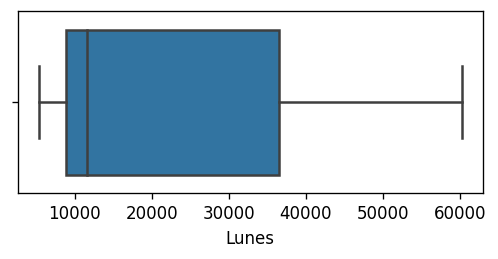

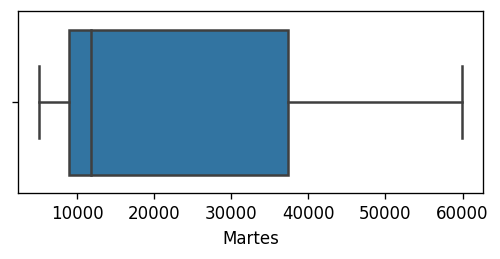

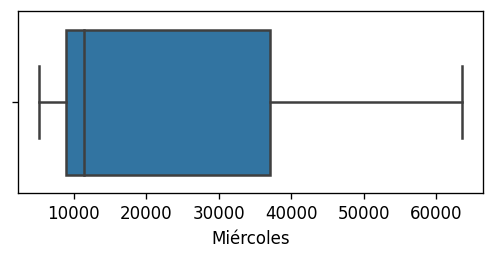

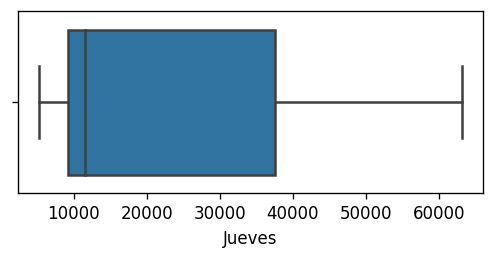

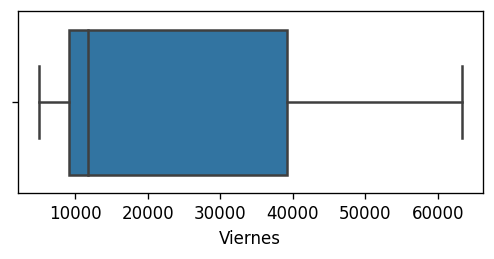

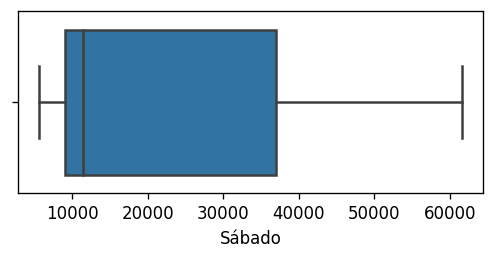

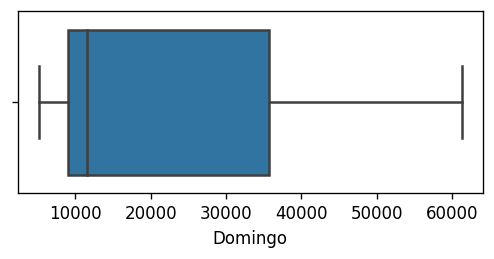

In [5]:
vs.caja_bigotes(fechas["Lunes"])
vs.caja_bigotes(fechas["Martes"])
vs.caja_bigotes(fechas["Miércoles"])
vs.caja_bigotes(fechas["Jueves"])
vs.caja_bigotes(fechas["Viernes"])
vs.caja_bigotes(fechas["Sábado"])
vs.caja_bigotes(fechas["Domingo"])

In [6]:
# Calcular el CO, HO, OL, HL así como su cambio en PIPs
conteo = fn.conteo_calculos(Cierres)
conteo.head(2)

CO   CO pips          HO   HO pips          OL   OL pips  \
Date                                                                           
2019-09-27 -368.702148 -3.687021   28.015625  0.280156  592.040527  5.920405   
2019-09-28  138.744629  1.387446  158.419434  1.584194  147.178223  1.471782   

                    HL   HL pips  
Date                              
2019-09-27  620.056152  6.200562  
2019-09-28  305.597656  3.055977

# <font color= #6B6B6B> 2. Metodolodía Box Jenkins </font>


La metodología Box-Jenkins se podría definir como un ciclo iterativo que busca encontrar el mejor modelo de ajuste para la realización de pronósticos y estimaciones.

**Pasos a seguir en la Metodología Box-Jenkins**:

> **Paso 0: Identificar si la serie es estacionaria**

Una serie temporal es estacionaria cuando la media y la variabilidad se mantienen constantes a lo largo del tiempo, es decir, no es en función del tiempo; y además, no presenta tendencia.

<img style="float: center" src="https://estrategiastrading.com/wp-content/uploads/2016/12/media_estacionaria.png" >


Si las graficas de autocorrelación y autocorrelación parcial muestran varios rezagos bastante significativos, es decir, que sobre pasen el intervalo de confianza (la línea sombreada azul), indica que no es estacionaria la serie original por lo que debemos de hacer una diferenciación y volver a verificar con los mismos graficos. 

<Figure size 600x240 with 0 Axes>

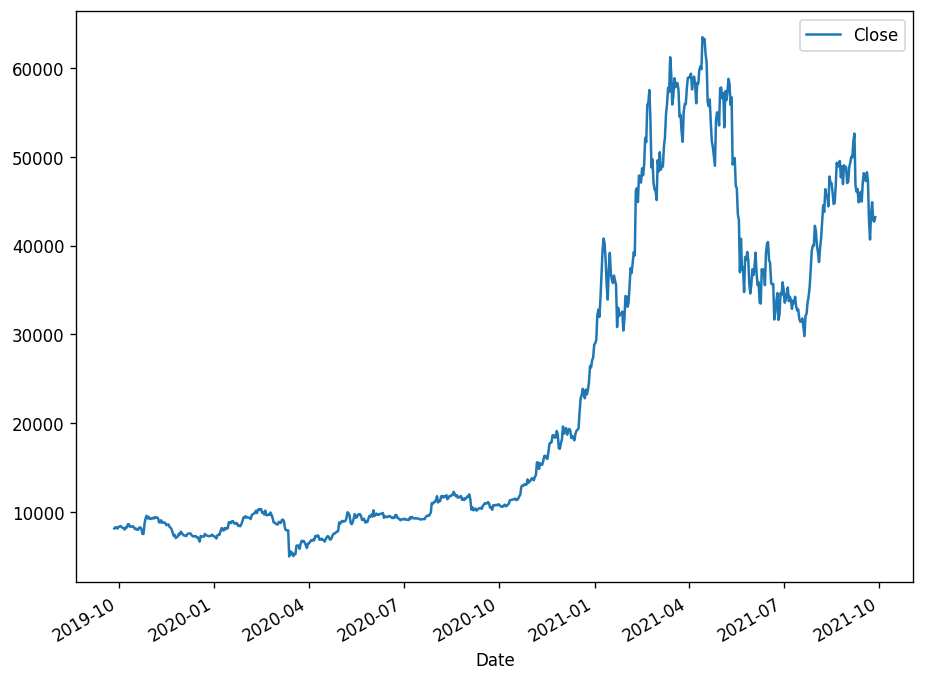

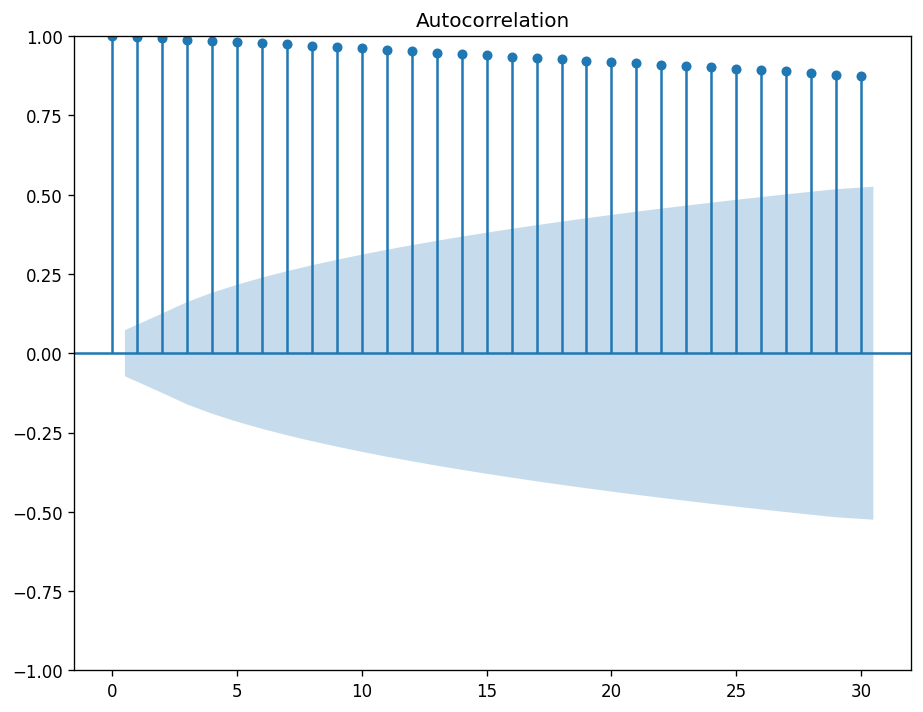

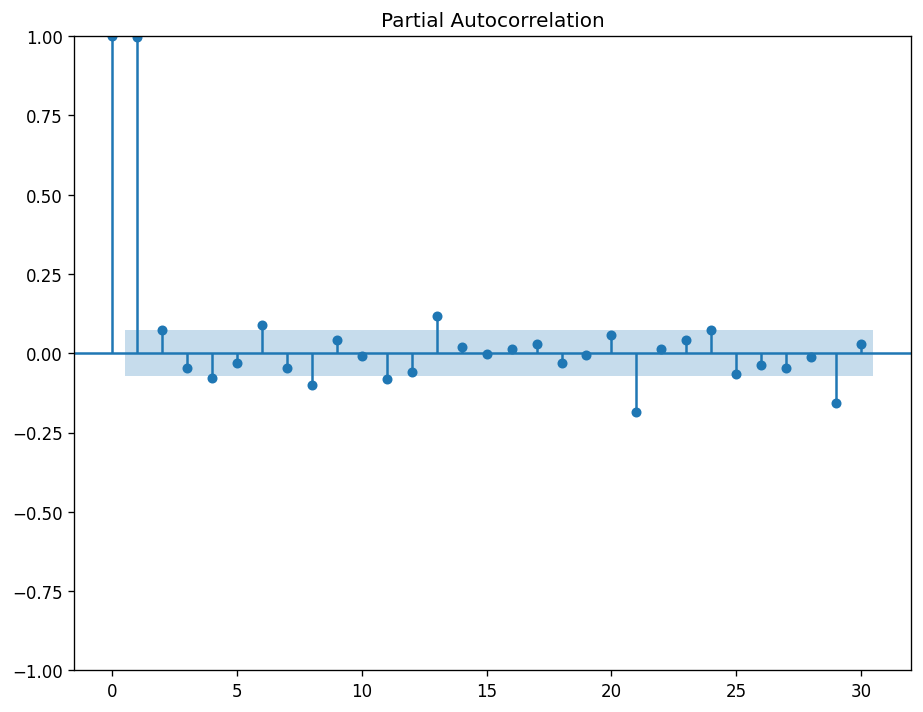

In [7]:
# Paso 0: Identificar si la serie es estacionaria
# Graficar FAC y FACP para la serie original
btc = pd.DataFrame(btc["Close"])
plt.figure(figsize=(5, 2))
btc.plot()
plt.show()
plot_acf(btc, lags=30)
plt.show()
plot_pacf(btc, lags=30)
plt.show()

Podemos observar que tanto la gráfica de la evolución de la serie no tiene la forma que buscamos indicando estacionariedad, por lo que es probable que no sea estacionaria; al mismo tiempo, la serie muestra rezagos significatuvos en ambas graficas de autocorrelación y autocorrelación parcial.


Para verificar que la serie no es estacionaria, realizaremos la prueba **Prueba de Dickey - Fuller**.

Dickey-Fuller es utilizado para comprobar la presencia de tendencia sobre las series temporales. La particularidad del  Dickey-Fuller es que es la herramienta más fácil de usar comparado con otros contrastes más complejos que también prueban la presencia de tendencia en los datos. Esta prueba presenta las siguientes hipótesis:


$H_0$: **La serie es NO estacionaria**: Tiene raíz unitaria y el p-value es **mayor** a 0.05

$H_1$: **La serie SI es estacionaria**: No tiene raíz unitaria y el p-value es **menor** a 0.05

In [8]:
# Prueba Dickey Fuller
orig_DF = fn.pruebaDickeyFuller(btc)
orig_DF

Test Statistic                  -0.787969
p-value                          0.822630
#Lags Used                      12.000000
Number of Observations Used    715.000000
Critical Value (1%)             -3.439529
Critical Value (5%)             -2.865591
Critical Value (10%)            -2.568927
dtype: float64

La serie original no es estacionaria ya que aceptamos la hipótesis nula, y el p-value es mayor a 0.05.

Procedemos a calcular la primera diferencia de la serie y realizaremos los mismos pasos solo que con la serie diferenciada.

In [9]:
# Calcular la primera diferencia de la serie
diff1 = btc.diff().dropna()
diff1_DF = fn.pruebaDickeyFuller(diff1)
diff1_DF

Test Statistic                -7.669583e+00
p-value                        1.606915e-11
#Lags Used                     1.100000e+01
Number of Observations Used    7.150000e+02
Critical Value (1%)           -3.439529e+00
Critical Value (5%)           -2.865591e+00
Critical Value (10%)          -2.568927e+00
dtype: float64

La serie SI es estacionaria pues rechazamos la hipótesis nula ya que el p-value es menor a 0.05

Así como con la serie original, hacemos los gráficos de autocorrelación y autocorrelación parcial para verificar que no haya rezagos muy significativos. Por medio de estos mismos gráficos podremos encontrar los parámetros del modelo; estos parámetros son "p", "d" y "q", donde cada uno significa lo siguiente:

- Función de autocorrelación (ACF):
> MA(q): Solo los q primeros coeficientes son significativos. El resto se anulan bruscamente (coef. 0 para retardo >q)

- Función de autocorrelación parcial (ACFP)
> Solo los p primeros coeficientes son significativos. El resto se anulan bruscamente (coef. 0 para retardo >q)

> **Paso 1. Identificación del modelo (Selección tentativa de p, d, q)**  

En esta etapa determinamos el modelo y el orden de estos que mejor se ajustan a estos datos, es decir, encontramos valores apropiados de p, d y q. En esta etapa utilizamos métodos gráficos, el correlograma y el correlograma parcial.

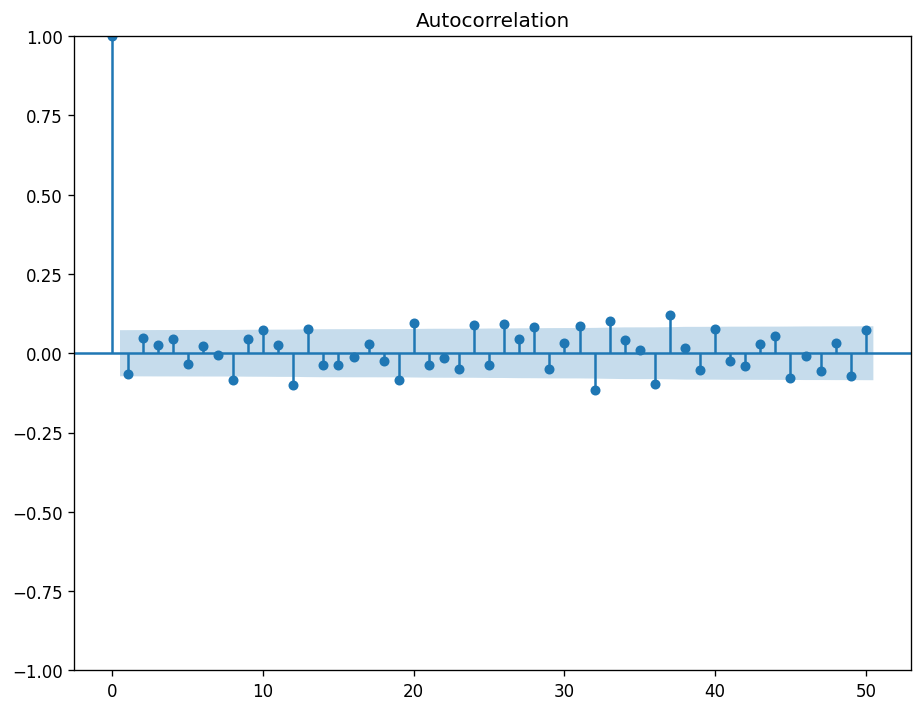

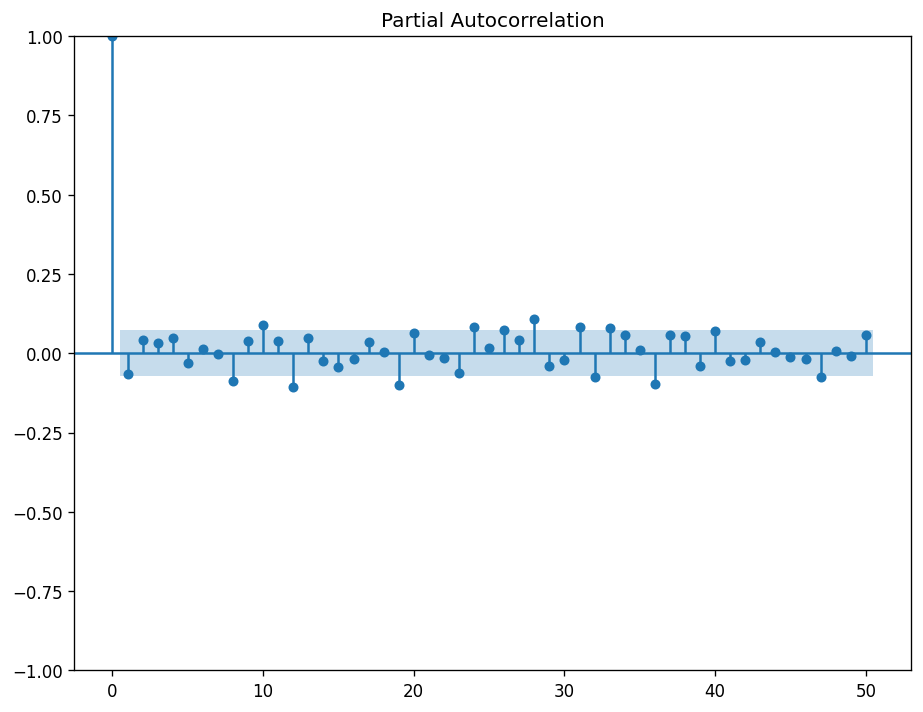

In [10]:
# Paso 1: Identificación del modelo
# Graficar FAC y FACP para la primera diferencia
plot_acf(diff1, lags=50)
plt.show()
plot_pacf(diff1, lags=50)
plt.show()

Por medio de la interpretación visual de las gráficas, podemos establecer los siguientes posibles modelos:

- ARIMA(1,1,1)
- ARIMA(8,1,8)
- ARIMA(10,1,10)
- ARIMA(12,1,7)
- ARIMA(12,1,12)
- ARIMA(19,1,13)
- ARIMA(20,1,20)
- ARIMA(23,1,24)
- ARIMA(24,1,26)
- ARIMA(26,1,28)
- ARIMA(29,1,31)
- ARIMA(31,1,33)
- ARIMA(32,1,36)
- ARIMA(33,1,37)
- ARIMA(36,1,40)
- ARIMA(40,1,45)
- ARIMA(47,1,50)

Donde el término *p* sale de la gráfica de autocorrelación y el término *q* de la gráfica de autocorrelación parcial.



> **Paso 2. Estimación de parámetros del metódo elegido** 

Estimar el modelo seleccionado, es decir estimar los parámetros de los términos autorregresivos y de promedios móviles incluidos en el modelo. Este cálculo puede efectuarse mediante mínimos cuadrados simples, pero puede recurrirse a métodos de estimación no lineal en los parámetros.
 

Por medio del cálculo del AIC, podemos seleccionar los mejores cuatro modelos que obtuvimos de manera visual. Con este cálculo corroboramos y aseguramos una mejor eficiencia que los otros modelos propuestos. 

Los cuatro modelos con los que trabajaremos y haremos las pruebas son los siguientes:
- 1. ARIMA(8,1,8). AIC: 12370.106 
- 2. ARIMA(12,1,7). AIC: 12373.410
- 3. ARIMA(10,1,10). AIC: 12374.824
- 4. ARIMA(12,1,12). AIC: 12376.091

In [11]:
# Paso 2: Estimación de parámetros del método elegido
modelo1 = fn.model_fit(btc, 8, 1, 8)
modelo2 = fn.model_fit(btc, 12, 1, 7)
modelo3 = fn.model_fit(btc, 10, 1, 10)
modelo4 = fn.model_fit(btc, 12, 1, 12)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51155D+00    |proj g|=  8.43076D-02

At iterate    5    f=  8.50107D+00    |proj g|=  3.42641D-02


 This problem is unconstrained.



At iterate   10    f=  8.48340D+00    |proj g|=  1.48858D-01

At iterate   15    f=  8.47658D+00    |proj g|=  2.73529D-02

At iterate   20    f=  8.47551D+00    |proj g|=  2.26382D-02

At iterate   25    f=  8.47454D+00    |proj g|=  7.79875D-03

At iterate   30    f=  8.47426D+00    |proj g|=  7.71201D-03

At iterate   35    f=  8.47388D+00    |proj g|=  9.88902D-03

At iterate   40    f=  8.47318D+00    |proj g|=  2.19636D-02

At iterate   45    f=  8.47261D+00    |proj g|=  1.18718D-02

At iterate   50    f=  8.47214D+00    |proj g|=  1.70537D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     58   

 This problem is unconstrained.



At iterate    5    f=  8.49032D+00    |proj g|=  1.75055D-02

At iterate   10    f=  8.47861D+00    |proj g|=  4.72041D-02

At iterate   15    f=  8.47513D+00    |proj g|=  1.22641D-02

At iterate   20    f=  8.47376D+00    |proj g|=  2.94258D-02

At iterate   25    f=  8.47246D+00    |proj g|=  1.72146D-02

At iterate   30    f=  8.47191D+00    |proj g|=  3.53418D-02

At iterate   35    f=  8.47144D+00    |proj g|=  3.03292D-02

At iterate   40    f=  8.47118D+00    |proj g|=  6.82072D-03

At iterate   45    f=  8.47078D+00    |proj g|=  9.68589D-03

At iterate   50    f=  8.47026D+00    |proj g|=  2.54740D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.48276D+00    |proj g|=  6.32838D-02

At iterate   10    f=  8.48162D+00    |proj g|=  6.38578D-02

At iterate   15    f=  8.47905D+00    |proj g|=  7.14244D-02

At iterate   20    f=  8.47412D+00    |proj g|=  1.55988D-02

At iterate   25    f=  8.47131D+00    |proj g|=  1.47380D-02

At iterate   30    f=  8.47057D+00    |proj g|=  9.42161D-03

At iterate   35    f=  8.47017D+00    |proj g|=  1.74868D-02

At iterate   40    f=  8.46996D+00    |proj g|=  7.85246D-03

At iterate   45    f=  8.46992D+00    |proj g|=  3.72006D-03

At iterate   50    f=  8.46985D+00    |proj g|=  3.31399D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.48757D+00    |proj g|=  5.17071D-02

At iterate   10    f=  8.47293D+00    |proj g|=  2.89123D-02

At iterate   15    f=  8.47175D+00    |proj g|=  1.05069D-02

At iterate   20    f=  8.47046D+00    |proj g|=  1.12144D-02

At iterate   25    f=  8.46971D+00    |proj g|=  1.09145D-02

At iterate   30    f=  8.46920D+00    |proj g|=  1.17577D-02

At iterate   35    f=  8.46877D+00    |proj g|=  9.21951D-03

At iterate   40    f=  8.46807D+00    |proj g|=  2.49858D-02

At iterate   45    f=  8.46523D+00    |proj g|=  6.06606D-02

At iterate   50    f=  8.46322D+00    |proj g|=  2.31583D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

> 3. **Pruebas a los residuales:** 

Después de seleccionar un modelo ARIMA en particular y de estimar sus parámetros, veremos si el modelo seleccionado se ajusta adecuadamente a nuestros datos ya que en caso de que no, puede que exista otro modelo ARIMA que se ajuste mejor a los datos, para esto existen dos métodos: El primero consiste en crear un modelo con más rezagos para identificar que no sean estadísticamente significativos. 

El segundo consiste en analizar los residuos del modelo seleccionado. Esta etapa es fundamental para continuar con el pronóstico, ya que en caso contrario es necesario volver al paso uno y replantear la metodología, esto lo comprobaremos mediante diversas pruebas

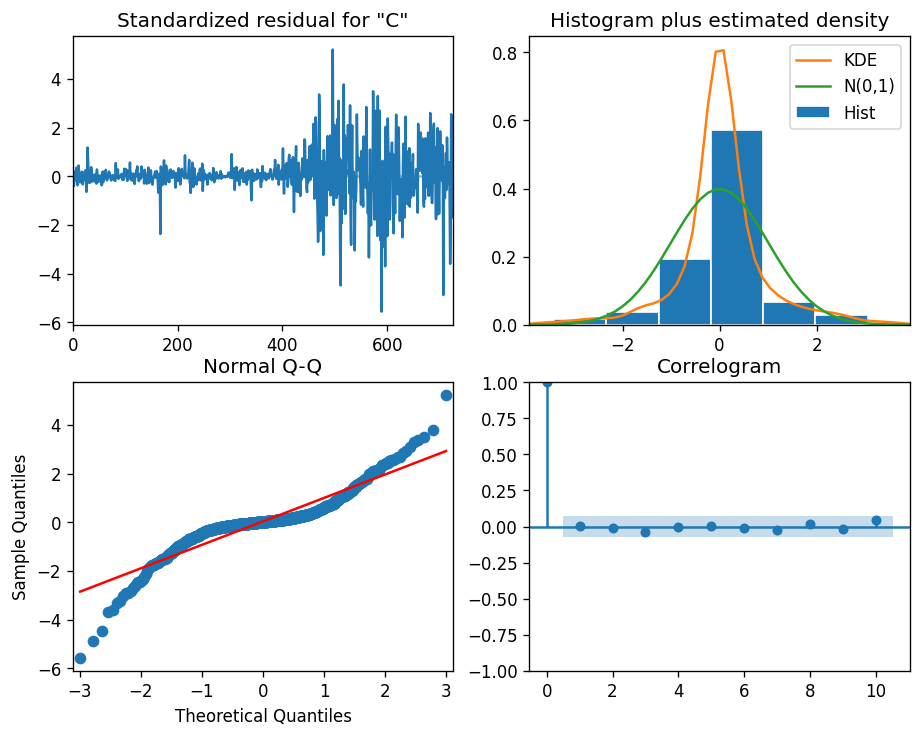

In [12]:
modelo1.plot_diagnostics()
plt.show()

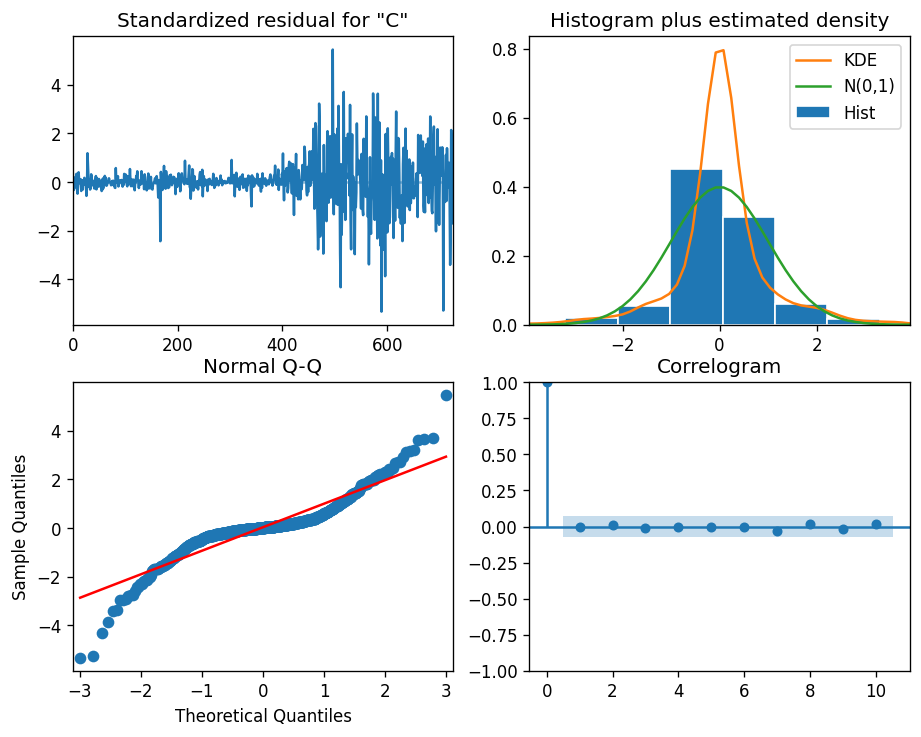

In [13]:
modelo2.plot_diagnostics()
plt.show()

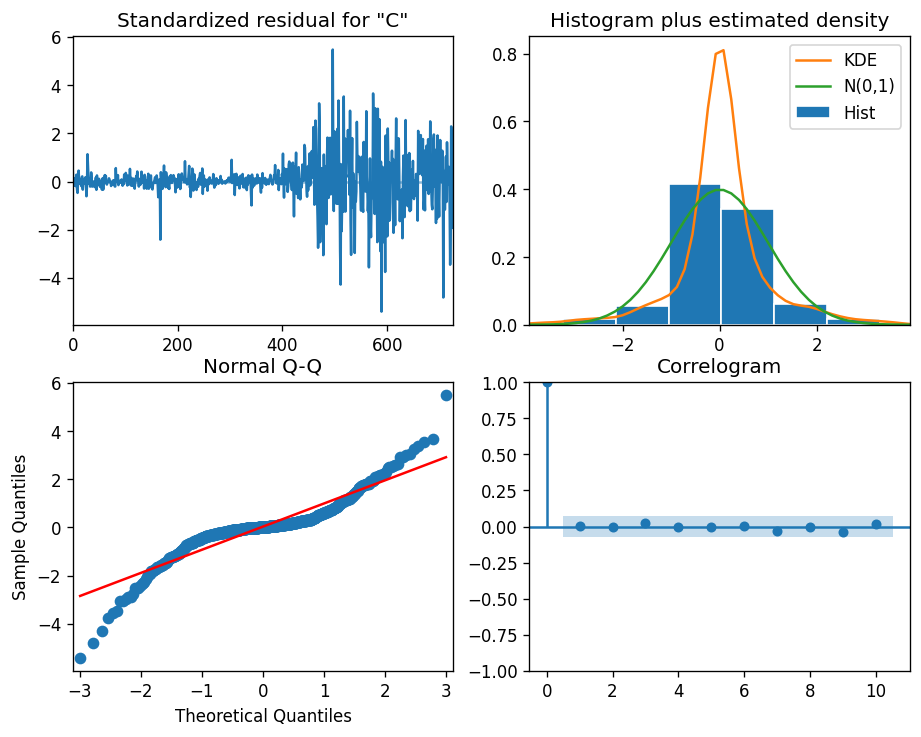

In [14]:
modelo3.plot_diagnostics()
plt.show()

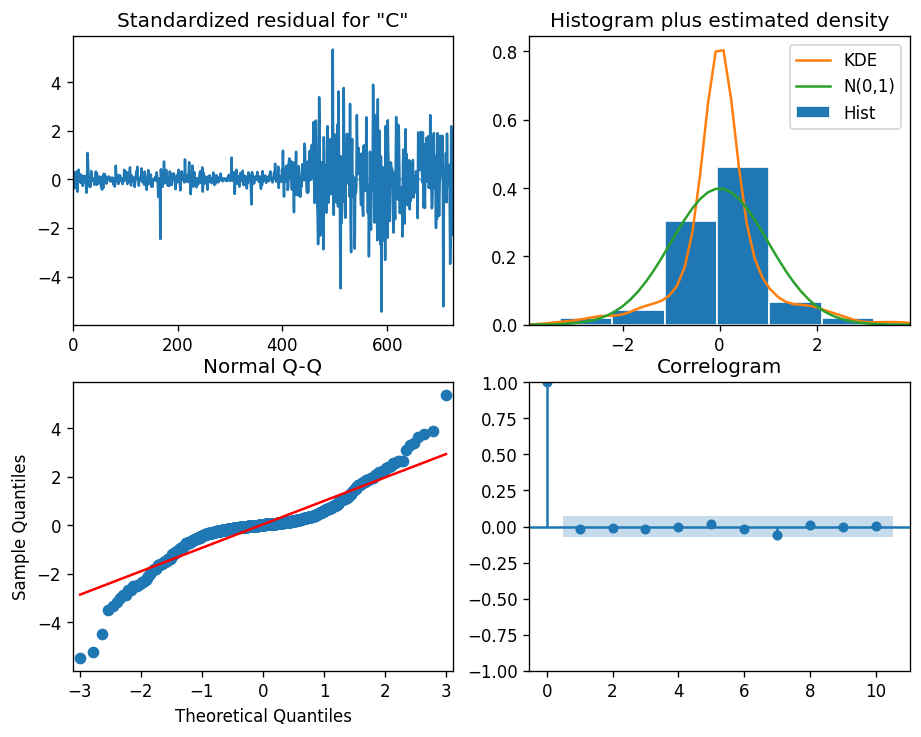

In [15]:
modelo4.plot_diagnostics()
plt.show()

La gráfica superior izquierda de cada modelo, indica el ruido blanco de la serie.

La gráfica superior derecha nos ayuda a visualizar si los residuales se distribuyen de forma normal.

La gráfica inferior izquierda nos ayuda a ver si 

La gráfica inferior derecha nos infica si la serie tiene correlación entre si. 

**Prueba de normalidad de los residuales**

Esta prueba busca probar que los residuales se distribuyen de forma normal, por lo que plantea las siguientes hipótesis:

$H_0$: Los residuales **SI** se distribuyen de forma normal y tienen un p-value **menor** a 0.05

$H_A$: Los residuales **NO** se distribuyen de forma normal y tienen un p-value **mayor** a 0.05

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

In [16]:
residuales_1 = pd.DataFrame(modelo1.resid)
fn.prueba_normalidad(residuales_1)

statistic 0.841883659362793
P-value= 2.772467366987592e-26
Los residuales se distrubuyen de forma normal.


In [17]:
residuales_2 = pd.DataFrame(modelo2.resid)
fn.prueba_normalidad(residuales_2)

statistic 0.844943106174469
P-value= 4.601640748010351e-26
Los residuales se distrubuyen de forma normal.


In [18]:
residuales_3 = pd.DataFrame(modelo3.resid)
fn.prueba_normalidad(residuales_3)

statistic 0.8425540924072266
P-value= 3.096008806502675e-26
Los residuales se distrubuyen de forma normal.


In [19]:
residuales_4 = pd.DataFrame(modelo4.resid)
fn.prueba_normalidad(residuales_4)

statistic 0.8415896892547607
P-value= 2.641799029162345e-26
Los residuales se distrubuyen de forma normal.


> Aceptamos la hipótesis nula para los cuatro modelos por lo que podemos decir que los residuales se distribuyen de forma normal debido a que el p value es menor a 0.05.

**Prueba de Ljung-Box**


La prueba de Ljung-Box es una prueba estadística que *verifica si existe autocorrelación* en una serie de tiempo.

Utiliza las siguientes hipótesis:

$H_0$ : Los residuos se distribuyen de forma independiente.

$H_A$ : Los residuos no se distribuyen de forma independiente; exhiben correlación serial.

Idealmente, nos gustaría no rechazar la hipótesis nula. Es decir, nos gustaría ver que el valor p de la prueba sea mayor que 0.05 porque esto significa que los residuos de nuestro modelo de series de tiempo son independientes, lo que a menudo es una suposición que hacemos al crear un modelo.

In [20]:
display(fn.ljung_box(residuales_1), fn.ljung_box(residuales_2),
       fn.ljung_box(residuales_3), fn.ljung_box(residuales_4))

lb_stat  lb_pvalue
50  39.352983   0.860669

lb_stat  lb_pvalue
50  39.938742   0.844929

lb_stat  lb_pvalue
50  38.758803   0.875633

lb_stat  lb_pvalue
50  36.032615   0.931203

> Aceptamos la hipótesis nula para los cuatro modelos, por lo que los residuos se distribuyen de forma independiente debido a que el p value es mayor a 0.05.

**Prueba de heterocedasticidad**

Two-sided: 

Null hypothesis is that the variance is not changing throughout the sample. Both that the sum-of-squares in the earlier subsample is not greater than the sum-of-squares in the later subsample and that the sum-of-squares in the later subsample is not greater than the sum-of-squares in the earlier subsample.

In [32]:
display(fn.heterocedasticidad(residuales_1), fn.Rsquared(Cierres, modelo1))

(8.620804423356155, 5.1030911631552066e-54)

-3.107166536334937

In [33]:
display(fn.heterocedasticidad(residuales_2), fn.Rsquared(Cierres, modelo2))

(8.620450116258814, 5.123365445921077e-54)

-3.3335639200083316

In [34]:
display(fn.heterocedasticidad(residuales_3), fn.Rsquared(Cierres, modelo3))

(8.636251359021022, 4.2934924955249713e-54)

-3.2151655534652592

In [35]:
display(fn.heterocedasticidad(residuales_4), fn.Rsquared(Cierres, modelo4))

(8.39096500295094, 6.862284878018314e-53)

-3.2973770538416103

> Aceptamos la hipótesis nula para los cuatro modelos dado que el coeficiente de determinación es menor al p value de la prueba de hetorocedasticidad.

> 4. **Pronóstico** 

La popularidad de estos modelos, esta en la capacidad de éxito en el pronóstico, que en muchas ocasiones resulta mejor que modelos tradicionales de econometría y otros modelos normativos de teoría financiera. En esta etapa final realizaremos inferencias y pronósticos con el modelo estimado para la toma de decisiones de inversión a corto plazo.



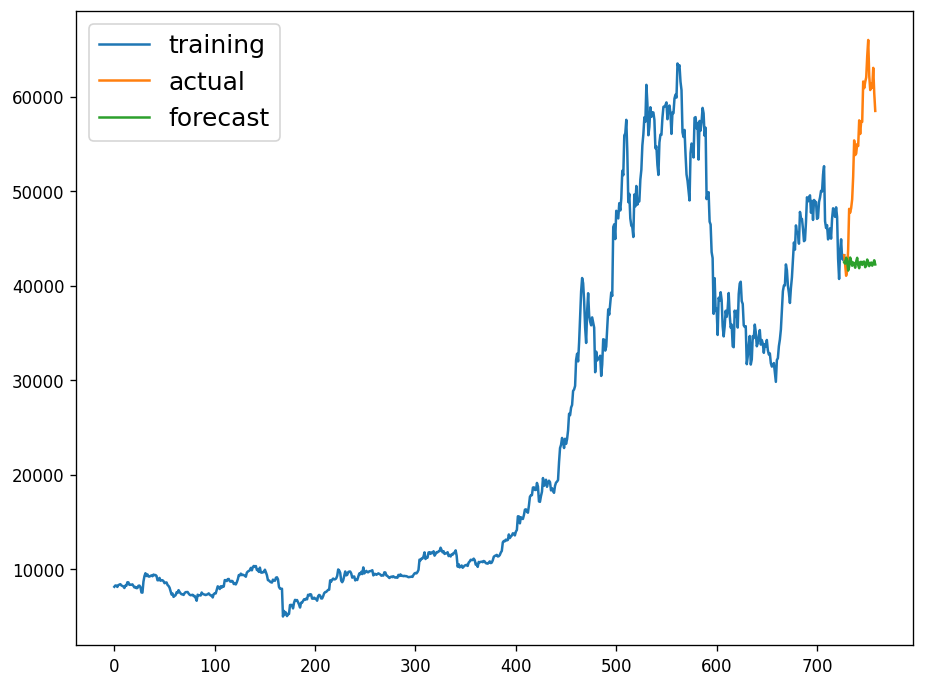

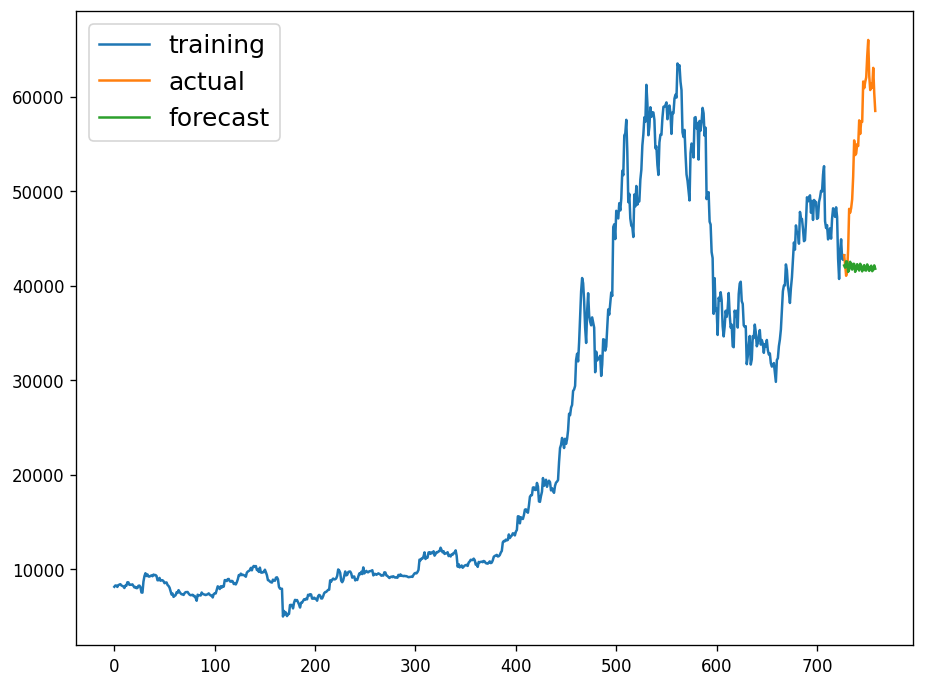

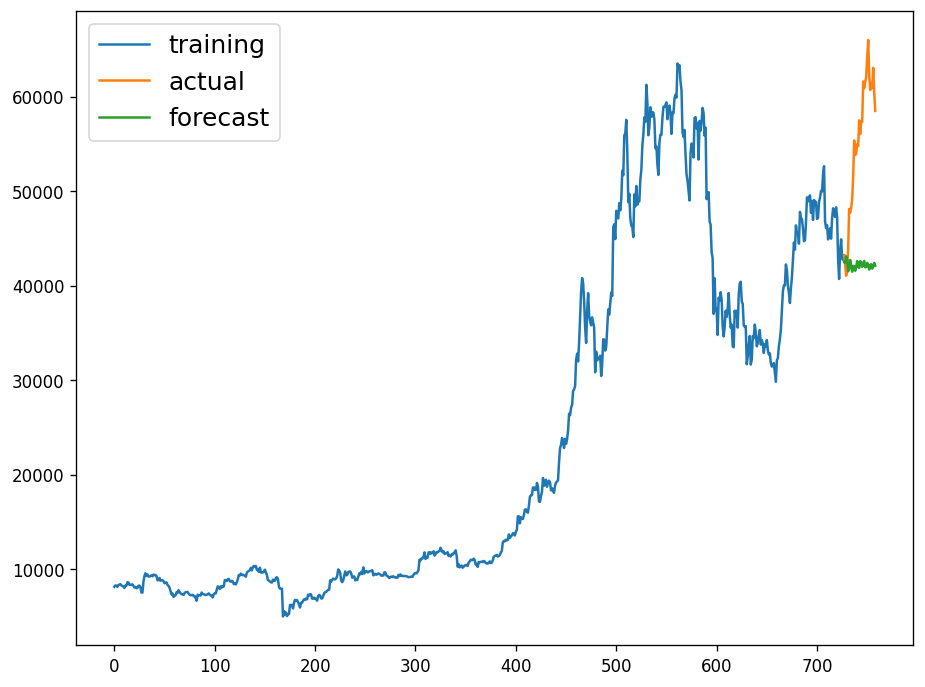

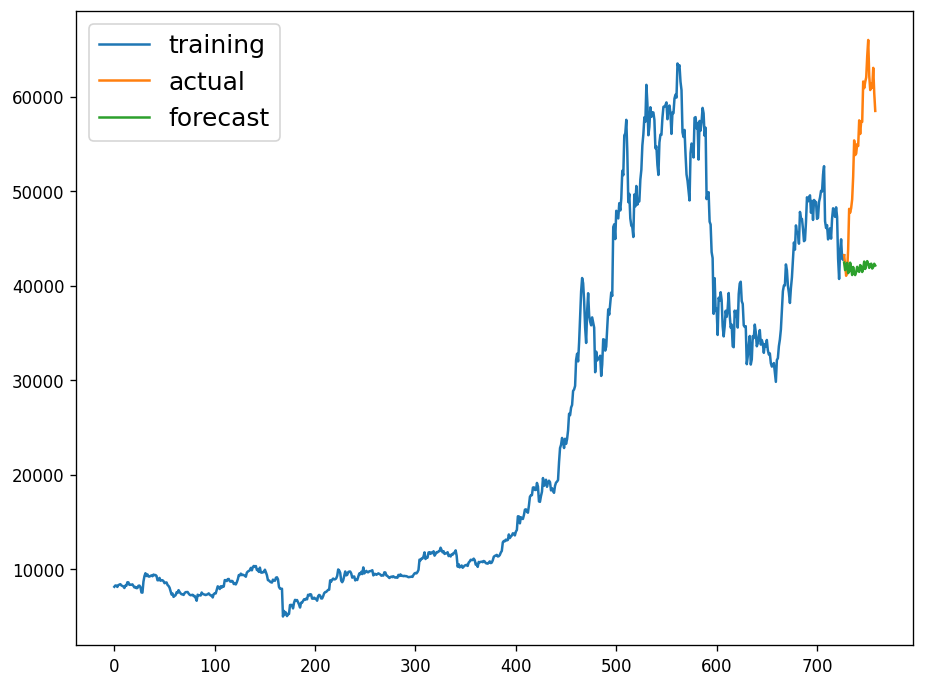

None

None

None

None

In [37]:
display(vs.grafica_forecast(Cierres, btc, modelo1), vs.grafica_forecast(Cierres, btc, modelo2),
        vs.grafica_forecast(Cierres, btc, modelo3), vs.grafica_forecast(Cierres, btc, modelo4))

> Tenemos esta predicción dado que el modelo funciona bien cuando se realizan predicciones de uno a dos días, sin embargo como estamos prediciendo 30 días, notamos que la gráfica de forecast no ajusta de manera correcta después de los primeros días.

### Prueba de modelos con predicciones a 1 día

In [42]:
btc = dt.get_adj_closes('BTC-USD', "2019,01,09", "2021,11,11")["Close"]
btctrain = btc.loc["2019-09-26":"2021-09-27"].shift().dropna()
btctest = btc.loc["2021-09-27":"2021-10-28"].shift().dropna()

In [44]:
PrediccionTrain1 = fn.PredictTrain(btctrain,8,1,8,1)
PrediccionTest1 = fn.PredictTest(btctrain,btctest,8,1,8,1)
PrediccionTrain2 = PredictTrain(btctrain,12,1,7,1)
PrediccionTest2 = PredictTest(btctrain,btctest,12,1,7,1)
PrediccionTrain3 = PredictTrain(btctrain,10,1,10,1)
PrediccionTest3 = PredictTest(btctrain,btctest,10,1,10,1)
PrediccionTrain4 = PredictTrain(btctrain,12,1,12,1)
PrediccionTest4 = PredictTest(btctrain,btctest,12,1,12,1)

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.1

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     73      1     1     0   3.949D-04   1.600D+00
  F =   1.6000101726377567     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.26579D+00    |proj g|=  6.51843D-02

At iterate    5    f=  3.25331D+00    |proj g|=  1.72798D-04

At iterate   10    f=  3.25327D+00    |proj g|=  1.25520D-04

At iterate   15    f=  3.25301D+00    |proj g|=  1.57832D-03

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate    5    f=  4.44379D+00    |proj g|=  2.93017D-03

At iterate   10    f=  4.44087D+00    |proj g|=  2.71289D-04

At iterate   15    f=  4.43993D+00    |proj g|=  6.75321D-05
  ys=-8.733E-01  -gs= 9.224E-03 BFGS update SKIPPED

At iterate   20    f=  4.33847D+00    |proj g|=  1.43424D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     63      2     1     0   1.434D-03   4.338D+00
  F =   4.3384711853463447     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.05829D+00    |proj g|=  1.08532D-04

At iterate   20    f=  4.89434D+00    |proj g|=  3.25981D-03

At iterate   25    f=  4.89104D+00    |proj g|=  2.44595D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     45      1     0     0   2.446D-06   4.891D+00
  F =   4.8910373334345953     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.39472D+00    |proj g|=  1.27690D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.57041D+00    |proj g|=  2.92664D-02

At iterate   25    f=  5.49366D+00    |proj g|=  3.95817D-03

At iterate   30    f=  5.49015D+00    |proj g|=  3.69432D-03

At iterate   35    f=  5.48943D+00    |proj g|=  1.94800D-04

At iterate   40    f=  5.48939D+00    |proj g|=  6.27897D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     41     46      1     0     0   1.944D-06   5.489D+00
  F =   5.4893812364884713     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.11736D+00    |proj g|=  2.14970D-03

At iterate   20    f=  5.96555D+00    |proj g|=  2.94519D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     35      1     0     0   4.812D-07   5.966D+00
  F =   5.9655475189147698     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.48623D+00    |proj g|=  5.82762D-01

At iterate    5    f=  6.24041D+00    |proj g|=  3.40950D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.39651D+00    |proj g|=  2.35097D-03

At iterate   20    f=  6.36878D+00    |proj g|=  6.57686D-02

At iterate   25    f=  6.24620D+00    |proj g|=  8.91233D-03

At iterate   30    f=  6.23837D+00    |proj g|=  7.72931D-04

At iterate   35    f=  6.23755D+00    |proj g|=  2.54298D-04

At iterate   40    f=  6.23749D+00    |proj g|=  2.41068D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     44     48      1     0     0   9.095D-06   6.237D+00
  F =   6.2374769420265830     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.87674D+00    |proj g|=  1.03451D-04

At iterate   15    f=  6.87646D+00    |proj g|=  2.45997D-03

At iterate   20    f=  6.78046D+00    |proj g|=  4.93484D-05

At iterate   25    f=  6.74279D+00    |proj g|=  3.25938D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     55      1     0     0   9.248D-06   6.743D+00
  F =   6.7425518122195562     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.03571D+00    |proj g|=  4.92629D-03

At iterate   10    f=  7.03460D+00    |proj g|=  1.08688D-04

At iterate   15    f=  7.03437D+00    |proj g|=  1.07273D-03

At iterate   20    f=  6.89352D+00    |proj g|=  2.69014D-02

At iterate   25    f=  6.89072D+00    |proj g|=  8.57092D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     34      1     0     0   8.571D-08   6.891D+00
  F =   6.8907231053960105     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.25741D+00    |proj g|=  1.10579D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     38      1     0     0   7.017D-07   7.257D+00
  F =   7.2574055311361354     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.79526D+00    |proj g|=  7.71645D-01

At iterate    5    f=  7.43577D+00    |proj g|=  6.63876D-03

At iterate   10    f=  7.43368D+00    |proj g|=  8.44770D-05

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.47122D+00    |proj g|=  6.45879D-04

At iterate   15    f=  7.47107D+00    |proj g|=  3.30179D-04

At iterate   20    f=  7.41867D+00    |proj g|=  8.37643D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     31      1     0     0   1.634D-07   7.419D+00
  F =   7.4186438793032226     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.02129D+00    |proj g|=  1.09105D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.63491D+00    |proj g|=  3.02399D-04

At iterate   15    f=  7.63479D+00    |proj g|=  3.34006D-04

At iterate   20    f=  7.56746D+00    |proj g|=  4.36276D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     31      1     0     0   2.880D-07   7.567D+00
  F =   7.5672449903229380     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.16634D+00    |proj g|=  1.07456D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29752D+00    |proj g|=  1.21269D+00

At iterate    5    f=  7.72778D+00    |proj g|=  1.27379D-02

At iterate   10    f=  7.72080D+00    |proj g|=  6.52064D-04

At iterate   15    f=  7.72064D+00    |proj g|=  1.13809D-04

At iterate   20    f=  7.68445D+00    |proj g|=  5.79772D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     30      1     0     0   2.770D-06   7.684D+00
  F =   7.6844480167470532     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     33      1     0     0   6.336D-07   7.872D+00
  F =   7.8716137702469844     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.59016D+00    |proj g|=  1.37871D+00

At iterate    5    f=  7.94766D+00    |proj g|=  1.46250D-02

At iterate   10    f=  7.93866D+00    |proj g|=  1.11823D-03

At iterate   15    f=  7.93850D+00    |proj g|=  3.01278D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.04946D+00    |proj g|=  1.05820D-03

At iterate   15    f=  8.04903D+00    |proj g|=  5.76392D-05

At iterate   20    f=  8.02921D+00    |proj g|=  5.80691D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     27      1     0     0   5.807D-07   8.029D+00
  F =   8.0292076194152475     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.84390D+00    |proj g|=  1.60273D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.12237D+00    |proj g|=  1.77937D-02

At iterate   10    f=  8.11025D+00    |proj g|=  9.27708D-04

At iterate   15    f=  8.10965D+00    |proj g|=  5.19812D-05

At iterate   20    f=  8.09581D+00    |proj g|=  1.88541D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     27      1     0     0   7.591D-06   8.096D+00
  F =   8.0957929291443236     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.91962D+00    |proj g|=  1.51126D+00

At iterate    5    f=  8.18769D+00    |proj g|=  1.74159D-02

At iterate   10    f=  8.17567D+00    |proj g|=  2.59713D-03

At iterate   15    f=  8.17522D+00    |proj g|=  5.67312D-05

At iterate   20    f=  8.15875D+00    |proj g|=  3.34010D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     27      1     0     0   6.749D-06   8.159D+00
  F =   8.1587515880693253     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     28      1     0     0   2.621D-06   8.194D+00
  F =   8.1942370517969323     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.00416D+00    |proj g|=  1.57369D+00

At iterate    5    f=  8.24045D+00    |proj g|=  1.82946D-02

At iterate   10    f=  8.22781D+00    |proj g|=  7.08008D-03

At iterate   15    f=  8.22694D+00    |proj g|=  1.41709D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.26991D+00    |proj g|=  1.47293D-03

At iterate   15    f=  8.26933D+00    |proj g|=  4.70790D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     25      1     0     0   1.200D-06   8.260D+00
  F =   8.2596346269334298     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.11928D+00    |proj g|=  1.58135D+00

At iterate    5    f=  8.32166D+00    |proj g|=  1.94996D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.19444D+00    |proj g|=  1.73457D+00

At iterate    5    f=  8.34937D+00    |proj g|=  2.03911D-02

At iterate   10    f=  8.33400D+00    |proj g|=  3.59608D-03

At iterate   15    f=  8.33320D+00    |proj g|=  6.32642D-05

At iterate   20    f=  8.32539D+00    |proj g|=  3.58286D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     26      1     0     0   2.804D-06   8.325D+00
  F =   8.3251839370470275     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  8.35014D+00    |proj g|=  2.39364D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     31      1     0     0   2.394D-06   8.350D+00
  F =   8.3501404979287503     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.31984D+00    |proj g|=  1.87517D+00

At iterate    5    f=  8.38797D+00    |proj g|=  2.29855D-02

At iterate   10    f=  8.36902D+00    |proj g|=  7.87538D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f=  8.39192D+00    |proj g|=  2.03930D-03

At iterate   15    f=  8.39035D+00    |proj g|=  4.98158D-05

At iterate   20    f=  8.38989D+00    |proj g|=  1.36437D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     26      1     0     0   2.049D-06   8.389D+00
  F =   8.3892159188740258     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.37177D+00    |proj g|=  1.92437D+00

At itera

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  8.44472D+00    |proj g|=  2.47001D-02

At iterate   10    f=  8.42404D+00    |proj g|=  1.84648D-03

At iterate   15    f=  8.42272D+00    |proj g|=  5.35801D-05

At iterate   20    f=  8.42264D+00    |proj g|=  3.96481D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   7.384D-06   8.423D+00
  F =   8.4226368493371435     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At itera

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.47061D+00    |proj g|=  2.48199D-02

At iterate   10    f=  8.44970D+00    |proj g|=  1.51419D-03

At iterate   15    f=  8.44836D+00    |proj g|=  1.11350D-04

At iterate   20    f=  8.44827D+00    |proj g|=  7.16790D-04

At iterate   25    f=  8.44812D+00    |proj g|=  2.12169D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     30      1     0     0   2.668D-06   8.448D+00
  F =   8.4480471797847549     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.47917D+00    |proj g|=  1.40749D-03

At iterate   15    f=  8.47778D+00    |proj g|=  1.92033D-04

At iterate   20    f=  8.47770D+00    |proj g|=  1.36021D-05

At iterate   25    f=  8.47746D+00    |proj g|=  4.22489D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     27      1     0     0   4.225D-06   8.477D+00
  F =   8.4774570465159265     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.52516D+00    |proj g|=  2.04393D+00

At iterate    5    f=  8.52034D+00    |proj g|=  2.49926D-02

At iterate   10    f=  8.49890D+00    |proj g|=  1.39402D-03

At iterate   15    f=  8.49752D+00    |proj g|=  1.93692D-04

At iterate   20    f=  8.49744D+00    |proj g|=  1.60341D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     24      1     0     0   9.357D-06   8.497D+00
  F =   8.4973408433199520     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  8.50643D+00    |proj g|=  1.45376D-04

At iterate   25    f=  8.50602D+00    |proj g|=  2.28528D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     27      1     0     0   2.285D-06   8.506D+00
  F =   8.5060188409264263     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.54379D+00    |proj g|=  2.05635D+00

At iterate    5    f=  8.53421D+00    |proj g|=  2.50977D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  8.63265D+00    |proj g|=  1.46726D-04

At iterate   25    f=  8.63196D+00    |proj g|=  9.18554D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   9.186D-07   8.632D+00
  F =   8.6319573082171939     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.72113D+00    |proj g|=  2.17359D+00

At iterate    5    f=  8.66259D+00    |proj g|=  2.59789D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.67919D+00    |proj g|=  2.06043D+00

At iterate    5    f=  8.67352D+00    |proj g|=  2.49837D-02

At iterate   10    f=  8.65211D+00    |proj g|=  4.74386D-03

At iterate   15    f=  8.65059D+00    |proj g|=  9.74769D-05

At iterate   20    f=  8.65033D+00    |proj g|=  1.37786D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     23      1     0     0   8.877D-06   8.650D+00
  F =   8.6495817997440501     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.78382D+00    |proj g|=  2.21676D+00

At iterate    5    f=  8.68792D+00    |proj g|=  2.75406D-02

At iterate   10    f=  8.66384D+00    |proj g|=  2.90948D-03

At iterate   15    f=  8.66139D+00    |proj g|=  7.25416D-05

At iterate   20    f=  8.66100D+00    |proj g|=  1.41911D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     26      1     0     0   3.666D-06   8.661D+00
  F =   8.6606657376710849     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.73300D+00    |proj g|=  2.10500D+00

At iterate    5    f=  8.69663D+00    |proj g|=  2.59607D-02


 This problem is unconstrained.



At iterate   10    f=  8.67361D+00    |proj g|=  2.51911D-03

At iterate   15    f=  8.67210D+00    |proj g|=  1.09862D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   5.782D-06   8.672D+00
  F =   8.6720212878520826     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.74228D+00    |proj g|=  2.10458D+00

At iterate    5    f=  8.70385D+00    |proj g|=  2.60365D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.70847D+00    |proj g|=  2.62383D-02

At iterate   10    f=  8.68513D+00    |proj g|=  1.51728D-03

At iterate   15    f=  8.68355D+00    |proj g|=  2.20263D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   6.376D-06   8.683D+00
  F =   8.6834617979417210     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.74840D+00    |proj g|=  2.11047D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  8.68688D+00    |proj g|=  6.12375D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     29      1     0     0   3.565D-07   8.687D+00
  F =   8.6868769743233596     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.73683D+00    |proj g|=  2.08110D+00

At iterate    5    f=  8.71521D+00    |proj g|=  2.55526D-02

At iterate   10    f=  8.69250D+00    |proj g|=  1.73774D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.69593D+00    |proj g|=  1.96236D-03

At iterate   15    f=  8.69449D+00    |proj g|=  4.67342D-05

At iterate   20    f=  8.69441D+00    |proj g|=  1.26836D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   1.033D-06   8.694D+00
  F =   8.6938655494461106     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.74232D+00    |proj g|=  2.08158D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.72942D+00    |proj g|=  2.54186D-02

At iterate   10    f=  8.70679D+00    |proj g|=  1.21329D-03

At iterate   15    f=  8.70529D+00    |proj g|=  2.71470D-04

At iterate   20    f=  8.70521D+00    |proj g|=  2.00771D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     26      1     0     0   8.536D-06   8.705D+00
  F =   8.7048619264524287     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  8.73631D+00    |proj g|=  1.51601D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     26      1     0     0   6.740D-06   8.736D+00
  F =   8.7356623970214287     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.78794D+00    |proj g|=  2.08255D+00

At iterate    5    f=  8.77259D+00    |proj g|=  2.53912D-02

At iterate   10    f=  8.74986D+00    |proj g|=  1.38529D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.78555D+00    |proj g|=  2.54029D-02

At iterate   10    f=  8.76284D+00    |proj g|=  1.20639D-03

At iterate   15    f=  8.76126D+00    |proj g|=  2.34441D-04

At iterate   20    f=  8.76117D+00    |proj g|=  2.63775D-05

At iterate   25    f=  8.76040D+00    |proj g|=  1.39249D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     33      1     0     0   1.965D-07   8.760D+00
  F =   8.7603777616122986     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.77082D+00    |proj g|=  1.27982D-03

At iterate   15    f=  8.76901D+00    |proj g|=  3.29906D-04

At iterate   20    f=  8.76888D+00    |proj g|=  5.35781D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     25      1     0     0   1.987D-06   8.769D+00
  F =   8.7688699089461437     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.82469D+00    |proj g|=  2.09448D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     33      1     0     0   7.403D-06   8.772D+00
  F =   8.7715280505814306     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.82320D+00    |proj g|=  2.02653D+00

At iterate    5    f=  8.81819D+00    |proj g|=  2.54630D-02

At iterate   10    f=  8.79520D+00    |proj g|=  1.22071D-03

At iterate   15    f=  8.79356D+00    |proj g|=  2.49701D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.85717D+00    |proj g|=  2.06461D+00

At iterate    5    f=  8.84096D+00    |proj g|=  2.54788D-02

At iterate   10    f=  8.81816D+00    |proj g|=  3.69495D-03

At iterate   15    f=  8.81632D+00    |proj g|=  7.83110D-05

At iterate   20    f=  8.81610D+00    |proj g|=  1.68389D-04

At iterate   25    f=  8.81524D+00    |proj g|=  3.41061D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.85317D+00    |proj g|=  2.54708D-02

At iterate   10    f=  8.82960D+00    |proj g|=  1.06312D-03

At iterate   15    f=  8.82815D+00    |proj g|=  2.06297D-04

At iterate   20    f=  8.82804D+00    |proj g|=  1.64063D-04

At iterate   25    f=  8.82745D+00    |proj g|=  7.30559D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     30      1     0     0   3.048D-06   8.827D+00
  F =   8.8274474005424288     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.88924D+00    |proj g|=  2.41249D-02

At iterate   10    f=  8.86744D+00    |proj g|=  1.14868D-03

At iterate   15    f=  8.86597D+00    |proj g|=  2.05577D-04

At iterate   20    f=  8.86590D+00    |proj g|=  5.27521D-05

At iterate   25    f=  8.86365D+00    |proj g|=  4.29286D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     30      1     0     0   7.427D-07   8.864D+00
  F =   8.8636496947113379     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  8.87224D+00    |proj g|=  1.07450D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     28      1     0     0   2.011D-07   8.872D+00
  F =   8.8722087658844480     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.92133D+00    |proj g|=  2.06556D+00

At iterate    5    f=  8.90187D+00    |proj g|=  2.57689D-02

At iterate   10    f=  8.87820D+00    |proj g|=  1.18190D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.91763D+00    |proj g|=  2.05253D+00

At iterate    5    f=  8.90506D+00    |proj g|=  2.56012D-02

At iterate   10    f=  8.88155D+00    |proj g|=  1.19924D-03

At iterate   15    f=  8.87993D+00    |proj g|=  2.93662D-04

At iterate   20    f=  8.87984D+00    |proj g|=  1.37992D-04

At iterate   25    f=  8.87876D+00    |proj g|=  1.57762D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     30      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  8.89035D+00    |proj g|=  1.20272D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     29      1     0     0   7.888D-06   8.890D+00
  F =   8.8903417104933489     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.93209D+00    |proj g|=  2.05369D+00

At iterate    5    f=  8.91773D+00    |proj g|=  2.56590D-02

At iterate   10    f=  8.89391D+00    |proj g|=  1.84050D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   7.267D-07   8.892D+00
  F =   8.8921362470231990     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.93157D+00    |proj g|=  2.04799D+00

At iterate    5    f=  8.91991D+00    |proj g|=  2.56315D-02

At iterate   10    f=  8.89605D+00    |proj g|=  1.53271D-03

At iterate   15    f=  8.89448D+00    |proj g|=  2.10569D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  8.89864D+00    |proj g|=  2.27374D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   2.274D-08   8.899D+00
  F =   8.8986421266069353     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.95814D+00    |proj g|=  2.06528D+00

At iterate    5    f=  8.92973D+00    |proj g|=  2.61347D-02

At iterate   10    f=  8.90588D+00    |proj g|=  6.07676D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.97098D+00    |proj g|=  2.10142D+00

At iterate    5    f=  8.93171D+00    |proj g|=  2.63586D-02

At iterate   10    f=  8.90738D+00    |proj g|=  5.62172D-03

At iterate   15    f=  8.90529D+00    |proj g|=  1.10247D-04

At iterate   20    f=  8.90512D+00    |proj g|=  2.09313D-05

At iterate   25    f=  8.90483D+00    |proj g|=  4.45105D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     30      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.93466D+00    |proj g|=  2.64960D-02

At iterate   10    f=  8.90963D+00    |proj g|=  2.44860D-03

At iterate   15    f=  8.90794D+00    |proj g|=  1.96538D-04

At iterate   20    f=  8.90784D+00    |proj g|=  1.04099D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     26      1     0     0   2.161D-06   8.907D+00
  F =   8.9074691406954063     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.94293D+00    |proj g|=  2.71256D-02

At iterate   10    f=  8.91750D+00    |proj g|=  5.49803D-03

At iterate   15    f=  8.91534D+00    |proj g|=  8.49463D-05

At iterate   20    f=  8.91515D+00    |proj g|=  2.51224D-04

At iterate   25    f=  8.91513D+00    |proj g|=  3.56621D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   3.566D-06   8.915D+00
  F =   8.9151325862069193     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00513D+01    |proj g|=  2.16190D+00

At iterate    5    f=  8.96451D+00    |proj g|=  2.78824D-02

At iterate   10    f=  8.93842D+00    |proj g|=  3.21045D-03

At iterate   15    f=  8.93568D+00    |proj g|=  7.27596D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     21      1     0     0   6.903D-06   8.935D+00
  F =   8.9354291313692329     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  8.94152D+00    |proj g|=  3.90886D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     28      1     0     0   9.504D-08   8.942D+00
  F =   8.9415239442429435     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00966D+01    |proj g|=  2.25432D+00

At iterate    5    f=  8.97301D+00    |proj g|=  2.86315D-02

At iterate   10    f=  8.94579D+00    |proj g|=  3.79333D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  8.95896D+00    |proj g|=  8.71394D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     26      1     0     0   1.831D-06   8.959D+00
  F =   8.9586348844908965     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01244D+01    |proj g|=  2.21459D+00

At iterate    5    f=  9.00824D+00    |proj g|=  2.86357D-02

At iterate   10    f=  8.98056D+00    |proj g|=  1.87439D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  8.98978D+00    |proj g|=  1.11900D-04

At iterate   20    f=  8.98950D+00    |proj g|=  1.61464D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   6.616D-06   8.989D+00
  F =   8.9894855098161663     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00955D+01    |proj g|=  2.17031D+00

At iterate    5    f=  9.02231D+00    |proj g|=  2.71460D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  9.01107D+00    |proj g|=  7.50429D-05

At iterate   25    f=  9.01038D+00    |proj g|=  1.08695D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     26      1     0     0   1.087D-06   9.010D+00
  F =   9.0103836813118079     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00651D+01    |proj g|=  2.10018D+00

At iterate    5    f=  9.03869D+00    |proj g|=  2.59081D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  9.03161D+00    |proj g|=  3.34618D-03

At iterate   15    f=  9.02920D+00    |proj g|=  6.31314D-05

At iterate   20    f=  9.02771D+00    |proj g|=  2.93601D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     26      1     0     0   9.712D-06   9.028D+00
  F =   9.0276861293183295     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00603D+01    |proj g|=  2.00415D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00813D+01    |proj g|=  2.04236D+00

At iterate    5    f=  9.08588D+00    |proj g|=  2.51200D-02

At iterate   10    f=  9.06255D+00    |proj g|=  2.94006D-03

At iterate   15    f=  9.06034D+00    |proj g|=  5.55074D-05

At iterate   20    f=  9.05927D+00    |proj g|=  3.88208D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     26      1     0     0   1.739D-06   9.058D+00
  F =   9.0578668958452848     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  9.06493D+00    |proj g|=  1.92291D-04

At iterate   20    f=  9.06471D+00    |proj g|=  6.72083D-05

At iterate   25    f=  9.06048D+00    |proj g|=  1.92932D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     30      1     0     0   3.917D-07   9.060D+00
  F =   9.0604797303065201     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00432D+01    |proj g|=  1.98705D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00311D+01    |proj g|=  1.96262D+00

At iterate    5    f=  9.09059D+00    |proj g|=  2.35955D-02

At iterate   10    f=  9.06875D+00    |proj g|=  3.89165D-03

At iterate   15    f=  9.06692D+00    |proj g|=  6.91552D-05

At iterate   20    f=  9.06037D+00    |proj g|=  3.16736D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     28      1     0     0   2.871D-06   9.060D+00
  F =   9.0603186445313000     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00308D+01    |proj g|=  1.95916D+00

At iterate    5    f=  9.09194D+00    |proj g|=  2.35924D-02

At iterate   10    f=  9.07017D+00    |proj g|=  2.49428D-03

At iterate   15    f=  9.06816D+00    |proj g|=  4.72212D-05


 This problem is unconstrained.



At iterate   20    f=  9.06205D+00    |proj g|=  4.37817D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     27      1     0     0   2.280D-06   9.062D+00
  F =   9.0616260970876077     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00337D+01    |proj g|=  1.96508D+00

At iterate    5    f=  9.09178D+00    |proj g|=  2.36747D-02

At iterate   10    f=  9.06990D+00    |proj g|=  2.58833D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  9.06870D+00    |proj g|=  4.97794D-05

At iterate   20    f=  9.06346D+00    |proj g|=  7.73781D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     25      1     0     0   7.738D-06   9.063D+00
  F =   9.0634612315395557     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00503D+01    |proj g|=  1.98568D+00

At iterate    5    f=  9.09427D+00    |proj g|=  2.40891D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  9.09569D+00    |proj g|=  2.39157D-02

At iterate   10    f=  9.07351D+00    |proj g|=  2.53721D-03

At iterate   15    f=  9.07141D+00    |proj g|=  4.96831D-05

At iterate   20    f=  9.06602D+00    |proj g|=  9.26104D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     25      1     0     0   9.261D-06   9.066D+00
  F =   9.0660158873250030     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At itera

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  9.08153D+00    |proj g|=  5.58385D-03

At iterate   15    f=  9.07949D+00    |proj g|=  7.30259D-05

At iterate   20    f=  9.07406D+00    |proj g|=  3.90914D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   2.343D-07   9.074D+00
  F =   9.0739478346117721     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00579D+01    |proj g|=  1.96930D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  9.08428D+00    |proj g|=  2.63179D-03

At iterate   15    f=  9.08213D+00    |proj g|=  5.08029D-05

At iterate   20    f=  9.07743D+00    |proj g|=  2.93806D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     26      1     0     0   6.125D-06   9.077D+00
  F =   9.0767797688212788     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00403D+01    |proj g|=  1.93769D+00

At iterate    5    f=  9.10991D+00    |proj g|=  2.34137D-02

At iterate   10    f=  9.08800D+00    |proj g|=  3.79835D-03

At iterate   15    f=  9.08616D+00    |proj g|=  6.72738D-05

At iterate   20    f=  9.07911D+00    |proj g|=  6.63562D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     26      1     0     0   5.379D-07   9.079D+00
  F =   9.0790872820472845     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00159D+01    |proj g|=  1.81826D+00

At iterate    5    f=  9.14234D+00    |proj g|=  2.19626D-02

At iterate   10    f=  9.12106D+00    |proj g|=  8.22933D-04

At iterate   15    f=  9.11995D+00    |proj g|=  1.79494D-04

At iterate   20    f=  9.11465D+00    |proj g|=  3.30201D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient


 This problem is unconstrained.


F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     29      1     0     0   6.909D-06   9.114D+00
  F =   9.1137261987584726     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00332D+01    |proj g|=  1.38285D+00

At iterate    5    f=  9.31199D+00    |proj g|=  1.86016D-02

At iterate   10    f=  9.29131D+00    |proj g|=  7.46136D-04

At iterate   15    f=  9.29027D+00    |proj g|=  1.15336D-04

At iterate   20    f=  9.28707D+00    |proj g|=  1.25418D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauc

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     20      1     0     0   4.833D-07   9.366D+00
  F =   9.3660665542213337     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04392D+01    |proj g|=  2.16720D+00

At iterate    5    f=  9.41072D+00    |proj g|=  2.43034D-02

At iterate   10    f=  9.37773D+00    |proj g|=  9.65431D-04

At iterate   15    f=  9.37502D+00    |proj g|=  3.07905D-05


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     20      1     0     0   8.182D-06   9.373D+00
  F =   9.3733335823658184     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04375D+01    |proj g|=  2.00212D+00

At iterate    5    f=  9.46925D+00    |proj g|=  2.44567D-02


 This problem is unconstrained.



At iterate   10    f=  9.44433D+00    |proj g|=  1.00340D-03

At iterate   15    f=  9.44286D+00    |proj g|=  4.74706D-05

At iterate   20    f=  9.44160D+00    |proj g|=  1.13780D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   6.542D-07   9.441D+00
  F =   9.4407092463320357     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05741D+01    |proj g|=  2.18874D+00

At iterate    5    f=  9.49368D+00    |proj g|=  2.77063D-02

At iterate   10    f=  9.46564D+00    |proj g|=  3.09321D-03

At iterate   15    f=  9.46386D+00    |proj g|=  5.29331D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   7.833D-06   9.464D+00
  F =   9.4637194957084585     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07526D+01    |proj g|=  2.58839D+00

At iterate    5    f=  9.50401D+00    |proj g|=  3.17442D-02

At iterate   10    f=  9.47181D+00    |proj g|=  1.41931D-03

At iterate   15    f=  9.46923D+00    |proj g|=  3.23887D-04

At iterate   20    f=  9.46853D+00    |proj g|=  1.28204D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     26      1     0     0   3.327D-06   9.465D+00
  F =   9.4648186568186148     

CONVERG

 This problem is unconstrained.



At iterate   20    f=  9.46531D+00    |proj g|=  8.95350D-05

At iterate   25    f=  9.46466D+00    |proj g|=  1.25963D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     28      1     0     0   2.391D-07   9.465D+00
  F =   9.4646602418110071     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06374D+01    |proj g|=  2.35354D+00

At iterate    5    f=  9.49803D+00    |proj g|=  2.88656D-02


 This problem is unconstrained.



At iterate   10    f=  9.46902D+00    |proj g|=  4.30092D-03

At iterate   15    f=  9.46694D+00    |proj g|=  3.66223D-04

At iterate   20    f=  9.46665D+00    |proj g|=  6.85869D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     21      1     0     0   6.859D-06   9.467D+00
  F =   9.4666502076697352     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06438D+01    |proj g|=  2.36176D+00


 This problem is unconstrained.



At iterate    5    f=  9.49877D+00    |proj g|=  2.89885D-02

At iterate   10    f=  9.47112D+00    |proj g|=  5.38627D-03

At iterate   15    f=  9.46753D+00    |proj g|=  1.25500D-04

At iterate   20    f=  9.46715D+00    |proj g|=  8.02254D-05

At iterate   25    f=  9.46689D+00    |proj g|=  1.00080D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   1.001D-06   9.467D+00
  F =   9.4668854712701105     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   20    f=  9.46730D+00    |proj g|=  8.52705D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     21      1     0     0   8.527D-06   9.467D+00
  F =   9.4673004142873456     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06416D+01    |proj g|=  2.36441D+00

At iterate    5    f=  9.49869D+00    |proj g|=  2.89421D-02


 This problem is unconstrained.



At iterate   10    f=  9.46922D+00    |proj g|=  1.75178D-03

At iterate   15    f=  9.46739D+00    |proj g|=  7.61341D-05

At iterate   20    f=  9.46721D+00    |proj g|=  3.68527D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     22      1     0     0   5.941D-06   9.467D+00
  F =   9.4671951303863544     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06497D+01    |proj g|=  2.37674D+00


 This problem is unconstrained.



At iterate    5    f=  9.49934D+00    |proj g|=  2.91711D-02

At iterate   10    f=  9.46956D+00    |proj g|=  2.76598D-03

At iterate   15    f=  9.46766D+00    |proj g|=  7.57492D-05

At iterate   20    f=  9.46737D+00    |proj g|=  1.93409D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     26      1     0     0   2.980D-06   9.467D+00
  F =   9.4670898726679500     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  9.46726D+00    |proj g|=  6.10290D-04

At iterate   25    f=  9.46700D+00    |proj g|=  5.41810D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     29      1     0     0   2.565D-06   9.467D+00
  F =   9.4669732644602433     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06136D+01    |proj g|=  2.29389D+00

At iterate    5    f=  9.50388D+00    |proj g|=  2.81862D-02

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     25      1     0     0   1.932D-06   9.473D+00
  F =   9.4733254869758223     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06173D+01    |proj g|=  2.28424D+00

At iterate    5    f=  9.50877D+00    |proj g|=  2.81685D-02

At iterate   10    f=  9.48070D+00    |proj g|=  1.37593D-03

At iterate   15    f=  9.47845D+00    |proj g|=  2.75659D-04


 This problem is unconstrained.



At iterate   20    f=  9.47827D+00    |proj g|=  7.00201D-04

At iterate   25    f=  9.47824D+00    |proj g|=  4.85834D-05

At iterate   30    f=  9.47824D+00    |proj g|=  2.25207D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     32      1     0     0   2.252D-06   9.478D+00
  F =   9.4782388705188101     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06330D+01    |proj g|=  2.32577D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  9.48078D+00    |proj g|=  1.35862D-03

At iterate   15    f=  9.47854D+00    |proj g|=  2.71092D-04

At iterate   20    f=  9.47836D+00    |proj g|=  2.29929D-04

At iterate   25    f=  9.47833D+00    |proj g|=  4.03137D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     27      1     0     0   1.868D-06   9.478D+00
  F =   9.4783332789889485     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06279D+01    |proj g|=  2.32041D+00

At iterate    5    f=  9.50865D+00    |proj g|=  2.83563D-02

At iterate   10    f=  9.48030D+00    |proj g|=  1.35102D-03

At iterate   15    f=  9.47809D+00    |proj g|=  2.67982D-04

At iterate   20    f=  9.47790D+00    |proj g|=  2.17683D-04

At iterate   25    f=  9.47788D+00    |proj g|=  4.07027D-05

At iterate   30    f=  9.47788D+00    |proj g|=  4.41933D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f=  9.48351D+00    |proj g|=  1.16133D-03

At iterate   15    f=  9.48160D+00    |proj g|=  2.43265D-04

At iterate   20    f=  9.48145D+00    |proj g|=  1.26670D-04

At iterate   25    f=  9.48144D+00    |proj g|=  2.77461D-04

At iterate   30    f=  9.48141D+00    |proj g|=  5.11256D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     34      1     0     0   2.090D-06   9.481D+00
  F =   9.4814046920104662     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10


 This problem is unconstrained.



At iterate    5    f=  9.51245D+00    |proj g|=  2.77928D-02

At iterate   10    f=  9.48413D+00    |proj g|=  1.47425D-03

At iterate   15    f=  9.48241D+00    |proj g|=  6.08715D-05

At iterate   20    f=  9.48228D+00    |proj g|=  2.82409D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     24      1     0     0   3.419D-06   9.482D+00
  F =   9.4822683156991925     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  9.51291D+00    |proj g|=  2.78407D-02

At iterate   10    f=  9.48480D+00    |proj g|=  1.17956D-03

At iterate   15    f=  9.48286D+00    |proj g|=  2.45885D-04

At iterate   20    f=  9.48271D+00    |proj g|=  1.86436D-05

At iterate   25    f=  9.48269D+00    |proj g|=  6.57483D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     27      1     0     0   6.575D-06   9.483D+00
  F =   9.4826945095695514     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06198D+01    |proj g|=  2.27382D+00

At iterate    5    f=  9.52004D+00    |proj g|=  2.79199D-02

At iterate   10    f=  9.49218D+00    |proj g|=  1.39595D-03

At iterate   15    f=  9.48991D+00    |proj g|=  2.90617D-04

At iterate   20    f=  9.48973D+00    |proj g|=  2.24783D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     25      1     0     0   1.804D-06   9.490D+00
  F =   9.4897115213336267     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06098D+01    |proj g|=  2.26114D+00

At iterate    5    f=  9.52140D+00    |proj g|=  2.75647D-02

At iterate   10    f=  9.49378D+00    |proj g|=  1.29681D-03

At iterate   15    f=  9.49168D+00    |proj g|=  2.49482D-04

At iterate   20    f=  9.49152D+00    |proj g|=  1.06101D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     25      1     0     0   7.865D-06   9.492D+00
  F =   9.4915072410139665     

CONVERG

 This problem is unconstrained.



At iterate   20    f=  9.49307D+00    |proj g|=  1.68869D-05

At iterate   25    f=  9.49279D+00    |proj g|=  1.26814D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     31      1     0     0   7.368D-07   9.493D+00
  F =   9.4927568588220943     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05948D+01    |proj g|=  2.22800D+00

At iterate    5    f=  9.52307D+00    |proj g|=  2.71357D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.52269D+00    |proj g|=  2.71856D-02

At iterate   10    f=  9.49518D+00    |proj g|=  1.12413D-03

At iterate   15    f=  9.49335D+00    |proj g|=  2.34485D-04

At iterate   20    f=  9.49322D+00    |proj g|=  2.34213D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     24      1     0     0   7.393D-06   9.493D+00
  F =   9.4932092135986892     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.53056D+00    |proj g|=  2.70383D-02

At iterate   10    f=  9.50362D+00    |proj g|=  1.36991D-03

At iterate   15    f=  9.50143D+00    |proj g|=  2.86824D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   9.196D-06   9.501D+00
  F =   9.5012881528858077     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06041D+01    |proj g|=  2.23128D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  9.50485D+00    |proj g|=  3.23354D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   9.940D-06   9.505D+00
  F =   9.5046940889587219     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06240D+01    |proj g|=  2.26353D+00

At iterate    5    f=  9.53567D+00    |proj g|=  2.75703D-02

At iterate   10    f=  9.50811D+00    |proj g|=  1.40204D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06245D+01    |proj g|=  2.26722D+00

At iterate    5    f=  9.53626D+00    |proj g|=  2.75395D-02

At iterate   10    f=  9.50866D+00    |proj g|=  1.36479D-03

At iterate   15    f=  9.50643D+00    |proj g|=  2.74071D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   9.316D-06   9.506D+00
  F =   9.5062883760777250     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   15    f=  9.50734D+00    |proj g|=  2.46716D-04

At iterate   20    f=  9.50719D+00    |proj g|=  9.09886D-05

At iterate   25    f=  9.50702D+00    |proj g|=  5.78206D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     33      1     0     0   3.611D-06   9.507D+00
  F =   9.5068031029576670     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06151D+01    |proj g|=  2.25141D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.53682D+00    |proj g|=  2.72991D-02

At iterate   10    f=  9.50947D+00    |proj g|=  1.36676D-03

At iterate   15    f=  9.50725D+00    |proj g|=  2.76969D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   9.121D-06   9.507D+00
  F =   9.5071057723567680     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06155D+01    |proj g|=  2.25142D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06197D+01    |proj g|=  2.26168D+00

At iterate    5    f=  9.53610D+00    |proj g|=  2.74383D-02

At iterate   10    f=  9.50860D+00    |proj g|=  1.40119D-03

At iterate   15    f=  9.50632D+00    |proj g|=  3.05395D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   9.581D-06   9.506D+00
  F =   9.5061739079153451     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.53555D+00    |proj g|=  2.73292D-02

At iterate   10    f=  9.50817D+00    |proj g|=  1.40190D-03

At iterate   15    f=  9.50590D+00    |proj g|=  3.10668D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   9.507D-06   9.506D+00
  F =   9.5057487621312458     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06123D+01    |proj g|=  2.24874D+00

At iter

 This problem is unconstrained.



At iterate   20    f=  9.50463D+00    |proj g|=  3.74071D-04

At iterate   25    f=  9.50424D+00    |proj g|=  1.65461D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     29      1     0     0   2.125D-06   9.504D+00
  F =   9.5042003077689152     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06118D+01    |proj g|=  2.25033D+00

At iterate    5    f=  9.53386D+00    |proj g|=  2.73011D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   25    f=  9.50365D+00    |proj g|=  1.79123D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     29      1     0     0   2.772D-06   9.504D+00
  F =   9.5035907128775658     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06102D+01    |proj g|=  2.24780D+00

At iterate    5    f=  9.53341D+00    |proj g|=  2.72776D-02

At iterate   10    f=  9.50605D+00    |proj g|=  1.40754D-03

At itera

 This problem is unconstrained.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06097D+01    |proj g|=  2.24814D+00

At iterate    5    f=  9.53289D+00    |proj g|=  2.72779D-02

At iterate   10    f=  9.50552D+00    |proj g|=  1.41018D-03

At iterate   15    f=  9.50322D+00    |proj g|=  3.23632D-04

At iterate   20    f=  9.50305D+00    |proj g|=  3.44853D-04

At iterate   25    f=  9.50268D+00    |proj g|=  1.66773D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     30      1     0     0   1.744D-07   9.503D+00
  F =   9.5025977431456

 This problem is unconstrained.



At iterate   25    f=  9.51801D+00    |proj g|=  2.54349D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     31      1     0     0   2.304D-07   9.518D+00
  F =   9.5178994376875163     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06231D+01    |proj g|=  2.21272D+00

At iterate    5    f=  9.55442D+00    |proj g|=  2.70861D-02

At iterate   10    f=  9.52772D+00    |proj g|=  4.92994D-03


 This problem is unconstrained.



At iterate   15    f=  9.52483D+00    |proj g|=  1.01216D-04

At iterate   20    f=  9.52456D+00    |proj g|=  7.53923D-05

At iterate   25    f=  9.52412D+00    |proj g|=  2.31584D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   2.316D-06   9.524D+00
  F =   9.5241214709035251     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06421D+01    |proj g|=  2.27431D+00


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.55425D+00    |proj g|=  2.74569D-02

At iterate   10    f=  9.52615D+00    |proj g|=  3.83749D-03

At iterate   15    f=  9.52425D+00    |proj g|=  4.27460D-04

At iterate   20    f=  9.52405D+00    |proj g|=  7.48823D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     21      1     0     0   7.488D-06   9.524D+00
  F =   9.5240504556830725     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06738D+01    |proj g|=  2.31059D+00

At iterate    5    f=  9.56723D+00    |proj g|=  2.80083D-02

At iterate   10    f=  9.53916D+00    |proj g|=  1.56457D-03

At iterate   15    f=  9.53655D+00    |proj g|=  6.15440D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   8.731D-06   9.536D+00
  F =   9.5364048116929041     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06687D+01    |proj g|=  2.30420D+00

At iterate    5    f=  9.56654D+00    |proj g|=  2.78920D-02

At iterate   10    f=  9.53859D+00    |proj g|=  1.56169D-03

At iterate   15    f=  9.53599D+00    |proj g|=  6.11719D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   8.518D-06   9.536D+00
  F =   9.5358410292865017     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06721D+01    |proj g|=  2.29716D+00

At iterate    5    f=  9.57094D+00    |proj g|=  2.78817D-02

At iterate   10    f=  9.54277D+00    |proj g|=  1.44583D-03

At iterate   15    f=  9.54035D+00    |proj g|=  3.47514D-04

At iterate   20    f=  9.54017D+00    |proj g|=  2.85529D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     22      1     0     0   7.368D-06   9.540D+00
  F =   9.5401572960761616     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  9.53984D+00    |proj g|=  2.67555D-04

At iterate   25    f=  9.53982D+00    |proj g|=  1.81545D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     33      1     0     0   7.029D-06   9.540D+00
  F =   9.5396462850355057     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06729D+01    |proj g|=  2.30859D+00

At iterate    5    f=  9.57005D+00    |proj g|=  2.78768D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06697D+01    |proj g|=  2.30357D+00

At iterate    5    f=  9.56934D+00    |proj g|=  2.78266D-02

At iterate   10    f=  9.54114D+00    |proj g|=  1.40704D-03

At iterate   15    f=  9.53878D+00    |proj g|=  3.01059D-04

At iterate   20    f=  9.53860D+00    |proj g|=  2.66251D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     22      1     0     0   8.599D-06   9.539D+00
  F =   9.5385918360781279     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   8.020D-06   9.540D+00
  F =   9.5400771565429174     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06622D+01    |proj g|=  2.28137D+00

At iterate    5    f=  9.57252D+00    |proj g|=  2.75693D-02

At iterate   10    f=  9.54484D+00    |proj g|=  1.54988D-03

At iterate   15    f=  9.54225D+00    |proj g|=  5.99920D-05

At iterate   20    f=  9.5

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06512D+01    |proj g|=  2.25203D+00

At iterate    5    f=  9.57608D+00    |proj g|=  2.71889D-02

At iterate   10    f=  9.54865D+00    |proj g|=  1.43501D-03

At iterate   15    f=  9.54628D+00    |proj g|=  3.71394D-04

At iterate   20    f=  9.54610D+00    |proj g|=  2.59905D-04

At iterate   25    f=  9.54548D+00    |proj g|=  6.84790D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     30      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  9.54794D+00    |proj g|=  5.89958D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   9.046D-06   9.548D+00
  F =   9.5477937236364063     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06625D+01    |proj g|=  2.26337D+00

At iterate    5    f=  9.58125D+00    |proj g|=  2.73821D-02

At iterate   10    f=  9.55377D+00    |proj g|=  1.55998D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.58104D+00    |proj g|=  2.75610D-02

At iterate   10    f=  9.55336D+00    |proj g|=  1.56747D-03

At iterate   15    f=  9.55073D+00    |proj g|=  6.02855D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   8.389D-06   9.551D+00
  F =   9.5505887187528895     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06777D+01    |proj g|=  2.30146D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   8.172D-06   9.552D+00
  F =   9.5517183862077211     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06841D+01    |proj g|=  2.31104D+00

At iterate    5    f=  9.58209D+00    |proj g|=  2.78607D-02

At iterate   10    f=  9.55405D+00    |proj g|=  1.59129D-03

At iterate   15    f=  9.55135D+00    |proj g|=  6.17398D-05

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  9.55864D+00    |proj g|=  1.60079D-03

At iterate   15    f=  9.55592D+00    |proj g|=  6.26738D-05

At iterate   20    f=  9.55575D+00    |proj g|=  1.39349D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     25      1     0     0   5.275D-06   9.556D+00
  F =   9.5557325930756889     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06941D+01    |proj g|=  2.30047D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07051D+01    |proj g|=  2.33188D+00

At iterate    5    f=  9.59056D+00    |proj g|=  2.81771D-02

At iterate   10    f=  9.56208D+00    |proj g|=  1.58087D-03

At iterate   15    f=  9.55938D+00    |proj g|=  6.20622D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   8.764D-06   9.559D+00
  F =   9.5592295463834667     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07040D+01    |proj g|=  2.33023D+00

At iterate    5    f=  9.59136D+00    |proj g|=  2.81512D-02

At iterate   10    f=  9.56298D+00    |proj g|=  1.61978D-03

At iterate   15    f=  9.56020D+00    |proj g|=  7.00723D-05

At iterate   20    f=  9.56004D+00    |proj g|=  1.12831D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     25      1     0     0   4.812D-06   9.560D+00
  F =   9.5600171673966070     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  9.56413D+00    |proj g|=  6.27363D-05

At iterate   20    f=  9.56395D+00    |proj g|=  1.11963D-03

At iterate   25    f=  9.56377D+00    |proj g|=  6.50231D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     30      1     0     0   1.020D-07   9.564D+00
  F =   9.5637565788322512     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06973D+01    |proj g|=  2.29835D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.60811D+00    |proj g|=  2.67041D-02

At iterate   10    f=  9.58041D+00    |proj g|=  1.07456D-03

At iterate   15    f=  9.57857D+00    |proj g|=  2.49421D-04

At iterate   20    f=  9.57844D+00    |proj g|=  5.33412D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   3.572D-06   9.577D+00
  F =   9.5773518740023231     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  9.58313D+00    |proj g|=  6.72983D-05

At iterate   20    f=  9.58224D+00    |proj g|=  1.09639D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   5.204D-06   9.581D+00
  F =   9.5814612612507091     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06718D+01    |proj g|=  2.23901D+00

At iterate    5    f=  9.61192D+00    |proj g|=  2.66519D-02

At iter

 This problem is unconstrained.



At iterate   25    f=  9.58880D+00    |proj g|=  1.03380D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   1.208D-07   9.589D+00
  F =   9.5887718356555141     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06716D+01    |proj g|=  2.19232D+00

At iterate    5    f=  9.62856D+00    |proj g|=  2.63877D-02

At iterate   10    f=  9.60205D+00    |proj g|=  1.52819D-03

At iter

 This problem is unconstrained.


At iterate   20    f=  9.59919D+00    |proj g|=  1.24682D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     26      1     0     0   1.819D-06   9.598D+00
  F =   9.5976164356465841     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07008D+01    |proj g|=  2.26253D+00

At iterate    5    f=  9.62949D+00    |proj g|=  2.70060D-02

At iterate   10    f=  9.60233D+00    |proj g|=  1.55993D-03

At itera

 This problem is unconstrained.


At iterate   20    f=  9.59953D+00    |proj g|=  4.92704D-04

At iterate   25    f=  9.59834D+00    |proj g|=  5.07551D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     30      1     0     0   1.097D-06   9.598D+00
  F =   9.5983356512916984     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07112D+01    |proj g|=  2.29111D+00

At iterate    5    f=  9.62898D+00    |proj g|=  2.72608D-02

At itera

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  9.59870D+00    |proj g|=  1.58927D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     26      1     0     0   9.614D-06   9.598D+00
  F =   9.5983385666819689     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06963D+01    |proj g|=  2.25785D+00

At iterate    5    f=  9.62855D+00    |proj g|=  2.69109D-02

At iterate   10    f=  9.60147D+00    |proj g|=  1.55217D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  9.59659D+00    |proj g|=  5.45466D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   1.078D-06   9.597D+00
  F =   9.5965941267030868     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06923D+01    |proj g|=  2.24859D+00

At iterate    5    f=  9.62847D+00    |proj g|=  2.68252D-02

At iterate   10    f=  9.60147D+00    |proj g|=  1.54806D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06941D+01    |proj g|=  2.24039D+00

At iterate    5    f=  9.63174D+00    |proj g|=  2.68100D-02

At iterate   10    f=  9.60470D+00    |proj g|=  1.54243D-03

At iterate   15    f=  9.60209D+00    |proj g|=  8.62698D-05

At iterate   20    f=  9.60189D+00    |proj g|=  2.51453D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   9.170D-07   9.601D+00
  F =   9.6006007421481012     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07050D+01    |proj g|=  2.26057D+00

At iterate    5    f=  9.63476D+00    |proj g|=  2.69979D-02

At iterate   10    f=  9.60753D+00    |proj g|=  1.55707D-03

At iterate   15    f=  9.60488D+00    |proj g|=  5.84096D-05

At iterate   20    f=  9.60471D+00    |proj g|=  2.25188D-04

At iterate   25    f=  9.60349D+00    |proj g|=  6.86722D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  9.60738D+00    |proj g|=  1.57054D-03

At iterate   15    f=  9.60470D+00    |proj g|=  5.94277D-05

At iterate   20    f=  9.60451D+00    |proj g|=  3.50284D-04

At iterate   25    f=  9.60352D+00    |proj g|=  3.19886D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     30      1     0     0   3.199D-06   9.604D+00
  F =   9.6035201135917081     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  9.60299D+00    |proj g|=  1.65676D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     29      1     0     0   7.073D-06   9.603D+00
  F =   9.6029464070293162     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07121D+01    |proj g|=  2.27763D+00

At iterate    5    f=  9.63367D+00    |proj g|=  2.71937D-02

At iterate   10    f=  9.60619D+00    |proj g|=  1.56788D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.63293D+00    |proj g|=  2.72054D-02

At iterate   10    f=  9.60544D+00    |proj g|=  1.56960D-03

At iterate   15    f=  9.60274D+00    |proj g|=  5.92424D-05

At iterate   20    f=  9.60239D+00    |proj g|=  7.95751D-05

At iterate   25    f=  9.60149D+00    |proj g|=  4.02167D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     27      1     0     0   4.022D-07   9.601D+00
  F =   9.6014873231154638     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  9.60041D+00    |proj g|=  7.66642D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   1.653D-06   9.600D+00
  F =   9.6004051745171068     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07090D+01    |proj g|=  2.27507D+00

At iterate    5    f=  9.63159D+00    |proj g|=  2.71769D-02

At iterate   10    f=  9.60410D+00    |proj g|=  1.57673D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07092D+01    |proj g|=  2.27804D+00

At iterate    5    f=  9.63084D+00    |proj g|=  2.71960D-02

At iterate   10    f=  9.60332D+00    |proj g|=  1.57914D-03

At iterate   15    f=  9.60061D+00    |proj g|=  9.75563D-05

At iterate   20    f=  9.60041D+00    |proj g|=  4.16155D-04

At iterate   25    f=  9.59933D+00    |proj g|=  8.40927D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  9.60223D+00    |proj g|=  3.03630D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     26      1     0     0   9.334D-06   9.601D+00
  F =   9.6014209831599704     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07128D+01    |proj g|=  2.28208D+00

At iterate    5    f=  9.63197D+00    |proj g|=  2.72615D-02

At iterate   10    f=  9.60435D+00    |proj g|=  1.57369D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07160D+01    |proj g|=  2.28911D+00

At iterate    5    f=  9.63182D+00    |proj g|=  2.73575D-02

At iterate   10    f=  9.60407D+00    |proj g|=  1.56965D-03

At iterate   15    f=  9.60135D+00    |proj g|=  5.97133D-05

At iterate   20    f=  9.60117D+00    |proj g|=  9.08564D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   9.892D-06   9.601D+00
  F =   9.6006019388383397     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  9.60020D+00    |proj g|=  9.24565D-05

At iterate   25    f=  9.59924D+00    |proj g|=  3.08042D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     30      1     0     0   3.656D-07   9.599D+00
  F =   9.5992440084646553     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07169D+01    |proj g|=  2.29254D+00

At iterate    5    f=  9.63049D+00    |proj g|=  2.74182D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  9.60182D+00    |proj g|=  1.58132D-03

At iterate   15    f=  9.59906D+00    |proj g|=  6.02482D-05

At iterate   20    f=  9.59888D+00    |proj g|=  9.63745D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     23      1     0     0   9.637D-05   9.599D+00
  F =   9.5988830854395779     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07176D+01    |proj g|=  2.29710D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   5.772D-06   9.597D+00
  F =   9.5972754841171461     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07172D+01    |proj g|=  2.29640D+00

At iterate    5    f=  9.62870D+00    |proj g|=  2.74780D-02

At iterate   10    f=  9.60075D+00    |proj g|=  1.57216D-03

At iterate   15    f=  9.59800D+00    |proj g|=  6.01375D-05

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.62897D+00    |proj g|=  2.74616D-02

At iterate   10    f=  9.60103D+00    |proj g|=  1.57302D-03

At iterate   15    f=  9.59827D+00    |proj g|=  6.01418D-05

At iterate   20    f=  9.59810D+00    |proj g|=  1.17942D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   8.768D-06   9.598D+00
  F =   9.5976936452082722     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  9.60207D+00    |proj g|=  1.59318D-03

At iterate   15    f=  9.59928D+00    |proj g|=  8.78449D-05

At iterate   20    f=  9.59908D+00    |proj g|=  6.07301D-04

At iterate   25    f=  9.59811D+00    |proj g|=  7.98373D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     29      1     0     0   6.706D-06   9.598D+00
  F =   9.5980961982441571     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  9.59796D+00    |proj g|=  1.17658D-04

At iterate   20    f=  9.59778D+00    |proj g|=  5.04439D-04

At iterate   25    f=  9.59673D+00    |proj g|=  3.66733D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     30      1     0     0   1.377D-06   9.597D+00
  F =   9.5967253086925286     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07112D+01    |proj g|=  2.28869D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  9.59717D+00    |proj g|=  5.94804D-04

At iterate   25    f=  9.59614D+00    |proj g|=  3.10601D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     29      1     0     0   9.830D-07   9.596D+00
  F =   9.5961379310430104     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07111D+01    |proj g|=  2.28930D+00

At iterate    5    f=  9.62749D+00    |proj g|=  2.73451D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.62606D+00    |proj g|=  2.73855D-02

At iterate   10    f=  9.59819D+00    |proj g|=  1.59158D-03

At iterate   15    f=  9.59538D+00    |proj g|=  6.03672D-05

At iterate   20    f=  9.59512D+00    |proj g|=  6.26328D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   8.361D-07   9.594D+00
  F =   9.5941891685939957     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.62528D+00    |proj g|=  2.73737D-02

At iterate   10    f=  9.59741D+00    |proj g|=  1.59100D-03

At iterate   15    f=  9.59460D+00    |proj g|=  6.03235D-05

At iterate   20    f=  9.59436D+00    |proj g|=  8.17806D-04

At iterate   25    f=  9.59339D+00    |proj g|=  1.89319D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   4.071D-07   9.593D+00
  F =   9.5933872617648248     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   15    f=  9.59308D+00    |proj g|=  6.02578D-05

At iterate   20    f=  9.59288D+00    |proj g|=  1.49872D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     29      1     0     0   1.720D-07   9.592D+00
  F =   9.5918405445139996     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07070D+01    |proj g|=  2.29076D+00

At iterate    5    f=  9.62303D+00    |proj g|=  2.73581D-02


 This problem is unconstrained.



At iterate   10    f=  9.59516D+00    |proj g|=  1.59026D-03

At iterate   15    f=  9.59234D+00    |proj g|=  6.02705D-05

At iterate   20    f=  9.59214D+00    |proj g|=  1.54716D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     29      1     0     0   1.377D-07   9.591D+00
  F =   9.5910993509154565     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07065D+01    |proj g|=  2.29125D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  9.59437D+00    |proj g|=  1.59154D-03

At iterate   15    f=  9.59155D+00    |proj g|=  6.03197D-05

At iterate   20    f=  9.59134D+00    |proj g|=  3.36406D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   6.002D-06   9.590D+00
  F =   9.5903091976852046     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07058D+01    |proj g|=  2.29152D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  9.59358D+00    |proj g|=  1.59250D-03

At iterate   15    f=  9.59075D+00    |proj g|=  6.03569D-05

At iterate   20    f=  9.59053D+00    |proj g|=  5.99285D-04

At iterate   25    f=  9.58951D+00    |proj g|=  1.98231D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   2.084D-07   9.590D+00
  F =   9.5895080852160248     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  9.58900D+00    |proj g|=  5.04172D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   6.869D-06   9.588D+00
  F =   9.5881020523775256     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07036D+01    |proj g|=  2.29145D+00

At iterate    5    f=  9.61930D+00    |proj g|=  2.73696D-02

At iterate   10    f=  9.59139D+00    |proj g|=  1.59769D-03

At iter

 This problem is unconstrained.



At iterate   25    f=  9.58657D+00    |proj g|=  3.92042D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     27      1     0     0   3.920D-07   9.587D+00
  F =   9.5865663873590119     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07023D+01    |proj g|=  2.29178D+00

At iterate    5    f=  9.61780D+00    |proj g|=  2.73773D-02

At iterate   10    f=  9.58985D+00    |proj g|=  1.59692D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07027D+01    |proj g|=  2.29095D+00

At iterate    5    f=  9.61780D+00    |proj g|=  2.73992D-02

At iterate   10    f=  9.58982D+00    |proj g|=  1.60817D-03

At iterate   15    f=  9.58695D+00    |proj g|=  8.68960D-05

At iterate   20    f=  9.58674D+00    |proj g|=  7.47760D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   7.511D-06   9.586D+00
  F =   9.5857833133818762     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07045D+01    |proj g|=  2.26528D+00

At iterate    5    f=  9.62718D+00    |proj g|=  2.72412D-02

At iterate   10    f=  9.59898D+00    |proj g|=  1.41856D-03

At iterate   15    f=  9.59643D+00    |proj g|=  3.44779D-04

At iterate   20    f=  9.59625D+00    |proj g|=  7.01709D-05

At iterate   25    f=  9.59539D+00    |proj g|=  1.11537D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  9.62653D+00    |proj g|=  2.74283D-02

At iterate   10    f=  9.59817D+00    |proj g|=  1.43227D-03

At iterate   15    f=  9.59560D+00    |proj g|=  3.53387D-04

At iterate   20    f=  9.59542D+00    |proj g|=  7.03393D-05

At iterate   25    f=  9.59480D+00    |proj g|=  8.81958D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   8.227D-06   9.594D+00
  F =   9.5944800961121466     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate    5    f=  9.62834D+00    |proj g|=  2.74499D-02

At iterate   10    f=  9.60026D+00    |proj g|=  1.60556D-03

At iterate   15    f=  9.59738D+00    |proj g|=  1.05848D-04

At iterate   20    f=  9.59719D+00    |proj g|=  1.06114D-03

At iterate   25    f=  9.59645D+00    |proj g|=  3.39528D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     31      1     0     0   1.890D-07   9.596D+00
  F =   9.5962210290497172     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate    5    f=  9.63097D+00    |proj g|=  2.74196D-02

At iterate   10    f=  9.60295D+00    |proj g|=  1.61148D-03

At iterate   15    f=  9.60006D+00    |proj g|=  7.43347D-05

At iterate   20    f=  9.59987D+00    |proj g|=  1.10454D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   9.416D-06   9.599D+00
  F =   9.5994099673720736     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.64703D+00    |proj g|=  2.59733D-02

At iterate   10    f=  9.62052D+00    |proj g|=  1.51739D-03

At iterate   15    f=  9.61785D+00    |proj g|=  1.07847D-04

At iterate   20    f=  9.61762D+00    |proj g|=  9.08221D-04

At iterate   25    f=  9.61485D+00    |proj g|=  5.65183D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   5.652D-06   9.615D+00
  F =   9.6148457474585367     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  9.62448D+00    |proj g|=  1.33910D-03

At iterate   15    f=  9.62214D+00    |proj g|=  3.10172D-04

At iterate   20    f=  9.62198D+00    |proj g|=  6.90223D-05

At iterate   25    f=  9.61823D+00    |proj g|=  7.29052D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     30      1     0     0   7.291D-06   9.618D+00
  F =   9.6182259031555759     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


At iterate   10    f=  9.62387D+00    |proj g|=  1.48168D-03

At iterate   15    f=  9.62127D+00    |proj g|=  5.24910D-05

At iterate   20    f=  9.61783D+00    |proj g|=  5.53982D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   1.352D-07   9.617D+00
  F =   9.6171159702558917     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06761D+01    |proj g|=  2.18787D+00

At itera

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.65197D+00    |proj g|=  2.55765D-02

At iterate   10    f=  9.62596D+00    |proj g|=  1.50534D-03

At iterate   15    f=  9.62333D+00    |proj g|=  1.15525D-04

At iterate   20    f=  9.62275D+00    |proj g|=  2.03103D-03

At iterate   25    f=  9.61899D+00    |proj g|=  1.02058D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     30      1     0     0   9.998D-06   9.619D+00
  F =   9.6189880518247222     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   10    f=  9.63024D+00    |proj g|=  1.45289D-03

At iterate   15    f=  9.62771D+00    |proj g|=  5.06207D-05

At iterate   20    f=  9.62390D+00    |proj g|=  1.00541D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     29      1     0     0   3.888D-07   9.622D+00
  F =   9.6223197695058680     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06564D+01    |proj g|=  2.13335D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.65746D+00    |proj g|=  2.49718D-02

At iterate   10    f=  9.63210D+00    |proj g|=  1.46901D-03

At iterate   15    f=  9.62955D+00    |proj g|=  1.31008D-04

At iterate   20    f=  9.62580D+00    |proj g|=  3.75114D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   8.794D-06   9.623D+00
  F =   9.6233406193999951     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  9.63340D+00    |proj g|=  1.44611D-03

At iterate   15    f=  9.63090D+00    |proj g|=  1.32034D-04

At iterate   20    f=  9.62664D+00    |proj g|=  4.23634D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   4.454D-06   9.624D+00
  F =   9.6238516278825728     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06392D+01    |proj g|=  2.10171D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  9.63287D+00    |proj g|=  1.44319D-03

At iterate   15    f=  9.63037D+00    |proj g|=  1.28892D-04

At iterate   20    f=  9.62560D+00    |proj g|=  3.68372D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   1.791D-06   9.623D+00
  F =   9.6232342480005837     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06378D+01    |proj g|=  2.09973D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  9.62958D+00    |proj g|=  7.04481D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     30      1     0     0   3.615D-07   9.626D+00
  F =   9.6264157202566629     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06413D+01    |proj g|=  2.09681D+00

At iterate    5    f=  9.66166D+00    |proj g|=  2.46241D-02

At iterate   10    f=  9.63662D+00    |proj g|=  1.42502D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06306D+01    |proj g|=  2.07841D+00

At iterate    5    f=  9.66174D+00    |proj g|=  2.43335D-02

At iterate   10    f=  9.63704D+00    |proj g|=  1.42862D-03

At iterate   15    f=  9.63456D+00    |proj g|=  9.92138D-05

At iterate   20    f=  9.62855D+00    |proj g|=  6.29971D-03

At iterate   25    f=  9.62634D+00    |proj g|=  1.00826D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     30      1     0     0   1.008D-06   9.626D+00
  F =

 This problem is unconstrained.



At iterate    5    f=  9.66163D+00    |proj g|=  2.42671D-02

At iterate   10    f=  9.63700D+00    |proj g|=  1.43457D-03

At iterate   15    f=  9.63452D+00    |proj g|=  1.36037D-04

At iterate   20    f=  9.62995D+00    |proj g|=  5.76534D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     29      1     0     0   3.694D-06   9.626D+00
  F =   9.6260433342943994     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.66133D+00    |proj g|=  2.42611D-02

At iterate   10    f=  9.63669D+00    |proj g|=  1.42270D-03

At iterate   15    f=  9.63423D+00    |proj g|=  8.00684D-05

At iterate   20    f=  9.62674D+00    |proj g|=  1.04153D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     29      1     0     0   4.429D-06   9.626D+00
  F =   9.6257746678063700     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  9.64269D+00    |proj g|=  1.39826D-03

At iterate   15    f=  9.64026D+00    |proj g|=  4.60160D-05

At iterate   20    f=  9.63247D+00    |proj g|=  5.14607D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   1.834D-06   9.632D+00
  F =   9.6315943723830255     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06353D+01    |proj g|=  2.07676D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  9.64212D+00    |proj g|=  1.42398D-03

At iterate   15    f=  9.63964D+00    |proj g|=  6.21752D-05

At iterate   20    f=  9.63469D+00    |proj g|=  1.61731D-02

At iterate   25    f=  9.63116D+00    |proj g|=  2.09077D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   2.091D-07   9.631D+00
  F =   9.6311577299281321     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  9.64151D+00    |proj g|=  1.41486D-03

At iterate   15    f=  9.63904D+00    |proj g|=  4.65192D-05

At iterate   20    f=  9.63055D+00    |proj g|=  3.46867D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   5.277D-06   9.630D+00
  F =   9.6304040619759270     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06280D+01    |proj g|=  2.06602D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  9.64100D+00    |proj g|=  1.41147D-03

At iterate   15    f=  9.63854D+00    |proj g|=  4.61254D-05

At iterate   20    f=  9.63017D+00    |proj g|=  5.66877D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     26      1     0     0   7.135D-06   9.630D+00
  F =   9.6296053480396182     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06297D+01    |proj g|=  2.06934D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  9.63800D+00    |proj g|=  1.34741D-04

At iterate   20    f=  9.63425D+00    |proj g|=  5.13012D-03

At iterate   25    f=  9.62976D+00    |proj g|=  4.42348D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   4.423D-06   9.630D+00
  F =   9.6297603185967979     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06343D+01    |proj g|=  2.07922D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  9.62829D+00    |proj g|=  4.95248D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   4.952D-06   9.628D+00
  F =   9.6282868278028069     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06342D+01    |proj g|=  2.08388D+00

At iterate    5    f=  9.66300D+00    |proj g|=  2.44071D-02

At iterate   10    f=  9.63817D+00    |proj g|=  1.45377D-03

At iter

 This problem is unconstrained.



At iterate   25    f=  9.62670D+00    |proj g|=  6.59288D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   1.757D-06   9.627D+00
  F =   9.6267046242450327     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06375D+01    |proj g|=  2.09445D+00

At iterate    5    f=  9.66121D+00    |proj g|=  2.45406D-02

At iterate   10    f=  9.63623D+00    |proj g|=  1.46411D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  9.62598D+00    |proj g|=  1.99321D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     30      1     0     0   3.754D-06   9.626D+00
  F =   9.6259814319710664     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06401D+01    |proj g|=  2.10014D+00

At iterate    5    f=  9.66070D+00    |proj g|=  2.46250D-02

At iterate   10    f=  9.63561D+00    |proj g|=  1.46798D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06272D+01    |proj g|=  2.05578D+00

At iterate    5    f=  9.66803D+00    |proj g|=  2.41448D-02

At iterate   10    f=  9.64331D+00    |proj g|=  1.48211D-03

At iterate   15    f=  9.64098D+00    |proj g|=  3.63817D-04

At iterate   20    f=  9.64067D+00    |proj g|=  5.46794D-04

At iterate   25    f=  9.63297D+00    |proj g|=  7.00988D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     28      1     0     0   

 This problem is unconstrained.



At iterate   20    f=  9.65396D+00    |proj g|=  5.64044D-03

At iterate   25    f=  9.64964D+00    |proj g|=  1.47690D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     30      1     0     0   2.970D-06   9.650D+00
  F =   9.6496396432115059     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06504D+01    |proj g|=  2.04880D+00

At iterate    5    f=  9.68850D+00    |proj g|=  2.41894D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  9.66132D+00    |proj g|=  3.21454D-04

At iterate   20    f=  9.66116D+00    |proj g|=  4.03848D-05

At iterate   25    f=  9.65243D+00    |proj g|=  1.74780D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     33      1     0     0   8.047D-07   9.652D+00
  F =   9.6524331570668114     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06708D+01    |proj g|=  2.10886D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  9.66303D+00    |proj g|=  1.43490D-03

At iterate   15    f=  9.66049D+00    |proj g|=  4.81181D-05

At iterate   20    f=  9.65790D+00    |proj g|=  8.30199D-03

At iterate   25    f=  9.65287D+00    |proj g|=  1.99041D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   1.990D-06   9.653D+00
  F =   9.6528691618553655     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  9.69286D+00    |proj g|=  2.44426D-02

At iterate   10    f=  9.66769D+00    |proj g|=  1.39876D-03

At iterate   15    f=  9.66542D+00    |proj g|=  2.75081D-04

At iterate   20    f=  9.66522D+00    |proj g|=  8.85421D-04

At iterate   25    f=  9.65747D+00    |proj g|=  3.13136D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   3.131D-06   9.657D+00
  F =   9.6574672375267685     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   20    f=  9.66808D+00    |proj g|=  1.97937D-03

At iterate   25    f=  9.66123D+00    |proj g|=  9.83351D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     29      1     0     0   1.668D-06   9.661D+00
  F =   9.6612065726197365     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06781D+01    |proj g|=  2.10065D+00

At iterate    5    f=  9.69698D+00    |proj g|=  2.46503D-02


 This problem is unconstrained.



At iterate   10    f=  9.67129D+00    |proj g|=  1.13817D-03

At iterate   15    f=  9.66927D+00    |proj g|=  2.59505D-04

At iterate   20    f=  9.66548D+00    |proj g|=  1.46096D-04

At iterate   25    f=  9.66162D+00    |proj g|=  5.87637D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   1.674D-06   9.662D+00
  F =   9.6616177205494580     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  9.67027D+00    |proj g|=  1.15214D-03

At iterate   15    f=  9.66850D+00    |proj g|=  1.86549D-04

At iterate   20    f=  9.66112D+00    |proj g|=  4.31729D-03

At iterate   25    f=  9.66071D+00    |proj g|=  1.89360D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   1.894D-07   9.661D+00
  F =   9.6607052412584693     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  9.66820D+00    |proj g|=  1.27026D-04

At iterate   20    f=  9.66798D+00    |proj g|=  3.05409D-03

At iterate   25    f=  9.66038D+00    |proj g|=  1.21490D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     28      1     0     0   5.715D-06   9.660D+00
  F =   9.6603764004565029     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06741D+01    |proj g|=  2.09697D+00


 This problem is unconstrained.



At iterate    5    f=  9.69573D+00    |proj g|=  2.45761D-02

At iterate   10    f=  9.66991D+00    |proj g|=  1.02121D-03

At iterate   15    f=  9.66806D+00    |proj g|=  2.74200D-04

At iterate   20    f=  9.66791D+00    |proj g|=  3.56888D-04

At iterate   25    f=  9.66016D+00    |proj g|=  1.43139D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     31      1     0     0   1.431D-06   9.660D+00
  F =   9.6601638116650825     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06706D+01    |proj g|=  2.08924D+00

At iterate    5    f=  9.69591D+00    |proj g|=  2.44862D-02

At iterate   10    f=  9.67042D+00    |proj g|=  1.15489D-03

At iterate   15    f=  9.66836D+00    |proj g|=  2.57926D-04

At iterate   20    f=  9.66785D+00    |proj g|=  1.36039D-03

At iterate   25    f=  9.66016D+00    |proj g|=  1.69073D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     28      1     0     0   

 This problem is unconstrained.



At iterate   20    f=  9.66764D+00    |proj g|=  2.40693D-04

At iterate   25    f=  9.65954D+00    |proj g|=  1.14709D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     29      1     0     0   8.342D-06   9.660D+00
  F =   9.6595209969094089     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06700D+01    |proj g|=  2.09231D+00

At iterate    5    f=  9.69462D+00    |proj g|=  2.44968D-02

At iter

 This problem is unconstrained.



At iterate   20    f=  9.66679D+00    |proj g|=  1.55696D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     29      1     0     0   9.035D-06   9.659D+00
  F =   9.6587927283025632     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06690D+01    |proj g|=  2.09134D+00

At iterate    5    f=  9.69401D+00    |proj g|=  2.44928D-02

At iterate   10    f=  9.66836D+00    |proj g|=  1.07699D-03


 This problem is unconstrained.



At iterate   15    f=  9.66642D+00    |proj g|=  2.64827D-04

At iterate   20    f=  9.66036D+00    |proj g|=  7.93538D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   9.333D-06   9.658D+00
  F =   9.6581704642391717     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06688D+01    |proj g|=  2.09200D+00



 This problem is unconstrained.


At iterate    5    f=  9.69348D+00    |proj g|=  2.45004D-02

At iterate   10    f=  9.66769D+00    |proj g|=  9.95879D-04

At iterate   15    f=  9.66588D+00    |proj g|=  2.55239D-04

At iterate   20    f=  9.65784D+00    |proj g|=  3.35995D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   3.968D-06   9.658D+00
  F =   9.6576636545780961     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At itera

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.69266D+00    |proj g|=  2.44599D-02

At iterate   10    f=  9.66688D+00    |proj g|=  9.96698D-04

At iterate   15    f=  9.66509D+00    |proj g|=  2.20444D-04

At iterate   20    f=  9.65732D+00    |proj g|=  7.76338D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     29      1     0     0   7.589D-07   9.657D+00
  F =   9.6566973990422671     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  9.69287D+00    |proj g|=  2.45097D-02

At iterate   10    f=  9.66694D+00    |proj g|=  2.52008D-03

At iterate   15    f=  9.66522D+00    |proj g|=  3.66189D-05

At iterate   20    f=  9.66507D+00    |proj g|=  8.52942D-04

At iterate   25    f=  9.65716D+00    |proj g|=  7.45661D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     30      1     0     0   7.457D-06   9.657D+00
  F =   9.6571580442250333     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06703D+01    |proj g|=  2.08597D+00

At iterate    5    f=  9.69549D+00    |proj g|=  2.45252D-02

At iterate   10    f=  9.66981D+00    |proj g|=  1.10917D-03

At iterate   15    f=  9.66781D+00    |proj g|=  2.61434D-04

At iterate   20    f=  9.66442D+00    |proj g|=  4.71543D-03

At iterate   25    f=  9.65993D+00    |proj g|=  8.86722D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  9.67230D+00    |proj g|=  1.50756D-03

At iterate   15    f=  9.66986D+00    |proj g|=  4.26792D-04

At iterate   20    f=  9.66965D+00    |proj g|=  1.24108D-03

At iterate   25    f=  9.66191D+00    |proj g|=  7.86774D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     30      1     0     0   1.403D-06   9.662D+00
  F =   9.6618783021864321     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  9.69811D+00    |proj g|=  2.45339D-02

At iterate   10    f=  9.67300D+00    |proj g|=  1.45487D-03

At iterate   15    f=  9.67039D+00    |proj g|=  1.26138D-04

At iterate   20    f=  9.66478D+00    |proj g|=  5.64814D-03

At iterate   25    f=  9.66226D+00    |proj g|=  6.43396D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     30      1     0     0   6.434D-07   9.662D+00
  F =   9.6622565744274791     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.69748D+00    |proj g|=  2.45086D-02

At iterate   10    f=  9.67241D+00    |proj g|=  1.45874D-03

At iterate   15    f=  9.66979D+00    |proj g|=  1.40372D-04

At iterate   20    f=  9.66517D+00    |proj g|=  5.43210D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   8.227D-06   9.661D+00
  F =   9.6614906035607415     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  9.67337D+00    |proj g|=  1.11633D-03

At iterate   15    f=  9.67135D+00    |proj g|=  2.60619D-04

At iterate   20    f=  9.66845D+00    |proj g|=  4.36986D-03

At iterate   25    f=  9.66293D+00    |proj g|=  3.27658D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     28      1     0     0   5.940D-06   9.663D+00
  F =   9.6629275944803670     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     26      1     0     0   5.392D-06   9.663D+00
  F =   9.6633273745525443     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06733D+01    |proj g|=  2.09300D+00

At iterate    5    f=  9.69918D+00    |proj g|=  2.44520D-02

At iterate   10    f=  9.67344D+00    |proj g|=  1.03188D-03

At iterate   15    f=  9.67155D+00    |proj g|=  2.77905D-04

At iter

 This problem is unconstrained.



At iterate   25    f=  9.66299D+00    |proj g|=  3.54188D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     30      1     0     0   3.542D-06   9.663D+00
  F =   9.6629938920967007     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06704D+01    |proj g|=  2.08917D+00

At iterate    5    f=  9.69860D+00    |proj g|=  2.43897D-02

At iterate   10    f=  9.67296D+00    |proj g|=  1.04986D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  9.66903D+00    |proj g|=  1.95057D-02

At iterate   25    f=  9.66223D+00    |proj g|=  3.60956D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     27      1     0     0   3.610D-07   9.662D+00
  F =   9.6622311675195132     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06697D+01    |proj g|=  2.08893D+00

At iterate    5    f=  9.69800D+00    |proj g|=  2.43892D-02

At iter

 This problem is unconstrained.



At iterate   20    f=  9.66166D+00    |proj g|=  2.53703D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     24      1     0     0   2.194D-06   9.662D+00
  F =   9.6616504032738515     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06690D+01    |proj g|=  2.08783D+00


 This problem is unconstrained.



At iterate    5    f=  9.69756D+00    |proj g|=  2.43884D-02

At iterate   10    f=  9.67179D+00    |proj g|=  1.09002D-03

At iterate   15    f=  9.66999D+00    |proj g|=  2.01323D-04

At iterate   20    f=  9.66366D+00    |proj g|=  1.21664D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     26      1     0     0   2.349D-06   9.661D+00
  F =   9.6611937541159048     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06687D+01    |proj g|=  2.09081D+00

At iterate    5    f=  9.69606D+00    |proj g|=  2.44151D-02

At iterate   10    f=  9.67027D+00    |proj g|=  9.82954D-04

At iterate   15    f=  9.66845D+00    |proj g|=  2.32584D-04

At iterate   20    f=  9.66245D+00    |proj g|=  6.34779D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   2.560D-06   9.660D+00
  F =   9.6596960421865017     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  9.69526D+00    |proj g|=  2.44109D-02

At iterate   10    f=  9.66944D+00    |proj g|=  1.08501D-03

At iterate   15    f=  9.66763D+00    |proj g|=  2.04078D-04

At iterate   20    f=  9.66154D+00    |proj g|=  1.12683D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     26      1     0     0   5.901D-06   9.659D+00
  F =   9.6589061119440753     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


At iterate    5    f=  9.69464D+00    |proj g|=  2.44235D-02

At iterate   10    f=  9.66889D+00    |proj g|=  1.02930D-03

At iterate   15    f=  9.66700D+00    |proj g|=  2.79968D-04

At iterate   20    f=  9.66681D+00    |proj g|=  9.66158D-04

At iterate   25    f=  9.65826D+00    |proj g|=  1.91898D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     31      1     0     0   6.180D-06   9.658D+00
  F =   9.6582570457262307     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10


 This problem is unconstrained.



At iterate    5    f=  9.69390D+00    |proj g|=  2.44457D-02

At iterate   10    f=  9.66805D+00    |proj g|=  9.90109D-04

At iterate   15    f=  9.66622D+00    |proj g|=  2.25655D-04

At iterate   20    f=  9.65772D+00    |proj g|=  3.77456D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     29      1     0     0   7.678D-06   9.658D+00
  F =   9.6575443478297522     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06659D+01    |proj g|=  2.09221D+00

At iterate    5    f=  9.69244D+00    |proj g|=  2.44439D-02

At iterate   10    f=  9.66659D+00    |proj g|=  9.88578D-04

At iterate   15    f=  9.66475D+00    |proj g|=  2.39702D-04

At iterate   20    f=  9.65721D+00    |proj g|=  7.72560D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   8.352D-06   9.656D+00
  F =   9.6560752302940571     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL    

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06648D+01    |proj g|=  2.09137D+00

At iterate    5    f=  9.69171D+00    |proj g|=  2.44337D-02

At iterate   10    f=  9.66585D+00    |proj g|=  1.06739D-03

At iterate   15    f=  9.66402D+00    |proj g|=  2.09854D-04

At iterate   20    f=  9.65808D+00    |proj g|=  9.04516D-03

At iterate   25    f=  9.65530D+00    |proj g|=  4.04832D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     27      1     0     0   

 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06626D+01    |proj g|=  2.08646D+00

At iterate    5    f=  9.69127D+00    |proj g|=  2.43966D-02

At iterate   10    f=  9.66540D+00    |proj g|=  1.59441D-03

At iterate   15    f=  9.66360D+00    |proj g|=  5.77902D-05

At iterate   20    f=  9.65512D+00    |proj g|=  5.62638D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     29      1     0     0   9.637D-06   9.655D+00
  F =   9.6547832571596697     

CONVERGENCE: NORM_OF_PROJECTED_GRA

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06630D+01    |proj g|=  2.08941D+00

At iterate    5    f=  9.69059D+00    |proj g|=  2.44190D-02

At iterate   10    f=  9.66475D+00    |proj g|=  9.88369D-04

At iterate   15    f=  9.66290D+00    |proj g|=  2.39892D-04

At iterate   20    f=  9.65521D+00    |proj g|=  7.68936D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   8.718D-06   9.654D+00
  F =   9.6540947533296215     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06627D+01    |proj g|=  2.09086D+00

At iterate    5    f=  9.68984D+00    |proj g|=  2.44302D-02

At iterate   10    f=  9.66394D+00    |proj g|=  1.38458D-03

At iterate   15    f=  9.66213D+00    |proj g|=  1.01367D-04

At iterate   20    f=  9.65588D+00    |proj g|=  6.58949D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   3.044D-06   9.653D+00
  F =   9.6533490355803320     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06607D+01    |proj g|=  2.08746D+00

At iterate    5    f=  9.68909D+00    |proj g|=  2.44062D-02

At iterate   10    f=  9.66333D+00    |proj g|=  1.04302D-03

At iterate   15    f=  9.66139D+00    |proj g|=  2.80894D-04

At iterate   20    f=  9.66101D+00    |proj g|=  3.36968D-03

At iterate   25    f=  9.65268D+00    |proj g|=  4.16444D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     28      1     0     0   

 This problem is unconstrained.


At iterate   15    f=  9.66302D+00    |proj g|=  4.88964D-05

At iterate   20    f=  9.65913D+00    |proj g|=  4.13414D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     29      1     0     0   1.298D-06   9.655D+00
  F =   9.6545159528299482     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06674D+01    |proj g|=  2.09730D+00

At iterate    5    f=  9.69124D+00    |proj g|=  2.45186D-02

At itera

 This problem is unconstrained.



At iterate   15    f=  9.66341D+00    |proj g|=  2.66105D-04

At iterate   20    f=  9.66104D+00    |proj g|=  5.31377D-03

At iterate   25    f=  9.65504D+00    |proj g|=  9.52642D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     27      1     0     0   9.526D-06   9.655D+00
  F =   9.6550430104682050     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06668D+01    |proj g|=  2.08282D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  9.66957D+00    |proj g|=  4.17109D-03

At iterate   15    f=  9.66674D+00    |proj g|=  6.01943D-05

At iterate   20    f=  9.65863D+00    |proj g|=  1.07442D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   4.327D-06   9.658D+00
  F =   9.6582876019654496     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06731D+01    |proj g|=  2.09616D+00



 This problem is unconstrained.


At iterate    5    f=  9.69476D+00    |proj g|=  2.45962D-02

At iterate   10    f=  9.66934D+00    |proj g|=  6.08785D-03

At iterate   15    f=  9.66689D+00    |proj g|=  8.09232D-05

At iterate   20    f=  9.66642D+00    |proj g|=  1.62831D-03

At iterate   25    f=  9.65858D+00    |proj g|=  3.75434D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     30      1     0     0   8.136D-08   9.659D+00
  F =   9.6585762738834831     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10


 This problem is unconstrained.


At iterate   20    f=  9.65852D+00    |proj g|=  1.57742D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   2.450D-06   9.658D+00
  F =   9.6583375739282751     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06902D+01    |proj g|=  2.12233D+00

At iterate    5    f=  9.69769D+00    |proj g|=  2.49862D-02

At iterate   10    f=  9.67262D+00    |proj g|=  3.98655D-03


 This problem is unconstrained.



At iterate   15    f=  9.66927D+00    |proj g|=  6.85519D-05

At iterate   20    f=  9.66271D+00    |proj g|=  2.64737D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   1.800D-06   9.663D+00
  F =   9.6626194347582768     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06955D+01    |proj g|=  2.11653D+00

At iterate    5    f=  9.70256D+00    |proj g|=  2.50129D-02


 This problem is unconstrained.



At iterate   10    f=  9.67645D+00    |proj g|=  1.31503D-03

At iterate   15    f=  9.67405D+00    |proj g|=  2.98588D-04

At iterate   20    f=  9.67388D+00    |proj g|=  3.19920D-05

At iterate   25    f=  9.66745D+00    |proj g|=  1.40975D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     33      1     0     0   8.352D-07   9.667D+00
  F =   9.6674285230749319     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07050D+01    |proj g|=  2.14398D+00

At iterate    5    f=  9.70242D+00    |proj g|=  2.51881D-02

At iterate   10    f=  9.67636D+00    |proj g|=  1.56571D-03

At iterate   15    f=  9.67374D+00    |proj g|=  5.04671D-04

At iterate   20    f=  9.67355D+00    |proj g|=  4.75000D-04

At iterate   25    f=  9.66726D+00    |proj g|=  2.40025D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     32      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.70243D+00    |proj g|=  2.52504D-02

At iterate   10    f=  9.67582D+00    |proj g|=  1.16117D-03

At iterate   15    f=  9.67363D+00    |proj g|=  2.73248D-04

At iterate   20    f=  9.67159D+00    |proj g|=  3.85426D-03

At iterate   25    f=  9.66727D+00    |proj g|=  2.89369D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     27      1     0     0   2.894D-07   9.667D+00
  F =   9.6672738641192026     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  9.67330D+00    |proj g|=  6.84535D-05

At iterate   20    f=  9.66726D+00    |proj g|=  8.21764D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     26      1     0     0   9.117D-06   9.667D+00
  F =   9.6671582958976519     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07014D+01    |proj g|=  2.13928D+00

At iterate    5    f=  9.70279D+00    |proj g|=  2.51000D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  9.68075D+00    |proj g|=  3.79661D-03

At iterate   15    f=  9.67740D+00    |proj g|=  6.53371D-05

At iterate   20    f=  9.67050D+00    |proj g|=  9.56650D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   6.003D-06   9.670D+00
  F =   9.6696457960775604     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06836D+01    |proj g|=  2.08310D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  9.68990D+00    |proj g|=  1.45123D-03

At iterate   15    f=  9.68721D+00    |proj g|=  1.41592D-04

At iterate   20    f=  9.68225D+00    |proj g|=  5.65680D-03

At iterate   25    f=  9.67828D+00    |proj g|=  2.04306D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   4.443D-07   9.678D+00
  F =   9.6782832993914987     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  9.71461D+00    |proj g|=  2.43884D-02

At iterate   10    f=  9.68951D+00    |proj g|=  1.45650D-03

At iterate   15    f=  9.68681D+00    |proj g|=  1.42510D-04

At iterate   20    f=  9.68208D+00    |proj g|=  5.61397D-03

At iterate   25    f=  9.67773D+00    |proj g|=  2.56042D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     31      1     0     0   1.566D-06   9.678D+00
  F =   9.6777317620350427     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     26      1     0     0   6.692D-06   9.690D+00
  F =   9.6898190305496499     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06858D+01    |proj g|=  1.97205D+00

At iterate    5    f=  9.75178D+00    |proj g|=  2.36975D-02

At iterate   10    f=  9.72784D+00    |proj g|=  2.73879D-03

At iterate   15    f=  9.72478D+00    |proj g|=  5.75151D-05


 This problem is unconstrained.



At iterate   20    f=  9.72048D+00    |proj g|=  6.34695D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     28      1     0     0   8.883D-06   9.715D+00
  F =   9.7151394409872420     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07306D+01    |proj g|=  2.07032D+00

At iterate    5    f=  9.75554D+00    |proj g|=  2.45229D-02


 This problem is unconstrained.



At iterate   10    f=  9.72939D+00    |proj g|=  2.06560D-03

At iterate   15    f=  9.72756D+00    |proj g|=  4.73049D-05

At iterate   20    f=  9.72715D+00    |proj g|=  3.10903D-03

At iterate   25    f=  9.71886D+00    |proj g|=  1.33983D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     30      1     0     0   3.876D-07   9.719D+00
  F =   9.7188361373956944     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07498D+01    |proj g|=  2.10586D+00

At iterate    5    f=  9.76027D+00    |proj g|=  2.49272D-02

At iterate   10    f=  9.73543D+00    |proj g|=  6.62900D-03

At iterate   15    f=  9.73195D+00    |proj g|=  5.72724D-04

At iterate   20    f=  9.73081D+00    |proj g|=  4.60011D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   9.254D-06   9.724D+00
  F =   9.7244675699991348     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07616D+01    |proj g|=  2.13533D+00

At iterate    5    f=  9.75932D+00    |proj g|=  2.52193D-02

At iterate   10    f=  9.73416D+00    |proj g|=  6.70470D-03

At iterate   15    f=  9.73063D+00    |proj g|=  2.22794D-04

At iterate   20    f=  9.72797D+00    |proj g|=  8.62491D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     27      1     0     0   8.254D-06   9.724D+00
  F =   9.7239322304398499     

CONVERG

 This problem is unconstrained.



At iterate   25    f=  9.72274D+00    |proj g|=  1.23746D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     30      1     0     0   2.055D-06   9.723D+00
  F =   9.7227359430813802     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07568D+01    |proj g|=  2.12829D+00

At iterate    5    f=  9.75756D+00    |proj g|=  2.51464D-02

At iterate   10    f=  9.73249D+00    |proj g|=  6.69377D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  9.72830D+00    |proj g|=  2.82128D-05

At iterate   25    f=  9.72198D+00    |proj g|=  4.56701D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     30      1     0     0   4.567D-06   9.722D+00
  F =   9.7219831609500709     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07549D+01    |proj g|=  2.12523D+00

At iterate    5    f=  9.75712D+00    |proj g|=  2.51176D-02


 This problem is unconstrained.



At iterate   10    f=  9.73209D+00    |proj g|=  6.67873D-03

At iterate   15    f=  9.72853D+00    |proj g|=  4.80739D-04

At iterate   20    f=  9.72677D+00    |proj g|=  2.60576D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   1.304D-06   9.722D+00
  F =   9.7215211597710898     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07536D+01    |proj g|=  2.12404D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07512D+01    |proj g|=  2.11490D+00

At iterate    5    f=  9.75755D+00    |proj g|=  2.50312D-02

At iterate   10    f=  9.73251D+00    |proj g|=  6.64494D-03

At iterate   15    f=  9.72904D+00    |proj g|=  1.82831D-04

At iterate   20    f=  9.72274D+00    |proj g|=  7.27907D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   6.975D-06   9.722D+00
  F =   9.7218761330460222     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  9.76105D+00    |proj g|=  2.50963D-02

At iterate   10    f=  9.73583D+00    |proj g|=  6.61547D-03

At iterate   15    f=  9.73242D+00    |proj g|=  9.50259D-05

At iterate   20    f=  9.73200D+00    |proj g|=  6.54987D-05

At iterate   25    f=  9.72586D+00    |proj g|=  4.78160D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     31      1     0     0   4.782D-06   9.726D+00
  F =   9.7258594667273410     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate    5    f=  9.76241D+00    |proj g|=  2.51377D-02

At iterate   10    f=  9.73701D+00    |proj g|=  3.26626D-03

At iterate   15    f=  9.73366D+00    |proj g|=  6.40297D-05

At iterate   20    f=  9.72854D+00    |proj g|=  5.22743D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     27      1     0     0   8.642D-06   9.727D+00
  F =   9.7269357743541320     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07668D+01    |proj g|=  2.13411D+00

At iterate    5    f=  9.76221D+00    |proj g|=  2.53198D-02

At iterate   10    f=  9.73687D+00    |proj g|=  6.75548D-03

At iterate   15    f=  9.73333D+00    |proj g|=  1.60661D-04

At iterate   20    f=  9.73144D+00    |proj g|=  1.12139D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   4.043D-07   9.727D+00
  F =   9.7269642954094788     

CONVERG

 This problem is unconstrained.



At iterate   25    f=  9.72682D+00    |proj g|=  2.35634D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   2.356D-06   9.727D+00
  F =   9.7268196788900756     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07614D+01    |proj g|=  2.11881D+00


 This problem is unconstrained.



At iterate    5    f=  9.76248D+00    |proj g|=  2.52229D-02

At iterate   10    f=  9.73708D+00    |proj g|=  6.61166D-03

At iterate   15    f=  9.73367D+00    |proj g|=  9.61903D-05

At iterate   20    f=  9.72868D+00    |proj g|=  2.44954D-04

At iterate   25    f=  9.72732D+00    |proj g|=  1.09335D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   1.093D-06   9.727D+00
  F =   9.7273230584822414     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   10    f=  9.73666D+00    |proj g|=  6.70560D-03

At iterate   15    f=  9.73314D+00    |proj g|=  1.85840D-04

At iterate   20    f=  9.72793D+00    |proj g|=  8.55906D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   3.703D-06   9.727D+00
  F =   9.7267642589232857     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07402D+01    |proj g|=  2.05654D+00

At iter

 This problem is unconstrained.



At iterate   15    f=  9.74162D+00    |proj g|=  8.64366D-05

At iterate   20    f=  9.73579D+00    |proj g|=  8.34988D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   3.557D-06   9.734D+00
  F =   9.7341175784430227     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07455D+01    |proj g|=  2.02814D+00

At iterate    5    f=  9.77854D+00    |proj g|=  2.45742D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07642D+01    |proj g|=  2.08369D+00

At iterate    5    f=  9.77801D+00    |proj g|=  2.49308D-02

At iterate   10    f=  9.75251D+00    |proj g|=  6.00597D-03

At iterate   15    f=  9.74951D+00    |proj g|=  7.85809D-05

At iterate   20    f=  9.74668D+00    |proj g|=  5.57064D-04

At iterate   25    f=  9.74246D+00    |proj g|=  8.73790D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  9.76033D+00    |proj g|=  2.81064D-04

At iterate   25    f=  9.75526D+00    |proj g|=  1.32978D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   1.330D-06   9.755D+00
  F =   9.7552551319617180     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07988D+01    |proj g|=  2.05419D+00


 This problem is unconstrained.



At iterate    5    f=  9.80722D+00    |proj g|=  2.52685D-02

At iterate   10    f=  9.78134D+00    |proj g|=  6.20519D-03

At iterate   15    f=  9.77820D+00    |proj g|=  8.37330D-05

At iterate   20    f=  9.77776D+00    |proj g|=  6.98869D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     29      1     0     0   3.260D-07   9.773D+00
  F =   9.7730336613276041     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   2.193D-06   9.786D+00
  F =   9.7858966846946434     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08159D+01    |proj g|=  2.09357D+00

At iterate    5    f=  9.82183D+00    |proj g|=  2.50538D-02

At iterate   10    f=  9.79576D+00    |proj g|=  1.49889D-03

At iterate   15    f=  9.79310D+00    |proj g|=  5.82279D-04

At iter

 This problem is unconstrained.



At iterate   25    f=  9.78679D+00    |proj g|=  8.58073D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     36      1     0     0   1.384D-06   9.786D+00
  F =   9.7858205174323345     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08204D+01    |proj g|=  2.09554D+00

At iterate    5    f=  9.83049D+00    |proj g|=  2.49859D-02

At iterate   10    f=  9.80499D+00    |proj g|=  6.09938D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  9.79801D+00    |proj g|=  2.93161D-03

At iterate   25    f=  9.79527D+00    |proj g|=  2.24603D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     30      1     0     0   2.246D-06   9.795D+00
  F =   9.7952699005920270     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08145D+01    |proj g|=  2.00661D+00

At iterate    5    f=  9.85358D+00    |proj g|=  2.44516D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  9.82553D+00    |proj g|=  5.00660D-04

At iterate   20    f=  9.82539D+00    |proj g|=  1.24907D-04

At iterate   25    f=  9.81803D+00    |proj g|=  5.82837D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     33      1     0     0   2.839D-07   9.818D+00
  F =   9.8180267225002620     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08500D+01    |proj g|=  2.06411D+00

At iter

 This problem is unconstrained.



At iterate   25    f=  9.82692D+00    |proj g|=  7.15616D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     33      1     0     0   3.529D-06   9.827D+00
  F =   9.8269084210410824     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08825D+01    |proj g|=  2.15840D+00

At iterate    5    f=  9.86168D+00    |proj g|=  2.56544D-02

At iterate   10    f=  9.83477D+00    |proj g|=  3.63613D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  9.83182D+00    |proj g|=  2.22399D-03

At iterate   25    f=  9.82618D+00    |proj g|=  2.09610D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   2.096D-07   9.826D+00
  F =   9.8261759174819918     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08545D+01    |proj g|=  2.09675D+00

At iterate    5    f=  9.86297D+00    |proj g|=  2.49749D-02


 This problem is unconstrained.



At iterate   10    f=  9.83676D+00    |proj g|=  1.87685D-03

At iterate   15    f=  9.83436D+00    |proj g|=  9.64237D-05

At iterate   20    f=  9.83337D+00    |proj g|=  2.53336D-03

At iterate   25    f=  9.82653D+00    |proj g|=  1.02135D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   3.992D-06   9.827D+00
  F =   9.8265283244692583     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08404D+01    |proj g|=  2.06730D+00

At iterate    5    f=  9.86277D+00    |proj g|=  2.46539D-02

At iterate   10    f=  9.83689D+00    |proj g|=  1.73473D-03

At iterate   15    f=  9.83453D+00    |proj g|=  2.60572D-04

At iterate   20    f=  9.83441D+00    |proj g|=  5.31314D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   1.174D-06   9.826D+00
  F =   9.8261092988349290     

CONVERG

 This problem is unconstrained.



At iterate   20    f=  9.83495D+00    |proj g|=  4.22239D-04

At iterate   25    f=  9.82839D+00    |proj g|=  4.05205D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   4.052D-06   9.828D+00
  F =   9.8283868849849529     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08555D+01    |proj g|=  2.08935D+00

At iterate    5    f=  9.86381D+00    |proj g|=  2.50420D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  9.83506D+00    |proj g|=  1.21973D-04

At iterate   20    f=  9.83357D+00    |proj g|=  4.24168D-03

At iterate   25    f=  9.82781D+00    |proj g|=  1.02103D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   8.995D-06   9.828D+00
  F =   9.8278074375200131     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08495D+01    |proj g|=  2.07278D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  9.84079D+00    |proj g|=  1.45658D-03

At iterate   15    f=  9.83835D+00    |proj g|=  4.31557D-04

At iterate   20    f=  9.83702D+00    |proj g|=  5.05102D-03

At iterate   25    f=  9.83059D+00    |proj g|=  7.96316D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     27      1     0     0   2.176D-07   9.831D+00
  F =   9.8305876984681646     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  9.87283D+00    |proj g|=  2.46847D-02

At iterate   10    f=  9.84702D+00    |proj g|=  1.30685D-03

At iterate   15    f=  9.84452D+00    |proj g|=  4.99020D-04

At iterate   20    f=  9.84438D+00    |proj g|=  1.21451D-04

At iterate   25    f=  9.83642D+00    |proj g|=  7.28773D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     32      1     0     0   6.379D-07   9.836D+00
  F =   9.8364224767369564     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   25    f=  9.83688D+00    |proj g|=  8.02694D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     29      1     0     0   2.295D-06   9.837D+00
  F =   9.8368718989224675     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08679D+01    |proj g|=  2.09823D+00

At iterate    5    f=  9.87247D+00    |proj g|=  2.51169D-02

At iterate   10    f=  9.84614D+00    |proj g|=  1.42852D-03


 This problem is unconstrained.



At iterate   15    f=  9.84364D+00    |proj g|=  4.60215D-04

At iterate   20    f=  9.84111D+00    |proj g|=  7.33257D-03

At iterate   25    f=  9.83632D+00    |proj g|=  2.26663D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     27      1     0     0   2.267D-07   9.836D+00
  F =   9.8363210222730455     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08498D+01    |proj g|=  2.06008D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  9.84674D+00    |proj g|=  1.34050D-03

At iterate   15    f=  9.84430D+00    |proj g|=  4.61226D-04

At iterate   20    f=  9.84356D+00    |proj g|=  1.90771D-03

At iterate   25    f=  9.83585D+00    |proj g|=  2.45030D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     31      1     0     0   3.477D-06   9.836D+00
  F =   9.8357829935355827     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  9.87455D+00    |proj g|=  2.46634D-02

At iterate   10    f=  9.84860D+00    |proj g|=  1.78623D-03

At iterate   15    f=  9.84621D+00    |proj g|=  2.13127D-04

At iterate   20    f=  9.84608D+00    |proj g|=  1.75010D-04

At iterate   25    f=  9.83804D+00    |proj g|=  5.67917D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     31      1     0     0   8.114D-07   9.838D+00
  F =   9.8380439522619501     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   20    f=  9.84572D+00    |proj g|=  5.29949D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     29      1     0     0   3.413D-06   9.837D+00
  F =   9.8373188543562602     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08402D+01    |proj g|=  2.01544D+00

At iterate    5    f=  9.88175D+00    |proj g|=  2.42785D-02

At iterate   10    f=  9.85648D+00    |proj g|=  1.35599D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  9.85371D+00    |proj g|=  2.27797D-04

At iterate   25    f=  9.84490D+00    |proj g|=  3.13900D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   3.139D-06   9.845D+00
  F =   9.8449021954627778     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08444D+01    |proj g|=  1.99027D+00

At iterate    5    f=  9.89024D+00    |proj g|=  2.42362D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  9.86241D+00    |proj g|=  4.90302D-04

At iterate   20    f=  9.86228D+00    |proj g|=  1.31087D-04

At iterate   25    f=  9.85298D+00    |proj g|=  2.89440D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     32      1     0     0   4.642D-07   9.853D+00
  F =   9.8529787017618879     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08664D+01    |proj g|=  2.04872D+00


 This problem is unconstrained.



At iterate    5    f=  9.88947D+00    |proj g|=  2.46933D-02

At iterate   10    f=  9.86355D+00    |proj g|=  1.53386D-03

At iterate   15    f=  9.86112D+00    |proj g|=  4.07575D-04

At iterate   20    f=  9.86092D+00    |proj g|=  4.27415D-04

At iterate   25    f=  9.85251D+00    |proj g|=  1.14405D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     33      1     0     0   5.342D-06   9.853D+00
  F =   9.8525097352539071     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   20    f=  9.86367D+00    |proj g|=  2.25862D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     24      1     0     0   1.303D-06   9.858D+00
  F =   9.8584750472443829     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08874D+01    |proj g|=  2.01980D+00

At iterate    5    f=  9.91278D+00    |proj g|=  2.48169D-02

At iterate   10    f=  9.88687D+00    |proj g|=  1.39139D-03


 This problem is unconstrained.



At iterate   15    f=  9.88420D+00    |proj g|=  5.43580D-04

At iterate   20    f=  9.88397D+00    |proj g|=  1.27510D-03

At iterate   25    f=  9.87788D+00    |proj g|=  4.98317D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     30      1     0     0   4.048D-07   9.878D+00
  F =   9.8775966908375761     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09062D+01    |proj g|=  2.03189D+00

At iterate    5    f=  9.92381D+00    |proj g|=  2.49356D-02

At iterate   10    f=  9.89762D+00    |proj g|=  4.23063D-03

At iterate   15    f=  9.89508D+00    |proj g|=  5.00572D-05

At iterate   20    f=  9.88903D+00    |proj g|=  1.09238D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     26      1     0     0   5.324D-07   9.888D+00
  F =   9.8877944515701159     

CONVERG

 This problem is unconstrained.



At iterate   25    f=  9.88709D+00    |proj g|=  9.60654D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     30      1     0     0   9.607D-07   9.887D+00
  F =   9.8870947038911066     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09150D+01    |proj g|=  2.07849D+00

At iterate    5    f=  9.92464D+00    |proj g|=  2.50205D-02

At iterate   10    f=  9.89838D+00    |proj g|=  1.43555D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  9.89346D+00    |proj g|=  6.48138D-03

At iterate   25    f=  9.88811D+00    |proj g|=  1.01688D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     27      1     0     0   1.017D-05   9.888D+00
  F =   9.8881090574949475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09184D+01    |proj g|=  2.08745D+00

At iterate    5    f=  9.92336D+00    |proj g|=  2.51778D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  9.89435D+00    |proj g|=  4.87337D-04

At iterate   20    f=  9.89418D+00    |proj g|=  2.93332D-04

At iterate   25    f=  9.88773D+00    |proj g|=  2.50957D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     32      1     0     0   6.031D-06   9.888D+00
  F =   9.8876664474078897     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09627D+01    |proj g|=  2.15912D+00

At iterate    5    f=  9.92694D+00    |proj g|=  2.63285D-02

At iterate   10    f=  9.89909D+00    |proj g|=  3.98305D-03

At iterate   15    f=  9.89638D+00    |proj g|=  4.68043D-05

At iterate   20    f=  9.89590D+00    |proj g|=  1.88998D-03

At iterate   25    f=  9.89305D+00    |proj g|=  8.46786D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     27      1     0     0   

 This problem is unconstrained.


At iterate   15    f=  9.89815D+00    |proj g|=  2.26342D-04

At iterate   20    f=  9.89758D+00    |proj g|=  5.37865D-05

At iterate   25    f=  9.89488D+00    |proj g|=  3.71069D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   4.744D-06   9.895D+00
  F =   9.8948808498132710     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09817D+01    |proj g|=  2.19763D+00

At itera

 This problem is unconstrained.



At iterate   10    f=  9.90137D+00    |proj g|=  7.10297D-03

At iterate   15    f=  9.89759D+00    |proj g|=  1.02919D-04

At iterate   20    f=  9.89727D+00    |proj g|=  3.25723D-05

At iterate   25    f=  9.89418D+00    |proj g|=  4.78121D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     31      1     0     0   7.205D-07   9.894D+00
  F =   9.8941792976757643     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09835D+01    |proj g|=  2.20592D+00

At iterate    5    f=  9.92762D+00    |proj g|=  2.67711D-02

At iterate   10    f=  9.90046D+00    |proj g|=  7.08762D-03

At iterate   15    f=  9.89668D+00    |proj g|=  1.03814D-04

At iterate   20    f=  9.89636D+00    |proj g|=  2.41444D-05

At iterate   25    f=  9.89360D+00    |proj g|=  2.83087D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     31      1     0     0   

 This problem is unconstrained.



At iterate   15    f=  9.89522D+00    |proj g|=  9.94493D-05

At iterate   20    f=  9.89489D+00    |proj g|=  2.19153D-05

At iterate   25    f=  9.89289D+00    |proj g|=  3.86997D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   3.870D-06   9.893D+00
  F =   9.8928864338661775     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09599D+01    |proj g|=  2.14720D+00


 This problem is unconstrained.



At iterate    5    f=  9.93491D+00    |proj g|=  2.59910D-02

At iterate   10    f=  9.90751D+00    |proj g|=  1.43218D-03

At iterate   15    f=  9.90484D+00    |proj g|=  4.95302D-04

At iterate   20    f=  9.90465D+00    |proj g|=  2.74571D-04

At iterate   25    f=  9.90103D+00    |proj g|=  1.21640D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     31      1     0     0   6.697D-06   9.901D+00
  F =   9.9010133109068263     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   20    f=  9.93569D+00    |proj g|=  4.53575D-05

At iterate   25    f=  9.92872D+00    |proj g|=  4.06999D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   4.070D-06   9.929D+00
  F =   9.9287193385833774     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09532D+01    |proj g|=  2.04176D+00

At iterate    5    f=  9.96890D+00    |proj g|=  2.49862D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  9.94006D+00    |proj g|=  4.32422D-05

At iterate   20    f=  9.93300D+00    |proj g|=  1.92982D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     26      1     0     0   5.645D-06   9.933D+00
  F =   9.9327023221585176     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10250D+01    |proj g|=  2.18422D+00

At iterate    5    f=  9.98187D+00    |proj g|=  2.64703D-02


 This problem is unconstrained.



At iterate   10    f=  9.95424D+00    |proj g|=  1.51065D-03

At iterate   15    f=  9.95127D+00    |proj g|=  6.06154D-04

At iterate   20    f=  9.95021D+00    |proj g|=  4.97944D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     24      1     0     0   6.349D-06   9.949D+00
  F =   9.9485001146234513     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10339D+01    |proj g|=  2.08541D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  9.97941D+00    |proj g|=  1.52059D-03

At iterate   15    f=  9.97641D+00    |proj g|=  6.11358D-04

At iterate   20    f=  9.97540D+00    |proj g|=  6.84022D-04

At iterate   25    f=  9.97361D+00    |proj g|=  5.22123D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     30      1     0     0   7.902D-06   9.974D+00
  F =   9.9736070587068468     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   25    f=  9.97414D+00    |proj g|=  6.02443D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     32      1     0     0   7.808D-06   9.973D+00
  F =   9.9731482807550940     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11180D+01    |proj g|=  2.27741D+00

At iterate    5    f=  1.00115D+01    |proj g|=  2.82646D-02

At iterate   10    f=  9.98163D+00    |proj g|=  1.84887D-03


 This problem is unconstrained.



At iterate   15    f=  9.97863D+00    |proj g|=  5.69365D-04

At iterate   20    f=  9.97845D+00    |proj g|=  1.50302D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   9.626D-06   9.978D+00
  F =   9.9784319979386655     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10824D+01    |proj g|=  2.19149D+00

At iterate    5    f=  1.00127D+01    |proj g|=  2.73567D-02

At iter

 This problem is unconstrained.


At iterate   15    f=  9.98087D+00    |proj g|=  7.61863D-05

At iterate   20    f=  9.98070D+00    |proj g|=  6.88986D-04

At iterate   25    f=  9.97997D+00    |proj g|=  6.80039D-03

At iterate   30    f=  9.97872D+00    |proj g|=  9.92504D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     31      1     0     0   9.925D-06   9.979D+00
  F =   9.9787150863420297     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At itera

 This problem is unconstrained.



At iterate    5    f=  1.00124D+01    |proj g|=  2.77143D-02

At iterate   10    f=  9.98299D+00    |proj g|=  2.51748D-03

At iterate   15    f=  9.98012D+00    |proj g|=  1.72017D-04

At iterate   20    f=  9.97995D+00    |proj g|=  6.37899D-04

At iterate   25    f=  9.97924D+00    |proj g|=  6.00065D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     31      1     0     0   1.435D-06   9.978D+00
  F =   9.9783892803901821     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10808D+01    |proj g|=  2.19610D+00

At iterate    5    f=  1.00119D+01    |proj g|=  2.72888D-02

At iterate   10    f=  9.98300D+00    |proj g|=  2.28416D-03

At iterate   15    f=  9.98017D+00    |proj g|=  2.44587D-04

At iterate   20    f=  9.98002D+00    |proj g|=  1.98385D-04

At iterate   25    f=  9.97795D+00    |proj g|=  4.11265D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     31      1     0     0   

 This problem is unconstrained.



At iterate   15    f=  9.97961D+00    |proj g|=  1.73220D-04

At iterate   20    f=  9.97945D+00    |proj g|=  1.74007D-04

At iterate   25    f=  9.97718D+00    |proj g|=  2.20110D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     31      1     0     0   4.857D-07   9.977D+00
  F =   9.9771445689349072     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10724D+01    |proj g|=  2.16898D+00

At iter

 This problem is unconstrained.



At iterate   25    f=  9.98286D+00    |proj g|=  5.56000D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   5.560D-08   9.983D+00
  F =   9.9828630009358346     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10621D+01    |proj g|=  2.07679D+00

At iterate    5    f=  1.00391D+01    |proj g|=  2.63089D-02

At iterate   10    f=  1.00113D+01    |proj g|=  1.43525D-03


 This problem is unconstrained.



At iterate   15    f=  1.00084D+01    |proj g|=  6.03084D-04

At iterate   20    f=  1.00083D+01    |proj g|=  6.82517D-05

At iterate   25    f=  1.00059D+01    |proj g|=  3.72005D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     31      1     0     0   8.476D-06   1.001D+01
  F =   10.005802812177418     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10907D+01    |proj g|=  2.14893D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  1.00110D+01    |proj g|=  1.49593D-03

At iterate   15    f=  1.00081D+01    |proj g|=  6.23918D-04

At iterate   20    f=  1.00079D+01    |proj g|=  1.79410D-04

At iterate   25    f=  1.00053D+01    |proj g|=  4.84945D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   4.849D-07   1.001D+01
  F =   10.005259352305281     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11384D+01    |proj g|=  2.00444D+00

At iterate    5    f=  1.01138D+01    |proj g|=  2.68212D-02

At iterate   10    f=  1.00864D+01    |proj g|=  4.24911D-03

At iterate   15    f=  1.00825D+01    |proj g|=  7.70376D-05

At iterate   20    f=  1.00821D+01    |proj g|=  1.49170D-03


 This problem is unconstrained.



At iterate   25    f=  1.00803D+01    |proj g|=  7.50333D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   7.503D-06   1.008D+01
  F =   10.080287728773715     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12545D+01    |proj g|=  2.29552D+00

At iterate    5    f=  1.01144D+01    |proj g|=  2.92264D-02


 This problem is unconstrained.



At iterate   10    f=  1.00835D+01    |proj g|=  4.38069D-03

At iterate   15    f=  1.00804D+01    |proj g|=  1.81999D-04

At iterate   20    f=  1.00803D+01    |proj g|=  2.05825D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     25      1     0     0   6.490D-06   1.008D+01
  F =   10.080250506405672     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11870D+01    |proj g|=  2.17417D+00

At iter

 This problem is unconstrained.



At iterate   15    f=  1.00822D+01    |proj g|=  6.11944D-05

At iterate   20    f=  1.00819D+01    |proj g|=  1.05888D-03

At iterate   25    f=  1.00797D+01    |proj g|=  1.75294D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   1.617D-06   1.008D+01
  F =   10.079746235819165     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11434D+01    |proj g|=  2.08272D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  1.00866D+01    |proj g|=  1.81235D-03

At iterate   15    f=  1.00831D+01    |proj g|=  6.46489D-05

At iterate   20    f=  1.00829D+01    |proj g|=  6.28123D-04

At iterate   25    f=  1.00799D+01    |proj g|=  6.44484D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     30      1     0     0   1.865D-06   1.008D+01
  F =   10.079904966002438     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  1.00905D+01    |proj g|=  7.46017D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     22      1     0     0   7.460D-06   1.009D+01
  F =   10.090476024136198     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12617D+01    |proj g|=  2.14024D+00

At iterate    5    f=  1.01684D+01    |proj g|=  2.84786D-02

At iterate   10    f=  1.01374D+01    |proj g|=  1.36052D-03


 This problem is unconstrained.



At iterate   15    f=  1.01345D+01    |proj g|=  3.26959D-04

At iterate   20    f=  1.01343D+01    |proj g|=  3.21899D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     24      1     0     0   3.683D-06   1.013D+01
  F =   10.134244010423844     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13512D+01    |proj g|=  2.17288D+00


 This problem is unconstrained.



At iterate    5    f=  1.02171D+01    |proj g|=  2.93859D-02

At iterate   10    f=  1.01834D+01    |proj g|=  1.37317D-03

At iterate   15    f=  1.01804D+01    |proj g|=  2.19523D-04

At iterate   20    f=  1.01801D+01    |proj g|=  6.05871D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     26      1     0     0   7.978D-06   1.018D+01
  F =   10.180028688085436     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.02189D+01    |proj g|=  3.09901D-02

At iterate   10    f=  1.01834D+01    |proj g|=  1.45387D-03

At iterate   15    f=  1.01804D+01    |proj g|=  9.75426D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     21      1     0     0   8.487D-06   1.018D+01
  F =   10.180017864477962     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14480D+01    |proj g|=  2.47134D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.02696D+01    |proj g|=  3.48951D-02

At iterate   10    f=  1.02320D+01    |proj g|=  4.50364D-03

At iterate   15    f=  1.02279D+01    |proj g|=  2.10350D-04

At iterate   20    f=  1.02275D+01    |proj g|=  5.95936D-04

At iterate   25    f=  1.02207D+01    |proj g|=  6.58703D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     31      1     0     0   5.259D-06   1.022D+01
  F =   10.220623173254630     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     30      1     0     0   7.763D-06   1.023D+01
  F =   10.225545082010401     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16593D+01    |proj g|=  2.76565D+00

At iterate    5    f=  1.02788D+01    |proj g|=  3.56520D-02

At iterate   10    f=  1.02418D+01    |proj g|=  4.41950D-03

At iterate   15    f=  1.02362D+01    |proj g|=  1.09995D-04


 This problem is unconstrained.



At iterate   20    f=  1.02348D+01    |proj g|=  1.50754D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   3.259D-06   1.023D+01
  F =   10.226792371704876     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15776D+01    |proj g|=  2.62258D+00

At iterate    5    f=  1.02796D+01    |proj g|=  3.34831D-02

At iterate   10    f=  1.02436D+01    |proj g|=  3.14828D-03


 This problem is unconstrained.



At iterate   15    f=  1.02398D+01    |proj g|=  8.02792D-05

At iterate   20    f=  1.02395D+01    |proj g|=  5.05008D-05

At iterate   25    f=  1.02364D+01    |proj g|=  2.82814D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     28      1     0     0   2.750D-06   1.024D+01
  F =   10.235206432309516     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15791D+01    |proj g|=  2.56161D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  1.02584D+01    |proj g|=  1.80579D-03

At iterate   15    f=  1.02545D+01    |proj g|=  8.16206D-04

At iterate   20    f=  1.02541D+01    |proj g|=  3.34327D-04

At iterate   25    f=  1.02539D+01    |proj g|=  4.39309D-05

At iterate   30    f=  1.02503D+01    |proj g|=  1.55040D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     33      1     0     0   1.550D-06   1.025D+01
  F =   10.250255559079967     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.


At iterate   25    f=  1.02522D+01    |proj g|=  2.10859D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     30      1     0     0   8.441D-06   1.025D+01
  F =   10.249577349220829     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16464D+01    |proj g|=  2.69471D+00

At iterate    5    f=  1.03010D+01    |proj g|=  3.48862D-02

At iterate   10    f=  1.02637D+01    |proj g|=  1.90730D-03

At itera

 This problem is unconstrained.



At iterate   20    f=  1.02591D+01    |proj g|=  3.55788D-04

At iterate   25    f=  1.02576D+01    |proj g|=  1.17459D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     31      1     0     0   5.308D-07   1.025D+01
  F =   10.252850826325048     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15937D+01    |proj g|=  2.59434D+00



 This problem is unconstrained.


At iterate    5    f=  1.02963D+01    |proj g|=  3.36169D-02

At iterate   10    f=  1.02604D+01    |proj g|=  1.86108D-03

At iterate   15    f=  1.02563D+01    |proj g|=  8.62239D-04

At iterate   20    f=  1.02560D+01    |proj g|=  1.36183D-04

At iterate   25    f=  1.02525D+01    |proj g|=  1.39587D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     31      1     0     0   4.672D-07   1.025D+01
  F =   10.252236073241319     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10


 This problem is unconstrained.



At iterate   25    f=  1.02531D+01    |proj g|=  8.55929D-03

At iterate   30    f=  1.02517D+01    |proj g|=  2.23963D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     32      1     0     0   2.240D-06   1.025D+01
  F =   10.251684035730964     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15417D+01    |proj g|=  2.48564D+00


 This problem is unconstrained.



At iterate    5    f=  1.02986D+01    |proj g|=  3.22640D-02

At iterate   10    f=  1.02640D+01    |proj g|=  1.75015D-03

At iterate   15    f=  1.02603D+01    |proj g|=  7.34473D-04

At iterate   20    f=  1.02600D+01    |proj g|=  3.01913D-04

At iterate   25    f=  1.02598D+01    |proj g|=  3.39309D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   7.832D-06   1.026D+01
  F =   10.258720897186656     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   15    f=  1.02633D+01    |proj g|=  2.12318D-04

At iterate   20    f=  1.02630D+01    |proj g|=  1.87985D-04

At iterate   25    f=  1.02617D+01    |proj g|=  2.25369D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     29      1     0     0   1.597D-06   1.026D+01
  F =   10.260969868078991     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15419D+01    |proj g|=  2.47978D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  1.02718D+01    |proj g|=  1.84987D-03

At iterate   15    f=  1.02678D+01    |proj g|=  8.48525D-04

At iterate   20    f=  1.02675D+01    |proj g|=  7.80214D-04

At iterate   25    f=  1.02673D+01    |proj g|=  1.64887D-04

At iterate   30    f=  1.02657D+01    |proj g|=  1.67333D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     31      1     0     0   1.673D-06   1.027D+01
  F =   10.265684093058214     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   20    f=  1.03215D+01    |proj g|=  3.71609D-05

At iterate   25    f=  1.03199D+01    |proj g|=  5.34348D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   5.401D-06   1.032D+01
  F =   10.319027239034169     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15537D+01    |proj g|=  2.10930D+00

At iterate    5    f=  1.04354D+01    |proj g|=  2.94779D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  1.04000D+01    |proj g|=  6.58730D-04

At iterate   20    f=  1.03996D+01    |proj g|=  5.96662D-04

At iterate   25    f=  1.03996D+01    |proj g|=  1.53484D-05

At iterate   30    f=  1.03983D+01    |proj g|=  3.37854D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     33      1     0     0   3.584D-06   1.040D+01
  F =   10.398325951966612     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16691D+01    |proj g|=  2.39877D+00

At iterate    5    f=  1.04460D+01    |proj g|=  3.12097D-02

At iterate   10    f=  1.04126D+01    |proj g|=  8.85596D-03

At iterate   15    f=  1.04084D+01    |proj g|=  7.63741D-05

At iterate   20    f=  1.04081D+01    |proj g|=  1.39312D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     25      1     0     0   4.780D-06   1.041D+01
  F =   10.408091259078976     

CONVERG

 This problem is unconstrained.



At iterate   20    f=  1.04482D+01    |proj g|=  3.19020D-04

At iterate   25    f=  1.04475D+01    |proj g|=  9.47823D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     31      1     0     0   2.829D-06   1.044D+01
  F =   10.444885369560639     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17431D+01    |proj g|=  2.28459D+00

At iterate    5    f=  1.05668D+01    |proj g|=  3.14926D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  1.05297D+01    |proj g|=  1.33581D-04

At iterate   20    f=  1.05292D+01    |proj g|=  8.74323D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     22      1     0     0   8.743D-06   1.053D+01
  F =   10.529231777462087     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19547D+01    |proj g|=  2.65129D+00

At iterate    5    f=  1.05932D+01    |proj g|=  3.53081D-02


 This problem is unconstrained.



At iterate   10    f=  1.05572D+01    |proj g|=  6.09058D-03

At iterate   15    f=  1.05516D+01    |proj g|=  1.09296D-04

At iterate   20    f=  1.05510D+01    |proj g|=  7.36229D-04

At iterate   25    f=  1.05463D+01    |proj g|=  1.09653D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   5.693D-07   1.055D+01
  F =   10.546259448308449     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.06063D+01    |proj g|=  3.93050D-02

At iterate   10    f=  1.05648D+01    |proj g|=  3.43036D-03

At iterate   15    f=  1.05603D+01    |proj g|=  7.06589D-04

At iterate   20    f=  1.05593D+01    |proj g|=  2.15405D-04

At iterate   25    f=  1.05491D+01    |proj g|=  2.43681D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     28      1     0     0   1.497D-06   1.055D+01
  F =   10.549063814241123     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   25    f=  1.05703D+01    |proj g|=  4.00901D-03

At iterate   30    f=  1.05693D+01    |proj g|=  1.00542D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     34      1     0     0   1.005D-06   1.057D+01
  F =   10.569256942460163     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20122D+01    |proj g|=  2.72416D+00

At iterate    5    f=  1.06289D+01    |proj g|=  3.59564D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  1.05868D+01    |proj g|=  1.76869D-04

At iterate   20    f=  1.05861D+01    |proj g|=  6.83556D-05

At iterate   25    f=  1.05832D+01    |proj g|=  2.61869D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   4.396D-06   1.058D+01
  F =   10.580554723175581     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20624D+01    |proj g|=  2.85448D+00


 This problem is unconstrained.



At iterate    5    f=  1.06301D+01    |proj g|=  3.69534D-02

At iterate   10    f=  1.05925D+01    |proj g|=  2.69955D-03

At iterate   15    f=  1.05869D+01    |proj g|=  1.36580D-04

At iterate   20    f=  1.05863D+01    |proj g|=  1.62293D-05

At iterate   25    f=  1.05843D+01    |proj g|=  1.43848D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     30      1     0     0   4.142D-06   1.058D+01
  F =   10.579861447436356     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   15    f=  1.05990D+01    |proj g|=  8.70489D-04

At iterate   20    f=  1.05986D+01    |proj g|=  4.40848D-04

At iterate   25    f=  1.05970D+01    |proj g|=  9.57392D-04

At iterate   30    f=  1.05909D+01    |proj g|=  3.57190D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     32      1     0     0   3.572D-06   1.059D+01
  F =   10.590934311519598     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   25    f=  1.06191D+01    |proj g|=  2.74432D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     30      1     0     0   9.415D-08   1.062D+01
  F =   10.619039453980340     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20201D+01    |proj g|=  2.60409D+00

At iterate    5    f=  1.06840D+01    |proj g|=  3.45221D-02


 This problem is unconstrained.



At iterate   10    f=  1.06482D+01    |proj g|=  2.27644D-03

At iterate   15    f=  1.06433D+01    |proj g|=  9.20490D-05

At iterate   20    f=  1.06429D+01    |proj g|=  4.27458D-04

At iterate   25    f=  1.06401D+01    |proj g|=  3.94818D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     30      1     0     0   5.812D-07   1.064D+01
  F =   10.639174184045292     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     20      1     0     0   7.288D-06   1.064D+01
  F =   10.644629931799509     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19804D+01    |proj g|=  2.61263D+00

At iterate    5    f=  1.06829D+01    |proj g|=  3.30457D-02

At iterate   10    f=  1.06477D+01    |proj g|=  2.54346D-03


 This problem is unconstrained.



At iterate   15    f=  1.06439D+01    |proj g|=  5.32034D-04

At iterate   20    f=  1.06437D+01    |proj g|=  3.51642D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     24      1     0     0   6.472D-06   1.064D+01
  F =   10.643666790781612     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20122D+01    |proj g|=  2.68305D+00


 This problem is unconstrained.



At iterate    5    f=  1.06866D+01    |proj g|=  3.38417D-02

At iterate   10    f=  1.06503D+01    |proj g|=  1.67838D-03

At iterate   15    f=  1.06466D+01    |proj g|=  5.08796D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     20      1     0     0   9.375D-06   1.065D+01
  F =   10.646315214652672     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19239D+01    |proj g|=  2.48042D+00


 This problem is unconstrained.



At iterate    5    f=  1.07000D+01    |proj g|=  3.13686D-02

At iterate   10    f=  1.06662D+01    |proj g|=  1.34183D-03

At iterate   15    f=  1.06632D+01    |proj g|=  5.95522D-05

At iterate   20    f=  1.06630D+01    |proj g|=  2.40120D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   3.608D-06   1.066D+01
  F =   10.662951072172762     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17750D+01    |proj g|=  2.07578D+00

At iterate    5    f=  1.07352D+01    |proj g|=  2.68295D-02

At iterate   10    f=  1.07067D+01    |proj g|=  1.00814D-02

At iterate   15    f=  1.07039D+01    |proj g|=  6.93708D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     20      1     0     0   6.973D-06   1.070D+01
  F =   10.703671583909834     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.


At iterate   15    f=  1.07200D+01    |proj g|=  6.73447D-05

At iterate   20    f=  1.07198D+01    |proj g|=  7.37648D-05

At iterate   25    f=  1.07144D+01    |proj g|=  2.37722D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     35      1     0     0   5.532D-07   1.071D+01
  F =   10.714287143754788     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17669D+01    |proj g|=  2.05952D+00


 This problem is unconstrained.



At iterate    5    f=  1.07605D+01    |proj g|=  2.56534D-02

At iterate   10    f=  1.07331D+01    |proj g|=  1.28883D-03

At iterate   15    f=  1.07308D+01    |proj g|=  1.27516D-04

At iterate   20    f=  1.07307D+01    |proj g|=  3.97659D-05

At iterate   25    f=  1.07240D+01    |proj g|=  1.16641D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   5.954D-07   1.072D+01
  F =   10.724043477718467     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   20    f=  1.07485D+01    |proj g|=  1.06649D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     28      1     0     0   2.754D-06   1.074D+01
  F =   10.741989956230174     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17138D+01    |proj g|=  1.83567D+00

At iterate    5    f=  1.08077D+01    |proj g|=  2.30382D-02


 This problem is unconstrained.



At iterate   10    f=  1.07844D+01    |proj g|=  1.73741D-03

At iterate   15    f=  1.07812D+01    |proj g|=  7.70614D-05

At iterate   20    f=  1.07810D+01    |proj g|=  1.43444D-05

At iterate   25    f=  1.07665D+01    |proj g|=  4.60533D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     35      1     0     0   8.295D-06   1.077D+01
  F =   10.766448245741625     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  1.08071D+01    |proj g|=  7.98435D-05

At iterate   25    f=  1.07830D+01    |proj g|=  1.92261D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     36      1     0     0   5.771D-07   1.078D+01
  F =   10.782998047177344     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16829D+01    |proj g|=  1.75486D+00

At iterate    5    f=  1.08361D+01    |proj g|=  2.13009D-02

At iter

 This problem is unconstrained.



At iterate   20    f=  1.08112D+01    |proj g|=  3.97318D-03

At iterate   25    f=  1.07855D+01    |proj g|=  2.04095D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     29      1     0     0   5.661D-06   1.079D+01
  F =   10.785470610330536     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16960D+01    |proj g|=  1.80859D+00

At iterate    5    f=  1.08332D+01    |proj g|=  2.17040D-02


 This problem is unconstrained.



At iterate   10    f=  1.08104D+01    |proj g|=  1.14054D-03

At iterate   15    f=  1.08083D+01    |proj g|=  4.14520D-04

At iterate   20    f=  1.08082D+01    |proj g|=  4.55261D-05

At iterate   25    f=  1.07898D+01    |proj g|=  3.22348D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     36      1     0     0   5.279D-07   1.078D+01
  F =   10.784832802944274     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


At iterate   15    f=  1.08020D+01    |proj g|=  4.63148D-04

At iterate   20    f=  1.08019D+01    |proj g|=  1.54649D-04

At iterate   25    f=  1.07906D+01    |proj g|=  3.19073D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     37      1     0     0   4.039D-06   1.078D+01
  F =   10.784948621525508     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17691D+01    |proj g|=  1.98460D+00

At itera

 This problem is unconstrained.



At iterate   15    f=  1.07981D+01    |proj g|=  3.37884D-04

At iterate   20    f=  1.07980D+01    |proj g|=  1.33431D-05

At iterate   25    f=  1.07861D+01    |proj g|=  5.31842D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     32      1     0     0   6.517D-06   1.079D+01
  F =   10.785279274855888     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17973D+01    |proj g|=  2.04909D+00

At iter

 This problem is unconstrained.


At iterate   15    f=  1.07950D+01    |proj g|=  6.98204D-05

At iterate   20    f=  1.07947D+01    |proj g|=  7.03298D-04

At iterate   25    f=  1.07847D+01    |proj g|=  2.56635D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     34      1     0     0   9.107D-06   1.078D+01
  F =   10.784712382751817     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18165D+01    |proj g|=  2.09117D+00


 This problem is unconstrained.



At iterate    5    f=  1.08218D+01    |proj g|=  2.50026D-02

At iterate   10    f=  1.07965D+01    |proj g|=  4.05959D-03

At iterate   15    f=  1.07929D+01    |proj g|=  6.87912D-05

At iterate   20    f=  1.07926D+01    |proj g|=  8.65099D-04

At iterate   25    f=  1.07843D+01    |proj g|=  1.94735D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     31      1     0     0   2.222D-07   1.078D+01
  F =   10.784260847944118     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   25    f=  1.07913D+01    |proj g|=  7.90604D-03

At iterate   30    f=  1.07838D+01    |proj g|=  1.26930D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     40      1     0     0   5.698D-06   1.078D+01
  F =   10.783796325853707     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18208D+01    |proj g|=  2.10175D+00

At iterate    5    f=  1.08207D+01    |proj g|=  2.51241D-02


 This problem is unconstrained.



At iterate   10    f=  1.07952D+01    |proj g|=  8.82781D-03

At iterate   15    f=  1.07917D+01    |proj g|=  1.03071D-04

At iterate   20    f=  1.07915D+01    |proj g|=  3.05061D-05

At iterate   25    f=  1.07870D+01    |proj g|=  1.38855D-02

At iterate   30    f=  1.07832D+01    |proj g|=  5.66908D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     39      1     0     0   1.067D-06   1.078D+01
  F =   10.783202375729456     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   20    f=  1.07903D+01    |proj g|=  7.02510D-05

At iterate   25    f=  1.07830D+01    |proj g|=  2.73829D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     37      1     0     0   2.523D-05   1.078D+01
  F =   10.782886063049110     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18474D+01    |proj g|=  2.15226D+00


 This problem is unconstrained.



At iterate    5    f=  1.08218D+01    |proj g|=  2.57959D-02

At iterate   10    f=  1.07945D+01    |proj g|=  1.86684D-03

At iterate   15    f=  1.07917D+01    |proj g|=  4.39467D-04

At iterate   20    f=  1.07916D+01    |proj g|=  4.74685D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   9.570D-06   1.079D+01
  F =   10.791613285676727     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.08292D+01    |proj g|=  2.63532D-02

At iterate   10    f=  1.08012D+01    |proj g|=  1.73659D-03

At iterate   15    f=  1.07984D+01    |proj g|=  4.63138D-04

At iterate   20    f=  1.07983D+01    |proj g|=  7.63414D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   8.011D-06   1.080D+01
  F =   10.798260773320603     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18928D+01    |proj g|=  2.22134D+00

At iterate    5    f=  1.08303D+01    |proj g|=  2.67431D-02

At iterate   10    f=  1.08018D+01    |proj g|=  3.38003D-03

At iterate   15    f=  1.07990D+01    |proj g|=  1.54878D-04

At iterate   20    f=  1.07989D+01    |proj g|=  8.60320D-05

At iterate   25    f=  1.07957D+01    |proj g|=  5.86281D-03

At iterate   30    f=  1.07952D+01    |proj g|=  1.68221D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  1.08377D+01    |proj g|=  2.61694D-02

At iterate   10    f=  1.08102D+01    |proj g|=  1.42045D-03

At iterate   15    f=  1.08073D+01    |proj g|=  5.96706D-04

At iterate   20    f=  1.08071D+01    |proj g|=  4.11308D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   8.555D-06   1.081D+01
  F =   10.807129607235561     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18650D+01    |proj g|=  2.10697D+00

At iterate    5    f=  1.08525D+01    |proj g|=  2.56484D-02

At iterate   10    f=  1.08263D+01    |proj g|=  1.94513D-03

At iterate   15    f=  1.08226D+01    |proj g|=  6.86793D-05

At iterate   20    f=  1.08224D+01    |proj g|=  3.95231D-04

At iterate   25    f=  1.08166D+01    |proj g|=  1.24603D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     32      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  1.08508D+01    |proj g|=  2.72334D-02

At iterate   10    f=  1.08228D+01    |proj g|=  2.42492D-03

At iterate   15    f=  1.08191D+01    |proj g|=  1.01716D-04

At iterate   20    f=  1.08189D+01    |proj g|=  3.44475D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     25      1     0     0   9.067D-06   1.082D+01
  F =   10.818837335042838     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   8.864D-06   1.082D+01
  F =   10.823876087288978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19590D+01    |proj g|=  2.27264D+00

At iterate    5    f=  1.08601D+01    |proj g|=  2.78161D-02

At iterate   10    f=  1.08320D+01    |proj g|=  4.04396D-03


 This problem is unconstrained.



At iterate   15    f=  1.08276D+01    |proj g|=  8.34167D-05

At iterate   20    f=  1.08274D+01    |proj g|=  4.87907D-04

At iterate   25    f=  1.08255D+01    |proj g|=  9.27988D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     32      1     0     0   9.875D-06   1.083D+01
  F =   10.825503488280615     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19735D+01    |proj g|=  2.31326D+00


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.08598D+01    |proj g|=  2.81179D-02

At iterate   10    f=  1.08295D+01    |proj g|=  7.12581D-03

At iterate   15    f=  1.08269D+01    |proj g|=  1.06501D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   9.520D-06   1.083D+01
  F =   10.826756104602127     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19579D+01    |proj g|=  2.28105D+00

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19608D+01    |proj g|=  2.28498D+00

At iterate    5    f=  1.08600D+01    |proj g|=  2.78460D-02

At iterate   10    f=  1.08316D+01    |proj g|=  2.48326D-03

At iterate   15    f=  1.08275D+01    |proj g|=  7.95525D-05

At iterate   20    f=  1.08273D+01    |proj g|=  1.58052D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     25      1     0     0   5.391D-06   1.083D+01
  F =   10.827231251961637     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.08638D+01    |proj g|=  2.82830D-02

At iterate   10    f=  1.08338D+01    |proj g|=  5.89966D-03

At iterate   15    f=  1.08306D+01    |proj g|=  1.00940D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   8.937D-06   1.083D+01
  F =   10.830429864525419     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19835D+01    |proj g|=  2.31534D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  1.08387D+01    |proj g|=  2.27220D-03

At iterate   15    f=  1.08344D+01    |proj g|=  8.35433D-05

At iterate   20    f=  1.08342D+01    |proj g|=  1.50321D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     25      1     0     0   4.779D-06   1.083D+01
  F =   10.834123215054671     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19661D+01    |proj g|=  2.23688D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  1.08501D+01    |proj g|=  4.52175D-03

At iterate   15    f=  1.08470D+01    |proj g|=  5.34220D-05

At iterate   20    f=  1.08468D+01    |proj g|=  2.13226D-04

At iterate   25    f=  1.08451D+01    |proj g|=  7.51619D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     30      1     0     0   8.754D-06   1.085D+01
  F =   10.845085646656566     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.08829D+01    |proj g|=  2.79245D-02

At iterate   10    f=  1.08533D+01    |proj g|=  3.16948D-03

At iterate   15    f=  1.08502D+01    |proj g|=  9.46251D-05

At iterate   20    f=  1.08500D+01    |proj g|=  5.98659D-05

At iterate   25    f=  1.08486D+01    |proj g|=  5.28994D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     31      1     0     0   1.910D-07   1.085D+01
  F =   10.848197721929900     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   15    f=  1.08505D+01    |proj g|=  1.42085D-04

At iterate   20    f=  1.08503D+01    |proj g|=  1.47343D-04

At iterate   25    f=  1.08503D+01    |proj g|=  2.39375D-05

At iterate   30    f=  1.08493D+01    |proj g|=  1.96385D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     38      1     0     0   5.214D-06   1.085D+01
  F =   10.849285879142242     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.08889D+01    |proj g|=  2.83489D-02

At iterate   10    f=  1.08602D+01    |proj g|=  4.28699D-03

At iterate   15    f=  1.08557D+01    |proj g|=  1.03177D-04

At iterate   20    f=  1.08554D+01    |proj g|=  4.61617D-05

At iterate   25    f=  1.08545D+01    |proj g|=  2.33192D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     33      1     0     0   9.071D-06   1.085D+01
  F =   10.854188716680817     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   5.065D-06   1.086D+01
  F =   10.855139786161576     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20304D+01    |proj g|=  2.35370D+00

At iterate    5    f=  1.08891D+01    |proj g|=  2.89444D-02

At iterate   10    f=  1.08598D+01    |proj g|=  4.32056D-03

At iterate   15    f=  1.08553D+01    |proj g|=  1.06432D-04


 This problem is unconstrained.



At iterate   20    f=  1.08549D+01    |proj g|=  5.93298D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     26      1     0     0   8.495D-06   1.085D+01
  F =   10.854916704787158     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20156D+01    |proj g|=  2.32134D+00

At iterate    5    f=  1.08887D+01    |proj g|=  2.85946D-02

At iterate   10    f=  1.08599D+01    |proj g|=  3.64017D-03


 This problem is unconstrained.



At iterate   15    f=  1.08553D+01    |proj g|=  1.28395D-04

At iterate   20    f=  1.08550D+01    |proj g|=  8.56906D-05

At iterate   25    f=  1.08550D+01    |proj g|=  4.18829D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   4.188D-06   1.085D+01
  F =   10.854962261903260     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20164D+01    |proj g|=  2.32376D+00

At iter

 This problem is unconstrained.



At iterate   25    f=  1.08549D+01    |proj g|=  4.54250D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   4.542D-06   1.085D+01
  F =   10.854926927253171     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20209D+01    |proj g|=  2.32112D+00

At iterate    5    f=  1.08916D+01    |proj g|=  2.86957D-02

At iterate   10    f=  1.08625D+01    |proj g|=  2.25268D-03


 This problem is unconstrained.



At iterate   15    f=  1.08580D+01    |proj g|=  1.04539D-04

At iterate   20    f=  1.08577D+01    |proj g|=  2.58506D-04

At iterate   25    f=  1.08577D+01    |proj g|=  4.11738D-05

At iterate   30    f=  1.08574D+01    |proj g|=  6.53007D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     40      1     0     0   6.409D-06   1.086D+01
  F =   10.856839387669195     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


At iterate   15    f=  1.08596D+01    |proj g|=  1.86003D-04

At iterate   20    f=  1.08595D+01    |proj g|=  1.89818D-04

At iterate   25    f=  1.08594D+01    |proj g|=  1.13963D-04

At iterate   30    f=  1.08586D+01    |proj g|=  1.55940D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     38      1     0     0   1.206D-07   1.086D+01
  F =   10.858594850479077     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At itera

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20274D+01    |proj g|=  2.33583D+00

At iterate    5    f=  1.08929D+01    |proj g|=  2.87964D-02

At iterate   10    f=  1.08637D+01    |proj g|=  1.71738D-02

At iterate   15    f=  1.08592D+01    |proj g|=  1.05681D-04

At iterate   20    f=  1.08589D+01    |proj g|=  2.93262D-04

At iterate   25    f=  1.08589D+01    |proj g|=  3.34126D-05


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     29      1     0     0   5.125D-06   1.086D+01
  F =   10.858888556311157     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20327D+01    |proj g|=  2.34692D+00

At iterate    5    f=  1.08929D+01    |proj g|=  2.89345D-02

At iterate   10    f=  1.08628D+01    |proj g|=  1.14924D-02

At iterate   15    f=  1.08589D+01    |proj g|=  8.10482D-05


 This problem is unconstrained.



At iterate   20    f=  1.08587D+01    |proj g|=  1.50133D-04

At iterate   25    f=  1.08587D+01    |proj g|=  5.10862D-05

At iterate   30    f=  1.08582D+01    |proj g|=  4.01339D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     41      1     0     0   1.193D-05   1.086D+01
  F =   10.858010253846638     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20572D+01    |proj g|=  2.37491D+00

At iter

 This problem is unconstrained.



At iterate   20    f=  1.08635D+01    |proj g|=  1.45011D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     25      1     0     0   1.670D-06   1.086D+01
  F =   10.863458336788534     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20698D+01    |proj g|=  2.38854D+00

At iterate    5    f=  1.09011D+01    |proj g|=  2.97402D-02


 This problem is unconstrained.



At iterate   10    f=  1.08693D+01    |proj g|=  4.94147D-03

At iterate   15    f=  1.08659D+01    |proj g|=  1.85095D-04

At iterate   20    f=  1.08658D+01    |proj g|=  8.93312D-04

At iterate   25    f=  1.08657D+01    |proj g|=  2.58352D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     28      1     0     0   3.619D-06   1.087D+01
  F =   10.865739131420300     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20734D+01    |proj g|=  2.40818D+00

At iterate    5    f=  1.09017D+01    |proj g|=  2.97774D-02

At iterate   10    f=  1.08710D+01    |proj g|=  2.13930D-03

At iterate   15    f=  1.08667D+01    |proj g|=  7.94810D-05


 This problem is unconstrained.



At iterate   20    f=  1.08665D+01    |proj g|=  2.49364D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     25      1     0     0   1.607D-06   1.087D+01
  F =   10.866442104314245     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20652D+01    |proj g|=  2.37704D+00

At iterate    5    f=  1.09072D+01    |proj g|=  2.94616D-02

At iterate   10    f=  1.08773D+01    |proj g|=  1.82072D-02

At iter

 This problem is unconstrained.



At iterate   20    f=  1.08723D+01    |proj g|=  3.73069D-04

At iterate   25    f=  1.08723D+01    |proj g|=  8.04535D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     30      1     0     0   2.850D-06   1.087D+01
  F =   10.872252928976581     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20330D+01    |proj g|=  2.28533D+00


 This problem is unconstrained.



At iterate    5    f=  1.09168D+01    |proj g|=  2.84091D-02

At iterate   10    f=  1.08864D+01    |proj g|=  1.50114D-03

At iterate   15    f=  1.08834D+01    |proj g|=  1.32112D-04

At iterate   20    f=  1.08832D+01    |proj g|=  1.28476D-04

At iterate   25    f=  1.08832D+01    |proj g|=  7.76319D-05

At iterate   30    f=  1.08825D+01    |proj g|=  3.60325D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     38      1     0     0   4.999D-07   1.088D+01
  F =   10.882245484245095     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  1.08888D+01    |proj g|=  5.65884D-04

At iterate   20    f=  1.08885D+01    |proj g|=  5.12657D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     21      1     0     0   5.127D-06   1.089D+01
  F =   10.888522690671277     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20242D+01    |proj g|=  2.27733D+00

At iterate    5    f=  1.09211D+01    |proj g|=  2.79075D-02


 This problem is unconstrained.



At iterate   10    f=  1.08915D+01    |proj g|=  5.34960D-03

At iterate   15    f=  1.08883D+01    |proj g|=  5.41785D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   7.007D-06   1.089D+01
  F =   10.888202329160048     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20136D+01    |proj g|=  2.26081D+00

At iterate    5    f=  1.09207D+01    |proj g|=  2.76788D-02


 This problem is unconstrained.



At iterate   10    f=  1.08926D+01    |proj g|=  4.42422D-03

At iterate   15    f=  1.08883D+01    |proj g|=  8.15634D-05

At iterate   20    f=  1.08881D+01    |proj g|=  5.31897D-04

At iterate   25    f=  1.08858D+01    |proj g|=  3.63162D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     31      1     0     0   9.621D-07   1.089D+01
  F =   10.885814168033759     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     21      1     0     0   5.015D-06   1.089D+01
  F =   10.886952763781055     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20603D+01    |proj g|=  2.34766D+00

At iterate    5    f=  1.09221D+01    |proj g|=  2.88954D-02

At iterate   10    f=  1.08912D+01    |proj g|=  3.24725D-03


 This problem is unconstrained.



At iterate   15    f=  1.08880D+01    |proj g|=  2.71948D-04

At iterate   20    f=  1.08878D+01    |proj g|=  7.47457D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   2.915D-06   1.089D+01
  F =   10.887819578680840     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20656D+01    |proj g|=  2.35779D+00

At iterate    5    f=  1.09220D+01    |proj g|=  2.90121D-02


 This problem is unconstrained.



At iterate   10    f=  1.08911D+01    |proj g|=  1.92126D-03

At iterate   15    f=  1.08878D+01    |proj g|=  6.17506D-04

At iterate   20    f=  1.08876D+01    |proj g|=  1.54310D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   5.448D-06   1.089D+01
  F =   10.887567265291887     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20454D+01    |proj g|=  2.31645D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  1.08963D+01    |proj g|=  3.38943D-03

At iterate   15    f=  1.08917D+01    |proj g|=  8.72442D-05

At iterate   20    f=  1.08915D+01    |proj g|=  2.10981D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     25      1     0     0   3.909D-06   1.089D+01
  F =   10.891455720328443     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20330D+01    |proj g|=  2.26180D+00


 This problem is unconstrained.



At iterate    5    f=  1.09330D+01    |proj g|=  2.80088D-02

At iterate   10    f=  1.09030D+01    |proj g|=  1.34690D-03

At iterate   15    f=  1.09000D+01    |proj g|=  8.80425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   7.803D-06   1.090D+01
  F =   10.899891124289415     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20580D+01    |proj g|=  2.31726D+00


 This problem is unconstrained.



At iterate    5    f=  1.09333D+01    |proj g|=  2.85397D-02

At iterate   10    f=  1.09036D+01    |proj g|=  1.89989D-03

At iterate   15    f=  1.08997D+01    |proj g|=  7.15742D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   9.758D-06   1.090D+01
  F =   10.899525176593597     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20778D+01    |proj g|=  2.35846D+00

At iterate    5    f=  1.09346D+01    |proj g|=  2.90277D-02

At iterate   10    f=  1.09035D+01    |proj g|=  1.41870D-03

At iterate   15    f=  1.09004D+01    |proj g|=  1.46645D-04

At iterate   20    f=  1.09002D+01    |proj g|=  1.42552D-04

At iterate   25    f=  1.09002D+01    |proj g|=  2.48367D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     27      1     0     0   

 This problem is unconstrained.



At iterate   15    f=  1.09007D+01    |proj g|=  4.44918D-04

At iterate   20    f=  1.09005D+01    |proj g|=  8.83613D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     21      1     0     0   8.836D-06   1.090D+01
  F =   10.900522906114771     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20604D+01    |proj g|=  2.31390D+00

At iterate    5    f=  1.09368D+01    |proj g|=  2.85713D-02


 This problem is unconstrained.



At iterate   10    f=  1.09064D+01    |proj g|=  4.63793D-03

At iterate   15    f=  1.09031D+01    |proj g|=  5.62931D-05

At iterate   20    f=  1.09030D+01    |proj g|=  2.08916D-04

At iterate   25    f=  1.09025D+01    |proj g|=  2.46303D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     30      1     0     0   3.757D-07   1.090D+01
  F =   10.902084108335648     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.09509D+01    |proj g|=  2.89900D-02

At iterate   10    f=  1.09199D+01    |proj g|=  2.25982D-03

At iterate   15    f=  1.09166D+01    |proj g|=  4.50850D-04

At iterate   20    f=  1.09165D+01    |proj g|=  1.82101D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     24      1     0     0   2.900D-06   1.092D+01
  F =   10.916458523976619     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20867D+01    |proj g|=  2.33621D+00

At iterate    5    f=  1.09502D+01    |proj g|=  2.89065D-02

At iterate   10    f=  1.09209D+01    |proj g|=  1.08436D-02

At iterate   15    f=  1.09163D+01    |proj g|=  1.35641D-04

At iterate   20    f=  1.09159D+01    |proj g|=  2.98565D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   3.111D-06   1.092D+01
  F =   10.915896885603628     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21169D+01    |proj g|=  2.38302D+00

At iterate    5    f=  1.09544D+01    |proj g|=  2.96574D-02

At iterate   10    f=  1.09226D+01    |proj g|=  2.57729D-03

At iterate   15    f=  1.09193D+01    |proj g|=  1.40499D-04

At iterate   20    f=  1.09191D+01    |proj g|=  4.00855D-04

At iterate   25    f=  1.09190D+01    |proj g|=  2.04354D-05

At iterate   30    f=  1.09190D+01    |proj g|=  8.42413D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  1.09560D+01    |proj g|=  3.01285D-02

At iterate   10    f=  1.09239D+01    |proj g|=  1.68051D-03

At iterate   15    f=  1.09203D+01    |proj g|=  7.80758D-04

At iterate   20    f=  1.09200D+01    |proj g|=  5.59019D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     23      1     0     0   5.590D-06   1.092D+01
  F =   10.920042572234102     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     20      1     0     0   9.065D-06   1.092D+01
  F =   10.924057989878714     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20823D+01    |proj g|=  2.25181D+00

At iterate    5    f=  1.09753D+01    |proj g|=  2.84274D-02

At iterate   10    f=  1.09451D+01    |proj g|=  6.35955D-03


 This problem is unconstrained.



At iterate   15    f=  1.09417D+01    |proj g|=  6.11580D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   8.502D-06   1.094D+01
  F =   10.941531986009446     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20768D+01    |proj g|=  2.18294D+00

At iterate    5    f=  1.09958D+01    |proj g|=  2.76993D-02


 This problem is unconstrained.



At iterate   10    f=  1.09662D+01    |proj g|=  5.08859D-03

At iterate   15    f=  1.09631D+01    |proj g|=  6.55177D-05

At iterate   20    f=  1.09629D+01    |proj g|=  3.90958D-04

At iterate   25    f=  1.09620D+01    |proj g|=  6.41124D-03

At iterate   30    f=  1.09616D+01    |proj g|=  7.58504D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     32      1     0     0   7.585D-08   1.096D+01
  F =   10.961565129519551     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.09828D+01    |proj g|=  5.29608D-03

At iterate   15    f=  1.09797D+01    |proj g|=  4.79662D-04

At iterate   20    f=  1.09795D+01    |proj g|=  7.73603D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     21      1     0     0   7.736D-06   1.098D+01
  F =   10.979500625567983     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20439D+01    |proj g|=  2.12281D+00


 This problem is unconstrained.



At iterate    5    f=  1.10132D+01    |proj g|=  2.60962D-02

At iterate   10    f=  1.09869D+01    |proj g|=  7.25113D-03

At iterate   15    f=  1.09829D+01    |proj g|=  4.23698D-04

At iterate   20    f=  1.09824D+01    |proj g|=  7.74580D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     22      1     0     0   7.746D-06   1.098D+01
  F =   10.982393574908210     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  1.09850D+01    |proj g|=  1.19295D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   7.773D-06   1.098D+01
  F =   10.984963489162096     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20397D+01    |proj g|=  2.10456D+00

At iterate    5    f=  1.10242D+01    |proj g|=  2.58248D-02

At iterate   10    f=  1.09967D+01    |proj g|=  4.27430D-03


 This problem is unconstrained.



At iterate   15    f=  1.09939D+01    |proj g|=  1.54495D-04

At iterate   20    f=  1.09937D+01    |proj g|=  1.91495D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     24      1     0     0   9.053D-06   1.099D+01
  F =   10.993671440683888     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20743D+01    |proj g|=  2.17213D+00


 This problem is unconstrained.



At iterate    5    f=  1.10263D+01    |proj g|=  2.65916D-02

At iterate   10    f=  1.09994D+01    |proj g|=  3.25147D-03

At iterate   15    f=  1.09951D+01    |proj g|=  8.05651D-05

At iterate   20    f=  1.09949D+01    |proj g|=  2.96221D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     25      1     0     0   6.738D-06   1.099D+01
  F =   10.994840927449486     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  1.09933D+01    |proj g|=  2.83180D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     25      1     0     0   4.618D-06   1.099D+01
  F =   10.993243311401322     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21672D+01    |proj g|=  2.31603D+00

At iterate    5    f=  1.10407D+01    |proj g|=  2.87058D-02


 This problem is unconstrained.



At iterate   10    f=  1.10099D+01    |proj g|=  4.42341D-03

At iterate   15    f=  1.10067D+01    |proj g|=  1.85652D-04

At iterate   20    f=  1.10065D+01    |proj g|=  2.75166D-04

At iterate   25    f=  1.10065D+01    |proj g|=  2.93443D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     30      1     0     0   7.592D-06   1.101D+01
  F =   11.006498937914095     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.10624D+01    |proj g|=  2.90078D-02

At iterate   10    f=  1.10312D+01    |proj g|=  4.88253D-03

At iterate   15    f=  1.10278D+01    |proj g|=  5.63388D-05

At iterate   20    f=  1.10276D+01    |proj g|=  8.20504D-04

At iterate   25    f=  1.10276D+01    |proj g|=  2.65242D-05

At iterate   30    f=  1.10275D+01    |proj g|=  3.80515D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     46      1     0     0   1.289D-05   1.103D+01
  F =   11.027477702175922     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.10667D+01    |proj g|=  2.95848D-02

At iterate   10    f=  1.10356D+01    |proj g|=  4.90644D-03

At iterate   15    f=  1.10317D+01    |proj g|=  1.06973D-04

At iterate   20    f=  1.10313D+01    |proj g|=  8.24070D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   9.061D-06   1.103D+01
  F =   11.031318871289486     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.10721D+01    |proj g|=  2.96574D-02

At iterate   10    f=  1.10405D+01    |proj g|=  1.77088D-03

At iterate   15    f=  1.10371D+01    |proj g|=  6.37848D-04

At iterate   20    f=  1.10369D+01    |proj g|=  1.89954D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     25      1     0     0   5.706D-06   1.104D+01
  F =   11.036832981223284     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22188D+01    |proj g|=  2.31048D+00

At iterate    5    f=  1.10935D+01    |proj g|=  2.87462D-02

At iterate   10    f=  1.10632D+01    |proj g|=  1.72677D-03

At iterate   15    f=  1.10595D+01    |proj g|=  6.64361D-05

At iterate   20    f=  1.10593D+01    |proj g|=  3.95106D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   5.999D-06   1.106D+01
  F =   11.059252789679771     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  1.11059D+01    |proj g|=  2.92064D-02

At iterate   10    f=  1.10760D+01    |proj g|=  2.31401D-03

At iterate   15    f=  1.10714D+01    |proj g|=  8.85002D-05

At iterate   20    f=  1.10712D+01    |proj g|=  1.72189D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     25      1     0     0   2.037D-06   1.107D+01
  F =   11.071141106531417     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.11079D+01    |proj g|=  2.91342D-02

At iterate   10    f=  1.10771D+01    |proj g|=  6.63158D-03

At iterate   15    f=  1.10736D+01    |proj g|=  4.63485D-04

At iterate   20    f=  1.10734D+01    |proj g|=  8.94467D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     21      1     0     0   8.945D-06   1.107D+01
  F =   11.073370647752746     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  1.10812D+01    |proj g|=  2.11572D-03

At iterate   15    f=  1.10782D+01    |proj g|=  3.68217D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   7.064D-06   1.108D+01
  F =   11.078100862707659     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21333D+01    |proj g|=  2.10841D+00

At iterate    5    f=  1.11182D+01    |proj g|=  2.57040D-02


 This problem is unconstrained.



At iterate   10    f=  1.10907D+01    |proj g|=  1.97565D-03

At iterate   15    f=  1.10879D+01    |proj g|=  2.28381D-04

At iterate   20    f=  1.10878D+01    |proj g|=  1.38908D-04

At iterate   25    f=  1.10878D+01    |proj g|=  7.83345D-05

At iterate   30    f=  1.10824D+01    |proj g|=  7.33174D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     37      1     0     0   7.332D-06   1.108D+01
  F =   11.082423056268002     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     20      1     0     0   5.647D-06   1.110D+01
  F =   11.099361598015756     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22053D+01    |proj g|=  2.21829D+00

At iterate    5    f=  1.11341D+01    |proj g|=  2.71247D-02


 This problem is unconstrained.



At iterate   10    f=  1.11053D+01    |proj g|=  1.58626D-03

At iterate   15    f=  1.11020D+01    |proj g|=  8.77934D-04

At iterate   20    f=  1.11017D+01    |proj g|=  1.08452D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     25      1     0     0   4.965D-06   1.110D+01
  F =   11.101738564386853     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22200D+01    |proj g|=  2.27314D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  1.11042D+01    |proj g|=  1.29416D-03

At iterate   15    f=  1.11014D+01    |proj g|=  3.01474D-04

At iterate   20    f=  1.11012D+01    |proj g|=  4.01656D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     24      1     0     0   4.791D-06   1.110D+01
  F =   11.101203916319076     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22396D+01    |proj g|=  2.31926D+00

At iter

 This problem is unconstrained.



At iterate   15    f=  1.11003D+01    |proj g|=  9.39076D-05

At iterate   20    f=  1.11000D+01    |proj g|=  4.18956D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     25      1     0     0   8.772D-06   1.110D+01
  F =   11.100031162911426     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23085D+01    |proj g|=  2.45910D+00

At iterate    5    f=  1.11342D+01    |proj g|=  2.97637D-02


 This problem is unconstrained.



At iterate   10    f=  1.11019D+01    |proj g|=  1.63362D-03

At iterate   15    f=  1.10987D+01    |proj g|=  6.26775D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   9.140D-06   1.110D+01
  F =   11.098482540618724     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23366D+01    |proj g|=  2.51303D+00

At iterate    5    f=  1.11346D+01    |proj g|=  3.04668D-02


 This problem is unconstrained.



At iterate   10    f=  1.11012D+01    |proj g|=  2.35504D-03

At iterate   15    f=  1.10982D+01    |proj g|=  1.67469D-04

At iterate   20    f=  1.10980D+01    |proj g|=  6.79106D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     25      1     0     0   6.224D-07   1.110D+01
  F =   11.097981762489411     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23053D+01    |proj g|=  2.45399D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  1.11036D+01    |proj g|=  4.12135D-03

At iterate   15    f=  1.10990D+01    |proj g|=  8.64057D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     21      1     0     0   6.568D-06   1.110D+01
  F =   11.098709049972134     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22889D+01    |proj g|=  2.41304D+00

At iterate    5    f=  1.11370D+01    |proj g|=  2.91723D-02


 This problem is unconstrained.



At iterate   10    f=  1.11059D+01    |proj g|=  5.60270D-03

At iterate   15    f=  1.11024D+01    |proj g|=  5.11348D-04

At iterate   20    f=  1.11021D+01    |proj g|=  9.36673D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     21      1     0     0   9.367D-06   1.110D+01
  F =   11.102132633967447     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22882D+01    |proj g|=  2.40584D+00

At iter

 This problem is unconstrained.


At iterate   10    f=  1.11086D+01    |proj g|=  4.08158D-03

At iterate   15    f=  1.11052D+01    |proj g|=  1.55025D-04

At iterate   20    f=  1.11051D+01    |proj g|=  2.23837D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     26      1     0     0   9.869D-06   1.111D+01
  F =   11.105047483038607     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22917D+01    |proj g|=  2.41704D+00

At itera

 This problem is unconstrained.



At iterate   15    f=  1.11055D+01    |proj g|=  7.44690D-05

At iterate   20    f=  1.11053D+01    |proj g|=  6.34144D-04

At iterate   25    f=  1.11053D+01    |proj g|=  1.88448D-05

At iterate   30    f=  1.11048D+01    |proj g|=  8.60645D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     33      1     0     0   8.606D-07   1.110D+01
  F =   11.104841103663439     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  1.11049D+01    |proj g|=  7.27372D-05

At iterate   20    f=  1.11048D+01    |proj g|=  6.37318D-04

At iterate   25    f=  1.11047D+01    |proj g|=  2.03347D-05

At iterate   30    f=  1.11043D+01    |proj g|=  4.65938D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     33      1     0     0   4.659D-06   1.110D+01
  F =   11.104327730972447     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  1.11044D+01    |proj g|=  2.60466D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     23      1     0     0   9.646D-06   1.110D+01
  F =   11.104365447351842     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22740D+01    |proj g|=  2.38334D+00

At iterate    5    f=  1.11391D+01    |proj g|=  2.86910D-02


 This problem is unconstrained.



At iterate   10    f=  1.11083D+01    |proj g|=  4.44095D-03

At iterate   15    f=  1.11050D+01    |proj g|=  5.56316D-05

At iterate   20    f=  1.11048D+01    |proj g|=  5.14104D-04

At iterate   25    f=  1.11048D+01    |proj g|=  1.25073D-05

At iterate   30    f=  1.11041D+01    |proj g|=  1.19616D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     35      1     0     0   4.692D-06   1.110D+01
  F =   11.104121369227785     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.11387D+01    |proj g|=  2.87086D-02

At iterate   10    f=  1.11080D+01    |proj g|=  4.67986D-03

At iterate   15    f=  1.11046D+01    |proj g|=  5.51765D-05

At iterate   20    f=  1.11044D+01    |proj g|=  9.18951D-04

At iterate   25    f=  1.11042D+01    |proj g|=  2.53324D-03

At iterate   30    f=  1.11037D+01    |proj g|=  3.66640D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     33      1     0     0   3.666D-07   1.110D+01
  F =   11.103693461528033     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  1.11059D+01    |proj g|=  1.57878D-04

At iterate   20    f=  1.11058D+01    |proj g|=  1.53646D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     24      1     0     0   9.670D-06   1.111D+01
  F =   11.105755863036157     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22712D+01    |proj g|=  2.36163D+00

At iterate    5    f=  1.11430D+01    |proj g|=  2.85728D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  1.11091D+01    |proj g|=  1.50560D-04

At iterate   20    f=  1.11089D+01    |proj g|=  2.78754D-04

At iterate   25    f=  1.11089D+01    |proj g|=  8.53380D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     27      1     0     0   8.534D-06   1.111D+01
  F =   11.108862397655770     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22780D+01    |proj g|=  2.38020D+00

At iterate    5    f=  1.11426D+01    |proj g|=  2.87101D-02

At iterate   10    f=  1.11118D+01    |proj g|=  4.45589D-03

At iterate   15    f=  1.11085D+01    |proj g|=  5.40181D-05

At iterate   20    f=  1.11083D+01    |proj g|=  4.71162D-04

At iterate   25    f=  1.11083D+01    |proj g|=  1.05979D-05

At iterate   30    f=  1.11076D+01    |proj g|=  1.65725D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  1.11453D+01    |proj g|=  2.89043D-02

At iterate   10    f=  1.11142D+01    |proj g|=  3.19850D-03

At iterate   15    f=  1.11109D+01    |proj g|=  6.82713D-04

At iterate   20    f=  1.11107D+01    |proj g|=  2.28015D-05

At iterate   25    f=  1.11107D+01    |proj g|=  4.97540D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     26      1     0     0   4.975D-06   1.111D+01
  F =   11.110718234475941     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22873D+01    |proj g|=  2.37787D+00

At iterate    5    f=  1.11483D+01    |proj g|=  2.88678D-02

At iterate   10    f=  1.11173D+01    |proj g|=  3.43706D-03

At iterate   15    f=  1.11140D+01    |proj g|=  2.92907D-04

At iterate   20    f=  1.11138D+01    |proj g|=  2.50326D-04

At iterate   25    f=  1.11138D+01    |proj g|=  5.87937D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     28      1     0     0   

 This problem is unconstrained.



At iterate   20    f=  1.11132D+01    |proj g|=  1.87677D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     26      1     0     0   5.493D-06   1.111D+01
  F =   11.113159379745923     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23115D+01    |proj g|=  2.41591D+00

At iterate    5    f=  1.11541D+01    |proj g|=  2.93504D-02


 This problem is unconstrained.



At iterate   10    f=  1.11226D+01    |proj g|=  2.44987D-03

At iterate   15    f=  1.11192D+01    |proj g|=  2.01208D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   8.438D-06   1.112D+01
  F =   11.119047061834424     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23161D+01    |proj g|=  2.39658D+00


 This problem is unconstrained.



At iterate    5    f=  1.11609D+01    |proj g|=  2.93484D-02

At iterate   10    f=  1.11293D+01    |proj g|=  4.07000D-03

At iterate   15    f=  1.11259D+01    |proj g|=  1.64352D-04

At iterate   20    f=  1.11257D+01    |proj g|=  4.25863D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     24      1     0     0   5.799D-06   1.113D+01
  F =   11.125698073872677     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23320D+01    |proj g|=  2.43713D+00

At iterate    5    f=  1.11617D+01    |proj g|=  2.96189D-02

At iterate   10    f=  1.11304D+01    |proj g|=  6.38397D-03

At iterate   15    f=  1.11267D+01    |proj g|=  1.20377D-04

At iterate   20    f=  1.11263D+01    |proj g|=  4.64802D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     21      1     0     0   4.648D-06   1.113D+01
  F =   11.126305450028097     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  1.11612D+01    |proj g|=  2.93103D-02

At iterate   10    f=  1.11304D+01    |proj g|=  6.86275D-03

At iterate   15    f=  1.11265D+01    |proj g|=  1.32040D-04

At iterate   20    f=  1.11261D+01    |proj g|=  7.74962D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   8.577D-06   1.113D+01
  F =   11.126131814798082     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  1.11268D+01    |proj g|=  1.12944D-04

At iterate   20    f=  1.11264D+01    |proj g|=  4.32081D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     22      1     0     0   4.321D-06   1.113D+01
  F =   11.126431893267423     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23127D+01    |proj g|=  2.40925D+00


 This problem is unconstrained.



At iterate    5    f=  1.11607D+01    |proj g|=  2.91737D-02

At iterate   10    f=  1.11302D+01    |proj g|=  7.21271D-03

At iterate   15    f=  1.11261D+01    |proj g|=  1.03147D-04

At iterate   20    f=  1.11258D+01    |proj g|=  3.97709D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     22      1     0     0   3.977D-06   1.113D+01
  F =   11.125761073392409     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.11610D+01    |proj g|=  2.90203D-02

At iterate   10    f=  1.11300D+01    |proj g|=  5.21845D-03

At iterate   15    f=  1.11265D+01    |proj g|=  1.42933D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     20      1     0     0   4.575D-06   1.113D+01
  F =   11.126261964541730     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23118D+01    |proj g|=  2.40910D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  1.11294D+01    |proj g|=  4.61951D-03

At iterate   15    f=  1.11260D+01    |proj g|=  5.59343D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   8.004D-06   1.113D+01
  F =   11.125787417656387     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23273D+01    |proj g|=  2.44003D+00

At iterate    5    f=  1.11608D+01    |proj g|=  2.95562D-02

At iterate   10    f=  1.11292D+01    |proj g|=  5.20417D-03

At iterate   15    f=  1.11256D+01    |proj g|=  9.08633D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   8.797D-06   1.113D+01
  F =   11.125410391375349     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   10    f=  1.11292D+01    |proj g|=  5.89999D-03

At iterate   15    f=  1.11256D+01    |proj g|=  5.43360D-04

At iterate   20    f=  1.11252D+01    |proj g|=  1.97296D-05

At iterate   25    f=  1.11252D+01    |proj g|=  7.96843D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     28      1     0     0   4.924D-06   1.113D+01
  F =   11.125215191528969     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  1.11248D+01    |proj g|=  6.38352D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     21      1     0     0   6.384D-06   1.112D+01
  F =   11.124759885273404     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23194D+01    |proj g|=  2.41896D+00

At iterate    5    f=  1.11622D+01    |proj g|=  2.93237D-02

At iterate   10    f=  1.11307D+01    |proj g|=  3.85585D-03


 This problem is unconstrained.



At iterate   15    f=  1.11273D+01    |proj g|=  1.65449D-04

At iterate   20    f=  1.11271D+01    |proj g|=  2.56847D-04

At iterate   25    f=  1.11271D+01    |proj g|=  1.11192D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     28      1     0     0   5.530D-06   1.113D+01
  F =   11.127105047787310     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23106D+01    |proj g|=  2.37852D+00

At iterate    5    f=  1.11691D+01    |proj g|=  2.89765D-02

At iterate   10    f=  1.11379D+01    |proj g|=  3.99397D-03

At iterate   15    f=  1.11345D+01    |proj g|=  1.60779D-04

At iterate   20    f=  1.11343D+01    |proj g|=  4.05637D-04

At iterate   25    f=  1.11343D+01    |proj g|=  1.65842D-04

At iterate   30    f=  1.11342D+01    |proj g|=  2.50430D-03

At iterate   35    f=  1.11340D+01    |proj g|=  4.68781D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf 

 This problem is unconstrained.



At iterate   10    f=  1.11412D+01    |proj g|=  6.56828D-03

At iterate   15    f=  1.11374D+01    |proj g|=  1.91820D-04

At iterate   20    f=  1.11371D+01    |proj g|=  1.73854D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   8.803D-06   1.114D+01
  F =   11.137058157017508     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23284D+01    |proj g|=  2.42171D+00


 This problem is unconstrained.



At iterate    5    f=  1.11715D+01    |proj g|=  2.92570D-02

At iterate   10    f=  1.11405D+01    |proj g|=  5.98004D-03

At iterate   15    f=  1.11369D+01    |proj g|=  3.97902D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     20      1     0     0   7.964D-06   1.114D+01
  F =   11.136552687960084     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23178D+01    |proj g|=  2.39934D+00

At iterate    5    f=  1.11713D+01    |proj g|=  2.90303D-02

At iterate   10    f=  1.11402D+01    |proj g|=  4.54992D-03

At iterate   15    f=  1.11367D+01    |proj g|=  5.52848D-05

At iterate   20    f=  1.11365D+01    |proj g|=  3.77802D-04

At iterate   25    f=  1.11365D+01    |proj g|=  4.90461D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     27      1     0     0   6.397D-06   1.114D+01
  F =   11.136535255926

 This problem is unconstrained.



At iterate    5    f=  1.11713D+01    |proj g|=  2.90598D-02

At iterate   10    f=  1.11401D+01    |proj g|=  4.90159D-03

At iterate   15    f=  1.11366D+01    |proj g|=  5.74305D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   8.190D-06   1.114D+01
  F =   11.136471576776547     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23255D+01    |proj g|=  2.41126D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  1.11399D+01    |proj g|=  5.53491D-03

At iterate   15    f=  1.11364D+01    |proj g|=  4.11299D-04

At iterate   20    f=  1.11361D+01    |proj g|=  7.80069D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     21      1     0     0   7.801D-06   1.114D+01
  F =   11.136110772350234     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23038D+01    |proj g|=  2.36677D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  1.11417D+01    |proj g|=  3.47981D-03

At iterate   15    f=  1.11384D+01    |proj g|=  2.26947D-04

At iterate   20    f=  1.11382D+01    |proj g|=  1.53909D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   8.523D-06   1.114D+01
  F =   11.138194096005954     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22970D+01    |proj g|=  2.33164D+00

At iter

 This problem is unconstrained.



At iterate   15    f=  1.11440D+01    |proj g|=  4.55261D-04

At iterate   20    f=  1.11438D+01    |proj g|=  2.97753D-04

At iterate   25    f=  1.11431D+01    |proj g|=  7.00831D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   1.730D-07   1.114D+01
  F =   11.143020615390460     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23059D+01    |proj g|=  2.34825D+00

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   7.497D-06   1.115D+01
  F =   11.145149037391770     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23141D+01    |proj g|=  2.37322D+00

At iterate    5    f=  1.11789D+01    |proj g|=  2.87549D-02

At iterate   10    f=  1.11480D+01    |proj g|=  4.15235D-03


 This problem is unconstrained.



At iterate   15    f=  1.11447D+01    |proj g|=  1.48434D-04

At iterate   20    f=  1.11445D+01    |proj g|=  4.17729D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     26      1     0     0   6.048D-06   1.114D+01
  F =   11.144476340070801     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23100D+01    |proj g|=  2.36229D+00


 This problem is unconstrained.



At iterate    5    f=  1.11795D+01    |proj g|=  2.86570D-02

At iterate   10    f=  1.11487D+01    |proj g|=  2.97626D-03

At iterate   15    f=  1.11454D+01    |proj g|=  4.59207D-04

At iterate   20    f=  1.11453D+01    |proj g|=  3.04835D-04

At iterate   25    f=  1.11446D+01    |proj g|=  6.33396D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   1.605D-06   1.114D+01
  F =   11.144495190211963     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.11803D+01    |proj g|=  2.86465D-02

At iterate   10    f=  1.11495D+01    |proj g|=  2.69569D-03

At iterate   15    f=  1.11462D+01    |proj g|=  5.40478D-05

At iterate   20    f=  1.11460D+01    |proj g|=  7.81721D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     22      1     0     0   7.817D-06   1.115D+01
  F =   11.146041719132198     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


At iterate   10    f=  1.11490D+01    |proj g|=  2.85577D-03

At iterate   15    f=  1.11457D+01    |proj g|=  2.18382D-04

At iterate   20    f=  1.11456D+01    |proj g|=  3.01478D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   2.575D-06   1.115D+01
  F =   11.145546388515870     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23115D+01    |proj g|=  2.36643D+00


 This problem is unconstrained.



At iterate    5    f=  1.11794D+01    |proj g|=  2.86875D-02

At iterate   10    f=  1.11485D+01    |proj g|=  2.88025D-03

At iterate   15    f=  1.11452D+01    |proj g|=  2.65464D-04

At iterate   20    f=  1.11451D+01    |proj g|=  2.59758D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   2.683D-06   1.115D+01
  F =   11.145056088686529     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23029D+01    |proj g|=  2.34880D+00

At iterate    5    f=  1.11793D+01    |proj g|=  2.84804D-02

At iterate   10    f=  1.11486D+01    |proj g|=  2.97611D-03

At iterate   15    f=  1.11454D+01    |proj g|=  4.93986D-04

At iterate   20    f=  1.11452D+01    |proj g|=  3.13804D-04

At iterate   25    f=  1.11444D+01    |proj g|=  2.62733D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     31      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  1.11794D+01    |proj g|=  2.84819D-02

At iterate   10    f=  1.11487D+01    |proj g|=  3.36263D-03

At iterate   15    f=  1.11455D+01    |proj g|=  3.32484D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   7.493D-06   1.115D+01
  F =   11.145324334937694     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23027D+01    |proj g|=  2.34918D+00

At iterate    5    f=  1.11789D+01    |proj g|=  2.84825D-02

At iterate   10    f=  1.11482D+01    |proj g|=  3.19006D-03

At iterate   15    f=  1.11450D+01    |proj g|=  6.39989D-04

At iterate   20    f=  1.11448D+01    |proj g|=  2.05270D-05

At iterate   25    f=  1.11448D+01    |proj g|=  2.73712D-04

At iterate   30    f=  1.11442D+01    |proj g|=  4.26928D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23014D+01    |proj g|=  2.34402D+00

At iterate    5    f=  1.11797D+01    |proj g|=  2.84430D-02

At iterate   10    f=  1.11491D+01    |proj g|=  2.59285D-03

At iterate   15    f=  1.11458D+01    |proj g|=  5.37145D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   7.548D-06   1.115D+01
  F =   11.145692653705312     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23030D+01    |proj g|=  2.34362D+00

At iterate    5    f=  1.11811D+01    |proj g|=  2.84386D-02

At iterate   10    f=  1.11505D+01    |proj g|=  3.02839D-03

At iterate   15    f=  1.11472D+01    |proj g|=  5.99455D-04

At iterate   20    f=  1.11470D+01    |proj g|=  4.34929D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     26      1     0     0   5.918D-06   1.115D+01
  F =   11.147031867560532     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  1.11806D+01    |proj g|=  2.83811D-02

At iterate   10    f=  1.11501D+01    |proj g|=  3.19201D-03

At iterate   15    f=  1.11468D+01    |proj g|=  6.26826D-04

At iterate   20    f=  1.11467D+01    |proj g|=  4.99536D-05

At iterate   25    f=  1.11466D+01    |proj g|=  2.54325D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     31      1     0     0   4.609D-06   1.115D+01
  F =   11.145588009344038     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22972D+01    |proj g|=  2.33640D+00

At iterate    5    f=  1.11801D+01    |proj g|=  2.83079D-02

At iterate   10    f=  1.11496D+01    |proj g|=  3.12173D-03

At iterate   15    f=  1.11464D+01    |proj g|=  6.85315D-04

At iterate   20    f=  1.11462D+01    |proj g|=  6.38281D-05

At iterate   25    f=  1.11462D+01    |proj g|=  1.68535D-05

At iterate   30    f=  1.11450D+01    |proj g|=  1.33804D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   20    f=  1.11457D+01    |proj g|=  1.23109D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   3.284D-06   1.115D+01
  F =   11.145716189914666     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22944D+01    |proj g|=  2.33138D+00

At iterate    5    f=  1.11798D+01    |proj g|=  2.82504D-02



 This problem is unconstrained.


At iterate   10    f=  1.11494D+01    |proj g|=  2.53827D-03

At iterate   15    f=  1.11461D+01    |proj g|=  5.33388D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   7.451D-06   1.115D+01
  F =   11.145989940780220     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22930D+01    |proj g|=  2.32736D+00


 This problem is unconstrained.



At iterate    5    f=  1.11800D+01    |proj g|=  2.82112D-02

At iterate   10    f=  1.11496D+01    |proj g|=  2.55285D-03

At iterate   15    f=  1.11464D+01    |proj g|=  5.31868D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   7.414D-06   1.115D+01
  F =   11.146234950276869     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22944D+01    |proj g|=  2.33230D+00


 This problem is unconstrained.



At iterate    5    f=  1.11795D+01    |proj g|=  2.82483D-02

At iterate   10    f=  1.11491D+01    |proj g|=  2.64834D-03

At iterate   15    f=  1.11459D+01    |proj g|=  5.30930D-05

At iterate   20    f=  1.11457D+01    |proj g|=  1.66352D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   3.385D-06   1.115D+01
  F =   11.145692553896287     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  1.11454D+01    |proj g|=  5.32532D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   7.424D-06   1.115D+01
  F =   11.145219880021511     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22920D+01    |proj g|=  2.32975D+00

At iterate    5    f=  1.11785D+01    |proj g|=  2.82173D-02


 This problem is unconstrained.



At iterate   10    f=  1.11481D+01    |proj g|=  2.54153D-03

At iterate   15    f=  1.11449D+01    |proj g|=  5.32598D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   7.423D-06   1.114D+01
  F =   11.144709718632255     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22920D+01    |proj g|=  2.33083D+00


 This problem is unconstrained.



At iterate    5    f=  1.11779D+01    |proj g|=  2.82321D-02

At iterate   10    f=  1.11475D+01    |proj g|=  2.54889D-03

At iterate   15    f=  1.11443D+01    |proj g|=  5.33007D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   7.429D-06   1.114D+01
  F =   11.144147567188234     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22891D+01    |proj g|=  2.32532D+00

At iterate    5    f=  1.11777D+01    |proj g|=  2.81610D-02

At iterate   10    f=  1.11474D+01    |proj g|=  2.46334D-03

At iterate   15    f=  1.11442D+01    |proj g|=  5.34040D-05

At iterate   20    f=  1.11440D+01    |proj g|=  1.45223D-04

At iterate   25    f=  1.11440D+01    |proj g|=  2.08665D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     31      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  1.11492D+01    |proj g|=  2.63436D-03

At iterate   15    f=  1.11460D+01    |proj g|=  5.26500D-05

At iterate   20    f=  1.11458D+01    |proj g|=  1.38344D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   3.564D-06   1.115D+01
  F =   11.145819492376758     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22871D+01    |proj g|=  2.31190D+00


 This problem is unconstrained.



At iterate    5    f=  1.11802D+01    |proj g|=  2.80687D-02

At iterate   10    f=  1.11500D+01    |proj g|=  3.40035D-03

At iterate   15    f=  1.11468D+01    |proj g|=  2.38434D-04

At iterate   20    f=  1.11466D+01    |proj g|=  1.53654D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     25      1     0     0   3.621D-06   1.115D+01
  F =   11.146600889154353     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  1.11462D+01    |proj g|=  2.56502D-04

At iterate   20    f=  1.11460D+01    |proj g|=  1.63572D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     25      1     0     0   4.028D-06   1.115D+01
  F =   11.146021734303631     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22888D+01    |proj g|=  2.32091D+00

At iterate    5    f=  1.11796D+01    |proj g|=  2.81114D-02

At iterate   10    f=  1.11493D+01    |proj g|=  2.76385D-03

At iterate   15    f=  1.11461D+01    |proj g|=  1.74404D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   7.339D-06   1.115D+01
  F =   11.145928262387685     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   10    f=  1.11492D+01    |proj g|=  2.44341D-03

At iterate   15    f=  1.11460D+01    |proj g|=  5.33980D-05

At iterate   20    f=  1.11458D+01    |proj g|=  1.24371D-04

At iterate   25    f=  1.11458D+01    |proj g|=  4.12918D-05

At iterate   30    f=  1.11444D+01    |proj g|=  2.12932D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     36      1     0     0   2.129D-06   1.114D+01
  F =   11.144438180099328     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.11792D+01    |proj g|=  2.81417D-02

At iterate   10    f=  1.11489D+01    |proj g|=  2.41682D-03

At iterate   15    f=  1.11456D+01    |proj g|=  5.36048D-05

At iterate   20    f=  1.11455D+01    |proj g|=  1.09427D-04

At iterate   25    f=  1.11454D+01    |proj g|=  3.74195D-05

At iterate   30    f=  1.11441D+01    |proj g|=  1.30814D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     38      1     0     0   4.720D-07   1.114D+01
  F =   11.144113960851424     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  1.11451D+01    |proj g|=  5.35598D-05

At iterate   20    f=  1.11449D+01    |proj g|=  1.22927D-04

At iterate   25    f=  1.11449D+01    |proj g|=  4.60927D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     33      1     0     0   1.087D-06   1.114D+01
  F =   11.143566107788583     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22893D+01    |proj g|=  2.32497D+00

At iter

 This problem is unconstrained.



At iterate   15    f=  1.11446D+01    |proj g|=  5.35595D-05

At iterate   20    f=  1.11444D+01    |proj g|=  1.22900D-04

At iterate   25    f=  1.11444D+01    |proj g|=  4.77618D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     30      1     0     0   2.765D-06   1.114D+01
  F =   11.143089396161656     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22863D+01    |proj g|=  2.31959D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22848D+01    |proj g|=  2.31221D+00

At iterate    5    f=  1.11789D+01    |proj g|=  2.80445D-02

At iterate   10    f=  1.11487D+01    |proj g|=  2.51167D-03

At iterate   15    f=  1.11455D+01    |proj g|=  5.30074D-05

At iterate   20    f=  1.11453D+01    |proj g|=  1.59627D-04

At iterate   25    f=  1.11439D+01    |proj g|=  2.98295D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     30      1     0     0   

 This problem is unconstrained.



At iterate   15    f=  1.11455D+01    |proj g|=  4.25560D-04

At iterate   20    f=  1.11454D+01    |proj g|=  1.11251D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     24      1     0     0   3.656D-06   1.115D+01
  F =   11.145352598877798     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22886D+01    |proj g|=  2.32163D+00

At iterate    5    f=  1.11789D+01    |proj g|=  2.81230D-02


 This problem is unconstrained.



At iterate   10    f=  1.11486D+01    |proj g|=  2.49125D-03

At iterate   15    f=  1.11454D+01    |proj g|=  5.33106D-05

At iterate   20    f=  1.11452D+01    |proj g|=  2.14746D-04

At iterate   25    f=  1.11452D+01    |proj g|=  3.59677D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     26      1     0     0   3.597D-06   1.115D+01
  F =   11.145209433511118     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     25      1     0     0   6.971D-06   1.115D+01
  F =   11.146327762799194     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22899D+01    |proj g|=  2.31764D+00

At iterate    5    f=  1.11805D+01    |proj g|=  2.81326D-02

At iterate   10    f=  1.11502D+01    |proj g|=  2.30228D-03


 This problem is unconstrained.



At iterate   15    f=  1.11469D+01    |proj g|=  3.24556D-04

At iterate   20    f=  1.11467D+01    |proj g|=  5.87054D-04

At iterate   25    f=  1.11467D+01    |proj g|=  8.48495D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     26      1     0     0   8.485D-06   1.115D+01
  F =   11.146725602934968     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22893D+01    |proj g|=  2.31857D+00

At iterate    5    f=  1.11803D+01    |proj g|=  2.81048D-02

At iterate   10    f=  1.11500D+01    |proj g|=  2.55921D-03

At iterate   15    f=  1.11468D+01    |proj g|=  5.30671D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   7.360D-06   1.115D+01
  F =   11.146654379834231     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22848D+01    |proj g|=  2.31284D+00

At iterate    5    f=  1.11794D+01    |proj g|=  2.80130D-02

At iterate   10    f=  1.11492D+01    |proj g|=  2.36372D-03

At iterate   15    f=  1.11460D+01    |proj g|=  8.42784D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   8.101D-06   1.115D+01
  F =   11.145852557739914     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22832D+01    |proj g|=  2.30811D+00

At iterate    5    f=  1.11798D+01    |proj g|=  2.79682D-02

At iterate   10    f=  1.11497D+01    |proj g|=  2.08977D-03

At iterate   15    f=  1.11465D+01    |proj g|=  2.86257D-04


 This problem is unconstrained.



At iterate   20    f=  1.11463D+01    |proj g|=  6.65635D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   3.814D-06   1.115D+01
  F =   11.146320632932060     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22788D+01    |proj g|=  2.29228D+00

At iterate    5    f=  1.11821D+01    |proj g|=  2.78092D-02


 This problem is unconstrained.



At iterate   10    f=  1.11522D+01    |proj g|=  2.18129D-03

At iterate   15    f=  1.11490D+01    |proj g|=  5.37865D-05

At iterate   20    f=  1.11488D+01    |proj g|=  6.36027D-04

At iterate   25    f=  1.11488D+01    |proj g|=  1.88464D-05

At iterate   30    f=  1.11471D+01    |proj g|=  3.94996D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     35      1     0     0   8.653D-07   1.115D+01
  F =   11.147117664273368     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   15    f=  1.11520D+01    |proj g|=  3.48407D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   7.045D-06   1.115D+01
  F =   11.151810525122157     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22768D+01    |proj g|=  2.28337D+00

At iterate    5    f=  1.11853D+01    |proj g|=  2.76503D-02


 This problem is unconstrained.



At iterate   10    f=  1.11556D+01    |proj g|=  4.41400D-03

At iterate   15    f=  1.11523D+01    |proj g|=  5.23407D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   7.013D-06   1.115D+01
  F =   11.152143949179006     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22765D+01    |proj g|=  2.28814D+00

At iterate    5    f=  1.11848D+01    |proj g|=  2.76408D-02

At iter

 This problem is unconstrained.


At iterate   20    f=  1.11516D+01    |proj g|=  3.19588D-04

At iterate   25    f=  1.11514D+01    |proj g|=  3.68012D-03

At iterate   30    f=  1.11495D+01    |proj g|=  1.20957D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     34      1     0     0   8.558D-06   1.115D+01
  F =   11.149545339244614     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22734D+01    |proj g|=  2.28328D+00


 This problem is unconstrained.



At iterate    5    f=  1.11842D+01    |proj g|=  2.75889D-02

At iterate   10    f=  1.11545D+01    |proj g|=  3.79729D-03

At iterate   15    f=  1.11513D+01    |proj g|=  1.50880D-04

At iterate   20    f=  1.11511D+01    |proj g|=  4.22430D-04

At iterate   25    f=  1.11492D+01    |proj g|=  4.22920D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     33      1     0     0   4.528D-07   1.115D+01
  F =   11.149040967571953     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   15    f=  1.11518D+01    |proj g|=  2.02791D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     20      1     0     0   4.369D-06   1.115D+01
  F =   11.151597321329991     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22903D+01    |proj g|=  2.31037D+00

At iterate    5    f=  1.11854D+01    |proj g|=  2.80302D-02



 This problem is unconstrained.


At iterate   10    f=  1.11559D+01    |proj g|=  6.54978D-03

At iterate   15    f=  1.11521D+01    |proj g|=  9.28056D-05

At iterate   20    f=  1.11518D+01    |proj g|=  6.12005D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   8.041D-06   1.115D+01
  F =   11.151749074654854     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22883D+01    |proj g|=  2.31095D+00

At itera

 This problem is unconstrained.



At iterate   10    f=  1.11553D+01    |proj g|=  5.55703D-03

At iterate   15    f=  1.11519D+01    |proj g|=  5.15667D-04

At iterate   20    f=  1.11516D+01    |proj g|=  1.39281D-05

At iterate   25    f=  1.11515D+01    |proj g|=  3.35891D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     30      1     0     0   9.432D-06   1.115D+01
  F =   11.150042042053990     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  1.11528D+01    |proj g|=  1.59508D-04

At iterate   20    f=  1.11527D+01    |proj g|=  1.54475D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     25      1     0     0   3.902D-06   1.115D+01
  F =   11.152639682675678     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22882D+01    |proj g|=  2.30607D+00


 This problem is unconstrained.



At iterate    5    f=  1.11867D+01    |proj g|=  2.79296D-02

At iterate   10    f=  1.11566D+01    |proj g|=  2.97384D-03

At iterate   15    f=  1.11534D+01    |proj g|=  6.13020D-04

At iterate   20    f=  1.11532D+01    |proj g|=  7.46306D-05

At iterate   25    f=  1.11532D+01    |proj g|=  1.29926D-04

At iterate   30    f=  1.11517D+01    |proj g|=  4.30120D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     35      1     0     0   6.285D-07   1.115D+01
  F =   11.151650389030497     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.


At iterate   10    f=  1.11563D+01    |proj g|=  3.04842D-03

At iterate   15    f=  1.11531D+01    |proj g|=  6.87206D-04

At iterate   20    f=  1.11529D+01    |proj g|=  6.81613D-05

At iterate   25    f=  1.11528D+01    |proj g|=  4.23427D-04

At iterate   30    f=  1.11514D+01    |proj g|=  5.38381D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     35      1     0     0   6.724D-07   1.115D+01
  F =   11.151350804864395     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10


 This problem is unconstrained.



At iterate   15    f=  1.11526D+01    |proj g|=  6.90220D-04

At iterate   20    f=  1.11524D+01    |proj g|=  4.28017D-05

At iterate   25    f=  1.11524D+01    |proj g|=  1.72117D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     32      1     0     0   3.593D-06   1.115D+01
  F =   11.150814036662343     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22827D+01    |proj g|=  2.29962D+00

At iterate    5    f=  1.11856D+01    |proj g|=  2.77981D-02

At iterate   10    f=  1.11556D+01    |proj g|=  3.04361D-03

At iterate   15    f=  1.11524D+01    |proj g|=  6.85138D-04

At iterate   20    f=  1.11523D+01    |proj g|=  4.01881D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     23      1     0     0   7.898D-06   1.115D+01
  F =   11.152253847423479     

CONVERG

 This problem is unconstrained.



At iterate   10    f=  1.11563D+01    |proj g|=  3.24395D-03

At iterate   15    f=  1.11531D+01    |proj g|=  3.65795D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   7.113D-06   1.115D+01
  F =   11.152931604407309     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22797D+01    |proj g|=  2.29157D+00

At iterate    5    f=  1.11858D+01    |proj g|=  2.77247D-02

At iter

 This problem is unconstrained.



At iterate   20    f=  1.11526D+01    |proj g|=  1.30899D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   4.189D-06   1.115D+01
  F =   11.152566399881835     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22800D+01    |proj g|=  2.29272D+00

At iterate    5    f=  1.11862D+01    |proj g|=  2.77223D-02



 This problem is unconstrained.


At iterate   10    f=  1.11563D+01    |proj g|=  2.90257D-03

At iterate   15    f=  1.11531D+01    |proj g|=  5.04431D-04

At iterate   20    f=  1.11529D+01    |proj g|=  2.43405D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     24      1     0     0   5.717D-06   1.115D+01
  F =   11.152923790653610     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22795D+01    |proj g|=  2.28111D+00

At itera

 This problem is unconstrained.



At iterate   20    f=  1.11558D+01    |proj g|=  1.73733D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     22      1     0     0   4.136D-06   1.116D+01
  F =   11.155754466905123     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22804D+01    |proj g|=  2.27375D+00

At iterate    5    f=  1.11922D+01    |proj g|=  2.76055D-02

At iterate   10    f=  1.11625D+01    |proj g|=  3.87576D-03


 This problem is unconstrained.



At iterate   15    f=  1.11592D+01    |proj g|=  1.49666D-04

At iterate   20    f=  1.11591D+01    |proj g|=  2.13179D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     22      1     0     0   4.217D-06   1.116D+01
  F =   11.159052702465017     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22785D+01    |proj g|=  2.26877D+00


 This problem is unconstrained.



At iterate    5    f=  1.11942D+01    |proj g|=  2.74804D-02

At iterate   10    f=  1.11650D+01    |proj g|=  6.03494D-03

At iterate   15    f=  1.11615D+01    |proj g|=  8.68262D-05

At iterate   20    f=  1.11612D+01    |proj g|=  4.53218D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   4.447D-06   1.116D+01
  F =   11.161131545402304     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.11944D+01    |proj g|=  2.73731D-02

At iterate   10    f=  1.11658D+01    |proj g|=  6.95990D-03

At iterate   15    f=  1.11618D+01    |proj g|=  1.02956D-04

At iterate   20    f=  1.11615D+01    |proj g|=  8.78106D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     22      1     0     0   8.781D-06   1.116D+01
  F =   11.161527427242836     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


At iterate   10    f=  1.11650D+01    |proj g|=  6.25257D-03

At iterate   15    f=  1.11613D+01    |proj g|=  1.03909D-04

At iterate   20    f=  1.11611D+01    |proj g|=  9.81252D-05

At iterate   25    f=  1.11611D+01    |proj g|=  1.36573D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   4.738D-06   1.116D+01
  F =   11.161055493207716     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22746D+01    |proj g|=  2.27044D+00

At iterate    5    f=  1.11939D+01    |proj g|=  2.73713D-02

At iterate   10    f=  1.11645D+01    |proj g|=  4.69955D-03

At iterate   15    f=  1.11612D+01    |proj g|=  5.39082D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   7.087D-06   1.116D+01
  F =   11.161079547430651     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22795D+01    |proj g|=  2.28151D+00

At iterate    5    f=  1.11935D+01    |proj g|=  2.75078D-02

At iterate   10    f=  1.11639D+01    |proj g|=  4.14074D-03

At iterate   15    f=  1.11606D+01    |proj g|=  1.04345D-04

At iterate   20    f=  1.11605D+01    |proj g|=  3.02938D-04

At iterate   25    f=  1.11592D+01    |proj g|=  5.77437D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     33      1     0     0   

 This problem is unconstrained.



At iterate   15    f=  1.11601D+01    |proj g|=  1.43607D-04

At iterate   20    f=  1.11599D+01    |proj g|=  7.90315D-04

At iterate   25    f=  1.11599D+01    |proj g|=  2.61860D-05

At iterate   30    f=  1.11578D+01    |proj g|=  2.59656D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     36      1     0     0   6.931D-07   1.116D+01
  F =   11.157803741881960     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  1.11608D+01    |proj g|=  1.62929D-04

At iterate   20    f=  1.11606D+01    |proj g|=  1.33524D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   4.746D-06   1.116D+01
  F =   11.160588728090111     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22670D+01    |proj g|=  2.25451D+00

At iterate    5    f=  1.11940D+01    |proj g|=  2.71797D-02


 This problem is unconstrained.



At iterate   10    f=  1.11647D+01    |proj g|=  3.44792D-03

At iterate   15    f=  1.11615D+01    |proj g|=  1.60612D-04

At iterate   20    f=  1.11614D+01    |proj g|=  1.32252D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   4.971D-06   1.116D+01
  F =   11.161372098864661     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22682D+01    |proj g|=  2.25863D+00


 This problem is unconstrained.



At iterate    5    f=  1.11937D+01    |proj g|=  2.72057D-02

At iterate   10    f=  1.11643D+01    |proj g|=  3.65935D-03

At iterate   15    f=  1.11612D+01    |proj g|=  1.48680D-04

At iterate   20    f=  1.11610D+01    |proj g|=  1.31488D-04

At iterate   25    f=  1.11608D+01    |proj g|=  4.99672D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     32      1     0     0   2.645D-07   1.116D+01
  F =   11.158228259347371     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.11639D+01    |proj g|=  3.74276D-03

At iterate   15    f=  1.11608D+01    |proj g|=  1.47139D-04

At iterate   20    f=  1.11606D+01    |proj g|=  2.72182D-04

At iterate   25    f=  1.11590D+01    |proj g|=  8.49139D-03

At iterate   30    f=  1.11577D+01    |proj g|=  8.94040D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     34      1     0     0   8.940D-07   1.116D+01
  F =   11.157749657929147     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   15    f=  1.11603D+01    |proj g|=  1.46970D-04

At iterate   20    f=  1.11602D+01    |proj g|=  4.21886D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     22      1     0     0   5.396D-06   1.116D+01
  F =   11.160166028168309     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22614D+01    |proj g|=  2.24596D+00


 This problem is unconstrained.



At iterate    5    f=  1.11938D+01    |proj g|=  2.70286D-02

At iterate   10    f=  1.11646D+01    |proj g|=  3.11383D-03

At iterate   15    f=  1.11615D+01    |proj g|=  4.25058D-04

At iterate   20    f=  1.11614D+01    |proj g|=  2.95639D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     24      1     0     0   9.864D-06   1.116D+01
  F =   11.161374049441061     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  1.11727D+01    |proj g|=  3.67497D-03

At iterate   15    f=  1.11696D+01    |proj g|=  1.44691D-04

At iterate   20    f=  1.11695D+01    |proj g|=  3.88445D-04

At iterate   25    f=  1.11678D+01    |proj g|=  6.72164D-03

At iterate   30    f=  1.11662D+01    |proj g|=  6.03961D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     33      1     0     0   6.040D-09   1.117D+01
  F =   11.166234679288435     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.


At iterate    5    f=  1.12045D+01    |proj g|=  2.67992D-02

At iterate   10    f=  1.11763D+01    |proj g|=  6.40843D-03

At iterate   15    f=  1.11726D+01    |proj g|=  8.88182D-05

At iterate   20    f=  1.11724D+01    |proj g|=  2.61615D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   5.412D-06   1.117D+01
  F =   11.172339307646510     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At itera

 This problem is unconstrained.



At iterate   20    f=  1.11729D+01    |proj g|=  2.22526D-04

At iterate   25    f=  1.11700D+01    |proj g|=  1.26381D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     31      1     0     0   7.390D-06   1.117D+01
  F =   11.169980228609578     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22757D+01    |proj g|=  2.22805D+00


 This problem is unconstrained.



At iterate    5    f=  1.12113D+01    |proj g|=  2.70313D-02

At iterate   10    f=  1.11822D+01    |proj g|=  1.96304D-03

At iterate   15    f=  1.11790D+01    |proj g|=  3.42381D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   7.163D-06   1.118D+01
  F =   11.178885691036930     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22861D+01    |proj g|=  2.24730D+00


 This problem is unconstrained.



At iterate    5    f=  1.12123D+01    |proj g|=  2.72290D-02

At iterate   10    f=  1.11829D+01    |proj g|=  2.22753D-03

At iterate   15    f=  1.11797D+01    |proj g|=  3.12560D-04

At iterate   20    f=  1.11796D+01    |proj g|=  5.34412D-04

At iterate   25    f=  1.11796D+01    |proj g|=  8.49010D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     26      1     0     0   8.490D-06   1.118D+01
  F =   11.179555795755036     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.11823D+01    |proj g|=  2.19924D-03

At iterate   15    f=  1.11791D+01    |proj g|=  6.81887D-05

At iterate   20    f=  1.11789D+01    |proj g|=  5.31714D-04

At iterate   25    f=  1.11789D+01    |proj g|=  7.52749D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     26      1     0     0   7.527D-06   1.118D+01
  F =   11.178866248513106     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.12144D+01    |proj g|=  2.76840D-02

At iterate   10    f=  1.11846D+01    |proj g|=  2.03601D-03

At iterate   15    f=  1.11814D+01    |proj g|=  3.36486D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   7.565D-06   1.118D+01
  F =   11.181193865089604     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23079D+01    |proj g|=  2.28251D+00

At iter

 This problem is unconstrained.



At iterate   15    f=  1.11824D+01    |proj g|=  5.23301D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   8.215D-06   1.118D+01
  F =   11.182253339574782     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23133D+01    |proj g|=  2.29893D+00

At iterate    5    f=  1.12151D+01    |proj g|=  2.78241D-02


 This problem is unconstrained.



At iterate   10    f=  1.11850D+01    |proj g|=  2.50813D-03

At iterate   15    f=  1.11818D+01    |proj g|=  5.28196D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     19      1     0     0   8.362D-06   1.118D+01
  F =   11.181651399209869     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23124D+01    |proj g|=  2.29535D+00

At iterate    5    f=  1.12156D+01    |proj g|=  2.78092D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  1.11823D+01    |proj g|=  4.15261D-04

At iterate   20    f=  1.11821D+01    |proj g|=  1.42590D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     24      1     0     0   4.014D-06   1.118D+01
  F =   11.182141286883668     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23122D+01    |proj g|=  2.29484D+00

At iterate    5    f=  1.12152D+01    |proj g|=  2.78129D-02


 This problem is unconstrained.



At iterate   10    f=  1.11853D+01    |proj g|=  1.89997D-03

At iterate   15    f=  1.11820D+01    |proj g|=  4.69624D-04

At iterate   20    f=  1.11818D+01    |proj g|=  4.78556D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   4.021D-06   1.118D+01
  F =   11.181776845374367     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23181D+01    |proj g|=  2.30780D+00

At iter

 This problem is unconstrained.



At iterate   20    f=  1.11813D+01    |proj g|=  2.40567D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   3.771D-06   1.118D+01
  F =   11.181318727077773     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23136D+01    |proj g|=  2.29881D+00

At iterate    5    f=  1.12145D+01    |proj g|=  2.78708D-02

At iterate   10    f=  1.11844D+01    |proj g|=  1.93867D-03


 This problem is unconstrained.



At iterate   15    f=  1.11811D+01    |proj g|=  4.46499D-04

At iterate   20    f=  1.11810D+01    |proj g|=  3.20702D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   3.931D-06   1.118D+01
  F =   11.180943429605787     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23087D+01    |proj g|=  2.28692D+00

At iterate    5    f=  1.12151D+01    |proj g|=  2.77422D-02


 This problem is unconstrained.



At iterate   10    f=  1.11852D+01    |proj g|=  1.80653D-03

At iterate   15    f=  1.11819D+01    |proj g|=  5.23761D-04

At iterate   20    f=  1.11817D+01    |proj g|=  9.26828D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   4.062D-06   1.118D+01
  F =   11.181739960035426     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *


 This problem is unconstrained.



Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23084D+01    |proj g|=  2.28590D+00

At iterate    5    f=  1.12147D+01    |proj g|=  2.77431D-02

At iterate   10    f=  1.11848D+01    |proj g|=  1.84989D-03

At iterate   15    f=  1.11816D+01    |proj g|=  4.98552D-04

At iterate   20    f=  1.11814D+01    |proj g|=  6.98780D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   4.106D-06   1.118D+01
  F =   11.181365904602155     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL   

 This problem is unconstrained.



At iterate   15    f=  1.11829D+01    |proj g|=  5.78327D-04

At iterate   20    f=  1.11827D+01    |proj g|=  1.59579D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     25      1     0     0   4.148D-06   1.118D+01
  F =   11.182662727443443     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29050D+00    |proj g|=  8.22123D+00


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.32685D+00    |proj g|=  5.85732D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17      6      8      1     0     0   5.857D-04   7.327D+00
  F =   7.3268506326466474     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33311D+00    |proj g|=  7.71121D+00

At iterate    5    f=  7.41809D+00    |proj g|=  2.64444D-01

At iterate   10    f=  7.39295D+00    |proj g|=  2.97012D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     28     54      1     0     0   1.504D-02   7.393D+00
  F =   7.3928612574462793     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.37536D+00    |proj g|=  7.29379D+00

At iterate    5    f=  7.48729D+00    |proj g|=  3.89306D-01

At iterate   10    f=  7.44595D+00    |proj g|=  9.68178D-02

At iterate   15    f=  7.44495D+00    |proj g|=  6.28807D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     42     77      1     0     0   1.103D-02   7.445D+00
  F =   7.4448568879614534     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.37176D+00    |proj g|=  6.78381D+00

At iterate    5    f=  7.54119D+00    |proj g|=  3.88804D-01

At iterate   10    f=  7.50038D+00    |proj g|=  9.28972D-02

At iterate   15    f=  7.49977D+00    |proj g|=  2.79472D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  7.63704D+00    |proj g|=  1.17518D-01

At iterate   20    f=  7.62583D+00    |proj g|=  1.67102D-01

At iterate   25    f=  7.62107D+00    |proj g|=  2.59456D-01

At iterate   30    f=  7.61371D+00    |proj g|=  5.86956D-02

At iterate   35    f=  7.61359D+00    |proj g|=  1.75709D-02

At iterate   40    f=  7.61269D+00    |proj g|=  6.49545D-02

At iterate   45    f=  7.61255D+00    |proj g|=  1.26463D-02

At iterate   50    f=  7.61223D+00    |proj g|=  1.59016D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     56      1     0     0   1.590D-02   7.612D+00
  F =   7.61222537321

 This problem is unconstrained.



At iterate    5    f=  8.08703D+00    |proj g|=  3.16558D-01

At iterate   10    f=  8.02097D+00    |proj g|=  2.40146D-01

At iterate   15    f=  7.99086D+00    |proj g|=  4.67499D-01

At iterate   20    f=  7.90386D+00    |proj g|=  4.55633D-01

At iterate   25    f=  7.89575D+00    |proj g|=  1.52627D-01

At iterate   30    f=  7.88686D+00    |proj g|=  1.36430D-01

At iterate   35    f=  7.88173D+00    |proj g|=  1.24554D-01

At iterate   40    f=  7.87734D+00    |proj g|=  1.81434D-01

At iterate   45    f=  7.87507D+00    |proj g|=  1.67479D-01

At iterate   50    f=  7.87216D+00    |proj g|=  2.22615D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.09983D+00    |proj g|=  3.04035D-01

At iterate   10    f=  8.03952D+00    |proj g|=  2.15279D-01

At iterate   15    f=  8.01929D+00    |proj g|=  2.99037D-01

At iterate   20    f=  7.97482D+00    |proj g|=  2.33036D-01

At iterate   25    f=  7.94155D+00    |proj g|=  5.79722D-01

At iterate   30    f=  7.92134D+00    |proj g|=  3.14442D-01

At iterate   35    f=  7.91650D+00    |proj g|=  2.11987D-01

At iterate   40    f=  7.91178D+00    |proj g|=  6.11872D-01

At iterate   45    f=  7.90816D+00    |proj g|=  1.41112D-01

At iterate   50    f=  7.90444D+00    |proj g|=  2.50639D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.12042D+00    |proj g|=  3.24558D-01

At iterate   10    f=  8.05583D+00    |proj g|=  2.44793D-01

At iterate   15    f=  8.04060D+00    |proj g|=  2.78717D-01

At iterate   20    f=  7.99900D+00    |proj g|=  4.90756D-01

At iterate   25    f=  7.97855D+00    |proj g|=  4.07256D-01

At iterate   30    f=  7.97526D+00    |proj g|=  1.59265D-01

At iterate   35    f=  7.97400D+00    |proj g|=  7.43446D-02

At iterate   40    f=  7.97276D+00    |proj g|=  1.94936D-01

At iterate   45    f=  7.97130D+00    |proj g|=  1.34638D-01

At iterate   50    f=  7.97026D+00    |proj g|=  3.27517D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  8.07151D+00    |proj g|=  2.30401D-01

At iterate   15    f=  8.06022D+00    |proj g|=  2.43797D-01

At iterate   20    f=  8.01275D+00    |proj g|=  1.67947D-01

At iterate   25    f=  8.00582D+00    |proj g|=  2.31520D-01

At iterate   30    f=  7.99902D+00    |proj g|=  1.10022D-01

At iterate   35    f=  7.99421D+00    |proj g|=  8.43368D-02

At iterate   40    f=  7.99178D+00    |proj g|=  6.10073D-02

At iterate   45    f=  7.98808D+00    |proj g|=  6.93370D-02

At iterate   50    f=  7.98751D+00    |proj g|=  2.46922D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     54   

 This problem is unconstrained.



At iterate    5    f=  8.19906D+00    |proj g|=  3.79554D-01

At iterate   10    f=  8.15330D+00    |proj g|=  1.23050D-01

At iterate   15    f=  8.11371D+00    |proj g|=  3.62818D-01

At iterate   20    f=  8.09378D+00    |proj g|=  1.75247D-01

At iterate   25    f=  8.09108D+00    |proj g|=  7.34242D-02

At iterate   30    f=  8.08844D+00    |proj g|=  1.76219D-01

At iterate   35    f=  8.08543D+00    |proj g|=  8.67336D-02

At iterate   40    f=  8.08183D+00    |proj g|=  6.38250D-02

At iterate   45    f=  8.07776D+00    |proj g|=  1.22200D-01

At iterate   50    f=  8.07301D+00    |proj g|=  3.19806D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.35561D+00    |proj g|=  3.62773D-01

At iterate   10    f=  8.33228D+00    |proj g|=  9.93960D-02

At iterate   15    f=  8.25455D+00    |proj g|=  8.05914D-01

At iterate   20    f=  8.21304D+00    |proj g|=  2.30855D-01

At iterate   25    f=  8.19281D+00    |proj g|=  2.64499D-01

At iterate   30    f=  8.17589D+00    |proj g|=  8.73787D-02

At iterate   35    f=  8.16757D+00    |proj g|=  5.02099D-01

At iterate   40    f=  8.16364D+00    |proj g|=  5.38417D-02

At iterate   45    f=  8.16218D+00    |proj g|=  5.47576D-02

At iterate   50    f=  8.16094D+00    |proj g|=  2.64214D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.36847D+00    |proj g|=  3.39837D-01

At iterate   10    f=  8.34669D+00    |proj g|=  1.12303D-01

At iterate   15    f=  8.30297D+00    |proj g|=  4.75557D-01

At iterate   20    f=  8.27889D+00    |proj g|=  2.02362D-01

At iterate   25    f=  8.25522D+00    |proj g|=  8.20445D-01

At iterate   30    f=  8.23423D+00    |proj g|=  1.01588D-01

At iterate   35    f=  8.22514D+00    |proj g|=  2.18093D-01

At iterate   40    f=  8.22160D+00    |proj g|=  8.81958D-02

At iterate   45    f=  8.21885D+00    |proj g|=  3.88369D-02

At iterate   50    f=  8.21827D+00    |proj g|=  6.29774D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.36813D+00    |proj g|=  3.28557D-01

At iterate   10    f=  8.34576D+00    |proj g|=  9.83757D-02

At iterate   15    f=  8.30044D+00    |proj g|=  4.70605D-01

At iterate   20    f=  8.27068D+00    |proj g|=  2.16758D-01

At iterate   25    f=  8.25346D+00    |proj g|=  3.33838D-01

At iterate   30    f=  8.25061D+00    |proj g|=  1.11454D-01

At iterate   35    f=  8.24661D+00    |proj g|=  8.83568D-02

At iterate   40    f=  8.23095D+00    |proj g|=  6.57751D-01

At iterate   45    f=  8.22599D+00    |proj g|=  1.91023D-01

At iterate   50    f=  8.22348D+00    |proj g|=  1.85292D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  8.34740D+00    |proj g|=  1.21623D-01

At iterate   15    f=  8.30302D+00    |proj g|=  3.88821D-01

At iterate   20    f=  8.26656D+00    |proj g|=  2.13019D-01

At iterate   25    f=  8.24232D+00    |proj g|=  8.26844D-01

At iterate   30    f=  8.21923D+00    |proj g|=  2.34089D-01

At iterate   35    f=  8.21132D+00    |proj g|=  1.53613D-01

At iterate   40    f=  8.20947D+00    |proj g|=  1.49305D-01

At iterate   45    f=  8.20782D+00    |proj g|=  1.13041D-01

At iterate   50    f=  8.20670D+00    |proj g|=  1.00156D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     56   

 This problem is unconstrained.



At iterate   15    f=  8.29913D+00    |proj g|=  4.55283D-01

At iterate   20    f=  8.27041D+00    |proj g|=  1.98445D-01

At iterate   25    f=  8.24147D+00    |proj g|=  1.31108D-01

At iterate   30    f=  8.22213D+00    |proj g|=  3.79895D-01

At iterate   35    f=  8.21248D+00    |proj g|=  1.45789D-01

At iterate   40    f=  8.21105D+00    |proj g|=  8.79074D-02

At iterate   45    f=  8.20933D+00    |proj g|=  6.78113D-02

At iterate   50    f=  8.20851D+00    |proj g|=  1.03101D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     56      1     0     0   1.031D-01   8.209D+00
  F =   8.20851491181

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.70806D+00    |proj g|=  2.43478D+00

At iterate    5    f=  8.42793D+00    |proj g|=  2.86276D-01

At iterate   10    f=  8.40210D+00    |proj g|=  1.03361D-01

At iterate   15    f=  8.34769D+00    |proj g|=  3.78304D-01

At iterate   20    f=  8.32673D+00    |proj g|=  2.07434D-01

At iterate   25    f=  8.28966D+00    |proj g|=  9.23032D-01

At iterate   30    f=  8.27049D+00    |proj g|=  1.64267D-01

At iterate   35    f=  8.25281D+00    |proj g|=  3.24432D-01

At iterate   40    f=  8.24721D+00    |proj g|=  1.02133D-01

At iterate   45    f=  8.24257D+00    |proj g|=  2.25617D-01

At iterate   50    f=  8.23806D+00    |proj g|=  2.22571D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  8.41081D+00    |proj g|=  9.54785D-02

At iterate   15    f=  8.35992D+00    |proj g|=  3.32797D-01

At iterate   20    f=  8.33879D+00    |proj g|=  1.75097D-01

At iterate   25    f=  8.30594D+00    |proj g|=  5.30630D-01

At iterate   30    f=  8.28676D+00    |proj g|=  1.52675D-01

At iterate   35    f=  8.27203D+00    |proj g|=  1.81730D-01

At iterate   40    f=  8.26707D+00    |proj g|=  1.36645D-01

At iterate   45    f=  8.26531D+00    |proj g|=  4.77992D-02

At iterate   50    f=  8.26081D+00    |proj g|=  2.19432D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     57   

 This problem is unconstrained.



At iterate   20    f=  8.38634D+00    |proj g|=  1.46698D-01

At iterate   25    f=  8.36720D+00    |proj g|=  1.76731D-01

At iterate   30    f=  8.35512D+00    |proj g|=  6.22309D-01

At iterate   35    f=  8.34852D+00    |proj g|=  2.66444D-01

At iterate   40    f=  8.34207D+00    |proj g|=  1.06547D-01

At iterate   45    f=  8.33802D+00    |proj g|=  5.32787D-02

At iterate   50    f=  8.33376D+00    |proj g|=  2.09287D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     59      1     0     0   2.093D-01   8.334D+00
  F =   8.3337620994322528     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25477D+16    |proj g|=  1.36577D+21

At iterate    5    f=

 This problem is unconstrained.



At iterate   10    f=  4.76590D+08    |proj g|=  1.43924D+10

At iterate   15    f=  6.40160D+07    |proj g|=  7.15088D+08

At iterate   20    f=  8.14756D+06    |proj g|=  3.41977D+07

At iterate   25    f=  1.01484D+06    |proj g|=  1.66868D+06

At iterate   30    f=  1.40520D+05    |proj g|=  1.20216D+05

At iterate   35    f=  2.01169D+04    |proj g|=  9.73360D+03

At iterate   40    f=  3.45272D+03    |proj g|=  1.16568D+03

At iterate   45    f=  8.06689D+02    |proj g|=  2.96087D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.16833D+16    |proj g|=  1.31205D+21

At iterate    5    f=  3.41152D+09    |proj g|=  2.78646D+11


 This problem is unconstrained.



At iterate   10    f=  4.65880D+08    |proj g|=  1.40846D+10

At iterate   15    f=  6.25413D+07    |proj g|=  6.99478D+08

At iterate   20    f=  7.94969D+06    |proj g|=  3.34320D+07

At iterate   25    f=  9.91326D+05    |proj g|=  1.63323D+06

At iterate   30    f=  1.28131D+05    |proj g|=  7.79196D+04

At iterate   35    f=  2.14616D+04    |proj g|=  1.75485D+04

At iterate   40    f=  4.65351D+03    |proj g|=  2.19157D+03

At iterate   45    f=  1.27291D+03    |proj g|=  2.06452D+03

At iterate   50    f=  7.05935D+02    |proj g|=  6.29610D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     68   

 This problem is unconstrained.



At iterate    5    f=  3.30730D+09    |proj g|=  2.69464D+11

At iterate   10    f=  4.51721D+08    |proj g|=  1.36221D+10

At iterate   15    f=  6.06827D+07    |proj g|=  6.76894D+08

At iterate   20    f=  7.75891D+06    |proj g|=  3.25072D+07

At iterate   25    f=  9.80145D+05    |proj g|=  1.59629D+06

At iterate   30    f=  1.12153D+05    |proj g|=  6.61312D+04

At iterate   35    f=  1.73544D+04    |proj g|=  1.72371D+04

At iterate   40    f=  3.64789D+03    |proj g|=  3.40073D+03

At iterate   45    f=  6.19022D+02    |proj g|=  9.94130D+02

At iterate   50    f=  1.34134D+02    |proj g|=  6.86734D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  3.32787D+09    |proj g|=  2.71533D+11

At iterate   10    f=  4.54578D+08    |proj g|=  1.37281D+10

At iterate   15    f=  6.11661D+07    |proj g|=  6.83032D+08

At iterate   20    f=  7.87354D+06    |proj g|=  3.29492D+07

At iterate   25    f=  1.00029D+06    |proj g|=  1.62025D+06

At iterate   30    f=  1.12687D+05    |proj g|=  6.55003D+04

At iterate   35    f=  1.85834D+04    |proj g|=  5.39327D+03

At iterate   40    f=  3.41084D+03    |proj g|=  9.09917D+02

At iterate   45    f=  5.59293D+02    |proj g|=  6.15657D+02

At iterate   50    f=  3.12671D+02    |proj g|=  6.25100D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  3.37229D+09    |proj g|=  2.74199D+11

At iterate   10    f=  4.60750D+08    |proj g|=  1.38720D+10

At iterate   15    f=  6.18363D+07    |proj g|=  6.88774D+08

At iterate   20    f=  7.85666D+06    |proj g|=  3.29169D+07

At iterate   25    f=  9.93642D+05    |proj g|=  1.62731D+06

At iterate   30    f=  1.28218D+05    |proj g|=  2.55935D+05

At iterate   35    f=  1.97261D+04    |proj g|=  8.94090D+03

At iterate   40    f=  3.51178D+03    |proj g|=  2.75436D+03


NameError: name 'PredictTrain' is not defined

### Prueba de modelos con predicciones a 4 días

In [ ]:
PrediccionTrain1_4d = fn.PredictTrain(btctrain,8,1,8,4)
PrediccionTest1_4d = fn.PredictTest(btctrain,btctest,8,1,8,4)
PrediccionTrain2_4d = fn.PredictTrain(btctrain,12,1,7,4)
PrediccionTest2_4d = fn.PredictTest(btctrain,btctest,12,1,7,4)
PrediccionTrain3_4d = fn.PredictTrain(btctrain,10,1,10,4)
PrediccionTest3_4d = fn.PredictTest(btctrain,btctest,10,1,10,4)
PrediccionTrain4_4d = fn.PredictTrain(btctrain,12,1,12,4)
PrediccionTest4_4d = fn.PredictTest(btctrain,btctest,12,1,12,4)

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.1

 This problem is unconstrained.



At iterate   15    f=  2.56262D+00    |proj g|=  3.10239D-04

At iterate   20    f=  2.56258D+00    |proj g|=  2.07217D-04

At iterate   25    f=  2.56258D+00    |proj g|=  2.28338D-04

At iterate   30    f=  2.56220D+00    |proj g|=  2.38359D-03

At iterate   35    f=  2.55760D+00    |proj g|=  2.98620D-02
  ys=-9.660E-02  -gs= 1.656E-01 BFGS update SKIPPED

At iterate   40    f=  2.19828D+00    |proj g|=  6.39848D-03

At iterate   45    f=  2.19778D+00    |proj g|=  5.82271D-03

At iterate   50    f=  2.19736D+00    |proj g|=  8.25774D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     75      1     1

 This problem is unconstrained.



At iterate   30    f=  3.02371D+00    |proj g|=  1.09987D-02

At iterate   35    f=  2.74943D+00    |proj g|=  6.24715D-02

At iterate   40    f=  2.72521D+00    |proj g|=  5.25027D-03

At iterate   45    f=  2.72178D+00    |proj g|=  4.50460D-04

At iterate   50    f=  2.72106D+00    |proj g|=  2.19174D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     66      1     0     0   2.192D-04   2.721D+00
  F =   2.7210560503140724     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  3.61681D+00    |proj g|=  3.09517D-04

At iterate   30    f=  3.61643D+00    |proj g|=  5.61827D-03

At iterate   35    f=  3.57276D+00    |proj g|=  6.62255D-02

At iterate   40    f=  3.31488D+00    |proj g|=  7.29033D-02

At iterate   45    f=  3.20906D+00    |proj g|=  3.66235D-02

At iterate   50    f=  3.19881D+00    |proj g|=  9.93260D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     68      1     0     0   9.933D-03   3.199D+00
  F =   3.1988130451323809     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36    105      2     1     0   9.231D-01   3.601D+00
  F =   3.6006650331302583     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.94397D+00    |proj g|=  5.36091D-01

At iterate    5    f=  4.59407D+00    |proj g|=  1.23081D-02

At iterate   10    f=  4.58389D+00    |proj g|=  8.53613D-03

At iterate   15    f=  4.58165D+00    |proj g|=  3.57151D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   40    f=  4.96242D+00    |proj g|=  1.06399D-02

At iterate   45    f=  4.96188D+00    |proj g|=  3.22908D-04

At iterate   50    f=  4.95753D+00    |proj g|=  5.07806D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    115      2     1     0   5.078D-03   4.958D+00
  F =   4.9575330376372309     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.74887D+00    |proj g|=  6.55993D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   30    f=  5.36991D+00    |proj g|=  3.50991D-03

At iterate   35    f=  5.35934D+00    |proj g|=  1.02787D-02

At iterate   40    f=  5.26087D+00    |proj g|=  5.23805D-02

At iterate   45    f=  4.86803D+00    |proj g|=  4.49597D-01

At iterate   50    f=  4.48161D+00    |proj g|=  2.50168D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     77      1     0     0   2.502D-02   4.482D+00
  F =   4.4816094869123919     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  5.63606D+00    |proj g|=  6.10622D-03

At iterate   15    f=  5.63465D+00    |proj g|=  8.22276D-04

At iterate   20    f=  5.63464D+00    |proj g|=  1.72242D-04

At iterate   25    f=  5.63463D+00    |proj g|=  1.96331D-04

At iterate   30    f=  5.63437D+00    |proj g|=  4.57463D-03

At iterate   35    f=  5.62419D+00    |proj g|=  1.57199D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   40    f=  5.08243D+00    |proj g|=  1.65422D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     68      1     0     0   1.654D-01   5.082D+00
  F =   5.0824319436333250     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.24316D+00    |proj g|=  7.25920D-01

At iterate    5    f=  5.86208D+00    |proj g|=  1.43410D-02

At iterate   10    f=  5.85293D+00    |proj g|=  6.41910D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.63426D+00    |proj g|=  5.51560D-01

At iterate    5    f=  6.33531D+00    |proj g|=  9.29027D-03

At iterate   10    f=  6.32848D+00    |proj g|=  4.08296D-03

At iterate   15    f=  6.32750D+00    |proj g|=  1.03859D-04

At iterate   20    f=  6.32749D+00    |proj g|=  5.61444D-05

At iterate   25    f=  6.32746D+00    |proj g|=  9.94843D-04

At iterate   30    f=  6.32181D+00    |proj g|=  1.08951D-02
  ys=-5.305E+01  -gs= 3.258E-01 BFGS update SKIPPED

At iterate   35    f=  5.53862D+00    |proj g|=  1.50898D-02

At iterate   40    f=  5.53821D+00    |proj g|=  7.76866D-03

At iterate   45    f=  5.53818D+00    |proj g|=  5.76678D-03
  ys=-4.795E-09  -gs= 2.945E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49    177      3     2     0   1.825D-02   5.538D+00
  F =   5.5381770595902235     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=     

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.75192D+15    |proj g|=  1.54266D+24



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      1     21      1     0     0   1.543D+24   2.752D+15
  F =   2751924351345213.5     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.90546D+00    |proj g|=  7.79792D-01

At iterate    5    f=  6.48258D+00    |proj g|=  5.78660D-03

At iterate   10    f=  6.48034D+00    |proj g|=  5.85965D-04

At iterate   15    f=  6.48024D+00    |proj g|=  2.61077D-04

At iter

 This problem is unconstrained.



At iterate   25    f=  5.83803D+00    |proj g|=  3.48594D-01

At iterate   30    f=  5.69013D+00    |proj g|=  4.47752D-02

At iterate   35    f=  5.66904D+00    |proj g|=  3.40110D-03

At iterate   40    f=  5.66828D+00    |proj g|=  1.79533D-03

At iterate   45    f=  5.66013D+00    |proj g|=  1.12208D-02

At iterate   50    f=  5.65808D+00    |proj g|=  2.70715D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     88      1     0     0   2.707D-05   5.658D+00
  F =   5.6580831568187815     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  6.63813D+00    |proj g|=  2.10991D-04

At iterate   15    f=  6.63809D+00    |proj g|=  3.84122D-04

At iterate   20    f=  6.63788D+00    |proj g|=  2.04117D-03

At iterate   25    f=  6.32461D+00    |proj g|=  3.52126D-04

At iterate   30    f=  6.30143D+00    |proj g|=  3.92536D-04
  ys=-2.981E-02  -gs= 1.160E-02 BFGS update SKIPPED

At iterate   35    f=  5.87486D+00    |proj g|=  5.60168D-02

At iterate   40    f=  5.73876D+00    |proj g|=  1.75379D-02

At iterate   45    f=  5.73104D+00    |proj g|=  2.73886D-03

At iterate   50    f=  5.72726D+00    |proj g|=  3.22493D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate   35    f=  6.38046D+00    |proj g|=  2.63480D-03

At iterate   40    f=  6.31983D+00    |proj g|=  8.02367D-04

At iterate   45    f=  6.31959D+00    |proj g|=  2.30458D-04

At iterate   50    f=  6.31952D+00    |proj g|=  1.67715D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     88      1     0     0   1.677D-04   6.320D+00
  F =   6.3195153205936885     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   30    f=  6.66717D+00    |proj g|=  1.29595D-01

At iterate   35    f=  6.43088D+00    |proj g|=  7.10736D-03

At iterate   40    f=  6.42620D+00    |proj g|=  3.00798D-04

At iterate   45    f=  6.42587D+00    |proj g|=  1.71533D-04

At iterate   50    f=  6.42583D+00    |proj g|=  1.17772D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     64      1     0     0   1.178D-05   6.426D+00
  F =   6.4258274125927786     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   20    f=  6.69109D+00    |proj g|=  1.19060D-02

At iterate   25    f=  6.49751D+00    |proj g|=  4.68390D-03

At iterate   30    f=  6.49567D+00    |proj g|=  2.94716D-04

At iterate   35    f=  6.49540D+00    |proj g|=  2.72274D-04

At iterate   40    f=  6.49537D+00    |proj g|=  1.99256D-04

At iterate   45    f=  6.49536D+00    |proj g|=  1.53634D-05

At iterate   50    f=  6.49535D+00    |proj g|=  6.06533D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     65      1     0     0   6.065D-05   6.495D+00
  F =   6.4953548400028689     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.71861D+00    |proj g|=  6.48548D-04

At iterate   20    f=  6.71847D+00    |proj g|=  1.77356D-04

At iterate   25    f=  6.71823D+00    |proj g|=  1.79882D-03

At iterate   30    f=  6.70558D+00    |proj g|=  1.10577D-02

At iterate   35    f=  6.69815D+00    |proj g|=  8.49152D-04

At iterate   40    f=  6.69746D+00    |proj g|=  3.95991D-04

At iterate   45    f=  6.69740D+00    |proj g|=  3.32485D-04

At iterate   50    f=  6.69739D+00    |proj g|=  6.16770D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     54      1     0     0   6.168D-05   6.697D+00
  F =   6.69739237431

 This problem is unconstrained.



At iterate   35    f=  6.41525D+00    |proj g|=  1.03979D-02

At iterate   40    f=  6.41486D+00    |proj g|=  9.19654D-03

At iterate   45    f=  6.40854D+00    |proj g|=  1.86664D-03

At iterate   50    f=  6.40852D+00    |proj g|=  9.44874D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     76      1     0     0   9.449D-04   6.409D+00
  F =   6.4085160719885907     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  7.45563D+00    |proj g|=  6.90259D-04

At iterate   25    f=  7.45314D+00    |proj g|=  6.22008D-03

At iterate   30    f=  7.02502D+00    |proj g|=  2.57028D-03

At iterate   35    f=  6.97668D+00    |proj g|=  2.87914D-03

At iterate   40    f=  6.97455D+00    |proj g|=  2.67137D-04

At iterate   45    f=  6.97425D+00    |proj g|=  2.20084D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     64      1     0     0   8.219D-06   6.974D+00
  F =   6.9742245405379686     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  7.37552D+00    |proj g|=  7.49306D-03

At iterate   10    f=  7.36935D+00    |proj g|=  3.15803D-03

At iterate   15    f=  7.36905D+00    |proj g|=  4.81965D-04

At iterate   20    f=  7.36900D+00    |proj g|=  1.47958D-03

At iterate   25    f=  7.34738D+00    |proj g|=  2.52141D-02

At iterate   30    f=  7.06439D+00    |proj g|=  6.00565D-04

At iterate   35    f=  7.06411D+00    |proj g|=  1.45057D-03

At iterate   40    f=  7.06370D+00    |proj g|=  4.07208D-04

At iterate   45    f=  7.06368D+00    |proj g|=  3.34230D-04

At iterate   50    f=  7.06368D+00    |proj g|=  4.26893D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   30    f=  6.62454D+00    |proj g|=  3.01026D-02

At iterate   35    f=  6.56015D+00    |proj g|=  3.37405D-02

At iterate   40    f=  6.55134D+00    |proj g|=  2.73701D-04

At iterate   45    f=  6.54370D+00    |proj g|=  1.16303D-02

At iterate   50    f=  6.54111D+00    |proj g|=  4.46945D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     81      1     0     0   4.469D-03   6.541D+00
  F =   6.5411108559038249     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   15    f=  7.24063D+00    |proj g|=  1.93916D-04

At iterate   20    f=  7.24047D+00    |proj g|=  3.87694D-03

At iterate   25    f=  7.16275D+00    |proj g|=  9.66564D-02

At iterate   30    f=  6.66567D+00    |proj g|=  2.35021D-01

At iterate   35    f=  6.58724D+00    |proj g|=  1.67398D-02

At iterate   40    f=  6.58465D+00    |proj g|=  6.13940D-04

At iterate   45    f=  6.57570D+00    |proj g|=  1.77077D-03

At iterate   50    f=  6.57558D+00    |proj g|=  2.78717D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     77      1     0     0   2.787D-05   6.576D+00
  F =   6.57557985811

 This problem is unconstrained.



At iterate   40    f=  6.61504D+00    |proj g|=  4.58031D-04

At iterate   45    f=  6.61484D+00    |proj g|=  7.05827D-04

At iterate   50    f=  6.61457D+00    |proj g|=  1.48980D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     60      1     0     0   1.490D-03   6.615D+00
  F =   6.6145681744615787     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.26296D+00    |proj g|=  1.29669D+00

At iter

 This problem is unconstrained.



At iterate   20    f=  7.45669D+00    |proj g|=  2.00634D-03

At iterate   25    f=  6.77876D+00    |proj g|=  1.40415D-01

At iterate   30    f=  6.64782D+00    |proj g|=  5.90547D-03

At iterate   35    f=  6.64706D+00    |proj g|=  6.27057D-04

At iterate   40    f=  6.64677D+00    |proj g|=  9.00822D-04

At iterate   45    f=  6.64672D+00    |proj g|=  1.00805D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     79      1     0     0   1.494D-04   6.647D+00
  F =   6.6467163654221082     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  6.71820D+00    |proj g|=  6.92914D-02

At iterate   35    f=  6.67945D+00    |proj g|=  7.76411D-03

At iterate   40    f=  6.67188D+00    |proj g|=  3.21595D-03

At iterate   45    f=  6.66626D+00    |proj g|=  4.03583D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     75      1     0     0   1.645D-04   6.666D+00
  F =   6.6661816942704002     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  7.54439D+00    |proj g|=  1.74884D-04

At iterate   20    f=  7.54403D+00    |proj g|=  1.44297D-03

At iterate   25    f=  6.77773D+00    |proj g|=  4.84031D-02

At iterate   30    f=  6.70475D+00    |proj g|=  1.41411D-02

At iterate   35    f=  6.70260D+00    |proj g|=  3.67281D-05

At iterate   40    f=  6.70259D+00    |proj g|=  5.29213D-04

At iterate   45    f=  6.70256D+00    |proj g|=  8.63183D-04

At iterate   50    f=  6.70251D+00    |proj g|=  8.77326D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     76      1     0     0   8.773D-04   6.703D+00
  F =   6.70251019082

 This problem is unconstrained.


At iterate   10    f=  7.57083D+00    |proj g|=  4.45316D-03

At iterate   15    f=  7.56973D+00    |proj g|=  1.79367D-04

At iterate   20    f=  7.56965D+00    |proj g|=  2.74855D-03

At iterate   25    f=  7.56276D+00    |proj g|=  1.26209D-02

At iterate   30    f=  6.74291D+00    |proj g|=  2.87044D-02

At iterate   35    f=  6.72641D+00    |proj g|=  3.06566D-03

At iterate   40    f=  6.72427D+00    |proj g|=  3.25425D-04

At iterate   45    f=  6.72402D+00    |proj g|=  6.63417D-04

At iterate   50    f=  6.72399D+00    |proj g|=  4.05328D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     66    

 This problem is unconstrained.



At iterate   10    f=  7.56511D+00    |proj g|=  1.65491D-03

At iterate   15    f=  7.56493D+00    |proj g|=  1.89792D-04

At iterate   20    f=  7.56469D+00    |proj g|=  6.62887D-03

At iterate   25    f=  7.54235D+00    |proj g|=  2.20299D-02

At iterate   30    f=  6.79179D+00    |proj g|=  1.79658D-02

At iterate   35    f=  6.74378D+00    |proj g|=  1.71688D-02

At iterate   40    f=  6.73675D+00    |proj g|=  9.00215D-03

At iterate   45    f=  6.73400D+00    |proj g|=  4.90790D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     78      1     0     0   2.125D-04   6.734D+00
  F =   6.73400167413

 This problem is unconstrained.



At iterate   25    f=  7.08380D+00    |proj g|=  5.13164D-01

At iterate   30    f=  6.79753D+00    |proj g|=  9.44419D-03

At iterate   35    f=  6.79125D+00    |proj g|=  3.61137D-03

At iterate   40    f=  6.79108D+00    |proj g|=  4.33752D-04

At iterate   45    f=  6.79103D+00    |proj g|=  2.00991D-04

At iterate   50    f=  6.79101D+00    |proj g|=  1.00961D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     76      1     0     0   1.010D-04   6.791D+00
  F =   6.7910050958252892     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  7.62367D+00    |proj g|=  3.71343D-03

At iterate   15    f=  7.62335D+00    |proj g|=  1.94857D-04

At iterate   20    f=  7.62239D+00    |proj g|=  5.38317D-03

At iterate   25    f=  7.19685D+00    |proj g|=  2.03668D-01

At iterate   30    f=  6.88480D+00    |proj g|=  4.92674D-03

At iterate   35    f=  6.81829D+00    |proj g|=  3.23968D-02
  ys=-2.757E-01  -gs= 3.571E-03 BFGS update SKIPPED

At iterate   40    f=  6.81200D+00    |proj g|=  1.10827D-04

At iterate   45    f=  6.81196D+00    |proj g|=  1.28237D-03

At iterate   50    f=  6.81188D+00    |proj g|=  1.59394D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate   30    f=  6.86029D+00    |proj g|=  5.54867D-03

At iterate   35    f=  6.85679D+00    |proj g|=  9.14920D-04

At iterate   40    f=  6.85617D+00    |proj g|=  2.10927D-04

At iterate   45    f=  6.85616D+00    |proj g|=  5.52738D-04

At iterate   50    f=  6.85615D+00    |proj g|=  7.02829D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     70      1     0     0   7.028D-04   6.856D+00
  F =   6.8561464149383369     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   20    f=  7.43514D+00    |proj g|=  4.17830D-03

At iterate   25    f=  7.17123D+00    |proj g|=  1.77390D-01

At iterate   30    f=  6.92589D+00    |proj g|=  3.65370D-02

At iterate   35    f=  6.91205D+00    |proj g|=  2.66942D-03

At iterate   40    f=  6.91106D+00    |proj g|=  5.82356D-04

At iterate   45    f=  6.91095D+00    |proj g|=  7.86581D-04

At iterate   50    f=  6.91091D+00    |proj g|=  9.80577D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     75      1     0     0   9.806D-04   6.911D+00
  F =   6.9109090366624342     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   35    f=  6.95335D+00    |proj g|=  1.32677D-02

At iterate   40    f=  6.91526D+00    |proj g|=  1.70745D-02

At iterate   45    f=  6.91330D+00    |proj g|=  5.09860D-04

At iterate   50    f=  6.91328D+00    |proj g|=  1.64449D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     66      1     0     0   1.644D-04   6.913D+00
  F =   6.9132845439990707     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


At iterate   20    f=  7.50214D+00    |proj g|=  2.69395D-04

At iterate   25    f=  7.50060D+00    |proj g|=  9.80312D-03

At iterate   30    f=  7.17602D+00    |proj g|=  1.62266D-01

At iterate   35    f=  7.02376D+00    |proj g|=  9.60378D-03

At iterate   40    f=  7.01337D+00    |proj g|=  8.09953D-04

At iterate   45    f=  6.93115D+00    |proj g|=  1.83061D-03

At iterate   50    f=  6.93079D+00    |proj g|=  4.59536D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     77      1     0     0   4.595D-04   6.931D+00
  F =   6.9307941685558987     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT        

 This problem is unconstrained.



At iterate   30    f=  7.01711D+00    |proj g|=  5.06113D-02

At iterate   35    f=  6.95733D+00    |proj g|=  3.39262D-03

At iterate   40    f=  6.95651D+00    |proj g|=  3.80812D-03

At iterate   45    f=  6.95547D+00    |proj g|=  1.37675D-03

At iterate   50    f=  6.94725D+00    |proj g|=  2.53067D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     74      1     0     0   2.531D-02   6.947D+00
  F =   6.9472515456207775     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  7.53291D+00    |proj g|=  3.03543D-03

At iterate   15    f=  7.53207D+00    |proj g|=  2.67754D-04

At iterate   20    f=  7.53191D+00    |proj g|=  7.95380D-04

At iterate   25    f=  7.03077D+00    |proj g|=  3.35352D-02

At iterate   30    f=  6.96241D+00    |proj g|=  7.50227D-03

At iterate   35    f=  6.96107D+00    |proj g|=  1.40185D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   40    f=  6.96106D+00    |proj g|=  2.56800D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     81      2     0     0   1.083D-05   6.961D+00
  F =   6.9610567906527656     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01810D+01    |proj g|=  3.95707D+00

At iterate    5    f=  7.64913D+00    |proj g|=  6.59060D-02

At iterate   10    f=  7.47386D+00    |proj g|=  2.15597D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  7.22548D+00    |proj g|=  5.42447D-01

At iterate   30    f=  7.00338D+00    |proj g|=  1.22359D-02

At iterate   35    f=  7.00110D+00    |proj g|=  1.26946D-02

At iterate   40    f=  6.99916D+00    |proj g|=  3.80173D-03

At iterate   45    f=  6.99880D+00    |proj g|=  6.32869D-04

At iterate   50    f=  6.99804D+00    |proj g|=  1.13502D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     64      1     0     0   1.135D-02   6.998D+00
  F =   6.9980407151030573     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  7.54510D+00    |proj g|=  2.23751D-03

At iterate   15    f=  7.54462D+00    |proj g|=  3.72619D-04

At iterate   20    f=  7.54413D+00    |proj g|=  2.58618D-03

At iterate   25    f=  7.32545D+00    |proj g|=  1.77561D-01

At iterate   30    f=  7.09802D+00    |proj g|=  5.15268D-03

At iterate   35    f=  7.02194D+00    |proj g|=  1.12575D-02
  ys=-7.632E-02  -gs= 8.167E-03 BFGS update SKIPPED

At iterate   40    f=  7.01118D+00    |proj g|=  3.31650D-04

At iterate   45    f=  7.01116D+00    |proj g|=  1.40421D-05

At iterate   50    f=  7.01116D+00    |proj g|=  7.97541D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate   15    f=  7.57742D+00    |proj g|=  8.02942D-04

At iterate   20    f=  7.57735D+00    |proj g|=  1.71732D-03

At iterate   25    f=  7.56913D+00    |proj g|=  1.64325D-02

At iterate   30    f=  7.26302D+00    |proj g|=  1.99864D-01

At iterate   35    f=  7.03511D+00    |proj g|=  6.77368D-03

At iterate   40    f=  7.02375D+00    |proj g|=  1.17004D-03

At iterate   45    f=  7.02274D+00    |proj g|=  3.95727D-04

At iterate   50    f=  7.02252D+00    |proj g|=  1.25613D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     69      1     0     0   1.256D-03   7.023D+00
  F =   7.02251917125

 This problem is unconstrained.



At iterate   35    f=  7.03903D+00    |proj g|=  3.58151D-03

At iterate   40    f=  7.03838D+00    |proj g|=  2.97502D-02

At iterate   45    f=  7.03469D+00    |proj g|=  1.04171D-02

At iterate   50    f=  7.03433D+00    |proj g|=  2.65938D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     65      1     0     0   2.659D-03   7.034D+00
  F =   7.0343320061189729     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  7.57573D+00    |proj g|=  3.20251D-03

At iterate   15    f=  7.57491D+00    |proj g|=  3.04132D-04

At iterate   20    f=  7.57447D+00    |proj g|=  5.40981D-03

At iterate   25    f=  7.54891D+00    |proj g|=  2.52189D-02

At iterate   30    f=  7.15896D+00    |proj g|=  2.58666D-01

At iterate   35    f=  7.06225D+00    |proj g|=  1.38353D-02

At iterate   40    f=  7.05593D+00    |proj g|=  2.57104D-04

At iterate   45    f=  7.05542D+00    |proj g|=  6.88203D-03

At iterate   50    f=  7.05455D+00    |proj g|=  4.29599D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     68   

 This problem is unconstrained.



At iterate   30    f=  7.16524D+00    |proj g|=  2.02179D-02

At iterate   35    f=  7.15318D+00    |proj g|=  5.89787D-03

At iterate   40    f=  7.06879D+00    |proj g|=  8.06876D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     76      1     0     0   2.298D-04   7.069D+00
  F =   7.0685921223521726     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01285D+01    |proj g|=  3.68646D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  7.64352D+00    |proj g|=  5.27965D-03

At iterate   15    f=  7.64251D+00    |proj g|=  5.17149D-04

At iterate   20    f=  7.64238D+00    |proj g|=  1.93388D-03

At iterate   25    f=  7.34018D+00    |proj g|=  3.40156D-01

At iterate   30    f=  7.10275D+00    |proj g|=  8.39949D-03

At iterate   35    f=  7.10230D+00    |proj g|=  5.91296D-04

At iterate   40    f=  7.10225D+00    |proj g|=  9.20735D-04

At iterate   45    f=  7.10222D+00    |proj g|=  2.25792D-04

At iterate   50    f=  7.10221D+00    |proj g|=  6.72816D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     73   

 This problem is unconstrained.



At iterate   25    f=  7.40684D+00    |proj g|=  4.79387D-01

At iterate   30    f=  7.19703D+00    |proj g|=  1.96112D-02

At iterate   35    f=  7.13666D+00    |proj g|=  8.26496D-03

At iterate   40    f=  7.12175D+00    |proj g|=  4.39490D-03

At iterate   45    f=  7.11320D+00    |proj g|=  5.66981D-03

At iterate   50    f=  7.11239D+00    |proj g|=  2.33848D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     83      1     0     0   2.338D-03   7.112D+00
  F =   7.1123887339491230     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  7.71920D+00    |proj g|=  2.87874D-04

At iterate   20    f=  7.71899D+00    |proj g|=  8.88242D-04

At iterate   25    f=  7.66090D+00    |proj g|=  8.35456D-02

At iterate   30    f=  7.23719D+00    |proj g|=  7.11094D-02

At iterate   35    f=  7.14658D+00    |proj g|=  3.22207D-02

At iterate   40    f=  7.13136D+00    |proj g|=  7.05391D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     83      1     0     0   8.969D-05   7.131D+00
  F =   7.1312614807940644     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  7.73720D+00    |proj g|=  2.05986D-03

At iterate   15    f=  7.73671D+00    |proj g|=  4.62169D-04

At iterate   20    f=  7.73398D+00    |proj g|=  1.68669D-03

At iterate   25    f=  7.13942D+00    |proj g|=  1.39450D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     57      1     0     0   2.696D-04   7.139D+00
  F =   7.1391803123637043     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   25    f=  7.23371D+00    |proj g|=  2.35323D-03

At iterate   30    f=  7.14861D+00    |proj g|=  1.59833D-03

At iterate   35    f=  7.14756D+00    |proj g|=  5.30875D-04

At iterate   40    f=  7.14754D+00    |proj g|=  6.15518D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     96      1     0     0   6.238D-04   7.148D+00
  F =   7.1475406299546940     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  7.77848D+00    |proj g|=  5.18923D-04

At iterate   20    f=  7.77773D+00    |proj g|=  2.43333D-03

At iterate   25    f=  7.58215D+00    |proj g|=  1.48135D-01

At iterate   30    f=  7.23751D+00    |proj g|=  1.27819D-02

At iterate   35    f=  7.16685D+00    |proj g|=  1.32540D-02

At iterate   40    f=  7.16311D+00    |proj g|=  2.65286D-03

At iterate   45    f=  7.16255D+00    |proj g|=  8.75258D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   50    f=  7.16249D+00    |proj g|=  1.11520D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     99      2     0     0   1.115D-04   7.162D+00
  F =   7.1624910199267511     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00140D+01    |proj g|=  3.21957D+00

At iterate    5    f=  7.85960D+00    |proj g|=  4.73264D-02

At iterate   10    f=  7.79093D+00    |proj g|=  1.08762D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00534D+01    |proj g|=  3.18626D+00

At iterate    5    f=  7.86778D+00    |proj g|=  4.90094D-02

At iterate   10    f=  7.79001D+00    |proj g|=  2.11386D-03

At iterate   15    f=  7.78971D+00    |proj g|=  2.96914D-04

At iterate   20    f=  7.78941D+00    |proj g|=  1.29884D-03

At iterate   25    f=  7.63972D+00    |proj g|=  2.08250D-01

At iterate   30    f=  7.19429D+00    |proj g|=  1.41686D-02

At iterate   35    f=  7.18150D+00    |proj g|=  6.31896D-03

At iterate   40    f=  7.17907D+00    |proj g|=  5.26823D-04

At iterate   45    f=  7.17852D+00    |proj g|=  2.74152D-03

At iterate   50    f=  7.17338D+00    |proj g|=  1.73184D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  7.79092D+00    |proj g|=  1.25034D-03

At iterate   15    f=  7.79071D+00    |proj g|=  4.82938D-04

At iterate   20    f=  7.50607D+00    |proj g|=  1.41297D-01

At iterate   25    f=  7.21293D+00    |proj g|=  1.71399D-02

At iterate   30    f=  7.19192D+00    |proj g|=  1.04307D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     58      1     0     0   4.424D-03   7.190D+00
  F =   7.1900452401154187     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  7.79720D+00    |proj g|=  1.28458D-03

At iterate   15    f=  7.79676D+00    |proj g|=  3.85280D-04

At iterate   20    f=  7.79410D+00    |proj g|=  3.81278D-03

At iterate   25    f=  7.31727D+00    |proj g|=  1.43137D-01

At iterate   30    f=  7.19705D+00    |proj g|=  6.03752D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     62      1     0     0   1.255D-03   7.196D+00
  F =   7.1957407305933589     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   20    f=  7.79158D+00    |proj g|=  1.74328D-03

At iterate   25    f=  7.54190D+00    |proj g|=  2.66740D-01

At iterate   30    f=  7.20676D+00    |proj g|=  7.66991D-03

At iterate   35    f=  7.20366D+00    |proj g|=  8.38509D-03

At iterate   40    f=  7.20098D+00    |proj g|=  7.17385D-04

At iterate   45    f=  7.20086D+00    |proj g|=  1.27208D-04

At iterate   50    f=  7.20083D+00    |proj g|=  1.26129D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     98      2     0     0   1.261D-04   7.201D+00
  F =   7.2008336225717722     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate    5    f=  7.88078D+00    |proj g|=  5.35368D-02

At iterate   10    f=  7.79698D+00    |proj g|=  1.31368D-03

At iterate   15    f=  7.79648D+00    |proj g|=  3.16790D-04

At iterate   20    f=  7.79493D+00    |proj g|=  2.15049D-03

At iterate   25    f=  7.21803D+00    |proj g|=  3.44753D-02

At iterate   30    f=  7.20743D+00    |proj g|=  4.73928D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     52      1     0     0   2.866D-04   7.207D+00
  F =   7.2068777219695130     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   30    f=  7.22327D+00    |proj g|=  2.00001D-02

At iterate   35    f=  7.21269D+00    |proj g|=  1.47016D-03

At iterate   40    f=  7.21267D+00    |proj g|=  8.18527D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  7.21266D+00    |proj g|=  1.79957D-03

At iterate   50    f=  7.21245D+00    |proj g|=  3.98701D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     97      2     0     0   3.987D-04   7.212D+00
  F =   7.2124529631185617     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02661D+01    |proj g|=  3.45454D+00

At iterate    5    f=  7.93523D+00    |proj g|=  6.31127D-02

At iter

 This problem is unconstrained.



At iterate   20    f=  7.82066D+00    |proj g|=  2.03504D-03

At iterate   25    f=  7.39156D+00    |proj g|=  7.73040D-02

At iterate   30    f=  7.24686D+00    |proj g|=  5.88550D-02

At iterate   35    f=  7.21724D+00    |proj g|=  1.18759D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   40    f=  7.21706D+00    |proj g|=  6.87241D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     71      1     0     0   6.872D-03   7.217D+00
  F =   7.2170565192389446     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03082D+01    |proj g|=  3.53336D+00

At iterate    5    f=  7.93909D+00    |proj g|=  6.25474D-02

At iterate   10    f=  7.82780D+00    |proj g|=  5.07320D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  7.82703D+00    |proj g|=  5.23793D-03

At iterate   25    f=  7.28370D+00    |proj g|=  1.05505D-02

At iterate   30    f=  7.24201D+00    |proj g|=  7.16728D-03

At iterate   35    f=  7.23813D+00    |proj g|=  2.43341D-02

At iterate   40    f=  7.22634D+00    |proj g|=  1.70822D-03

At iterate   45    f=  7.22570D+00    |proj g|=  6.44948D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     93      1     0     0   6.012D-04   7.226D+00
  F =   7.2256188693482937     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  7.83532D+00    |proj g|=  7.15026D-03

At iterate   25    f=  7.49861D+00    |proj g|=  6.80429D-01

At iterate   30    f=  7.30979D+00    |proj g|=  3.05998D-02

At iterate   35    f=  7.22985D+00    |proj g|=  3.81844D-03

At iterate   40    f=  7.22978D+00    |proj g|=  9.55291D-04

At iterate   45    f=  7.22971D+00    |proj g|=  3.09009D-04

At iterate   50    f=  7.22964D+00    |proj g|=  1.25903D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     82      1     0     0   1.259D-03   7.230D+00
  F =   7.2296368420360748     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   25    f=  7.42945D+00    |proj g|=  4.53596D-02

At iterate   30    f=  7.26334D+00    |proj g|=  4.54661D-02

At iterate   35    f=  7.23454D+00    |proj g|=  4.41781D-03

At iterate   40    f=  7.23250D+00    |proj g|=  1.10590D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   45    f=  7.23249D+00    |proj g|=  3.94899D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     92      1     0     0   3.949D-04   7.232D+00
  F =   7.2324931645195765     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05113D+01    |proj g|=  3.85487D+00

At iterate    5    f=  7.93895D+00    |proj g|=  6.01512D-02

At iterate   10    f=  7.83673D+00    |proj g|=  9.62443D-04

At iter

 This problem is unconstrained.


At iterate   20    f=  7.77336D+00    |proj g|=  3.59986D-02

At iterate   25    f=  7.28826D+00    |proj g|=  7.84272D-02

At iterate   30    f=  7.24290D+00    |proj g|=  1.89093D-02

At iterate   35    f=  7.23821D+00    |proj g|=  3.69220D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     67      1     0     0   1.996D-04   7.238D+00
  F =   7.2381815758539538     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05695D+01    |proj g|=  3.93358D+00

At iterate    5    f=  7.94597D+00    |proj g|=  6.14420D-02

At iterate   10    f=  7.83989D+00    |proj g|=  9.67002D-04

At iterate   15    f=  7.83942D+00    |proj g|=  3.56092D-04

At iterate   20    f=  7.79441D+00    |proj g|=  7.47871D-02

At iterate   25    f=  7.44776D+00    |proj g|=  6.49840D-01

At iterate   30    f=  7.24393D+00    |proj g|=  6.82036D-03

At iterate   35    f=  7.24080D+00    |proj g|=  1.36948D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   15    f=  7.85187D+00    |proj g|=  3.48537D-04

At iterate   20    f=  7.84817D+00    |proj g|=  1.41432D-03

At iterate   25    f=  7.51433D+00    |proj g|=  5.26357D-01

At iterate   30    f=  7.26111D+00    |proj g|=  2.24403D-02

At iterate   35    f=  7.24678D+00    |proj g|=  8.91686D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  7.24656D+00    |proj g|=  4.99598D-04

At iterate   45    f=  7.24655D+00    |proj g|=  1.48675D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46    119      3     0     0   1.487D-04   7.247D+00
  F =   7.2465542883133640     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05070D+01    |proj g|=  3.80527D+00



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  7.96544D+00    |proj g|=  5.98187D-02

At iterate   10    f=  7.86450D+00    |proj g|=  9.38479D-04

At iterate   15    f=  7.86403D+00    |proj g|=  3.58041D-04

At iterate   20    f=  7.76705D+00    |proj g|=  5.81677D-02

At iterate   25    f=  7.41619D+00    |proj g|=  3.59125D-01

At iterate   30    f=  7.27176D+00    |proj g|=  3.81088D-02

At iterate   35    f=  7.25211D+00    |proj g|=  1.08770D-02

At iterate   40    f=  7.25106D+00    |proj g|=  1.22055D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     80      1     0     0   7.121D-04   7.251D+00
  F =   7.25095568561

 This problem is unconstrained.



At iterate   10    f=  7.86862D+00    |proj g|=  1.10484D-03

At iterate   15    f=  7.86809D+00    |proj g|=  3.51482D-04

At iterate   20    f=  7.86445D+00    |proj g|=  2.96630D-03

At iterate   25    f=  7.50717D+00    |proj g|=  2.54816D-01

At iterate   30    f=  7.28084D+00    |proj g|=  2.47461D-02

At iterate   35    f=  7.25449D+00    |proj g|=  4.13880D-03

At iterate   40    f=  7.25285D+00    |proj g|=  1.42705D-04

At iterate   45    f=  7.25283D+00    |proj g|=  1.18532D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     83      1     0     0   1.185D-04   7.253D+00
  F =   7.25283337376

 This problem is unconstrained.


At iterate   15    f=  7.88470D+00    |proj g|=  5.51218D-04

At iterate   20    f=  7.88337D+00    |proj g|=  3.74135D-03

At iterate   25    f=  7.47612D+00    |proj g|=  5.27006D-01

At iterate   30    f=  7.28269D+00    |proj g|=  2.91426D-02

At iterate   35    f=  7.27764D+00    |proj g|=  2.27382D-03

At iterate   40    f=  7.27762D+00    |proj g|=  1.99626D-04

At iterate   45    f=  7.27753D+00    |proj g|=  2.16574D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47    101      2     0     0   1.244D-03   7.278D+00
  F =   7.2775169447672834     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH    


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01428D+01    |proj g|=  3.10525D+00

At iterate    5    f=  8.06455D+00    |proj g|=  5.73709D-02

At iterate   10    f=  7.97930D+00    |proj g|=  1.33070D-03

At iterate   15    f=  7.97874D+00    |proj g|=  4.00278D-04

At iterate   20    f=  7.50821D+00    |proj g|=  2.67492D-01

At iterate   25    f=  7.34996D+00    |proj g|=  1.04463D-02

At iterate   30    f=  7.34144D+00    |proj g|=  3.15757D-03

At iterate   35    f=  7.33827D+00    |proj g|=  1.50439D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


At iterate   15    f=  8.04515D+00    |proj g|=  3.02800D-04

At iterate   20    f=  8.04261D+00    |proj g|=  4.44137D-03

At iterate   25    f=  7.60031D+00    |proj g|=  1.78896D-01

At iterate   30    f=  7.35403D+00    |proj g|=  9.42147D-03

At iterate   35    f=  7.34412D+00    |proj g|=  4.74855D-03

At iterate   40    f=  7.34379D+00    |proj g|=  4.77316D-03

At iterate   45    f=  7.34371D+00    |proj g|=  6.59909D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     70      1     0     0   6.599D-04   7.344D+00
  F =   7.3437139575161270     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH    

 This problem is unconstrained.



At iterate   20    f=  8.05761D+00    |proj g|=  2.94245D-03

At iterate   25    f=  7.74086D+00    |proj g|=  3.91933D-01

At iterate   30    f=  7.72923D+00    |proj g|=  3.10999D-03

At iterate   35    f=  7.70605D+00    |proj g|=  3.84487D-01

At iterate   40    f=  7.39188D+00    |proj g|=  4.70507D-02

At iterate   45    f=  7.36297D+00    |proj g|=  1.22224D-02

At iterate   50    f=  7.35583D+00    |proj g|=  8.47601D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     79      1     0     0   8.476D-03   7.356D+00
  F =   7.3558332684769914     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   25    f=  7.46634D+00    |proj g|=  9.38060D-02

At iterate   30    f=  7.35749D+00    |proj g|=  7.51892D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     64      1     0     0   1.521D-03   7.357D+00
  F =   7.3572538016263964     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05960D+01    |proj g|=  3.74131D+00


 This problem is unconstrained.



At iterate    5    f=  8.11169D+00    |proj g|=  6.09348D-02

At iterate   10    f=  8.02742D+00    |proj g|=  2.21407D-03

At iterate   15    f=  8.02702D+00    |proj g|=  3.18264D-04

At iterate   20    f=  8.02585D+00    |proj g|=  2.00412D-03

At iterate   25    f=  7.61228D+00    |proj g|=  1.99182D-01

At iterate   30    f=  7.37899D+00    |proj g|=  8.71363D-03

At iterate   35    f=  7.36751D+00    |proj g|=  2.49230D-03

At iterate   40    f=  7.36714D+00    |proj g|=  8.26363D-04

At iterate   45    f=  7.36691D+00    |proj g|=  1.90365D-03
  ys=-1.620E-05  -gs= 6.855E-05 BFGS update SKIPPED

At iterate   50    f=  7.36683D+00    |proj g|=  4.29819D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05792D+01    |proj g|=  3.70587D+00

At iterate    5    f=  8.12545D+00    |proj g|=  6.09740D-02

At iterate   10    f=  8.03457D+00    |proj g|=  9.50043D-04

At iterate   15    f=  8.03406D+00    |proj g|=  3.96582D-04

At iterate   20    f=  8.02981D+00    |proj g|=  6.76981D-03

At iterate   25    f=  7.76453D+00    |proj g|=  2.41781D-01

At iterate   30    f=  7.75269D+00    |proj g|=  6.34956D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   30    f=  7.39650D+00    |proj g|=  4.15324D-02

At iterate   35    f=  7.37494D+00    |proj g|=  1.67331D-03

At iterate   40    f=  7.37458D+00    |proj g|=  4.63165D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     71      1     0     0   4.632D-03   7.375D+00
  F =   7.3745827738338185     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06471D+01    |proj g|=  3.78292D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.12986D+00    |proj g|=  6.01275D-02

At iterate   10    f=  8.03970D+00    |proj g|=  1.16184D-03

At iterate   15    f=  8.03914D+00    |proj g|=  4.18984D-04

At iterate   20    f=  7.93879D+00    |proj g|=  1.40584D-01

At iterate   25    f=  7.49997D+00    |proj g|=  8.17258D-02

At iterate   30    f=  7.38293D+00    |proj g|=  1.25023D-02

At iterate   35    f=  7.37976D+00    |proj g|=  1.47729D-02

At iterate   40    f=  7.37883D+00    |proj g|=  8.56152D-04

At iterate   45    f=  7.37879D+00    |proj g|=  2.65539D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     89   

 This problem is unconstrained.



At iterate    5    f=  8.13188D+00    |proj g|=  6.45609D-02

At iterate   10    f=  8.04306D+00    |proj g|=  1.62982D-03

At iterate   15    f=  8.04244D+00    |proj g|=  3.26742D-04

At iterate   20    f=  8.04133D+00    |proj g|=  2.33838D-03

At iterate   25    f=  7.53045D+00    |proj g|=  3.11074D-01

At iterate   30    f=  7.38143D+00    |proj g|=  2.57797D-03

At iterate   35    f=  7.37919D+00    |proj g|=  3.14224D-03

At iterate   40    f=  7.37858D+00    |proj g|=  9.39583D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     80      1     0     0   9.396D-04   7.379D+00
  F =   7.37858482828


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.13092D+00    |proj g|=  7.09986D-02

At iterate   10    f=  8.02772D+00    |proj g|=  1.82759D-03

At iterate   15    f=  8.02681D+00    |proj g|=  7.65594D-04

At iterate   20    f=  8.02347D+00    |proj g|=  9.27716D-03

At iterate   25    f=  7.39608D+00    |proj g|=  1.41023D-02

At iterate   30    f=  7.38017D+00    |proj g|=  1.26604D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     53      1     0     0   2.161D-03   7.380D+00
  F =   7.3798581218676809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     47      1     0     0   6.608D-03   7.451D+00
  F =   7.4509003510367453     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14236D+01    |proj g|=  5.14628D+00

At iterate    5    f=  8.09168D+00    |proj g|=  8.01859D-02

At iterate   10    f=  7.97285D+00    |proj g|=  1.96288D-03

At iterate   15    f=  7.97191D+00    |proj g|=  1.35376D-03

At iter

 This problem is unconstrained.



At iterate   30    f=  7.77027D+00    |proj g|=  1.58022D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     55      1     0     0   1.442D-03   7.770D+00
  F =   7.7702486797327541     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13823D+01    |proj g|=  5.03598D+00

At iterate    5    f=  8.08797D+00    |proj g|=  7.76254D-02

At iterate   10    f=  7.97586D+00    |proj g|=  2.01786D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  7.80719D+00    |proj g|=  1.35761D-01

At iterate   25    f=  7.42287D+00    |proj g|=  2.51944D-02

At iterate   30    f=  7.40104D+00    |proj g|=  7.66344D-03

At iterate   35    f=  7.38649D+00    |proj g|=  1.02045D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     70      1     0     0   1.214D-03   7.386D+00
  F =   7.3857935741272325     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   30    f=  7.47444D+00    |proj g|=  4.62761D-02

At iterate   35    f=  7.43623D+00    |proj g|=  1.82603D-02

At iterate   40    f=  7.38894D+00    |proj g|=  7.44593D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     79      1     0     0   7.117D-04   7.389D+00
  F =   7.3887410879624094     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10873D+01    |proj g|=  4.54386D+00

At iterate    5    f=  8.13671D+00    |proj g|=  7.40643D-02

At iterate   10    f=  8.03302D+00    |proj g|=  1.92523D-03

At iterate   15    f=  8.03209D+00    |proj g|=  9.44767D-04

At iterate   20    f=  8.03105D+00    |proj g|=  1.97988D-03

At iterate   25    f=  7.50261D+00    |proj g|=  8.87379D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   30    f=  7.39706D+00    |proj g|=  1.24534D-03

At iterate   35    f=  7.39706D+00    |proj g|=  2.60979D-04

At iterate   40    f=  7.39706D+00    |proj g|=  2.34533D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     92      2     0     0   2.345D-04   7.397D+00
  F =   7.3970584082213771     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13562D+01    |proj g|=  4.97212D+00

At iter

 This problem is unconstrained.



At iterate   20    f=  7.52253D+00    |proj g|=  7.73103D-02

At iterate   25    f=  7.40940D+00    |proj g|=  2.90135D-03

At iterate   30    f=  7.40889D+00    |proj g|=  2.61046D-03

At iterate   35    f=  7.40883D+00    |proj g|=  1.16927D-03

At iterate   40    f=  7.40876D+00    |proj g|=  9.69749D-04

At iterate   45    f=  7.40797D+00    |proj g|=  2.02557D-04

At iterate   50    f=  7.40794D+00    |proj g|=  3.22652D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     90      1     0     0   3.227D-04   7.408D+00
  F =   7.4079362753046336     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16554D+01    |proj g|=  5.53630D+00

At iterate    5    f=  8.14196D+00    |proj g|=  7.94318D-02

At iterate   10    f=  8.02340D+00    |proj g|=  1.89668D-03

At iterate   15    f=  8.02230D+00    |proj g|=  3.62471D-04

At iterate   20    f=  8.02131D+00    |proj g|=  2.61813D-03

At iterate   25    f=  7.53326D+00    |proj g|=  4.68304D-02
  ys=-5.526E-02  -gs= 2.764E-02 BFGS update SKIPPED

At iterate   30    f=  7.42435D+00    |proj g|=  6.85467D-03
  ys=-6.376E-05  -gs= 1.308E-04 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.05251D+00    |proj g|=  3.55221D-04

At iterate   20    f=  8.05204D+00    |proj g|=  5.14926D-03

At iterate   25    f=  7.96341D+00    |proj g|=  1.07344D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  7.44867D+00    |proj g|=  3.28346D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     57      1     0     0   3.283D-02   7.449D+00
  F =   7.4486681793660372     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14945D+01    |proj g|=  5.18437D+00

At iterate    5    f=  8.17698D+00    |proj g|=  8.64717D-02

At iterate   10    f=  8.05479D+00    |proj g|=  1.73235D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   40    f=  7.50241D+00    |proj g|=  9.41612D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     90      2     0     0   2.962D-04   7.502D+00
  F =   7.5024075797530694     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14342D+01    |proj g|=  5.08584D+00

At iterate    5    f=  8.18135D+00    |proj g|=  8.20146D-02

At iterate   10    f=  8.06120D+00    |proj g|=  1.70277D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     61      1     0     0   3.330D-03   7.438D+00
  F =   7.4375315600744329     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14950D+01    |proj g|=  5.15988D+00

At iterate    5    f=  8.18984D+00    |proj g|=  8.47490D-02

At iterate   10    f=  8.06050D+00    |proj g|=  1.53717D-03

At iterate   15    f=  8.05949D+00    |proj g|=  6.76255D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.07060D+00    |proj g|=  1.59797D-03

At iterate   25    f=  7.59818D+00    |proj g|=  1.54454D-01

At iterate   30    f=  7.46673D+00    |proj g|=  7.65811D-03

At iterate   35    f=  7.46363D+00    |proj g|=  5.07863D-03
  ys=-2.012E-04  -gs= 5.597E-05 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     83      1     1     0   5.723D-03   7.464D+00
  F =   7.4636299927003087     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0   

 This problem is unconstrained.



At iterate    5    f=  8.23613D+00    |proj g|=  8.91686D-02

At iterate   10    f=  8.07846D+00    |proj g|=  1.95393D-03

At iterate   15    f=  8.07727D+00    |proj g|=  4.34697D-04

At iterate   20    f=  8.07527D+00    |proj g|=  1.13331D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     40      1     0     0   7.602D-03   7.625D+00
  F =   7.6247681605366129     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19966D+01    |proj g|=  5.87240D+00

At iterate    5    f=  8.23492D+00    |proj g|=  9.91418D-02

At iterate   10    f=  8.06423D+00    |proj g|=  2.32456D-03

At iterate   15    f=  8.06275D+00    |proj g|=  5.77121D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23918D+01    |proj g|=  6.54963D+00

At iterate    5    f=  8.19000D+00    |proj g|=  1.04303D-01

At iterate   10    f=  8.01947D+00    |proj g|=  2.26639D-03

At iterate   15    f=  8.01823D+00    |proj g|=  4.26683D-04

At iterate   20    f=  8.01683D+00    |proj g|=  1.50517D-03

At iterate   25    f=  7.58291D+00    |proj g|=  1.93095D-01

At iterate   30    f=  7.48323D+00    |proj g|=  1.61834D-02

At iterate   35    f=  7.47025D+00    |proj g|=  7.21797D-03
  ys=-9.327E-06  -gs= 9.647E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   40    f=  7.46995D+00    |proj g|=  4.73640D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40    108      2     1     0   4.736D-04   7.470D+00
  F =   7.4699493348354657     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20186D+01    |proj g|=  5.88501D+00

At iterate    5    f=  8.16677D+00    |proj g|=  8.98968D-02

At iterate   10    f=  8.03671D+00    |proj g|=  1.96786D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.18485D+00    |proj g|=  8.06455D-02

At iterate   10    f=  8.07900D+00    |proj g|=  1.89603D-03

At iterate   15    f=  8.07778D+00    |proj g|=  4.77802D-04

At iterate   20    f=  8.04541D+00    |proj g|=  2.71795D-02

At iterate   25    f=  7.65764D+00    |proj g|=  2.12984D-01

At iterate   30    f=  7.57329D+00    |proj g|=  1.26768D-01

At iterate   35    f=  7.50047D+00    |proj g|=  1.82973D-02

At iterate   40    f=  7.48934D+00    |proj g|=  4.02505D-03

At iterate   45    f=  7.48837D+00    |proj g|=  1.19205D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     97      1     0     0   1.192D-03   7.488D+00
  F =   7.4883667336800874     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23872D+01    |proj g|=  6.51710D+00

At iterate    5    f=  8.18952D+00    |proj g|=  9.63623D-02

At iterate   10    f=  8.03482D+00    |proj g|=  2.67471D-03

At iterate   15    f=  8.03303D+00    |proj g|=  6.06234D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.28105D+00    |proj g|=  9.20158D-02

At iterate   10    f=  8.11599D+00    |proj g|=  2.51954D-03

At iterate   15    f=  8.11446D+00    |proj g|=  3.62448D-04

At iterate   20    f=  8.11296D+00    |proj g|=  1.30307D-03

At iterate   25    f=  7.51547D+00    |proj g|=  1.68789D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     48      1     0     0   1.688D-02   7.515D+00
  F =   7.5154682205953867     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  7.53209D+00    |proj g|=  3.21678D-02

At iterate   35    f=  7.51600D+00    |proj g|=  2.77284D-03

At iterate   40    f=  7.51450D+00    |proj g|=  3.27390D-03

At iterate   45    f=  7.51428D+00    |proj g|=  2.09364D-03

At iterate   50    f=  7.51418D+00    |proj g|=  1.25379D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     76      1     0     0   1.254D-03   7.514D+00
  F =   7.5141793591342738     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  8.10807D+00    |proj g|=  2.08227D-03

At iterate   15    f=  8.10684D+00    |proj g|=  3.64952D-04

At iterate   20    f=  8.10520D+00    |proj g|=  2.42676D-03

At iterate   25    f=  7.63101D+00    |proj g|=  9.40338D-02

At iterate   30    f=  7.54132D+00    |proj g|=  3.76596D-02

At iterate   35    f=  7.51997D+00    |proj g|=  3.30589D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     74      1     0     0   8.622D-04   7.519D+00
  F =   7.5191597845218876     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  8.10451D+00    |proj g|=  4.60322D-04

At iterate   20    f=  8.10395D+00    |proj g|=  1.59583D-03

At iterate   25    f=  8.01982D+00    |proj g|=  1.62697D-01

At iterate   30    f=  7.53739D+00    |proj g|=  2.27470D-02

At iterate   35    f=  7.52354D+00    |proj g|=  1.45584D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     64      1     0     0   7.276D-03   7.520D+00
  F =   7.5195906173832698     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  7.54668D+00    |proj g|=  1.84969D-02

At iterate   35    f=  7.52492D+00    |proj g|=  2.31664D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     59      1     0     0   2.264D-03   7.525D+00
  F =   7.5249213643624859     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19213D+01    |proj g|=  5.67606D+00

At iterate    5    f=  8.27648D+00    |proj g|=  9.12185D-02

At iter

 This problem is unconstrained.



At iterate   20    f=  8.11685D+00    |proj g|=  1.19047D-03

At iterate   25    f=  7.62109D+00    |proj g|=  1.00112D-01

At iterate   30    f=  7.53915D+00    |proj g|=  3.11393D-02

At iterate   35    f=  7.52258D+00    |proj g|=  8.74067D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     68      1     0     0   8.741D-04   7.523D+00
  F =   7.5225803738673012     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     53      1     0     0   2.586D-02   7.575D+00
  F =   7.5753515189166105     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18473D+01    |proj g|=  5.56024D+00

At iterate    5    f=  8.29685D+00    |proj g|=  8.67838D-02

At iterate   10    f=  8.13794D+00    |proj g|=  2.22607D-03

At iterate   15    f=  8.13654D+00    |proj g|=  4.40252D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.13521D+00    |proj g|=  1.03528D-03

At iterate   25    f=  7.96945D+00    |proj g|=  5.91800D-03

At iterate   30    f=  7.59393D+00    |proj g|=  3.46239D-03
  ys=-4.299E-03  -gs= 2.465E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  7.53529D+00    |proj g|=  4.14571D-03

At iterate   40    f=  7.53483D+00    |proj g|=  1.65638D-02

At iterate   45    f=  7.53083D+00    |proj g|=  1.43959D-02

At iterate   50    f=  7.52994D+00    |proj g|=  9.33453D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    132      3     1     0   9.335D-04   7.530D+00
  F =   7.5299385061630959     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18857D+01    |proj g|=  5.58357D+00

At iterate    5    f=  8.30202D+00    |proj g|=  9.03884D-02

At iterate   10    f=  8.13845D+00    |proj g|=  2.30453D-03

At iterate   15    f=  8.13694D+00    |proj g|=  3.66482D-04

At iterate   20    f=  8.13563D+00    |proj g|=  2.24849D-03

At iterate   25    f=  7.73130D+00    |proj g|=  1.22093D-01

At iterate   30    f=  7.53532D+00    |proj g|=  2.53323D-02

At iterate   35    f=  7.52990D+00    |proj g|=  3.11655D-03

At iterate   40    f=  7.52920D+00    |proj g|=  2.17319D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   20    f=  8.09578D+00    |proj g|=  2.01068D-03

At iterate   25    f=  7.56172D+00    |proj g|=  2.82372D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  7.53236D+00    |proj g|=  5.13323D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     57      1     0     0   5.133D-03   7.532D+00
  F =   7.5323561504330332     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26129D+01    |proj g|=  6.81040D+00

At iterate    5    f=  8.27133D+00    |proj g|=  1.06943D-01

At iterate   10    f=  8.07105D+00    |proj g|=  2.72008D-03

At iter

 This problem is unconstrained.



At iterate   25    f=  7.66322D+00    |proj g|=  2.24943D-01

At iterate   30    f=  7.54067D+00    |proj g|=  1.55506D-02
  ys=-6.649E-03  -gs= 3.239E-03 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   35    f=  7.52977D+00    |proj g|=  3.37199D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     79      1     1     0   3.372D-03   7.530D+00
  F =   7.5297730144655333     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20143D+01    |proj g|=  5.78877D+00

At iterate    5    f=  8.29020D+00    |proj g|=  9.07462D-02

At iterate   10    f=  8.12469D+00    |proj g|=  2.43419D-03

At iter

 This problem is unconstrained.



At iterate   25    f=  7.78532D+00    |proj g|=  3.47204D-01

At iterate   30    f=  7.55040D+00    |proj g|=  1.43227D-02

At iterate   35    f=  7.53707D+00    |proj g|=  1.00642D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  7.53667D+00    |proj g|=  7.83010D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44    107      3     0     0   1.051D-03   7.537D+00
  F =   7.5366677308886239     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19857D+01    |proj g|=  5.68292D+00



 This problem is unconstrained.


At iterate    5    f=  8.30174D+00    |proj g|=  9.23566D-02

At iterate   10    f=  8.13760D+00    |proj g|=  2.51323D-03

At iterate   15    f=  8.13595D+00    |proj g|=  6.09472D-04

At iterate   20    f=  8.13497D+00    |proj g|=  1.45722D-03

At iterate   25    f=  7.69590D+00    |proj g|=  2.06544D-01

At iterate   30    f=  7.54061D+00    |proj g|=  2.69548D-02

At iterate   35    f=  7.53496D+00    |proj g|=  1.75482D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     89      1     0     0   1.185D-03   7.535D+00
  F =   7.5347929435033301     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH    

 This problem is unconstrained.



At iterate   25    f=  7.99081D+00    |proj g|=  6.74422D-03

At iterate   30    f=  7.98007D+00    |proj g|=  2.01980D-03

At iterate   35    f=  7.94592D+00    |proj g|=  7.66475D-03

At iterate   40    f=  7.92982D+00    |proj g|=  4.76439D-02

At iterate   45    f=  7.89889D+00    |proj g|=  1.35618D-02

At iterate   50    f=  7.61631D+00    |proj g|=  9.26280D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     81      1     0     0   9.263D-03   7.616D+00
  F =   7.6163091305936117     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  8.11912D+00    |proj g|=  8.98540D-04

At iterate   20    f=  8.11402D+00    |proj g|=  1.33520D-02

At iterate   25    f=  7.83022D+00    |proj g|=  4.67224D-01

At iterate   30    f=  7.54628D+00    |proj g|=  3.55643D-02

At iterate   35    f=  7.53485D+00    |proj g|=  7.95349D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     72      1     0     0   7.953D-03   7.535D+00
  F =   7.5348536299598869     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  7.59635D+00    |proj g|=  1.81473D-02

At iterate   30    f=  7.53834D+00    |proj g|=  6.43437D-03

At iterate   35    f=  7.53589D+00    |proj g|=  5.94615D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     67      1     0     0   5.946D-03   7.536D+00
  F =   7.5358938676777081     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22716D+01    |proj g|=  6.19254D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.28828D+00    |proj g|=  9.88306D-02

At iterate   10    f=  8.10928D+00    |proj g|=  2.62306D-03

At iterate   15    f=  8.10746D+00    |proj g|=  6.91190D-04

At iterate   20    f=  8.10681D+00    |proj g|=  6.82715D-04

At iterate   25    f=  7.97040D+00    |proj g|=  2.91883D-01

At iterate   30    f=  7.60113D+00    |proj g|=  5.94613D-02

At iterate   35    f=  7.53989D+00    |proj g|=  1.39926D-02

At iterate   40    f=  7.53576D+00    |proj g|=  1.16084D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     80      1     0     0   1.161D-02   7.536D+00
  F =   7.53575681331


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.01569D+00    |proj g|=  9.29779D-02

At iterate   25    f=  7.64451D+00    |proj g|=  9.42230D-02

At iterate   30    f=  7.56142D+00    |proj g|=  1.48379D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     61      1     0     0   6.826D-03   7.553D+00
  F =   7.5526346179846700     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21543D+01    |proj g|=  5.87048D+00

At iterate    5    f=  8.28019D+00    |proj g|=  1.00211D-01

At iterate   10    f=  8.11155D+00    |proj g|=  2.48547D-03

At iterate   15    f=  8.10972D+00    |proj g|=  3.99112D-04

At iterate   20    f=  8.10221D+00    |proj g|=  4.88870D-03

At iterate   25    f=  7.58341D+00    |proj g|=  9.65282D-02

At iterate   30    f=  7.55257D+00    |proj g|=  2.19850D-03

At iterate   35    f=  7.54970D+00    |proj g|=  1.26843D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39    100      2     0     0   1.991D-03   7.550D+00
  F =   7.5496052748160603     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22220D+01    |proj g|=  6.00656D+00

At iterate    5    f=  8.28968D+00    |proj g|=  9.63874D-02

At iterate   10    f=  8.11498D+00    |proj g|=  2.45081D-03

At iterate   15    f=  8.11318D+00    |proj g|=  7.22454D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  7.78922D+00    |proj g|=  3.66870D-01

At iterate   30    f=  7.56146D+00    |proj g|=  2.32058D-02

At iterate   35    f=  7.54415D+00    |proj g|=  4.82427D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     75      1     0     0   4.394D-03   7.544D+00
  F =   7.5441517724868294     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21562D+01    |proj g|=  5.89498D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.29404D+00    |proj g|=  9.33130D-02

At iterate   10    f=  8.11995D+00    |proj g|=  2.33673D-03

At iterate   15    f=  8.11813D+00    |proj g|=  4.01530D-04

At iterate   20    f=  8.08168D+00    |proj g|=  6.31541D-02

At iterate   25    f=  7.65703D+00    |proj g|=  1.96020D-01

At iterate   30    f=  7.56353D+00    |proj g|=  2.25614D-02

At iterate   35    f=  7.54981D+00    |proj g|=  1.93735D-03

At iterate   40    f=  7.54890D+00    |proj g|=  4.28746D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     71      1     0     0   4.287D-03   7.549D+00
  F =   7.54890435314

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20063D+01    |proj g|=  5.61520D+00

At iterate    5    f=  8.29766D+00    |proj g|=  9.14101D-02

At iterate   10    f=  8.13321D+00    |proj g|=  2.64963D-03

At iterate   15    f=  8.13125D+00    |proj g|=  3.92399D-04

At iterate   20    f=  7.91893D+00    |proj g|=  2.02895D-01

At iterate   25    f=  7.60381D+00    |proj g|=  2.42234D-02

At iterate   30    f=  7.56675D+00    |proj g|=  2.88479D-02

At iterate   35    f=  7.56165D+00    |proj g|=  2.28019D-03

At iterate   40    f=  7.56111D+00    |proj g|=  7.99593D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   45    f=  7.55994D+00    |proj g|=  3.99529D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49    125      3     0     0   1.389D-03   7.560D+00
  F =   7.5599038839454860     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19158D+01    |proj g|=  5.34004D+00

At iterate    5    f=  8.30766D+00    |proj g|=  9.63293D-02

At iterate   10    f=  8.14445D+00    |proj g|=  2.16609D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37    136      2     1     0   2.993D-02   7.652D+00
  F =   7.6516980111571362     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20492D+01    |proj g|=  5.53422D+00

At iterate    5    f=  8.30546D+00    |proj g|=  9.55486D-02

At iterate   10    f=  8.14092D+00    |proj g|=  2.39477D-03

At iterate   15    f=  8.13932D+00    |proj g|=  3.97760D-04

At iter

 This problem is unconstrained.


At iterate   10    f=  8.16697D+00    |proj g|=  2.54157D-03

At iterate   15    f=  8.16490D+00    |proj g|=  5.50954D-04

At iterate   20    f=  8.09026D+00    |proj g|=  1.04791D-01

At iterate   25    f=  7.80084D+00    |proj g|=  7.22132D-02

At iterate   30    f=  7.60093D+00    |proj g|=  2.93657D-02

At iterate   35    f=  7.58020D+00    |proj g|=  7.96382D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     83      1     0     0   8.986D-03   7.580D+00
  F =   7.5795401278087455     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.38105D+00    |proj g|=  9.43495D-02

At iterate   10    f=  8.17656D+00    |proj g|=  2.87168D-03

At iterate   15    f=  8.17398D+00    |proj g|=  1.27307D-03

At iterate   20    f=  8.15698D+00    |proj g|=  5.78599D-02

At iterate   25    f=  7.71824D+00    |proj g|=  6.78099D-02

At iterate   30    f=  7.62302D+00    |proj g|=  1.39293D-02

At iterate   35    f=  7.58001D+00    |proj g|=  8.88515D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     68      1     0     0   8.885D-03   7.580D+00
  F =   7.5800124276627772     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   25    f=  7.59494D+00    |proj g|=  9.18456D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     56      1     0     0   8.483D-03   7.595D+00
  F =   7.5949410964706674     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29488D+01    |proj g|=  7.13760D+00

At iterate    5    f=  8.34785D+00    |proj g|=  1.29029D-01

At iterate   10    f=  8.14161D+00    |proj g|=  2.92437D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.13961D+00    |proj g|=  6.54669D-04

At iterate   20    f=  7.87145D+00    |proj g|=  2.65928D-01

At iterate   25    f=  7.66744D+00    |proj g|=  4.20877D-02
  ys=-7.507E-02  -gs= 1.674E-02 BFGS update SKIPPED

At iterate   30    f=  7.59971D+00    |proj g|=  2.15928D-02
  ys=-2.748E-02  -gs= 1.197E-01 BFGS update SKIPPED

At iterate   35    f=  7.59136D+00    |proj g|=  1.79183D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40    154      2     2     0   3.482D-02   7.591D+00
  F =   7.5912529770283541     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30178D+01    |proj g|=  7.32256D+00

At iterate    5    f=  8.32272D+00    |proj g|=  1.23454D-01

At iterate   10    f=  8.14616D+00    |proj g|=  2.55714D-03

At iterate   15    f=  8.14432D+00    |proj g|=  3.96631D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  7.63755D+00    |proj g|=  9.98776D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     58      1     0     0   9.729D-03   7.628D+00
  F =   7.6281510606086655     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23271D+01    |proj g|=  6.11224D+00

At iterate    5    f=  8.31620D+00    |proj g|=  9.19954D-02

At iterate   10    f=  8.19967D+00    |proj g|=  2.23936D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.19797D+00    |proj g|=  3.85225D-04

At iterate   20    f=  8.16971D+00    |proj g|=  2.30588D-02

At iterate   25    f=  7.60713D+00    |proj g|=  3.28938D-02

At iterate   30    f=  7.60340D+00    |proj g|=  1.97056D-03

At iterate   35    f=  7.60298D+00    |proj g|=  1.60862D-03

At iterate   40    f=  7.60295D+00    |proj g|=  1.20871D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     95      1     0     0   1.209D-03   7.603D+00
  F =   7.6029460498963379     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     47      1     0     0   5.349D-03   7.622D+00
  F =   7.6218904509940772     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23317D+01    |proj g|=  6.25528D+00

At iterate    5    f=  8.39451D+00    |proj g|=  1.03636D-01

At iterate   10    f=  8.23837D+00    |proj g|=  2.76683D-03

At iterate   15    f=  8.23645D+00    |proj g|=  3.70211D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  7.76626D+00    |proj g|=  6.71295D-02

At iterate   30    f=  7.64979D+00    |proj g|=  2.28787D-02

At iterate   35    f=  7.62656D+00    |proj g|=  2.42359D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     80      1     0     0   2.430D-02   7.627D+00
  F =   7.6265581914270308     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23936D+01    |proj g|=  6.38107D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.42720D+00    |proj g|=  1.20892D-01

At iterate   10    f=  8.24577D+00    |proj g|=  3.30322D-03

At iterate   15    f=  8.24360D+00    |proj g|=  3.70739D-04

At iterate   20    f=  8.24245D+00    |proj g|=  7.43889D-04

At iterate   25    f=  7.79980D+00    |proj g|=  4.47393D-01

At iterate   30    f=  7.62421D+00    |proj g|=  1.79237D-02
  ys=-6.052E-01  -gs= 2.403E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     91      2     1     0   1.792D-02   7.624D+00
  F =   7.6242118702875752     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27735D+01    |proj g|=  7.02290D+00

At iterate    5    f=  8.43605D+00    |proj g|=  1.33904D-01

At iterate   10    f=  8.24572D+00    |proj g|=  3.26532D-03

At iterate   15    f=  8.24355D+00    |proj g|=  3.73018D-04

At iter

 This problem is unconstrained.



At iterate   25    f=  7.82439D+00    |proj g|=  1.55396D-01

At iterate   30    f=  7.66202D+00    |proj g|=  5.15746D-02

At iterate   35    f=  7.62659D+00    |proj g|=  4.51439D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     73      1     0     0   1.683D-03   7.625D+00
  F =   7.6253922344152629     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28734D+01    |proj g|=  7.24488D+00

At iterate    5    f=  8.39799D+00    |proj g|=  1.08369D-01

At iterate   10    f=  8.25925D+00    |proj g|=  2.51761D-03

At iterate   15    f=  8.25756D+00    |proj g|=  8.32395D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  8.25606D+00    |proj g|=  2.50106D-03

At iterate   15    f=  8.25431D+00    |proj g|=  1.13970D-03

At iterate   20    f=  8.25267D+00    |proj g|=  1.76403D-03

At iterate   25    f=  8.13399D+00    |proj g|=  1.45862D-01

At iterate   30    f=  7.77241D+00    |proj g|=  2.27467D-01

At iterate   35    f=  7.63580D+00    |proj g|=  1.43521D-02

At iterate   40    f=  7.62128D+00    |proj g|=  2.97626D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   45    f=  7.62082D+00    |proj g|=  4.08272D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     90      1     0     0   4.083D-03   7.621D+00
  F =   7.6208203634947953     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23954D+01    |proj g|=  6.43351D+00

At iterate    5    f=  8.41410D+00    |proj g|=  9.32870D-02

At iterate   10    f=  8.29613D+00    |proj g|=  2.39203D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  7.62649D+00    |proj g|=  3.60606D-03

At iterate   40    f=  7.62324D+00    |proj g|=  1.60923D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     89      2     0     0   1.410D-03   7.623D+00
  F =   7.6232437815432670     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24264D+01    |proj g|=  6.49651D+00

At iterate    5    f=  8.42301D+00    |proj g|=  9.84578D-02

At iter

 This problem is unconstrained.



At iterate   25    f=  7.93522D+00    |proj g|=  2.73889D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     48      1     0     0   5.951D-02   7.773D+00
  F =   7.7728151931256724     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22444D+01    |proj g|=  6.18098D+00

At iterate    5    f=  8.44160D+00    |proj g|=  9.48096D-02

At iterate   10    f=  8.31867D+00    |proj g|=  2.43806D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.31715D+00    |proj g|=  6.59094D-04

At iterate   20    f=  8.31649D+00    |proj g|=  7.41815D-04

At iterate   25    f=  7.85627D+00    |proj g|=  4.06123D-01

At iterate   30    f=  7.67888D+00    |proj g|=  1.10066D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     63      1     0     0   5.104D-03   7.646D+00
  F =   7.6457328930877528     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22511D+01    |proj g|=  6.16843D+00

At iterate    5    f=  8.42377D+00    |proj g|=  9.27734D-02

At iterate   10    f=  8.30561D+00    |proj g|=  2.42153D-03

At iterate   15    f=  8.30395D+00    |proj g|=  9.11488D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   50    f=  7.62113D+00    |proj g|=  4.36640D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    116      2     0     0   4.366D-03   7.621D+00
  F =   7.6211324226444379     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22147D+01    |proj g|=  6.10299D+00

At iterate    5    f=  8.42673D+00    |proj g|=  9.10840D-02

At iterate   10    f=  8.30932D+00    |proj g|=  2.35599D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     85      1     1     0   6.037D-03   7.626D+00
  F =   7.6262685497351637     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22352D+01    |proj g|=  6.12444D+00

At iterate    5    f=  8.42764D+00    |proj g|=  9.45937D-02

At iterate   10    f=  8.30755D+00    |proj g|=  2.45409D-03

At iterate   15    f=  8.30582D+00    |proj g|=  1.08985D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  8.30838D+00    |proj g|=  9.54188D-04

At iterate   20    f=  8.30760D+00    |proj g|=  1.32878D-03

At iterate   25    f=  7.80492D+00    |proj g|=  2.45258D-01

At iterate   30    f=  7.63890D+00    |proj g|=  1.88449D-02

At iterate   35    f=  7.62824D+00    |proj g|=  3.68994D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     62      1     0     0   1.119D-02   7.628D+00
  F =   7.6280192073466306     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  8.33278D+00    |proj g|=  2.33181D-03

At iterate   15    f=  8.33136D+00    |proj g|=  5.47608D-04

At iterate   20    f=  8.33082D+00    |proj g|=  7.10642D-04

At iterate   25    f=  7.99108D+00    |proj g|=  7.76542D-01

At iterate   30    f=  7.64828D+00    |proj g|=  1.57172D-02
  ys=-2.607E-02  -gs= 4.470E-02 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   35    f=  7.63579D+00    |proj g|=  1.00275D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     79      1     1     0   1.003D-02   7.636D+00
  F =   7.6357864665283186     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19795D+01    |proj g|=  5.62403D+00

At iterate    5    f=  8.45819D+00    |proj g|=  9.35152D-02

At iterate   10    f=  8.34158D+00    |proj g|=  2.35338D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34    114      2     2     0   4.859D-02   7.690D+00
  F =   7.6902887569224925     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20994D+01    |proj g|=  5.82860D+00

At iterate    5    f=  8.45522D+00    |proj g|=  9.29735D-02

At iterate   10    f=  8.33566D+00    |proj g|=  2.43177D-03

At iterate   15    f=  8.33407D+00    |proj g|=  6.69664D-04

At iter

 This problem is unconstrained.


  ys=-8.981E+01  -gs= 7.885E-01 BFGS update SKIPPED

At iterate   25    f=  7.79873D+00    |proj g|=  1.22436D-01
  ys=-9.931E-06  -gs= 7.270E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26    114      2     2     0   1.224D-01   7.799D+00
  F =   7.7987347768691677     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17266D+01    |proj g|=  5.16094D+00

At iterate    5    f=  8.45974D+00    |proj g|=  7.09417D-02

At iterate   10    f=  8.37144D+00    |proj g|=  2.03682D-03

At iterate   15    f=  8.36980D+00    |proj g|=  3.45143D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  7.71113D+00    |proj g|=  4.33371D-03

At iterate   45    f=  7.68168D+00    |proj g|=  1.05382D-02

At iterate   50    f=  7.67387D+00    |proj g|=  1.00798D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    105      2     0     0   1.008D-03   7.674D+00
  F =   7.6738716898534296     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21847D+01    |proj g|=  5.96965D+00

At iter

 This problem is unconstrained.



At iterate   25    f=  7.83256D+00    |proj g|=  1.06846D-03

At iterate   30    f=  7.82718D+00    |proj g|=  2.04153D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     61      1     0     0   3.615D-03   7.827D+00
  F =   7.8271757159119932     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19794D+01    |proj g|=  5.59751D+00

At iterate    5    f=  8.44449D+00    |proj g|=  7.60898D-02

At iterate   10    f=  8.34723D+00    |proj g|=  2.93127D-03

At iterate   15    f=  8.34470D+00    |proj g|=  5.70492D-04

At iterate   20    f=  8.34334D+00    |proj g|=  7.05390D-04

At iterate   25    f=  8.30685D+00    |proj g|=  8.72509D-03

At iterate   30    f=  7.76018D+00    |proj g|=  2.26945D-02

At iterate   35    f=  7.70202D+00    |proj g|=  1.55669D-02

At iterate   40    f=  7.70096D+00    |proj g|=  1.85233D-02

At iterate   45    f=  7.69417D+00    |proj g|=  5.67251D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate   20    f=  8.30763D+00    |proj g|=  2.05692D-01

At iterate   25    f=  7.94648D+00    |proj g|=  5.73748D-03

At iterate   30    f=  7.93865D+00    |proj g|=  2.85529D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     62      1     0     0   1.247D-03   7.939D+00
  F =   7.9386518913864865     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13556D+01    |proj g|=  3.46404D+00

At itera


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.34791D+00    |proj g|=  1.20397D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     64      1     0     0   2.356D-03   8.324D+00
  F =   8.3239997845428721     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27539D+01    |proj g|=  5.47820D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.63424D+00    |proj g|=  5.97263D-02

At iterate   10    f=  8.53464D+00    |proj g|=  1.91199D-03

At iterate   15    f=  8.53290D+00    |proj g|=  2.89961D-04

At iterate   20    f=  8.52988D+00    |proj g|=  3.07830D-03

At iterate   25    f=  8.29296D+00    |proj g|=  2.61706D-01

At iterate   30    f=  8.02280D+00    |proj g|=  2.16001D-02

At iterate   35    f=  7.99394D+00    |proj g|=  7.30518D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     77      1     0     0   1.811D-03   7.993D+00
  F =   7.9928660245394267     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31155D+01    |proj g|=  6.89437D+00

At iterate    5    f=  8.67208D+00    |proj g|=  1.14824D-01

At iterate   10    f=  8.54206D+00    |proj g|=  3.25537D-03

At iterate   15    f=  8.53960D+00    |proj g|=  2.87479D-04

At iterate   20    f=  8.53736D+00    |proj g|=  3.15160D-03

At iterate   25    f=  8.47718D+00    |proj g|=  3.72588D-03

At iterate   30    f=  8.36740D+00    |proj g|=  3.55430D-03

At iterate   35    f=  8.36513D+00    |proj g|=  2.91996D-03

At iterate   40    f=  8.36200D+00    |proj g|=  3.53757D-03

At iterate   45    f=  8.35601D+00    |proj g|=  1.21093D-03

At iterate   50    f=  8.34973D+00    |proj g|=  3.88876D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   20    f=  8.51149D+00    |proj g|=  3.30886D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     42      1     0     0   3.467D-03   8.511D+00
  F =   8.5114926340244885     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28438D+01    |proj g|=  6.29430D+00

At iterate    5    f=  8.74875D+00    |proj g|=  9.93826D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.63575D+00    |proj g|=  3.00058D-03

At iterate   15    f=  8.63362D+00    |proj g|=  2.65451D-04

At iterate   20    f=  8.63173D+00    |proj g|=  2.01696D-03
  ys=-8.590E-01  -gs= 2.717E-01 BFGS update SKIPPED
  ys=-1.117E-02  -gs= 3.751E-02 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     58      1     2     0   3.478D-03   8.012D+00
  F =   8.0122162459170259     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 va


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.69134D+00    |proj g|=  9.23464D-02

At iterate   10    f=  8.58309D+00    |proj g|=  2.27690D-03

At iterate   15    f=  8.58134D+00    |proj g|=  5.89416D-04

At iterate   20    f=  8.58041D+00    |proj g|=  4.03210D-04

At iterate   25    f=  8.57328D+00    |proj g|=  5.10004D-03

At iterate   30    f=  8.56630D+00    |proj g|=  9.08863D-03

At iterate   35    f=  8.10600D+00    |proj g|=  9.21054D-02
  ys=-2.138E+00  -gs= 1.273E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     86      1     1     0   2.346D-02   8.016D+00
  F =   8.0156887549804949     


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.17280D+00    |proj g|=  2.42296D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.17280D+00    |proj g|=  2.73106D-02
  ys=-2.351E-06  -gs= 2.369E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.17279D+00    |proj g|=  2.20986D-02
  ys=-2.942E-10  -gs= 6.054E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.17270D+00    |proj g|=  2.45459D-02

At iterate   40    f=  8.17246D+00    |proj g|=  2.19256D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44    276      7     2     0   3.735D-02   8.172D+00
  F =   8.1724063075853959     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25372D+01    |proj g|=  5.73548D+00

At iterate    5    f=  8.74691D+00    |proj g|=  7.58714D-02

At iterate   10    f=  8.65995D+00    |proj g|=  2.13321D-03

At iterate   15    f=  8.65832D+00    |proj g|=  2.62300D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  8.35866D+00    |proj g|=  2.11206D-01

At iterate   30    f=  8.09448D+00    |proj g|=  2.17023D-02

At iterate   35    f=  8.06232D+00    |proj g|=  1.69606D-03

At iterate   40    f=  8.06091D+00    |proj g|=  3.09893D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41    114      2     0     0   3.487D-03   8.061D+00
  F =   8.0609077085020395     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26667D+01    |proj g|=  5.94094D+00

At iterate    5    f=  8.74193D+00    |proj g|=  8.16060D-02

At iterate   10    f=  8.64301D+00    |proj g|=  2.11284D-03

At iterate   15    f=  8.64118D+00    |proj g|=  5.74604D-04

At iterate   20    f=  8.64059D+00    |proj g|=  1.17847D-03

At iterate   25    f=  8.60912D+00    |proj g|=  6.61306D-02

At iterate   30    f=  8.22595D+00    |proj g|=  1.01875D-01

At iterate   35    f=  8.08552D+00    |proj g|=  1.92411D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     74      1     0     0   1.875D-02   8.086D+00
  F =   8.0855208173500177     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27047D+01    |proj g|=  6.00099D+00

At iterate    5    f=  8.74232D+00    |proj g|=  8.31229D-02

At iterate   10    f=  8.63887D+00    |proj g|=  1.98392D-03

At iterate   15    f=  8.63636D+00    |proj g|=  2.69271D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44    101      2     1     0   2.031D-03   8.017D+00
  F =   8.0170125525520852     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22487D+01    |proj g|=  5.22955D+00

At iterate    5    f=  8.78231D+00    |proj g|=  7.47287D-02

At iterate   10    f=  8.69045D+00    |proj g|=  1.84196D-03

At iterate   15    f=  8.68818D+00    |proj g|=  2.55404D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  8.06513D+00    |proj g|=  2.58083D-02
  ys=-2.522E-02  -gs= 7.672E-02 BFGS update SKIPPED

At iterate   30    f=  8.04174D+00    |proj g|=  8.40045D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.03506D+00    |proj g|=  4.27630D-03

At iterate   40    f=  8.03476D+00    |proj g|=  4.68584D-03

At iterate   45    f=  8.03475D+00    |proj g|=  5.43103D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45    111      2     1     0   5.431D-03   8.035D+00
  F =   8.0347543960374903     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38668D+01    |proj g|=  7.79814D+00

At iter

 This problem is unconstrained.



At iterate   25    f=  8.12743D+00    |proj g|=  3.17777D-02

At iterate   30    f=  8.05462D+00    |proj g|=  6.62892D-03

At iterate   35    f=  8.05065D+00    |proj g|=  8.29429D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     82      1     0     0   1.295D-03   8.050D+00
  F =   8.0501666683878046     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23480D+01    |proj g|=  5.38546D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.69185D+00    |proj g|=  2.58652D-04

At iterate   20    f=  8.66709D+00    |proj g|=  2.60859D-02

At iterate   25    f=  8.21590D+00    |proj g|=  2.36422D-01

At iterate   30    f=  8.12786D+00    |proj g|=  4.33520D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     67      1     0     0   3.996D-02   8.113D+00
  F =   8.1130835266072907     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate   10    f=  8.78181D+00    |proj g|=  1.65363D-03

At iterate   15    f=  8.78029D+00    |proj g|=  2.36537D-04

At iterate   20    f=  8.77599D+00    |proj g|=  5.12328D-03

At iterate   25    f=  8.32627D+00    |proj g|=  2.58534D-01

At iterate   30    f=  8.24193D+00    |proj g|=  1.21263D-01

At iterate   35    f=  8.17352D+00    |proj g|=  6.26753D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     76      1     0     0   2.530D-04   8.174D+00
  F =   8.1735099155804019     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  8.13223D+00    |proj g|=  1.88627D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     82      2     0     0   1.886D-02   8.132D+00
  F =   8.1322316983232010     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16271D+01    |proj g|=  4.15908D+00

At iterate    5    f=  8.86290D+00    |proj g|=  5.94482D-02

At iterate   10    f=  8.79056D+00    |proj g|=  1.88014D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     93      1     0     0   2.947D-03   8.075D+00
  F =   8.0750495491525722     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15071D+01    |proj g|=  3.92912D+00

At iterate    5    f=  8.87796D+00    |proj g|=  5.51365D-02

At iterate   10    f=  8.81190D+00    |proj g|=  1.69270D-03

At iterate   15    f=  8.81066D+00    |proj g|=  2.31902D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  8.84755D+00    |proj g|=  5.79766D-02

At iterate   10    f=  8.77625D+00    |proj g|=  1.56234D-03

At iterate   15    f=  8.77469D+00    |proj g|=  2.41784D-04

At iterate   20    f=  8.77166D+00    |proj g|=  6.27879D-03

At iterate   25    f=  8.28584D+00    |proj g|=  1.29117D-01

At iterate   30    f=  8.07141D+00    |proj g|=  5.39428D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   35    f=  8.02741D+00    |proj g|=  4.85040D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     85      2     0     0   4.135D-03   8.026D+00
  F =   8.0262042914849197     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17359D+01    |proj g|=  4.35390D+00

At iterate    5    f=  8.85183D+00    |proj g|=  5.93016D-02

At iterate   10    f=  8.78190D+00    |proj g|=  1.64177D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  8.76700D+00    |proj g|=  5.39021D-02

At iterate   25    f=  8.07995D+00    |proj g|=  1.88803D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     55      1     0     0   1.636D-02   8.077D+00
  F =   8.0771175570784663     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19693D+01    |proj g|=  4.73798D+00

At iterate    5    f=  8.82879D+00    |proj g|=  6.17206D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  8.18234D+00    |proj g|=  4.31012D-01

At iterate   30    f=  8.03767D+00    |proj g|=  1.71193D-02

At iterate   35    f=  8.03033D+00    |proj g|=  4.47000D-03
  ys=-8.206E-04  -gs= 8.213E-04 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     74      1     1     0   2.175D-03   8.030D+00
  F =   8.0303277683494390     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.74789D+00    |proj g|=  2.50900D-04

At iterate   20    f=  8.73584D+00    |proj g|=  1.50254D-02

At iterate   25    f=  8.12320D+00    |proj g|=  2.01198D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     64      1     0     0   2.012D-01   8.123D+00
  F =   8.1232028956377214     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20459D+01    |proj g|=  4.89345D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.72714D+00    |proj g|=  2.30763D-02

At iterate   25    f=  8.26028D+00    |proj g|=  3.35734D-01

At iterate   30    f=  8.18291D+00    |proj g|=  9.97183D-03

At iterate   35    f=  8.11053D+00    |proj g|=  4.74206D-02

At iterate   40    f=  8.04862D+00    |proj g|=  1.52461D-02

At iterate   45    f=  8.02591D+00    |proj g|=  5.97452D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     92      1     0     0   5.975D-03   8.026D+00
  F =   8.0259109022348376     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19321D+01    |proj g|=  4.69636D+00

At iterate    5    f=  8.83530D+00    |proj g|=  5.63869D-02

At iterate   10    f=  8.76621D+00    |proj g|=  2.44393D-03

At iterate   15    f=  8.76467D+00    |proj g|=  3.34938D-04

At iterate   20    f=  8.76315D+00    |proj g|=  3.98149D-04

At iterate   25    f=  8.10717D+00    |proj g|=  2.38030D-02

At iterate   30    f=  8.07254D+00    |proj g|=  2.98747D-03

At iterate   35    f=  8.03412D+00    |proj g|=  5.06015D-03

At iterate   40    f=  8.03099D+00    |proj g|=  3.09834D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   15    f=  8.75918D+00    |proj g|=  2.49628D-04

At iterate   20    f=  8.75060D+00    |proj g|=  8.35033D-03

At iterate   25    f=  8.43952D+00    |proj g|=  1.80195D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.21688D+00    |proj g|=  1.51569D-03

At iterate   35    f=  8.21646D+00    |proj g|=  1.18265D-03

At iterate   40    f=  8.21610D+00    |proj g|=  4.76940D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     99      2     0     0   4.769D-04   8.216D+00
  F =   8.2161006349463985     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19803D+01    |proj g|=  4.80384D+00

At iter

 This problem is unconstrained.



At iterate   20    f=  8.73556D+00    |proj g|=  3.52355D-02

At iterate   25    f=  8.05544D+00    |proj g|=  3.08635D-02

At iterate   30    f=  8.03305D+00    |proj g|=  1.01388D-02
  ys=-1.139E-01  -gs= 3.407E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   35    f=  8.02704D+00    |proj g|=  1.81319D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39    110      2     1     0   1.885D-02   8.026D+00
  F =   8.0260453587323433     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19990D+01    |proj g|=  4.83581D+00

At iterate    5    f=  8.83482D+00    |proj g|=  5.91215D-02

At iterate   10    f=  8.76501D+00    |proj g|=  2.31680D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   40    f=  8.02858D+00    |proj g|=  4.27719D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41    124      2     0     0   2.903D-03   8.029D+00
  F =   8.0285791700723248     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21423D+01    |proj g|=  5.07723D+00

At iterate    5    f=  8.82611D+00    |proj g|=  6.00285D-02

At iterate   10    f=  8.75420D+00    |proj g|=  2.19903D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  8.82951D+00    |proj g|=  5.79832D-02

At iterate   10    f=  8.75724D+00    |proj g|=  2.24494D-03

At iterate   15    f=  8.75565D+00    |proj g|=  2.49916D-04

At iterate   20    f=  8.44791D+00    |proj g|=  1.89118D-01
  ys=-9.941E+10  -gs= 3.082E+01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     76      2     1     0   7.953D+05   4.748D+00
  F =   4.7482326134441282     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20935D+01    |proj g|=  5.00842D+00

At iterate    5    f=  8.83371D+00    |proj g|=  5.85430D-02

At iterate   10    f=  8.76297D+00    |proj g|=  2.26215D-03

At iterate   15    f=  8.76128D+00    |proj g|=  2.54396D-04


 This problem is unconstrained.



At iterate   20    f=  8.75898D+00    |proj g|=  9.55174D-04

At iterate   25    f=  8.64989D+00    |proj g|=  1.30017D-01

At iterate   30    f=  8.39128D+00    |proj g|=  1.47189D-01

At iterate   35    f=  8.38914D+00    |proj g|=  4.59408D-02

At iterate   40    f=  8.38837D+00    |proj g|=  3.06264D-02

At iterate   45    f=  8.38781D+00    |proj g|=  1.59507D-02

At iterate   50    f=  8.38751D+00    |proj g|=  2.25760D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     70      1     0     0   2.258D-02   8.388D+00
  F =   8.3875084629085563     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     29      1     0     0   1.153D-02   8.761D+00
  F =   8.7612437626290909     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20562D+01    |proj g|=  4.91845D+00

At iterate    5    f=  8.83986D+00    |proj g|=  5.70628D-02

At iterate   10    f=  8.77009D+00    |proj g|=  2.13922D-03

At iterate   15    f=  8.76832D+00    |proj g|=  2.52138D-04


 This problem is unconstrained.



At iterate   20    f=  8.66629D+00    |proj g|=  6.26292D-02
  ys=-1.146E+00  -gs= 2.015E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.14012D+00    |proj g|=  4.61018D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.07603D+00    |proj g|=  1.86778D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.06925D+00    |proj g|=  2.05353D-01

At iterate   40    f=  8.06618D+00    |proj g|=  3.75120D-01
  ys=-5.278E-06  -gs= 2.089E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   45    f=  8.06461D+00    |proj g|=  1.34306D-01

At iterate   50    f=  8.06358D+00    |proj g|=  2.19201D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    251      5     2     0   2.192D-01   8.064D+00
  F =   8.0635794391777935     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20589D+01    |proj g|=  4.93142D+00

At iterate    5    f=  8.84071D+00    |proj g|=  5.59483D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34    119      2     3     0   1.602D-02   8.077D+00
  F =   8.0770833560851294     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20734D+01    |proj g|=  4.95919D+00

At iterate    5    f=  8.83926D+00    |proj g|=  5.50551D-02

At iterate   10    f=  8.77042D+00    |proj g|=  2.30008D-03

At iterate   15    f=  8.76866D+00    |proj g|=  2.84572D-04

At iter

 This problem is unconstrained.



At iterate   15    f=  8.77425D+00    |proj g|=  2.51776D-04

At iterate   20    f=  8.66505D+00    |proj g|=  2.18425D-02

At iterate   25    f=  8.65207D+00    |proj g|=  2.98149D-03

At iterate   30    f=  8.64457D+00    |proj g|=  9.68800D-04

At iterate   35    f=  8.64407D+00    |proj g|=  7.88218D-04

At iterate   40    f=  8.62771D+00    |proj g|=  8.55570D-03

At iterate   45    f=  8.26052D+00    |proj g|=  3.11179D-01

At iterate   50    f=  8.24549D+00    |proj g|=  2.92351D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     81      1     0     0   2.924D-02   8.245D+00
  F =   8.24548610987

 This problem is unconstrained.



At iterate   15    f=  8.76138D+00    |proj g|=  2.53076D-04

At iterate   20    f=  8.67082D+00    |proj g|=  2.16802D-02

At iterate   25    f=  8.19305D+00    |proj g|=  2.57153D-01

At iterate   30    f=  8.05068D+00    |proj g|=  2.10263D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     73      1     0     0   6.884D-03   8.041D+00
  F =   8.0407708039974555     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21444D+01    |proj g|=  5.08311D+00

At iterate    5    f=  8.83078D+00    |proj g|=  5.86257D-02

At iterate   10    f=  8.75752D+00    |proj g|=  2.24050D-03

At iterate   15    f=  8.75591D+00    |proj g|=  2.54783D-04

At iterate   20    f=  8.53575D+00    |proj g|=  2.46948D-01
  ys=-8.333E-03  -gs= 1.505E-01 BFGS update SKIPPED

At iterate   25    f=  8.32383D+00    |proj g|=  7.55898D-02

At iterate   30    f=  8.31185D+00    |proj g|=  2.35055D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.30866D+00    |proj g|=  1.55848D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   40    f=  8.30842D+00    |proj g|=  1.18649D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40    155      3     1     0   1.186D-02   8.308D+00
  F =   8.3084181063497020     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21106D+01    |proj g|=  5.03476D+00

At iterate    5    f=  8.83639D+00    |proj g|=  5.72820D-02

At iterate   10    f=  8.76441D+00    |proj g|=  2.25739D-03

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     35      1     0     0   1.175D-02   8.700D+00
  F =   8.6995408264743403     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20503D+01    |proj g|=  4.92896D+00

At iterate    5    f=  8.84148D+00    |proj g|=  5.60449D-02

At iterate   10    f=  8.77040D+00    |proj g|=  2.25291D-03

At iterate   15    f=  8.76876D+00    |proj g|=  2.58763D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29    125      3     1     0   8.348D-01   8.119D+00
  F =   8.1194873250156530     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20740D+01    |proj g|=  4.97338D+00

At iterate    5    f=  8.83858D+00    |proj g|=  5.62555D-02

At iterate   10    f=  8.76681D+00    |proj g|=  2.14849D-03

At iterate   15    f=  8.76522D+00    |proj g|=  2.55124D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.76826D+00    |proj g|=  2.14372D-03

At iterate   15    f=  8.76670D+00    |proj g|=  2.58280D-04

At iterate   20    f=  8.76207D+00    |proj g|=  8.98465D-03

At iterate   25    f=  8.43297D+00    |proj g|=  4.54443D-01

At iterate   30    f=  8.19846D+00    |proj g|=  1.80054D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.19843D+00    |proj g|=  1.47109D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39    117      3     0     0   1.032D-02   8.198D+00
  F =   8.1983954121855938     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20459D+01    |proj g|=  4.92584D+00

At iterate    5    f=  8.84056D+00    |proj g|=  5.55670D-02


 This problem is unconstrained.



At iterate   10    f=  8.76920D+00    |proj g|=  2.12033D-03

At iterate   15    f=  8.76765D+00    |proj g|=  2.56586D-04

At iterate   20    f=  8.76398D+00    |proj g|=  4.19420D-03

At iterate   25    f=  8.76263D+00    |proj g|=  2.37515D-03

At iterate   30    f=  8.74700D+00    |proj g|=  3.72378D-03

At iterate   35    f=  8.74176D+00    |proj g|=  1.66466D-03

At iterate   40    f=  8.73986D+00    |proj g|=  5.75720D-04

At iterate   45    f=  8.73335D+00    |proj g|=  1.34196D-03

At iterate   50    f=  8.71514D+00    |proj g|=  1.24260D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     70   

 This problem is unconstrained.


At iterate   20    f=  8.76409D+00    |proj g|=  1.46213D-03

At iterate   25    f=  8.73906D+00    |proj g|=  4.79967D-03

At iterate   30    f=  8.14000D+00    |proj g|=  5.53347D-02

At iterate   35    f=  8.10340D+00    |proj g|=  3.33117D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   40    f=  8.10043D+00    |proj g|=  3.42394D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     96      2     0     0   4.484D-03   8.100D+00
  F =   8.1004004822485687     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22632D+01    |proj g|=  5.29047D+00

At iterate    5    f=  8.82042D+00    |proj g|=  6.10253D-02

At iterate   10    f=  8.74303D+00    |proj g|=  1.92041D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  8.82516D+00    |proj g|=  5.68060D-02

At iterate   10    f=  8.75248D+00    |proj g|=  1.75107D-03

At iterate   15    f=  8.75093D+00    |proj g|=  2.58242D-04

At iterate   20    f=  8.65092D+00    |proj g|=  9.27735D-02

At iterate   25    f=  8.17429D+00    |proj g|=  5.20060D-02

At iterate   30    f=  8.09478D+00    |proj g|=  8.95928D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     68      1     0     0   4.706D-03   8.088D+00
  F =   8.0884583185317389     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.82494D+00    |proj g|=  5.71407D-02

At iterate   10    f=  8.74703D+00    |proj g|=  2.10837D-03

At iterate   15    f=  8.74513D+00    |proj g|=  3.06932D-04

At iterate   20    f=  8.71848D+00    |proj g|=  9.55161D-03

At iterate   25    f=  8.32369D+00    |proj g|=  6.47722D-01

At iterate   30    f=  8.24688D+00    |proj g|=  6.37258D-02

At iterate   35    f=  8.20522D+00    |proj g|=  8.99175D-02

At iterate   40    f=  8.06158D+00    |proj g|=  1.70217D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  8.04062D+00    |proj g|=  8.56657D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46    113      2     0     0   4.028D-03   8.041D+00
  F =   8.0406199902379765     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23525D+01    |proj g|=  5.45083D+00

At iterate    5    f=  8.83892D+00    |proj g|=  6.03604D-02

At iterate   10    f=  8.76189D+00    |proj g|=  2.01849D-03


 This problem is unconstrained.



At iterate   15    f=  8.76017D+00    |proj g|=  4.31795D-04

At iterate   20    f=  8.75883D+00    |proj g|=  2.03604D-03

At iterate   25    f=  8.74221D+00    |proj g|=  8.58870D-03

At iterate   30    f=  8.69827D+00    |proj g|=  5.55391D-02
  ys=-1.317E+01  -gs= 5.623E-01 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     74      1     1     0   4.048D-03   8.089D+00
  F =   8.0886804188955175     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23491D+01    |proj g|=  5.41531D+00

At iterate    5    f=  8.83765D+00    |proj g|=  6.21371D-02

At iterate   10    f=  8.76147D+00    |proj g|=  2.27077D-03

At iterate   15    f=  8.75960D+00    |proj g|=  2.63891D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.06539D+00    |proj g|=  8.26453D-03

At iterate   35    f=  8.05056D+00    |proj g|=  1.55548D-02
  ys=-1.783E-03  -gs= 5.759E-03 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36    110      2     1     0   1.611D-02   8.051D+00
  F =   8.0505564047572307     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24207D+01    |proj g|=  5.52106D+00

At iterate    5    f=  8.83788D+00    |proj g|=  6.16512D-02

At iterate   10    f=  8.76038D+00    |proj g|=  2.34955D-03

At iterate   15    f=  8.75835D+00    |proj g|=  2.80896D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


At iterate   40    f=  8.25782D+00    |proj g|=  7.94539D-03

At iterate   45    f=  8.25781D+00    |proj g|=  5.41028D-03

At iterate   50    f=  8.20603D+00    |proj g|=  3.65132D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    109      2     0     0   3.651D-02   8.206D+00
  F =   8.2060315196468689     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24427D+01    |proj g|=  5.58239D+00

At iterate    5    f=  8.83809D+00    |proj g|=  5.99283D-02

At iterate   10    f=  8.76118D+00    |proj g|=  2.30034D-03

At iterate   15    f=  8.75908D+00    |proj g|=  3.92113D-04

At iterate   20    f=  8.74471D+00    |proj g|=  1.36113D-02

At iterate   25    f=  8.15678D+00    |proj g|=  4.42973D-02

At iterate   30    f=  8.09352D+00    |proj g|=  8.43008D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     92      1     0     0   1.184D-02   8.093D+00
  F =   8.0932590120695362     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24317D+01    |proj g|=  5.57407D+00

At iterate    5    f=  8.83813D+00    |proj g|=  5.91533D-02

At iterate   10    f=  8.76202D+00    |proj g|=  2.28827D-03

At iterate   15    f=  8.75995D+00    |proj g|=  3.25751D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  8.84190D+00    |proj g|=  5.90459D-02

At iterate   10    f=  8.76703D+00    |proj g|=  1.98622D-03

At iterate   15    f=  8.76492D+00    |proj g|=  4.66709D-04

At iterate   20    f=  8.73543D+00    |proj g|=  1.97646D-02

At iterate   25    f=  8.48725D+00    |proj g|=  2.12870D+00

At iterate   30    f=  8.43439D+00    |proj g|=  1.61743D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   35    f=  8.43438D+00    |proj g|=  6.20206D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     79      2     0     0   6.429D-05   8.434D+00
  F =   8.4343837733709730     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23187D+01    |proj g|=  5.35593D+00

At iterate    5    f=  8.84836D+00    |proj g|=  5.62355D-02

At iterate   10    f=  8.77570D+00    |proj g|=  2.08796D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.25608D+00    |proj g|=  1.49043D-03

At iterate   35    f=  8.25547D+00    |proj g|=  2.71040D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  8.25539D+00    |proj g|=  1.53839D-03

At iterate   45    f=  8.25517D+00    |proj g|=  1.82314D-03

At iterate   50    f=  8.25449D+00    |proj g|=  1.18470D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    119      3     0     0   1.185D-03   8.254D+00
  F =   8.2544944636457487     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23858D+01    |proj g|=  5.46348D+00

At iterate    5    f=  8.84402D+00    |proj g|=  5.59662D-02

At iterate   10    f=  8.76984D+00    |proj g|=  2.29031D-03

At iterate   15    f=  8.76776D+00    |proj g|=  3.44824D-04

At iterate   20    f=  8.76532D+00    |proj g|=  1.44988D-03

At iterate   25    f=  8.76106D+00    |proj g|=  1.70310D-03

At iterate   30    f=  8.75643D+00    |proj g|=  8.86418D-04

At iterate   35    f=  8.75288D+00    |proj g|=  2.85569D-03

At iterate   40    f=  8.44325D+00    |proj g|=  1.40382D-01

At iterate   45    f=  8.09656D+00    |proj g|=  1.30847D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    128      2     0     0   1.053D-02   8.088D+00
  F =   8.0882454528571355     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23729D+01    |proj g|=  5.45813D+00

At iterate    5    f=  8.84745D+00    |proj g|=  5.56819D-02

At iterate   10    f=  8.77407D+00    |proj g|=  2.20636D-03


 This problem is unconstrained.



At iterate   15    f=  8.77175D+00    |proj g|=  2.56535D-04

At iterate   20    f=  8.76730D+00    |proj g|=  1.07605D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     42      1     0     0   3.799D-03   8.556D+00
  F =   8.5562824980231049     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25628D+01    |proj g|=  5.79584D+00

At iterate    5    f=  8.82934D+00    |proj g|=  5.77813D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.74644D+00    |proj g|=  2.62917D-03

At iterate   25    f=  8.45927D+00    |proj g|=  2.98915D-01
  ys=-3.185E+00  -gs= 1.168E+00 BFGS update SKIPPED

At iterate   30    f=  8.09892D+00    |proj g|=  6.76928D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     81      1     1     0   7.184D-03   8.099D+00
  F =   8.0989151073410248     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.76308D+00    |proj g|=  2.01926D-03

At iterate   15    f=  8.76163D+00    |proj g|=  4.94356D-04

At iterate   20    f=  8.76044D+00    |proj g|=  2.50337D-03

At iterate   25    f=  8.73143D+00    |proj g|=  2.76063D-02

At iterate   30    f=  8.34915D+00    |proj g|=  2.84417D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.11413D+00    |proj g|=  5.10949D-03
  ys=-4.790E-07  -gs= 9.160E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  8.10044D+00    |proj g|=  9.86450D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41    169      4     1     0   9.864D-03   8.100D+00
  F =   8.1004365692698670     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24838D+01    |proj g|=  5.66884D+00

At iterate    5    f=  8.83669D+00    |proj g|=  5.58359D-02

At iterate   10    f=  8.75847D+00    |proj g|=  2.07848D-03



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   15    f=  8.75705D+00    |proj g|=  5.27652D-04

At iterate   20    f=  8.75602D+00    |proj g|=  1.38452D-03

At iterate   25    f=  8.68281D+00    |proj g|=  6.59126D-02

At iterate   30    f=  8.14819D+00    |proj g|=  1.19128D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     59      1     0     0   1.165D-02   8.148D+00
  F =   8.1481864286193346     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  8.84865D+00    |proj g|=  5.31511D-02

At iterate   10    f=  8.77315D+00    |proj g|=  2.05274D-03

At iterate   15    f=  8.77183D+00    |proj g|=  4.52539D-04

At iterate   20    f=  8.77120D+00    |proj g|=  1.07190D-03

At iterate   25    f=  8.21252D+00    |proj g|=  1.74074D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     47      1     0     0   1.739D-01   8.213D+00
  F =   8.2125189676160026     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.77249D+00    |proj g|=  1.75152D-03

At iterate   15    f=  8.77080D+00    |proj g|=  2.68349D-04

At iterate   20    f=  8.74441D+00    |proj g|=  2.45734D-02

At iterate   25    f=  8.09651D+00    |proj g|=  9.12317D-03
  ys=-6.580E-02  -gs= 1.417E-02 BFGS update SKIPPED

At iterate   30    f=  8.09551D+00    |proj g|=  4.92685D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     97      1     1     0   1.099D-02   8.096D+00
  F =   8.0955117140323178     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.



At iterate   10    f=  8.77724D+00    |proj g|=  1.67976D-03

At iterate   15    f=  8.77558D+00    |proj g|=  2.62988D-04

At iterate   20    f=  8.76985D+00    |proj g|=  1.19531D-02

At iterate   25    f=  8.35222D+00    |proj g|=  1.46978D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.35212D+00    |proj g|=  1.71982D-02

At iterate   35    f=  8.34411D+00    |proj g|=  2.73635D-03
  ys=-4.200E-04  -gs= 4.674E-05 BFGS update SKIPPED

At iterate   40    f=  8.34348D+00    |proj g|=  4.38305D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41    137      3     1     0   1.763D-03   8.343D+00
  F =   8.3434833946127362     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22921D+01    |proj g|=  5.34837D+00

At iterate    5    f=  8.87539D+00    |proj g|=  5.09603D-02

At iterate   10    f=  8.79993D+00    |proj g|=  2.18296D-03

At iterate   15    f=  8.79818D+00    |proj g|=  2.56259D-04

At iterate   20    f=  8.79676D+00    |proj g|=  9.41908D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     44      1     0     0   2.162D-03   8.661D+00
  F =   8.6607286525490625     

CONVERG


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.75852D+00    |proj g|=  7.37434D-03

At iterate   25    f=  8.21554D+00    |proj g|=  8.55368D-02

At iterate   30    f=  8.12388D+00    |proj g|=  1.28578D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     60      1     0     0   4.229D-03   8.094D+00
  F =   8.0937729230242770     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23677D+01    |proj g|=  5.44661D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  8.78720D+00    |proj g|=  1.87063D-03

At iterate   15    f=  8.78553D+00    |proj g|=  2.56444D-04

At iterate   20    f=  8.78309D+00    |proj g|=  2.17496D-03

At iterate   25    f=  8.15911D+00    |proj g|=  2.29086D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     55      1     0     0   2.306D-02   8.159D+00
  F =   8.1591131059570454     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.86033D+00    |proj g|=  5.27285D-02

At iterate   10    f=  8.78150D+00    |proj g|=  2.02326D-03

At iterate   15    f=  8.77975D+00    |proj g|=  3.51506D-04

At iterate   20    f=  8.77722D+00    |proj g|=  1.27449D-03

At iterate   25    f=  8.36631D+00    |proj g|=  5.78820D-01

At iterate   30    f=  8.27369D+00    |proj g|=  5.83554D-03

At iterate   35    f=  8.26311D+00    |proj g|=  2.26788D-01

At iterate   40    f=  8.17642D+00    |proj g|=  4.56135D-02

At iterate   45    f=  8.16369D+00    |proj g|=  4.67960D-03

At iterate   50    f=  8.15762D+00    |proj g|=  3.63056D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.85968D+00    |proj g|=  5.27919D-02

At iterate   10    f=  8.78102D+00    |proj g|=  2.14107D-03

At iterate   15    f=  8.77940D+00    |proj g|=  2.67292D-04

At iterate   20    f=  8.77849D+00    |proj g|=  1.07210D-03

At iterate   25    f=  8.46547D+00    |proj g|=  5.54691D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     49      1     0     0   9.573D-02   8.205D+00
  F =   8.2050109436273093     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  8.87560D+00    |proj g|=  5.06465D-02

At iterate   10    f=  8.80127D+00    |proj g|=  1.58996D-03

At iterate   15    f=  8.79972D+00    |proj g|=  2.57269D-04

At iterate   20    f=  8.77242D+00    |proj g|=  2.64264D-02

At iterate   25    f=  8.66746D+00    |proj g|=  1.18200D-01

At iterate   30    f=  8.65946D+00    |proj g|=  4.33733D-02

At iterate   35    f=  8.65671D+00    |proj g|=  1.81936D-02

At iterate   40    f=  8.65657D+00    |proj g|=  1.34830D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     75      1     0     0   2.477D-02   8.656D+00
  F =   8.6564766170389671     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23944D+01    |proj g|=  5.50060D+00

At iterate    5    f=  8.86566D+00    |proj g|=  5.27955D-02

At iterate   10    f=  8.78829D+00    |proj g|=  1.82338D-03

At iterate   15    f=  8.78682D+00    |proj g|=  5.66758D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.79175D+00    |proj g|=  3.49864D-04

At iterate   20    f=  8.79046D+00    |proj g|=  9.51397D-04

At iterate   25    f=  8.75407D+00    |proj g|=  3.14668D-03

At iterate   30    f=  8.74396D+00    |proj g|=  2.40096D-03

At iterate   35    f=  8.74007D+00    |proj g|=  1.04897D-03

At iterate   40    f=  8.73935D+00    |proj g|=  2.81444D-04

At iterate   45    f=  8.73933D+00    |proj g|=  3.47407D-04

At iterate   50    f=  8.73882D+00    |proj g|=  2.35834D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     58      1     0     0   2.358D-03   8.739D+00
  F =   8.73882452661

 This problem is unconstrained.



At iterate   15    f=  8.79054D+00    |proj g|=  2.99132D-04

At iterate   20    f=  8.77641D+00    |proj g|=  1.00381D-02

At iterate   25    f=  8.76082D+00    |proj g|=  2.31909D-03

At iterate   30    f=  8.21198D+00    |proj g|=  2.52034D-02

At iterate   35    f=  8.21113D+00    |proj g|=  1.80395D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     90      1     0     0   1.804D-02   8.211D+00
  F =   8.2111333766008539     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  8.79238D+00    |proj g|=  1.97537D-03

At iterate   15    f=  8.79065D+00    |proj g|=  2.55623D-04

At iterate   20    f=  8.78811D+00    |proj g|=  4.91180D-04

At iterate   25    f=  8.73535D+00    |proj g|=  6.31639D-04

At iterate   30    f=  8.73497D+00    |proj g|=  3.87058D-04

At iterate   35    f=  8.71390D+00    |proj g|=  1.99750D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     44      1     0     0   1.996D-02   8.714D+00
  F =   8.7138954195328822     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  8.87153D+00    |proj g|=  5.27423D-02

At iterate   10    f=  8.79349D+00    |proj g|=  1.87708D-03

At iterate   15    f=  8.79177D+00    |proj g|=  2.59219D-04

At iterate   20    f=  8.77957D+00    |proj g|=  1.77853D-02

At iterate   25    f=  8.34953D+00    |proj g|=  2.19706D-01

At iterate   30    f=  8.13391D+00    |proj g|=  1.75510D-02

At iterate   35    f=  8.11088D+00    |proj g|=  6.32113D-03

At iterate   40    f=  8.10603D+00    |proj g|=  4.01257D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43    148      2     0     0   7.355D-02   8.106D+00
  F =   8.1059713064574694     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24882D+01    |proj g|=  5.66453D+00

At iterate    5    f=  8.86660D+00    |proj g|=  5.27215D-02

At iterate   10    f=  8.78746D+00    |proj g|=  2.39623D-03

At iterate   15    f=  8.78577D+00    |proj g|=  3.21485D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     46      1     0     0   4.286D-03   8.726D+00
  F =   8.7263053684886582     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24337D+01    |proj g|=  5.56975D+00

At iterate    5    f=  8.87450D+00    |proj g|=  5.18975D-02

At iterate   10    f=  8.79672D+00    |proj g|=  1.67243D-03

At iterate   15    f=  8.79503D+00    |proj g|=  2.60753D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  8.80008D+00    |proj g|=  1.84697D-03

At iterate   15    f=  8.79836D+00    |proj g|=  2.57189D-04

At iterate   20    f=  8.79317D+00    |proj g|=  3.40738D-03

At iterate   25    f=  8.45866D+00    |proj g|=  6.92880D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     48      1     0     0   2.439D-02   8.096D+00
  F =   8.0962177563519919     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24494D+01    |proj g|=  5.57182D+00

At iterate    5    f=  8.87788D+00    |proj g|=  5.21363D-02

At iterate   10    f=  8.80196D+00    |proj g|=  1.82494D-03

At iterate   15    f=  8.80026D+00    |proj g|=  2.62146D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.06285D+00    |proj g|=  2.67188D-03

At iterate   40    f=  8.06195D+00    |proj g|=  8.70814D-03
  ys=-5.836E-03  -gs= 5.866E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  8.05958D+00    |proj g|=  2.50707D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    173      4     2     0   3.092D-02   8.058D+00
  F =   8.0584333273270854     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24191D+01    |proj g|=  5.52439D+00

At iterate    5    f=  8.88745D+00    |proj g|=  5.19599D-02

At iterate   10    f=  8.81287D+00    |proj g|=  1.71537D-03

At iterate   15    f=  8.81143D+00    |proj g|=  5.91224D-04


 This problem is unconstrained.



At iterate   20    f=  8.81018D+00    |proj g|=  7.01679D-04
  ys=-1.731E+00  -gs= 4.088E-02 BFGS update SKIPPED
  ys=-6.749E+03  -gs= 1.298E+01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     76      2     2     0   2.361D+00   8.134D+00
  F =   8.1343753112148622     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24704D+01    |proj g|=  5.60076D+00

At iterate    5    f=  8.88685D+00    |proj g|=  5.18344D-02

At iterate   10    f=  8.81264D+00    |proj g|=  1.52431D-03

At iterate   15    f=  8.81117D+00    |proj g|=  2.93820D-04


 This problem is unconstrained.



At iterate   20    f=  8.80966D+00    |proj g|=  7.37950D-04

At iterate   25    f=  8.24646D+00    |proj g|=  2.86759D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.10988D+00    |proj g|=  7.34123D-03
  ys=-1.402E-02  -gs= 1.068E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34    140      3     1     0   9.269D-02   8.109D+00
  F =   8.1093874723249826     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25673D+01    |proj g|=  5.76898D+00

At iterate    5    f=  8.88649D+00    |proj g|=  5.24499D-02

At iterate   10    f=  8.80974D+00    |proj g|=  1.90178D-03


 This problem is unconstrained.



At iterate   15    f=  8.80810D+00    |proj g|=  3.01133D-04

At iterate   20    f=  8.77667D+00    |proj g|=  2.02929D-02

At iterate   25    f=  8.43235D+00    |proj g|=  2.37254D-01

At iterate   30    f=  8.12953D+00    |proj g|=  9.04346D-03

At iterate   35    f=  8.07296D+00    |proj g|=  7.92642D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     99      1     0     0   2.455D-03   8.073D+00
  F =   8.0729570296817723     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  8.81671D+00    |proj g|=  1.63329D-03

At iterate   15    f=  8.81500D+00    |proj g|=  6.99669D-04

At iterate   20    f=  8.81413D+00    |proj g|=  6.26768D-04

At iterate   25    f=  8.43051D+00    |proj g|=  2.36222D-01

At iterate   30    f=  8.12074D+00    |proj g|=  4.15152D-02
  ys=-1.126E-02  -gs= 4.597E-03 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     75      1     1     0   9.463D-03   8.092D+00
  F =   8.0921181570795628     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26045D+01    |proj g|=  5.91131D+00

At iterate    5    f=  8.90053D+00    |proj g|=  4.96357D-02

At iterate   10    f=  8.82512D+00    |proj g|=  2.11766D-03

At iterate   15    f=  8.82332D+00    |proj g|=  4.33454D-04

At iterate   20    f=  8.82166D+00    |proj g|=  7.77374D-04

At iterate   25    f=  8.53431D+00    |proj g|=  4.05104D-01

At iterate   30    f=  8.30030D+00    |proj g|=  1.73366D-01

At iterate   35    f=  8.27806D+00    |proj g|=  2.55017D-02

At iterate   40    f=  8.27060D+00    |proj g|=  8.16356D-02

At iterate   45    f=  8.24612D+00    |proj g|=  2.47098D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate    5    f=  8.90745D+00    |proj g|=  5.11111D-02

At iterate   10    f=  8.83076D+00    |proj g|=  2.30711D-03

At iterate   15    f=  8.82880D+00    |proj g|=  2.59175D-04

At iterate   20    f=  8.81221D+00    |proj g|=  5.83241D-03

At iterate   25    f=  8.80619D+00    |proj g|=  2.92053D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     91      2     0     0   3.270D-01   8.774D+00
  F =   8.7740217865437948     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26403D+01    |proj g|=  5.95445D+00

At iterate    5    f=  8.90913D+00    |proj g|=  5.08249D-02

At iterate   10    f=  8.83325D+00    |proj g|=  2.30023D-03


 This problem is unconstrained.



At iterate   15    f=  8.83127D+00    |proj g|=  2.56263D-04

At iterate   20    f=  8.83026D+00    |proj g|=  7.77476D-04

At iterate   25    f=  8.70441D+00    |proj g|=  9.29042D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     52      1     0     0   3.481D-03   8.596D+00
  F =   8.5963096651252151     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26596D+01    |proj g|=  5.99913D+00

At iter

 This problem is unconstrained.



At iterate   20    f=  8.82620D+00    |proj g|=  1.01486D-03

At iterate   25    f=  8.75806D+00    |proj g|=  9.76261D-03

At iterate   30    f=  8.74152D+00    |proj g|=  3.15204D-03

At iterate   35    f=  8.70168D+00    |proj g|=  1.82684D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     67      1     0     0   5.356D-03   8.497D+00
  F =   8.4972408149873715     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  8.82284D+00    |proj g|=  2.83064D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     45      1     0     0   7.452D-02   8.754D+00
  F =   8.7544097957086517     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26338D+01    |proj g|=  5.94976D+00

At iterate    5    f=  8.90623D+00    |proj g|=  5.06152D-02

At iterate   10    f=  8.83055D+00    |proj g|=  2.16879D-03

At iterate   15    f=  8.82870D+00    |proj g|=  2.51652D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.82981D+00    |proj g|=  6.33169D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.75082D+00    |proj g|=  1.75294D-03

At iterate   30    f=  8.74925D+00    |proj g|=  1.44611D-03

At iterate   35    f=  8.74881D+00    |proj g|=  4.95556D-04

At iterate   40    f=  8.74551D+00    |proj g|=  2.34890D-03

At iterate   45    f=  8.70275D+00    |proj g|=  1.92569D-03

At iterate   50    f=  8.68414D+00    |proj g|=  1.10141D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     96      2     0     0   1.101D-02   8.684D+00
  F =   8.6841363121854176     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  8.83697D+00    |proj g|=  2.51480D-04

At iterate   20    f=  8.82415D+00    |proj g|=  1.27310D-02

At iterate   25    f=  8.81824D+00    |proj g|=  4.34559D-04

At iterate   30    f=  8.81751D+00    |proj g|=  1.30842D-03

At iterate   35    f=  8.78791D+00    |proj g|=  2.20130D-03

At iterate   40    f=  8.77725D+00    |proj g|=  1.94323D-03

At iterate   45    f=  8.74700D+00    |proj g|=  2.61947D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     98      1     0     0   1.630D-02   8.135D+00
  F =   8.1354750327292162     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.75925D+00    |proj g|=  2.95670D-02

At iterate   25    f=  8.19637D+00    |proj g|=  8.14659D-02

At iterate   30    f=  8.13022D+00    |proj g|=  7.42398D-03

At iterate   35    f=  8.12255D+00    |proj g|=  3.13459D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.842E-07  -gs= 1.265E-06 BFGS update SKIPPED

At iterate   40    f=  8.12250D+00    |proj g|=  8.54260D-02
  ys=-9.825E-06  -gs= 3.653E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41    182      3     2     0   8.543D-02   8.122D+00
  F =   8.1224990775302963     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29216D+01    |proj g|=  6.46177D+00

At iterate    5    f=  8.89240D+00    |proj g|=  5.40683D-02

At iterate   10    f=  8.80929D+00    |proj g|=  2.31055D-03

At iterate   15    f=  8.80718D+00    |proj g|=  3.93069D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  8.88620D+00    |proj g|=  5.60580D-02

At iterate   10    f=  8.79994D+00    |proj g|=  2.51572D-03

At iterate   15    f=  8.79759D+00    |proj g|=  3.53953D-04

At iterate   20    f=  8.79665D+00    |proj g|=  7.56835D-04

At iterate   25    f=  8.40373D+00    |proj g|=  1.48713D-01

At iterate   30    f=  8.22515D+00    |proj g|=  3.93508D-02

At iterate   35    f=  8.18209D+00    |proj g|=  6.35602D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  8.18202D+00    |proj g|=  1.78132D-03

At iterate   45    f=  8.18200D+00    |proj g|=  1.12126D-03

At iterate   50    f=  8.18190D+00    |proj g|=  4.49925D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    117      2     0     0   4.499D-04   8.182D+00
  F =   8.1818953070340239     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30128D+01    |proj g|=  6.61422D+00

At iterate    5    f=  8.88888D+00    |proj g|=  5.59060D-02

At iterate   10    f=  8.80320D+00    |proj g|=  2.45701D-03

At iterate   15    f=  8.80083D+00    |proj g|=  4.64679D-04

At iterate   20    f=  8.80003D+00    |proj g|=  1.90803D-03

At iterate   25    f=  8.38664D+00    |proj g|=  2.29899D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     48      1     0     0   

 This problem is unconstrained.



At iterate   20    f=  8.80657D+00    |proj g|=  2.73419D-03

At iterate   25    f=  8.79058D+00    |proj g|=  1.26941D-03

At iterate   30    f=  8.79002D+00    |proj g|=  4.62036D-04

At iterate   35    f=  8.78946D+00    |proj g|=  1.21049D-03

At iterate   40    f=  8.77512D+00    |proj g|=  1.13672D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   45    f=  8.77272D+00    |proj g|=  1.35338D-03

At iterate   50    f=  8.77192D+00    |proj g|=  6.94678D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     89      2     0     0   6.947D-04   8.772D+00
  F =   8.7719241211070216     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28366D+01    |proj g|=  6.29471D+00

At iterate    5    f=  8.89500D+00    |proj g|=  5.34164D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28    101      2     0     0   2.985D-01   8.144D+00
  F =   8.1443306033126763     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28352D+01    |proj g|=  6.29202D+00

At iterate    5    f=  8.89417D+00    |proj g|=  5.34558D-02

At iterate   10    f=  8.81366D+00    |proj g|=  2.21325D-03

At iterate   15    f=  8.81148D+00    |proj g|=  2.72034D-04


 This problem is unconstrained.



At iterate   20    f=  8.78361D+00    |proj g|=  1.22456D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     34      1     0     0   1.226D-02   8.784D+00
  F =   8.7836148840547654     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28319D+01    |proj g|=  6.28712D+00

At iterate    5    f=  8.89324D+00    |proj g|=  5.33944D-02

At iterate   10    f=  8.81269D+00    |proj g|=  2.08808D-03


 This problem is unconstrained.



At iterate   15    f=  8.81058D+00    |proj g|=  3.21723D-04

At iterate   20    f=  8.74575D+00    |proj g|=  3.87594D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     38      1     0     0   3.581D-03   8.746D+00
  F =   8.7457482090524383     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28176D+01    |proj g|=  6.26285D+00

At iterate    5    f=  8.89346D+00    |proj g|=  5.32137D-02

At iterate   10    f=  8.81336D+00    |proj g|=  2.12128D-03

At iterate   15    f=  8.81124D+00    |proj g|=  3.10215D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.15063D+00    |proj g|=  1.12658D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31    153      4     1     0   1.127D+01   8.151D+00
  F =   8.1506315193711654     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28162D+01    |proj g|=  6.26033D+00



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  8.89319D+00    |proj g|=  5.31206D-02

At iterate   10    f=  8.81306D+00    |proj g|=  1.82924D-03

At iterate   15    f=  8.81110D+00    |proj g|=  3.32431D-04

At iterate   20    f=  8.80489D+00    |proj g|=  5.80794D-03

At iterate   25    f=  8.40156D+00    |proj g|=  3.84024D-01

At iterate   30    f=  8.12272D+00    |proj g|=  5.10942D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     76      1     0     0   5.109D-03   8.123D+00
  F =   8.1227227935588040     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.50723D+00    |proj g|=  2.46303D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.50718D+00    |proj g|=  3.59781D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.024E-04  -gs= 2.357E-03 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27    177      4     1     0   4.838D+00   8.507D+00
  F =   8.5071748664339619     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27826D+01    |proj g|=  6.20557D+00

At iterate    5    f=  8.89662D+00    |proj g|=  5.24615D-02

At iterate   10    f=  8.81661D+00    |proj g|=  1.74339D-03

At iterate   15    f=  8.81473D+00    |proj g|=  4.94159D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27576D+01    |proj g|=  6.15943D+00

At iterate    5    f=  8.89817D+00    |proj g|=  5.21480D-02

At iterate   10    f=  8.81932D+00    |proj g|=  1.87498D-03

At iterate   15    f=  8.81736D+00    |proj g|=  3.45858D-04

At iterate   20    f=  8.80865D+00    |proj g|=  2.31162D-03

At iterate   25    f=  8.10934D+00    |proj g|=  8.81797D-03
  ys=-3.734E-01  -gs= 9.388E-02 BFGS update SKIPPED

At iterate   30    f=  8.08796D+00    |proj g|=  1.44476D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33    110      2     1     0   1.016D-02   8.085D+00
  F =   8.0846178484841094     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27405D+01    |proj g|=  6.11762D+00

At iterate    5    f=  8.90039D+00    |proj g|=  5.23104D-02

At iterate   10    f=  8.82149D+00    |proj g|=  2.02853D-03

At iterate   15    f=  8.81942D+00    |proj g|=  3.73026D-04


 This problem is unconstrained.



At iterate   20    f=  8.77186D+00    |proj g|=  1.54229D-02
  ys=-3.960E+04  -gs= 1.709E+00 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.428E-05  -gs= 1.877E-04 BFGS update SKIPPED

At iterate   25    f=  8.14294D+00    |proj g|=  6.85520D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     87      2     2     0   6.855D+00   8.143D+00
  F =   8.1429444469834795     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27154D+01    |proj g|=  6.08060D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.90255D+00    |proj g|=  5.17624D-02

At iterate   10    f=  8.82446D+00    |proj g|=  1.84080D-03

At iterate   15    f=  8.82249D+00    |proj g|=  3.33248D-04

At iterate   20    f=  8.78994D+00    |proj g|=  6.95994D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.78384D+00    |proj g|=  1.40943D-03

At iterate   30    f=  8.78334D+00    |proj g|=  9.59614D-04

At iterate   35    f=  8.78103D+00    |proj g|=  3.76946D-03

At iterate   40    f=  8.50348D+00    |proj g|=  3.49374D-01

At iterate   45    f=  8.12483D+00    |proj g|=  3.63418D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47    113      2     0     0   2.344D-02   8.092D+00
  F =   8.0918158486750897     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.56892D+00    |proj g|=  1.21364D-01

At iterate   25    f=  8.22446D+00    |proj g|=  6.96762D-02

At iterate   30    f=  8.08655D+00    |proj g|=  7.03092D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.456E-01  -gs= 4.570E+01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33    108      3     1     0   7.171D+05   2.805D+00
  F =   2.8054513731535713     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27168D+01    |proj g|=  6.08028D+00

At iterate    5    f=  8.90168D+00    |proj g|=  5.19298D-02

At iterate   10    f=  8.82340D+00    |proj g|=  1.97929D-03

At iterate   15  


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   20    f=  8.80489D+00    |proj g|=  1.25239D-02

At iterate   25    f=  8.29841D+00    |proj g|=  2.74182D-01

At iterate   30    f=  8.16256D+00    |proj g|=  8.59297D-02

At iterate   35    f=  8.06771D+00    |proj g|=  9.49371D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  8.06629D+00    |proj g|=  1.64442D-02

At iterate   45    f=  8.06623D+00    |proj g|=  1.09400D-02
  ys=-2.352E-07  -gs= 7.921E-07 BFGS update SKIPPED
  ys=-9.282E-06  -gs= 5.351E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49    192      3     2     0   3.137D-02   8.066D+00
  F =   8.0662345261736821     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27176D+01    |proj g|=  6.08578D+00

At iterate    5    f=  8.90135D+00    |proj g|=  5.18622D-02

At iterate   10    f=  8.82290D+00    |proj g|=  2.03720D-03

At iterate   15    f=  8.82082D+00    |proj g|=  3.47459D-04

At iter

 This problem is unconstrained.



At iterate   20    f=  8.79364D+00    |proj g|=  5.50840D-03

At iterate   25    f=  8.09747D+00    |proj g|=  1.56543D-02

At iterate   30    f=  8.06997D+00    |proj g|=  2.92931D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     96      1     0     0   2.572D-02   8.070D+00
  F =   8.0699672870000914     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27069D+01    |proj g|=  6.06438D+00

At iterate    5    f=  8.90125D+00    |proj g|=  5.18474D-02

At iterate   10    f=  8.82306D+00    |proj g|=  2.01565D-03

At iterate   15    f=  8.82096D+00    |proj g|=  3.79099D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-7.934E-07  -gs= 4.880E-07 BFGS update SKIPPED

At iterate   50    f=  8.06498D+00    |proj g|=  2.64474D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    171      2     3     0   2.645D-02   8.065D+00
  F =   8.0649787016466945     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27078D+01    |proj g|=  6.06706D+00

At iterate    5    f=  8.90014D+00    |proj g|=  5.18743D-02


 This problem is unconstrained.



At iterate   10    f=  8.82199D+00    |proj g|=  2.03498D-03

At iterate   15    f=  8.81990D+00    |proj g|=  3.61185D-04

At iterate   20    f=  8.80557D+00    |proj g|=  1.36172D-02

At iterate   25    f=  8.76138D+00    |proj g|=  3.11693D-03

At iterate   30    f=  8.75497D+00    |proj g|=  1.36311D-02

At iterate   35    f=  8.74940D+00    |proj g|=  2.46409D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     60      1     0     0   2.035D-03   8.743D+00
  F =   8.7428019712015299     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  8.77808D+00    |proj g|=  2.91135D-02
  ys=-2.017E+00  -gs= 1.047E+00 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.28716D+00    |proj g|=  7.15415D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.28097D+00    |proj g|=  9.19786D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   35    f=  8.28087D+00    |proj g|=  4.33242D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35    118      3     1     0   4.332D-03   8.281D+00
  F =   8.2808659399725766     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27726D+01    |proj g|=  6.18765D+00

At iterate    5    f=  8.89428D+00    |proj g|=  5.28310D-02

At iterate   10    f=  8.81431D+00    |proj g|=  2.02599D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.44490D+00    |proj g|=  1.55651D-01

At iterate   30    f=  8.44454D+00    |proj g|=  9.51069D-02
  ys=-5.265E-04  -gs= 3.976E-03 BFGS update SKIPPED

At iterate   35    f=  8.44449D+00    |proj g|=  1.22650D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  8.44423D+00    |proj g|=  1.07524D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  8.44413D+00    |proj g|=  3.99065D-02
  ys=-7.457E-06  -gs= 4.823E-06 BFGS update SKIPPED
  ys=-3.576E-05  -gs= 6.820E-05 BFGS update SKIPPED

At iterate   50    f=  8.44413D+00    |proj g|=  1.03981D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    218      4     5     0   1.040D-01   8.444D+00
  F =   8.4441306116930779     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27

 This problem is unconstrained.



At iterate   20    f=  8.80619D+00    |proj g|=  9.76042D-03

At iterate   25    f=  8.62786D+00    |proj g|=  3.60486D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28    135      3     0     0   3.734D+00   8.628D+00
  F =   8.6278615607853411     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27327D+01    |proj g|=  6.10851D+00

At iterate    5    f=  8.89734D+00    |proj g|=  5.21197D-02

At iterate   10    f=  8.81881D+00    |proj g|=  1.95584D-03


 This problem is unconstrained.



At iterate   15    f=  8.81669D+00    |proj g|=  4.00515D-04

At iterate   20    f=  8.76368D+00    |proj g|=  2.10110D-02

At iterate   25    f=  8.74962D+00    |proj g|=  1.06496D-03

At iterate   30    f=  8.74935D+00    |proj g|=  4.31089D-04

At iterate   35    f=  8.74868D+00    |proj g|=  1.35115D-03

At iterate   40    f=  8.72033D+00    |proj g|=  6.40854D-03

At iterate   45    f=  8.71609D+00    |proj g|=  1.61122D-03

At iterate   50    f=  8.70852D+00    |proj g|=  1.78774D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     94      1     0     0   1.788D-03   8.709D+00
  F =   8.70852000255

 This problem is unconstrained.



At iterate    5    f=  8.89680D+00    |proj g|=  5.21406D-02

At iterate   10    f=  8.81833D+00    |proj g|=  1.97042D-03

At iterate   15    f=  8.81620D+00    |proj g|=  3.74635D-04

At iterate   20    f=  8.79592D+00    |proj g|=  2.45292D-03

At iterate   25    f=  8.79376D+00    |proj g|=  1.06676D-03

At iterate   30    f=  8.79232D+00    |proj g|=  7.35112D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     44      1     0     0   6.632D-04   8.792D+00
  F =   8.7923236006496044     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27497D+01    |proj g|=  6.14761D+00

At iterate    5    f=  8.89669D+00    |proj g|=  5.21240D-02

At iterate   10    f=  8.81802D+00    |proj g|=  1.97775D-03

At iterate   15    f=  8.81588D+00    |proj g|=  4.43632D-04

At iterate   20    f=  8.80558D+00    |proj g|=  4.75998D-03

At iterate   25    f=  8.80034D+00    |proj g|=  1.95165D-03

At iterate   30    f=  8.79070D+00    |proj g|=  2.56352D-03

At iterate   35    f=  8.78263D+00    |proj g|=  3.11039D-03

At iterate   40    f=  8.78233D+00    |proj g|=  6.07615D-04

At iterate   45    f=  8.78227D+00    |proj g|=  5.64486D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   15    f=  8.81419D+00    |proj g|=  4.27880D-04

At iterate   20    f=  8.78407D+00    |proj g|=  2.06047D-02

At iterate   25    f=  8.18109D+00    |proj g|=  1.04330D-01

At iterate   30    f=  2.41969D+00    |proj g|=  8.93957D+05
  ys=-2.041E+07  -gs= 2.100E+00 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     96      2     1     0   8.940D+05   2.420D+00
  F =   2.4196923343784942     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27533D+01    |proj g|=  6.16442D+00

At iterate    5    f=  8.89491D+00    |proj g|=  5.20649D-02

At iterate   10    f=  8.81597D+00    |proj g|=  1.96108D-03

At iterate   15    f=  8.81384D+00    |proj g|=  4.29086D-04

At iter

 This problem is unconstrained.


At iterate   15    f=  8.81282D+00    |proj g|=  4.17343D-04
  ys=-1.124E-01  -gs= 5.250E-02 BFGS update SKIPPED

At iterate   20    f=  8.74593D+00    |proj g|=  5.71784D-03

At iterate   25    f=  8.58976D+00    |proj g|=  9.76465D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  8.45393D+00    |proj g|=  5.44888D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     72      1     1     0   5.449D-03   8.454D+00
  F =   8.4539266836825959     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27449D+01    |proj g|=  6.15183D+00

At iterate    5    f=  8.89397D+00    |proj g|=  5.20780D-02

At iterate   10    f=  8.81518D+00    |proj g|=  1.94602D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.11917D+00    |proj g|=  5.36352D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31    152      3     0     0   5.364D-02   8.119D+00
  F =   8.1191709702145616     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27607D+01    |proj g|=  6.18290D+00

At iterate    5    f=  8.89228D+00    |proj g|=  5.22744D-02

At iterate   10    f=  8.81300D+00    |proj g|=  1.95107D-03


 This problem is unconstrained.



At iterate   15    f=  8.81085D+00    |proj g|=  3.99664D-04

At iterate   20    f=  8.79274D+00    |proj g|=  1.34849D-02
  ys=-1.554E+01  -gs= 9.436E-01 BFGS update SKIPPED

At iterate   25    f=  8.30818D+00    |proj g|=  9.38595D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.30652D+00    |proj g|=  1.43978D-02

At iterate   35    f=  8.30294D+00    |proj g|=  1.30241D-01
  ys=-3.092E-08  -gs= 6.552E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38    165      3     2     0   9.563D-02   8.303D+00
  F =   8.3029401422038465     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27607D+01    |proj g|=  6.18424D+00

At iterate    5    f=  8.89136D+00    |proj g|=  5.22857D-02

At iterate   10    f=  8.81202D+00    |proj g|=  1.94147D-03


 This problem is unconstrained.



At iterate   15    f=  8.80988D+00    |proj g|=  4.01529D-04

At iterate   20    f=  8.80559D+00    |proj g|=  2.96532D-03

At iterate   25    f=  8.80222D+00    |proj g|=  2.21470D-03

At iterate   30    f=  8.78437D+00    |proj g|=  5.65044D-03

At iterate   35    f=  8.77966D+00    |proj g|=  2.47446D-03

At iterate   40    f=  8.77741D+00    |proj g|=  1.23797D-03

At iterate   45    f=  8.61609D+00    |proj g|=  2.75035D-03

At iterate   50    f=  8.18007D+00    |proj g|=  5.78940D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     98      1     0     0   5.789D-03   8.180D+00
  F =   8.18007007122

 This problem is unconstrained.



At iterate   10    f=  8.81104D+00    |proj g|=  1.93743D-03

At iterate   15    f=  8.80889D+00    |proj g|=  3.97409D-04

At iterate   20    f=  8.78636D+00    |proj g|=  2.96720D-02

At iterate   25    f=  8.17199D+00    |proj g|=  5.39414D-02

At iterate   30    f=  8.15080D+00    |proj g|=  1.66540D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.13341D+00    |proj g|=  4.30585D-02

At iterate   40    f=  8.13337D+00    |proj g|=  3.44469D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41    116      2     0     0   5.812D-02   8.133D+00
  F =   8.1333705876035349     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27548D+01    |proj g|=  6.17627D+00

At iterate    5    f=  8.88995D+00    |proj g|=  5.22728D-02

At iterate   10    f=  8.81065D+00    |proj g|=  1.94856D-03

At iterate   15    f=  8.80850D+00    |proj g|=  4.24588D-04

At iterate   20    f=  8.73555D+00    |proj g|=  9.82948D-02

At iterate   25    f=  8.21597D+00    |proj g|=  1.55482D-01

At iterate   30    f=  8.21291D+00    |proj g|=  1.87884D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.88887D+00    |proj g|=  5.22964D-02

At iterate   10    f=  8.80947D+00    |proj g|=  1.94420D-03

At iterate   15    f=  8.80733D+00    |proj g|=  4.05807D-04

At iterate   20    f=  8.80320D+00    |proj g|=  9.38339D-03

At iterate   25    f=  8.59442D+00    |proj g|=  1.74841D-03

At iterate   30    f=  8.18488D+00    |proj g|=  2.01014D-02
  ys=-5.167E-02  -gs= 2.405E-02 BFGS update SKIPPED
  ys=-1.379E-06  -gs= 3.698E-07 BFGS update SKIPPED

At iterate   35    f=  8.17812D+00    |proj g|=  3.72871D-02
  ys=-1.139E-02  -gs= 9.775E-02 BFGS update SKIPPED

At iterate   40    f=  8.16944D+00    |proj g|=  2.95665D-02
  ys=-3.925E-08  -gs= 9.533E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  8.16942D+00    |proj g|=  1.83716D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f=  8.16941D+00    |proj g|=  2.61808D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    216      3     4     0   2.618D-02   8.169D+00
  F =   8.1694104837877948     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27663D+01    |proj g|=  6.19953D+00


 This problem is unconstrained.



At iterate    5    f=  8.88731D+00    |proj g|=  5.24537D-02

At iterate   10    f=  8.80760D+00    |proj g|=  1.94502D-03

At iterate   15    f=  8.80544D+00    |proj g|=  3.88557D-04

At iterate   20    f=  8.78000D+00    |proj g|=  3.99014D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     40      1     0     0   1.376D-02   8.747D+00
  F =   8.7465487519006171     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.88705D+00    |proj g|=  5.23951D-02

At iterate   10    f=  8.80753D+00    |proj g|=  1.93047D-03

At iterate   15    f=  8.80542D+00    |proj g|=  2.74538D-04

At iterate   20    f=  8.80019D+00    |proj g|=  1.88136D-03

At iterate   25    f=  8.46597D+00    |proj g|=  3.37405D-01

At iterate   30    f=  8.17131D+00    |proj g|=  7.37105D-02

At iterate   35    f=  8.15530D+00    |proj g|=  1.05513D-02

At iterate   40    f=  8.15304D+00    |proj g|=  2.38736D-02

At iterate   45    f=  8.15249D+00    |proj g|=  7.75970D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     94   

 This problem is unconstrained.



At iterate    5    f=  8.88716D+00    |proj g|=  5.21857D-02

At iterate   10    f=  8.80786D+00    |proj g|=  1.90578D-03

At iterate   15    f=  8.80574D+00    |proj g|=  3.72462D-04

At iterate   20    f=  8.80159D+00    |proj g|=  1.31190D-03

At iterate   25    f=  8.14496D+00    |proj g|=  6.92596D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.13849D+00    |proj g|=  6.78725D-02

At iterate   35    f=  8.13015D+00    |proj g|=  8.54383D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37    148      3     0     0   3.271D-01   8.127D+00
  F =   8.1274934576624940     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27475D+01    |proj g|=  6.16912D+00


 This problem is unconstrained.



At iterate    5    f=  8.88628D+00    |proj g|=  5.22171D-02

At iterate   10    f=  8.80689D+00    |proj g|=  1.90710D-03

At iterate   15    f=  8.80475D+00    |proj g|=  3.92072D-04

At iterate   20    f=  8.80238D+00    |proj g|=  1.74912D-03

At iterate   25    f=  8.79641D+00    |proj g|=  2.31942D-03

At iterate   30    f=  8.79346D+00    |proj g|=  1.67711D-03

At iterate   35    f=  8.68537D+00    |proj g|=  9.24927D-02
  ys=-6.972E-01  -gs= 1.177E-01 BFGS update SKIPPED

At iterate   40    f=  8.40145D+00    |proj g|=  3.64565D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44    126      1     1     0   2.173D-01   8.392D+00
  F =   8.3923118496483244     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27435D+01    |proj g|=  6.16420D+00

At iterate    5    f=  8.88596D+00    |proj g|=  5.21243D-02

At iterate   10    f=  8.80652D+00    |proj g|=  1.90637D-03

At iterate   15    f=  8.80440D+00    |proj g|=  3.54511D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27345D+01    |proj g|=  6.14870D+00

At iterate    5    f=  8.88540D+00    |proj g|=  5.20249D-02

At iterate   10    f=  8.80620D+00    |proj g|=  1.90292D-03

At iterate   15    f=  8.80409D+00    |proj g|=  2.94359D-04

At iterate   20    f=  8.80137D+00    |proj g|=  1.09241D-03

At iterate   25    f=  8.33771D+00    |proj g|=  3.27413D-01

At iterate   30    f=  8.14966D+00    |proj g|=  7.29845D-02

At iterate   35    f=  8.10133D+00    |proj g|=  8.82847D-02
  ys=-3.493E-01  -gs= 1.017E-01 BFGS update SKIPPED

At iterate   40    f=  8.09193D+00    |proj g|=  1.90125D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42    155      2     1     0   3.229D-01   8.092D+00
  F =   8.0919269824997819     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27271D+01    |proj g|=  6.13618D+00

At iterate    5    f=  8.88483D+00    |proj g|=  5.20083D-02


 This problem is unconstrained.



At iterate   10    f=  8.80569D+00    |proj g|=  1.88338D-03

At iterate   15    f=  8.80363D+00    |proj g|=  2.75798D-04

At iterate   20    f=  8.78693D+00    |proj g|=  1.21434D-02

At iterate   25    f=  8.77574D+00    |proj g|=  6.24091D-04

At iterate   30    f=  8.77515D+00    |proj g|=  5.03896D-04

At iterate   35    f=  8.77463D+00    |proj g|=  8.60092D-04

At iterate   40    f=  8.77302D+00    |proj g|=  3.48058D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     54      1     0     0   4.796D-03   8.771D+00
  F =   8.7714693078702588     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   20    f=  8.78984D+00    |proj g|=  9.25078D-03

At iterate   25    f=  8.78224D+00    |proj g|=  6.08409D-04

At iterate   30    f=  8.78188D+00    |proj g|=  2.83892D-04
  ys=-1.389E-04  -gs= 9.828E-05 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     54      1     1     0   5.456D-04   8.782D+00
  F =   8.7818584460435023     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.



At iterate   10    f=  8.80970D+00    |proj g|=  1.91902D-03

At iterate   15    f=  8.80747D+00    |proj g|=  3.72757D-04

At iterate   20    f=  8.80419D+00    |proj g|=  1.78044D-03

At iterate   25    f=  8.47741D+00    |proj g|=  2.04738D-01

At iterate   30    f=  8.17040D+00    |proj g|=  7.91599D-02

At iterate   35    f=  8.16611D+00    |proj g|=  3.59184D-02

At iterate   40    f=  8.16019D+00    |proj g|=  7.52492D-02

At iterate   45    f=  8.15721D+00    |proj g|=  1.56664D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   50    f=  8.15671D+00    |proj g|=  2.77173D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     99      2     0     0   2.772D-04   8.157D+00
  F =   8.1567107107376060     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26087D+01    |proj g|=  5.88482D+00

At iterate    5    f=  8.89528D+00    |proj g|=  5.04301D-02

At iterate   10    f=  8.81991D+00    |proj g|=  1.76280D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.303E-05  -gs= 3.938E-05 BFGS update SKIPPED

At iterate   35    f=  8.15352D+00    |proj g|=  2.35290D-02

At iterate   40    f=  8.15348D+00    |proj g|=  2.26008D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  8.15344D+00    |proj g|=  3.02732D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47    210      5     2     0   2.559D-02   8.153D+00
  F =   8.1534088920981951     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26980D+01    |proj g|=  6.02472D+00

At iterate    5    f=  8.89590D+00    |proj g|=  5.16418D-02

At iterate   10    f=  8.81779D+00    |proj g|=  1.85330D-03

At iterate   15    f=  8.81566D+00    |proj g|=  3.17982D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   40    f=  8.15874D+00    |proj g|=  7.27296D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44    102      2     0     0   1.555D-04   8.159D+00
  F =   8.1587202223958393     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27119D+01    |proj g|=  6.08936D+00

At iterate    5    f=  8.89948D+00    |proj g|=  5.14322D-02

At iterate   10    f=  8.82089D+00    |proj g|=  1.82556D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.350E-11  -gs= 1.506E-10 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25    107      3     1     0   6.871D-01   8.070D+00
  F =   8.0700168268985450     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27114D+01    |proj g|=  6.08820D+00

At iterate    5    f=  8.89502D+00    |proj g|=  5.16349D-02

At iterate   10    f=  8.81691D+00    |proj g|=  1.84788D-03

At iterate   15    f=  8.81493D+00    |proj g|=  2.79052D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32    152      3     1     0   9.045D-02   8.198D+00
  F =   8.1982257128640832     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27441D+01    |proj g|=  6.15287D+00

At iterate    5    f=  8.90321D+00    |proj g|=  5.20377D-02

At iterate   10    f=  8.82326D+00    |proj g|=  1.80828D-03


 This problem is unconstrained.



At iterate   15    f=  8.82129D+00    |proj g|=  2.73864D-04

At iterate   20    f=  8.81805D+00    |proj g|=  2.52624D-03

At iterate   25    f=  8.22258D+00    |proj g|=  4.99469D-01

At iterate   30    f=  8.19656D+00    |proj g|=  5.00451D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.16453D+00    |proj g|=  1.09666D-02

At iterate   40    f=  8.16420D+00    |proj g|=  1.21661D-03

At iterate   45    f=  8.16357D+00    |proj g|=  6.84548D-03

At iterate   50    f=  8.16342D+00    |proj g|=  2.94813D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    105      2     0     0   2.948D-03   8.163D+00
  F =   8.1634204335390308     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  8.84747D+00    |proj g|=  1.97304D-03

At iterate   15    f=  8.84516D+00    |proj g|=  2.78446D-04

At iterate   20    f=  8.83829D+00    |proj g|=  1.90999D-03

At iterate   25    f=  8.76158D+00    |proj g|=  2.82691D-03

At iterate   30    f=  8.75961D+00    |proj g|=  9.64079D-04

At iterate   35    f=  8.75802D+00    |proj g|=  2.98247D-03

At iterate   40    f=  8.75643D+00    |proj g|=  1.55069D-03

At iterate   45    f=  8.75462D+00    |proj g|=  1.27695D-03

At iterate   50    f=  8.75315D+00    |proj g|=  1.74223D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     73   

 This problem is unconstrained.



At iterate    5    f=  8.92477D+00    |proj g|=  4.99352D-02

At iterate   10    f=  8.85025D+00    |proj g|=  1.86530D-03

At iterate   15    f=  8.84812D+00    |proj g|=  3.99987D-04
  ys=-2.184E-02  -gs= 4.504E-02 BFGS update SKIPPED

At iterate   20    f=  8.76334D+00    |proj g|=  1.74767D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     44      1     1     0   3.778D-03   8.747D+00
  F =   8.7468974971594680     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27601D+01    |proj g|=  6.14764D+00

At iterate    5    f=  8.92769D+00    |proj g|=  5.10907D-02

At iterate   10    f=  8.85000D+00    |proj g|=  2.05430D-03

At iterate   15    f=  8.84771D+00    |proj g|=  4.49026D-04

At iterate   20    f=  8.84011D+00    |proj g|=  1.66857D-03

At iterate   25    f=  8.83706D+00    |proj g|=  1.55786D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     46      1     0     0   1.442D-03   8.837D+00
  F =   8.8370590711557515     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27833D+01    |proj g|=  6.23210D+00

At iterate    5    f=  8.92481D+00    |proj g|=  5.07393D-02

At iterate   10    f=  8.84750D+00    |proj g|=  2.10032D-03

At iterate   15    f=  8.84522D+00    |proj g|=  4.88881D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.84537D+00    |proj g|=  2.04480D-03

At iterate   15    f=  8.84315D+00    |proj g|=  4.81676D-04

At iterate   20    f=  8.83446D+00    |proj g|=  9.46735D-04

At iterate   25    f=  8.73059D+00    |proj g|=  2.94792D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     57      1     0     0   2.691D-03   8.512D+00
  F =   8.5115398811239888     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.84911D+00    |proj g|=  3.20311D-04

At iterate   20    f=  8.83782D+00    |proj g|=  6.15101D-04

At iterate   25    f=  8.83771D+00    |proj g|=  3.51361D-04

At iterate   30    f=  8.83510D+00    |proj g|=  1.20544D-02

At iterate   35    f=  8.83037D+00    |proj g|=  8.90034D-03

At iterate   40    f=  8.82596D+00    |proj g|=  1.36360D-02

At iterate   45    f=  8.81944D+00    |proj g|=  1.68509D-03

At iterate   50    f=  8.81450D+00    |proj g|=  2.37920D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     92      1     0     0   2.379D-03   8.814D+00
  F =   8.81449836727

 This problem is unconstrained.



At iterate    5    f=  8.92833D+00    |proj g|=  5.05295D-02

At iterate   10    f=  8.84922D+00    |proj g|=  1.94809D-03

At iterate   15    f=  8.84698D+00    |proj g|=  4.07045D-04

At iterate   20    f=  8.82675D+00    |proj g|=  2.11511D-02

At iterate   25    f=  8.39988D+00    |proj g|=  1.60377D-03
  ys=-6.616E-01  -gs= 1.401E+00 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     64      1     1     0   1.982D-03   8.400D+00
  F =   8.3998824628778568     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29400D+01    |proj g|=  6.54056D+00

At iterate    5    f=  8.92478D+00    |proj g|=  5.16533D-02

At iterate   10    f=  8.84387D+00    |proj g|=  2.07118D-03

At iterate   15    f=  8.84156D+00    |proj g|=  3.23267D-04

At iterate   20    f=  8.80542D+00    |proj g|=  2.17764D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     29      1     0     0   2.178D-02   8.805D+00
  F =   8.8054224914488017     

CONVERG

 This problem is unconstrained.



At iterate   10    f=  8.83775D+00    |proj g|=  2.11498D-03

At iterate   15    f=  8.83534D+00    |proj g|=  4.17107D-04

At iterate   20    f=  8.70045D+00    |proj g|=  8.12202D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.70000D+00    |proj g|=  1.09473D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.69880D+00    |proj g|=  2.16174D-03
  ys=-6.089E-05  -gs= 1.873E-05 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33    123      3     1     0   3.920D-03   8.699D+00
  F =   8.6987864434905671     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30537D+01    |proj g|=  6.75873D+00

At iterate    5    f=  8.92058D+00    |proj g|=  5.29868D-02

At iterate   10    f=  8.83637D+00    |proj g|=  2.21620D-03

At iterate   15    f=  8.83397D+00    |proj g|=  4.92527D-04

At iterate   20    f=  8.81332D+00    |proj g|=  1.15054D-02
  ys=-1.209E-05  -gs= 7.546E-06 BFGS update SKIPPED

At iterate   25    f=  8.37318D+00    |proj g|=  9.59536D-03

At iterate   30    f=  8.36996D+00    |proj g|=  2.08598D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.264E-09  -gs= 2.210E-08 BFGS update SKIPPED
  ys=-6.283E-07  -gs= 1.345E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33    173      4     3     0   3.855D-02   8.370D+00
  F =   8.3699635041212694     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30849D+01    |proj g|=  6.81417D+00

At iterate    5    f=  8.91650D+00    |proj g|=  5.28264D-02

At iterate   10    f=  8.83


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   20    f=  8.80555D+00    |proj g|=  2.14570D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     45      1     0     0   2.469D-03   8.806D+00
  F =   8.8055485319390865     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30819D+01    |proj g|=  6.81570D+00

At iterate    5    f=  8.91842D+00    |proj g|=  5.30399D-02

At iterate   10    f=  8.83378D+00    |proj g|=  1.97031D-03

At iterate   15    f=  8.83153D+00    |proj g|=  2.65659D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  8.91395D+00    |proj g|=  5.35874D-02

At iterate   10    f=  8.82724D+00    |proj g|=  2.10790D-03

At iterate   15    f=  8.82471D+00    |proj g|=  3.31934D-04

At iterate   20    f=  8.82312D+00    |proj g|=  2.14720D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     42      1     0     0   2.202D-03   8.818D+00
  F =   8.8175979068448775     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32376D+01    |proj g|=  7.10717D+00

At iterate    5    f=  8.91446D+00    |proj g|=  5.44350D-02

At iterate   10    f=  8.82669D+00    |proj g|=  2.27752D-03

At iterate   15    f=  8.82414D+00    |proj g|=  2.74886D-04

At iterate   20    f=  8.80725D+00    |proj g|=  8.80449D-03
  ys=-2.667E-01  -gs= 1.138E-01 BFGS update SKIPPED

At iterate   25    f=  8.16499D+00    |proj g|=  5.82937D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj

 This problem is unconstrained.



At iterate   20    f=  8.49197D+00    |proj g|=  3.25997D-01
  ys=-1.180E-03  -gs= 1.066E-02 BFGS update SKIPPED

At iterate   25    f=  8.21747D+00    |proj g|=  2.70763D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27    143      2     1     0   5.562D+04   3.614D+00
  F =   3.6144173058434985     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33247D+01    |proj g|=  7.26950D+00

At iterate    5    f=  8.90923D+00    |proj g|=  5.53891D-02

At iterate   10    f=  8.81899D+00    |proj g|=  2.29790D-03



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   15    f=  8.81643D+00    |proj g|=  2.78214D-04

At iterate   20    f=  8.80732D+00    |proj g|=  1.06100D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     37      1     0     0   1.061D-02   8.807D+00
  F =   8.8073204360924446     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33765D+01    |proj g|=  7.36162D+00

At iterate    5    f=  8.90305D+00    |proj g|=  5.58955D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.80953D+00    |proj g|=  3.07206D-04

At iterate   20    f=  8.80560D+00    |proj g|=  4.12051D-04

At iterate   25    f=  8.80512D+00    |proj g|=  1.31419D-03

At iterate   30    f=  8.80316D+00    |proj g|=  1.86442D-03

At iterate   35    f=  8.79455D+00    |proj g|=  2.32665D-03

At iterate   40    f=  8.78601D+00    |proj g|=  1.20407D-03

At iterate   45    f=  8.60682D+00    |proj g|=  1.82749D-01

At iterate   50    f=  8.12214D+00    |proj g|=  2.21767D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     75      1     0     0   2.218D-02   8.122D+00
  F =   8.12214294361

 This problem is unconstrained.



At iterate   15    f=  8.80990D+00    |proj g|=  8.49686D-04

At iterate   20    f=  8.80701D+00    |proj g|=  9.97024D-04

At iterate   25    f=  8.80566D+00    |proj g|=  4.13502D-04

At iterate   30    f=  8.80426D+00    |proj g|=  1.19272D-03

At iterate   35    f=  8.80177D+00    |proj g|=  1.60281D-03

At iterate   40    f=  8.70772D+00    |proj g|=  1.86565D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  8.64907D+00    |proj g|=  1.00931D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     98      2     0     0   1.336D-03   8.649D+00
  F =   8.6490691373105761     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33654D+01    |proj g|=  7.35692D+00


 This problem is unconstrained.



At iterate    5    f=  8.90821D+00    |proj g|=  5.56146D-02

At iterate   10    f=  8.81724D+00    |proj g|=  2.22047D-03

At iterate   15    f=  8.81451D+00    |proj g|=  3.65695D-04

At iterate   20    f=  8.74056D+00    |proj g|=  4.72677D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     39      1     0     0   4.727D-03   8.741D+00
  F =   8.7405556053250031     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.82197D+00    |proj g|=  2.94411D-04

At iterate   20    f=  8.82033D+00    |proj g|=  1.26392D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     41      1     0     0   2.057D-03   8.796D+00
  F =   8.7960923104180218     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33335D+01    |proj g|=  7.26211D+00

At iterate    5    f=  8.91347D+00    |proj g|=  5.52857D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.82112D+00    |proj g|=  2.79361D-04

At iterate   20    f=  8.81920D+00    |proj g|=  2.58251D-03

At iterate   25    f=  8.81753D+00    |proj g|=  1.25197D-03

At iterate   30    f=  8.81548D+00    |proj g|=  1.57602D-03

At iterate   35    f=  8.81256D+00    |proj g|=  5.35615D-04

At iterate   40    f=  8.81024D+00    |proj g|=  1.17707D-03

At iterate   45    f=  8.65888D+00    |proj g|=  6.83060D-02
  ys=-1.699E+00  -gs= 1.018E+00 BFGS update SKIPPED

At iterate   50    f=  8.12608D+00    |proj g|=  1.68661D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     94      1     1

 This problem is unconstrained.


At iterate   15    f=  8.81965D+00    |proj g|=  2.83167D-04

At iterate   20    f=  8.81584D+00    |proj g|=  6.67885D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     34      1     0     0   2.465D-03   8.813D+00
  F =   8.8127336003507946     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34149D+01    |proj g|=  7.43252D+00

At iterate    5    f=  8.90685D+00    |proj g|=  5.61051D-02

At itera

 This problem is unconstrained.



At iterate   15    f=  8.81286D+00    |proj g|=  2.83562D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  8.79926D+00    |proj g|=  1.59624D-02

At iterate   25    f=  8.79223D+00    |proj g|=  4.05382D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     61      2     0     0   1.774D-03   8.792D+00
  F =   8.7922306327639070     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34340D+01    |proj g|=  7.46324D+00

At iterate    5    f=  8.90139D+00    |proj g|=  5.65450D-02

At iter

 This problem is unconstrained.



At iterate   20    f=  8.78640D+00    |proj g|=  2.80382D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     32      1     0     0   5.645D-03   8.715D+00
  F =   8.7152376413858672     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33817D+01    |proj g|=  7.36427D+00

At iterate    5    f=  8.90462D+00    |proj g|=  5.56196D-02


 This problem is unconstrained.



At iterate   10    f=  8.81406D+00    |proj g|=  2.13741D-03

At iterate   15    f=  8.81140D+00    |proj g|=  4.01372D-04

At iterate   20    f=  8.80220D+00    |proj g|=  1.16271D-03

At iterate   25    f=  8.80189D+00    |proj g|=  1.05374D-03

At iterate   30    f=  8.80106D+00    |proj g|=  8.79657D-04

At iterate   35    f=  8.80040D+00    |proj g|=  4.58347D-04

At iterate   40    f=  8.79979D+00    |proj g|=  2.70507D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     63      1     0     0   7.317D-03   8.792D+00
  F =   8.7921480906110752     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


At iterate    5    f=  8.90634D+00    |proj g|=  5.57606D-02

At iterate   10    f=  8.81535D+00    |proj g|=  2.19699D-03

At iterate   15    f=  8.81273D+00    |proj g|=  2.81288D-04

At iterate   20    f=  8.80473D+00    |proj g|=  6.73962D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.78389D+00    |proj g|=  8.86834D-04

At iterate   30    f=  8.78330D+00    |proj g|=  6.62504D-04

At iterate   35    f=  8.78298D+00    |proj g|=  1.36183D-03

At iterate   40    f=  8.78229D+00    |proj g|=  1.02249D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     79      2     0     0   4.202D-02   8.748D+00
  F =   8.7479738452146325     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  8.90184D+00    |proj g|=  5.63083D-02

At iterate   10    f=  8.80985D+00    |proj g|=  2.21121D-03

At iterate   15    f=  8.80717D+00    |proj g|=  2.81419D-04

At iterate   20    f=  8.80103D+00    |proj g|=  2.40706D-03

At iterate   25    f=  8.33123D+00    |proj g|=  2.17024D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     59      1     0     0   3.707D-02   8.167D+00
  F =   8.1665383297465866     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.80777D+00    |proj g|=  3.39457D-04

At iterate   20    f=  8.80141D+00    |proj g|=  1.49993D-03

At iterate   25    f=  8.47238D+00    |proj g|=  1.19663D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     61      1     0     0   1.197D-01   8.472D+00
  F =   8.4723817273061428     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34375D+01    |proj g|=  7.47311D+00

At iterate    5    f=  8.89905D+00    |proj g|=  5.64569D-02

At iterate   10    f=  8.80660D+00    |proj g|=  2.18897D-03

At iterate   15    f=  8.80392D+00    |proj g|=  2.81570D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.80576D+00    |proj g|=  2.18025D-03

At iterate   15    f=  8.80307D+00    |proj g|=  2.97525D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     36      1     0     0   1.362D-03   8.797D+00
  F =   8.7971729001546475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34392D+01    |proj g|=  7.47526D+00

At iterate    5    f=  8.89625D+00    |proj g|=  5.67319D-02

At iterate   10    f=  8.80332D+00    |proj g|=  2.10591D-03

At iterate   15    f=  8.80068D+00    |proj g|=  2.87896D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30    165      3     1     0   1.569D+01   8.333D+00
  F =   8.3334328606926391     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34306D+01    |proj g|=  7.45360D+00

At iterate    5    f=  8.89493D+00    |proj g|=  5.65142D-02

At iterate   10    f=  8.80237D+00    |proj g|=  2.10350D-03

At iterate   15    f=  8.79971D+00    |proj g|=  2.83554D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  8.79288D+00    |proj g|=  8.23728D-03

At iterate   25    f=  8.78843D+00    |proj g|=  9.65508D-04

At iterate   30    f=  8.78670D+00    |proj g|=  1.42555D-03

At iterate   35    f=  8.78595D+00    |proj g|=  7.44013D-04

At iterate   40    f=  8.78382D+00    |proj g|=  6.10917D-04

At iterate   45    f=  8.77971D+00    |proj g|=  4.88565D-03

At iterate   50    f=  8.77672D+00    |proj g|=  2.43928D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     85      2     0     0   2.439D-03   8.777D+00
  F =   8.7767248577650427     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   20    f=  8.80911D+00    |proj g|=  6.74386D-04

At iterate   25    f=  8.80659D+00    |proj g|=  5.07696D-04

At iterate   30    f=  8.79792D+00    |proj g|=  7.88420D-04

At iterate   35    f=  8.79431D+00    |proj g|=  2.49769D-03

At iterate   40    f=  8.79284D+00    |proj g|=  5.93858D-04

At iterate   45    f=  8.79251D+00    |proj g|=  1.25928D-03

At iterate   50    f=  8.78962D+00    |proj g|=  1.37369D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     69      1     0     0   1.374D-03   8.790D+00
  F =   8.7896208884066898     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   10    f=  8.84391D+00    |proj g|=  1.91731D-03

At iterate   15    f=  8.84147D+00    |proj g|=  2.67110D-04

At iterate   20    f=  8.82074D+00    |proj g|=  1.10902D-02
  ys=-1.332E+01  -gs= 1.120E+00 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     56      1     1     0   2.742D-02   8.158D+00
  F =   8.1576203929406965     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32153D+01    |proj g|=  6.94950D+00

At iterate    5    f=  8.93235D+00    |proj g|=  5.26607D-02

At iterate   10    f=  8.84724D+00    |proj g|=  2.08970D-03

At iterate   15    f=  8.84469D+00    |proj g|=  3.61575D-04

At iter

 This problem is unconstrained.



At iterate   15    f=  8.84357D+00    |proj g|=  4.47183D-04

At iterate   20    f=  8.83975D+00    |proj g|=  1.07093D-03

At iterate   25    f=  8.21929D+00    |proj g|=  2.34285D-01
  ys=-1.347E-01  -gs= 1.373E-01 BFGS update SKIPPED

At iterate   30    f=  8.10122D+00    |proj g|=  1.20661D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     69      1     1     0   1.207D-02   8.101D+00
  F =   8.1012180763803716     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.84304D+00    |proj g|=  5.48559D-04

At iterate   20    f=  8.83929D+00    |proj g|=  2.14864D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     37      1     0     0   1.752D-03   8.839D+00
  F =   8.8392432034245978     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35178D+01    |proj g|=  7.57680D+00

At iterate    5    f=  8.93893D+00    |proj g|=  5.69086D-02

At iterate   10    f=  8.84592D+00    |proj g|=  2.64009D-03

At iterate   15    f=  8.84296D+00    |proj g|=  5.98742D-04

At iter

 This problem is unconstrained.


At iterate   15    f=  8.84624D+00    |proj g|=  6.37525D-04

At iterate   20    f=  8.84414D+00    |proj g|=  5.32043D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     36      1     0     0   5.324D-04   8.836D+00
  F =   8.8362606502286845     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35224D+01    |proj g|=  7.57110D+00

At iterate    5    f=  8.94056D+00    |proj g|=  5.71799D-02


 This problem is unconstrained.



At iterate   10    f=  8.84803D+00    |proj g|=  2.54529D-03

At iterate   15    f=  8.84525D+00    |proj g|=  5.77807D-04

At iterate   20    f=  8.84401D+00    |proj g|=  4.49792D-04

At iterate   25    f=  8.82983D+00    |proj g|=  2.40789D-03

At iterate   30    f=  8.82835D+00    |proj g|=  1.99703D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     53      1     0     0   1.641D-03   8.828D+00
  F =   8.8282295306725800     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35252D+01    |proj g|=  7.58671D+00

At iterate    5    f=  8.93859D+00    |proj g|=  5.68254D-02

At iterate   10    f=  8.84668D+00    |proj g|=  2.53547D-03

At iterate   15    f=  8.84393D+00    |proj g|=  5.58408D-04

At iterate   20    f=  8.84256D+00    |proj g|=  6.71746D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     40      1     0     0   5.193D-03   8.828D+00
  F =   8.8278825386362634     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35207D+01    |proj g|=  7.57659D+00

At iterate    5    f=  8.93801D+00    |proj g|=  5.71187D-02

At iterate   10    f=  8.84597D+00    |proj g|=  2.52071D-03

At iterate   15    f=  8.84325D+00    |proj g|=  5.25188D-04

At iter

 This problem is unconstrained.



At iterate   15    f=  8.85685D+00    |proj g|=  5.02173D-04

At iterate   20    f=  8.85584D+00    |proj g|=  2.50135D-04

At iterate   25    f=  8.32815D+00    |proj g|=  1.51634D-01
  ys=-2.282E-04  -gs= 6.445E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27    114      2     1     0   2.985D-01   8.328D+00
  F =   8.3281515318413817     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34278D+01    |proj g|=  7.40603D+00

At iterate    5    f=  8.94270D+00    |proj g|=  5.60644D-02

At iterate   10    f=  8.85302D+00    |proj g|=  2.51875D-03


 This problem is unconstrained.



At iterate   15    f=  8.85019D+00    |proj g|=  5.47776D-04

At iterate   20    f=  8.84933D+00    |proj g|=  2.88891D-04
  ys=-3.881E-03  -gs= 3.906E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.72086D+00    |proj g|=  4.90218D-01

At iterate   30    f=  8.70210D+00    |proj g|=  1.29162D+00
  ys=-1.031E+00  -gs= 6.322E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32    145      3     2     0   1.109D+00   8.702D+00
  F =   8.7020978674422018     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34152D+01    |proj g|=  7.38093D+00

At iterate    5    f=  8.94270D+00    |proj g|=  5.56469D-02

At iterate   10    f=  8.85355D+00    |proj g|=  2.46665D-03


 This problem is unconstrained.



At iterate   15    f=  8.85079D+00    |proj g|=  4.45927D-04

At iterate   20    f=  8.84891D+00    |proj g|=  5.08789D-03

At iterate   25    f=  8.84613D+00    |proj g|=  1.33664D-03

At iterate   30    f=  8.84356D+00    |proj g|=  4.59171D-03

At iterate   35    f=  8.81846D+00    |proj g|=  1.29272D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   40    f=  8.81652D+00    |proj g|=  1.16405D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     64      1     0     0   1.164D-03   8.817D+00
  F =   8.8165180264943288     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34163D+01    |proj g|=  7.38697D+00

At iterate    5    f=  8.94296D+00    |proj g|=  5.54213D-02

At iterate   10    f=  8.85344D+00    |proj g|=  2.41956D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     44      1     0     0   4.001D-03   8.830D+00
  F =   8.8298725945471155     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34576D+01    |proj g|=  7.46589D+00

At iterate    5    f=  8.93845D+00    |proj g|=  5.60393D-02

At iterate   10    f=  8.84799D+00    |proj g|=  2.41814D-03

At iterate   15    f=  8.84536D+00    |proj g|=  5.27435D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.946E-03  -gs= 1.517E-02 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     91      3     3     0   1.017D+01   8.571D+00
  F =   8.5705688769768447     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34832D+01    |proj g|=  7.51485D+00

At iterate    5    f=  8.93619D+00    |proj g|=  5.63776D-02

At iterate   10    f=  8.84500D+00    |proj g|=  2.44544D-03

At iterate   15    f=  8.84236D+00    |proj g|=  3.96814D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.85130D+00    |proj g|=  5.44583D-04

At iterate   20    f=  8.84957D+00    |proj g|=  4.75855D-04

At iterate   25    f=  8.84568D+00    |proj g|=  5.39010D-04

At iterate   30    f=  8.84476D+00    |proj g|=  1.77472D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.84234D+00    |proj g|=  3.46334D-03

At iterate   40    f=  8.84165D+00    |proj g|=  8.51330D-04

At iterate   45    f=  8.84002D+00    |proj g|=  1.73139D-03

At iterate   50    f=  8.83842D+00    |proj g|=  1.72482D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     84      2     0     0   1.725D-03   8.838D+00
  F =   8.8384194055489278     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  8.85713D+00    |proj g|=  4.27572D-04

At iterate   20    f=  8.85459D+00    |proj g|=  1.32387D-03

At iterate   25    f=  8.58553D+00    |proj g|=  1.21158D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     60      1     0     0   3.195D-03   8.585D+00
  F =   8.5847269252083240     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32879D+01    |proj g|=  7.16745D+00

At iter

 This problem is unconstrained.



At iterate   15    f=  8.86117D+00    |proj g|=  6.49680D-04

At iterate   20    f=  8.85577D+00    |proj g|=  1.76701D-03

At iterate   25    f=  8.85451D+00    |proj g|=  1.26194D-03

At iterate   30    f=  8.68154D+00    |proj g|=  3.30101D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     50      1     0     0   3.335D-03   8.682D+00
  F =   8.6815372240044475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.95176D+00    |proj g|=  5.34498D-02

At iterate   10    f=  8.86598D+00    |proj g|=  2.26938D-03

At iterate   15    f=  8.86350D+00    |proj g|=  7.71206D-04

At iterate   20    f=  8.81644D+00    |proj g|=  1.78946D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     40      1     0     0   1.809D-02   8.816D+00
  F =   8.8164440226568566     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.95440D+00    |proj g|=  5.30284D-02

At iterate   10    f=  8.86916D+00    |proj g|=  2.21556D-03

At iterate   15    f=  8.86659D+00    |proj g|=  6.88765D-04

At iterate   20    f=  8.86545D+00    |proj g|=  1.18717D-03

At iterate   25    f=  8.71228D+00    |proj g|=  2.47917D-01
  ys=-1.916E+01  -gs= 1.373E-01 BFGS update SKIPPED
  ys=-1.576E+09  -gs= 6.682E+02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     81      2     2     0   7.366D+05   3.438D+00
  F =   3.4384294565768747     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32147D+01    |proj g|=  6.99433D+00

At iterate    5    f=  8.95855D+00    |proj g|=  5.29945D-02

At iterate   10    f=  8.87404D+00    |proj g|=  2.30158D-03



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   15    f=  8.87143D+00    |proj g|=  7.89808D-04

At iterate   20    f=  8.86867D+00    |proj g|=  3.41868D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     36      1     0     0   3.805D-03   8.855D+00
  F =   8.8550015620798650     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32323D+01    |proj g|=  7.03360D+00

At iterate    5    f=  8.95818D+00    |proj g|=  5.29846D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.87076D+00    |proj g|=  4.50116D-04

At iterate   20    f=  8.86955D+00    |proj g|=  2.58108D-03
  ys=-6.833E-02  -gs= 1.644E-02 BFGS update SKIPPED

At iterate   25    f=  8.66614D+00    |proj g|=  3.12513D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.851E-06  -gs= 2.752E-05 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27    109      3     2     0   4.111D+01   8.666D+00
  F =   8.6661321378933263     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32293D+01    |proj g|=  7.05025D+00

At iterate    5    f=  8.96211D+00    |proj g|=  5.28980D-02

At iterate   10    f=  8.87752D+00    |proj g|=  2.35874D-03



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   15    f=  8.87487D+00    |proj g|=  5.81854D-04

At iterate   20    f=  8.87344D+00    |proj g|=  4.62398D-04

At iterate   25    f=  8.86694D+00    |proj g|=  1.26832D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     54      1     0     0   2.864D-03   8.866D+00
  F =   8.8659637369945958     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32288D+01    |proj g|=  7.05980D+00

At iterate    5    f=  8.96110D+00    |proj g|=  5.24897D-02

At iterate   10    f=  8.87664D+00    |proj g|=  2.29430D-03

At iterate   15    f=  8.87413D+00    |proj g|=  6.15698D-04

At iterate   20    f=  8.87286D+00    |proj g|=  8.53706D-04

At iterate   25    f=  8.37954D+00    |proj g|=  4.74265D-01

At iterate   30    f=  8.15634D+00    |proj g|=  8.95356D-02

At iterate   35    f=  8.15413D+00    |proj g|=  2.97886D-01
  ys=-2.449E-05  -gs= 1.130E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.660E-07  -gs= 2.595E-06 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37    143      3     2     0   5.011D-01   8.154D+00
  F =   8.1541267889162103     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32367D+01    |proj g|=  7.06990D+00

At iterate    5    f=  8.96041D+00    |proj g|=  5.28187D-02

At iterate   10    f=  8.87579D+00    |proj g|=  2.30390D-03

At iterate   15    f=  8.87326D+00    |proj g|=  5.34785D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.96612D+00    |proj g|=  5.22409D-02

At iterate   10    f=  8.88252D+00    |proj g|=  2.30761D-03

At iterate   15    f=  8.87999D+00    |proj g|=  4.14007D-04

At iterate   20    f=  8.87907D+00    |proj g|=  2.49787D-04
  ys=-2.624E-02  -gs= 8.983E-03 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     42      1     1     0   2.859D-03   8.814D+00
  F =   8.8139703755142147     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32171D+01    |proj g|=  7.03892D+00

At iterate    5    f=  8.96410D+00    |proj g|=  5.24123D-02

At iterate   10    f=  8.88006D+00    |proj g|=  2.33207D-03

At iterate   15    f=  8.87750D+00    |proj g|=  4.89915D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     41      1     0     0   2.405D-03   8.864D+00
  F =   8.8644707210483151     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31757D+01    |proj g|=  6.96805D+00

At iterate    5    f=  8.96712D+00    |proj g|=  5.19107D-02

At iterate   10    f=  8.88382D+00    |proj g|=  2.29346D-03

At iterate   15    f=  8.88128D+00    |proj g|=  5.16195D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.96404D+00    |proj g|=  5.20952D-02

At iterate   10    f=  8.88030D+00    |proj g|=  2.27098D-03

At iterate   15    f=  8.87783D+00    |proj g|=  4.98542D-04

At iterate   20    f=  8.87533D+00    |proj g|=  8.00553D-04

At iterate   25    f=  8.87098D+00    |proj g|=  5.28021D-04

At iterate   30    f=  8.85942D+00    |proj g|=  2.20301D-03
  ys=-1.236E+05  -gs= 6.747E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34    102      2     1     0   5.243D+01   8.165D+00
  F =   8.1648060466924264     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31975D+01    |proj g|=  7.00752D+00

At iterate    5    f=  8.96313D+00    |proj g|=  5.22336D-02

At iterate   10    f=  8.87925D+00    |proj g|=  2.26674D-03



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   15    f=  8.87678D+00    |proj g|=  5.14221D-04

At iterate   20    f=  8.83587D+00    |proj g|=  3.15918D-02

At iterate   25    f=  8.72686D+00    |proj g|=  4.76917D+01
  ys=-4.877E-03  -gs= 6.613E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27    127      2     1     0   4.450D+01   8.727D+00
  F =   8.7266752760114024     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32007D+01    |proj g|=  7.01578D+00

At iterate    5    f=  8.96268D+00    |proj g|=  5.22565D-02

At iterate   10    f=  8.87877D+00    |proj g|=  2.28716D-03



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   15    f=  8.87627D+00    |proj g|=  5.54700D-04

At iterate   20    f=  8.87339D+00    |proj g|=  1.84702D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     94      2     0     0   1.400D+02   8.139D+00
  F =   8.1391971923949473     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31843D+01    |proj g|=  6.98810D+00

At iterate    5    f=  8.96311D+00    |proj g|=  5.20315D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  8.87960D+00    |proj g|=  2.28578D-03

At iterate   15    f=  8.87705D+00    |proj g|=  3.90722D-04

At iterate   20    f=  8.87555D+00    |proj g|=  1.34832D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     49      1     0     0   2.208D-02   8.791D+00
  F =   8.7910474979992710     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31203D+01    |proj g|=  6.87142D+00

At iterate    5    f=  8.96709D+00    |proj g|=  5.13652D-02

At iterate   10    f=  8.88476D+00    |proj g|=  2.18848D-03

At iterate   15    f=  8.88233D+00    |proj g|=  8.10032D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.79923D+00    |proj g|=  4.48252D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     92      2     0     0   4.483D-03   8.799D+00
  F =   8.7992318351829635     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31666D+01    |proj g|=  6.95446D+00

At iterate    5    f=  8.96307D+00    |proj g|=  5.18600D-02

At iterate   10    f=  8.87976D+00    |proj g|=  2.18494D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.87729D+00    |proj g|=  9.32207D-04

At iterate   20    f=  8.87383D+00    |proj g|=  3.11571D-03

At iterate   25    f=  8.87275D+00    |proj g|=  6.33638D-04

At iterate   30    f=  8.85993D+00    |proj g|=  2.84231D-03

At iterate   35    f=  8.85201D+00    |proj g|=  1.63780D-03

At iterate   40    f=  8.77840D+00    |proj g|=  5.88984D-02

At iterate   45    f=  8.25095D+00    |proj g|=  8.74569D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49    100      1     0     0   3.343D-03   8.250D+00
  F =   8.2504987632472879     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.96168D+00    |proj g|=  5.22534D-02

At iterate   10    f=  8.87754D+00    |proj g|=  2.25115D-03

At iterate   15    f=  8.87511D+00    |proj g|=  5.83378D-04

At iterate   20    f=  8.87376D+00    |proj g|=  4.26210D-04

At iterate   25    f=  8.87121D+00    |proj g|=  2.25821D-03

At iterate   30    f=  8.86943D+00    |proj g|=  8.90454D-04

At iterate   35    f=  8.86790D+00    |proj g|=  9.41699D-04

At iterate   40    f=  8.85600D+00    |proj g|=  1.85842D-03

At iterate   45    f=  8.84952D+00    |proj g|=  9.82018D-04

At iterate   50    f=  8.78581D+00    |proj g|=  7.56922D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.96335D+00    |proj g|=  5.17113D-02

At iterate   10    f=  8.88028D+00    |proj g|=  2.22313D-03

At iterate   15    f=  8.87784D+00    |proj g|=  1.04160D-03

At iterate   20    f=  8.87552D+00    |proj g|=  3.44335D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     45      1     0     0   1.179D-02   8.748D+00
  F =   8.7478289407697627     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.87928D+00    |proj g|=  7.44878D-04

At iterate   20    f=  8.87610D+00    |proj g|=  7.87574D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     38      1     0     0   9.162D-04   8.867D+00
  F =   8.8669627156483237     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31044D+01    |proj g|=  6.84652D+00

At iterate    5    f=  8.96470D+00    |proj g|=  5.11320D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.88249D+00    |proj g|=  2.20110D-03

At iterate   15    f=  8.88012D+00    |proj g|=  5.09409D-04

At iterate   20    f=  8.87843D+00    |proj g|=  1.04619D-03
  ys=-6.494E-02  -gs= 3.053E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25    101      2     1     0   1.125D-01   8.766D+00
  F =   8.7664489957734801     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30984D+01    |proj g|=  6.83685D+00

At iterate    5    f=  8.96446D+00    |proj g|=  5.11208D-02

At iterate   10    f=  8.88209D+00    |proj g|=  2.12001D-03

At iterate   15    f=  8.87967D+00    |proj g|=  1.06731D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  8.96366D+00    |proj g|=  5.10306D-02

At iterate   10    f=  8.88163D+00    |proj g|=  2.15542D-03

At iterate   15    f=  8.87927D+00    |proj g|=  1.00107D-03

At iterate   20    f=  8.87224D+00    |proj g|=  2.87895D-02

At iterate   25    f=  8.86021D+00    |proj g|=  2.20731D-03

At iterate   30    f=  8.84298D+00    |proj g|=  3.00891D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     58      1     0     0   3.009D-03   8.843D+00
  F =   8.8429831638440035     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.88166D+00    |proj g|=  2.15327D-03

At iterate   15    f=  8.87928D+00    |proj g|=  9.64998D-04

At iterate   20    f=  8.87011D+00    |proj g|=  2.25276D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     50      1     0     0   1.510D-02   8.829D+00
  F =   8.8288234539296599     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31005D+01    |proj g|=  6.84114D+00

At iterate    5    f=  8.96299D+00    |proj g|=  5.10680D-02

At iterate   10    f=  8.88073D+00    |proj g|=  2.18849D-03

At iterate   15    f=  8.87834D+00    |proj g|=  4.52892D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.87815D+00    |proj g|=  4.78394D-04

At iterate   20    f=  8.87732D+00    |proj g|=  2.73675D-04

At iterate   25    f=  8.87180D+00    |proj g|=  1.22794D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     38      1     0     0   4.759D-04   8.871D+00
  F =   8.8714632195378353     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31008D+01    |proj g|=  6.84401D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  8.87710D+00    |proj g|=  1.99879D-03

At iterate   15    f=  8.87462D+00    |proj g|=  5.36534D-04

At iterate   20    f=  8.87187D+00    |proj g|=  3.39517D-03

At iterate   25    f=  8.86405D+00    |proj g|=  2.15475D-03

At iterate   30    f=  8.86360D+00    |proj g|=  2.07384D-03

At iterate   35    f=  8.86343D+00    |proj g|=  3.77744D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     60      1     0     0   6.762D-04   8.863D+00
  F =   8.8634115015526476     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  8.96434D+00    |proj g|=  5.03568D-02

At iterate   10    f=  8.88369D+00    |proj g|=  2.11141D-03

At iterate   15    f=  8.88125D+00    |proj g|=  6.96127D-04

At iterate   20    f=  8.87657D+00    |proj g|=  1.83182D-02
  ys=-4.125E-03  -gs= 1.368E-03 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     36      1     1     0   7.205D-03   8.865D+00
  F =   8.8649448653595382     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30286D+01    |proj g|=  6.68959D+00

At iterate    5    f=  8.96461D+00    |proj g|=  5.01496D-02

At iterate   10    f=  8.88418D+00    |proj g|=  2.04951D-03

At iterate   15    f=  8.88169D+00    |proj g|=  9.94640D-04

At iterate   20    f=  8.88092D+00    |proj g|=  4.44167D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     26      1     0     0   4.148D-03   8.862D+00
  F =   8.8616746069525725     

CONVERG

 This problem is unconstrained.



At iterate   10    f=  8.88575D+00    |proj g|=  2.30745D-03

At iterate   15    f=  8.88284D+00    |proj g|=  2.73589D-04

At iterate   20    f=  8.73365D+00    |proj g|=  7.58885D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     54      1     0     0   8.494D-02   8.465D+00
  F =   8.4645949623806711     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30443D+01    |proj g|=  6.73898D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.88984D+00    |proj g|=  2.02182D-03

At iterate   15    f=  8.88732D+00    |proj g|=  5.86121D-04

At iterate   20    f=  8.88502D+00    |proj g|=  5.12925D-04
  ys=-5.666E-04  -gs= 3.458E-03 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     46      1     1     0   6.579D-03   8.884D+00
  F =   8.8836743534021050     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.88576D+00    |proj g|=  1.00807D-03

At iterate   20    f=  8.88490D+00    |proj g|=  4.83171D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.85293D+00    |proj g|=  7.34715D-03

At iterate   30    f=  8.85255D+00    |proj g|=  1.66647D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     79      2     0     0   6.571D-03   8.853D+00
  F =   8.8525531086102891     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30658D+01    |proj g|=  6.75447D+00

At iterate    5    f=  8.96957D+00    |proj g|=  5.07790D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  8.88579D+00    |proj g|=  3.99782D-04

At iterate   20    f=  8.88468D+00    |proj g|=  2.61036D-04

At iterate   25    f=  8.85180D+00    |proj g|=  5.42312D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  8.85107D+00    |proj g|=  2.89754D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     57      1     0     0   2.898D-03   8.851D+00
  F =   8.8510743402704062     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30766D+01    |proj g|=  6.78226D+00

At iterate    5    f=  8.96885D+00    |proj g|=  5.04267D-02

At iterate   10    f=  8.88785D+00    |proj g|=  2.07519D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     58      1     0     0   1.628D-03   8.866D+00
  F =   8.8655388742516674     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30602D+01    |proj g|=  6.72594D+00

At iterate    5    f=  8.97441D+00    |proj g|=  5.06573D-02

At iterate   10    f=  8.89275D+00    |proj g|=  1.92039D-03

At iterate   15    f=  8.89039D+00    |proj g|=  9.46566D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     80      2     0     0   1.031D+01   8.753D+00
  F =   8.7532018210660354     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31125D+01    |proj g|=  6.78604D+00

At iterate    5    f=  8.97449D+00    |proj g|=  5.13998D-02

At iterate   10    f=  8.89201D+00    |proj g|=  2.00413D-03

At iterate   15    f=  8.88953D+00    |proj g|=  7.42009D-04

At iter

 This problem is unconstrained.



At iterate   15    f=  8.89096D+00    |proj g|=  4.06451D-04

At iterate   20    f=  8.88980D+00    |proj g|=  3.96389D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     50      1     0     0   2.104D-03   8.870D+00
  F =   8.8696499011795353     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31381D+01    |proj g|=  6.87067D+00

At iterate    5    f=  8.97446D+00    |proj g|=  5.17598D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.88970D+00    |proj g|=  5.57676D-04

At iterate   20    f=  8.88615D+00    |proj g|=  2.91764D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.83759D+00    |proj g|=  2.43767D-02

At iterate   30    f=  8.83651D+00    |proj g|=  1.49297D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.83604D+00    |proj g|=  1.63248D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36    125      3     0     0   1.733D-02   8.836D+00
  F =   8.8360391954546955     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31405D+01    |proj g|=  6.87564D+00

At iterate    5    f=  8.97492D+00    |proj g|=  5.20376D-02


 This problem is unconstrained.



At iterate   10    f=  8.89228D+00    |proj g|=  2.17076D-03

At iterate   15    f=  8.88973D+00    |proj g|=  6.06164D-04

At iterate   20    f=  8.88836D+00    |proj g|=  3.37577D-04

At iterate   25    f=  8.82381D+00    |proj g|=  5.70876D-03
  ys=-5.445E+01  -gs= 7.079E-01 BFGS update SKIPPED
  ys=-1.367E-08  -gs= 5.449E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.278E-06  -gs= 1.618E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30    142      4     3     0   2.059D-01   8.124D+00
  F =   8.1235465013633910     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30522D+01    |proj g|=  6.71673D+00

At iterate    5    f=  8.98233D+00    |proj g|=  5.12791D-02

At iterate   10    f=  8.90189D+00    |proj g|=  2.28067D-03

At iterate   15    f=  8.89887D+00    |proj g|=  3.95977D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.88689D+00    |proj g|=  4.55270D-03

At iterate   30    f=  8.88511D+00    |proj g|=  1.14919D-03

At iterate   35    f=  8.88503D+00    |proj g|=  1.41466D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     85      2     0     0   1.415D-03   8.885D+00
  F =   8.8850266617229536     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30112D+01    |proj g|=  6.64216D+00

At iter

 This problem is unconstrained.



At iterate   15    f=  8.90333D+00    |proj g|=  6.44240D-04

At iterate   20    f=  8.90168D+00    |proj g|=  1.50587D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     41      1     0     0   7.820D-04   8.895D+00
  F =   8.8951305865941208     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29939D+01    |proj g|=  6.59951D+00

At iterate    5    f=  8.98736D+00    |proj g|=  4.95263D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.90655D+00    |proj g|=  4.07604D-04

At iterate   20    f=  8.90349D+00    |proj g|=  1.00651D-03



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25    115      3     0     0   4.693D+00   8.847D+00
  F =   8.8471671447594016     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29618D+01    |proj g|=  6.52138D+00

At iterate    5    f=  8.99537D+00    |proj g|=  4.95012D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  8.91758D+00    |proj g|=  1.89926D-03

At iterate   15    f=  8.91541D+00    |proj g|=  7.82264D-04

At iterate   20    f=  8.91380D+00    |proj g|=  1.37613D-03

At iterate   25    f=  8.78761D+00    |proj g|=  6.82858D-01

At iterate   30    f=  8.78690D+00    |proj g|=  8.13024D-01
  ys=-1.598E-04  -gs= 8.257E-05 BFGS update SKIPPED



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.709E-07  -gs= 5.523E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34    148      3     2     0   1.795D+00   8.787D+00
  F =   8.7868979062881731     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29590D+01    |proj g|=  6.49137D+00

At iterate    5    f=  8.99765D+00    |proj g|=  4.87041D-02

At iterate   10    f=  8.91986D+00    |proj g|=  1.82509D-03



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   15    f=  8.91758D+00    |proj g|=  7.90341D-04

At iterate   20    f=  8.91591D+00    |proj g|=  1.09234D-03

At iterate   25    f=  8.90969D+00    |proj g|=  1.98763D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     31      1     0     0   2.013D-03   8.910D+00
  F =   8.9096919264777750     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29625D+01    |proj g|=  6.53961D+00

At iter

 This problem is unconstrained.



At iterate   15    f=  8.93991D+00    |proj g|=  7.60080D-04

At iterate   20    f=  8.92970D+00    |proj g|=  1.87087D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     45      1     0     0   1.859D-03   8.930D+00
  F =   8.9297024767090001     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27987D+01    |proj g|=  6.25001D+00

At iterate    5    f=  9.05564D+00    |proj g|=  4.42979D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.98129D+00    |proj g|=  1.77223D-03

At iterate   15    f=  8.97920D+00    |proj g|=  6.49176D-04

At iterate   20    f=  8.96301D+00    |proj g|=  3.46630D-02
  ys=-4.188E-01  -gs= 2.012E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.94764D+00    |proj g|=  3.15568D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.520E-06  -gs= 1.810E-05 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28    166      5     2     0   3.178D-02   8.948D+00
  F =   8.9476367637855194     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28592D+01    |proj g|=  6.21530D+00

At iterate    5    f=  9.05814D+00    |proj g|=  4.71173D-02

At iterate   10    f=  8.98379D+00    |proj g|=  2.11183D-03



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   15    f=  8.98119D+00    |proj g|=  4.79024D-04

At iterate   20    f=  8.90065D+00    |proj g|=  4.60652D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     43      1     0     0   6.462D-03   8.901D+00
  F =   8.9006474402119480     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29412D+01    |proj g|=  6.36134D+00

At iterate    5    f=  9.06543D+00    |proj g|=  4.83618D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.98594D+00    |proj g|=  4.29819D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.97290D+00    |proj g|=  2.26287D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     38      1     0     0   2.263D-03   8.973D+00
  F =   8.9729002275709089     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29520D+01    |proj g|=  6.43529D+00

At iterate    5    f=  9.06291D+00    |proj g|=  4.72787D-02

At iterate   10    f=  8.98926D+00    |proj g|=  2.08042D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  8.99100D+00    |proj g|=  2.11652D-03

At iterate   15    f=  8.98851D+00    |proj g|=  6.06406D-04

At iterate   20    f=  8.98701D+00    |proj g|=  1.14568D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     45      1     0     0   1.118D-02   8.955D+00
  F =   8.9554129361779893     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30458D+01    |proj g|=  6.58842D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.98052D+00    |proj g|=  2.15006D-03

At iterate   15    f=  8.97802D+00    |proj g|=  6.63478D-04

At iterate   20    f=  8.97692D+00    |proj g|=  2.78549D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     44      1     0     0   2.482D-03   8.953D+00
  F =   8.9534503327322561     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30406D+01    |proj g|=  6.57933D+00

At iterate    5    f=  9.05921D+00    |proj g|=  4.93561D-02

At iterate   10    f=  8.98157D+00    |proj g|=  2.22249D-03

At iterate   15    f=  8.97867D+00    |proj g|=  3.62365D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29680D+01    |proj g|=  6.44663D+00

At iterate    5    f=  9.06542D+00    |proj g|=  4.87566D-02

At iterate   10    f=  8.98921D+00    |proj g|=  2.20558D-03

At iterate   15    f=  8.98633D+00    |proj g|=  4.95186D-04

At iterate   20    f=  8.97897D+00    |proj g|=  2.29122D-03

At iterate   25    f=  8.97656D+00    |proj g|=  1.82285D-03

At iterate   30    f=  8.97500D+00    |proj g|=  3.14854D-03

At iterate   35    f=  8.97269D+00    |proj g|=  2.29986D-03

At iterate   40    f=  8.96931D+00    |proj g|=  2.98735D-03

At iterate   45    f=  8.95750D+00    |proj g|=  2.80481D-03

At iterate   50    f=  8.94318D+00    |proj g|=  1.35333D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  8.97114D+00    |proj g|=  2.02067D-03

At iterate   15    f=  8.96900D+00    |proj g|=  4.82478D-04

At iterate   20    f=  8.96651D+00    |proj g|=  4.59014D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     34      1     0     0   1.846D-03   8.954D+00
  F =   8.9539433951672791     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32029D+01    |proj g|=  6.86972D+00


 This problem is unconstrained.



At iterate    5    f=  9.03863D+00    |proj g|=  5.13735D-02

At iterate   10    f=  8.95544D+00    |proj g|=  1.97451D-03

At iterate   15    f=  8.95298D+00    |proj g|=  1.00844D-03

At iterate   20    f=  8.95214D+00    |proj g|=  1.83318D-03

At iterate   25    f=  8.94944D+00    |proj g|=  1.73370D-03

At iterate   30    f=  8.94261D+00    |proj g|=  2.01687D-04

At iterate   35    f=  8.93225D+00    |proj g|=  4.27598D-03

At iterate   40    f=  8.92197D+00    |proj g|=  1.42334D-03

At iterate   45    f=  8.50519D+00    |proj g|=  3.31932D-03

At iterate   50    f=  8.50202D+00    |proj g|=  5.01746D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.99260D+00    |proj g|=  6.48315D-02

At iterate   10    f=  8.88705D+00    |proj g|=  2.67058D-03

At iterate   15    f=  8.88378D+00    |proj g|=  8.60421D-04

At iterate   20    f=  8.88228D+00    |proj g|=  3.74011D-04
  ys=-6.748E-03  -gs= 1.596E-02 BFGS update SKIPPED

At iterate   25    f=  8.63421D+00    |proj g|=  1.77880D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     98      2     1     0   1.408D-01   8.634D+00
  F =   8.6342034141074180     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40719D+01    |proj g|=  8.44277D+00

At iterate    5    f=  8.98939D+00    |proj g|=  6.44555D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  8.88263D+00    |proj g|=  2.48705D-03

At iterate   15    f=  8.87905D+00    |proj g|=  1.91212D-03

At iterate   20    f=  8.87821D+00    |proj g|=  3.83140D-03

At iterate   25    f=  8.86911D+00    |proj g|=  1.50859D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     52      1     0     0   1.507D-02   8.869D+00
  F =   8.8691130463437400     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42649D+01    |proj g|=  8.80455D+00

At iterate    5    f=  8.98760D+00    |proj g|=  6.94068D-02

At iterate   10    f=  8.87464D+00    |proj g|=  3.00610D-03

At iterate   15    f=  8.87015D+00    |proj g|=  1.02009D-03

At iterate   20    f=  8.86376D+00    |proj g|=  2.07517D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     48      1     0     0   9.693D-03   8.780D+00
  F =   8.7804505276006211     

CONVERG


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.88538D+00    |proj g|=  1.01218D-03

At iterate   20    f=  8.88294D+00    |proj g|=  5.83826D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     39      1     0     0   4.638D-03   8.871D+00
  F =   8.8714546633825844     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40902D+01    |proj g|=  8.43115D+00

At iterate    5    f=  8.99809D+00    |proj g|=  6.64288D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.88521D+00    |proj g|=  9.03109D-04

At iterate   20    f=  8.88398D+00    |proj g|=  3.93728D-04

At iterate   25    f=  8.86487D+00    |proj g|=  3.70221D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     39      1     0     0   3.711D-03   8.865D+00
  F =   8.8648679874144349     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40355D+01    |proj g|=  8.35754D+00


 This problem is unconstrained.



At iterate    5    f=  9.00120D+00    |proj g|=  6.65046D-02

At iterate   10    f=  8.89399D+00    |proj g|=  2.67868D-03

At iterate   15    f=  8.89068D+00    |proj g|=  8.98164D-04

At iterate   20    f=  8.88932D+00    |proj g|=  2.76946D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     38      1     0     0   1.322D-03   8.886D+00
  F =   8.8856566000186294     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41003D+01    |proj g|=  8.46159D+00

At iterate    5    f=  8.99523D+00    |proj g|=  6.93648D-02

At iterate   10    f=  8.88353D+00    |proj g|=  2.47944D-03

At iterate   15    f=  8.87966D+00    |proj g|=  2.82841D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  8.88185D+00    |proj g|=  2.49070D-03

At iterate   15    f=  8.87807D+00    |proj g|=  8.75067D-04

At iterate   20    f=  8.87667D+00    |proj g|=  2.40238D-03

At iterate   25    f=  8.54138D+00    |proj g|=  2.08403D-01

At iterate   30    f=  8.38622D+00    |proj g|=  1.16301D+01
  ys=-1.380E-03  -gs= 7.584E-05 BFGS update SKIPPED



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.


  ys=-6.097E-05  -gs= 4.832E-05 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34    146      3     2     0   1.971D+01   8.386D+00
  F =   8.3861359320691200     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44813D+01    |proj g|=  9.12571D+00

At iterate    5    f=  8.98452D+00    |proj g|=  7.43050D-02

At iterate   10    f=  8.85654D+00    |proj g|=  2.67552D-03

At iterate   15    f=  8.85265D+00    |proj g|=  1.37150D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.75148D+00    |proj g|=  1.35394D-01
  ys=-1.577E-17  -gs= 4.455E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.74789D+00    |proj g|=  2.68543D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35    186      4     2     0   4.682D-01   8.748D+00
  F =   8.7477067964109914     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40048D+01    |proj g|=  8.26219D+00

At iterate    5    f=  9.00610D+00    |proj g|=  7.18553D-02

At iterate   10    f=  8.89558D+00    |proj g|=  2.38156D-03

At iterate   15    f=  8.89270D+00    |proj g|=  1.03424D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  8.83523D+00    |proj g|=  1.91005D-03

At iterate   20    f=  8.83440D+00    |proj g|=  4.17746D-04

At iterate   25    f=  8.80637D+00    |proj g|=  2.09688D-02

At iterate   30    f=  8.24092D+00    |proj g|=  9.40946D-02
  ys=-5.376E-01  -gs= 1.844E-01 BFGS update SKIPPED
  ys=-2.673E-04  -gs= 4.648E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32    109      2     2     0   1.799D-01   8.241D+00
  F =   8.2409164698844073     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46127D+01    |proj g|=  9.28115D+00

At iterate    5    f=  8.99247D+00    |proj g|=  9.31288D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  8.85532D+00    |proj g|=  2.84187D-03

At iterate   15    f=  8.85156D+00    |proj g|=  7.74865D-04

At iterate   20    f=  8.85033D+00    |proj g|=  1.12628D-03

At iterate   25    f=  8.84877D+00    |proj g|=  5.30191D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     35      1     0     0   5.283D-04   8.849D+00
  F =   8.8487668642815720     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


At iterate   10    f=  8.87136D+00    |proj g|=  2.40150D-03

At iterate   15    f=  8.86730D+00    |proj g|=  1.04393D-03

At iterate   20    f=  8.86625D+00    |proj g|=  2.60501D-03

At iterate   25    f=  8.86537D+00    |proj g|=  1.90303D-03

At iterate   30    f=  8.86471D+00    |proj g|=  2.41259D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     58      1     0     0   2.413D-03   8.865D+00
  F =   8.8647109999719174     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.91605D+00    |proj g|=  5.46114D-04

At iterate   20    f=  8.91261D+00    |proj g|=  1.14478D-02

At iterate   25    f=  8.90718D+00    |proj g|=  9.72701D-04

At iterate   30    f=  8.90658D+00    |proj g|=  7.13458D-04

At iterate   35    f=  8.90321D+00    |proj g|=  2.56943D-03
  ys=-7.174E+03  -gs= 6.044E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40    115      2     1     0   5.479D+00   8.258D+00
  F =   8.2578939281446999     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43396D+01    |proj g|=  8.55908D+00

At iterate    5    f=  9.03791D+00    |proj g|=  7.26154D-02

At iterate   10    f=  8.92053D+00    |proj g|=  2.64574D-03

At iterate   15    f=  8.91620D+00    |proj g|=  1.89486D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   35    f=  8.38194D+00    |proj g|=  3.26931D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35    109      3     0     0   3.269D-04   8.382D+00
  F =   8.3819374078441697     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41707D+01    |proj g|=  8.39520D+00

At iterate    5    f=  9.08331D+00    |proj g|=  6.99147D-02

At iterate   10    f=  8.96851D+00    |proj g|=  2.86258D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  9.08099D+00    |proj g|=  7.73698D-02

At iterate   10    f=  8.96712D+00    |proj g|=  2.55585D-03

At iterate   15    f=  8.96306D+00    |proj g|=  5.21010D-04

At iterate   20    f=  8.96152D+00    |proj g|=  8.81985D-04

At iterate   25    f=  8.96098D+00    |proj g|=  1.70060D-03

At iterate   30    f=  8.95914D+00    |proj g|=  1.65707D-03

At iterate   35    f=  8.95698D+00    |proj g|=  8.88204D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  8.94618D+00    |proj g|=  9.61780D-04

At iterate   45    f=  8.94349D+00    |proj g|=  1.19400D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     84      2     0     0   1.200D-03   8.943D+00
  F =   8.9434885107836930     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41523D+01    |proj g|=  8.34556D+00

At iterate    5    f=  9.10651D+00    |proj g|=  7.60146D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  8.99140D+00    |proj g|=  8.04831D-04

At iterate   20    f=  8.99026D+00    |proj g|=  2.47482D-04

At iterate   25    f=  8.98622D+00    |proj g|=  2.06492D-03

At iterate   30    f=  8.97014D+00    |proj g|=  2.43605D-03

At iterate   35    f=  8.96390D+00    |proj g|=  2.73657D-03

At iterate   40    f=  8.96105D+00    |proj g|=  3.05693D-03

At iterate   45    f=  8.95910D+00    |proj g|=  1.58143D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     87      1     0     0   1.322D-03   8.959D+00
  F =   8.9590996702979560     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  9.01328D+00    |proj g|=  1.63836D-03

At iterate   20    f=  9.01238D+00    |proj g|=  2.49242D-04

At iterate   25    f=  9.01174D+00    |proj g|=  1.14179D-03

At iterate   30    f=  8.69309D+00    |proj g|=  3.52780D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31    107      2     0     0   3.528D+00   8.693D+00
  F =   8.6930884897805143     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45980D+01    |proj g|=  9.16052D+00

At iterate    5    f=  9.10614D+00    |proj g|=  7.36577D-02

At iterate   10    f=  8.98854D+00    |proj g|=  2.72400D-03



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   15    f=  8.98436D+00    |proj g|=  2.46045D-03

At iterate   20    f=  8.98367D+00    |proj g|=  3.42497D-04

At iterate   25    f=  8.97302D+00    |proj g|=  5.53704D-03

At iterate   30    f=  8.95397D+00    |proj g|=  2.81083D-03

At iterate   35    f=  8.95296D+00    |proj g|=  9.36237D-04

At iterate   40    f=  8.95241D+00    |proj g|=  8.79109D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     73      1     0     0   9.182D-04   8.952D+00
  F =   8.9523847279884698     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  9.07245D+00    |proj g|=  8.39486D-02

At iterate   10    f=  8.93702D+00    |proj g|=  3.17373D-03

At iterate   15    f=  8.93226D+00    |proj g|=  7.48743D-04

At iterate   20    f=  8.93107D+00    |proj g|=  2.41452D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     38      1     0     0   6.967D-04   8.927D+00
  F =   8.9273356976511096     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  8.89426D+00    |proj g|=  3.38740D-03

At iterate   15    f=  8.88844D+00    |proj g|=  8.36939D-04

At iterate   20    f=  8.88723D+00    |proj g|=  3.16904D-04

At iterate   25    f=  8.88680D+00    |proj g|=  1.45434D-03

At iterate   30    f=  8.88272D+00    |proj g|=  9.28392D-04

At iterate   35    f=  8.88209D+00    |proj g|=  3.11544D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     51      1     0     0   2.929D-04   8.882D+00
  F =   8.8820881939023550     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.58336D+01    |proj g|=  1.13171D+01

At iterate    5    f=  9.05075D+00    |proj g|=  9.39067D-02

At iterate   10    f=  8.89927D+00    |proj g|=  3.30146D-03

At iterate   15    f=  8.89350D+00    |proj g|=  8.40551D-04

At iterate   20    f=  8.89235D+00    |proj g|=  4.13677D-04

At iterate   25    f=  8.89136D+00    |proj g|=  7.96891D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     49      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.90415D+00    |proj g|=  8.28676D-04

At iterate   20    f=  8.90289D+00    |proj g|=  6.12823D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     49      1     0     0   8.312D-03   8.893D+00
  F =   8.8927521898778430     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55960D+01    |proj g|=  1.09410D+01

At iterate    5    f=  9.07346D+00    |proj g|=  1.00816D-01

At iterate   10    f=  8.92321D+00    |proj g|=  3.21816D-03

At iterate   15    f=  8.91788D+00    |proj g|=  7.81273D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  9.07246D+00    |proj g|=  1.01002D-01

At iterate   10    f=  8.91898D+00    |proj g|=  3.28478D-03

At iterate   15    f=  8.91350D+00    |proj g|=  7.44194D-04

At iterate   20    f=  8.91175D+00    |proj g|=  5.02564D-04

At iterate   25    f=  8.90688D+00    |proj g|=  6.77798D-03

At iterate   30    f=  8.90351D+00    |proj g|=  2.78916D-03

At iterate   35    f=  8.89893D+00    |proj g|=  3.64820D-03

At iterate   40    f=  8.89791D+00    |proj g|=  4.88587D-04

At iterate   45    f=  8.89753D+00    |proj g|=  3.13421D-04

At iterate   50    f=  8.89527D+00    |proj g|=  3.92866D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  8.93085D+00    |proj g|=  3.15079D-03

At iterate   15    f=  8.92553D+00    |proj g|=  9.03506D-04

At iterate   20    f=  8.92457D+00    |proj g|=  5.32660D-04

At iterate   25    f=  8.92176D+00    |proj g|=  2.59051D-03
  ys=-7.810E+01  -gs= 8.245E-01 BFGS update SKIPPED

At iterate   30    f=  8.59495D+00    |proj g|=  4.96192D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31    114      2     1     0   4.962D+00   8.595D+00
  F =   8.5949521473071542     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.59615D+01    |proj g|=  1.15519D+01

At iterate    5    f=  9.06346D+00    |proj g|=  1.03126D-01

At iterate   10    f=  8.90577D+00    |proj g|=  3.20985D-03



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   15    f=  8.89962D+00    |proj g|=  1.88649D-03

At iterate   20    f=  8.89844D+00    |proj g|=  1.49600D-03

At iterate   25    f=  8.89670D+00    |proj g|=  1.11885D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     41      1     0     0   1.119D-03   8.897D+00
  F =   8.8966961145329719     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51009D+01    |proj g|=  1.00082D+01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate   10    f=  8.94410D+00    |proj g|=  3.23468D-03

At iterate   15    f=  8.93926D+00    |proj g|=  8.24897D-04

At iterate   20    f=  8.93812D+00    |proj g|=  9.06843D-04

At iterate   25    f=  8.93728D+00    |proj g|=  6.81642D-04

At iterate   30    f=  8.93374D+00    |proj g|=  1.24979D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     88      2     0     0   2.765D+04   8.491D+00
  F =   8.4912648185199018     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52920D+01    |proj g|=  1.03311D+01

At iterate    5    f=  9.07998D+00    |proj g|=  9.19395D-02

At iterate   10    f=  8.93815D+00    |proj g|=  3.46608D-03

At iterate   15    f=  8.93246D+00    |proj g|=  2.71822D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36    128      2     0     0   2.774D+00   8.327D+00
  F =   8.3272680470787925     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49172D+01    |proj g|=  9.68453D+00

At iterate    5    f=  9.10841D+00    |proj g|=  8.72234D-02

At iterate   10    f=  8.96896D+00    |proj g|=  2.91644D-03



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   15    f=  8.96443D+00    |proj g|=  6.10170D-04

At iterate   20    f=  8.96308D+00    |proj g|=  2.11082D-04

At iterate   25    f=  8.96137D+00    |proj g|=  1.92704D-03

At iterate   30    f=  8.94118D+00    |proj g|=  4.11186D-02
  ys=-1.091E-04  -gs= 7.033E-05 BFGS update SKIPPED

At iterate   35    f=  8.94098D+00    |proj g|=  6.49428D-02
  ys=-5.653E-08  -gs= 1.166E-08 BFGS update SKIPPED

At iterate   40    f=  8.94096D+00    |proj g|=  6.95609D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  8.94084D+00    |proj g|=  5.64235D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48    197      3     2     0   5.536D-02   8.940D+00
  F =   8.9401112002409207     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49524D+01    |proj g|=  9.72897D+00

At iterate    5    f=  9.10836D+00    |proj g|=  1.00455D-01

At iterate   10    f=  8.96696D+00    |proj g|=  2.94304D-03

At iterate   15    f=  8.96260D+00    |proj g|=  1.77186D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.96708D+00    |proj g|=  3.00427D-03

At iterate   15    f=  8.96247D+00    |proj g|=  7.09339D-04

At iterate   20    f=  8.96146D+00    |proj g|=  4.10209D-04

At iterate   25    f=  8.96097D+00    |proj g|=  5.89776D-04

At iterate   30    f=  8.95906D+00    |proj g|=  1.42777D-03

At iterate   35    f=  8.95750D+00    |proj g|=  3.16857D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  8.94825D+00    |proj g|=  5.31352D-03

At iterate   45    f=  8.94751D+00    |proj g|=  3.33605D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49    128      2     0     0   7.160D-03   8.945D+00
  F =   8.9451698846505110     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50435D+01    |proj g|=  9.82357D+00

At iterate    5    f=  9.11146D+00    |proj g|=  1.00921D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  8.96298D+00    |proj g|=  8.25619D-04

At iterate   20    f=  8.96193D+00    |proj g|=  1.37098D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     44      1     0     0   1.629D-03   8.962D+00
  F =   8.9616349161392801     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44332D+01    |proj g|=  8.77674D+00

At iterate    5    f=  9.16141D+00    |proj g|=  9.73970D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  9.02361D+00    |proj g|=  5.70647D-04

At iterate   20    f=  9.02283D+00    |proj g|=  3.95189D-04

At iterate   25    f=  9.02068D+00    |proj g|=  2.59130D-03

At iterate   30    f=  8.47331D+00    |proj g|=  4.37008D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     94      2     0     0   4.370D+04   8.473D+00
  F =   8.4733107526166709     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42493D+01    |proj g|=  8.32103D+00

At iterate    5    f=  9.17901D+00    |proj g|=  9.86620D-02

At iterate   10    f=  9.05120D+00    |proj g|=  2.44326D-03

At iterate   15    f=  9.04737D+00    |proj g|=  6.28626D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  9.01367D+00    |proj g|=  7.68865D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     93      2     0     0   9.573D-04   9.014D+00
  F =   9.0136552741573226     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43178D+01    |proj g|=  8.37863D+00


 This problem is unconstrained.



At iterate    5    f=  9.19057D+00    |proj g|=  8.30764D-02

At iterate   10    f=  9.07012D+00    |proj g|=  2.41725D-03

At iterate   15    f=  9.06660D+00    |proj g|=  8.02214D-04

At iterate   20    f=  9.06569D+00    |proj g|=  1.08310D-03
  ys=-1.434E-01  -gs= 1.227E-02 BFGS update SKIPPED

At iterate   25    f=  9.04971D+00    |proj g|=  3.37515D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     62      1     1     0   4.241D-03   9.049D+00
  F =   9.0494994899453545     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  9.06084D+00    |proj g|=  1.65998D-03

At iterate   20    f=  9.06016D+00    |proj g|=  4.08281D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  9.05223D+00    |proj g|=  6.40505D-03

At iterate   30    f=  9.04932D+00    |proj g|=  1.51335D-03

At iterate   35    f=  9.04921D+00    |proj g|=  1.43920D-03

At iterate   40    f=  9.04915D+00    |proj g|=  1.55097D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     85      2     0     0   3.103D-03   9.049D+00
  F =   9.0491226569335250     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  9.18633D+00    |proj g|=  8.41093D-02

At iterate   10    f=  9.07167D+00    |proj g|=  2.08900D-03

At iterate   15    f=  9.06827D+00    |proj g|=  2.44912D-04

At iterate   20    f=  9.06634D+00    |proj g|=  6.07556D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     42      1     0     0   2.248D-03   9.062D+00
  F =   9.0615998970518543     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  9.06279D+00    |proj g|=  2.96113D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  9.02525D+00    |proj g|=  2.83653D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21    116      3     0     0   2.837D+00   9.025D+00
  F =   9.0252546110494638     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43720D+01    |proj g|=  8.50668D+00

At iterate    5    f=  9.17030D+00    |proj g|=  9.44721D-02

At iterate   10    f=  9.04598D+00    |proj g|=  2.41215D-03



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   15    f=  9.04203D+00    |proj g|=  8.93906D-04

At iterate   20    f=  9.04076D+00    |proj g|=  5.65433D-04

At iterate   25    f=  9.03920D+00    |proj g|=  1.34289D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     33      1     0     0   1.343D-03   9.039D+00
  F =   9.0391980478820564     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45291D+01    |proj g|=  8.75037D+00

At iter

 This problem is unconstrained.



At iterate   15    f=  9.03495D+00    |proj g|=  9.18295D-04

At iterate   20    f=  9.03407D+00    |proj g|=  2.68531D-04

At iterate   25    f=  9.02992D+00    |proj g|=  8.72903D-04

At iterate   30    f=  9.02833D+00    |proj g|=  4.54774D-04

At iterate   35    f=  9.02582D+00    |proj g|=  2.83752D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     54      1     0     0   2.002D-03   8.979D+00
  F =   8.9787851204398699     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.


At iterate   10    f=  9.01647D+00    |proj g|=  2.56741D-03

At iterate   15    f=  9.01217D+00    |proj g|=  8.88971D-04

At iterate   20    f=  9.01149D+00    |proj g|=  7.15963D-04

At iterate   25    f=  9.01067D+00    |proj g|=  2.63248D-03

At iterate   30    f=  9.00445D+00    |proj g|=  1.58063D-03

At iterate   35    f=  8.93611D+00    |proj g|=  7.69531D-02

At iterate   40    f=  8.60492D+00    |proj g|=  9.10593D-02

At iterate   45    f=  8.60015D+00    |proj g|=  7.15280D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48    102      1     0     0   1.429D-03   8.600D+00
  F =   8.600009737554


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  9.03266D+00    |proj g|=  7.68688D-04

At iterate   20    f=  9.03182D+00    |proj g|=  1.90851D-04

At iterate   25    f=  9.00291D+00    |proj g|=  1.91998D-01

At iterate   30    f=  8.99701D+00    |proj g|=  1.08513D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     75      1     0     0   1.722D-02   8.997D+00
  F =   8.9970064925129343     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  9.00578D+00    |proj g|=  2.52972D-03

At iterate   15    f=  9.00115D+00    |proj g|=  6.35016D-04

At iterate   20    f=  9.00017D+00    |proj g|=  7.80900D-04

At iterate   25    f=  8.99899D+00    |proj g|=  2.26086D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     36      1     0     0   2.056D-03   8.978D+00
  F =   8.9776641532766650     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  9.18814D+00    |proj g|=  1.04570D-01

At iterate   10    f=  9.04224D+00    |proj g|=  2.95048D-03

At iterate   15    f=  9.03692D+00    |proj g|=  7.74460D-04

At iterate   20    f=  9.03599D+00    |proj g|=  5.80503D-04

At iterate   25    f=  9.03442D+00    |proj g|=  1.21089D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.64000D+00    |proj g|=  3.54988D+02
  ys=-8.555E-08  -gs= 5.072E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31    103      3     1     0   3.550D+02   8.640D+00
  F =   8.6399951159013142     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42492D+01    |proj g|=  8.20772D+00

At iterate    5    f=  9.20919D+00    |proj g|=  9.77421D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  9.08733D+00    |proj g|=  2.58232D-03

At iterate   15    f=  9.08255D+00    |proj g|=  2.17682D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     41      1     0     0   2.728D-03   9.079D+00
  F =   9.0792066973992522     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64515D+01    |proj g|=  1.20455D+01

At iterate    5    f=  9.17123D+00    |proj g|=  1.26282D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.97455D+00    |proj g|=  1.09443D-03

At iterate   20    f=  8.97367D+00    |proj g|=  9.79136D-04

At iterate   25    f=  8.97349D+00    |proj g|=  2.78236D-04

At iterate   30    f=  8.97305D+00    |proj g|=  7.78408D-04

At iterate   35    f=  8.96741D+00    |proj g|=  4.37654D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     60      1     0     0   4.347D-03   8.967D+00
  F =   8.9674061015231210     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55413D+01    |proj g|=  1.05805D+01

At iterate    5    f=  9.25795D+00    |proj g|=  1.50615D-01

At iterate   10    f=  9.05704D+00    |proj g|=  2.77198D-03

At iterate   15    f=  9.05263D+00    |proj g|=  6.17237D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  9.04678D+00    |proj g|=  5.04255D-03

At iterate   40    f=  9.04290D+00    |proj g|=  3.71168D-03

At iterate   45    f=  9.04126D+00    |proj g|=  6.49820D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     96      2     1     0   1.111D-03   9.041D+00
  F =   9.0412565182997575     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67211D+01    |proj g|=  1.22807D+01

At iter

 This problem is unconstrained.



At iterate   15    f=  8.98051D+00    |proj g|=  6.78128D-04

At iterate   20    f=  8.97947D+00    |proj g|=  2.53824D-04

At iterate   25    f=  8.97926D+00    |proj g|=  3.29426D-04

At iterate   30    f=  8.97859D+00    |proj g|=  1.46951D-03

At iterate   35    f=  8.97797D+00    |proj g|=  2.17256D-03

At iterate   40    f=  8.97704D+00    |proj g|=  1.21779D-03

At iterate   45    f=  8.97413D+00    |proj g|=  7.64236D-03

At iterate   50    f=  8.97138D+00    |proj g|=  4.19736D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     77      1     0     0   4.197D-03   8.971D+00
  F =   8.97138104320

 This problem is unconstrained.



At iterate   15    f=  8.98499D+00    |proj g|=  1.76738D-03

At iterate   20    f=  8.98459D+00    |proj g|=  1.81298D-03

At iterate   25    f=  8.98443D+00    |proj g|=  2.47502D-04

At iterate   30    f=  8.98423D+00    |proj g|=  1.83259D-03

At iterate   35    f=  8.98206D+00    |proj g|=  1.60248D-02

At iterate   40    f=  8.95785D+00    |proj g|=  4.04672D-03

At iterate   45    f=  8.93128D+00    |proj g|=  3.61902D-02
  ys=-2.820E-07  -gs= 3.703E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47    154      2     1     0   7.715D-02   8.931D+00
  F =   8.9312825647849099     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.71289D+01    |proj g|=  1.30142D+01

At iterate    5    f=  9.26839D+00    |proj g|=  1.90055D-01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  8.96195D+00    |proj g|=  4.41406D-03

At iterate   15    f=  8.95358D+00    |proj g|=  4.63813D-04

At iterate   20    f=  8.95143D+00    |proj g|=  8.14855D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     39      1     0     0   9.430D-04   8.951D+00
  F =   8.9514334140318699     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70578D+01    |proj g|=  1.28894D+01

At iterate    5    f=  9.27658D+00    |proj g|=  1.87262D-01

At iterate   10    f=  8.97205D+00    |proj g|=  4.89077D-03

At iterate   15    f=  8.96323D+00    |proj g|=  2.90411D-03

At iterate   20    f=  8.96240D+00    |proj g|=  8.70451D-04

At iterate   25    f=  8.96200D+00    |proj g|=  2.50556D-03

At iterate   30    f=  8.96137D+00    |proj g|=  1.15878D-03

At iterate   35    f=  8.96069D+00    |proj g|=  5.84586D-04

At iterate   40    f=  8.96031D+00    |proj g|=  2.61564D-03

At iterate   45    f=  8.95939D+00    |proj g|=  6.72158D-04

At iterate   50    f=  8.95208D+00    |proj g|=  4.30761D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


At iterate   10    f=  8.96495D+00    |proj g|=  5.18165D-03

At iterate   15    f=  8.95542D+00    |proj g|=  6.49345D-04
  ys=-7.575E-02  -gs= 3.630E-03 BFGS update SKIPPED

At iterate   20    f=  8.95438D+00    |proj g|=  1.26817D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     40      1     1     0   1.268D-02   8.954D+00
  F =   8.9543752380113926     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.72667D+01    |proj g|=  1.33204D+01

At iterate    5    f=  9.27417D+00    |proj g|=  1.81847D-01

At iterate   10    f=  8.97695D+00    |proj g|=  4.53209D-03

At iterate   15    f=  8.96746D+00    |proj g|=  1.10267D-03

At iterate   20    f=  8.96694D+00    |proj g|=  9.66085D-04

At iterate   25    f=  8.96662D+00    |proj g|=  4.22794D-04

At iterate   30    f=  8.96645D+00    |proj g|=  4.95984D-04

At iterate   35    f=  8.96601D+00    |proj g|=  1.08957D-03

At iterate   40    f=  8.96576D+00    |proj g|=  2.58495D-03

At iterate   45    f=  8.96481D+00    |proj g|=  9.51684D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  9.27594D+00    |proj g|=  1.67954D-01

At iterate   10    f=  9.00734D+00    |proj g|=  3.81834D-03

At iterate   15    f=  8.99940D+00    |proj g|=  1.27543D-03

At iterate   20    f=  8.99843D+00    |proj g|=  2.48268D-04

At iterate   25    f=  8.99781D+00    |proj g|=  1.39539D-03

At iterate   30    f=  8.99623D+00    |proj g|=  3.14963D-03

At iterate   35    f=  8.82264D+00    |proj g|=  3.29291D+00

At iterate   40    f=  8.80735D+00    |proj g|=  4.87916D-02
  ys=-1.785E-08  -gs= 3.333E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43    168      2     1     0   1.055D-01   8.807D+00
  F =   8.8073479856810799     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81400D+01    |proj g|=  1.47101D+01

At iterate    5    f=  9.28960D+00    |proj g|=  2.12636D-01

At iterate   10    f=  8.93499D+00    |proj g|=  6.16306D-03

At iterate   15    f=  8.92633D+00    |proj g|=  8.09327D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  8.92513D+00    |proj g|=  1.80980D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     40      1     0     0   1.810D-03   8.925D+00
  F =   8.9251315242849358     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48477D+01    |proj g|=  8.84540D+00

At iterate    5    f=  9.30014D+00    |proj g|=  1.49495D-01

At iterate   10    f=  9.09471D+00    |proj g|=  3.93939D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     95      2     1     0   1.962D-01   8.688D+00
  F =   8.6882550160040175     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.83928D+01    |proj g|=  1.49106D+01

At iterate    5    f=  9.35361D+00    |proj g|=  1.52367D-01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  8.95840D+00    |proj g|=  4.32988D-03

At iterate   15    f=  8.94732D+00    |proj g|=  1.63382D-03

At iterate   20    f=  8.94686D+00    |proj g|=  6.83602D-04

At iterate   25    f=  8.94656D+00    |proj g|=  2.29124D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     53      1     0     0   2.321D-03   8.947D+00
  F =   8.9465585498207432     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate   10    f=  9.02062D+00    |proj g|=  4.86708D-03

At iterate   15    f=  9.01327D+00    |proj g|=  6.18545D-04

At iterate   20    f=  9.01270D+00    |proj g|=  2.16454D-03

At iterate   25    f=  9.01239D+00    |proj g|=  1.78945D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     42      1     0     0   4.480D-04   9.012D+00
  F =   9.0123887523980386     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At itera

 This problem is unconstrained.



At iterate    5    f=  9.46795D+00    |proj g|=  1.78258D-01

At iterate   10    f=  8.93323D+00    |proj g|=  1.01655D-02

At iterate   15    f=  8.92295D+00    |proj g|=  1.01104D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  8.92238D+00    |proj g|=  1.03774D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.92235D+00    |proj g|=  9.43479D-04

At iterate   30    f=  8.92146D+00    |proj g|=  2.59022D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33    100      3     0     0   5.328D-04   8.921D+00
  F =   8.9213949070846361     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.84529D+01    |proj g|=  1.40411D+01

At iterate    5    f=  9.45534D+00    |proj g|=  1.74868D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.93604D+00    |proj g|=  2.16691D-02

At iterate   15    f=  8.92419D+00    |proj g|=  5.89511D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     34      1     0     0   3.053D-03   8.924D+00
  F =   8.9237725329961766     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.82122D+01    |proj g|=  1.39296D+01

At iterate    5    f=  9.42893D+00    |proj g|=  1.78516D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.95674D+00    |proj g|=  7.02172D-03

At iterate   15    f=  8.94660D+00    |proj g|=  5.13035D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     28      1     0     0   1.576D-03   8.946D+00
  F =   8.9464006358572643     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.68087D+01    |proj g|=  1.16639D+01

At iterate    5    f=  9.40282D+00    |proj g|=  1.54274D-01


 This problem is unconstrained.



At iterate   10    f=  9.01417D+00    |proj g|=  7.79240D-03

At iterate   15    f=  9.00590D+00    |proj g|=  5.29031D-04

At iterate   20    f=  9.00478D+00    |proj g|=  4.70472D-04
  ys=-4.283E-06  -gs= 1.021E-04 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     45      1     1     0   7.062D-04   9.005D+00
  F =   9.0047751404884195     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.74571D+01    |proj g|=  1.22152D+01

At iterate    5    f=  9.40607D+00    |proj g|=  1.85751D-01

At iterate   10    f=  8.96847D+00    |proj g|=  3.44992D-03

At iterate   15    f=  8.96035D+00    |proj g|=  1.43690D-03

       


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40200D+01    |proj g|=  6.54744D+00

At iterate    5    f=  9.44501D+00    |proj g|=  1.45424D-01

At iterate   10    f=  9.19519D+00    |proj g|=  1.95085D-03

At iterate   15    f=  9.19216D+00    |proj g|=  6.51937D-04

At iterate   20    f=  9.19187D+00    |proj g|=  3.18327D-04

At iterate   25    f=  9.19136D+00    |proj g|=  6.58435D-04

At iterate   30    f=  9.19105D+00    |proj g|=  3.32598D-03

At iterate   35    f=  9.18725D+00    |proj g|=  4.16728D-03

At iterate   40    f=  9.18603D+00    |proj g|=  5.10110D-03

At iterate   45    f=  9.18273D+00    |proj g|=  1.60681D-03
  ys=-3.814E-04  -gs= 1.417E-04 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy search

 This problem is unconstrained.



At iterate   10    f=  9.22226D+00    |proj g|=  2.40447D-03

At iterate   15    f=  9.21832D+00    |proj g|=  1.02120D-03

At iterate   20    f=  9.21805D+00    |proj g|=  3.10241D-04

At iterate   25    f=  9.21797D+00    |proj g|=  6.81471D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  9.21792D+00    |proj g|=  2.95749D-04

At iterate   35    f=  9.21773D+00    |proj g|=  5.63124D-04

At iterate   40    f=  9.21620D+00    |proj g|=  1.24123D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     92      2     0     0   1.233D-03   9.216D+00
  F =   9.2161966369039394     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48893D+01    |proj g|=  8.10178D+00

At iterate    5    f=  9.44268D+00    |proj g|=  1.16299D-01

At iterate   10    f=  9.21086D+00    |proj g|=  3.34138D-03

At iterate   15    f=  9.20456D+00    |proj g|=  8.75422D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  9.45431D+00    |proj g|=  1.48146D-01

At iterate   10    f=  9.21030D+00    |proj g|=  4.21014D-03

At iterate   15    f=  9.20484D+00    |proj g|=  9.66935D-04

At iterate   20    f=  9.20421D+00    |proj g|=  2.25936D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     33      1     0     0   6.735D-04   9.204D+00
  F =   9.2039166554749752     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  9.48382D+00    |proj g|=  1.46475D-01

At iterate   10    f=  9.24855D+00    |proj g|=  2.21835D-03

At iterate   15    f=  9.24381D+00    |proj g|=  1.09588D-03

At iterate   20    f=  9.24368D+00    |proj g|=  5.25585D-04

At iterate   25    f=  9.24363D+00    |proj g|=  3.40920D-04

At iterate   30    f=  9.24355D+00    |proj g|=  3.33599D-04

At iterate   35    f=  9.24349D+00    |proj g|=  2.18044D-04

At iterate   40    f=  9.24344D+00    |proj g|=  2.30873D-04

At iterate   45    f=  9.24303D+00    |proj g|=  4.13909D-04

At iterate   50    f=  9.24297D+00    |proj g|=  6.50520D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  9.46853D+00    |proj g|=  1.40550D-01

At iterate   10    f=  9.23846D+00    |proj g|=  2.63474D-03

At iterate   15    f=  9.23333D+00    |proj g|=  3.13517D-04

At iterate   20    f=  9.23317D+00    |proj g|=  1.23418D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     38      1     0     0   6.153D-04   9.233D+00
  F =   9.2331570788683397     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  9.34497D+00    |proj g|=  1.59242D-03

At iterate   15    f=  9.34226D+00    |proj g|=  6.20562D-04

At iterate   20    f=  9.34189D+00    |proj g|=  8.23615D-04

At iterate   25    f=  9.34102D+00    |proj g|=  2.38345D-04

At iterate   30    f=  9.34039D+00    |proj g|=  6.75451D-04

At iterate   35    f=  9.34006D+00    |proj g|=  2.66400D-04

At iterate   40    f=  9.33977D+00    |proj g|=  9.12691D-04

At iterate   45    f=  9.33935D+00    |proj g|=  2.83803D-04

At iterate   50    f=  9.33668D+00    |proj g|=  3.13983D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     68   

 This problem is unconstrained.



At iterate    5    f=  9.57072D+00    |proj g|=  1.21394D-01

At iterate   10    f=  9.30609D+00    |proj g|=  2.68698D-03

At iterate   15    f=  9.30305D+00    |proj g|=  2.09977D-03

At iterate   20    f=  9.30268D+00    |proj g|=  2.10748D-04

At iterate   25    f=  9.30263D+00    |proj g|=  3.17199D-04

At iterate   30    f=  9.30256D+00    |proj g|=  3.55341D-04

At iterate   35    f=  9.30204D+00    |proj g|=  3.56321D-03

At iterate   40    f=  9.22393D+00    |proj g|=  2.46221D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  9.22389D+00    |proj g|=  4.06022D-03
  ys=-1.805E-01  -gs= 8.696E-02 BFGS update SKIPPED
  ys=-9.103E-07  -gs= 2.806E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48    106      2     2     0   2.696D-02   9.209D+00
  F =   9.2088102973871102     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32468D+01    |proj g|=  5.47041D+00

At iterate    5    f=  9.61

 This problem is unconstrained.



At iterate   10    f=  9.40257D+00    |proj g|=  1.48685D-03

At iterate   15    f=  9.40019D+00    |proj g|=  7.29171D-04

At iterate   20    f=  9.39978D+00    |proj g|=  5.90143D-04

At iterate   25    f=  9.39859D+00    |proj g|=  6.93534D-04

At iterate   30    f=  9.39607D+00    |proj g|=  1.64319D-03

At iterate   35    f=  9.39562D+00    |proj g|=  1.22273D-03

At iterate   40    f=  9.39539D+00    |proj g|=  3.24352D-04

At iterate   45    f=  9.39522D+00    |proj g|=  2.51844D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     79      1     0     0   7.448D-04   9.395D+00
  F =   9.3950287558754013     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45550D+01    |proj g|=  7.32460D+00

At iterate    5    f=  9.57195D+00    |proj g|=  1.25472D-01

At iterate   10    f=  9.27791D+00    |proj g|=  3.37517D-03

At iterate   15    f=  9.27144D+00    |proj g|=  1.35625D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  9.30518D+00    |proj g|=  6.41336D-03

At iterate   15    f=  9.30056D+00    |proj g|=  7.60979D-04

At iterate   20    f=  9.29985D+00    |proj g|=  2.57981D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  9.29972D+00    |proj g|=  4.86412D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     61      2     0     0   1.528D-04   9.300D+00
  F =   9.2997093722515540     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40011D+01    |proj g|=  6.40972D+00

At iterate    5    f=  9.63668D+00    |proj g|=  1.05259D-01

At iterate   10    f=  9.31510D+00    |proj g|=  3.89639D-03


 This problem is unconstrained.



At iterate   15    f=  9.31443D+00    |proj g|=  1.87854D-03

At iterate   20    f=  9.31386D+00    |proj g|=  3.95413D-04

At iterate   25    f=  9.31381D+00    |proj g|=  1.87310D-04

At iterate   30    f=  9.31372D+00    |proj g|=  5.13924D-04

At iterate   35    f=  9.31366D+00    |proj g|=  9.43352D-04

At iterate   40    f=  9.31201D+00    |proj g|=  4.29859D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     76      1     0     0   4.299D-03   9.312D+00
  F =   9.3120100337583818     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  9.26850D+00    |proj g|=  1.73482D-03

At iterate   15    f=  9.26637D+00    |proj g|=  6.13242D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     34      1     0     0   5.017D-04   9.265D+00
  F =   9.2654880760254734     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.63666D+01    |proj g|=  1.01509D+01

At iterate    5    f=  9.57475D+00    |proj g|=  1.43894D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  9.17038D+00    |proj g|=  1.94601D-02

At iterate   15    f=  9.16095D+00    |proj g|=  6.94709D-04

At iterate   20    f=  9.16027D+00    |proj g|=  1.32212D-04

At iterate   25    f=  9.16021D+00    |proj g|=  7.42825D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     51      1     0     0   3.079D-04   9.160D+00
  F =   9.1601220307386608     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  9.58579D+00    |proj g|=  1.64277D-01

At iterate   10    f=  9.14648D+00    |proj g|=  5.40601D-03

At iterate   15    f=  9.13470D+00    |proj g|=  1.25822D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     32      1     0     0   4.505D-04   9.134D+00
  F =   9.1344933280407457     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60655D+01    |proj g|=  9.63830D+00

At iter

 This problem is unconstrained.



At iterate   15    f=  9.18741D+00    |proj g|=  6.29651D-04

At iterate   20    f=  9.18696D+00    |proj g|=  5.14334D-04

At iterate   25    f=  9.18674D+00    |proj g|=  7.73383D-04

At iterate   30    f=  9.18666D+00    |proj g|=  4.75704D-04

At iterate   35    f=  9.18647D+00    |proj g|=  2.41629D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  9.18619D+00    |proj g|=  3.62357D-04

At iterate   45    f=  9.18615D+00    |proj g|=  5.31200D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     98      2     0     0   5.312D-04   9.186D+00
  F =   9.1861474666927734     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.58527D+01    |proj g|=  9.22479D+00

At iterate    5    f=  9.64230D+00    |proj g|=  1.33546D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  9.19688D+00    |proj g|=  6.56368D-04

At iterate   20    f=  9.19637D+00    |proj g|=  1.96275D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     28      1     0     0   1.963D-04   9.196D+00
  F =   9.1963676313677922     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37293D+01    |proj g|=  5.76482D+00

At iterate    5    f=  9.70284D+00    |proj g|=  1.10888D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  9.40957D+00    |proj g|=  8.10508D-04

At iterate   20    f=  9.40897D+00    |proj g|=  3.29279D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     35      1     0     0   3.684D-04   9.409D+00
  F =   9.4089229812668069     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36518D+01    |proj g|=  5.39422D+00

At iterate    5    f=  9.70511D+00    |proj g|=  1.49623D-01



 This problem is unconstrained.


At iterate   10    f=  9.50933D+00    |proj g|=  1.62107D-03

At iterate   15    f=  9.50781D+00    |proj g|=  2.51336D-04

At iterate   20    f=  9.50746D+00    |proj g|=  1.43547D-04

At iterate   25    f=  9.50738D+00    |proj g|=  7.39591D-04

At iterate   30    f=  9.50725D+00    |proj g|=  8.05092D-04

At iterate   35    f=  9.50656D+00    |proj g|=  3.10255D-03

At iterate   40    f=  9.49828D+00    |proj g|=  3.12552D-02

At iterate   45    f=  9.49805D+00    |proj g|=  4.58017D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   50    f=  9.49799D+00    |proj g|=  2.96983D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    152      2     0     0   2.970D-02   9.498D+00
  F =   9.4979888707534990     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31664D+01    |proj g|=  4.91510D+00

At iterate    5    f=  9.78202D+00    |proj g|=  8.21349D-02

At iterate   10    f=  9.62293D+00    |proj g|=  3.10634D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  9.73325D+00    |proj g|=  2.57272D-03

At iterate   15    f=  9.73135D+00    |proj g|=  2.28346D-04

At iterate   20    f=  9.73106D+00    |proj g|=  1.63505D-04

At iterate   25    f=  9.73062D+00    |proj g|=  4.53939D-04
  ys=-2.824E-03  -gs= 8.274E-04 BFGS update SKIPPED
  ys=-5.529E-05  -gs= 1.230E-03 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     56      1     2     0   3.704D-03   9.730D+00
  F =   9.7304298212737557     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.00129D+01    |proj g|=  5.73319D-02

At iterate   10    f=  9.75749D+00    |proj g|=  9.62768D-04

At iterate   15    f=  9.75720D+00    |proj g|=  7.23951D-04

At iterate   20    f=  9.75707D+00    |proj g|=  1.74515D-04

At iterate   25    f=  9.75691D+00    |proj g|=  7.86972D-04

At iterate   30    f=  9.75585D+00    |proj g|=  4.33280D-03

At iterate   35    f=  9.73472D+00    |proj g|=  2.81917D-02
  ys=-5.288E+01  -gs= 1.671E-01 BFGS update SKIPPED



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     95      2     1     0   3.850D-01   9.292D+00
  F =   9.2923691779206159     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28476D+01    |proj g|=  4.15156D+00

At iterate    5    f=  1.00494D+01    |proj g|=  5.70414D-02

At iterate   10    f=  9.81542D+00    |proj g|=  5.89406D-03

At iterate   15    f=  9.81480D+00    |proj g|=  1.42293D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41    116      2     1     0   7.876D-03   9.792D+00
  F =   9.7915685593913651     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27571D+01    |proj g|=  4.13591D+00

At iterate    5    f=  1.00600D+01    |proj g|=  5.40633D-02


 This problem is unconstrained.



At iterate   10    f=  9.83689D+00    |proj g|=  7.29955D-03

At iterate   15    f=  9.83594D+00    |proj g|=  1.71288D-04

At iterate   20    f=  9.83561D+00    |proj g|=  2.34722D-04

At iterate   25    f=  9.83506D+00    |proj g|=  9.77750D-04

At iterate   30    f=  9.83457D+00    |proj g|=  3.26142D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   35    f=  9.83088D+00    |proj g|=  3.64444D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     56      1     0     0   3.644D-03   9.831D+00
  F =   9.8308772856979836     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24842D+01    |proj g|=  3.56024D+00

At iterate    5    f=  1.01078D+01    |proj g|=  5.17196D-02

At iterate   10    f=  9.89834D+00    |proj g|=  9.09487D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23610D+01    |proj g|=  3.34626D+00

At iterate    5    f=  1.01485D+01    |proj g|=  4.71004D-02

At iterate   10    f=  9.96057D+00    |proj g|=  1.27687D-03

At iterate   15    f=  9.96033D+00    |proj g|=  3.35951D-04

At iterate   20    f=  9.96011D+00    |proj g|=  1.37427D-03

At iterate   25    f=  9.95845D+00    |proj g|=  2.00587D-03

At iterate   30    f=  9.92863D+00    |proj g|=  3.62354D-03

At iterate   35    f=  9.92331D+00    |proj g|=  2.82580D-03

At iterate   40    f=  9.92191D+00    |proj g|=  2.29790D-03

At iterate   45    f=  9.91836D+00    |proj g|=  1.05600D-03

At iterate   50    f=  9.91295D+00    |proj g|=  3.67452D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  9.99378D+00    |proj g|=  7.33934D-04

At iterate   15    f=  9.99340D+00    |proj g|=  1.53399D-04

At iterate   20    f=  9.99327D+00    |proj g|=  7.42468D-04

At iterate   25    f=  9.98462D+00    |proj g|=  7.08122D-03

At iterate   30    f=  9.49661D+00    |proj g|=  3.21507D+00

At iterate   35    f=  9.36636D+00    |proj g|=  1.63796D-02

At iterate   40    f=  9.34934D+00    |proj g|=  1.03192D-01

At iterate   45    f=  9.34741D+00    |proj g|=  2.72694D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     91      1     0     0   2.704D-03   9.347D+00
  F =   9.34741196406


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.00385D+01    |proj g|=  1.31264D-03

At iterate   15    f=  1.00349D+01    |proj g|=  2.01335D-03

At iterate   20    f=  1.00342D+01    |proj g|=  1.37691D-04

At iterate   25    f=  1.00337D+01    |proj g|=  4.53671D-04

At iterate   30    f=  1.00060D+01    |proj g|=  2.62339D-02

At iterate   35    f=  9.62507D+00    |proj g|=  2.98265D-01

At iterate   40    f=  9.35229D+00    |proj g|=  1.10570D-02

At iterate   45    f=  9.32792D+00    |proj g|=  1.17950D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   50    f=  9.29826D+00    |proj g|=  7.82239D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    131      2     0     0   7.822D-02   9.298D+00
  F =   9.2982637584805126     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18582D+01    |proj g|=  2.32126D+00

At iterate    5    f=  1.02766D+01    |proj g|=  4.26077D-02

At iterate   10    f=  1.01040D+01    |proj g|=  1.57384D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18252D+01    |proj g|=  2.23025D+00

At iterate    5    f=  1.03175D+01    |proj g|=  3.85059D-02

At iterate   10    f=  1.01542D+01    |proj g|=  1.38566D-03

At iterate   15    f=  1.01536D+01    |proj g|=  3.24812D-04

At iterate   20    f=  1.01532D+01    |proj g|=  7.47843D-05

At iterate   25    f=  1.01513D+01    |proj g|=  1.69707D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     41      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.01868D+01    |proj g|=  1.95509D-03

At iterate   15    f=  1.01791D+01    |proj g|=  9.08863D-04

At iterate   20    f=  1.01785D+01    |proj g|=  4.41002D-04

At iterate   25    f=  1.01784D+01    |proj g|=  2.26274D-04

At iterate   30    f=  1.01780D+01    |proj g|=  1.91089D-03

At iterate   35    f=  1.01257D+01    |proj g|=  5.86094D-02

At iterate   40    f=  9.22515D+00    |proj g|=  2.12327D-02

At iterate   45    f=  9.10102D+00    |proj g|=  5.16676D-02

At iterate   50    f=  9.04886D+00    |proj g|=  7.95997D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     74   

 This problem is unconstrained.



At iterate    5    f=  1.03086D+01    |proj g|=  3.91826D-02

At iterate   10    f=  1.01505D+01    |proj g|=  3.42835D-03

At iterate   15    f=  1.01497D+01    |proj g|=  3.61116D-04

At iterate   20    f=  1.01493D+01    |proj g|=  1.19082D-04

At iterate   25    f=  1.01492D+01    |proj g|=  3.07180D-04

At iterate   30    f=  9.88633D+00    |proj g|=  9.75046D-02

At iterate   35    f=  9.18287D+00    |proj g|=  2.11516D-01

At iterate   40    f=  9.17166D+00    |proj g|=  7.11312D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  9.04509D+00    |proj g|=  4.87318D-02

At iterate   50    f=  9.04399D+00    |proj g|=  9.62488D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    140      3     0     0   9.625D-02   9.044D+00
  F =   9.0439949686794687     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18566D+01    |proj g|=  2.36334D+00

At iterate    5    f=  1.03106D+01    |proj g|=  3.94130D-02


 This problem is unconstrained.



At iterate   10    f=  1.01576D+01    |proj g|=  2.50537D-03

At iterate   15    f=  1.01570D+01    |proj g|=  6.11049D-04

At iterate   20    f=  1.01568D+01    |proj g|=  3.35316D-04

At iterate   25    f=  1.01557D+01    |proj g|=  9.66092D-04

At iterate   30    f=  9.72216D+00    |proj g|=  5.57672D-03

At iterate   35    f=  9.52574D+00    |proj g|=  2.89928D-01
  ys=-4.672E-02  -gs= 1.107E-01 BFGS update SKIPPED

At iterate   40    f=  9.21630D+00    |proj g|=  2.30460D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     87      1     1     0   2.305D-02   9.216D+00
  F =   9.2162978490955521     


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.02166D+01    |proj g|=  6.80195D-04

At iterate   15    f=  1.02164D+01    |proj g|=  5.39173D-04

At iterate   20    f=  1.02162D+01    |proj g|=  1.24826D-04

At iterate   25    f=  1.02155D+01    |proj g|=  8.10063D-04

At iterate   30    f=  9.75817D+00    |proj g|=  1.18695D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     97      2     0     0   2.051D-01   9.758D+00
  F =   9.7581730647183829     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18653D+01    |proj g|=  2.25753D+00

At iterate    5    f=  1.03942D+01    |proj g|=  3.27905D-02

At iterate   10    f=  1.02547D+01    |proj g|=  3.86791D-03

At iterate   15    f=  1.02535D+01    |proj g|=  4.79669D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     86      1     1     0   6.329D-02   9.119D+00
  F =   9.1185697856576660     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19139D+01    |proj g|=  2.33123D+00

At iterate    5    f=  1.04101D+01    |proj g|=  3.06997D-02

At iterate   10    f=  1.02725D+01    |proj g|=  5.34624D-04

At iterate   15    f=  1.02720D+01    |proj g|=  5.06133D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  1.02109D+01    |proj g|=  2.30190D-03

At iterate   15    f=  1.02101D+01    |proj g|=  3.92965D-04

At iterate   20    f=  1.02099D+01    |proj g|=  2.13847D-04

At iterate   25    f=  1.01997D+01    |proj g|=  1.84211D-03
  ys=-4.179E-01  -gs= 1.214E-01 BFGS update SKIPPED
  ys=-2.193E-03  -gs= 9.386E-02 BFGS update SKIPPED

At iterate   30    f=  9.40262D+00    |proj g|=  5.26633D-01
  ys=-4.983E-02  -gs= 4.572E-02 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     79      1     3     0   5.273D-01   9.403D+00
  F =   9.4026176021261403     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20766D+01    |proj g|=  2.69102D+00

At iterate    5    f=  1.03806D+01    |proj g|=  3.14972D-02

At iterate   10    f=  1.02407D+01    |proj g|=  2.12098D-03

At iterate   15    f=  1.02400D+01    |proj g|=  2.08580D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   35    f=  9.59796D+00    |proj g|=  5.43114D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     92      2     2     0   5.431D-03   9.598D+00
  F =   9.5979629365028956     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20599D+01    |proj g|=  2.60190D+00

At iterate    5    f=  1.04249D+01    |proj g|=  3.01799D-02

At iterate   10    f=  1.02978D+01    |proj g|=  1.44431D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.03240D+01    |proj g|=  2.46197D-03

At iterate   15    f=  1.03235D+01    |proj g|=  2.74062D-04

At iterate   20    f=  1.03233D+01    |proj g|=  9.96256D-05

At iterate   25    f=  1.03198D+01    |proj g|=  6.74835D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     49      1     0     0   3.532D-03   1.031D+01
  F =   10.310578973011872     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25070D+01    |proj g|=  3.34045D+00

At iterate    5    f=  1.04086D+01    |proj g|=  3.61663D-02

At iterate   10    f=  1.02651D+01    |proj g|=  1.11498D-03

At iterate   15    f=  1.02648D+01    |proj g|=  2.51469D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31589D+01    |proj g|=  4.57600D+00

At iterate    5    f=  1.03034D+01    |proj g|=  9.28130D-02

At iterate   10    f=  1.01770D+01    |proj g|=  2.00944D-03

At iterate   15    f=  1.01761D+01    |proj g|=  2.14851D-04

At iterate   20    f=  1.01759D+01    |proj g|=  2.24216D-04

At iterate   25    f=  1.01534D+01    |proj g|=  3.47282D-02

At iterate   30    f=  9.50394D+00    |proj g|=  1.75191D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  9.50387D+00    |proj g|=  1.23498D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40    208      4     0     0   1.198D-01   9.504D+00
  F =   9.5038632250069934     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37419D+01    |proj g|=  5.71488D+00

At iterate    5    f=  1.02163D+01    |proj g|=  1.01518D-01

At iterate   10    f=  1.01140D+01    |proj g|=  1.34574D-03

At iterate   15    f=  1.01131D+01    |proj g|=  4.67083D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  1.01079D+01    |proj g|=  1.10137D-02

At iterate   15    f=  1.01058D+01    |proj g|=  8.62604D-05

At iterate   20    f=  1.01057D+01    |proj g|=  1.38898D-04

At iterate   25    f=  1.00608D+01    |proj g|=  1.25120D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30    141      3     0     0   7.136D-01   1.005D+01
  F =   10.046097510887726     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35942D+01    |proj g|=  5.53081D+00

At iterate    5    f=  1.02135D+01    |proj g|=  8.55368D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.01311D+01    |proj g|=  1.09753D-02

At iterate   15    f=  1.01292D+01    |proj g|=  2.95572D-04

At iterate   20    f=  1.01290D+01    |proj g|=  1.06792D-04

At iterate   25    f=  1.01274D+01    |proj g|=  9.92262D-04

At iterate   30    f=  1.00901D+01    |proj g|=  1.00082D-03
  ys=-5.741E-03  -gs= 3.071E-03 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     54      1     1     0   1.638D-03   1.009D+01
  F =   10.089629635386389     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33474D+01    |proj g|=  5.08152D+00

At iterate    5    f=  1.02359D+01    |proj g|=  7.89468D-02

At iterate   10    f=  1.01605D+01    |proj g|=  1.09605D-02

At iterate   15    f=  1.01586D+01    |proj g|=  1.80377D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.01357D+01    |proj g|=  6.35646D-03

At iterate   15    f=  1.01346D+01    |proj g|=  7.41908D-04

At iterate   20    f=  1.01344D+01    |proj g|=  1.13580D-04

At iterate   25    f=  1.01318D+01    |proj g|=  1.27707D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     49      1     0     0   3.858D-03   1.012D+01
  F =   10.122950897254858     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.01407D+01    |proj g|=  3.84717D-03

At iterate   15    f=  1.01400D+01    |proj g|=  4.46362D-04

At iterate   20    f=  1.01397D+01    |proj g|=  1.50577D-04

At iterate   25    f=  1.01380D+01    |proj g|=  3.47788D-04

At iterate   30    f=  1.01365D+01    |proj g|=  8.05910D-04

At iterate   35    f=  1.01346D+01    |proj g|=  1.18845D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     65      1     0     0   2.777D-03   1.010D+01
  F =   10.104433811476889     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.01600D+01    |proj g|=  3.32818D-03

At iterate   15    f=  1.01593D+01    |proj g|=  3.27189D-04

At iterate   20    f=  1.01591D+01    |proj g|=  9.69486D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  1.01425D+01    |proj g|=  9.12967D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     65      2     0     0   5.005D-04   1.014D+01
  F =   10.142375162289436     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31931D+01    |proj g|=  4.79866D+00

At iterate    5    f=  1.02479D+01    |proj g|=  7.12825D-02

At iterate   10    f=  1.01800D+01    |proj g|=  9.09761D-03

At iterate   15    f=  1.01785D+01    |proj g|=  1.14965D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  1.01755D+01    |proj g|=  7.91817D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     39      1     0     0   7.918D-04   1.018D+01
  F =   10.175548118724887     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31649D+01    |proj g|=  4.73015D+00

At iterate    5    f=  1.02404D+01    |proj g|=  7.44804D-02

At iterate   10    f=  1.01698D+01    |proj g|=  1.77993D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  1.01776D+01    |proj g|=  2.25066D-03

At iterate   15    f=  1.01769D+01    |proj g|=  1.27250D-04

At iterate   20    f=  1.01768D+01    |proj g|=  6.93243D-05

At iterate   25    f=  1.01462D+01    |proj g|=  1.38462D-02

At iterate   30    f=  1.01443D+01    |proj g|=  1.64925D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  1.01436D+01    |proj g|=  7.97409D-04

At iterate   40    f=  1.01435D+01    |proj g|=  4.97153D-04

At iterate   45    f=  1.01433D+01    |proj g|=  4.73007D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   50    f=  1.01432D+01    |proj g|=  2.92112D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    151      3     0     0   2.921D-04   1.014D+01
  F =   10.143200281361043     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31648D+01    |proj g|=  4.68645D+00

At iterate    5    f=  1.02520D+01    |proj g|=  6.00578D-02

At iterate   10    f=  1.01896D+01    |proj g|=  4.04319D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     85      2     2     0   1.702D+05   7.942D+00
  F =   7.9419132339043506     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30777D+01    |proj g|=  4.55761D+00

At iterate    5    f=  1.02860D+01    |proj g|=  7.05348D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.02169D+01    |proj g|=  1.85032D-03

At iterate   15    f=  1.02165D+01    |proj g|=  3.13916D-04

At iterate   20    f=  1.02162D+01    |proj g|=  2.46719D-04

At iterate   25    f=  1.02024D+01    |proj g|=  6.53345D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     50      1     0     0   1.702D-03   1.020D+01
  F =   10.196852607157892     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.01904D+01    |proj g|=  1.53075D-03

At iterate   15    f=  1.01901D+01    |proj g|=  4.05854D-04

At iterate   20    f=  1.01899D+01    |proj g|=  8.07969D-05

At iterate   25    f=  1.01892D+01    |proj g|=  6.07473D-04

At iterate   30    f=  1.01791D+01    |proj g|=  1.46405D-01
  ys=-2.441E-07  -gs= 3.661E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     64      1     1     0   1.464D-01   1.018D+01
  F =   10.179073690035244     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.



At iterate   10    f=  1.02140D+01    |proj g|=  8.51186D-04

At iterate   15    f=  1.02136D+01    |proj g|=  2.81438D-04

At iterate   20    f=  1.02134D+01    |proj g|=  3.21330D-04

At iterate   25    f=  1.02124D+01    |proj g|=  9.83764D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     43      1     0     0   9.838D-04   1.021D+01
  F =   10.212439195186825     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  1.02029D+01    |proj g|=  4.74987D-04

At iterate   15    f=  1.02025D+01    |proj g|=  7.40053D-05

At iterate   20    f=  1.02024D+01    |proj g|=  3.37307D-04

At iterate   25    f=  1.01926D+01    |proj g|=  3.11628D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     91      2     0     0   5.460D+01   9.418D+00
  F =   9.4183456547536757     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30595D+01    |proj g|=  4.40873D+00

At iterate    5    f=  1.03065D+01    |proj g|=  9.20074D-02

At iterate   10    f=  1.02004D+01    |proj g|=  7.12390D-04

At iterate   15    f=  1.02000D+01    |proj g|=  2.04364D-04

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30388D+01    |proj g|=  4.38860D+00

At iterate    5    f=  1.03118D+01    |proj g|=  9.09480D-02

At iterate   10    f=  1.02055D+01    |proj g|=  1.01160D-03

At iterate   15    f=  1.02051D+01    |proj g|=  2.78402D-04

At iterate   20    f=  1.02050D+01    |proj g|=  9.81482D-05

At iterate   25    f=  1.02017D+01    |proj g|=  2.26980D-03
  ys=-1.200E+00  -gs= 2.698E-01 BFGS update SKIPPED
  ys=-2.218E+04  -gs= 6.737E+01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.568E-03  -gs= 3.087E-02 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29    100      3     3     0   2.099D+01   9.273D+00
  F =   9.2732100797613448     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29742D+01    |proj g|=  4.26908D+00

At iterate    5    f=  1.03177D+01    |proj g|=  8.98554D-02

At iterate   10    f=  1.02081D+01    |proj g|=  1.66814D-03

At iterate   15    f=  1.02078D+01    |proj g|=  1.84866D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  9.28758D+00    |proj g|=  1.97659D-02
  ys=-7.672E-06  -gs= 6.076E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    196      4     1     0   1.408D+00   9.277D+00
  F =   9.2772681330353741     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28529D+01    |proj g|=  4.03682D+00

At iterate    5    f=  1.03364D+01    |proj g|=  8.66523D-02

At iterate   10    f=  1.02242D+01    |proj g|=  5.60371D-04

At iterate   15    f=  1.02240D+01    |proj g|=  5.29780D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.02242D+01    |proj g|=  1.07301D-03

At iterate   15    f=  1.02239D+01    |proj g|=  1.18195D-04

At iterate   20    f=  1.02233D+01    |proj g|=  5.00775D-04

At iterate   25    f=  1.02201D+01    |proj g|=  1.43954D-03

At iterate   30    f=  1.02066D+01    |proj g|=  9.06605D-03

At iterate   35    f=  1.01997D+01    |proj g|=  6.70578D-04

At iterate   40    f=  1.01014D+01    |proj g|=  9.20601D-03

At iterate   45    f=  1.00993D+01    |proj g|=  3.58188D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47    127      1     0     0   2.362D-03   1.010D+01
  F =   10.0993215181


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.03442D+01    |proj g|=  8.33802D-02

At iterate   10    f=  1.02430D+01    |proj g|=  3.20030D-04

At iterate   15    f=  1.02428D+01    |proj g|=  1.16878D-04

At iterate   20    f=  1.02427D+01    |proj g|=  1.85807D-04

At iterate   25    f=  1.02405D+01    |proj g|=  8.40113D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     89      2     0     0   2.480D+00   1.013D+01
  F =   10.134461784013029     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27768D+01    |proj g|=  3.87978D+00

At iterate    5    f=  1.03549D+01    |proj g|=  8.24269D-02

At iterate   10    f=  1.02492D+01    |proj g|=  7.36328D-04

At iterate   15    f=  1.02488D+01    |proj g|=  3.26192D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.02550D+01    |proj g|=  7.46139D-04

At iterate   15    f=  1.02547D+01    |proj g|=  2.48836D-04

At iterate   20    f=  1.02545D+01    |proj g|=  8.51994D-05

At iterate   25    f=  1.02507D+01    |proj g|=  2.28465D-03

At iterate   30    f=  1.02460D+01    |proj g|=  7.20710D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     59      1     0     0   7.207D-04   1.025D+01
  F =   10.245964566976872     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.02761D+01    |proj g|=  7.98620D-04

At iterate   15    f=  1.02758D+01    |proj g|=  2.28360D-04

At iterate   20    f=  1.02757D+01    |proj g|=  2.14346D-04

At iterate   25    f=  1.02697D+01    |proj g|=  1.10312D-03

At iterate   30    f=  1.02642D+01    |proj g|=  1.97436D-03

At iterate   35    f=  1.02284D+01    |proj g|=  7.20610D-03

At iterate   40    f=  1.02252D+01    |proj g|=  1.64507D-03

At iterate   45    f=  1.02219D+01    |proj g|=  1.19619D-03

At iterate   50    f=  1.02200D+01    |proj g|=  4.45055D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     82   

 This problem is unconstrained.



At iterate    5    f=  1.03958D+01    |proj g|=  7.46309D-02

At iterate   10    f=  1.02832D+01    |proj g|=  7.75731D-04

At iterate   15    f=  1.02829D+01    |proj g|=  2.70036D-04

At iterate   20    f=  1.02827D+01    |proj g|=  1.19707D-04

At iterate   25    f=  1.02814D+01    |proj g|=  5.42496D-04

At iterate   30    f=  1.01383D+01    |proj g|=  2.67437D-01

At iterate   35    f=  9.76272D+00    |proj g|=  7.65083D-01
  ys=-5.586E+02  -gs= 1.455E+00 BFGS update SKIPPED

At iterate   40    f=  9.32902D+00    |proj g|=  1.44092D-01



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.126E-02  -gs= 4.479E-03 BFGS update SKIPPED

At iterate   45    f=  9.32898D+00    |proj g|=  1.92807D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49    175      3     2     0   1.969D-01   9.329D+00
  F =   9.3288474227508402     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27340D+01    |proj g|=  3.73564D+00

At iterate    5    f=  1.03949D+01    |proj g|=  7.53660D-02

At iterate   10    f=  1.02815D+01    |proj g|=  1.33793D-03

At iterate   15    f=  1.02811D+01    |proj g|=  2.26844D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.02941D+01    |proj g|=  4.01722D-03

At iterate   15    f=  1.02937D+01    |proj g|=  1.55753D-04

At iterate   20    f=  1.02935D+01    |proj g|=  1.06750D-04

At iterate   25    f=  1.02916D+01    |proj g|=  1.18474D-03
  ys=-1.277E+04  -gs= 8.692E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     80      2     1     0   1.907D+00   9.344D+00
  F =   9.3435485521036625     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26801D+01    |proj g|=  3.63638D+00

At iterate    5    f=  1.04085D+01    |proj g|=  7.06292D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.02945D+01    |proj g|=  3.61398D-03

At iterate   15    f=  1.02941D+01    |proj g|=  2.11154D-04

At iterate   20    f=  1.02940D+01    |proj g|=  1.92835D-04

At iterate   25    f=  1.02866D+01    |proj g|=  1.98160D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     40      1     0     0   1.285D-03   1.029D+01
  F =   10.286597500876045     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  1.02940D+01    |proj g|=  1.76224D-04

At iterate   20    f=  1.02939D+01    |proj g|=  1.84202D-04

At iterate   25    f=  1.02934D+01    |proj g|=  1.38165D-03

At iterate   30    f=  1.02891D+01    |proj g|=  1.23790D-03

At iterate   35    f=  1.02878D+01    |proj g|=  6.29859D-04

At iterate   40    f=  1.02865D+01    |proj g|=  3.56939D-04

At iterate   45    f=  1.02842D+01    |proj g|=  9.60927D-04

At iterate   50    f=  1.02808D+01    |proj g|=  1.81057D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     64      1     0     0   1.811D-03   1.028D+01
  F =   10.2808498886

 This problem is unconstrained.



At iterate    5    f=  1.04058D+01    |proj g|=  7.19110D-02

At iterate   10    f=  1.02941D+01    |proj g|=  1.86132D-03

At iterate   15    f=  1.02939D+01    |proj g|=  1.93472D-04

At iterate   20    f=  1.02938D+01    |proj g|=  6.47734D-05

At iterate   25    f=  1.02936D+01    |proj g|=  3.96588D-04

At iterate   30    f=  1.02626D+01    |proj g|=  2.76497D-02

At iterate   35    f=  1.01876D+01    |proj g|=  6.72300D-03



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     85      2     0     0   2.943D+05   6.412D+00
  F =   6.4120379916681109     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27798D+01    |proj g|=  3.81170D+00

At iterate    5    f=  1.03973D+01    |proj g|=  7.56382D-02

At iterate   10    f=  1.02870D+01    |proj g|=  6.28173D-04

At iterate   15    f=  1.02868D+01    |proj g|=  8.75605D-05

At iter

 This problem is unconstrained.



At iterate   10    f=  1.02810D+01    |proj g|=  1.99496D-03

At iterate   15    f=  1.02808D+01    |proj g|=  2.11883D-04

At iterate   20    f=  1.02806D+01    |proj g|=  3.75761D-04

At iterate   25    f=  1.02244D+01    |proj g|=  3.06992D-01
  ys=-5.537E-05  -gs= 2.231E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28    127      3     1     0   8.724D-01   1.022D+01
  F =   10.224352446452189     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28519D+01    |proj g|=  3.94793D+00

At iterate    5    f=  1.03906D+01    |proj g|=  7.74525D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.02788D+01    |proj g|=  2.07316D-03

At iterate   15    f=  1.02786D+01    |proj g|=  2.39615D-04

At iterate   20    f=  1.02784D+01    |proj g|=  8.29623D-05

At iterate   25    f=  1.02768D+01    |proj g|=  2.15898D-03

At iterate   30    f=  9.94470D+00    |proj g|=  5.05085D+01
  ys=-3.137E-02  -gs= 1.337E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31    108      2     1     0   5.051D+01   9.945D+00
  F =   9.9446996060535167     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27749D+01    |proj g|=  3.80583D+00

At iterate    5    f=  1.03976D+01    |proj g|=  7.48846D-02

At iterate   10    f=  1.02854D+01    |proj g|=  2.09588D-03

At iterate   15    f=  1.02852D+01    |proj g|=  2.11717D-04

At iter

 This problem is unconstrained.



At iterate   15    f=  1.03007D+01    |proj g|=  2.35440D-04

At iterate   20    f=  1.03005D+01    |proj g|=  8.12253D-04

At iterate   25    f=  1.02701D+01    |proj g|=  2.18068D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     48      1     0     0   3.519D-02   1.026D+01
  F =   10.264889107625676     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26948D+01    |proj g|=  3.62639D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  1.03003D+01    |proj g|=  1.45551D-03

At iterate   15    f=  1.02998D+01    |proj g|=  2.22861D-04

At iterate   20    f=  1.02993D+01    |proj g|=  5.29498D-04

At iterate   25    f=  9.31550D+00    |proj g|=  1.70753D+02
  ys=-1.121E-02  -gs= 4.275E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     94      2     1     0   1.708D+02   9.316D+00
  F =   9.3155014727919880     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26982D+01    |proj g|=  3.61713D+00

At iterate    5    f=  1.04107D+01    |proj g|=  7.39906D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.03063D+01    |proj g|=  1.51717D-03

At iterate   15    f=  1.03058D+01    |proj g|=  2.53034D-04

At iterate   20    f=  1.03056D+01    |proj g|=  2.68374D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     43      1     0     0   1.181D-03   1.030D+01
  F =   10.301963957432612     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26711D+01    |proj g|=  3.58293D+00

At iterate    5    f=  1.04128D+01    |proj g|=  7.24409D-02

At iterate   10    f=  1.03052D+01    |proj g|=  6.68539D-04

At iterate   15    f=  1.03049D+01    |proj g|=  2.09680D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  1.03067D+01    |proj g|=  1.41236D-03

At iterate   15    f=  1.03062D+01    |proj g|=  2.48299D-04

At iterate   20    f=  1.03061D+01    |proj g|=  1.54425D-04
  ys=-6.509E+07  -gs= 4.159E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     84      2     1     0   3.886D+04   9.910D+00
  F =   9.9099139303436274     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28274D+01    |proj g|=  3.87848D+00

At iterate    5    f=  1.04141D+01    |proj g|=  7.67815D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.03069D+01    |proj g|=  2.29770D-03

At iterate   15    f=  1.03065D+01    |proj g|=  2.61958D-04

At iterate   20    f=  1.03064D+01    |proj g|=  9.91781D-05

At iterate   25    f=  1.02654D+01    |proj g|=  5.18779D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-9.739E-07  -gs= 4.814E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     68      2     1     0   1.413D-02   1.027D+01
  F =   10.265393344462137     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29001D+01    |proj g|=  3.97916D+00


 This problem is unconstrained.



At iterate    5    f=  1.04110D+01    |proj g|=  8.29615D-02

At iterate   10    f=  1.03044D+01    |proj g|=  2.14255D-03

At iterate   15    f=  1.03040D+01    |proj g|=  2.10021D-04

At iterate   20    f=  1.03036D+01    |proj g|=  9.24362D-04
  ys=-5.603E-10  -gs= 6.746E-09 BFGS update SKIPPED
  ys=-1.560E-03  -gs= 1.430E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  1.02874D+01    |proj g|=  3.60970D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-9.107E-10  -gs= 7.343E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27    139      4     3     0   1.213D-02   1.029D+01
  F =   10.287440624702263     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29596D+01    |proj g|=  4.07582D+00

At iterate    5    f=  1.04048D+01    |proj g|=  8.40872D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.03034D+01    |proj g|=  1.04356D-03

At iterate   15    f=  1.03028D+01    |proj g|=  2.85607D-04

At iterate   20    f=  1.03026D+01    |proj g|=  2.33596D-04

At iterate   25    f=  1.02438D+01    |proj g|=  8.99959D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     55      1     0     0   1.504D-03   1.008D+01
  F =   10.075790042329459     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.03011D+01    |proj g|=  9.63198D-04

At iterate   15    f=  1.03005D+01    |proj g|=  2.26184D-04

At iterate   20    f=  1.03003D+01    |proj g|=  2.50555D-04

At iterate   25    f=  1.02983D+01    |proj g|=  1.73415D-03

At iterate   30    f=  1.02959D+01    |proj g|=  7.36970D-04

At iterate   35    f=  1.02635D+01    |proj g|=  4.10571D-02
  ys=-1.452E-01  -gs= 6.311E-02 BFGS update SKIPPED

At iterate   40    f=  9.99842D+00    |proj g|=  1.06699D+00

At iterate   45    f=  9.70703D+00    |proj g|=  1.13458D+00

At iterate   50    f=  9.65873D+00    |proj g|=  7.31074D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate    5    f=  1.03882D+01    |proj g|=  8.55674D-02

At iterate   10    f=  1.02900D+01    |proj g|=  4.13195D-03

At iterate   15    f=  1.02893D+01    |proj g|=  2.08009D-04

At iterate   20    f=  1.02892D+01    |proj g|=  6.95952D-05

At iterate   25    f=  1.02886D+01    |proj g|=  1.13313D-03

At iterate   30    f=  1.02772D+01    |proj g|=  2.22198D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     45      1     0     0   2.222D-03   1.028D+01
  F =   10.277162514332527     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.02675D+01    |proj g|=  1.61672D-03

At iterate   15    f=  1.02670D+01    |proj g|=  8.39471D-05

At iterate   20    f=  1.02668D+01    |proj g|=  1.45225D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     23      1     0     0   1.452D-04   1.027D+01
  F =   10.266782749704257     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30957D+01    |proj g|=  4.35806D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  1.02715D+01    |proj g|=  1.13028D-03

At iterate   15    f=  1.02711D+01    |proj g|=  2.43643D-04

At iterate   20    f=  1.02700D+01    |proj g|=  5.52073D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     38      1     0     0   7.894D-03   1.027D+01
  F =   10.268685325527521     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33716D+01    |proj g|=  4.87544D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  1.02508D+01    |proj g|=  8.90057D-04

At iterate   15    f=  1.02498D+01    |proj g|=  2.63212D-04

At iterate   20    f=  1.02497D+01    |proj g|=  2.42284D-04

At iterate   25    f=  1.02416D+01    |proj g|=  3.00084D-03

At iterate   30    f=  1.02399D+01    |proj g|=  5.21847D-04

At iterate   35    f=  1.02386D+01    |proj g|=  5.90712D-04

At iterate   40    f=  1.02376D+01    |proj g|=  1.72511D-03

At iterate   45    f=  1.02362D+01    |proj g|=  3.66814D-04

At iterate   50    f=  1.02228D+01    |proj g|=  7.01783D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     80   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35717D+01    |proj g|=  5.26870D+00

At iterate    5    f=  1.03626D+01    |proj g|=  9.52838D-02

At iterate   10    f=  1.02493D+01    |proj g|=  9.77144D-04

At iterate   15    f=  1.02482D+01    |proj g|=  1.68661D-04

At iterate   20    f=  1.02480D+01    |proj g|=  5.58247D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     27      1     0     0   7.218D-04   1.025D+01
  F =   10.247416833513769     

CONVERG

 This problem is unconstrained.



At iterate   10    f=  1.02510D+01    |proj g|=  9.68103D-04

At iterate   15    f=  1.02502D+01    |proj g|=  4.57827D-04

At iterate   20    f=  1.02499D+01    |proj g|=  1.01814D-04

At iterate   25    f=  1.02453D+01    |proj g|=  1.51780D-03

At iterate   30    f=  1.02441D+01    |proj g|=  2.62558D-03

At iterate   35    f=  1.02418D+01    |proj g|=  1.31830D-03

At iterate   40    f=  1.02410D+01    |proj g|=  2.81881D-04

At iterate   45    f=  1.02342D+01    |proj g|=  5.60424D-03
  ys=-1.215E+01  -gs= 5.933E-01 BFGS update SKIPPED

At iterate   50    f=  9.53464D+00    |proj g|=  3.68278D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate   10    f=  1.02585D+01    |proj g|=  9.06210D-04

At iterate   15    f=  1.02577D+01    |proj g|=  5.18861D-04

At iterate   20    f=  1.02575D+01    |proj g|=  7.82144D-05

At iterate   25    f=  1.02560D+01    |proj g|=  5.05789D-03
  ys=-8.889E-06  -gs= 5.318E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30    106      2     1     0   8.702D-02   1.002D+01
  F =   10.017360578722888     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35118D+01    |proj g|=  5.11625D+00

At iterate    5    f=  1.03630D+01    |proj g|=  9.67734D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.02396D+01    |proj g|=  1.05738D-03

At iterate   15    f=  1.02388D+01    |proj g|=  3.06731D-04

At iterate   20    f=  1.02386D+01    |proj g|=  2.47408D-04

At iterate   25    f=  1.02385D+01    |proj g|=  4.40705D-04

At iterate   30    f=  1.02384D+01    |proj g|=  7.49928D-05

At iterate   35    f=  1.02384D+01    |proj g|=  6.97595D-05

At iterate   40    f=  1.02381D+01    |proj g|=  2.47832D-04

At iterate   45    f=  1.02376D+01    |proj g|=  5.29954D-04
  ys=-1.229E-02  -gs= 1.221E-02 BFGS update SKIPPED

At iterate   50    f=  1.01613D+01    |proj g|=  1.40650D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate   10    f=  1.02439D+01    |proj g|=  1.09554D-03

At iterate   15    f=  1.02430D+01    |proj g|=  2.89928D-04

At iterate   20    f=  1.02429D+01    |proj g|=  1.59321D-04

At iterate   25    f=  1.02422D+01    |proj g|=  5.26014D-03

At iterate   30    f=  1.02314D+01    |proj g|=  1.19499D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     63      1     0     0   6.805D-03   9.866D+00
  F =   9.8661234649881990     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33365D+01    |proj g|=  4.78057D+00

At iterate    5    f=  1.03822D+01    |proj g|=  9.19531D-02

At iterate   10    f=  1.02614D+01    |proj g|=  1.12500D-03

At iterate   15    f=  1.02607D+01    |proj g|=  2.72661D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32927D+01    |proj g|=  4.63823D+00

At iterate    5    f=  1.03923D+01    |proj g|=  9.37687D-02

At iterate   10    f=  1.02733D+01    |proj g|=  1.09312D-03

At iterate   15    f=  1.02725D+01    |proj g|=  2.31467D-04

At iterate   20    f=  1.02724D+01    |proj g|=  3.25322D-04

At iterate   25    f=  1.01956D+01    |proj g|=  7.55384D-03

At iterate   30    f=  1.01944D+01    |proj g|=  2.17544D-02
  ys=-1.918E-05  -gs= 8.456E-05 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.02872D+01    |proj g|=  9.48842D-04

At iterate   15    f=  1.02864D+01    |proj g|=  5.31666D-04

At iterate   20    f=  1.02862D+01    |proj g|=  6.07765D-05

At iterate   25    f=  1.02855D+01    |proj g|=  4.52428D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  1.02346D+01    |proj g|=  1.01354D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     51      1     0     0   1.014D-03   1.023D+01
  F =   10.234580153922151     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33129D+01    |proj g|=  4.69649D+00

At iterate    5    f=  1.03976D+01    |proj g|=  8.96968D-02

At iterate   10    f=  1.02812D+01    |proj g|=  1.00413D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37    123      2     3     0   1.134D+06   2.246D+00
  F =   2.2457606869453359     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28962D+01    |proj g|=  3.91788D+00

At iterate    5    f=  1.04179D+01    |proj g|=  7.98454D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.03148D+01    |proj g|=  9.08218D-04

At iterate   15    f=  1.03142D+01    |proj g|=  3.19128D-04

At iterate   20    f=  1.03140D+01    |proj g|=  7.87747D-05

At iterate   25    f=  1.03119D+01    |proj g|=  7.16005D-04

At iterate   30    f=  1.03114D+01    |proj g|=  1.05220D-04

At iterate   35    f=  1.03113D+01    |proj g|=  5.85688D-04

At iterate   40    f=  1.03102D+01    |proj g|=  4.92129D-04

At iterate   45    f=  1.03083D+01    |proj g|=  3.80117D-04
  ys=-1.987E-01  -gs= 5.166E-02 BFGS update SKIPPED

At iterate   50    f=  1.02327D+01    |proj g|=  1.72496D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate    5    f=  1.03945D+01    |proj g|=  8.63108D-02

At iterate   10    f=  1.02905D+01    |proj g|=  2.96080D-03

At iterate   15    f=  1.02898D+01    |proj g|=  1.77316D-04

At iterate   20    f=  1.02897D+01    |proj g|=  1.41224D-04

At iterate   25    f=  1.02875D+01    |proj g|=  2.47910D-03
  ys=-1.400E+10  -gs= 3.010E+00 BFGS update SKIPPED
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30670D+01    |proj g|=  4.20123D+00

At iterate    5    f=  1.04041D+01    |proj g|=  8.21173D-02

At iterate   10    f=  1.02983D+01    |proj g|=  1.02896D-03


 This problem is unconstrained.



At iterate   15    f=  1.02976D+01    |proj g|=  2.28424D-04

At iterate   20    f=  1.02975D+01    |proj g|=  2.78655D-04

At iterate   25    f=  1.02973D+01    |proj g|=  9.65273D-04

At iterate   30    f=  1.02895D+01    |proj g|=  1.51531D-02

At iterate   35    f=  9.75571D+00    |proj g|=  4.71440D-01

At iterate   40    f=  9.36490D+00    |proj g|=  3.05703D-02

At iterate   45    f=  9.34125D+00    |proj g|=  2.75776D-02
  ys=-1.998E-01  -gs= 7.425E-02 BFGS update SKIPPED
  ys=-9.153E+07  -gs= 1.301E+01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49    135      2     2     0   2.947D+05   6.440D+00
  F =   6.4401997086283993     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30264D+01    |proj g|=  4.14252D+00

At iterate    5    f=  1.04185D+01    |proj g|=  8.17484D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.03035D+01    |proj g|=  5.88369D-03

At iterate   15    f=  1.03024D+01    |proj g|=  1.79045D-04

At iterate   20    f=  1.03023D+01    |proj g|=  8.15717D-05

At iterate   25    f=  1.03006D+01    |proj g|=  1.25869D-03

At iterate   30    f=  1.02996D+01    |proj g|=  2.29448D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     43      1     0     0   2.294D-03   1.030D+01
  F =   10.299622335570637     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.03269D+01    |proj g|=  3.55403D-03

At iterate   15    f=  1.03261D+01    |proj g|=  1.65423D-04

At iterate   20    f=  1.03256D+01    |proj g|=  4.60339D-04

At iterate   25    f=  1.03201D+01    |proj g|=  3.15934D-03

At iterate   30    f=  1.03179D+01    |proj g|=  4.81843D-04

At iterate   35    f=  1.03173D+01    |proj g|=  4.58285D-04

At iterate   40    f=  1.02632D+01    |proj g|=  2.64775D-02
  ys=-3.288E+03  -gs= 6.745E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     99      2     1     0   3.335D-01   9.521D+00
  F =   9.5214729190197431     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30720D+01    |proj g|=  4.09361D+00

At iterate    5    f=  1.04595D+01    |proj g|=  9.02194D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.03491D+01    |proj g|=  1.61698D-03

At iterate   15    f=  1.03483D+01    |proj g|=  1.95193D-04

At iterate   20    f=  1.03482D+01    |proj g|=  1.77968D-04

At iterate   25    f=  1.03433D+01    |proj g|=  1.95516D-03

At iterate   30    f=  1.03415D+01    |proj g|=  3.05511D-04

At iterate   35    f=  1.03407D+01    |proj g|=  1.99644D-04

At iterate   40    f=  1.02927D+01    |proj g|=  1.34420D-02
  ys=-5.397E+02  -gs= 4.753E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  9.37742D+00    |proj g|=  1.55603D-01
  ys=-1.068E-06  -gs= 1.442E-06 BFGS update SKIPPED

At iterate   50    f=  9.37666D+00    |proj g|=  8.59111D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    120      2     2     0   8.591D-02   9.377D+00
  F =   9.3766625709763893     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31584D+01    |proj g|=  4.21960D+00

At iterate    5  

 This problem is unconstrained.



At iterate   10    f=  1.03572D+01    |proj g|=  1.72824D-03

At iterate   15    f=  1.03563D+01    |proj g|=  2.99820D-04

At iterate   20    f=  1.03562D+01    |proj g|=  1.10404D-04

At iterate   25    f=  1.03545D+01    |proj g|=  7.78151D-04

At iterate   30    f=  1.01956D+01    |proj g|=  3.37433D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     73      1     0     0   1.554D-03   1.019D+01
  F =   10.194553749206717     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.03580D+01    |proj g|=  9.84986D-04

At iterate   15    f=  1.03569D+01    |proj g|=  6.39977D-05

At iterate   20    f=  1.03569D+01    |proj g|=  2.16299D-04

At iterate   25    f=  1.03462D+01    |proj g|=  1.02787D-02
  ys=-1.009E-02  -gs= 1.738E-02 BFGS update SKIPPED

At iterate   30    f=  1.03287D+01    |proj g|=  7.38366D-02

At iterate   35    f=  9.85609D+00    |proj g|=  6.50313D-02

At iterate   40    f=  9.74475D+00    |proj g|=  3.59754D-01

At iterate   45    f=  9.72605D+00    |proj g|=  8.48240D-01

At iterate   50    f=  9.69101D+00    |proj g|=  3.93748D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate   10    f=  1.03587D+01    |proj g|=  8.48346D-04

At iterate   15    f=  1.03578D+01    |proj g|=  2.42904D-04

At iterate   20    f=  1.03577D+01    |proj g|=  1.66703D-04

At iterate   25    f=  1.03570D+01    |proj g|=  1.23392D-03

At iterate   30    f=  1.03419D+01    |proj g|=  1.06158D-02

At iterate   35    f=  1.02990D+01    |proj g|=  5.63265D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     54      1     0     0   5.633D-04   1.030D+01
  F =   10.298990908721086     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.03705D+01    |proj g|=  8.79804D-04

At iterate   15    f=  1.03695D+01    |proj g|=  1.47149D-04

At iterate   20    f=  1.03694D+01    |proj g|=  4.71291D-04

At iterate   25    f=  1.03690D+01    |proj g|=  4.35879D-04

At iterate   30    f=  1.03677D+01    |proj g|=  2.73363D-03

At iterate   35    f=  1.03557D+01    |proj g|=  2.02486D-03

At iterate   40    f=  1.03548D+01    |proj g|=  1.06455D-04

At iterate   45    f=  1.03547D+01    |proj g|=  3.33020D-04

At iterate   50    f=  1.03541D+01    |proj g|=  1.46821D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     80   

 This problem is unconstrained.



At iterate   15    f=  1.03552D+01    |proj g|=  2.03695D-04

At iterate   20    f=  1.03551D+01    |proj g|=  2.59059D-04

At iterate   25    f=  1.03536D+01    |proj g|=  5.89588D-04

At iterate   30    f=  1.03516D+01    |proj g|=  6.24755D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     41      1     0     0   6.252D-04   1.035D+01
  F =   10.351621131746223     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  1.03786D+01    |proj g|=  1.21849D-04

At iterate   20    f=  1.03777D+01    |proj g|=  7.01692D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     50      1     0     0   4.365D-03   1.037D+01
  F =   10.365482922353024     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27806D+01    |proj g|=  3.52705D+00

At iterate    5    f=  1.05260D+01    |proj g|=  7.94798D-02

At iterate   10    f=  1.04461D+01    |proj g|=  5.43367D-04

At iterate   15    f=  1.04456D+01    |proj g|=  6.15959D-05

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.04648D+01    |proj g|=  5.84668D-04

At iterate   15    f=  1.04643D+01    |proj g|=  9.96161D-05

At iterate   20    f=  1.04607D+01    |proj g|=  1.12598D-03
  ys=-3.225E-03  -gs= 8.640E-03 BFGS update SKIPPED
  ys=-7.202E+08  -gs= 3.578E+03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  2.17641D+00    |proj g|=  8.27568D+05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26    143      3     2     0   8.276D+05   2.176D+00
  F =   2.1764143034644285     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28465D+01    |proj g|=  3.56859D+00

At iterate    5    f=  1.05436D+01    |proj g|=  6.96817D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.04762D+01    |proj g|=  7.98152D-04

At iterate   15    f=  1.04755D+01    |proj g|=  1.34230D-04

At iterate   20    f=  1.04754D+01    |proj g|=  1.27094D-04

At iterate   25    f=  1.04729D+01    |proj g|=  1.86959D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     47      1     0     0   4.148D-03   1.046D+01
  F =   10.459033226048923     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26215D+01    |proj g|=  3.18994D+00

At iterate    5    f=  1.06019D+01    |proj g|=  7.12898D-02

At iterate   10    f=  1.05275D+01    |proj g|=  2.47510D-03

At iterate   15    f=  1.05271D+01    |proj g|=  1.13975D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  1.06034D+01    |proj g|=  8.08779D-02

At iterate   10    f=  1.05120D+01    |proj g|=  3.63238D-04

At iterate   15    f=  1.05117D+01    |proj g|=  6.12355D-05

At iterate   20    f=  1.05116D+01    |proj g|=  1.58412D-04

At iterate   25    f=  1.05071D+01    |proj g|=  1.72328D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  1.04992D+01    |proj g|=  6.13618D-04

At iterate   35    f=  1.04989D+01    |proj g|=  7.16129D-05

At iterate   40    f=  1.04988D+01    |proj g|=  3.16266D-04

At iterate   45    f=  1.04987D+01    |proj g|=  4.38577D-04

At iterate   50    f=  1.04962D+01    |proj g|=  1.22228D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     89      2     0     0   1.222D-03   1.050D+01
  F =   10.496185386524797     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.05263D+01    |proj g|=  4.24130D-04

At iterate   15    f=  1.05260D+01    |proj g|=  2.02595D-04

At iterate   20    f=  1.05259D+01    |proj g|=  2.21365D-04

At iterate   25    f=  1.05226D+01    |proj g|=  9.60052D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     55      1     0     0   1.784D-03   1.047D+01
  F =   10.470200787062987     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.05517D+01    |proj g|=  4.21578D-04

At iterate   15    f=  1.05515D+01    |proj g|=  5.65155D-05

At iterate   20    f=  1.05498D+01    |proj g|=  1.16963D-03

At iterate   25    f=  1.03929D+01    |proj g|=  1.95221D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  9.86279D+00    |proj g|=  5.12898D-02
  ys=-1.837E-12  -gs= 1.063E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32    164      4     1     0   7.421D-02   9.863D+00
  F =   9.8627854659360601     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26380D+01    |proj g|=  3.14765D+00

At iterate    5    f=  1.06444D+01    |proj g|=  7.20921D-02

At iterate   10    f=  1.05727D+01    |proj g|=  1.05984D-03

At iterate   15    f=  1.05724D+01    |proj g|=  1.49432D-04

At iter

 This problem is unconstrained.



At iterate   15    f=  1.05792D+01    |proj g|=  1.07811D-04

At iterate   20    f=  1.05791D+01    |proj g|=  7.41464D-05

At iterate   25    f=  1.05782D+01    |proj g|=  1.57755D-03

At iterate   30    f=  1.05714D+01    |proj g|=  1.53633D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  1.01512D+01    |proj g|=  1.49772D-01
  ys=-1.153E-11  -gs= 1.635E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40    169      3     1     0   2.835D-02   1.015D+01
  F =   10.150582609354304     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25563D+01    |proj g|=  2.91542D+00

At iterate    5    f=  1.06387D+01    |proj g|=  5.57341D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.05899D+01    |proj g|=  8.68368D-04

At iterate   15    f=  1.05895D+01    |proj g|=  1.03549D-04

At iterate   20    f=  1.05895D+01    |proj g|=  1.20978D-04

At iterate   25    f=  1.05892D+01    |proj g|=  6.77106D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     44      1     0     0   2.332D-04   1.058D+01
  F =   10.581261966814191     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  1.05949D+01    |proj g|=  7.15123D-04

At iterate   15    f=  1.05944D+01    |proj g|=  8.14865D-05

At iterate   20    f=  1.05943D+01    |proj g|=  7.67692D-05

At iterate   25    f=  1.05664D+01    |proj g|=  7.28545D-03

At iterate   30    f=  1.00052D+01    |proj g|=  5.96767D-01

At iterate   35    f=  9.88741D+00    |proj g|=  1.93681D-02

At iterate   40    f=  9.87336D+00    |proj g|=  1.43642D-01

At iterate   45    f=  9.87199D+00    |proj g|=  1.13706D-01

At iterate   50    f=  9.87171D+00    |proj g|=  1.58433D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    104   

 This problem is unconstrained.



At iterate   10    f=  1.05891D+01    |proj g|=  4.44687D-04

At iterate   15    f=  1.05885D+01    |proj g|=  1.11400D-04

At iterate   20    f=  1.05885D+01    |proj g|=  3.06753D-04

At iterate   25    f=  1.05877D+01    |proj g|=  1.83579D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     48      1     0     0   1.077D-03   1.058D+01
  F =   10.584327040994133     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.06064D+01    |proj g|=  5.04946D-04

At iterate   15    f=  1.06060D+01    |proj g|=  1.02039D-04

At iterate   20    f=  1.06059D+01    |proj g|=  5.71566D-05

At iterate   25    f=  1.06052D+01    |proj g|=  2.96966D-04

At iterate   30    f=  1.05355D+01    |proj g|=  7.64627D-02

At iterate   35    f=  1.00749D+01    |proj g|=  3.34774D-03

At iterate   40    f=  1.00720D+01    |proj g|=  4.99463D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     82      1     0     0   8.745D-04   1.007D+01
  F =   10.071847909633060     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25605D+01    |proj g|=  2.97717D+00

At iterate    5    f=  1.06244D+01    |proj g|=  3.81673D-02

At iterate   10    f=  1.05863D+01    |proj g|=  5.97301D-04

At iterate   15    f=  1.05858D+01    |proj g|=  7.37451D-05

At iter

 This problem is unconstrained.



At iterate    5    f=  1.06327D+01    |proj g|=  3.89951D-02

At iterate   10    f=  1.05939D+01    |proj g|=  5.17126D-04

At iterate   15    f=  1.05934D+01    |proj g|=  2.00604D-04

At iterate   20    f=  1.05933D+01    |proj g|=  4.09211D-04

At iterate   25    f=  1.05920D+01    |proj g|=  4.39589D-04

At iterate   30    f=  9.93847D+00    |proj g|=  8.21974D-01

At iterate   35    f=  9.76244D+00    |proj g|=  1.72368D-01

At iterate   40    f=  9.73712D+00    |proj g|=  6.11078D-02

At iterate   45    f=  9.73345D+00    |proj g|=  4.72126D-02

At iterate   50    f=  9.73246D+00    |proj g|=  4.64492D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  1.05902D+01    |proj g|=  1.30070D-04

At iterate   20    f=  1.05901D+01    |proj g|=  6.40879D-05

At iterate   25    f=  1.05891D+01    |proj g|=  4.65790D-04

At iterate   30    f=  1.05875D+01    |proj g|=  4.65756D-04

At iterate   35    f=  1.05847D+01    |proj g|=  1.05199D-03

At iterate   40    f=  1.05826D+01    |proj g|=  4.79769D-04

At iterate   45    f=  1.05825D+01    |proj g|=  2.39708D-04

At iterate   50    f=  1.05684D+01    |proj g|=  2.08060D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     72      1     0     0   2.081D-03   1.057D+01
  F =   10.5684493630

 This problem is unconstrained.



At iterate   10    f=  1.05893D+01    |proj g|=  5.38155D-04

At iterate   15    f=  1.05888D+01    |proj g|=  5.31484D-05

At iterate   20    f=  1.05887D+01    |proj g|=  3.73426D-04

At iterate   25    f=  1.04537D+01    |proj g|=  3.28430D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     89      2     0     0   2.347D+00   1.045D+01
  F =   10.453689927125128     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25176D+01    |proj g|=  2.87849D+00

At iterate    5    f=  1.06370D+01    |proj g|=  4.09891D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.05976D+01    |proj g|=  5.12610D-04

At iterate   15    f=  1.05972D+01    |proj g|=  6.43169D-05

At iterate   20    f=  1.05969D+01    |proj g|=  2.93714D-04

At iterate   25    f=  1.05939D+01    |proj g|=  6.39212D-04

At iterate   30    f=  1.05851D+01    |proj g|=  5.08774D-03
  ys=-9.946E+00  -gs= 7.180E-01 BFGS update SKIPPED

At iterate   35    f=  1.00634D+01    |proj g|=  1.48793D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     86      1     1     0   6.341D-01   1.006D+01
  F =   10.062746106128607     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25743D+01    |proj g|=  2.99949D+00

At iterate    5    f=  1.06329D+01    |proj g|=  3.56232D-02

At iterate   10    f=  1.05971D+01    |proj g|=  5.04269D-04

At iterate   15    f=  1.05966D+01    |proj g|=  2.95141D-04

At iterate   20    f=  1.05965D+01    |proj g|=  7.41284D-05

At iterate   25    f=  1.05960D+01    |proj g|=  2.35394D-03

At iterate   30    f=  1.05951D+01    |proj g|=  2.83515D-04

At iterate   35    f=  1.05950D+01    |proj g|=  2.74741D-04

At iterate   40    f=  1.05815D+01    |proj g|=  2.56155D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  1.06384D+01    |proj g|=  3.54724D-02

At iterate   10    f=  1.06031D+01    |proj g|=  4.74391D-04

At iterate   15    f=  1.06025D+01    |proj g|=  3.49875D-04

At iterate   20    f=  1.06025D+01    |proj g|=  1.03804D-04

At iterate   25    f=  1.06022D+01    |proj g|=  9.10551D-04

At iterate   30    f=  1.05939D+01    |proj g|=  1.24656D-03

At iterate   35    f=  9.83239D+00    |proj g|=  7.82267D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     84      1     0     0   5.773D-02   9.646D+00
  F =   9.6464622023579505     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.06199D+01    |proj g|=  4.54936D-04

At iterate   15    f=  1.06194D+01    |proj g|=  2.64213D-04

At iterate   20    f=  1.06194D+01    |proj g|=  1.64294D-04

At iterate   25    f=  1.06189D+01    |proj g|=  7.41601D-04

At iterate   30    f=  1.06177D+01    |proj g|=  1.65103D-04

At iterate   35    f=  1.06167D+01    |proj g|=  6.39283D-04

At iterate   40    f=  1.06073D+01    |proj g|=  3.66555D-03

At iterate   45    f=  1.06047D+01    |proj g|=  1.01951D-03

At iterate   50    f=  1.06044D+01    |proj g|=  2.64326D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     72   

 This problem is unconstrained.



At iterate   10    f=  1.05711D+01    |proj g|=  6.15212D-04

At iterate   15    f=  1.05704D+01    |proj g|=  3.07196D-04

At iterate   20    f=  1.05704D+01    |proj g|=  1.13124D-04

At iterate   25    f=  1.05702D+01    |proj g|=  4.00425D-04

At iterate   30    f=  1.05556D+01    |proj g|=  1.96710D-02
  ys=-2.736E-02  -gs= 1.327E-02 BFGS update SKIPPED
  ys=-1.255E+02  -gs= 1.083E-01 BFGS update SKIPPED

At iterate   35    f=  1.05285D+01    |proj g|=  5.11327D-01

At iterate   40    f=  1.05250D+01    |proj g|=  4.75845D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  1.05241D+01    |proj g|=  1.22845D-01
  ys=-6.801E-05  -gs= 7.176E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49    231      4     3     0   4.127D-01   1.052D+01
  F =   10.524134917836021     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27145D+01    |proj g|=  3.28107D+00

At iterate    5    f=  1.06056D+01    |proj g|=  3.53249D-02

At iterate   10    f=  1.05680D+01    |proj g|=  6.02919D-04

At iterate   15    f=  1.05674D+01    |proj g|=  1.89826D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  1.05768D+01    |proj g|=  6.15755D-04

At iterate   15    f=  1.05761D+01    |proj g|=  2.97346D-04

At iterate   20    f=  1.05761D+01    |proj g|=  1.12734D-04

At iterate   25    f=  1.05734D+01    |proj g|=  2.81634D-03

At iterate   30    f=  1.05713D+01    |proj g|=  1.27901D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  1.05481D+01    |proj g|=  3.53670D-04

At iterate   40    f=  1.05444D+01    |proj g|=  1.32496D-04

At iterate   45    f=  1.05422D+01    |proj g|=  3.34794D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45    112      2     0     0   3.348D-03   1.054D+01
  F =   10.542173912005840     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26800D+01    |proj g|=  3.19580D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.05777D+01    |proj g|=  6.05377D-04

At iterate   15    f=  1.05770D+01    |proj g|=  3.99199D-04

At iterate   20    f=  1.05770D+01    |proj g|=  3.74063D-04

At iterate   25    f=  1.05767D+01    |proj g|=  1.63628D-03

At iterate   30    f=  1.05534D+01    |proj g|=  8.43213D-04

At iterate   35    f=  1.05452D+01    |proj g|=  8.85956D-04

At iterate   40    f=  1.05449D+01    |proj g|=  2.99189D-04

At iterate   45    f=  1.05427D+01    |proj g|=  2.96921D-04

At iterate   50    f=  6.82399D+00    |proj g|=  2.78279D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     92   

 This problem is unconstrained.



At iterate   10    f=  1.05846D+01    |proj g|=  6.10606D-04

At iterate   15    f=  1.05839D+01    |proj g|=  6.14008D-05

At iterate   20    f=  1.05838D+01    |proj g|=  2.11788D-04

At iterate   25    f=  1.05803D+01    |proj g|=  1.28914D-03

At iterate   30    f=  1.04821D+01    |proj g|=  2.32761D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32    113      2     0     0   4.817D-02   1.048D+01
  F =   10.482063951100761     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26042D+01    |proj g|=  3.04285D+00

At iterate    5    f=  1.06301D+01    |proj g|=  3.95947D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.05915D+01    |proj g|=  5.49752D-04

At iterate   15    f=  1.05909D+01    |proj g|=  2.58068D-04

At iterate   20    f=  1.05908D+01    |proj g|=  1.14568D-04

At iterate   25    f=  1.05886D+01    |proj g|=  4.50494D-04

At iterate   30    f=  1.05881D+01    |proj g|=  2.62075D-04

At iterate   35    f=  1.05861D+01    |proj g|=  1.10778D-03

At iterate   40    f=  1.05847D+01    |proj g|=  8.16640D-04
  ys=-2.999E+02  -gs= 1.447E+00 BFGS update SKIPPED

At iterate   45    f=  1.02570D+01    |proj g|=  2.65729D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     80      1     1


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.05965D+01    |proj g|=  5.05036D-04

At iterate   15    f=  1.05959D+01    |proj g|=  3.40117D-04

At iterate   20    f=  1.05959D+01    |proj g|=  6.01910D-05

At iterate   25    f=  1.05952D+01    |proj g|=  2.10677D-03
  ys=-1.714E-02  -gs= 6.265E-03 BFGS update SKIPPED

At iterate   30    f=  9.54227D+00    |proj g|=  6.26479D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32    108      2     1     0   6.156D+04   8.928D+00
  F =   8.9280286264441386     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25354D+01    |proj g|=  2.89591D+00

At iterate    5    f=  1.06520D+01    |proj g|=  4.24921D-02


 This problem is unconstrained.



At iterate   10    f=  1.06114D+01    |proj g|=  5.48074D-04

At iterate   15    f=  1.06107D+01    |proj g|=  8.73170D-05

At iterate   20    f=  1.06106D+01    |proj g|=  1.31904D-04

At iterate   25    f=  1.06103D+01    |proj g|=  2.85519D-04

At iterate   30    f=  1.06098D+01    |proj g|=  4.31356D-04

At iterate   35    f=  1.06089D+01    |proj g|=  8.26283D-04

At iterate   40    f=  1.06063D+01    |proj g|=  8.72279D-04

At iterate   45    f=  1.06040D+01    |proj g|=  5.73526D-04

At iterate   50    f=  1.06024D+01    |proj g|=  9.95616D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     72   

 This problem is unconstrained.



At iterate   10    f=  1.06206D+01    |proj g|=  5.15404D-04

At iterate   15    f=  1.06201D+01    |proj g|=  7.05523D-05

At iterate   20    f=  1.06200D+01    |proj g|=  2.18192D-04

At iterate   25    f=  1.05842D+01    |proj g|=  1.44015D-02

At iterate   30    f=  1.05797D+01    |proj g|=  7.56845D-04

At iterate   35    f=  1.05788D+01    |proj g|=  4.60795D-04

At iterate   40    f=  1.05755D+01    |proj g|=  9.39618D-04

At iterate   45    f=  1.05751D+01    |proj g|=  1.60829D-04

At iterate   50    f=  1.05751D+01    |proj g|=  2.78444D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    107   

 This problem is unconstrained.



At iterate   10    f=  1.06210D+01    |proj g|=  5.15037D-04

At iterate   15    f=  1.06204D+01    |proj g|=  7.73538D-05

At iterate   20    f=  1.06203D+01    |proj g|=  2.23465D-04

At iterate   25    f=  1.06141D+01    |proj g|=  1.85057D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30    100      2     0     0   6.749D-02   1.035D+01
  F =   10.352569948892400     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25600D+01    |proj g|=  2.90250D+00

At iterate    5    f=  1.06635D+01    |proj g|=  4.53658D-02

At iterate   10    f=  1.06209D+01    |proj g|=  5.65341D-04

At iterate   15    f=  1.06203D+01    |proj g|=  4.28216D-05

At iter

 This problem is unconstrained.



At iterate   10    f=  1.06209D+01    |proj g|=  4.75915D-04

At iterate   15    f=  1.06203D+01    |proj g|=  9.46578D-05

At iterate   20    f=  1.06202D+01    |proj g|=  7.50150D-05

At iterate   25    f=  1.06147D+01    |proj g|=  1.14205D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     39      1     0     0   4.632D-04   1.059D+01
  F =   10.587722577884646     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  1.06180D+01    |proj g|=  4.80232D-04

At iterate   15    f=  1.06175D+01    |proj g|=  3.57566D-04

At iterate   20    f=  1.06174D+01    |proj g|=  7.74710D-05

At iterate   25    f=  1.06163D+01    |proj g|=  2.75326D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     44      1     0     0   5.260D-04   1.061D+01
  F =   10.609698059547075     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25439D+01    |proj g|=  2.88570D+00

At iterate    5    f=  1.06645D+01    |proj g|=  3.96415D-02

At iterate   10    f=  1.06247D+01    |proj g|=  5.16792D-04

At iterate   15    f=  1.06241D+01    |proj g|=  2.39194D-04

At iter

 This problem is unconstrained.



At iterate   15    f=  1.06017D+01    |proj g|=  1.58146D-04

At iterate   20    f=  1.06017D+01    |proj g|=  5.54207D-05

At iterate   25    f=  1.06013D+01    |proj g|=  1.83607D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     49      1     0     0   4.265D-04   1.060D+01
  F =   10.599132264280280     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26125D+01    |proj g|=  3.01995D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.05948D+01    |proj g|=  6.52871D-04

At iterate   15    f=  1.05941D+01    |proj g|=  6.44979D-05

At iterate   20    f=  1.05940D+01    |proj g|=  7.16064D-04

At iterate   25    f=  1.05914D+01    |proj g|=  1.43227D-03

At iterate   30    f=  9.63000D+00    |proj g|=  7.01655D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     41      1     0     0   7.017D-02   9.630D+00
  F =   9.6299983397703741     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.05964D+01    |proj g|=  6.37091D-04

At iterate   15    f=  1.05958D+01    |proj g|=  1.61104D-04

At iterate   20    f=  1.05957D+01    |proj g|=  4.07964D-04

At iterate   25    f=  1.05953D+01    |proj g|=  1.76011D-04
  ys=-1.009E-09  -gs= 4.633E-10 BFGS update SKIPPED

At iterate   30    f=  7.32423D+00    |proj g|=  3.55172D+05
  ys=-7.280E+08  -gs= 2.691E+01 BFGS update SKIPPED
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25974D+01    |proj g|=  2.98803D+00


 This problem is unconstrained.



At iterate    5    f=  1.06462D+01    |proj g|=  4.34223D-02

At iterate   10    f=  1.06030D+01    |proj g|=  6.17711D-04

At iterate   15    f=  1.06023D+01    |proj g|=  1.59622D-04

At iterate   20    f=  1.06022D+01    |proj g|=  1.62350D-04

At iterate   25    f=  1.06004D+01    |proj g|=  3.30381D-03

At iterate   30    f=  1.05951D+01    |proj g|=  1.59770D-03
  ys=-2.782E-03  -gs= 4.922E-03 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     72      1     1     0   1.483D-03   1.059D+01
  F =   10.594834048753468     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.06007D+01    |proj g|=  7.39461D-04

At iterate   15    f=  1.06000D+01    |proj g|=  1.21560D-04

At iterate   20    f=  1.05999D+01    |proj g|=  1.07628D-04

At iterate   25    f=  1.05980D+01    |proj g|=  1.72868D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     46      1     0     0   2.990D-04   1.060D+01
  F =   10.597273290349182     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24875D+01    |proj g|=  2.76676D+00

At iterate    5    f=  1.06754D+01    |proj g|=  4.32513D-02

At iterate   10    f=  1.06329D+01    |proj g|=  5.11688D-04

At iterate   15    f=  1.06324D+01    |proj g|=  1.24151D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  1.06294D+01    |proj g|=  5.46514D-04

At iterate   15    f=  1.06289D+01    |proj g|=  5.67164D-05

At iterate   20    f=  1.06288D+01    |proj g|=  1.34026D-04

At iterate   25    f=  1.06284D+01    |proj g|=  9.79110D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     29      1     0     0   9.861D-05   1.063D+01
  F =   10.628388011222643     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25610D+01    |proj g|=  2.88420D+00

At iterate    5    f=  1.06691D+01    |proj g|=  4.18409D-02

At iterate   10    f=  1.06274D+01    |proj g|=  5.69137D-04

At iterate   15    f=  1.06268D+01    |proj g|=  8.53554D-05

At iterate   20    f=  1.06267D+01    |proj g|=  2.92566D-04

At iterate   25    f=  1.02611D+01    |proj g|=  3.02947D-01

At iterate   30    f=  1.01731D+01    |proj g|=  6.02765D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     77     

 This problem is unconstrained.



At iterate   10    f=  1.06321D+01    |proj g|=  5.62303D-04

At iterate   15    f=  1.06314D+01    |proj g|=  6.07784D-05

At iterate   20    f=  1.06313D+01    |proj g|=  3.10631D-04

At iterate   25    f=  1.06303D+01    |proj g|=  1.93824D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     44      1     0     0   1.221D-03   1.063D+01
  F =   10.627780378170417     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.06418D+01    |proj g|=  6.56626D-04

At iterate   15    f=  1.06412D+01    |proj g|=  6.17076D-05

At iterate   20    f=  1.06411D+01    |proj g|=  9.99531D-05

At iterate   25    f=  1.05953D+01    |proj g|=  3.31353D-02

At iterate   30    f=  1.05861D+01    |proj g|=  1.79629D-03

At iterate   35    f=  1.05847D+01    |proj g|=  1.10880D-03

At iterate   40    f=  1.05843D+01    |proj g|=  4.27459D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     60      1     0     0   3.780D-04   1.058D+01
  F =   10.584246177656436     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  1.06390D+01    |proj g|=  6.69729D-04

At iterate   15    f=  1.06384D+01    |proj g|=  5.69148D-05

At iterate   20    f=  1.06384D+01    |proj g|=  3.36816D-04

At iterate   25    f=  1.05867D+01    |proj g|=  8.80701D-02

At iterate   30    f=  1.05832D+01    |proj g|=  1.79280D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  1.05831D+01    |proj g|=  2.31574D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  1.05831D+01    |proj g|=  1.13922D-02

At iterate   45    f=  1.05828D+01    |proj g|=  1.09413D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47    234      5     0     0   1.375D-02   1.058D+01
  F =   10.582767258851106     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25216D+01    |proj g|=  2.81447D+00

At iterate    5    f=  1.06779D+01    |proj g|=  4.22003D-02


 This problem is unconstrained.



At iterate   10    f=  1.06345D+01    |proj g|=  5.66169D-04

At iterate   15    f=  1.06340D+01    |proj g|=  1.14864D-04

At iterate   20    f=  1.06338D+01    |proj g|=  5.75535D-04

At iterate   25    f=  1.06333D+01    |proj g|=  6.48472D-04




   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate   30    f=  1.06258D+01    |proj g|=  9.76049D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     62      1     0     0   1.053D-03   1.062D+01
  F =   10.616170565356970     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25126D+01    |proj g|=  2.79717D+00

At iterate    5    f=  1.06818D+01    |proj g|=  4.40762D-02

At iterate   10    f=  1.06382D+01    |proj g|=  6.38038D-04

At itera


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   50    f=  1.06291D+01    |proj g|=  2.98576D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     83      2     0     0   2.986D-04   1.063D+01
  F =   10.629080484874340     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25247D+01    |proj g|=  2.79845D+00

At iterate    5    f=  1.06821D+01    |proj g|=  4.47398D-02

At iterate   10    f=  1.06383D+01    |proj g|=  6.10880D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  9.57430D+00    |proj g|=  1.14154D+01
  ys=-1.732E-01  -gs= 7.897E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37    153      3     1     0   2.534D+01   9.574D+00
  F =   9.5741982844191575     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25520D+01    |proj g|=  2.85138D+00

At iterate    5    f=  1.06801D+01    |proj g|=  4.42725D-02

At iterate   10    f=  1.06363D+01    |proj g|=  6.13476D-04

At iterate   15    f=  1.06357D+01    |proj g|=  8.08324D-05

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  1.03015D+01    |proj g|=  9.74130D-03

At iterate   35    f=  1.02963D+01    |proj g|=  3.20212D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39    118      2     0     0   1.619D-03   1.030D+01
  F =   10.296260329699662     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25538D+01    |proj g|=  2.86443D+00

At iterate    5    f=  1.06801D+01    |proj g|=  4.39920D-02


 This problem is unconstrained.



At iterate   10    f=  1.06365D+01    |proj g|=  5.86309D-04

At iterate   15    f=  1.06359D+01    |proj g|=  6.25393D-05

At iterate   20    f=  1.06358D+01    |proj g|=  1.87061D-04

At iterate   25    f=  1.06344D+01    |proj g|=  1.55118D-03

At iterate   30    f=  1.06303D+01    |proj g|=  1.16183D-03

At iterate   35    f=  1.06296D+01    |proj g|=  4.06895D-04

At iterate   40    f=  1.06295D+01    |proj g|=  1.23068D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     69      1     0     0   1.341D-04   1.063D+01
  F =   10.629480451186707     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  1.06398D+01    |proj g|=  6.20148D-04

At iterate   15    f=  1.06392D+01    |proj g|=  1.10055D-04

At iterate   20    f=  1.06391D+01    |proj g|=  1.97325D-04

At iterate   25    f=  1.06380D+01    |proj g|=  5.06991D-04

At iterate   30    f=  1.05229D+01    |proj g|=  1.57878D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     56      1     0     0   2.624D-03   1.001D+01
  F =   10.013324380770394     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.06465D+01    |proj g|=  6.34751D-04

At iterate   15    f=  1.06459D+01    |proj g|=  7.45752D-05

At iterate   20    f=  1.06453D+01    |proj g|=  1.72313D-03

At iterate   25    f=  9.60270D+00    |proj g|=  4.30447D+01



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29    104      2     0     0   1.346D+02   9.602D+00
  F =   9.6015367389003003     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25661D+01    |proj g|=  2.88656D+00

At iterate    5    f=  1.06804D+01    |proj g|=  4.44296D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.06364D+01    |proj g|=  6.83967D-04

At iterate   15    f=  1.06358D+01    |proj g|=  1.33199D-04

At iterate   20    f=  1.06357D+01    |proj g|=  2.27665D-04
  ys=-4.831E+02  -gs= 4.715E-02 BFGS update SKIPPED
  ys=-6.062E-03  -gs= 3.412E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  1.05765D+01    |proj g|=  2.43208D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  1.05537D+01    |proj g|=  9.84181D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  1.05536D+01    |proj g|=  7.28698D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35    175      4     2     0   7.287D-02   1.055D+01
  F =   10.553609883967207     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25704D+01    |proj g|=  2.89802D+00

At iterate    5    f=  1.06798D+01    |proj g|=  4.33044D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.06363D+01    |proj g|=  6.51270D-04

At iterate   15    f=  1.06357D+01    |proj g|=  8.09125D-05

At iterate   20    f=  1.06356D+01    |proj g|=  1.74302D-04

At iterate   25    f=  1.06346D+01    |proj g|=  2.68136D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     47      1     0     0   2.681D-03   1.063D+01
  F =   10.634646866856965     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.06385D+01    |proj g|=  6.54760D-04

At iterate   15    f=  1.06379D+01    |proj g|=  8.80133D-05

At iterate   20    f=  1.06378D+01    |proj g|=  1.30620D-04

At iterate   25    f=  1.06369D+01    |proj g|=  2.09733D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     54      1     0     0   2.005D-03   1.063D+01
  F =   10.626505150116500     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.06404D+01    |proj g|=  6.37670D-04

At iterate   15    f=  1.06397D+01    |proj g|=  1.54520D-04

At iterate   20    f=  1.06397D+01    |proj g|=  6.90562D-05

At iterate   25    f=  1.06393D+01    |proj g|=  2.21791D-04
  ys=-4.723E+09  -gs= 2.261E+00 BFGS update SKIPPED
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25663D+01    |proj g|=  2.89029D+00

At iterate    5    f=  1.06790D+01    |proj g|=  4.39338D-02


 This problem is unconstrained.



At iterate   10    f=  1.06352D+01    |proj g|=  6.94465D-04

At iterate   15    f=  1.06345D+01    |proj g|=  7.75945D-05

At iterate   20    f=  1.06345D+01    |proj g|=  3.29504D-04

At iterate   25    f=  1.06343D+01    |proj g|=  4.12518D-04

At iterate   30    f=  1.06331D+01    |proj g|=  1.42371D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     56      1     0     0   1.179D-03   1.059D+01
  F =   10.587487827527367     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.06357D+01    |proj g|=  6.48751D-04

At iterate   15    f=  1.06351D+01    |proj g|=  5.87333D-05

At iterate   20    f=  1.06351D+01    |proj g|=  2.10875D-04

At iterate   25    f=  1.06345D+01    |proj g|=  6.62566D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     49      1     0     0   9.656D-04   1.063D+01
  F =   10.628951766028036     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.06383D+01    |proj g|=  6.53943D-04

At iterate   15    f=  1.06377D+01    |proj g|=  6.52600D-05

At iterate   20    f=  1.06376D+01    |proj g|=  4.56059D-04

At iterate   25    f=  1.06307D+01    |proj g|=  2.43139D-03

At iterate   30    f=  1.06262D+01    |proj g|=  1.34187D-03

At iterate   35    f=  1.06245D+01    |proj g|=  4.44710D-04

At iterate   40    f=  1.06238D+01    |proj g|=  1.10421D-04
  ys=-1.106E+00  -gs= 8.598E-02 BFGS update SKIPPED

At iterate   45    f=  1.05488D+01    |proj g|=  6.10936D-01

At iterate   50    f=  1.04828D+01    |proj g|=  2.13871D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate   10    f=  1.06388D+01    |proj g|=  6.50342D-04

At iterate   15    f=  1.06381D+01    |proj g|=  6.16934D-05

At iterate   20    f=  1.06380D+01    |proj g|=  1.33634D-04

At iterate   25    f=  1.05993D+01    |proj g|=  3.84973D-02
  ys=-2.071E-01  -gs= 2.510E-02 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     39      1     1     0   8.296D-02   1.007D+01
  F =   10.069330272623075     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0   

 This problem is unconstrained.



At iterate    5    f=  1.06754D+01    |proj g|=  4.28889D-02

At iterate   10    f=  1.06325D+01    |proj g|=  6.83420D-04

At iterate   15    f=  1.06318D+01    |proj g|=  8.20901D-05

At iterate   20    f=  1.06318D+01    |proj g|=  3.35084D-04

At iterate   25    f=  1.06316D+01    |proj g|=  3.32641D-04

At iterate   30    f=  1.05953D+01    |proj g|=  1.13430D-02

At iterate   35    f=  9.91709D+00    |proj g|=  1.73601D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  9.64118D+00    |proj g|=  2.62369D-02

At iterate   45    f=  9.61387D+00    |proj g|=  6.66734D-02

At iterate   50    f=  9.61384D+00    |proj g|=  1.14371D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    140      2     0     0   1.144D-01   9.614D+00
  F =   9.6138381365552110     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25869D+01    |proj g|=  2.93154D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  1.06347D+01    |proj g|=  6.74176D-04

At iterate   15    f=  1.06340D+01    |proj g|=  5.55108D-05

At iterate   20    f=  1.06337D+01    |proj g|=  3.28229D-04

At iterate   25    f=  1.06283D+01    |proj g|=  9.49372D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     51      1     0     0   3.136D-03   1.052D+01
  F =   10.524086924845804     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.06339D+01    |proj g|=  7.02609D-04

At iterate   15    f=  1.06333D+01    |proj g|=  8.85988D-05

At iterate   20    f=  1.06332D+01    |proj g|=  1.45012D-04

At iterate   25    f=  1.06301D+01    |proj g|=  1.71053D-03
  ys=-7.508E-02  -gs= 1.839E-01 BFGS update SKIPPED
  ys=-3.576E+03  -gs= 3.823E+00 BFGS update SKIPPED

At iterate   30    f=  9.56361D+00    |proj g|=  2.83483D+00
  ys=-6.112E-02  -gs= 1.608E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33    146      3     3     0   4.719D+00   9.564D+00
  F =   9.5635879395650605     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25879D+01    |proj g|=  2.93474D+00

At iterate    5    f=  1.06769D+01    |proj g|=  4.21497D-02

At iterate   10    f=  1.06348D+01    |proj g|=  6.78445D-04

At iterate   15    f=  1.06341D+01    |proj g|=  6.60565D-05

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     52      1     0     0   2.377D-03   1.063D+01
  F =   10.625199084633431     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25896D+01    |proj g|=  2.93668D+00

At iterate    5    f=  1.06762D+01    |proj g|=  4.24028D-02

At iterate   10    f=  1.06339D+01    |proj g|=  6.77073D-04

At iterate   15    f=  1.06332D+01    |proj g|=  8.29115D-05

At iter

 This problem is unconstrained.



At iterate   10    f=  1.06332D+01    |proj g|=  7.01318D-04

At iterate   15    f=  1.06325D+01    |proj g|=  5.73412D-05

At iterate   20    f=  1.06324D+01    |proj g|=  1.53072D-04

At iterate   25    f=  1.06316D+01    |proj g|=  8.95819D-04

At iterate   30    f=  1.03422D+01    |proj g|=  1.68054D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  9.87390D+00    |proj g|=  4.28830D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40    124      3     0     0   1.827D-02   9.871D+00
  F =   9.8713031130320879     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25987D+01    |proj g|=  2.95838D+00

At iterate    5    f=  1.06731D+01    |proj g|=  4.25739D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.06305D+01    |proj g|=  7.17177D-04

At iterate   15    f=  1.06298D+01    |proj g|=  6.87018D-05

At iterate   20    f=  1.06298D+01    |proj g|=  2.44913D-04

At iterate   25    f=  1.06272D+01    |proj g|=  1.40174D-03

At iterate   30    f=  9.79730D+00    |proj g|=  2.76851D-01
  ys=-5.754E-01  -gs= 2.429E-01 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     69      1     1     0   4.367D-02   9.666D+00
  F =   9.6655445712373709     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26030D+01    |proj g|=  2.96766D+00

At iterate    5    f=  1.06710D+01    |proj g|=  4.28392D-02

At iterate   10    f=  1.06281D+01    |proj g|=  7.23962D-04

At iterate   15    f=  1.06274D+01    |proj g|=  8.88587D-05

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  1.03889D+01    |proj g|=  4.57683D-04

At iterate   45    f=  1.03889D+01    |proj g|=  9.42239D-04

At iterate   50    f=  1.03889D+01    |proj g|=  6.29377D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    105      2     0     0   6.294D-04   1.039D+01
  F =   10.388888294186218     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26027D+01    |proj g|=  2.96836D+00


 This problem is unconstrained.



At iterate    5    f=  1.06711D+01    |proj g|=  4.24260D-02

At iterate   10    f=  1.06286D+01    |proj g|=  7.38847D-04

At iterate   15    f=  1.06279D+01    |proj g|=  1.70848D-04

At iterate   20    f=  1.06277D+01    |proj g|=  2.25938D-04

At iterate   25    f=  1.06273D+01    |proj g|=  3.16081D-04
  ys=-2.504E-02  -gs= 3.297E-02 BFGS update SKIPPED

At iterate   30    f=  1.05700D+01    |proj g|=  1.55882D-01

At iterate   35    f=  1.00631D+01    |proj g|=  6.85219D-01

At iterate   40    f=  1.00067D+01    |proj g|=  4.42092D-02

At iterate   45    f=  1.00024D+01    |proj g|=  1.12719D-02

At iterate   50    f=  1.00018D+01    |proj g|=  1.17092D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate   10    f=  1.06253D+01    |proj g|=  7.12577D-04

At iterate   15    f=  1.06246D+01    |proj g|=  6.25803D-05

At iterate   20    f=  1.06246D+01    |proj g|=  2.10587D-04

At iterate   25    f=  1.06202D+01    |proj g|=  2.93554D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     43      1     0     0   1.363D-03   1.061D+01
  F =   10.612672543456597     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.06253D+01    |proj g|=  7.24977D-04

At iterate   15    f=  1.06246D+01    |proj g|=  1.37071D-04

At iterate   20    f=  1.06245D+01    |proj g|=  2.42477D-04

At iterate   25    f=  1.06240D+01    |proj g|=  5.04398D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  1.06098D+01    |proj g|=  8.34624D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     54      1     0     0   8.346D-03   1.061D+01
  F =   10.609790977563975     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26318D+01    |proj g|=  3.01640D+00

At iterate    5    f=  1.06676D+01    |proj g|=  4.21335D-02

At iterate   10    f=  1.06251D+01    |proj g|=  7.44291D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.292E-05  -gs= 3.855E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29    120      3     1     0   4.800D-01   1.058D+01
  F =   10.582061703857596     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26453D+01    |proj g|=  3.04867D+00

At iterate    5    f=  1.06641D+01    |proj g|=  4.26479D-02

At iterate   10    f=  1.06211D+01    |proj g|=  7.56944D-04

At iterate   15    f=  1.06204D+01    |proj g|=  6.45860D-05

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.06200D+01    |proj g|=  7.68882D-04

At iterate   15    f=  1.06192D+01    |proj g|=  1.02156D-04

At iterate   20    f=  1.06192D+01    |proj g|=  8.47828D-05

At iterate   25    f=  1.06174D+01    |proj g|=  1.48477D-03

At iterate   30    f=  1.06028D+01    |proj g|=  1.11729D-02

At iterate   35    f=  9.65250D+00    |proj g|=  8.24611D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     75      1     0     0   8.246D+00   9.653D+00
  F =   9.6525004933832239     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  1.06215D+01    |proj g|=  7.66990D-04

At iterate   15    f=  1.06207D+01    |proj g|=  5.90589D-05

At iterate   20    f=  1.06205D+01    |proj g|=  5.53534D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  1.06174D+01    |proj g|=  8.95111D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     42      1     0     0   8.951D-04   1.062D+01
  F =   10.617366583347236     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26375D+01    |proj g|=  3.03558D+00

At iterate    5    f=  1.06654D+01    |proj g|=  4.24381D-02

At iterate   10    f=  1.06226D+01    |proj g|=  7.70096D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  1.06654D+01    |proj g|=  4.25325D-02

At iterate   10    f=  1.06225D+01    |proj g|=  7.49876D-04

At iterate   15    f=  1.06218D+01    |proj g|=  5.41155D-05

At iterate   20    f=  1.06217D+01    |proj g|=  4.69904D-04

At iterate   25    f=  1.06213D+01    |proj g|=  5.87005D-04

At iterate   30    f=  1.06040D+01    |proj g|=  7.53231D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     51      1     0     0   8.037D-03   1.060D+01
  F =   10.604019768560848     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26318D+01    |proj g|=  3.02654D+00

At iterate    5    f=  1.06656D+01    |proj g|=  4.24463D-02

At iterate   10    f=  1.06227D+01    |proj g|=  7.23287D-04

At iterate   15    f=  1.06220D+01    |proj g|=  7.17142D-05

At iter


 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     72      2     1     0   1.152D+06   1.130D+00
  F =   1.1297000535233961     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26275D+01    |proj g|=  3.01888D+00

At iterate    5    f=  1.06663D+01    |proj g|=  4.25717D-02

At iterate   10    f=  1.06233D+01    |proj g|=  7.87821D-04

At iterate   15    f=  1.06225D+01    |proj g|=  3.27890D-04

At iter


 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     75      2     0     0   3.633D+01   1.000D+01
  F =   10.001848621357567     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26304D+01    |proj g|=  3.01932D+00

At iterate    5    f=  1.06655D+01    |proj g|=  4.25648D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.06228D+01    |proj g|=  7.78288D-04

At iterate   15    f=  1.06220D+01    |proj g|=  5.39949D-05

At iterate   20    f=  1.06219D+01    |proj g|=  6.70935D-05

At iterate   25    f=  1.06080D+01    |proj g|=  8.26935D-02



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     85      2     0     0   1.069D-01   1.061D+01
  F =   10.607979206329755     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26396D+01    |proj g|=  3.03627D+00

At iterate    5    f=  1.06650D+01    |proj g|=  4.26859D-02

At iterate   10    f=  1.06217D+01    |proj g|=  7.74889D-04

At iterate   15    f=  1.06210D+01    |proj g|=  1.42546D-04

At iter


 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  1.04155D+01    |proj g|=  5.89540D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     90      2     0     0   5.567D-02   1.040D+01
  F =   10.401497443556865     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26498D+01    |proj g|=  3.06017D+00

At iterate    5    f=  1.06635D+01    |proj g|=  4.32443D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.06201D+01    |proj g|=  7.72546D-04

At iterate   15    f=  1.06193D+01    |proj g|=  6.07372D-05

At iterate   20    f=  1.06193D+01    |proj g|=  1.54044D-04

At iterate   25    f=  1.06191D+01    |proj g|=  1.47717D-04

At iterate   30    f=  1.05912D+01    |proj g|=  9.73414D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     55      1     0     0   4.391D-04   1.059D+01
  F =   10.591220327994348     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26575D+01    |proj g|=  3.06990D+00

At iterate    5    f=  1.06628D+01    |proj g|=  4.35186D-02

At iterate   10    f=  1.06193D+01    |proj g|=  7.70828D-04

At iterate   15    f=  1.06185D+01    |proj g|=  6.34115D-05

At iter

 This problem is unconstrained.



At iterate   10    f=  1.06172D+01    |proj g|=  7.55037D-04

At iterate   15    f=  1.06165D+01    |proj g|=  1.88096D-04

At iterate   20    f=  1.06164D+01    |proj g|=  1.97961D-04

At iterate   25    f=  1.06157D+01    |proj g|=  2.15501D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  1.06142D+01    |proj g|=  3.00184D-04

At iterate   35    f=  1.06142D+01    |proj g|=  2.54680D-04

At iterate   40    f=  1.06142D+01    |proj g|=  2.08616D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     82      2     0     0   2.086D-04   1.061D+01
  F =   10.614196050824871     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26772D+01    |proj g|=  3.10957D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  1.06157D+01    |proj g|=  7.63829D-04

At iterate   15    f=  1.06149D+01    |proj g|=  9.93069D-05

At iterate   20    f=  1.06148D+01    |proj g|=  4.78592D-04

At iterate   25    f=  1.06144D+01    |proj g|=  5.69251D-04

At iterate   30    f=  1.06139D+01    |proj g|=  1.04953D-03

At iterate   35    f=  1.05453D+01    |proj g|=  1.43383D-02
  ys=-4.443E-07  -gs= 5.407E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     65      1     1     0   1.220D-02   1.055D+01
  F =   10.545268700775800     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.



At iterate    5    f=  1.06597D+01    |proj g|=  4.29178D-02

At iterate   10    f=  1.06161D+01    |proj g|=  7.77087D-04

At iterate   15    f=  1.06153D+01    |proj g|=  9.06661D-05

At iterate   20    f=  1.06152D+01    |proj g|=  2.16760D-04

At iterate   25    f=  1.06093D+01    |proj g|=  5.35547D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  1.05177D+01    |proj g|=  2.09986D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32    127      3     0     0   7.347D-02   1.052D+01
  F =   10.517665584682444     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26723D+01    |proj g|=  3.10438D+00

At iterate    5    f=  1.06596D+01    |proj g|=  4.30368D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.06161D+01    |proj g|=  7.66208D-04

At iterate   15    f=  1.06153D+01    |proj g|=  8.98787D-05

At iterate   20    f=  1.06152D+01    |proj g|=  8.76529D-05

At iterate   25    f=  1.06150D+01    |proj g|=  2.10035D-04

At iterate   30    f=  1.06129D+01    |proj g|=  1.38794D-03

At iterate   35    f=  1.06114D+01    |proj g|=  2.03623D-04

At iterate   40    f=  1.06090D+01    |proj g|=  1.36680D-03

At iterate   45    f=  1.06024D+01    |proj g|=  1.53990D-03

At iterate   50    f=  1.05999D+01    |proj g|=  1.26160D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     71   

 This problem is unconstrained.


At iterate   10    f=  1.06182D+01    |proj g|=  7.96158D-04

At iterate   15    f=  1.06174D+01    |proj g|=  1.23832D-04

At iterate   20    f=  1.06173D+01    |proj g|=  9.98554D-05

At iterate   25    f=  1.06142D+01    |proj g|=  1.22092D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     39      1     0     0   5.215D-04   1.060D+01
  F =   10.604507222398768     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26466D+01    |proj g|=  3.04547D+00

At iterate    5    f=  1.06689D+01    |proj g|=  4.19789D-02

At iterate   10    f=  1.06266D+01    |proj g|=  7.65640D-04

At iterate   15    f=  1.06259D+01    |proj g|=  2.35535D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34    123      2     2     0   5.628D+00   9.606D+00
  F =   9.6058229660186427     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26620D+01    |proj g|=  3.06692D+00

At iterate    5    f=  1.06680D+01    |proj g|=  4.11487D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.06263D+01    |proj g|=  7.58134D-04

At iterate   15    f=  1.06255D+01    |proj g|=  1.76655D-04

At iterate   20    f=  1.06254D+01    |proj g|=  9.06626D-05

At iterate   25    f=  1.06232D+01    |proj g|=  4.83777D-03

At iterate   30    f=  9.91636D+00    |proj g|=  3.57593D-01

At iterate   35    f=  9.65465D+00    |proj g|=  4.53240D-02
  ys=-7.684E+01  -gs= 3.007E-01 BFGS update SKIPPED
  ys=-1.696E+01  -gs= 2.462E+00 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39    143      2     2     0   3.598D+05   6.250D+00
  F =   6.2501776681050973     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26784D+01    |proj g|=  3.10313D+00

At iterate    5    f=  1.06667D+01    |proj g|=  4.06418D-02

At iterate   10    f=  1.06249D+01    |proj g|=  7.53589D-04

At iterate   15    f=  1.06241D+01    |proj g|=  3.19361D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.06146D+01    |proj g|=  7.78420D-04

At iterate   15    f=  1.06138D+01    |proj g|=  7.84272D-05

At iterate   20    f=  1.06137D+01    |proj g|=  3.03763D-04

At iterate   25    f=  1.06047D+01    |proj g|=  4.42238D-03

At iterate   30    f=  1.01788D+01    |proj g|=  2.95978D-01

At iterate   35    f=  1.01334D+01    |proj g|=  1.02785D-01

At iterate   40    f=  1.01239D+01    |proj g|=  5.92649D-01

At iterate   45    f=  1.01151D+01    |proj g|=  6.44493D-02

At iterate   50    f=  1.01092D+01    |proj g|=  2.06380D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    110   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27067D+01    |proj g|=  3.16674D+00

At iterate    5    f=  1.06537D+01    |proj g|=  4.14750D-02

At iterate   10    f=  1.06108D+01    |proj g|=  9.12756D-04

At iterate   15    f=  1.06100D+01    |proj g|=  1.73501D-04

At iterate   20    f=  1.06099D+01    |proj g|=  2.98308D-04

At iterate   25    f=  1.06094D+01    |proj g|=  5.50642D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     48      1     0     0   6.393D-03   1.060D+01
  F =   10.598987093954277     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27006D+01    |proj g|=  3.14969D+00

At iterate    5    f=  1.06550D+01    |proj g|=  4.02129D-02

At iterate   10    f=  1.06132D+01    |proj g|=  9.10090D-04

At iterate   15    f=  1.06124D+01    |proj g|=  5.26114D-05

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.06129D+01    |proj g|=  9.07050D-04

At iterate   15    f=  1.06120D+01    |proj g|=  9.40311D-05

At iterate   20    f=  1.06119D+01    |proj g|=  1.20355D-04

At iterate   25    f=  1.06116D+01    |proj g|=  5.69581D-04

At iterate   30    f=  1.06109D+01    |proj g|=  2.57649D-04

At iterate   35    f=  1.06088D+01    |proj g|=  8.53836D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     69      1     0     0   1.090D-03   1.060D+01
  F =   10.603809309430355     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27209D+01    |proj g|=  3.19228D+00

At iterate    5    f=  1.06548D+01    |proj g|=  4.00485D-02

At iterate   10    f=  1.06130D+01    |proj g|=  9.03456D-04

At iterate   15    f=  1.06121D+01    |proj g|=  1.69297D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  1.06123D+01    |proj g|=  9.10153D-04

At iterate   15    f=  1.06114D+01    |proj g|=  8.06056D-05

At iterate   20    f=  1.06114D+01    |proj g|=  7.54058D-05

At iterate   25    f=  1.06111D+01    |proj g|=  1.83861D-04

At iterate   30    f=  1.05931D+01    |proj g|=  1.77885D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     66      1     0     0   3.311D-02   1.058D+01
  F =   10.581672056089072     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.06138D+01    |proj g|=  8.90002D-04

At iterate   15    f=  1.06129D+01    |proj g|=  1.32663D-04

At iterate   20    f=  1.06129D+01    |proj g|=  2.02875D-04

At iterate   25    f=  1.06122D+01    |proj g|=  1.79175D-04

At iterate   30    f=  1.05907D+01    |proj g|=  2.67895D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     63      1     0     0   1.550D-02   1.059D+01
  F =   10.585159324078123     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.06125D+01    |proj g|=  8.74800D-04

At iterate   15    f=  1.06116D+01    |proj g|=  1.77650D-04

At iterate   20    f=  1.06116D+01    |proj g|=  6.09296D-05

At iterate   25    f=  1.06109D+01    |proj g|=  2.58929D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     48      1     0     0   5.281D-03   1.061D+01
  F =   10.605275191257423     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27279D+01    |proj g|=  3.20669D+00

At iterate    5    f=  1.06541D+01    |proj g|=  4.00835D-02

At iterate   10    f=  1.06122D+01    |proj g|=  8.47452D-04

At iterate   15    f=  1.06114D+01    |proj g|=  1.57328D-04

At iter


 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  1.03149D+01    |proj g|=  1.48320D-01
  ys=-1.416E-04  -gs= 1.585E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45    160      3     1     0   2.754D-01   1.031D+01
  F =   10.314863002437411     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26696D+01    |proj g|=  3.09228D+00

At iterate    5    f=  1.06653D+01    |proj g|=  3.92585D-02

At iterate   10    f=  1.06239D+01    |proj g|=  8.56864D-04

At iterate   15    f=  1.06230D+01    |proj g|=  6.89306D-05

At iter

 This problem is unconstrained.



At iterate    5    f=  1.06556D+01    |proj g|=  3.90627D-02

At iterate   10    f=  1.06140D+01    |proj g|=  8.99739D-04

At iterate   15    f=  1.06132D+01    |proj g|=  6.04549D-05

At iterate   20    f=  1.06131D+01    |proj g|=  6.09855D-05

At iterate   25    f=  1.06129D+01    |proj g|=  7.92290D-04

At iterate   30    f=  1.06115D+01    |proj g|=  1.62947D-03

At iterate   35    f=  1.05991D+01    |proj g|=  3.85163D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     71      1     0     0   7.422D-04   1.060D+01
  F =   10.598992797610469     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.06163D+01    |proj g|=  9.14016D-04

At iterate   15    f=  1.06154D+01    |proj g|=  6.93770D-05

At iterate   20    f=  1.06153D+01    |proj g|=  8.12582D-05

At iterate   25    f=  1.06153D+01    |proj g|=  5.56175D-04

At iterate   30    f=  1.06150D+01    |proj g|=  6.50525D-04

At iterate   35    f=  6.54634D+00    |proj g|=  3.17463D+05
  ys=-7.449E+09  -gs= 1.042E+00 BFGS update SKIPPED
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27095D+01    |proj g|=  3.17046D+00

At iterate    5    f=  1.06587D+01    |proj g|=  3.98273D-02


 This problem is unconstrained.



At iterate   10    f=  1.06169D+01    |proj g|=  8.52332D-04

At iterate   15    f=  1.06161D+01    |proj g|=  2.50944D-04

At iterate   20    f=  1.06160D+01    |proj g|=  1.83367D-04

At iterate   25    f=  1.06154D+01    |proj g|=  6.40387D-04

At iterate   30    f=  1.06150D+01    |proj g|=  3.81795D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     44      1     0     0   5.874D-04   1.061D+01
  F =   10.614522314328346     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.06064D+01    |proj g|=  9.59382D-04

At iterate   15    f=  1.06055D+01    |proj g|=  2.82784D-04

At iterate   20    f=  1.06055D+01    |proj g|=  1.38668D-04

At iterate   25    f=  1.06051D+01    |proj g|=  2.29408D-04
  ys=-5.091E-01  -gs= 4.800E-02 BFGS update SKIPPED

At iterate   30    f=  1.05364D+01    |proj g|=  8.06658D-01

At iterate   35    f=  1.00512D+01    |proj g|=  1.40421D+00

At iterate   40    f=  9.93608D+00    |proj g|=  1.38839D-01

At iterate   45    f=  9.93463D+00    |proj g|=  7.68969D-04

At iterate   50    f=  9.93458D+00    |proj g|=  8.05473D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate    5    f=  1.06413D+01    |proj g|=  4.01937D-02

At iterate   10    f=  1.05981D+01    |proj g|=  9.42849D-04

At iterate   15    f=  1.05971D+01    |proj g|=  9.22157D-05

At iterate   20    f=  1.05971D+01    |proj g|=  1.56718D-04

At iterate   25    f=  1.05969D+01    |proj g|=  2.41012D-04

At iterate   30    f=  1.05964D+01    |proj g|=  3.71314D-04

At iterate   35    f=  1.05932D+01    |proj g|=  1.06055D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     64      1     0     0   9.225D-04   1.057D+01
  F =   10.574701509670520     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.05939D+01    |proj g|=  1.02844D-03

At iterate   15    f=  1.05929D+01    |proj g|=  1.80373D-04

At iterate   20    f=  1.05928D+01    |proj g|=  5.58829D-05

At iterate   25    f=  1.01766D+01    |proj g|=  1.01966D+05
  ys=-6.321E+01  -gs= 1.064E+02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28    113      2     1     0   4.768D+04   9.701D+00
  F =   9.7005534293117339     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28960D+01    |proj g|=  3.51875D+00



 This problem is unconstrained.


At iterate    5    f=  1.06354D+01    |proj g|=  3.81274D-02

At iterate   10    f=  1.05927D+01    |proj g|=  1.08051D-03

At iterate   15    f=  1.05917D+01    |proj g|=  3.55824D-04

At iterate   20    f=  1.05917D+01    |proj g|=  5.55589D-05

At iterate   25    f=  1.05916D+01    |proj g|=  1.33409D-04

At iterate   30    f=  1.05910D+01    |proj g|=  3.70990D-04
  ys=-2.445E-02  -gs= 1.555E-02 BFGS update SKIPPED

At iterate   35    f=  1.05794D+01    |proj g|=  5.07648D-03

At iterate   40    f=  1.05762D+01    |proj g|=  8.58064D-03

At iterate   45    f=  1.05756D+01    |proj g|=  1.05708D-03

At iterate   50    f=  1.05726D+01    |proj g|=  1.23284D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final f

 This problem is unconstrained.



At iterate   10    f=  1.05957D+01    |proj g|=  1.08338D-03

At iterate   15    f=  1.05947D+01    |proj g|=  4.79853D-04

At iterate   20    f=  1.05947D+01    |proj g|=  4.75053D-05

At iterate   25    f=  1.05945D+01    |proj g|=  7.56161D-04
  ys=-1.935E+03  -gs= 1.253E-01 BFGS update SKIPPED

At iterate   30    f=  1.04891D+01    |proj g|=  9.19752D-01



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  1.04234D+01    |proj g|=  1.94457D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  1.04214D+01    |proj g|=  3.77433D-01
  ys=-9.557E-11  -gs= 5.297E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41    179      4     2     0   3.774D-01   1.042D+01
  F =   10.421368157627048     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28886D+01    |proj g|=  3.51618D+00

At iterate    5    f=  1.06367D+01    |proj g|=  3.76146D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.05946D+01    |proj g|=  1.08316D-03

At iterate   15    f=  1.05936D+01    |proj g|=  4.06098D-04

At iterate   20    f=  1.05935D+01    |proj g|=  8.34238D-05

At iterate   25    f=  1.05929D+01    |proj g|=  5.19814D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     46      1     0     0   1.110D-03   1.058D+01
  F =   10.582779112823689     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.05904D+01    |proj g|=  1.09407D-03

At iterate   15    f=  1.05894D+01    |proj g|=  2.46266D-04

At iterate   20    f=  1.05894D+01    |proj g|=  5.32571D-05

At iterate   25    f=  1.05893D+01    |proj g|=  8.66967D-05

At iterate   30    f=  1.05892D+01    |proj g|=  2.43582D-04

At iterate   35    f=  1.05876D+01    |proj g|=  1.55729D-03

At iterate   40    f=  1.05848D+01    |proj g|=  1.31918D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     68      1     0     0   7.160D-04   1.058D+01
  F =   10.583665678456860     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.05910D+01    |proj g|=  1.04734D-03

At iterate   15    f=  1.05900D+01    |proj g|=  2.49532D-04

At iterate   20    f=  1.05900D+01    |proj g|=  1.70834D-04

At iterate   25    f=  1.05897D+01    |proj g|=  3.10981D-04

At iterate   30    f=  1.05783D+01    |proj g|=  1.67543D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     46      1     0     0   1.675D-02   1.058D+01
  F =   10.578267160057662     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.05912D+01    |proj g|=  1.08320D-03

At iterate   15    f=  1.05901D+01    |proj g|=  5.93950D-04

At iterate   20    f=  1.05901D+01    |proj g|=  1.30396D-04

At iterate   25    f=  1.05900D+01    |proj g|=  7.20977D-05

At iterate   30    f=  1.05898D+01    |proj g|=  2.69730D-04

At iterate   35    f=  1.05891D+01    |proj g|=  4.43398D-04

At iterate   40    f=  1.05852D+01    |proj g|=  1.29309D-03

At iterate   45    f=  1.05840D+01    |proj g|=  1.23143D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     79      1     0     0   8.642D-04   1.058D+01
  F =   10.5818587200

 This problem is unconstrained.



At iterate    5    f=  1.06341D+01    |proj g|=  3.72809D-02

At iterate   10    f=  1.05913D+01    |proj g|=  1.10024D-03

At iterate   15    f=  1.05903D+01    |proj g|=  3.89002D-04

At iterate   20    f=  1.05903D+01    |proj g|=  3.76849D-05

At iterate   25    f=  1.05899D+01    |proj g|=  1.73960D-04

At iterate   30    f=  1.05711D+01    |proj g|=  2.56958D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     50      1     0     0   2.570D-03   1.057D+01
  F =   10.571058785545073     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  1.05916D+01    |proj g|=  1.11385D-03

At iterate   15    f=  1.05906D+01    |proj g|=  5.26188D-04

At iterate   20    f=  1.05905D+01    |proj g|=  6.24832D-05

At iterate   25    f=  1.05905D+01    |proj g|=  2.19545D-04

At iterate   30    f=  1.05901D+01    |proj g|=  2.40997D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     34      1     0     0   2.401D-04   1.059D+01
  F =   10.590118249954786     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.06363D+01    |proj g|=  3.67281D-02

At iterate   10    f=  1.05941D+01    |proj g|=  1.09935D-03

At iterate   15    f=  1.05930D+01    |proj g|=  4.93822D-04

At iterate   20    f=  1.05930D+01    |proj g|=  8.32404D-05

At iterate   25    f=  1.05923D+01    |proj g|=  7.71829D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  1.05780D+01    |proj g|=  1.43960D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     52      1     0     0   1.440D-03   1.058D+01
  F =   10.577979779220801     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29294D+01    |proj g|=  3.60127D+00

At iterate    5    f=  1.06297D+01    |proj g|=  3.68640D-02

At iterate   10    f=  1.05866D+01    |proj g|=  1.08143D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  9.83873D+00    |proj g|=  3.72550D-02

At iterate   45    f=  9.83050D+00    |proj g|=  2.37479D-01

At iterate   50    f=  9.81712D+00    |proj g|=  5.69460D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     88      2     1     0   5.695D-02   9.817D+00
  F =   9.8171171264655097     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30320D+01    |proj g|=  3.80021D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  1.05736D+01    |proj g|=  1.09680D-03

At iterate   15    f=  1.05723D+01    |proj g|=  2.11709D-04

At iterate   20    f=  1.05723D+01    |proj g|=  1.53871D-04

At iterate   25    f=  1.05721D+01    |proj g|=  5.41854D-04

At iterate   30    f=  1.05708D+01    |proj g|=  7.59683D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     59      1     0     0   2.984D-04   1.057D+01
  F =   10.570713042168114     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.05675D+01    |proj g|=  1.14635D-03

At iterate   15    f=  1.05662D+01    |proj g|=  2.42351D-04

At iterate   20    f=  1.05661D+01    |proj g|=  1.72250D-04

At iterate   25    f=  1.05661D+01    |proj g|=  1.44166D-04
  ys=-7.436E-04  -gs= 6.443E-04 BFGS update SKIPPED

At iterate   30    f=  1.05655D+01    |proj g|=  3.56849D-04

At iterate   35    f=  1.05650D+01    |proj g|=  2.24257D-04

At iterate   40    f=  1.05649D+01    |proj g|=  3.40467D-04

At iterate   45    f=  1.05593D+01    |proj g|=  8.12997D-03
  ys=-2.866E+09  -gs= 1.262E+00 BFGS update SKIPPED
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31098D+01    |proj g|=  3.90562D+00

At iterate    5    f=  1.06205D+01    |proj g|=  4.11625D-02


 This problem is unconstrained.



At iterate   10    f=  1.05719D+01    |proj g|=  1.35396D-03

At iterate   15    f=  1.05705D+01    |proj g|=  4.37900D-04

At iterate   20    f=  1.05704D+01    |proj g|=  5.34715D-05

At iterate   25    f=  1.05702D+01    |proj g|=  4.51271D-04

At iterate   30    f=  1.05650D+01    |proj g|=  3.43434D-03
  ys=-6.237E-02  -gs= 1.521E-02 BFGS update SKIPPED

At iterate   35    f=  1.05487D+01    |proj g|=  6.44693D-02

At iterate   40    f=  9.92271D+00    |proj g|=  1.89793D-02
  ys=-3.415E-01  -gs= 3.621E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   45    f=  9.85740D+00    |proj g|=  9.88371D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46    115      2     2     0   9.168D-04   9.857D+00
  F =   9.8573975806979650     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30792D+01    |proj g|=  3.86613D+00

At iterate    5    f=  1.06268D+01    |proj g|=  4.29186D-02

At iterate   10    f=  1.05789D+01    |proj g|=  1.22355D-03

At iter

 This problem is unconstrained.


At iterate    5    f=  1.06243D+01    |proj g|=  4.56329D-02

At iterate   10    f=  1.05745D+01    |proj g|=  1.17359D-03

At iterate   15    f=  1.05733D+01    |proj g|=  1.92659D-04

At iterate   20    f=  1.05733D+01    |proj g|=  7.19746D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     29      1     0     0   6.084D-05   1.057D+01
  F =   10.573253181949529     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At itera

 This problem is unconstrained.



At iterate   10    f=  1.05762D+01    |proj g|=  1.17382D-03

At iterate   15    f=  1.05749D+01    |proj g|=  9.90607D-05

At iterate   20    f=  1.05748D+01    |proj g|=  1.21782D-04

At iterate   25    f=  1.05745D+01    |proj g|=  7.27402D-04

At iterate   30    f=  1.05735D+01    |proj g|=  4.51489D-04

At iterate   35    f=  1.05731D+01    |proj g|=  9.06067D-04

At iterate   40    f=  1.05725D+01    |proj g|=  2.25379D-04

At iterate   45    f=  1.05724D+01    |proj g|=  2.24340D-04

At iterate   50    f=  1.05705D+01    |proj g|=  1.55204D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     78   

 This problem is unconstrained.



At iterate   10    f=  1.05814D+01    |proj g|=  1.18447D-03

At iterate   15    f=  1.05802D+01    |proj g|=  3.77812D-04

At iterate   20    f=  1.05802D+01    |proj g|=  1.96892D-04

At iterate   25    f=  1.05801D+01    |proj g|=  1.49402D-04

At iterate   30    f=  1.05774D+01    |proj g|=  7.81533D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     53      1     0     0   1.424D-03   1.052D+01
  F =   10.519181730987619     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.05870D+01    |proj g|=  1.12107D-03

At iterate   15    f=  1.05858D+01    |proj g|=  6.61238D-05

At iterate   20    f=  1.05857D+01    |proj g|=  7.03048D-05

At iterate   25    f=  1.05857D+01    |proj g|=  2.00562D-04

At iterate   30    f=  1.05856D+01    |proj g|=  3.63990D-04

At iterate   35    f=  1.05834D+01    |proj g|=  2.74695D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  1.05515D+01    |proj g|=  9.29285D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     86      2     0     0   2.009D-03   1.055D+01
  F =   10.551485678820750     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30691D+01    |proj g|=  3.80275D+00




   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate    5    f=  1.06381D+01    |proj g|=  4.66006D-02

At iterate   10    f=  1.05880D+01    |proj g|=  1.08920D-03

At iterate   15    f=  1.05868D+01    |proj g|=  1.89982D-04

At iterate   20    f=  1.05868D+01    |proj g|=  7.44738D-05

At iterate   25    f=  1.05867D+01    |proj g|=  8.71423D-04

At iterate   30    f=  1.05857D+01    |proj g|=  9.06570D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     34      1     0     0   9.066D-04   1.059D+01
  F =   10.585691063353675     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine

 This problem is unconstrained.



At iterate   10    f=  1.05887D+01    |proj g|=  1.18075D-03

At iterate   15    f=  1.05874D+01    |proj g|=  1.53640D-04

At iterate   20    f=  1.05874D+01    |proj g|=  1.46146D-04

At iterate   25    f=  1.05870D+01    |proj g|=  2.44109D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     35      1     0     0   1.185D-03   1.059D+01
  F =   10.586854097833235     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


At iterate    5    f=  1.06390D+01    |proj g|=  4.73010D-02

At iterate   10    f=  1.05889D+01    |proj g|=  1.17789D-03

At iterate   15    f=  1.05876D+01    |proj g|=  4.63536D-04

At iterate   20    f=  1.05875D+01    |proj g|=  2.85113D-04

At iterate   25    f=  1.05873D+01    |proj g|=  6.47390D-04

At iterate   30    f=  1.05853D+01    |proj g|=  1.38061D-03

At iterate   35    f=  1.05845D+01    |proj g|=  2.84279D-04

At iterate   40    f=  1.05809D+01    |proj g|=  1.58096D-03

At iterate   45    f=  1.05693D+01    |proj g|=  1.56622D-03

At iterate   50    f=  1.05644D+01    |proj g|=  1.23514D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

 This problem is unconstrained.


At iterate    5    f=  1.06390D+01    |proj g|=  4.77350D-02

At iterate   10    f=  1.05883D+01    |proj g|=  1.17686D-03

At iterate   15    f=  1.05871D+01    |proj g|=  1.15286D-04

At iterate   20    f=  1.05870D+01    |proj g|=  2.41039D-04

At iterate   25    f=  1.05840D+01    |proj g|=  6.74696D-03

At iterate   30    f=  1.05457D+01    |proj g|=  5.29206D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     55      1     0     0   9.094D-03   1.038D+01
  F =   10.377654111720965     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.05872D+01    |proj g|=  1.16994D-03

At iterate   15    f=  1.05860D+01    |proj g|=  7.23322D-05

At iterate   20    f=  1.05860D+01    |proj g|=  8.19250D-05

At iterate   25    f=  1.05860D+01    |proj g|=  1.36951D-04

At iterate   30    f=  1.05859D+01    |proj g|=  1.32446D-04

At iterate   35    f=  1.05855D+01    |proj g|=  5.89236D-04

At iterate   40    f=  1.05846D+01    |proj g|=  4.28237D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     60      1     0     0   6.071D-04   1.058D+01
  F =   10.583897401900300     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.05901D+01    |proj g|=  1.07953D-03

At iterate   15    f=  1.05889D+01    |proj g|=  3.06215D-04

At iterate   20    f=  1.05889D+01    |proj g|=  6.67949D-05

At iterate   25    f=  1.05888D+01    |proj g|=  1.38048D-04

At iterate   30    f=  1.05887D+01    |proj g|=  8.08349D-04

At iterate   35    f=  1.05885D+01    |proj g|=  3.17229D-04

At iterate   40    f=  1.05878D+01    |proj g|=  3.94540D-04

At iterate   45    f=  1.05830D+01    |proj g|=  2.19136D-03

At iterate   50    f=  1.05037D+01    |proj g|=  4.76953D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     85   

 This problem is unconstrained.



At iterate   10    f=  1.05871D+01    |proj g|=  1.07051D-03

At iterate   15    f=  1.05858D+01    |proj g|=  5.19712D-04

At iterate   20    f=  1.05858D+01    |proj g|=  3.01489D-05

At iterate   25    f=  1.05858D+01    |proj g|=  3.15246D-04

At iterate   30    f=  1.05853D+01    |proj g|=  1.69306D-03

At iterate   35    f=  1.05768D+01    |proj g|=  5.75374D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     66      1     0     0   7.422D-04   1.057D+01
  F =   10.574679286314799     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.05953D+01    |proj g|=  1.26523D-03

At iterate   15    f=  1.05939D+01    |proj g|=  1.16751D-04

At iterate   20    f=  1.05939D+01    |proj g|=  8.94527D-05

At iterate   25    f=  1.05936D+01    |proj g|=  2.28368D-04

At iterate   30    f=  1.05931D+01    |proj g|=  2.02940D-04

At iterate   35    f=  9.64277D+00    |proj g|=  1.86059D-02
  ys=-1.088E-07  -gs= 3.964E-08 BFGS update SKIPPED

At iterate   40    f=  9.61424D+00    |proj g|=  1.07016D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43    200      4     1     0   1.705D+02   9.613D+00
  F =   9.6132503784840040     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30025D+01    |proj g|=  3.67360D+00

At iterate    5    f=  1.06472D+01    |proj g|=  4.87136D-02

At iterate   10    f=  1.05963D+01    |proj g|=  1.25466D-03

At iterate   15    f=  1.05949D+01    |proj g|=  1.05094D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33311D+00    |proj g|=  7.71121D+00

At iterate    5    f=  7.41809D+00    |proj g|=  2.64444D-01

At iterate   10    f=  7.39295D+00    |proj g|=  2.97012D-02

At iterate   15    f=  7.39294D+00    |proj g|=  1.23358D-03

At iterate   20    f=  7.39293D+00    |proj g|=  2.09849D-02

At iterate   25    f=  7.39289D+00    |proj g|=  5.69256D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     28     54      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  7.44490D+00    |proj g|=  1.51044D-03

At iterate   30    f=  7.44490D+00    |proj g|=  1.06997D-02

At iterate   35    f=  7.44489D+00    |proj g|=  1.87482D-02

At iterate   40    f=  7.44487D+00    |proj g|=  1.93524D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     42     77      1     0     0   1.103D-02   7.445D+00
  F =   7.4448568879614534     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  7.54119D+00    |proj g|=  3.88804D-01

At iterate   10    f=  7.50038D+00    |proj g|=  9.28972D-02

At iterate   15    f=  7.49977D+00    |proj g|=  2.79472D-02

At iterate   20    f=  7.49948D+00    |proj g|=  1.78811D-02

At iterate   25    f=  7.49946D+00    |proj g|=  1.53742D-02

At iterate   30    f=  7.49936D+00    |proj g|=  5.19842D-03

At iterate   35    f=  7.49934D+00    |proj g|=  9.12482D-03

At iterate   40    f=  7.49933D+00    |proj g|=  9.22080D-04

At iterate   45    f=  7.49933D+00    |proj g|=  1.62297D-03

At iterate   50    f=  7.49933D+00    |proj g|=  1.50666D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.40293D+00    |proj g|=  5.81110D+00

At iterate    5    f=  7.69726D+00    |proj g|=  4.73779D-01

At iterate   10    f=  7.63973D+00    |proj g|=  1.72614D-01

At iterate   15    f=  7.63704D+00    |proj g|=  1.17518D-01

At iterate   20    f=  7.62583D+00    |proj g|=  1.67102D-01

At iterate   25    f=  7.62107D+00    |proj g|=  2.59456D-01

At iterate   30    f=  7.61371D+00    |proj g|=  5.86956D-02

At iterate   35    f=  7.61359D+00    |proj g|=  1.75709D-02

At iterate   40    f=  7.61269D+00    |proj g|=  6.49545D-02

At iterate   45    f=  7.61255D+00    |proj g|=  1.26463D-02

At iterate   50    f=  7.61223D+00    |proj g|=  1.59016D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   20    f=  7.90386D+00    |proj g|=  4.55633D-01

At iterate   25    f=  7.89575D+00    |proj g|=  1.52627D-01

At iterate   30    f=  7.88686D+00    |proj g|=  1.36430D-01

At iterate   35    f=  7.88173D+00    |proj g|=  1.24554D-01

At iterate   40    f=  7.87734D+00    |proj g|=  1.81434D-01

At iterate   45    f=  7.87507D+00    |proj g|=  1.67479D-01

At iterate   50    f=  7.87216D+00    |proj g|=  2.22615D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     61      1     0     0   2.226D-01   7.872D+00
  F =   7.8721624941089434     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   10    f=  8.03952D+00    |proj g|=  2.15279D-01

At iterate   15    f=  8.01929D+00    |proj g|=  2.99037D-01

At iterate   20    f=  7.97482D+00    |proj g|=  2.33036D-01

At iterate   25    f=  7.94155D+00    |proj g|=  5.79722D-01

At iterate   30    f=  7.92134D+00    |proj g|=  3.14442D-01

At iterate   35    f=  7.91650D+00    |proj g|=  2.11987D-01

At iterate   40    f=  7.91178D+00    |proj g|=  6.11872D-01

At iterate   45    f=  7.90816D+00    |proj g|=  1.41112D-01

At iterate   50    f=  7.90444D+00    |proj g|=  2.50639D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     56   

 This problem is unconstrained.



At iterate    5    f=  8.12042D+00    |proj g|=  3.24558D-01

At iterate   10    f=  8.05583D+00    |proj g|=  2.44793D-01

At iterate   15    f=  8.04060D+00    |proj g|=  2.78717D-01

At iterate   20    f=  7.99900D+00    |proj g|=  4.90756D-01

At iterate   25    f=  7.97855D+00    |proj g|=  4.07256D-01

At iterate   30    f=  7.97526D+00    |proj g|=  1.59265D-01

At iterate   35    f=  7.97400D+00    |proj g|=  7.43446D-02

At iterate   40    f=  7.97276D+00    |proj g|=  1.94936D-01

At iterate   45    f=  7.97130D+00    |proj g|=  1.34638D-01

At iterate   50    f=  7.97026D+00    |proj g|=  3.27517D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.13769D+00    |proj g|=  3.55426D-01

At iterate   10    f=  8.07151D+00    |proj g|=  2.30401D-01

At iterate   15    f=  8.06022D+00    |proj g|=  2.43797D-01

At iterate   20    f=  8.01275D+00    |proj g|=  1.67947D-01

At iterate   25    f=  8.00582D+00    |proj g|=  2.31520D-01

At iterate   30    f=  7.99902D+00    |proj g|=  1.10022D-01

At iterate   35    f=  7.99421D+00    |proj g|=  8.43368D-02

At iterate   40    f=  7.99178D+00    |proj g|=  6.10073D-02

At iterate   45    f=  7.98808D+00    |proj g|=  6.93370D-02

At iterate   50    f=  7.98751D+00    |proj g|=  2.46922D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.59449D+00    |proj g|=  3.42009D+00

At iterate    5    f=  8.19906D+00    |proj g|=  3.79554D-01

At iterate   10    f=  8.15330D+00    |proj g|=  1.23050D-01

At iterate   15    f=  8.11371D+00    |proj g|=  3.62818D-01

At iterate   20    f=  8.09378D+00    |proj g|=  1.75247D-01

At iterate   25    f=  8.09108D+00    |proj g|=  7.34242D-02

At iterate   30    f=  8.08844D+00    |proj g|=  1.76219D-01

At iterate   35    f=  8.08543D+00    |proj g|=  8.67336D-02

At iterate   40    f=  8.08183D+00    |proj g|=  6.38250D-02

At iterate   45    f=  8.07776D+00    |proj g|=  1.22200D-01

At iterate   50    f=  8.07301D+00    |proj g|=  3.19806D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  8.33228D+00    |proj g|=  9.93960D-02

At iterate   15    f=  8.25455D+00    |proj g|=  8.05914D-01

At iterate   20    f=  8.21304D+00    |proj g|=  2.30855D-01

At iterate   25    f=  8.19281D+00    |proj g|=  2.64499D-01

At iterate   30    f=  8.17589D+00    |proj g|=  8.73787D-02

At iterate   35    f=  8.16757D+00    |proj g|=  5.02099D-01

At iterate   40    f=  8.16364D+00    |proj g|=  5.38417D-02

At iterate   45    f=  8.16218D+00    |proj g|=  5.47576D-02

At iterate   50    f=  8.16094D+00    |proj g|=  2.64214D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     58   

 This problem is unconstrained.



At iterate    5    f=  8.36847D+00    |proj g|=  3.39837D-01

At iterate   10    f=  8.34669D+00    |proj g|=  1.12303D-01

At iterate   15    f=  8.30297D+00    |proj g|=  4.75557D-01

At iterate   20    f=  8.27889D+00    |proj g|=  2.02362D-01

At iterate   25    f=  8.25522D+00    |proj g|=  8.20445D-01

At iterate   30    f=  8.23423D+00    |proj g|=  1.01588D-01

At iterate   35    f=  8.22514D+00    |proj g|=  2.18093D-01

At iterate   40    f=  8.22160D+00    |proj g|=  8.81958D-02

At iterate   45    f=  8.21885D+00    |proj g|=  3.88369D-02

At iterate   50    f=  8.21827D+00    |proj g|=  6.29774D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  8.30044D+00    |proj g|=  4.70605D-01

At iterate   20    f=  8.27068D+00    |proj g|=  2.16758D-01

At iterate   25    f=  8.25346D+00    |proj g|=  3.33838D-01

At iterate   30    f=  8.25061D+00    |proj g|=  1.11454D-01

At iterate   35    f=  8.24661D+00    |proj g|=  8.83568D-02

At iterate   40    f=  8.23095D+00    |proj g|=  6.57751D-01

At iterate   45    f=  8.22599D+00    |proj g|=  1.91023D-01

At iterate   50    f=  8.22348D+00    |proj g|=  1.85292D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     58      1     0     0   1.853D-01   8.223D+00
  F =   8.22348153731

 This problem is unconstrained.



At iterate    5    f=  8.37179D+00    |proj g|=  3.19460D-01

At iterate   10    f=  8.34740D+00    |proj g|=  1.21623D-01

At iterate   15    f=  8.30302D+00    |proj g|=  3.88821D-01

At iterate   20    f=  8.26656D+00    |proj g|=  2.13019D-01

At iterate   25    f=  8.24232D+00    |proj g|=  8.26844D-01

At iterate   30    f=  8.21923D+00    |proj g|=  2.34089D-01

At iterate   35    f=  8.21132D+00    |proj g|=  1.53613D-01

At iterate   40    f=  8.20947D+00    |proj g|=  1.49305D-01

At iterate   45    f=  8.20782D+00    |proj g|=  1.13041D-01

At iterate   50    f=  8.20670D+00    |proj g|=  1.00156D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  8.29913D+00    |proj g|=  4.55283D-01

At iterate   20    f=  8.27041D+00    |proj g|=  1.98445D-01

At iterate   25    f=  8.24147D+00    |proj g|=  1.31108D-01

At iterate   30    f=  8.22213D+00    |proj g|=  3.79895D-01

At iterate   35    f=  8.21248D+00    |proj g|=  1.45789D-01

At iterate   40    f=  8.21105D+00    |proj g|=  8.79074D-02

At iterate   45    f=  8.20933D+00    |proj g|=  6.78113D-02

At iterate   50    f=  8.20851D+00    |proj g|=  1.03101D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     56      1     0     0   1.031D-01   8.209D+00
  F =   8.20851491181

 This problem is unconstrained.



At iterate    5    f=  8.42793D+00    |proj g|=  2.86276D-01

At iterate   10    f=  8.40210D+00    |proj g|=  1.03361D-01

At iterate   15    f=  8.34769D+00    |proj g|=  3.78304D-01

At iterate   20    f=  8.32673D+00    |proj g|=  2.07434D-01

At iterate   25    f=  8.28966D+00    |proj g|=  9.23032D-01

At iterate   30    f=  8.27049D+00    |proj g|=  1.64267D-01

At iterate   35    f=  8.25281D+00    |proj g|=  3.24432D-01

At iterate   40    f=  8.24721D+00    |proj g|=  1.02133D-01

At iterate   45    f=  8.24257D+00    |proj g|=  2.25617D-01

At iterate   50    f=  8.23806D+00    |proj g|=  2.22571D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  8.35992D+00    |proj g|=  3.32797D-01

At iterate   20    f=  8.33879D+00    |proj g|=  1.75097D-01

At iterate   25    f=  8.30594D+00    |proj g|=  5.30630D-01

At iterate   30    f=  8.28676D+00    |proj g|=  1.52675D-01

At iterate   35    f=  8.27203D+00    |proj g|=  1.81730D-01

At iterate   40    f=  8.26707D+00    |proj g|=  1.36645D-01

At iterate   45    f=  8.26531D+00    |proj g|=  4.77992D-02

At iterate   50    f=  8.26081D+00    |proj g|=  2.19432D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     57      1     0     0   2.194D-01   8.261D+00
  F =   8.26080644845

 This problem is unconstrained.



At iterate    5    f=  8.48171D+00    |proj g|=  8.38786D-02

At iterate   10    f=  8.45984D+00    |proj g|=  1.28401D-01

At iterate   15    f=  8.41492D+00    |proj g|=  5.19498D-01

At iterate   20    f=  8.38634D+00    |proj g|=  1.46698D-01

At iterate   25    f=  8.36720D+00    |proj g|=  1.76731D-01

At iterate   30    f=  8.35512D+00    |proj g|=  6.22309D-01

At iterate   35    f=  8.34852D+00    |proj g|=  2.66444D-01

At iterate   40    f=  8.34207D+00    |proj g|=  1.06547D-01

At iterate   45    f=  8.33802D+00    |proj g|=  5.32787D-02

At iterate   50    f=  8.33376D+00    |proj g|=  2.09287D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.53535D+09    |proj g|=  2.88371D+11

At iterate   10    f=  4.82766D+08    |proj g|=  1.45767D+10

At iterate   15    f=  6.48482D+07    |proj g|=  7.24250D+08

At iterate   20    f=  8.23395D+06    |proj g|=  3.45568D+07

At iterate   25    f=  1.01158D+06    |proj g|=  1.67127D+06

At iterate   30    f=  1.42872D+05    |proj g|=  1.27110D+05

At iterate   35    f=  2.90948D+04    |proj g|=  1.68683D+04

At iterate   40    f=  4.15594D+03    |proj g|=  6.16380D+03

At iterate   45    f=  6.86719D+02    |proj g|=  5.56163D+02

At iterate   50    f=  1.72714D+02    |proj g|=  1.23300D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  3.48929D+09    |proj g|=  2.84683D+11

At iterate   10    f=  4.76590D+08    |proj g|=  1.43924D+10

At iterate   15    f=  6.40160D+07    |proj g|=  7.15088D+08

At iterate   20    f=  8.14756D+06    |proj g|=  3.41977D+07

At iterate   25    f=  1.01484D+06    |proj g|=  1.66868D+06

At iterate   30    f=  1.40520D+05    |proj g|=  1.20216D+05

At iterate   35    f=  2.01169D+04    |proj g|=  9.73360D+03

At iterate   40    f=  3.45272D+03    |proj g|=  1.16568D+03

At iterate   45    f=  8.06689D+02    |proj g|=  2.96087D+02


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.16833D+16    |proj g|=  1.31205D+21

At iterate    5    f=  3.41152D+09    |proj g|=  2.78646D+11

At iterate   10    f=  4.65880D+08    |proj g|=  1.40846D+10

At iterate   15    f=  6.25413D+07    |proj g|=  6.99478D+08

At iterate   20    f=  7.94969D+06    |proj g|=  3.34320D+07

At iterate   25    f=  9.91326D+05    |proj g|=  1.63323D+06

At iterate   30    f=  1.28131D+05    |proj g|=  7.79196D+04

At iterate   35    f=  2.14616D+04    |proj g|=  1.75485D+04

At iterate   40    f=  4.65351D+03    |proj g|=  2.19157D+03

At iterate   45    f=  1.27291D+03    |proj g|=  2.06452D+03

At iterate   50    f=  7.05935D+02    |proj g|=  6.29610D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  3.30730D+09    |proj g|=  2.69464D+11

At iterate   10    f=  4.51721D+08    |proj g|=  1.36221D+10

At iterate   15    f=  6.06827D+07    |proj g|=  6.76894D+08

At iterate   20    f=  7.75891D+06    |proj g|=  3.25072D+07

At iterate   25    f=  9.80145D+05    |proj g|=  1.59629D+06

At iterate   30    f=  1.12153D+05    |proj g|=  6.61312D+04

At iterate   35    f=  1.73544D+04    |proj g|=  1.72371D+04

At iterate   40    f=  3.64789D+03    |proj g|=  3.40073D+03

At iterate   45    f=  6.19022D+02    |proj g|=  9.94130D+02

At iterate   50    f=  1.34134D+02    |proj g|=  6.86734D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.11555D+16    |proj g|=  1.27799D+21

At iterate    5    f=  3.32787D+09    |proj g|=  2.71533D+11

At iterate   10    f=  4.54578D+08    |proj g|=  1.37281D+10

At iterate   15    f=  6.11661D+07    |proj g|=  6.83032D+08

At iterate   20    f=  7.87354D+06    |proj g|=  3.29492D+07

At iterate   25    f=  1.00029D+06    |proj g|=  1.62025D+06

At iterate   30    f=  1.12687D+05    |proj g|=  6.55003D+04

At iterate   35    f=  1.85834D+04    |proj g|=  5.39327D+03

At iterate   40    f=  3.41084D+03    |proj g|=  9.09917D+02

At iterate   45    f=  5.59293D+02    |proj g|=  6.15657D+02

At iterate   50    f=  3.12671D+02    |proj g|=  6.25100D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  4.60750D+08    |proj g|=  1.38720D+10

At iterate   15    f=  6.18363D+07    |proj g|=  6.88774D+08

At iterate   20    f=  7.85666D+06    |proj g|=  3.29169D+07

At iterate   25    f=  9.93642D+05    |proj g|=  1.62731D+06

At iterate   30    f=  1.28218D+05    |proj g|=  2.55935D+05

At iterate   35    f=  1.97261D+04    |proj g|=  8.94090D+03

At iterate   40    f=  3.51178D+03    |proj g|=  2.75436D+03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.05289D+00    |proj g|=  8.83034D-01

At iterate    5    f=  3.68217D+00    |proj g|=  1.77158D-02

At iterate   10    f=  3.67919D+00    |proj g|=  7.40534D-04

At iterate   15    f=  3.67915D+00    |proj g|=  5.42638D-04

At iterate   20    f=  3.67913D+00    |proj g|=  1.76368D-03

At iterate   25    f=  3.67615D+00    |proj g|=  1.79051D-02


 This problem is unconstrained.



At iterate   30    f=  3.24146D+00    |proj g|=  6.33240D-03

At iterate   35    f=  3.20383D+00    |proj g|=  2.78883D-05

At iterate   40    f=  3.20381D+00    |proj g|=  1.29922D-03

At iterate   45    f=  3.20377D+00    |proj g|=  1.03387D-03

At iterate   50    f=  3.20375D+00    |proj g|=  1.87551D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     76      1     0     0   1.876D-04   3.204D+00
  F =   3.2037543346885085     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   25    f=  4.08190D+00    |proj g|=  1.94630D-04

At iterate   30    f=  4.08092D+00    |proj g|=  5.52431D-03

At iterate   35    f=  4.06711D+00    |proj g|=  1.60866D-02

At iterate   40    f=  3.75818D+00    |proj g|=  1.22570D-02

At iterate   45    f=  3.75370D+00    |proj g|=  1.35572D-03

At iterate   50    f=  3.74064D+00    |proj g|=  9.16346D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     89      1     0     0   9.163D-02   3.741D+00
  F =   3.7406446698758966     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  4.53760D+00    |proj g|=  1.84656D-02

At iterate   10    f=  4.53421D+00    |proj g|=  1.08468D-03

At iterate   15    f=  4.53383D+00    |proj g|=  3.23679D-03

At iterate   20    f=  4.53351D+00    |proj g|=  6.82755D-04

At iterate   25    f=  4.52969D+00    |proj g|=  1.02588D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     43      1     0     0   1.948D-02   4.469D+00
  F =   4.4687571193362325     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    147      3     2     0   9.774D-02   4.418D+00
  F =   4.4176514009074914     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.71578D+00    |proj g|=  6.63962D-01

At iterate    5    f=  5.32034D+00    |proj g|=  9.32088D-03

At iterate   10    f=  5.31721D+00    |proj g|=  1.25491D-03

At iterate   15    f=  5.31709D+00    |proj g|=  1.28784D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


At iterate   20    f=  5.58849D+00    |proj g|=  1.34180D-04

At iterate   25    f=  5.58848D+00    |proj g|=  1.41694D-03

At iterate   30    f=  5.58775D+00    |proj g|=  1.11371D-02

At iterate   35    f=  5.57848D+00    |proj g|=  2.60415D-02

At iterate   40    f=  4.96000D+00    |proj g|=  6.93448D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     63      1     0     0   1.138D-02   4.946D+00
  F =   4.9457622730728215     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.19714D+00    |proj g|=  7.75872D-01

At iterate    5    f=  5.79735D+00    |proj g|=  9.76450D-03

At iterate   10    f=  5.79240D+00    |proj g|=  2.16172D-03

At iterate   15    f=  5.79221D+00    |proj g|=  1.14947D-04

At iterate   20    f=  5.79213D+00    |proj g|=  1.42054D-03

At iterate   25    f=  5.78625D+00    |proj g|=  2.94934D-02

At iterate   30    f=  5.48560D+00    |proj g|=  5.33817D-01

At iterate   35    f=  5.20145D+00    |proj g|=  1.27080D-01

At iterate   40    f=  4.96850D+00    |proj g|=  2.90285D-02

At iterate   45    f=  4.95252D+00    |proj g|=  1.45495D-03
  ys=-1.663E-01  -gs= 5.740E-03 BFGS update SKIPPED

At iterate   50    f=  4.88842D+00    |proj g|=  1.87925D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 This problem is unconstrained.



At iterate   40    f=  5.27671D+00    |proj g|=  2.50670D-04

At iterate   45    f=  5.27663D+00    |proj g|=  1.85099D-04

At iterate   50    f=  5.27663D+00    |proj g|=  9.13043D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     75      1     0     0   9.130D-05   5.277D+00
  F =   5.2766278301280929     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.54480D+00    |proj g|=  5.74720D-01

At iter

 This problem is unconstrained.



At iterate   30    f=  5.45754D+00    |proj g|=  9.79925D-03
  ys=-3.056E-02  -gs= 1.954E-02 BFGS update SKIPPED

At iterate   35    f=  5.38793D+00    |proj g|=  2.36174D-03

At iterate   40    f=  5.38784D+00    |proj g|=  1.79744D-03

At iterate   45    f=  5.38764D+00    |proj g|=  1.14452D-03

At iterate   50    f=  5.38758D+00    |proj g|=  3.47854D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     80      1     1     0   3.479D-04   5.388D+00
  F =   5.3875838908264866     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.



At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds



 This problem is unconstrained.


At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds



 This problem is unconstrained.


At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.05142D+12    |proj g|=  2.05142D+17

At iterate    5    f=  6.03041D+11    |proj g|=  1.37518D+15
  ys=-1.202E+10  -gs= 2.120E+10 BFGS update SKIPPED
  ys=-2.327E+03  -gs= 4.133E+04 BFGS update SKIPPED


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     71      2     2     0   2.264D+15   6.009D+11
  F =   600909709260.86633     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.70364D+00    |proj g|=  4.29554D-01

At iterate    5    f=  6.46667D+00    |proj g|=  6.00794D-03

At iterate   10    f=  6.46432D+00    |proj g|=  2.49801D-04

At iterate   15    f=  6.46419D+00    |proj g|=  4.41177D-04

At iter

 This problem is unconstrained.



At iterate   45    f=  6.05145D+00    |proj g|=  3.60468D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     58      1     0     0   3.333D-06   6.051D+00
  F =   6.0514472840716396     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.98702D+00    |proj g|=  7.64325D-01

At iterate    5    f=  6.54503D+00    |proj g|=  6.77525D-03

At iterate   10    f=  6.54277D+00    |proj g|=  3.28130D-04

At iter

 This problem is unconstrained.



At iterate   30    f=  5.72368D+00    |proj g|=  1.63207D-02

At iterate   35    f=  5.71163D+00    |proj g|=  1.28454D-02

At iterate   40    f=  5.70643D+00    |proj g|=  4.34601D-03

At iterate   45    f=  5.70428D+00    |proj g|=  6.67222D-03

At iterate   50    f=  5.70091D+00    |proj g|=  1.16745D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     83      1     0     0   1.167D-02   5.701D+00
  F =   5.7009124193788852     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   15    f=  6.62593D+00    |proj g|=  1.51099D-03

At iterate   20    f=  6.62545D+00    |proj g|=  2.25847D-03

At iterate   25    f=  6.22234D+00    |proj g|=  1.22180D-02

At iterate   30    f=  6.18169D+00    |proj g|=  1.44485D-04

At iterate   35    f=  6.18169D+00    |proj g|=  2.32276D-04

At iterate   40    f=  6.18164D+00    |proj g|=  3.97736D-04

At iterate   45    f=  6.18161D+00    |proj g|=  5.41822D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     69      1     0     0   7.043D-06   6.182D+00
  F =   6.1816123224091095     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   40    f=  5.98308D+00    |proj g|=  1.77351D-02

At iterate   45    f=  5.98068D+00    |proj g|=  1.43459D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     87      1     0     0   4.680D-06   5.981D+00
  F =   5.9806749263376924     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.84171D+00    |proj g|=  2.34849D+00

At iterate    5    f=  6.52714D+00    |proj g|=  1.95569D-02

At iter

 This problem is unconstrained.



At iterate   40    f=  6.48403D+00    |proj g|=  7.26487D-03

At iterate   45    f=  6.43929D+00    |proj g|=  4.06568D-02

At iterate   50    f=  6.42492D+00    |proj g|=  3.07144D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     72      1     0     0   3.071D-03   6.425D+00
  F =   6.4249215045637662     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.63811D+00    |proj g|=  1.12208D+00

At iter

 This problem is unconstrained.



At iterate   25    f=  6.58852D+00    |proj g|=  1.84593D-02

At iterate   30    f=  6.57294D+00    |proj g|=  5.54445D-03

At iterate   35    f=  6.56918D+00    |proj g|=  2.50497D-03

At iterate   40    f=  6.56875D+00    |proj g|=  6.28636D-04

At iterate   45    f=  6.56869D+00    |proj g|=  1.94775D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     63      1     0     0   3.242D-06   6.569D+00
  F =   6.5686742673382348     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   20    f=  7.21389D+00    |proj g|=  4.46655D-03

At iterate   25    f=  7.19136D+00    |proj g|=  3.72961D-02

At iterate   30    f=  6.82427D+00    |proj g|=  5.11248D-01

At iterate   35    f=  6.63412D+00    |proj g|=  1.36622D-02

At iterate   40    f=  6.62867D+00    |proj g|=  1.44554D-03

At iterate   45    f=  6.62810D+00    |proj g|=  2.30117D-04

At iterate   50    f=  6.62803D+00    |proj g|=  3.75217D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     70      1     0     0   3.752D-05   6.628D+00
  F =   6.6280291348915084     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.55864D+00    |proj g|=  5.17380D-01

At iterate    5    f=  7.21990D+00    |proj g|=  6.58311D-03

At iterate   10    f=  7.21813D+00    |proj g|=  6.52613D-04

At iterate   15    f=  7.21805D+00    |proj g|=  1.05984D-03

At iterate   20    f=  7.21765D+00    |proj g|=  1.94348D-03

At iterate   25    f=  6.76196D+00    |proj g|=  7.51493D-04

At iterate   30    f=  6.74861D+00    |proj g|=  1.31379D-03

At iterate   35    f=  6.70221D+00    |proj g|=  1.55828D-03

At iterate   40    f=  6.69545D+00    |proj g|=  9.77556D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projec

 This problem is unconstrained.



At iterate   30    f=  6.79493D+00    |proj g|=  1.10927D-02

At iterate   35    f=  6.78646D+00    |proj g|=  1.12649D-03

At iterate   40    f=  6.78546D+00    |proj g|=  2.32504D-04

At iterate   45    f=  6.78534D+00    |proj g|=  1.54055D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     65      1     0     0   1.092D-06   6.785D+00
  F =   6.7853213757065536     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   45    f=  6.84489D+00    |proj g|=  1.45525D-04

At iterate   50    f=  6.84488D+00    |proj g|=  3.38530D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     65      1     0     0   3.385D-05   6.845D+00
  F =   6.8448783039540197     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.88390D+00    |proj g|=  1.21988D+00

At iterate    5    f=  7.08322D+00    |proj g|=  2.72546D-02

At iter

 This problem is unconstrained.



At iterate   40    f=  6.72426D+00    |proj g|=  1.49148D-01

At iterate   45    f=  6.51431D+00    |proj g|=  2.86655D-02

At iterate   50    f=  6.50209D+00    |proj g|=  3.59676D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     64      1     0     0   3.597D-03   6.502D+00
  F =   6.5020944818628266     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.23379D+00    |proj g|=  4.06701D-02

At iter

 This problem is unconstrained.



At iterate   30    f=  6.59276D+00    |proj g|=  8.56734D-02

At iterate   35    f=  6.53213D+00    |proj g|=  2.02560D-03

At iterate   40    f=  6.53072D+00    |proj g|=  2.46202D-03

At iterate   45    f=  6.52995D+00    |proj g|=  5.60907D-03

At iterate   50    f=  6.52965D+00    |proj g|=  1.13804D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     68      1     0     0   1.138D-03   6.530D+00
  F =   6.5296522098928662     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   15    f=  7.25347D+00    |proj g|=  5.79178D-04

At iterate   20    f=  7.25337D+00    |proj g|=  4.07952D-04

At iterate   25    f=  7.25295D+00    |proj g|=  7.65693D-03

At iterate   30    f=  6.71333D+00    |proj g|=  1.90549D-01

At iterate   35    f=  6.57343D+00    |proj g|=  9.46797D-03

At iterate   40    f=  6.55068D+00    |proj g|=  6.02865D-03

At iterate   45    f=  6.54842D+00    |proj g|=  5.28318D-04

At iterate   50    f=  6.54785D+00    |proj g|=  4.61784D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     72      1     0     0   4.618D-03   6.548D+00
  F =   6.54785085266

 This problem is unconstrained.



At iterate   30    f=  6.70100D+00    |proj g|=  1.45480D-01

At iterate   35    f=  6.57821D+00    |proj g|=  2.11036D-02

At iterate   40    f=  6.56587D+00    |proj g|=  5.08413D-03

At iterate   45    f=  6.56581D+00    |proj g|=  3.02491D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     73      1     0     0   3.241D-04   6.566D+00
  F =   6.5658099063709603     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  7.29833D+00    |proj g|=  5.37943D-04

At iterate   20    f=  7.29824D+00    |proj g|=  3.80945D-04

At iterate   25    f=  7.29769D+00    |proj g|=  5.26531D-03

At iterate   30    f=  7.01215D+00    |proj g|=  1.78087D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     70      1     0     0   1.000D-02   7.012D+00
  F =   7.0120794937014743     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96046D+00    |proj g|=  9.17573D-01

At iterate    5    f=  7.34309D+00    |proj g|=  2.03788D-02

At iterate   10    f=  7.33104D+00    |proj g|=  1.18664D-02

At iterate   15    f=  7.32776D+00    |proj g|=  1.19185D-03

At iterate   20    f=  7.32743D+00    |proj g|=  2.96449D-04

At iterate   25    f=  7.32665D+00    |proj g|=  3.11090D-03

At iterate   30    f=  6.95436D+00    |proj g|=  3.05422D-01

At iterate   35    f=  6.66936D+00    |proj g|=  1.05972D-01

At iterate   40    f=  6.62472D+00    |proj g|=  5.75224D-03

At iterate   45    f=  6.60927D+00    |proj g|=  2.51494D-03

At iterate   50    f=  6.60565D+00    |proj g|=  2.85030D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   20    f=  7.35258D+00    |proj g|=  4.23931D-04

At iterate   25    f=  7.35187D+00    |proj g|=  3.36778D-03

At iterate   30    f=  7.19652D+00    |proj g|=  2.17991D-01

At iterate   35    f=  6.77249D+00    |proj g|=  4.99283D-02

At iterate   40    f=  6.65124D+00    |proj g|=  1.71522D-02

At iterate   45    f=  6.62070D+00    |proj g|=  2.32507D-03

At iterate   50    f=  6.61985D+00    |proj g|=  4.07377D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     78      1     0     0   4.074D-04   6.620D+00
  F =   6.6198506727652671     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   35    f=  6.64366D+00    |proj g|=  7.29231D-03

At iterate   40    f=  6.64203D+00    |proj g|=  2.71006D-03

At iterate   45    f=  6.63921D+00    |proj g|=  1.02264D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     80      1     0     0   1.112D-03   6.639D+00
  F =   6.6392098801622037     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.14984D+00    |proj g|=  1.19817D+00

At iter

 This problem is unconstrained.



At iterate   25    f=  7.31291D+00    |proj g|=  2.26552D-03

At iterate   30    f=  7.29825D+00    |proj g|=  5.85867D-02

At iterate   35    f=  7.09106D+00    |proj g|=  3.49642D-02

At iterate   40    f=  6.74327D+00    |proj g|=  1.50633D-01

At iterate   45    f=  6.68771D+00    |proj g|=  1.32298D-02

At iterate   50    f=  6.67532D+00    |proj g|=  2.19289D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     0     0   2.193D-03   6.675D+00
  F =   6.6753165596328552     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  7.33902D+00    |proj g|=  2.71596D-02

At iterate   15    f=  7.33344D+00    |proj g|=  3.26732D-03

At iterate   20    f=  7.33303D+00    |proj g|=  6.43865D-04

At iterate   25    f=  7.33275D+00    |proj g|=  4.60530D-03

At iterate   30    f=  7.15786D+00    |proj g|=  1.16654D-01

At iterate   35    f=  6.83447D+00    |proj g|=  5.79479D-03

At iterate   40    f=  6.82809D+00    |proj g|=  1.38167D-03

At iterate   45    f=  6.68791D+00    |proj g|=  5.08388D-03

At iterate   50    f=  6.68491D+00    |proj g|=  1.60409D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     81   

 This problem is unconstrained.



At iterate   35    f=  6.91730D+00    |proj g|=  3.71923D-01

At iterate   40    f=  6.74921D+00    |proj g|=  1.38620D-02

At iterate   45    f=  6.74424D+00    |proj g|=  7.12767D-04

At iterate   50    f=  6.74350D+00    |proj g|=  2.75778D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     71      1     0     0   2.758D-03   6.744D+00
  F =   6.7435015718353517     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  7.24867D+00    |proj g|=  1.07884D-03

At iterate   25    f=  7.24843D+00    |proj g|=  2.04661D-03

At iterate   30    f=  7.23520D+00    |proj g|=  2.73091D-02

At iterate   35    f=  6.96916D+00    |proj g|=  1.41531D-01

At iterate   40    f=  6.77137D+00    |proj g|=  1.59606D-02

At iterate   45    f=  6.75739D+00    |proj g|=  2.10590D-03

At iterate   50    f=  6.75694D+00    |proj g|=  6.49321D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     0     0   6.493D-04   6.757D+00
  F =   6.7569437376164174     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  7.37399D+00    |proj g|=  2.36811D-02

At iterate   10    f=  7.29939D+00    |proj g|=  1.49112D-02

At iterate   15    f=  7.27885D+00    |proj g|=  4.37158D-03

At iterate   20    f=  7.27468D+00    |proj g|=  1.36577D-03

At iterate   25    f=  7.27446D+00    |proj g|=  1.13233D-03

At iterate   30    f=  7.27185D+00    |proj g|=  1.59111D-02

At iterate   35    f=  6.93327D+00    |proj g|=  5.57211D-02

At iterate   40    f=  6.90324D+00    |proj g|=  1.98939D-03

At iterate   45    f=  6.76614D+00    |proj g|=  8.14220D-04

At iterate   50    f=  6.76578D+00    |proj g|=  8.18630D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   30    f=  7.26636D+00    |proj g|=  1.06111D-02

At iterate   35    f=  6.99194D+00    |proj g|=  3.97680D-01

At iterate   40    f=  6.79829D+00    |proj g|=  5.07899D-02

At iterate   45    f=  6.78479D+00    |proj g|=  1.17988D-03

At iterate   50    f=  6.78473D+00    |proj g|=  1.68180D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     75      1     0     0   1.682D-03   6.785D+00
  F =   6.7847250636947445     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   40    f=  6.78441D+00    |proj g|=  5.41307D-04

At iterate   45    f=  6.78439D+00    |proj g|=  1.01928D-04

At iterate   50    f=  6.78438D+00    |proj g|=  9.22238D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     78      1     0     0   9.222D-04   6.784D+00
  F =   6.7843797090772888     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.12785D+00    |proj g|=  2.42498D+00

At iter

 This problem is unconstrained.


At iterate   20    f=  7.27757D+00    |proj g|=  1.02599D-03

At iterate   25    f=  7.27733D+00    |proj g|=  1.84025D-03

At iterate   30    f=  7.26446D+00    |proj g|=  2.37517D-02

At iterate   35    f=  6.95652D+00    |proj g|=  1.16287D-01

At iterate   40    f=  6.80908D+00    |proj g|=  6.97050D-03

At iterate   45    f=  6.79940D+00    |proj g|=  3.13566D-03

At iterate   50    f=  6.79912D+00    |proj g|=  2.33157D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     69      1     0     0   2.332D-03   6.799D+00
  F =   6.7991212260427334     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT        

 This problem is unconstrained.



At iterate   45    f=  6.80710D+00    |proj g|=  3.38335D-03

At iterate   50    f=  6.80607D+00    |proj g|=  2.63506D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     59      1     0     0   2.635D-03   6.806D+00
  F =   6.8060666283696127     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.45148D+00    |proj g|=  2.90271D+00

At iterate    5    f=  7.39276D+00    |proj g|=  4.24145D-02

At iter

 This problem is unconstrained.



At iterate   35    f=  6.82724D+00    |proj g|=  4.15674D-02

At iterate   40    f=  6.82444D+00    |proj g|=  3.02408D-03

At iterate   45    f=  6.81790D+00    |proj g|=  1.26424D-02

At iterate   50    f=  6.81739D+00    |proj g|=  2.82334D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     74      1     0     0   2.823D-04   6.817D+00
  F =   6.8173862585028528     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


At iterate   15    f=  7.30231D+00    |proj g|=  9.95698D-03

At iterate   20    f=  7.29959D+00    |proj g|=  4.62934D-04

At iterate   25    f=  7.29932D+00    |proj g|=  7.41089D-04

At iterate   30    f=  6.91560D+00    |proj g|=  5.60460D-02

At iterate   35    f=  6.84102D+00    |proj g|=  1.78813D-03

At iterate   40    f=  6.84080D+00    |proj g|=  7.68436D-04
  ys=-6.686E-06  -gs= 5.872E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     82      1     1     0   7.831D-04   6.841D+00
  F =   6.8407988149427172     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  7.31029D+00    |proj g|=  5.42699D-03

At iterate   30    f=  7.23602D+00    |proj g|=  7.66812D-02

At iterate   35    f=  6.87796D+00    |proj g|=  2.46276D-02

At iterate   40    f=  6.83883D+00    |proj g|=  1.33151D-02

At iterate   45    f=  6.83600D+00    |proj g|=  7.30582D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     78      1     0     0   3.518D-04   6.836D+00
  F =   6.8359924888235994     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.55890D+00    |proj g|=  3.05352D+00

At iterate    5    f=  7.43825D+00    |proj g|=  3.86540D-02

At iterate   10    f=  7.30397D+00    |proj g|=  1.32603D-02

At iterate   15    f=  7.29623D+00    |proj g|=  8.86601D-03

At iter

 This problem is unconstrained.



At iterate   30    f=  7.28392D+00    |proj g|=  3.93417D-02

At iterate   35    f=  7.03867D+00    |proj g|=  6.72262D-02

At iterate   40    f=  6.86263D+00    |proj g|=  4.28341D-03

At iterate   45    f=  6.86033D+00    |proj g|=  2.40545D-03

At iterate   50    f=  6.86025D+00    |proj g|=  4.30533D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     74      1     0     0   4.305D-03   6.860D+00
  F =   6.8602533269302048     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   35    f=  6.87162D+00    |proj g|=  4.76221D-02

At iterate   40    f=  6.86824D+00    |proj g|=  8.55864D-03

At iterate   45    f=  6.86676D+00    |proj g|=  1.48396D-03

At iterate   50    f=  6.86660D+00    |proj g|=  9.11441D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     75      1     0     0   9.114D-04   6.867D+00
  F =   6.8666016846606892     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  7.38555D+00    |proj g|=  1.18664D-02

At iterate   15    f=  7.37069D+00    |proj g|=  1.09565D-02

At iterate   20    f=  7.36736D+00    |proj g|=  4.81561D-04

At iterate   25    f=  7.36716D+00    |proj g|=  4.82590D-04

At iterate   30    f=  6.97937D+00    |proj g|=  8.81644D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     57      1     0     0   5.310D-04   6.900D+00
  F =   6.8996134085226482     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   40    f=  6.90409D+00    |proj g|=  1.52079D-03

At iterate   45    f=  6.90247D+00    |proj g|=  1.92090D-03

At iterate   50    f=  6.90205D+00    |proj g|=  7.93253D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     69      1     0     0   7.933D-04   6.902D+00
  F =   6.9020466041244664     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.54361D+00    |proj g|=  2.83516D+00

At iter

 This problem is unconstrained.



At iterate   25    f=  7.41570D+00    |proj g|=  3.24753D-03

At iterate   30    f=  7.32833D+00    |proj g|=  9.46838D-02

At iterate   35    f=  6.90681D+00    |proj g|=  5.79947D-03

At iterate   40    f=  6.90554D+00    |proj g|=  1.92293D-03

At iterate   45    f=  6.90551D+00    |proj g|=  4.68486D-04

At iterate   50    f=  6.90545D+00    |proj g|=  1.32238D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     82      1     0     0   1.322D-03   6.905D+00
  F =   6.9054450568301542     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   35    f=  7.07303D+00    |proj g|=  4.35730D-01

At iterate   40    f=  6.91385D+00    |proj g|=  1.37195D-02

At iterate   45    f=  6.90999D+00    |proj g|=  1.87349D-02

At iterate   50    f=  6.90861D+00    |proj g|=  2.50619D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     64      1     0     0   2.506D-03   6.909D+00
  F =   6.9086093035965304     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   25    f=  7.43438D+00    |proj g|=  3.78757D-03

At iterate   30    f=  7.08317D+00    |proj g|=  2.62224D-01

At iterate   35    f=  6.93476D+00    |proj g|=  1.01815D-02

At iterate   40    f=  6.92120D+00    |proj g|=  5.28829D-04

At iterate   45    f=  6.92070D+00    |proj g|=  7.45670D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   50    f=  6.92070D+00    |proj g|=  1.03328D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     92      2     0     0   1.033D-04   6.921D+00
  F =   6.9207031960592706     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.45177D+00    |proj g|=  2.69521D+00

At iterate    5    f=  7.57798D+00    |proj g|=  5.30596D-02

At iterate   10    f=  7.46523D+00    |proj g|=  6.71374D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  7.46632D+00    |proj g|=  8.28360D-03

At iterate   20    f=  7.46462D+00    |proj g|=  4.88396D-04

At iterate   25    f=  7.46422D+00    |proj g|=  1.10064D-03

At iterate   30    f=  7.45905D+00    |proj g|=  1.32057D-02

At iterate   35    f=  6.96274D+00    |proj g|=  3.05519D-02

At iterate   40    f=  6.94564D+00    |proj g|=  5.15208D-03

At iterate   45    f=  6.94556D+00    |proj g|=  2.63123D-03

At iterate   50    f=  6.94554D+00    |proj g|=  3.38190D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     84      1     0     0   3.382D-03   6.946D+00
  F =   6.94553563066

 This problem is unconstrained.



At iterate   25    f=  7.44954D+00    |proj g|=  9.02455D-03

At iterate   30    f=  7.05485D+00    |proj g|=  4.95445D-01

At iterate   35    f=  6.94318D+00    |proj g|=  9.88203D-03

At iterate   40    f=  6.94224D+00    |proj g|=  1.20800D-03
  ys=-3.910E-05  -gs= 2.627E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   45    f=  6.94215D+00    |proj g|=  1.02010D-04
  ys=-5.515E-07  -gs= 5.102E-07 BFGS update SKIPPED

At iterate   50    f=  6.94215D+00    |proj g|=  9.49319D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    101      2     2     0   9.493D-04   6.942D+00
  F =   6.9421497686520732     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.57005D+00    |proj g|=  2.73827D+00

At iterate    5  

 This problem is unconstrained.



At iterate   20    f=  7.45328D+00    |proj g|=  2.49015D-03

At iterate   25    f=  7.44418D+00    |proj g|=  5.06777D-03

At iterate   30    f=  6.99737D+00    |proj g|=  8.53927D-02

At iterate   35    f=  6.95769D+00    |proj g|=  2.87031D-03

At iterate   40    f=  6.95735D+00    |proj g|=  2.55782D-04
  ys=-3.414E-05  -gs= 9.797E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     83      1     1     0   1.297D-04   6.957D+00
  F =   6.9573481630038732     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.



At iterate   25    f=  7.41540D+00    |proj g|=  5.06481D-02

At iterate   30    f=  7.07292D+00    |proj g|=  6.73188D-02

At iterate   35    f=  6.98815D+00    |proj g|=  2.51188D-02

At iterate   40    f=  6.95358D+00    |proj g|=  1.18614D-02

At iterate   45    f=  6.95275D+00    |proj g|=  5.78606D-04

At iterate   50    f=  6.95244D+00    |proj g|=  2.90417D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     68      1     0     0   2.904D-04   6.952D+00
  F =   6.9524403886360568     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.75369D+00    |proj g|=  3.02482D+00

At iterate    5    f=  7.61264D+00    |proj g|=  5.55252D-02

At iterate   10    f=  7.46125D+00    |proj g|=  1.31342D-02

At iterate   15    f=  7.45983D+00    |proj g|=  3.79716D-03

At iterate   20    f=  7.45922D+00    |proj g|=  2.74740D-03

At iterate   25    f=  7.45770D+00    |proj g|=  4.53728D-03

At iterate   30    f=  7.00219D+00    |proj g|=  6.85277D-02

At iterate   35    f=  6.96814D+00    |proj g|=  4.60768D-03

At iterate   40    f=  6.96576D+00    |proj g|=  3.70085D-04

At iterate   45    f=  6.96518D+00    |proj g|=  2.04653D-03

At iterate   50    f=  6.96485D+00    |proj g|=  1.95426D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   25    f=  7.46743D+00    |proj g|=  6.91514D-03

At iterate   30    f=  7.38096D+00    |proj g|=  1.33631D-01

At iterate   35    f=  7.01767D+00    |proj g|=  8.10414D-02

At iterate   40    f=  6.96166D+00    |proj g|=  5.15029D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     70      1     0     0   6.526D-03   6.959D+00
  F =   6.9591115935466519     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.75000D+00    |proj g|=  2.91530D+00

At iterate    5    f=  7.63241D+00    |proj g|=  6.47882D-02

At iterate   10    f=  7.47100D+00    |proj g|=  5.19736D-03

At iterate   15    f=  7.46773D+00    |proj g|=  2.55296D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  7.46921D+00    |proj g|=  7.00806D-03

At iterate   30    f=  7.24292D+00    |proj g|=  6.40175D-01

At iterate   35    f=  6.97705D+00    |proj g|=  9.78533D-03

At iterate   40    f=  6.97188D+00    |proj g|=  5.89391D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     70      1     0     0   5.853D-03   6.972D+00
  F =   6.9718779723009021     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.81400D+00    |proj g|=  3.02988D+00

At iterate    5    f=  7.64308D+00    |proj g|=  6.00572D-02

At iterate   10    f=  7.47543D+00    |proj g|=  1.97524D-02

At iterate   15    f=  7.47216D+00    |proj g|=  3.84731D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.87388D+00    |proj g|=  3.11744D+00

At iterate    5    f=  7.64664D+00    |proj g|=  6.24712D-02

At iterate   10    f=  7.46986D+00    |proj g|=  3.36548D-03

At iterate   15    f=  7.46868D+00    |proj g|=  1.53358D-03

At iterate   20    f=  7.46798D+00    |proj g|=  1.59067D-03

At iterate   25    f=  7.46208D+00    |proj g|=  6.76055D-03

At iterate   30    f=  7.15327D+00    |proj g|=  2.86714D-01

At iterate   35    f=  6.98692D+00    |proj g|=  1.59996D-02

At iterate   40    f=  6.97160D+00    |proj g|=  3.90813D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  7.47334D+00    |proj g|=  3.00553D-03

At iterate   25    f=  7.46961D+00    |proj g|=  7.75190D-03

At iterate   30    f=  7.09757D+00    |proj g|=  3.09772D-01

At iterate   35    f=  6.98249D+00    |proj g|=  2.46502D-02

At iterate   40    f=  6.96666D+00    |proj g|=  6.76607D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     66      1     0     0   6.476D-04   6.967D+00
  F =   6.9666635898010592     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.


At iterate   30    f=  6.97833D+00    |proj g|=  4.71135D-03

At iterate   35    f=  6.97305D+00    |proj g|=  1.17501D-03

At iterate   40    f=  6.97283D+00    |proj g|=  2.41803D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     73      1     0     0   3.495D-03   6.973D+00
  F =   6.9727999209117071     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.94611D+00    |proj g|=  3.21767D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  7.65264D+00    |proj g|=  6.48407D-02

At iterate   10    f=  7.47009D+00    |proj g|=  1.26838D-02

At iterate   15    f=  7.46854D+00    |proj g|=  1.29527D-03

At iterate   20    f=  7.46714D+00    |proj g|=  2.08363D-03

At iterate   25    f=  7.15850D+00    |proj g|=  1.16582D-01

At iterate   30    f=  7.08003D+00    |proj g|=  4.93465D-03

At iterate   35    f=  6.98743D+00    |proj g|=  4.26628D-02

At iterate   40    f=  6.96802D+00    |proj g|=  7.81605D-03

At iterate   45    f=  6.96796D+00    |proj g|=  5.54539D-04

At iterate   50    f=  6.96795D+00    |proj g|=  4.90695D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   30    f=  7.01305D+00    |proj g|=  5.29796D-02

At iterate   35    f=  6.97445D+00    |proj g|=  2.02567D-02

At iterate   40    f=  6.97284D+00    |proj g|=  1.42353D-03

At iterate   45    f=  6.97161D+00    |proj g|=  6.88329D-03

At iterate   50    f=  6.97071D+00    |proj g|=  1.16809D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     93      1     0     0   1.168D-04   6.971D+00
  F =   6.9707086482736873     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.91740D+00    |proj g|=  3.17289D+00

At iterate    5    f=  7.66202D+00    |proj g|=  6.31440D-02

At iterate   10    f=  7.48289D+00    |proj g|=  7.94624D-03

At iterate   15    f=  7.48180D+00    |proj g|=  1.31548D-03

At iterate   20    f=  7.48080D+00    |proj g|=  9.69623D-04

At iterate   25    f=  7.47523D+00    |proj g|=  6.92797D-03

At iterate   30    f=  7.08967D+00    |proj g|=  4.20673D-02

At iterate   35    f=  6.98364D+00    |proj g|=  7.91315D-03

At iterate   40    f=  6.98140D+00    |proj g|=  3.37967D-03

At iterate   45    f=  6.97776D+00    |proj g|=  5.19126D-03

At iterate   50    f=  6.97619D+00    |proj g|=  1.84780D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   10    f=  7.49048D+00    |proj g|=  4.35795D-03

At iterate   15    f=  7.48925D+00    |proj g|=  1.58358D-03

At iterate   20    f=  7.48791D+00    |proj g|=  1.31904D-03

At iterate   25    f=  7.38579D+00    |proj g|=  7.44460D-02

At iterate   30    f=  7.02883D+00    |proj g|=  5.93487D-02

At iterate   35    f=  6.97726D+00    |proj g|=  2.95355D-03

At iterate   40    f=  6.97566D+00    |proj g|=  1.25695D-03

At iterate   45    f=  6.97505D+00    |proj g|=  3.49651D-04

At iterate   50    f=  6.97492D+00    |proj g|=  2.89882D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     99   


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate    5    f=  7.66426D+00    |proj g|=  5.77617D-02

At iterate   10    f=  7.49024D+00    |proj g|=  1.32797D-02

At iterate   15    f=  7.48855D+00    |proj g|=  1.56210D-03

At iterate   20    f=  7.48731D+00    |proj g|=  1.76634D-03

At iterate   25    f=  7.28196D+00    |proj g|=  4.36118D-01

At iterate   30    f=  6.97621D+00    |proj g|=  1.08629D-03

At iterate   35    f=  6.97538D+00    |proj g|=  5.14669D-03

At iterate   40    f=  6.97532D+00    |proj g|=  5.74522D-04

At iterate   45    f=  6.97523D+00    |proj g|=  2.47874D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     66   

 This problem is unconstrained.



At iterate   20    f=  7.51313D+00    |proj g|=  1.22656D-03

At iterate   25    f=  7.50528D+00    |proj g|=  8.58401D-03

At iterate   30    f=  7.06432D+00    |proj g|=  6.47883D-02

At iterate   35    f=  7.02358D+00    |proj g|=  3.86521D-03

At iterate   40    f=  7.01296D+00    |proj g|=  4.18335D-03

At iterate   45    f=  7.01286D+00    |proj g|=  2.25005D-03

At iterate   50    f=  7.01285D+00    |proj g|=  1.97024D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     78      1     0     0   1.970D-03   7.013D+00
  F =   7.0128472990175270     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   30    f=  7.24613D+00    |proj g|=  4.21828D-01

At iterate   35    f=  7.06296D+00    |proj g|=  2.87254D-02

At iterate   40    f=  7.05610D+00    |proj g|=  9.78088D-03

At iterate   45    f=  7.05470D+00    |proj g|=  4.70931D-03

At iterate   50    f=  7.05420D+00    |proj g|=  1.55967D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     71      1     0     0   1.560D-03   7.054D+00
  F =   7.0542023403684837     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   25    f=  7.52687D+00    |proj g|=  8.78731D-02

At iterate   30    f=  7.09253D+00    |proj g|=  2.24060D-02

At iterate   35    f=  7.06390D+00    |proj g|=  3.94391D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     83      1     0     0   3.916D-03   7.064D+00
  F =   7.0638962974919872     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00063D+01    |proj g|=  3.26179D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  7.56838D+00    |proj g|=  8.69852D-02

At iterate   30    f=  7.12541D+00    |proj g|=  1.62231D-02

At iterate   35    f=  7.07158D+00    |proj g|=  1.03558D-02

At iterate   40    f=  7.06715D+00    |proj g|=  1.05755D-03

At iterate   45    f=  7.06688D+00    |proj g|=  3.05070D-03

At iterate   50    f=  7.06685D+00    |proj g|=  2.26462D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     94      1     0     0   2.265D-03   7.067D+00
  F =   7.0668521562104445     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   25    f=  7.52032D+00    |proj g|=  1.55792D-01

At iterate   30    f=  7.09932D+00    |proj g|=  2.23389D-02

At iterate   35    f=  7.07127D+00    |proj g|=  2.06509D-02

At iterate   40    f=  7.06948D+00    |proj g|=  4.34152D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     72      1     0     0   1.426D-03   7.069D+00
  F =   7.0689990355967174     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   35    f=  7.08360D+00    |proj g|=  1.39861D-02

At iterate   40    f=  7.07182D+00    |proj g|=  1.21348D-02

At iterate   45    f=  7.07146D+00    |proj g|=  2.20897D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     80      1     0     0   4.953D-04   7.071D+00
  F =   7.0714483321219825     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00562D+01    |proj g|=  3.23863D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  7.63091D+00    |proj g|=  1.11607D-02

At iterate   15    f=  7.62904D+00    |proj g|=  9.21996D-04

At iterate   20    f=  7.62802D+00    |proj g|=  1.85750D-03

At iterate   25    f=  7.61113D+00    |proj g|=  9.74185D-03

At iterate   30    f=  7.24093D+00    |proj g|=  2.31134D-02

At iterate   35    f=  7.12495D+00    |proj g|=  2.58598D-02

At iterate   40    f=  7.08501D+00    |proj g|=  1.45710D-02

At iterate   45    f=  7.07149D+00    |proj g|=  1.15605D-03

At iterate   50    f=  7.07143D+00    |proj g|=  1.00475D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     96   


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   10    f=  7.62868D+00    |proj g|=  2.82169D-03

At iterate   15    f=  7.62785D+00    |proj g|=  9.94594D-04

At iterate   20    f=  7.61941D+00    |proj g|=  3.57237D-02

At iterate   25    f=  7.09888D+00    |proj g|=  5.36478D-02

At iterate   30    f=  7.07883D+00    |proj g|=  2.33731D-03

At iterate   35    f=  7.07479D+00    |proj g|=  1.64252D-03

At iterate   40    f=  7.07265D+00    |proj g|=  3.90093D-03

At iterate   45    f=  7.07251D+00    |proj g|=  5.55866D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     73      1     0     0   1.032D-03   7.072D+00
  F =   7.07248651745

 This problem is unconstrained.


At iterate   10    f=  7.63576D+00    |proj g|=  4.70826D-03

At iterate   15    f=  7.63483D+00    |proj g|=  1.14017D-03

At iterate   20    f=  7.63286D+00    |proj g|=  1.65167D-02

At iterate   25    f=  7.51319D+00    |proj g|=  7.68973D-02

At iterate   30    f=  7.17542D+00    |proj g|=  7.50932D-03

At iterate   35    f=  7.08046D+00    |proj g|=  2.10447D-02

At iterate   40    f=  7.07858D+00    |proj g|=  3.61289D-03

At iterate   45    f=  7.07755D+00    |proj g|=  1.64078D-03

At iterate   50    f=  7.07739D+00    |proj g|=  7.63459D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     85    

 This problem is unconstrained.



At iterate   10    f=  7.63716D+00    |proj g|=  4.84615D-03

At iterate   15    f=  7.63623D+00    |proj g|=  1.89283D-03

At iterate   20    f=  7.63369D+00    |proj g|=  1.72039D-02

At iterate   25    f=  7.40598D+00    |proj g|=  1.97310D-01

At iterate   30    f=  7.11523D+00    |proj g|=  3.81110D-02

At iterate   35    f=  7.08444D+00    |proj g|=  5.36606D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     65      1     0     0   1.675D-03   7.081D+00
  F =   7.0809229270754512     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  7.60354D+00    |proj g|=  2.14781D-03

At iterate   25    f=  7.16455D+00    |proj g|=  5.30907D-02

At iterate   30    f=  7.09273D+00    |proj g|=  1.67196D-02

At iterate   35    f=  7.08050D+00    |proj g|=  3.47677D-03

At iterate   40    f=  7.07992D+00    |proj g|=  1.81750D-03

At iterate   45    f=  7.07982D+00    |proj g|=  3.39232D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   50    f=  7.07978D+00    |proj g|=  5.81408D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    108      2     0     0   5.814D-03   7.080D+00
  F =   7.0797765889664204     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07251D+01    |proj g|=  4.33859D+00

At iterate    5    f=  7.74424D+00    |proj g|=  6.99144D-02

At iterate   10    f=  7.56545D+00    |proj g|=  6.73443D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05643D+01    |proj g|=  4.05003D+00

At iterate    5    f=  7.76304D+00    |proj g|=  6.32772D-02

At iterate   10    f=  7.58155D+00    |proj g|=  3.99421D-03

At iterate   15    f=  7.58104D+00    |proj g|=  8.83526D-04

At iterate   20    f=  7.57987D+00    |proj g|=  2.46273D-03

At iterate   25    f=  7.47019D+00    |proj g|=  2.25782D-01

At iterate   30    f=  7.10773D+00    |proj g|=  1.90674D-02

At iterate   35    f=  7.08235D+00    |proj g|=  6.61608D-03

At iterate   40    f=  7.08033D+00    |proj g|=  5.81474D-03

At iterate   45    f=  7.07990D+00    |proj g|=  1.10984D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   30    f=  7.09067D+00    |proj g|=  1.18003D-02

At iterate   35    f=  7.08055D+00    |proj g|=  2.18899D-03

At iterate   40    f=  7.07920D+00    |proj g|=  5.18554D-04

At iterate   45    f=  7.07912D+00    |proj g|=  7.86219D-04

At iterate   50    f=  7.07903D+00    |proj g|=  5.90737D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     88      1     0     0   5.907D-04   7.079D+00
  F =   7.0790317753758831     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   30    f=  7.09014D+00    |proj g|=  1.17652D-02

At iterate   35    f=  7.08256D+00    |proj g|=  3.26275D-03

At iterate   40    f=  7.08087D+00    |proj g|=  6.75517D-04

At iterate   45    f=  7.08071D+00    |proj g|=  2.15451D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     82      1     0     0   2.155D-03   7.081D+00
  F =   7.0807068110808737     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  7.08617D+00    |proj g|=  5.45742D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     55      1     0     0   4.991D-03   7.086D+00
  F =   7.0861723614358310     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04683D+01    |proj g|=  3.91464D+00

At iterate    5    f=  7.77159D+00    |proj g|=  6.18596D-02

At iterate   10    f=  7.61790D+00    |proj g|=  2.39298D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  7.61556D+00    |proj g|=  4.98745D-03

At iterate   25    f=  7.48952D+00    |proj g|=  8.24934D-02

At iterate   30    f=  7.19531D+00    |proj g|=  2.03284D-03
  ys=-6.596E-02  -gs= 1.356E-02 BFGS update SKIPPED

At iterate   35    f=  7.09251D+00    |proj g|=  9.00751D-03

At iterate   40    f=  7.09160D+00    |proj g|=  9.35208D-04

At iterate   45    f=  7.09159D+00    |proj g|=  5.29457D-04

At iterate   50    f=  7.09159D+00    |proj g|=  1.20252D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    103      1     1     0   1.203D-03   7.092D+00
  F =   7.0915892879727433     

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07732D+01    |proj g|=  4.44478D+00

At iterate    5    f=  7.76797D+00    |proj g|=  6.39424D-02

At iterate   10    f=  7.61007D+00    |proj g|=  4.29795D-03

At iterate   15    f=  7.60880D+00    |proj g|=  2.27122D-03

At iterate   20    f=  7.60734D+00    |proj g|=  2.21562D-03

At iterate   25    f=  7.51159D+00    |proj g|=  1.02310D-01

At iterate   30    f=  7.21653D+00    |proj g|=  1.02961D-02

At iterate   35    f=  7.11050D+00    |proj g|=  1.14923D-03

At iterate   40    f=  7.10758D+00    |proj g|=  2.78379D-03

At iterate   45    f=  7.10609D+00    |proj g|=  7.20218D-03
  ys=-3.125E-04  -gs= 4.097E-03 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy search


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  7.60657D+00    |proj g|=  2.97551D-03

At iterate   15    f=  7.60510D+00    |proj g|=  1.77243D-03

At iterate   20    f=  7.60343D+00    |proj g|=  6.20032D-03

At iterate   25    f=  7.45333D+00    |proj g|=  3.19299D-01

At iterate   30    f=  7.10215D+00    |proj g|=  5.99378D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     53      1     0     0   6.233D-03   7.102D+00
  F =   7.1021515220538021     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   25    f=  7.33364D+00    |proj g|=  3.38448D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     58      1     0     0   1.726D-03   7.213D+00
  F =   7.2132339804895436     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08087D+01    |proj g|=  4.53889D+00

At iterate    5    f=  7.80096D+00    |proj g|=  6.26291D-02

At iterate   10    f=  7.63629D+00    |proj g|=  2.18944D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  7.63491D+00    |proj g|=  2.23987D-03

At iterate   20    f=  7.63419D+00    |proj g|=  2.22273D-03

At iterate   25    f=  7.62562D+00    |proj g|=  2.51053D-02

At iterate   30    f=  7.23382D+00    |proj g|=  2.06960D-02

At iterate   35    f=  7.11003D+00    |proj g|=  1.43588D-02

At iterate   40    f=  7.10851D+00    |proj g|=  1.69505D-02

At iterate   45    f=  7.10490D+00    |proj g|=  3.66646D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46    101      2     0     0   8.758D-04   7.105D+00
  F =   7.1048987385281199     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate    5    f=  7.79958D+00    |proj g|=  6.06018D-02

At iterate   10    f=  7.63788D+00    |proj g|=  8.07679D-03

At iterate   15    f=  7.63663D+00    |proj g|=  1.63810D-03

At iterate   20    f=  7.63515D+00    |proj g|=  1.79547D-03

At iterate   25    f=  7.33656D+00    |proj g|=  1.72640D-01

At iterate   30    f=  7.12828D+00    |proj g|=  3.08968D-02

At iterate   35    f=  7.11741D+00    |proj g|=  2.12127D-03

At iterate   40    f=  7.11516D+00    |proj g|=  9.72307D-03

At iterate   45    f=  7.11495D+00    |proj g|=  2.29167D-03

At iterate   50    f=  7.11492D+00    |proj g|=  5.41951D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07308D+01    |proj g|=  4.32864D+00

At iterate    5    f=  7.80733D+00    |proj g|=  6.01652D-02

At iterate   10    f=  7.64026D+00    |proj g|=  3.00972D-03

At iterate   15    f=  7.63911D+00    |proj g|=  2.35029D-03

At iterate   20    f=  7.63839D+00    |proj g|=  3.16757D-03

At iterate   25    f=  7.57278D+00    |proj g|=  1.82749D-01

At iterate   30    f=  7.18024D+00    |proj g|=  7.93797D-02

At iterate   35    f=  7.13329D+00    |proj g|=  1.01604D-02

At iterate   40    f=  7.11618D+00    |proj g|=  1.97980D-02

At iterate   45    f=  7.11388D+00    |proj g|=  8.74827D-04
  ys=-7.528E-06  -gs= 1.346E-05 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy search

 This problem is unconstrained.



At iterate   25    f=  7.25011D+00    |proj g|=  6.05555D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     54      1     0     0   1.918D-03   7.136D+00
  F =   7.1356685192711335     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07499D+01    |proj g|=  4.39599D+00

At iterate    5    f=  7.83439D+00    |proj g|=  6.15836D-02


 This problem is unconstrained.



At iterate   10    f=  7.66934D+00    |proj g|=  5.32377D-03

At iterate   15    f=  7.66768D+00    |proj g|=  2.04271D-03

At iterate   20    f=  7.66605D+00    |proj g|=  2.22536D-03

At iterate   25    f=  7.28605D+00    |proj g|=  1.51241D-01

At iterate   30    f=  7.17440D+00    |proj g|=  2.86651D-02

At iterate   35    f=  7.13979D+00    |proj g|=  3.69136D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     71      1     0     0   1.191D-03   7.139D+00
  F =   7.1389153815841793     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  7.66946D+00    |proj g|=  7.78199D-04

At iterate   25    f=  7.62683D+00    |proj g|=  4.26411D-02

At iterate   30    f=  7.39522D+00    |proj g|=  1.18986D-01

At iterate   35    f=  7.17245D+00    |proj g|=  4.11111D-02

At iterate   40    f=  7.14671D+00    |proj g|=  2.06162D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     76      1     0     0   4.562D-03   7.141D+00
  F =   7.1407509013381310     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  7.64332D+00    |proj g|=  3.49779D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  7.14874D+00    |proj g|=  1.68693D-02
  ys=-1.033E-02  -gs= 3.812E-02 BFGS update SKIPPED

At iterate   30    f=  7.14603D+00    |proj g|=  9.51979D-03

At iterate   35    f=  7.14583D+00    |proj g|=  4.08160D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38    105      2     1     0   5.908D-04   7.146D+00
  F =   7.1458289586031825     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13901D+01    |proj g|=  5.30692D+00

At iterate    5    f=  7.81383D+00    |proj g|=  7.29329D-02

At iterate   10    f=  7.61727D+00    |proj g|=  5.28613D-03

At iterate   15    f=  7.61601D+00    |proj g|=  2.10415D-03

At iterate   20    f=  7.61492D+00    |proj g|=  1.83060D-03

At iterate   25    f=  7.54657D+00    |proj g|=  1.82342D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  7.24925D+00    |proj g|=  7.01281D-04

At iterate   35    f=  7.17164D+00    |proj g|=  4.24688D-04

At iterate   40    f=  7.17155D+00    |proj g|=  5.68409D-04

At iterate   45    f=  7.15878D+00    |proj g|=  2.54130D-02

At iterate   50    f=  7.15413D+00    |proj g|=  4.13323D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    111      2     0     0   4.133D-04   7.154D+00
  F =   7.1541305785764804     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   20    f=  7.26400D+00    |proj g|=  1.19123D-01

At iterate   25    f=  7.16706D+00    |proj g|=  3.59183D-03

At iterate   30    f=  7.16388D+00    |proj g|=  6.33869D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     64      1     0     0   1.041D-03   7.163D+00
  F =   7.1632061258145310     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08948D+01    |proj g|=  4.38269D+00

At iterate    5    f=  7.82938D+00    |proj g|=  6.57847D-02

At iterate   10    f=  7.67234D+00    |proj g|=  2.87118D-03

At iterate   15    f=  7.67179D+00    |proj g|=  1.66715D-03

At iterate   20    f=  7.67065D+00    |proj g|=  1.40758D-03

At iterate   25    f=  7.34650D+00    |proj g|=  5.30958D-01
  ys=-1.147E+01  -gs= 8.520E-01 BFGS update SKIPPED

At iterate   30    f=  7.19746D+00    |proj g|=  1.53574D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  7.19742D+00    |proj g|=  1.61424D-02

At iterate   40    f=  7.19716D+00    |proj g|=  7.95001D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44    145      3     1     0   1.036D-02   7.189D+00
  F =   7.1885518110866560     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10589D+01    |proj g|=  4.76672D+00

At iterate    5    f=  7.84770D+00    |proj g|=  6.20210D-02

At iterate   10    f=  7.67404D+00    |proj g|=  2.67798D-03

At iterate   15    f=  7.67256D+00    |proj g|=  2.13184D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07971D+01    |proj g|=  4.28872D+00

At iterate    5    f=  7.87740D+00    |proj g|=  6.01907D-02

At iterate   10    f=  7.71261D+00    |proj g|=  5.80520D-03

At iterate   15    f=  7.71131D+00    |proj g|=  4.10525D-03

At iterate   20    f=  7.71004D+00    |proj g|=  1.06933D-03

At iterate   25    f=  7.68727D+00    |proj g|=  2.20447D-02

At iterate   30    f=  7.34026D+00    |proj g|=  6.63819D-02

At iterate   35    f=  7.25269D+00    |proj g|=  1.85520D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate    5    f=  7.88330D+00    |proj g|=  6.14241D-02

At iterate   10    f=  7.70878D+00    |proj g|=  2.49704D-03

At iterate   15    f=  7.70760D+00    |proj g|=  2.64947D-03

At iterate   20    f=  7.70645D+00    |proj g|=  3.05282D-03

At iterate   25    f=  7.67367D+00    |proj g|=  5.67478D-02

At iterate   30    f=  7.47872D+00    |proj g|=  6.80329D-01

At iterate   35    f=  7.44466D+00    |proj g|=  2.33599D-03
  ys=-2.166E-03  -gs= 8.754E-03 BFGS update SKIPPED

At iterate   40    f=  7.35361D+00    |proj g|=  1.64625D-01

At iterate   45    f=  7.19315D+00    |proj g|=  1.68925D-02

At iterate   50    f=  7.18217D+00    |proj g|=  7.43103D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final f

 This problem is unconstrained.



At iterate   30    f=  7.20929D+00    |proj g|=  4.78030D-02

At iterate   35    f=  7.18575D+00    |proj g|=  7.68340D-03

At iterate   40    f=  7.18142D+00    |proj g|=  1.53148D-03

At iterate   45    f=  7.18097D+00    |proj g|=  1.49175D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46    115      2     0     0   1.492D-03   7.181D+00
  F =   7.1809706801121447     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  7.89072D+00    |proj g|=  6.10100D-02

At iterate   10    f=  7.71371D+00    |proj g|=  1.77575D-03

At iterate   15    f=  7.71246D+00    |proj g|=  2.10086D-03

At iterate   20    f=  7.71125D+00    |proj g|=  2.84476D-03

At iterate   25    f=  7.26840D+00    |proj g|=  2.76067D-02

At iterate   30    f=  7.18035D+00    |proj g|=  1.05746D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  7.18033D+00    |proj g|=  8.74417D-04

At iterate   40    f=  7.18033D+00    |proj g|=  1.69338D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43    137      3     0     0   8.149D-04   7.180D+00
  F =   7.1803307804004879     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08702D+01    |proj g|=  4.34416D+00

At iterate    5    f=  7.89868D+00    |proj g|=  5.81548D-02

At iter


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   25    f=  7.33968D+00    |proj g|=  1.42354D-03

At iterate   30    f=  7.23205D+00    |proj g|=  1.21679D-02

At iterate   35    f=  7.22267D+00    |proj g|=  2.61212D-02

At iterate   40    f=  7.21740D+00    |proj g|=  7.18596D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   45    f=  7.20930D+00    |proj g|=  7.89847D-03

At iterate   50    f=  7.20918D+00    |proj g|=  3.50721D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     98      2     0     0   3.507D-04   7.209D+00
  F =   7.2091777497595881     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09010D+01    |proj g|=  4.38433D+00

At iterate    5    f=  7.89573D+00    |proj g|=  5.98633D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     78      2     0     0   6.325D-04   7.181D+00
  F =   7.1807261511767395     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07772D+01    |proj g|=  4.21687D+00

At iterate    5    f=  7.91043D+00    |proj g|=  5.83498D-02

At iterate   10    f=  7.74609D+00    |proj g|=  6.80655D-03

At iterate   15    f=  7.74421D+00    |proj g|=  2.28618D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  7.29101D+00    |proj g|=  5.22100D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     42      1     0     0   4.325D-03   7.291D+00
  F =   7.2910052554379687     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08429D+01    |proj g|=  4.29671D+00

At iterate    5    f=  7.91940D+00    |proj g|=  5.86362D-02

At iterate   10    f=  7.74905D+00    |proj g|=  7.29457D-03

At iter

 This problem is unconstrained.



At iterate   25    f=  7.24285D+00    |proj g|=  1.94330D-01

At iterate   30    f=  7.19045D+00    |proj g|=  1.46844D-02
  ys=-1.900E-04  -gs= 3.594E-03 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     59      1     1     0   4.114D-02   7.189D+00
  F =   7.1890014480864375     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11917D+01    |proj g|=  4.85377D+00


 This problem is unconstrained.



At iterate    5    f=  7.89652D+00    |proj g|=  6.64011D-02

At iterate   10    f=  7.70365D+00    |proj g|=  8.03197D-03

At iterate   15    f=  7.70068D+00    |proj g|=  2.12288D-03

At iterate   20    f=  7.69836D+00    |proj g|=  5.46421D-03

At iterate   25    f=  7.43236D+00    |proj g|=  1.48938D-01

At iterate   30    f=  7.19500D+00    |proj g|=  1.50966D-02

At iterate   35    f=  7.18380D+00    |proj g|=  5.67530D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     60      1     0     0   8.954D-04   7.184D+00
  F =   7.1837483070374244     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  7.70317D+00    |proj g|=  2.14947D-03

At iterate   20    f=  7.70086D+00    |proj g|=  5.02651D-03

At iterate   25    f=  7.50240D+00    |proj g|=  3.93951D-01

At iterate   30    f=  7.23577D+00    |proj g|=  1.69551D-03

At iterate   35    f=  7.20805D+00    |proj g|=  4.19455D-02

At iterate   40    f=  7.19873D+00    |proj g|=  1.59331D-02

At iterate   45    f=  7.19307D+00    |proj g|=  1.35676D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     80      1     0     0   2.082D-03   7.193D+00
  F =   7.1926237221162692     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  7.90310D+00    |proj g|=  6.32966D-02

At iterate   10    f=  7.72174D+00    |proj g|=  7.14106D-03

At iterate   15    f=  7.71918D+00    |proj g|=  2.20220D-03

At iterate   20    f=  7.71544D+00    |proj g|=  4.99399D-03

At iterate   25    f=  7.55715D+00    |proj g|=  2.53063D-01

At iterate   30    f=  7.20633D+00    |proj g|=  3.19352D-02
  ys=-1.724E-02  -gs= 4.508E-02 BFGS update SKIPPED

At iterate   35    f=  7.19023D+00    |proj g|=  8.35738D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     70      1     1     0   8.357D-03   7.190D+00
  F =   7.1902258819554374     


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  7.74618D+00    |proj g|=  1.83187D-03

At iterate   15    f=  7.74437D+00    |proj g|=  1.53058D-03

At iterate   20    f=  7.64090D+00    |proj g|=  2.24725D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     50      1     0     0   3.074D-02   7.214D+00
  F =   7.2143264689808211     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08363D+01    |proj g|=  4.24249D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  7.28217D+00    |proj g|=  6.58501D-03

At iterate   30    f=  7.21243D+00    |proj g|=  5.00406D-03

At iterate   35    f=  7.20068D+00    |proj g|=  4.03491D-02

At iterate   40    f=  7.19573D+00    |proj g|=  1.65514D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     83      1     0     0   1.620D-03   7.189D+00
  F =   7.1894386778928903     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   35    f=  7.68198D+00    |proj g|=  3.69051D-03

At iterate   40    f=  7.58397D+00    |proj g|=  1.19164D-01

At iterate   45    f=  7.23330D+00    |proj g|=  3.98577D-02

At iterate   50    f=  7.19419D+00    |proj g|=  1.91351D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     75      1     0     0   1.914D-02   7.194D+00
  F =   7.1941911720190648     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   25    f=  7.55268D+00    |proj g|=  2.71477D-01

At iterate   30    f=  7.20239D+00    |proj g|=  2.03571D-02

At iterate   35    f=  7.18882D+00    |proj g|=  1.72316D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     71      1     0     0   2.090D-03   7.189D+00
  F =   7.1888164839111139     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09957D+01    |proj g|=  4.52820D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  7.72916D+00    |proj g|=  2.42503D-03

At iterate   25    f=  7.61049D+00    |proj g|=  1.27067D-01

At iterate   30    f=  7.22643D+00    |proj g|=  3.03724D-02

At iterate   35    f=  7.18666D+00    |proj g|=  1.13856D-02

At iterate   40    f=  7.18556D+00    |proj g|=  2.91715D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   45    f=  7.18542D+00    |proj g|=  4.89623D-03

At iterate   50    f=  7.18446D+00    |proj g|=  5.56398D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    103      2     0     0   5.564D-03   7.184D+00
  F =   7.1844625842793484     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10112D+01    |proj g|=  4.55401D+00

At iterate    5    f=  7.90945D+00    |proj g|=  6.09413D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  7.91046D+00    |proj g|=  5.93016D-02

At iterate   10    f=  7.73480D+00    |proj g|=  3.14166D-03

At iterate   15    f=  7.73344D+00    |proj g|=  2.02456D-03

At iterate   20    f=  7.73161D+00    |proj g|=  2.97161D-03

At iterate   25    f=  7.47729D+00    |proj g|=  1.24374D-01
  ys=-9.015E-03  -gs= 1.253E+00 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  7.32598D+00    |proj g|=  3.15463D-03

At iterate   35    f=  7.32247D+00    |proj g|=  1.28579D-03

At iterate   40    f=  7.31948D+00    |proj g|=  4.55316D-03

At iterate   45    f=  7.19929D+00    |proj g|=  2.39319D-02
  ys=-2.089E-08  -gs= 3.532E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   50    f=  7.19826D+00    |proj g|=  2.95256D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    153      3     2     0   2.953D-02   7.198D+00
  F =   7.1982597203723575     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08630D+01    |proj g|=  4.20025D+00

At iterate    5    f=  7.91840D+00    |proj g|=  6.55008D-02

At iterate   10    f=  7.73274D+00    |proj g|=  1.50870D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  7.72860D+00    |proj g|=  3.23202D-03

At iterate   15    f=  7.72784D+00    |proj g|=  1.50926D-03

At iterate   20    f=  7.72557D+00    |proj g|=  1.18712D-03

At iterate   25    f=  7.25428D+00    |proj g|=  7.49026D-02
  ys=-3.054E+00  -gs= 2.306E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  7.23989D+00    |proj g|=  2.56950D-02

At iterate   35    f=  7.22366D+00    |proj g|=  1.39428D-02

At iterate   40    f=  7.22358D+00    |proj g|=  1.23644D-02
  ys=-1.464E-07  -gs= 9.651E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   45    f=  7.22355D+00    |proj g|=  3.03043D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47    180      4     2     0   9.513D-03   7.224D+00
  F =   7.2235239293103168     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09934D+01    |proj g|=  4.41905D+00

At iterate    5    f=  7.91714D+00    |proj g|=  6.50437D-02

At iterate   10    f=  7.72663D+00    |proj g|=  1.10139D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  7.72471D+00    |proj g|=  2.78708D-03

At iterate   20    f=  7.71961D+00    |proj g|=  5.21282D-03

At iterate   25    f=  7.49453D+00    |proj g|=  3.11323D-01

At iterate   30    f=  7.47770D+00    |proj g|=  3.97713D-02

At iterate   35    f=  7.47523D+00    |proj g|=  5.61371D-02

At iterate   40    f=  7.47482D+00    |proj g|=  2.05038D-02

At iterate   45    f=  7.47477D+00    |proj g|=  5.39750D-03

At iterate   50    f=  7.47476D+00    |proj g|=  5.86412D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     67      1     0     0   5.864D-03   7.475D+00
  F =   7.47475720286

 This problem is unconstrained.



At iterate   10    f=  7.73385D+00    |proj g|=  1.24339D-03

At iterate   15    f=  7.73280D+00    |proj g|=  1.03057D-03

At iterate   20    f=  7.68388D+00    |proj g|=  1.09608D-01

At iterate   25    f=  7.21002D+00    |proj g|=  7.13698D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  7.19874D+00    |proj g|=  3.28767D-02

At iterate   35    f=  7.19729D+00    |proj g|=  9.67959D-03

At iterate   40    f=  7.19664D+00    |proj g|=  4.67609D-03

At iterate   45    f=  7.19612D+00    |proj g|=  1.38348D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46    105      2     0     0   1.536D-03   7.196D+00
  F =   7.1961237420847910     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07575D+01    |proj g|=  3.94207D+00

At iterate    5    f=  7.94973D+00    |proj g|=  6.57681D-02

At iterate   10    f=  7.75304D+00    |proj g|=  3.58760D-03

At iterate   15    f=  7.75237D+00    |proj g|=  1.14934D-03

At iterate   20    f=  7.70839D+00    |proj g|=  5.28532D-02

At iterate   25    f=  7.32316D+00    |proj g|=  4.01661D-02

At iterate   30    f=  7.21391D+00    |proj g|=  2.59276D-02

At iterate   35    f=  7.20750D+00    |proj g|=  9.96800D-03

At iterate   40    f=  7.20698D+00    |proj g|=  3.60915D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   10    f=  7.75251D+00    |proj g|=  7.27530D-03

At iterate   15    f=  7.75026D+00    |proj g|=  1.43032D-03

At iterate   20    f=  7.74206D+00    |proj g|=  6.03072D-03

At iterate   25    f=  7.55922D+00    |proj g|=  2.32369D-01

At iterate   30    f=  7.48643D+00    |proj g|=  2.08344D-02

At iterate   35    f=  7.48619D+00    |proj g|=  1.72395D-02

At iterate   40    f=  7.48590D+00    |proj g|=  4.31981D-03

At iterate   45    f=  7.48550D+00    |proj g|=  2.34276D-02

At iterate   50    f=  7.48480D+00    |proj g|=  2.29241D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     74   

 This problem is unconstrained.



At iterate    5    f=  7.96055D+00    |proj g|=  7.00372D-02

At iterate   10    f=  7.75661D+00    |proj g|=  2.67275D-03

At iterate   15    f=  7.75578D+00    |proj g|=  1.03926D-03

At iterate   20    f=  7.34589D+00    |proj g|=  6.35661D-01

At iterate   25    f=  7.27162D+00    |proj g|=  2.65454D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     66      1     0     0   2.655D-02   7.272D+00
  F =   7.2716162956996726     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   30    f=  7.23655D+00    |proj g|=  4.81220D-02
  ys=-9.755E-04  -gs= 4.303E-02 BFGS update SKIPPED

At iterate   35    f=  7.21210D+00    |proj g|=  2.24103D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   40    f=  7.21160D+00    |proj g|=  2.59005D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     95      2     1     0   2.064D-03   7.212D+00
  F =   7.2115965718792410     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10262D+01    |proj g|=  4.35770D+00

At iterate    5    f=  7.96269D+00    |proj g|=  6.15210D-02

At iterate   10    f=  7.76448D+00    |proj g|=  1.87984D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   30    f=  7.21740D+00    |proj g|=  6.71242D-03

At iterate   35    f=  7.21725D+00    |proj g|=  1.78682D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     88      2     0     0   1.883D-03   7.217D+00
  F =   7.2172467784423606     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16613D+01    |proj g|=  5.40472D+00

At iterate    5    f=  7.95413D+00    |proj g|=  7.60510D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  7.94403D+00    |proj g|=  7.57632D-02

At iterate   10    f=  7.73339D+00    |proj g|=  4.37963D-03

At iterate   15    f=  7.73108D+00    |proj g|=  1.70151D-03

At iterate   20    f=  7.70325D+00    |proj g|=  2.69308D-02

At iterate   25    f=  7.23963D+00    |proj g|=  2.24821D-02

At iterate   30    f=  7.21749D+00    |proj g|=  9.15468D-03
  ys=-5.699E-03  -gs= 4.421E-03 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     62      1     1     0   1.060D-02   7.216D+00
  F =   7.2156831765001508     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate    5    f=  7.93696D+00    |proj g|=  7.60730D-02

At iterate   10    f=  7.73272D+00    |proj g|=  2.41024D-03

At iterate   15    f=  7.72980D+00    |proj g|=  6.63063D-04

At iterate   20    f=  7.44372D+00    |proj g|=  2.60423D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     43      1     0     0   5.389D-02   7.360D+00
  F =   7.3597249615509783     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13810D+01    |proj g|=  5.08771D+00

At iterate    5    f=  7.94436D+00    |proj g|=  7.35645D-02

At iterate   10    f=  7.77256D+00    |proj g|=  2.36248D-03

At iterate   15    f=  7.76994D+00    |proj g|=  6.36237D-04

At iter

 This problem is unconstrained.



At iterate   20    f=  7.64890D+00    |proj g|=  3.00098D-01

At iterate   25    f=  7.52625D+00    |proj g|=  1.95768D-02

At iterate   30    f=  7.52525D+00    |proj g|=  1.52916D-02

At iterate   35    f=  7.52461D+00    |proj g|=  3.96809D-03

At iterate   40    f=  7.52435D+00    |proj g|=  6.26109D-03

At iterate   45    f=  7.52408D+00    |proj g|=  1.08822D-02

At iterate   50    f=  7.52362D+00    |proj g|=  6.05753D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     84      1     0     0   6.058D-02   7.524D+00
  F =   7.5236168809621322     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   15    f=  7.80650D+00    |proj g|=  6.16141D-04

At iterate   20    f=  7.78090D+00    |proj g|=  6.07332D-02

At iterate   25    f=  7.37403D+00    |proj g|=  1.43495D-01

At iterate   30    f=  7.24819D+00    |proj g|=  1.30936D-02
  ys=-2.263E-03  -gs= 5.306E-03 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     67      1     1     0   1.801D-02   7.244D+00
  F =   7.2438562084748854     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  7.81995D+00    |proj g|=  2.74181D-03

At iterate   15    f=  7.81660D+00    |proj g|=  1.02403D-03

At iterate   20    f=  7.73261D+00    |proj g|=  6.00433D-02

At iterate   25    f=  7.33357D+00    |proj g|=  2.92776D-02

At iterate   30    f=  7.25854D+00    |proj g|=  1.68420D-02

At iterate   35    f=  7.24497D+00    |proj g|=  1.57414D-02

At iterate   40    f=  7.24415D+00    |proj g|=  2.39908D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     80      1     0     0   3.827D-03   7.244D+00
  F =   7.2441440064321219     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14016D+01    |proj g|=  5.18433D+00

At iterate    5    f=  8.02810D+00    |proj g|=  8.59198D-02

At iterate   10    f=  7.82406D+00    |proj g|=  5.28864D-03

At iterate   15    f=  7.81839D+00    |proj g|=  1.77242D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  7.82531D+00    |proj g|=  3.63161D-03

At iterate   15    f=  7.82166D+00    |proj g|=  2.14262D-03

At iterate   20    f=  7.43686D+00    |proj g|=  1.91558D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     47      1     0     0   6.841D-03   7.343D+00
  F =   7.3425789243561264     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15382D+01    |proj g|=  5.46312D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  7.78089D+00    |proj g|=  1.23130D-02

At iterate   25    f=  7.27876D+00    |proj g|=  1.91627D-02

At iterate   30    f=  7.27217D+00    |proj g|=  8.57013D-03

At iterate   35    f=  7.27189D+00    |proj g|=  3.58105D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     85      1     0     0   3.581D-03   7.272D+00
  F =   7.2718864003372206     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   25    f=  7.60822D+00    |proj g|=  4.36439D-01

At iterate   30    f=  7.25781D+00    |proj g|=  1.47942D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   35    f=  7.24568D+00    |proj g|=  8.70729D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     77      2     0     0   3.103D-03   7.246D+00
  F =   7.2455241081362418     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16433D+01    |proj g|=  5.71395D+00

At iterate    5    f=  8.01090D+00    |proj g|=  7.78183D-02

At iterate   10    f=  7.83355D+00    |proj g|=  5.97394D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     69      1     0     0   4.916D-03   7.314D+00
  F =   7.3138158267127791     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13370D+01    |proj g|=  5.16867D+00

At iterate    5    f=  8.01539D+00    |proj g|=  6.93863D-02

At iterate   10    f=  7.85797D+00    |proj g|=  2.93156D-03

At iterate   15    f=  7.85542D+00    |proj g|=  7.13817D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  7.39668D+00    |proj g|=  1.38938D-01

At iterate   30    f=  7.31278D+00    |proj g|=  6.34635D-02

At iterate   35    f=  7.28322D+00    |proj g|=  1.35563D-02

At iterate   40    f=  7.25632D+00    |proj g|=  7.22067D-03

At iterate   45    f=  7.25257D+00    |proj g|=  8.32168D-03

At iterate   50    f=  7.25247D+00    |proj g|=  7.97758D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    119      2     0     0   7.978D-03   7.252D+00
  F =   7.2524689721163220     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12488D+01    |proj g|=  5.02007D+00

At iterate    5    f=  8.02455D+00    |proj g|=  6.98114D-02

At iterate   10    f=  7.86791D+00    |proj g|=  4.53163D-03

At iterate   15    f=  7.86581D+00    |proj g|=  6.03050D-04

At iterate   20    f=  7.83812D+00    |proj g|=  3.01289D-02

At iterate   25    f=  7.38131D+00    |proj g|=  3.55949D-02
  ys=-7.280E-01  -gs= 1.260E-01 BFGS update SKIPPED

At iterate   30    f=  7.32884D+00    |proj g|=  1.64108D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.02135D+00    |proj g|=  6.83365D-02

At iterate   10    f=  7.86951D+00    |proj g|=  2.24863D-03

At iterate   15    f=  7.86746D+00    |proj g|=  6.02691D-04

At iterate   20    f=  7.66294D+00    |proj g|=  2.23262D-01

At iterate   25    f=  7.34915D+00    |proj g|=  1.92388D-02

At iterate   30    f=  7.33120D+00    |proj g|=  4.28183D-03
  ys=-6.683E-02  -gs= 3.478E-02 BFGS update SKIPPED

At iterate   35    f=  7.26419D+00    |proj g|=  5.29325D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     83      1     1     0   6.459D-03   7.264D+00
  F =   7.2641867523286807     


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  7.26240D+00    |proj g|=  4.72274D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     48      1     0     0   4.723D-02   7.262D+00
  F =   7.2623960767891020     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11976D+01    |proj g|=  4.88834D+00

At iterate    5    f=  8.02504D+00    |proj g|=  6.98637D-02

At iterate   10    f=  7.87041D+00    |proj g|=  3.22892D-03

At iter

 This problem is unconstrained.



At iterate   25    f=  7.36095D+00    |proj g|=  3.79592D-03
  ys=-1.019E+00  -gs= 8.483E-01 BFGS update SKIPPED

At iterate   30    f=  7.35944D+00    |proj g|=  2.70466D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   35    f=  7.35932D+00    |proj g|=  1.01533D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     87      2     1     0   1.015D-03   7.359D+00
  F =   7.3593204868008080     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11906D+01    |proj g|=  4.87379D+00

At iterate    5    f=  8.02516D+00    |proj g|=  6.72284D-02

At iterate   10    f=  7.87092D+00    |proj g|=  5.73119D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.03980D+00    |proj g|=  6.62320D-02

At iterate   10    f=  7.89317D+00    |proj g|=  3.54610D-03

At iterate   15    f=  7.89083D+00    |proj g|=  5.96866D-04

At iterate   20    f=  7.81911D+00    |proj g|=  7.98709D-02

At iterate   25    f=  7.31834D+00    |proj g|=  8.37425D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     53      1     0     0   9.749D-03   7.293D+00
  F =   7.2934574976832129     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  7.88168D+00    |proj g|=  5.97838D-04

At iterate   20    f=  7.72124D+00    |proj g|=  2.73553D-01

At iterate   25    f=  7.61242D+00    |proj g|=  1.89121D-02

At iterate   30    f=  7.60621D+00    |proj g|=  3.81907D-03

At iterate   35    f=  7.60371D+00    |proj g|=  7.02056D-03

At iterate   40    f=  7.60160D+00    |proj g|=  3.28415D-03

At iterate   45    f=  7.59521D+00    |proj g|=  1.32320D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    136      2     0     0   3.134D-02   7.346D+00
  F =   7.3461934859128855     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11303D+01    |proj g|=  4.74496D+00

At iterate    5    f=  8.03713D+00    |proj g|=  6.55903D-02

At iterate   10    f=  7.88713D+00    |proj g|=  1.87835D-03

At iterate   15    f=  7.88524D+00    |proj g|=  1.74744D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.03417D+00    |proj g|=  5.94841D-02

At iterate   10    f=  7.90217D+00    |proj g|=  2.93159D-03

At iterate   15    f=  7.89886D+00    |proj g|=  1.13349D-03

At iterate   20    f=  7.39302D+00    |proj g|=  7.59970D-03

At iterate   25    f=  7.38537D+00    |proj g|=  8.14511D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     66      1     0     0   8.145D-03   7.385D+00
  F =   7.3853657869386611     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  7.90967D+00    |proj g|=  7.22835D-03

At iterate   15    f=  7.90722D+00    |proj g|=  1.57307D-03

At iterate   20    f=  7.87672D+00    |proj g|=  2.73193D-02

At iterate   25    f=  7.45169D+00    |proj g|=  4.27697D-02

At iterate   30    f=  7.36558D+00    |proj g|=  9.70406D-03

At iterate   35    f=  7.29557D+00    |proj g|=  6.73604D-03
  ys=-3.546E-03  -gs= 1.319E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     98      2     1     0   3.128D-03   7.295D+00
  F =   7.2954715209085057     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11803D+01    |proj g|=  4.79884D+00

At iterate    5    f=  8.03128D+00    |proj g|=  6.20669D-02

At iterate   10    f=  7.88062D+00    |proj g|=  2.17712D-03

At iterate   15    f=  7.87876D+00    |proj g|=  1.69481D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.04032D+00    |proj g|=  5.15924D-02

At iterate   10    f=  7.91254D+00    |proj g|=  4.03309D-03

At iterate   15    f=  7.91040D+00    |proj g|=  1.20726D-03

At iterate   20    f=  7.45226D+00    |proj g|=  2.78549D-02

At iterate   25    f=  7.41492D+00    |proj g|=  1.46460D-02
  ys=-6.410E-04  -gs= 1.899E-04 BFGS update SKIPPED

At iterate   30    f=  7.41491D+00    |proj g|=  2.18451D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30    101      1     1     0   2.185D-02   7.415D+00
  F =   7.4149147913337092     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.



At iterate   20    f=  7.84011D+00    |proj g|=  7.01321D-03

At iterate   25    f=  7.83890D+00    |proj g|=  2.07593D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     55      1     0     0   1.826D-03   7.839D+00
  F =   7.8388990144593720     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14718D+01    |proj g|=  3.73866D+00

At iterate    5    f=  8.14641D+00    |proj g|=  6.95654D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  8.03477D+00    |proj g|=  1.62385D-03

At iterate   20    f=  8.02545D+00    |proj g|=  2.21307D-02

At iterate   25    f=  8.02128D+00    |proj g|=  1.67602D-03

At iterate   30    f=  8.01984D+00    |proj g|=  2.72025D-03

At iterate   35    f=  8.00821D+00    |proj g|=  1.85468D-03

At iterate   40    f=  8.00241D+00    |proj g|=  5.18641D-03

At iterate   45    f=  7.66792D+00    |proj g|=  9.76687D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   50    f=  7.59471D+00    |proj g|=  2.40616D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     92      2     0     0   2.406D-03   7.595D+00
  F =   7.5947097869814124     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24326D+01    |proj g|=  5.85206D+00

At iterate    5    f=  8.27069D+00    |proj g|=  8.57515D-02

At iterate   10    f=  8.05334D+00    |proj g|=  2.59772D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.05087D+00    |proj g|=  6.19644D-03

At iterate   15    f=  8.04677D+00    |proj g|=  1.52491D-03

At iterate   20    f=  8.04458D+00    |proj g|=  5.06601D-04

At iterate   25    f=  8.03932D+00    |proj g|=  9.38174D-03
  ys=-1.060E-01  -gs= 9.460E-02 BFGS update SKIPPED

At iterate   30    f=  7.95536D+00    |proj g|=  9.58782D-03

At iterate   35    f=  7.85214D+00    |proj g|=  1.00380D-02

At iterate   40    f=  7.77754D+00    |proj g|=  8.99878D-02

At iterate   45    f=  7.76798D+00    |proj g|=  3.44210D-02

At iterate   50    f=  7.76767D+00    |proj g|=  3.00518D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate   20    f=  7.92697D+00    |proj g|=  2.66623D-01
  ys=-3.703E-01  -gs= 3.336E-01 BFGS update SKIPPED

At iterate   25    f=  7.66255D+00    |proj g|=  6.68231D-02

At iterate   30    f=  7.64492D+00    |proj g|=  5.48390D-03

At iterate   35    f=  7.64373D+00    |proj g|=  9.41133D-03

At iterate   40    f=  7.64241D+00    |proj g|=  3.15716D-03
  ys=-8.491E-05  -gs= 3.285E-05 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42    101      1     2     0   6.079D-03   7.642D+00
  F =   7.6424110622632302     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING T


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  7.90988D+00    |proj g|=  3.49689D-02
  ys=-1.441E-01  -gs= 1.396E-01 BFGS update SKIPPED
  ys=-2.372E-07  -gs= 1.582E-07 BFGS update SKIPPED

At iterate   25    f=  7.90916D+00    |proj g|=  4.31865D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25    111      2     3     0   4.319D-02   7.909D+00
  F =   7.9091635564329579     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25481D+01    |proj g|=  6.06779D+00

At iterate    5    f=  8.32069D+00    |proj g|=  1.02417D-01

At iterate   10    f=  8.09239D+00    |proj g|=  8.10706D-03

At iterate   15    f=  8.08982D+00    |proj g|=  1.92003D-03

At iterate   20    f=  8.08867D+00    |proj g|=  4.62784D-04
  ys=-9.625E-02  -gs= 2.550E-02 BFGS update SKIPPED

At iterate   25    f=  8.02223D+00    |proj g|=  8.00911D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj

 This problem is unconstrained.



At iterate   15    f=  8.09135D+00    |proj g|=  1.43652D-03

At iterate   20    f=  8.08799D+00    |proj g|=  1.27332D-03

At iterate   25    f=  8.08721D+00    |proj g|=  3.12806D-03

At iterate   30    f=  8.08301D+00    |proj g|=  4.62487D-03

At iterate   35    f=  7.89074D+00    |proj g|=  4.42519D-02

At iterate   40    f=  7.73064D+00    |proj g|=  2.71152D-01

At iterate   45    f=  7.65279D+00    |proj g|=  7.49851D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     84      1     0     0   5.185D-03   7.653D+00
  F =   7.6527178756425371     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


At iterate   25    f=  8.09210D+00    |proj g|=  7.20341D-03

At iterate   30    f=  8.01565D+00    |proj g|=  3.26266D-02
  ys=-1.674E-02  -gs= 7.516E-03 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   35    f=  7.66072D+00    |proj g|=  3.69595D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     64      1     1     0   3.696D-02   7.661D+00
  F =   7.6607237953286820     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26436D+01    |proj g|=  6.16406D+00

At iterate    5    f=  8.36151D+00    |proj g|=  1.02856D-01

At iterate   10    f=  8.08366D+00    |proj g|=  2.71613D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.09457D+00    |proj g|=  1.46817D-03

At iterate   15    f=  8.09314D+00    |proj g|=  1.75577D-03

At iterate   20    f=  8.09208D+00    |proj g|=  4.19495D-03

At iterate   25    f=  8.07614D+00    |proj g|=  9.72166D-03

At iterate   30    f=  7.73294D+00    |proj g|=  4.27921D-03

At iterate   35    f=  7.67852D+00    |proj g|=  2.56247D-03

At iterate   40    f=  7.63960D+00    |proj g|=  9.26381D-03
  ys=-3.494E-04  -gs= 1.013E-03 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43    126      1     1     0   9.608D-03   7.640D+00
  F =   7.6395272613904579     


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.36777D+00    |proj g|=  9.90027D-02

At iterate   10    f=  8.09245D+00    |proj g|=  1.46267D-03

At iterate   15    f=  8.09177D+00    |proj g|=  2.41936D-03

At iterate   20    f=  8.08948D+00    |proj g|=  1.50160D-03

At iterate   25    f=  8.08243D+00    |proj g|=  5.83176D-03

At iterate   30    f=  7.79833D+00    |proj g|=  9.49821D-02

At iterate   35    f=  7.68836D+00    |proj g|=  2.08774D-02

At iterate   40    f=  7.67353D+00    |proj g|=  4.30789D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     77      1     0     0   4.483D-03   7.674D+00
  F =   7.67350331817

 This problem is unconstrained.



At iterate   20    f=  8.05814D+00    |proj g|=  7.57401D-03

At iterate   25    f=  8.02100D+00    |proj g|=  1.86397D-02

At iterate   30    f=  7.74003D+00    |proj g|=  4.17283D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     65      1     0     0   6.262D-03   7.694D+00
  F =   7.6935777868395192     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34813D+01    |proj g|=  7.37039D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.01905D+00    |proj g|=  3.33465D-03

At iterate   15    f=  8.01776D+00    |proj g|=  2.18994D-03

At iterate   20    f=  8.01673D+00    |proj g|=  4.18579D-03

At iterate   25    f=  8.01397D+00    |proj g|=  2.95898D-03

At iterate   30    f=  7.99768D+00    |proj g|=  1.10325D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     54      1     0     0   7.108D-03   7.777D+00
  F =   7.7769726100217431     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.13517D+00    |proj g|=  1.15724D-03

At iterate   15    f=  8.13288D+00    |proj g|=  4.98339D-04

At iterate   20    f=  7.91475D+00    |proj g|=  5.94107D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     39      1     0     0   6.225D-03   7.915D+00
  F =   7.9147480092094291     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14412D+01    |proj g|=  4.36740D+00

At iterate    5    f=  8.41104D+00    |proj g|=  6.81137D-02

At iterate   10    f=  8.23312D+00    |proj g|=  1.32720D-03

At iterate   15    f=  8.23176D+00    |proj g|=  8.84449D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31    191      3     3     0   1.925D-01   7.728D+00
  F =   7.7284609268833231     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14931D+01    |proj g|=  4.46154D+00

At iterate    5    f=  8.40554D+00    |proj g|=  6.98193D-02

At iterate   10    f=  8.22451D+00    |proj g|=  1.40190D-03

At iterate   15    f=  8.22312D+00    |proj g|=  9.12337D-04



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.21582D+00    |proj g|=  1.62148D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     31      1     0     0   1.621D-03   8.216D+00
  F =   8.2158207883724721     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15115D+01    |proj g|=  4.48978D+00

At iterate    5    f=  8.40341D+00    |proj g|=  7.07090D-02

At iterate   10    f=  8.22065D+00    |proj g|=  1.31982D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.21247D+00    |proj g|=  1.42724D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     37      1     0     0   1.427D-03   8.212D+00
  F =   8.2124675544543617     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12713D+01    |proj g|=  4.07575D+00

At iterate    5    f=  8.42154D+00    |proj g|=  7.01712D-02

At iterate   10    f=  8.25178D+00    |proj g|=  2.06319D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  8.21948D+00    |proj g|=  1.97842D-02
  ys=-5.206E+08  -gs= 6.914E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     72      2     1     0   4.689D+05   4.036D+00
  F =   4.0364370243402750     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14617D+01    |proj g|=  4.39568D+00

At iterate    5    f=  8.40617D+00    |proj g|=  7.18981D-02

At iterate   10    f=  8.23204D+00    |proj g|=  2.70634D-03

At iterate   15    f=  8.22976D+00    |proj g|=  1.48588D-03

At iter

 This problem is unconstrained.



At iterate   25    f=  8.06997D+00    |proj g|=  4.50368D-02

At iterate   30    f=  8.03547D+00    |proj g|=  6.04429D-04

At iterate   35    f=  8.03466D+00    |proj g|=  1.36330D-03

At iterate   40    f=  7.82909D+00    |proj g|=  4.88434D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41    114      1     0     0   4.607D-03   7.829D+00
  F =   7.8290850008776705     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.20183D+00    |proj g|=  3.35905D-03

At iterate   25    f=  8.18189D+00    |proj g|=  1.41828D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     64      1     0     0   1.418D-02   8.182D+00
  F =   8.1818901536767275     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18056D+01    |proj g|=  4.93694D+00

At iterate    5    f=  8.38627D+00    |proj g|=  7.83382D-02

At iter

 This problem is unconstrained.



At iterate   25    f=  7.74740D+00    |proj g|=  4.17137D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     99      2     0     0   6.649D-01   7.747D+00
  F =   7.7473976429315696     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18260D+01    |proj g|=  4.98911D+00

At iterate    5    f=  8.38202D+00    |proj g|=  7.93982D-02

At iterate   10    f=  8.19614D+00    |proj g|=  1.91463D-02

At iterate   15    f=  8.19157D+00    |proj g|=  1.51982D-03

At iterate   20    f=  8.18997D+00    |proj g|=  1.42896D-03

At iterate   25    f=  7.93546D+00    |proj g|=  2.02421D-01

At iterate   30    f=  7.65733D+00    |proj g|=  2.42043D-02

At iterate   35    f=  7.64399D+00    |proj g|=  8.26075D-03
  ys=-8.108E-08  -gs= 1.269E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   40    f=  7.64399D+00    |proj g|=  3.97129D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     98      2     1     0   4.694D-03   7.644D+00
  F =   7.6439859892575406     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17616D+01    |proj g|=  4.89292D+00

At iterate    5    f=  8.38221D+00    |proj g|=  8.02201D-02

At iterate   10    f=  8.20356D+00    |proj g|=  1.25790D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  8.20680D+00    |proj g|=  1.68614D-02

At iterate   15    f=  8.20163D+00    |proj g|=  2.17297D-03

At iterate   20    f=  8.20054D+00    |proj g|=  5.82549D-04

At iterate   25    f=  8.03077D+00    |proj g|=  3.57958D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28    116      3     0     0   5.604D-01   8.031D+00
  F =   8.0307682999315269     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17404D+01    |proj g|=  4.88252D+00

At iterate    5    f=  8.37758D+00    |proj g|=  7.71267D-02

At iterate   10    f=  8.21025D+00    |proj g|=  1.27022D-02

At iterate   15    f=  8.20556D+00    |proj g|=  3.75243D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  7.71042D+00    |proj g|=  2.35368D-01
  ys=-2.178E-06  -gs= 1.846E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31    135      3     1     0   2.354D-01   7.710D+00
  F =   7.7104238768601157     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17430D+01    |proj g|=  4.88889D+00

At iterate    5    f=  8.37807D+00    |proj g|=  7.65455D-02

At iterate   10    f=  8.21043D+00    |proj g|=  1.86581D-02

At iterate   15    f=  8.20406D+00    |proj g|=  2.02489D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  8.36846D+00    |proj g|=  7.86405D-02

At iterate   10    f=  8.20334D+00    |proj g|=  1.34423D-02

At iterate   15    f=  8.19733D+00    |proj g|=  1.74937D-03

At iterate   20    f=  8.19564D+00    |proj g|=  9.36848D-04

At iterate   25    f=  8.02100D+00    |proj g|=  5.47251D-02

At iterate   30    f=  7.90394D+00    |proj g|=  1.53633D-01

At iterate   35    f=  7.87342D+00    |proj g|=  7.28663D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     61      1     0     0   7.287D-03   7.873D+00
  F =   7.8734150824479681     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   20    f=  8.18765D+00    |proj g|=  4.39294D-03

At iterate   25    f=  8.07666D+00    |proj g|=  1.67936D-02
  ys=-1.358E-06  -gs= 1.100E-06 BFGS update SKIPPED

At iterate   30    f=  8.07060D+00    |proj g|=  9.89385D-03
  ys=-8.568E-04  -gs= 4.775E-03 BFGS update SKIPPED

At iterate   35    f=  8.06995D+00    |proj g|=  4.41208D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36    113      1     2     0   7.714D-03   8.070D+00
  F =   8.0699501598151731     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D

 This problem is unconstrained.



At iterate    5    f=  8.36833D+00    |proj g|=  7.81255D-02

At iterate   10    f=  8.20277D+00    |proj g|=  1.94741D-02

At iterate   15    f=  8.19667D+00    |proj g|=  2.78446D-03

At iterate   20    f=  8.19539D+00    |proj g|=  9.69164D-04

At iterate   25    f=  8.18227D+00    |proj g|=  1.14043D-02

At iterate   30    f=  6.47149D-01    |proj g|=  9.74061D+05
  ys=-1.981E+10  -gs= 5.613E+03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     89      2     1     0   9.741D+05   6.471D-01
  F =  0.64714865417097878     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18863D+01    |proj g|=  5.13985D+00

At iterate    5    f=  8.37181D+00    |proj g|=  7.67158D-02

At iterate   10    f=  8.20524D+00    |proj g|=  2.16443D-02

At iterate   15    f=  8.19930D+00    |proj g|=  2.29394D-03


 This problem is unconstrained.



At iterate   20    f=  8.19795D+00    |proj g|=  4.55621D-04

At iterate   25    f=  8.19700D+00    |proj g|=  7.38141D-03

At iterate   30    f=  8.18700D+00    |proj g|=  6.86265D-03

At iterate   35    f=  8.18158D+00    |proj g|=  1.83382D-03

At iterate   40    f=  8.14854D+00    |proj g|=  9.99637D-03

At iterate   45    f=  8.01739D+00    |proj g|=  2.65611D-02

At iterate   50    f=  7.65645D+00    |proj g|=  2.63657D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     77      1     0     0   2.637D-02   7.656D+00
  F =   7.6564515613477191     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   25    f=  7.92413D+00    |proj g|=  2.46361D-02



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     84      2     0     0   3.232D-02   7.924D+00
  F =   7.9241262034230742     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19151D+01    |proj g|=  5.18420D+00

At iterate    5    f=  8.37431D+00    |proj g|=  7.81556D-02

At iterate   10    f=  8.20508D+00    |proj g|=  1.85620D-02

At iterate   15    f=  8.19771D+00    |proj g|=  1.08748D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.16670D+00    |proj g|=  7.56351D-03

At iterate   40    f=  8.16396D+00    |proj g|=  2.68749D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     85      2     0     0   5.698D-04   8.164D+00
  F =   8.1635290539867782     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19099D+01    |proj g|=  5.18808D+00

At iterate    5    f=  8.37313D+00    |proj g|=  7.76377D-02

At iter

 This problem is unconstrained.



At iterate   25    f=  8.19017D+00    |proj g|=  7.66673D-03

At iterate   30    f=  8.15644D+00    |proj g|=  1.66459D-03

At iterate   35    f=  8.12689D+00    |proj g|=  1.19961D-02

At iterate   40    f=  8.11125D+00    |proj g|=  1.69815D-02

At iterate   45    f=  8.10261D+00    |proj g|=  7.29830D-03

At iterate   50    f=  8.09369D+00    |proj g|=  2.48851D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     72      1     0     0   2.489D-03   8.094D+00
  F =   8.0936902116853133     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  8.20061D+00    |proj g|=  3.75276D-03

At iterate   20    f=  8.19886D+00    |proj g|=  1.62605D-03

At iterate   25    f=  8.11744D+00    |proj g|=  7.56263D-02
  ys=-2.986E-09  -gs= 4.547E-10 BFGS update SKIPPED

At iterate   30    f=  7.73546D+00    |proj g|=  1.08360D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34    101      2     1     0   7.583D-03   7.725D+00
  F =   7.7245658275624676     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18997D+01    |proj g|=  5.18322D+00

At iterate    5    f=  8.37284D+00    |proj g|=  7.75815D-02

At iterate   10    f=  8.20681D+00    |proj g|=  1.97397D-02

At iterate   15    f=  8.20082D+00    |proj g|=  3.57700D-03



 This problem is unconstrained.


At iterate   20    f=  8.19923D+00    |proj g|=  1.61385D-03

At iterate   25    f=  8.19786D+00    |proj g|=  4.13503D-03

At iterate   30    f=  7.98322D+00    |proj g|=  6.45803D-02
  ys=-2.783E-08  -gs= 1.775E-08 BFGS update SKIPPED



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33    132      3     1     0   1.004D-01   7.983D+00
  F =   7.9832245757803815     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19617D+01    |proj g|=  5.26230D+00

At iterate    5    f=  8.37018D+00    |proj g|=  7.93970D-02

At iterate   10    f=  8.19795D+00    |proj g|=  1.75861D-02

At iterate   15    f=  8.19122D+00    |proj g|=  2.74219D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   50    f=  7.69792D+00    |proj g|=  2.53402D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    111      2     0     0   2.534D-03   7.698D+00
  F =   7.6979212260267564     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19395D+01    |proj g|=  5.23416D+00

At iterate    5    f=  8.37149D+00    |proj g|=  7.90447D-02

At iterate   10    f=  8.19986D+00    |proj g|=  1.63689D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  8.37041D+00    |proj g|=  7.82570D-02

At iterate   10    f=  8.20155D+00    |proj g|=  1.55424D-02

At iterate   15    f=  8.19453D+00    |proj g|=  3.76929D-03

At iterate   20    f=  8.19352D+00    |proj g|=  5.66170D-04

At iterate   25    f=  8.18503D+00    |proj g|=  5.62745D-03

At iterate   30    f=  7.79817D+00    |proj g|=  4.80538D-02

At iterate   35    f=  7.79396D+00    |proj g|=  4.89318D-02
  ys=-1.464E-12  -gs= 1.592E-12 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39    126      1     1     0   6.508D-02   7.794D+00
  F =   7.7939415028086474     

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.17174D+00    |proj g|=  1.00083D-02

At iterate   30    f=  8.16855D+00    |proj g|=  1.27500D-02

At iterate   35    f=  8.16850D+00    |proj g|=  3.78229D-03
  ys=-1.816E-06  -gs= 2.600E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37    135      3     1     0   1.016D-02   8.168D+00
  F =   8.1684966358806719     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19119D+01    |proj g|=  5.20082D+00

At iterate    5    f=  8.37008D+00    |proj g|=  7.77699D-02

At iterate   10    f=  8.20204D+00    |proj g|=  1.66112D-02

At iterate   15    f=  8.19438D+00    |proj g|=  1.58062D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     98      2     0     0   9.413D-01   7.791D+00
  F =   7.7905234286773171     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18575D+01    |proj g|=  5.11694D+00

At iterate    5    f=  8.37294D+00    |proj g|=  7.65203D-02

At iterate   10    f=  8.20645D+00    |proj g|=  1.74284D-02

At iterate   15    f=  8.20009D+00    |proj g|=  4.84871D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.37183D+00    |proj g|=  7.64812D-02

At iterate   10    f=  8.20516D+00    |proj g|=  1.75612D-02

At iterate   15    f=  8.19801D+00    |proj g|=  2.46357D-03

At iterate   20    f=  8.19668D+00    |proj g|=  1.97737D-03

At iterate   25    f=  8.13290D+00    |proj g|=  5.97498D-03

At iterate   30    f=  8.12650D+00    |proj g|=  3.78523D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     53      1     0     0   3.785D-03   8.127D+00
  F =   8.1265031930884515     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  8.20395D+00    |proj g|=  1.64046D-02

At iterate   15    f=  8.19729D+00    |proj g|=  1.95067D-03

At iterate   20    f=  8.19452D+00    |proj g|=  2.10038D-03

At iterate   25    f=  8.11654D+00    |proj g|=  8.85701D-02

At iterate   30    f=  8.08281D+00    |proj g|=  6.74131D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35    108      2     0     0   7.753D-01   7.721D+00
  F =   7.7208200536025835     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19046D+01    |proj g|=  5.19343D+00

At iterate    5    f=  8.36817D+00    |proj g|=  7.70679D-02

At iterate   10    f=  8.19946D+00    |proj g|=  1.94464D-02

At iterate   15    f=  8.19270D+00    |proj g|=  3.56844D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  7.80221D+00    |proj g|=  1.00362D-02
  ys=-6.181E-02  -gs= 1.286E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35    118      3     1     0   2.730D-02   7.770D+00
  F =   7.7697395492010521     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20973D+01    |proj g|=  5.46611D+00

At iterate    5    f=  8.36001D+00    |proj g|=  8.21025D-02

At iterate   10    f=  8.18494D+00    |proj g|=  2.42471D-02

At iterate   15    f=  8.17626D+00    |proj g|=  1.89697D-03

At iter

 This problem is unconstrained.



At iterate   30    f=  8.15543D+00    |proj g|=  2.92765D-03

At iterate   35    f=  8.13980D+00    |proj g|=  3.42544D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     56      1     0     0   3.085D-03   8.031D+00
  F =   8.0308844861942408     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21224D+01    |proj g|=  5.52399D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.36854D+00    |proj g|=  7.96029D-02

At iterate   10    f=  8.20241D+00    |proj g|=  1.86667D-02

At iterate   15    f=  8.19386D+00    |proj g|=  4.80143D-03

At iterate   20    f=  8.19218D+00    |proj g|=  1.82531D-03

At iterate   25    f=  8.17824D+00    |proj g|=  1.62305D-02

At iterate   30    f=  8.10771D+00    |proj g|=  1.02301D-02

At iterate   35    f=  8.09977D+00    |proj g|=  6.29445D-03

At iterate   40    f=  8.09565D+00    |proj g|=  2.56243D-03

At iterate   45    f=  8.09483D+00    |proj g|=  9.41945D-04

At iterate   50    f=  8.08903D+00    |proj g|=  2.00747D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.37023D+00    |proj g|=  7.83153D-02

At iterate   10    f=  8.20005D+00    |proj g|=  2.74562D-02

At iterate   15    f=  8.19196D+00    |proj g|=  3.54085D-03

At iterate   20    f=  8.19027D+00    |proj g|=  1.01564D-03

At iterate   25    f=  8.18175D+00    |proj g|=  4.54671D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     44      1     0     0   4.677D-03   8.182D+00
  F =   8.1817501039113250     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21831D+01    |proj g|=  5.59473D+00

At iterate    5    f=  8.37092D+00    |proj g|=  8.08646D-02

At iterate   10    f=  8.19859D+00    |proj g|=  2.56064D-02

At iterate   15    f=  8.19044D+00    |proj g|=  2.77571D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   45    f=  8.00633D+00    |proj g|=  7.63469D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45    117      1     0     0   7.635D-04   8.006D+00
  F =   8.0063258814907083     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22554D+01    |proj g|=  5.74467D+00

At iterate    5    f=  8.36969D+00    |proj g|=  8.18582D-02

At iterate   10    f=  8.19742D+00    |proj g|=  1.83103D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.19684D+00    |proj g|=  2.66889D-02

At iterate   15    f=  8.18837D+00    |proj g|=  2.33692D-03

At iterate   20    f=  8.18666D+00    |proj g|=  1.11900D-03

At iterate   25    f=  8.18403D+00    |proj g|=  5.71176D-03
  ys=-1.112E-01  -gs= 2.277E-02 BFGS update SKIPPED

At iterate   30    f=  7.72248D+00    |proj g|=  6.32567D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     58      1     1     0   6.326D-03   7.722D+00
  F =   7.7224788160796942     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.36915D+00    |proj g|=  8.24589D-02

At iterate   10    f=  8.19579D+00    |proj g|=  2.74493D-02

At iterate   15    f=  8.18742D+00    |proj g|=  1.82243D-03

At iterate   20    f=  8.18568D+00    |proj g|=  1.71344D-03

At iterate   25    f=  8.18314D+00    |proj g|=  3.42441D-03

At iterate   30    f=  8.18052D+00    |proj g|=  4.13451D-03

At iterate   35    f=  8.17360D+00    |proj g|=  6.39881D-03

At iterate   40    f=  8.17146D+00    |proj g|=  2.90563D-03

At iterate   45    f=  7.99106D+00    |proj g|=  6.27523D-03

At iterate   50    f=  7.86064D+00    |proj g|=  7.78083D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.37492D+00    |proj g|=  8.36502D-02

At iterate   10    f=  8.19864D+00    |proj g|=  2.59209D-02

At iterate   15    f=  8.18935D+00    |proj g|=  4.03414D-03

At iterate   20    f=  8.18836D+00    |proj g|=  2.06444D-03

At iterate   25    f=  8.13726D+00    |proj g|=  5.48720D-02

At iterate   30    f=  7.97962D+00    |proj g|=  5.73413D-02

At iterate   35    f=  7.97951D+00    |proj g|=  2.00544D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     58      1     0     0   1.792D-03   7.980D+00
  F =   7.9795085640826455     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  8.19971D+00    |proj g|=  8.51178D-04

At iterate   20    f=  8.19760D+00    |proj g|=  1.90162D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.12691D+00    |proj g|=  1.21058D-02

At iterate   30    f=  8.12678D+00    |proj g|=  1.95218D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.12650D+00    |proj g|=  2.27310D-02

At iterate   40    f=  8.11989D+00    |proj g|=  1.40298D-02

At iterate   45    f=  8.11922D+00    |proj g|=  7.31400D-03

At iterate   50    f=  8.11767D+00    |proj g|=  5.75326D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    195      5     0     0   5.753D-03   8.118D+00
  F =   8.1176702305399786     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  8.18562D+00    |proj g|=  1.23615D-03

At iterate   20    f=  8.18268D+00    |proj g|=  1.35796D-03
  ys=-1.045E+02  -gs= 5.617E-01 BFGS update SKIPPED

At iterate   25    f=  7.66200D+00    |proj g|=  1.09236D-01
  ys=-2.409E-06  -gs= 2.212E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27    101      2     2     0   2.277D-01   7.662D+00
  F =   7.6619971460815020     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23548D+01    |proj g|=  5.92248D+00

At iterate    5    f=  8.37104D+00    |proj g|=  8.51195D-02

At iterate   10    f=  8.18467D+00    |proj g|=  2.72470D-02

At iterate   15    f=  8.17932D+00    |proj g|=  5.27495D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.16902D+00    |proj g|=  4.90480D-03

At iterate   15    f=  8.16635D+00    |proj g|=  1.89090D-03

At iterate   20    f=  8.16521D+00    |proj g|=  1.35445D-03

At iterate   25    f=  8.15927D+00    |proj g|=  3.70556D-03

At iterate   30    f=  8.15767D+00    |proj g|=  8.44695D-04

At iterate   35    f=  8.14614D+00    |proj g|=  2.42284D-02

At iterate   40    f=  7.92691D+00    |proj g|=  1.59109D-01

At iterate   45    f=  7.87749D+00    |proj g|=  8.26707D-02

At iterate   50    f=  7.81547D+00    |proj g|=  5.28262D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     78   

 This problem is unconstrained.



At iterate   10    f=  8.19747D+00    |proj g|=  3.00690D-02

At iterate   15    f=  8.18654D+00    |proj g|=  4.42534D-03

At iterate   20    f=  8.18507D+00    |proj g|=  7.17429D-04

At iterate   25    f=  8.11357D+00    |proj g|=  1.26893D-01

At iterate   30    f=  8.01576D+00    |proj g|=  1.18581D-01

At iterate   35    f=  7.97994D+00    |proj g|=  3.13927D-02

At iterate   40    f=  7.95455D+00    |proj g|=  2.17385D-01
  ys=-2.151E-01  -gs= 6.369E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  7.65947D+00    |proj g|=  3.06243D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49    165      3     1     0   3.096D-02   7.653D+00
  F =   7.6526593696645726     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24259D+01    |proj g|=  6.03570D+00

At iterate    5    f=  8.36742D+00    |proj g|=  8.42094D-02

At iterate   10    f=  8.17227D+00    |proj g|=  2.85973D-03

At iterate   15    f=  8.16861D+00    |proj g|=  5.08270D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


  ys=-1.066E-02  -gs= 1.353E-02 BFGS update SKIPPED

At iterate   25    f=  8.16766D+00    |proj g|=  8.62135D-03

At iterate   30    f=  8.15975D+00    |proj g|=  1.98625D-02

At iterate   35    f=  8.15292D+00    |proj g|=  6.06191D-03

At iterate   40    f=  8.14967D+00    |proj g|=  1.70409D-03

At iterate   45    f=  8.14782D+00    |proj g|=  1.18161D-03

At iterate   50    f=  8.14708D+00    |proj g|=  2.66081D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     80      1     1     0   2.661D-03   8.147D+00
  F =   8.1470792428541081     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

 This problem is unconstrained.



At iterate   15    f=  8.20415D+00    |proj g|=  3.95901D-03

At iterate   20    f=  8.20153D+00    |proj g|=  4.96609D-04

At iterate   25    f=  8.19653D+00    |proj g|=  2.41099D-03

At iterate   30    f=  7.82951D+00    |proj g|=  5.88753D-02
  ys=-2.462E-04  -gs= 2.615E-04 BFGS update SKIPPED

At iterate   35    f=  7.71693D+00    |proj g|=  7.20413D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     84      1     1     0   7.204D-02   7.717D+00
  F =   7.7169335473110214     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  8.17499D+00    |proj g|=  6.10452D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     44      1     0     0   2.969D-03   8.081D+00
  F =   8.0813652479325881     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21756D+01    |proj g|=  5.69945D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.38380D+00    |proj g|=  7.35569D-02

At iterate   10    f=  8.21262D+00    |proj g|=  1.76364D-03

At iterate   15    f=  8.21005D+00    |proj g|=  8.83818D-04

At iterate   20    f=  8.19587D+00    |proj g|=  2.66660D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     41      1     0     0   7.710D-03   8.178D+00
  F =   8.1776861456327179     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21474D+01    |proj g|=  5.60155D+00

At iterate    5    f=  8.38673D+00    |proj g|=  7.49808D-02

At iterate   10    f=  8.21258D+00    |proj g|=  1.93027D-03

At iterate   15    f=  8.21022D+00    |proj g|=  5.66941D-04

At iter

 This problem is unconstrained.



At iterate   25    f=  8.18183D+00    |proj g|=  8.03709D-03
  ys=-8.445E-01  -gs= 1.466E-01 BFGS update SKIPPED

At iterate   30    f=  7.91506D+00    |proj g|=  2.46311D-01

At iterate   35    f=  7.90948D+00    |proj g|=  4.02113D-03

At iterate   40    f=  7.81540D+00    |proj g|=  3.57175D-02

At iterate   45    f=  7.81512D+00    |proj g|=  7.02859D-04

At iterate   50    f=  7.81512D+00    |proj g|=  7.13367D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    105      1     1     0   7.134D-05   7.815D+00
  F =   7.8151169617684104     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

 This problem is unconstrained.



At iterate    5    f=  8.37977D+00    |proj g|=  7.73135D-02

At iterate   10    f=  8.20072D+00    |proj g|=  3.96992D-03

At iterate   15    f=  8.19861D+00    |proj g|=  1.31029D-03

At iterate   20    f=  8.17754D+00    |proj g|=  5.22081D-03

At iterate   25    f=  8.17672D+00    |proj g|=  9.34598D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     52      1     0     0   9.346D-03   8.177D+00
  F =   8.1767169547663290     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   25    f=  8.17441D+00    |proj g|=  1.55484D-02

At iterate   30    f=  7.79507D+00    |proj g|=  5.46366D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     63      1     0     0   5.354D-02   7.795D+00
  F =   7.7950663598845820     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21550D+01    |proj g|=  5.62312D+00

At iterate    5    f=  8.38994D+00    |proj g|=  7.53308D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.21029D+00    |proj g|=  9.47567D-04

At iterate   25    f=  7.93660D+00    |proj g|=  1.04294D-02

At iterate   30    f=  7.92576D+00    |proj g|=  1.03292D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   35    f=  7.92568D+00    |proj g|=  4.47867D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35    101      2     0     0   4.479D-03   7.926D+00
  F =   7.9256835834831669     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21428D+01    |proj g|=  5.61133D+00

At iterate    5    f=  8.39316D+00    |proj g|=  7.40310D-02

At iterate   10    f=  8.22231D+00    |proj g|=  5.60113D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.21236D+00    |proj g|=  6.45535D-03

At iterate   25    f=  8.21104D+00    |proj g|=  5.05691D-03

At iterate   30    f=  8.20729D+00    |proj g|=  2.10055D-03

At iterate   35    f=  8.20004D+00    |proj g|=  7.28121D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     70      1     0     0   3.428D-03   8.196D+00
  F =   8.1961148432098128     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22291D+01    |proj g|=  5.70117D+00

At iterate    5    f=  8.39224D+00    |proj g|=  7.77299D-02

At iterate   10    f=  8.21169D+00    |proj g|=  4.82147D-03

At iterate   15    f=  8.20785D+00    |proj g|=  9.79865D-04

At iterate   20    f=  8.20480D+00    |proj g|=  4.28639D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     42      1     0     0   5.200D-03   8.186D+00
  F =   8.1863232574315852     

CONVERG


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  8.18354D+00    |proj g|=  1.30599D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     93      2     0     0   1.151D-02   8.184D+00
  F =   8.1835140757784881     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22709D+01    |proj g|=  5.81015D+00

At iterate    5    f=  8.39232D+00    |proj g|=  7.93693D-02

At iterate   10    f=  8.21436D+00    |proj g|=  6.75456D-03

At iterate   15    f=  8.20627D+00    |proj g|=  3.64986D-03
  ys=-1.


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  8.20632D+00    |proj g|=  1.19631D-03

At iterate   30    f=  8.19869D+00    |proj g|=  4.40589D-03

At iterate   35    f=  7.95299D+00    |proj g|=  2.20974D-03

At iterate   40    f=  7.91334D+00    |proj g|=  1.87487D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.052E-07  -gs= 1.285E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44    177      3     1     0   7.141D-02   7.913D+00
  F =   7.9133354263489704     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22117D+01    |proj g|=  5.71833D+00



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  8.39612D+00    |proj g|=  7.89076D-02

At iterate   10    f=  8.21862D+00    |proj g|=  3.50883D-03

At iterate   15    f=  8.21508D+00    |proj g|=  7.43575D-04

At iterate   20    f=  8.19945D+00    |proj g|=  1.96555D-02

At iterate   25    f=  8.19089D+00    |proj g|=  5.40378D-03

At iterate   30    f=  8.18898D+00    |proj g|=  6.06568D-03

At iterate   35    f=  8.18669D+00    |proj g|=  4.10440D-03

At iterate   40    f=  8.18526D+00    |proj g|=  1.20804D-02

At iterate   45    f=  8.18349D+00    |proj g|=  1.07296D-03

At iterate   50    f=  8.18335D+00    |proj g|=  5.98538D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


At iterate   20    f=  8.21433D+00    |proj g|=  3.54396D-03

At iterate   25    f=  8.21339D+00    |proj g|=  2.29794D-03

At iterate   30    f=  7.72317D+00    |proj g|=  3.26292D-01

At iterate   35    f=  7.68871D+00    |proj g|=  3.87814D-01
  ys=-3.039E-05  -gs= 2.720E-05 BFGS update SKIPPED
  ys=-1.559E-05  -gs= 6.187E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37    161      2     2     0   6.171D-01   7.689D+00
  F =   7.6887104927309426     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22282D+01    |proj g|=  5.76432D+00

At iterate    5    f=  8.39486D+00    |proj g|=  7.75229D-02

At iterate   10    f=  8.22597D+00    |proj g|=  2.11311D-03

At iterate   15    f=  8.22374D+00    |proj g|=  1.61038D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   20    f=  8.20175D+00    |proj g|=  6.86501D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     75      2     0     0   6.009D-03   8.197D+00
  F =   8.1973057555258393     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22115D+01    |proj g|=  5.75921D+00

At iterate    5    f=  8.39590D+00    |proj g|=  7.48945D-02

At iterate   10    f=  8.23733D+00    |proj g|=  3.60166D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  8.38911D+00    |proj g|=  7.61586D-02

At iterate   10    f=  8.22939D+00    |proj g|=  2.25675D-03

At iterate   15    f=  8.22747D+00    |proj g|=  8.83683D-04

At iterate   20    f=  8.22556D+00    |proj g|=  1.22499D-02

At iterate   25    f=  7.82137D+00    |proj g|=  4.28945D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28    107      2     0     0   7.508D+00   7.821D+00
  F =   7.8213289483913453     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24324D+01    |proj g|=  6.13227D+00

At iterate    5    f=  8.39015D+00    |proj g|=  7.61170D-02

At iterate   10    f=  8.22826D+00    |proj g|=  2.92415D-03

At iterate   15    f=  8.22426D+00    |proj g|=  1.04412D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24557D+01    |proj g|=  6.25438D+00

At iterate    5    f=  8.39690D+00    |proj g|=  7.52976D-02

At iterate   10    f=  8.23622D+00    |proj g|=  5.11322D-03

At iterate   15    f=  8.23201D+00    |proj g|=  4.34520D-03

At iterate   20    f=  8.23064D+00    |proj g|=  1.96525D-03
  ys=-5.041E-03  -gs= 1.403E-02 BFGS update SKIPPED
  ys=-1.263E+03  -gs= 1.972E+00 BFGS update SKIPPED

At iterate   25    f=  7.76103D+00    |proj g|=  2.37481D+00
  ys=-2.371E-02  -gs= 1.295E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     97      2     3     0   2.375D+00   7.761D+00
  F =   7.7610267135272650     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25080D+01    |proj g|=  6.33029D+00

At iterate    5    f=  8.40376D+00    |proj g|=  7.55879D-02

At iterate   10    f=  8.24253D+00    |proj g|=  3.77504D-03

At iterate   15    f=  8.23883D+00    |proj g|=  4.74989D-04

At iter

 This problem is unconstrained.



At iterate   20    f=  8.23644D+00    |proj g|=  1.64422D-03

At iterate   25    f=  8.23223D+00    |proj g|=  1.55155D-03

At iterate   30    f=  8.22540D+00    |proj g|=  2.00844D-03

At iterate   35    f=  8.19114D+00    |proj g|=  6.91362D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     54      1     0     0   7.106D-03   8.191D+00
  F =   8.1911419004389536     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25400D+01    |proj g|=  6.39679D+00

At iterate    5    f=  8.40225D+00    |proj g|=  7.56401D-02

At iterate   10    f=  8.24317D+00    |proj g|=  3.47702D-03

At iterate   15    f=  8.23863D+00    |proj g|=  8.16559D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   40    f=  7.83271D+00    |proj g|=  3.57191D-03

At iterate   45    f=  7.83269D+00    |proj g|=  9.69244D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     86      2     1     0   9.692D-05   7.833D+00
  F =   7.8326925374180272     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25480D+01    |proj g|=  6.40182D+00

At iterate    5    f=  8.40044D+00    |proj g|=  7.60479D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.23248D+00    |proj g|=  2.51417D-03

At iterate   25    f=  7.95592D+00    |proj g|=  3.37278D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     92      2     0     0   5.026D-02   7.956D+00
  F =   7.9559217394203401     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25111D+01    |proj g|=  6.33776D+00

At iterate    5    f=  8.40007D+00    |proj g|=  7.56660D-02

At iterate   10    f=  8.24089D+00    |proj g|=  2.73556D-03

At iterate   15    f=  8.23658D+00    |proj g|=  7.91248D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  8.23923D+00    |proj g|=  4.64839D-03

At iterate   15    f=  8.23665D+00    |proj g|=  2.54323D-03

At iterate   20    f=  8.23260D+00    |proj g|=  6.48372D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     44      1     0     0   3.166D-03   8.231D+00
  F =   8.2309439834842255     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24518D+01    |proj g|=  6.18394D+00

At iter

 This problem is unconstrained.



At iterate   25    f=  8.23621D+00    |proj g|=  1.99926D-03

At iterate   30    f=  8.23578D+00    |proj g|=  1.11581D-03

At iterate   35    f=  8.23554D+00    |proj g|=  4.10844D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     75      1     0     0   1.371D-03   8.235D+00
  F =   8.2352010335304318     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26793D+01    |proj g|=  6.59898D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  8.22938D+00    |proj g|=  2.62622D-03

At iterate   15    f=  8.22684D+00    |proj g|=  1.02915D-03
  ys=-3.016E+00  -gs= 8.108E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  8.20288D+00    |proj g|=  6.45263D-02
  ys=-2.266E-07  -gs= 5.843E-07 BFGS update SKIPPED

At iterate   25    f=  8.17125D+00    |proj g|=  2.39091D-01

At iterate   30    f=  8.17104D+00    |proj g|=  1.56224D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34    190      4     2     0   3.779D-01   8.171D+00
  F =   8.1710380172005781     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28419D+01    |proj g|=  6.89675D+00

At iterate    5    f=  8.39099D+00    |proj g|=  8.09174D-02

At iterate   10    f=  8.21816D+00    |proj g|=  3.70795D-03

At iterate   15    f=  8.21323D+00    |proj g|=  5.85735D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.21133D+00    |proj g|=  4.47519D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     52      1     0     0   1.189D-02   8.174D+00
  F =   8.1740812614545995     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28693D+01    |proj g|=  6.92806D+00

At iterate    5    f=  8.39135D+00    |proj g|=  8.15228D-02

At iterate   10    f=  8.21711D+00    |proj g|=  4.65093D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  8.21102D+00    |proj g|=  7.78559D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.19589D+00    |proj g|=  1.82802D-03

At iterate   30    f=  8.19564D+00    |proj g|=  8.57422D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.19555D+00    |proj g|=  1.89033D-03

At iterate   40    f=  8.19544D+00    |proj g|=  1.28305D-03

At iterate   45    f=  8.19517D+00    |proj g|=  3.73341D-03
  ys=-5.158E-05  -gs= 1.140E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   50    f=  8.19458D+00    |proj g|=  2.82977D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    133      4     1     0   2.830D-03   8.195D+00
  F =   8.1945801830394114     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27556D+01    |proj g|=  6.73514D+00

At iterate    5    f=  8.39356D+00    |proj g|=  7.98169D-02

At iterate   10    f=  8.22458D+00    |proj g|=  2.30030D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.19644D+00    |proj g|=  4.49997D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   35    f=  8.19643D+00    |proj g|=  4.62722D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35    152      3     1     0   4.627D-02   8.196D+00
  F =   8.1964269683390931     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27006D+01    |proj g|=  6.63381D+00

At iterate    5    f=  8.39333D+00    |proj g|=  7.93343D-02

At iterate   10    f=  8.22575D+00    |proj g|=  2.25068D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  8.21728D+00    |proj g|=  5.68127D-04
  ys=-2.299E-02  -gs= 5.614E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     98      2     1     0   6.661D+00   7.762D+00
  F =   7.7624738023253990     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27118D+01    |proj g|=  6.65508D+00

At iterate    5    f=  8.39120D+00    |proj g|=  7.94809D-02

At iterate   10    f=  8.22313D+00    |proj g|=  2.45805D-03

At iterate   15    f=  8.21816D+00    |proj g|=  2.11793D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.747E-03  -gs= 1.293E-02 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27    106      3     2     0   4.668D+00   7.889D+00
  F =   7.8885155218834475     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26988D+01    |proj g|=  6.63396D+00

At iterate    5    f=  8.39054D+00    |proj g|=  7.94661D-02

At iterate   10    f=  8.22288D+00    |proj g|=  2.52823D-03

At iterate   15    f=  8.21815D+00    |proj g|=  1.51416D-03

At iterate   20    f=  8.21588D+00    |proj g|=  4.08401D-04

At iterate   25    f=  8.14548D+00    |proj g|=  7.37128D-02

At iterate   30    f=  7.74080D+00    |proj g|=  6.61110D+00
  ys=-1.428E+04  -gs= 9.231E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.470E-04  -gs= 1.190E-03 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32    102      3     2     0   1.159D+01   7.741D+00
  F =   7.7407723690144534     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27036D+01    |proj g|=  6.64270D+00

At iterate    5    f=  8.38919D+00    |proj g|=  7.94764D-02

At iterate   10    f=  8.22140D+00    |proj g|=  2.51739D-03

At iterate   15    f=  8.21617D+00    |proj g|=  4.66797D-04

At iterate   20    f=  8.21521D+00    |proj g|=  1.80341D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     41      1     0     0   1.323D-02   8.214D+00
  F =   8.2137936604074042     

CONVERG


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27177D+01    |proj g|=  6.66896D+00

At iterate    5    f=  8.38879D+00    |proj g|=  7.94085D-02

At iterate   10    f=  8.22111D+00    |proj g|=  4.32711D-03

At iterate   15    f=  8.21511D+00    |proj g|=  7.63187D-04

At iterate   20    f=  8.19304D+00    |proj g|=  2.69109D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     42      1     0     0   2.062D-03   8.187D+00
  F =   8.1871301365689373     

CONVERG


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27521D+01    |proj g|=  6.72781D+00

At iterate    5    f=  8.38628D+00    |proj g|=  8.00182D-02

At iterate   10    f=  8.21570D+00    |proj g|=  3.72353D-03

At iterate   15    f=  8.21216D+00    |proj g|=  5.33233D-04

At iterate   20    f=  8.20601D+00    |proj g|=  2.92746D-03

At iterate   25    f=  7.83778D+00    |proj g|=  3.53061D-02
  ys=-3.045E-12  -gs= 6.825E-12 BFGS update SKIPPED

At iterate   30    f=  7.81997D+00    |proj g|=  1.25265D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34    161      4     1     0   1.240D-01   7.805D+00
  F =   7.8052050677918938     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26778D+01    |proj g|=  6.61524D+00

At iterate    5    f=  8.39196D+00    |proj g|=  7.89661D-02

At iterate   10    f=  8.22412D+00    |proj g|=  4.53053D-03

At iterate   15    f=  8.21943D+00    |proj g|=  2.63640D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27    139      3     2     0   4.691D+00   7.750D+00
  F =   7.7501250766714547     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26746D+01    |proj g|=  6.59653D+00

At iterate    5    f=  8.39082D+00    |proj g|=  7.84802D-02

At iterate   10    f=  8.22473D+00    |proj g|=  3.40586D-03

At iterate   15    f=  8.21827D+00    |proj g|=  1.88338D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.04271D+00    |proj g|=  1.51993D-03
  ys=-5.111E-04  -gs= 6.446E-04 BFGS update SKIPPED
  ys=-1.747E-07  -gs= 1.246E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.04238D+00    |proj g|=  6.46547D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  8.04198D+00    |proj g|=  3.42295D-03

At iterate   45    f=  8.04196D+00    |proj g|=  8.49707D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48    158      4     2     0   4.937D-03   8.042D+00
  F =   8.0419260681908380     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26267D+01    |proj g|=  6.51536D+00


 This problem is unconstrained.



At iterate    5    f=  8.39405D+00    |proj g|=  7.80965D-02

At iterate   10    f=  8.22880D+00    |proj g|=  4.00728D-03

At iterate   15    f=  8.22571D+00    |proj g|=  2.58108D-03

At iterate   20    f=  7.79570D+00    |proj g|=  1.68470D+00
  ys=-1.306E-06  -gs= 1.164E-05 BFGS update SKIPPED
  ys=-2.855E-03  -gs= 3.164E-03 BFGS update SKIPPED

At iterate   25    f=  7.79568D+00    |proj g|=  3.05974D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26    141      2     2     0   2.665D+00   7.796D+00
  F =   7.7956788251335256     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26365D+01    |proj g|=  6.53881D+00

At iterate    5    f=  8.39280D+00    |proj g|=  7.79863D-02

At iterate   10    f=  8.22753D+00    |proj g|=  4.17191D-03

At iterate   15    f=  8.22178D+00    |proj g|=  7.11935D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.22674D+00    |proj g|=  4.34575D-03

At iterate   15    f=  8.22214D+00    |proj g|=  2.00429D-03

At iterate   20    f=  8.21898D+00    |proj g|=  7.77810D-04

At iterate   25    f=  8.19094D+00    |proj g|=  8.01470D-02

At iterate   30    f=  7.96945D+00    |proj g|=  7.73871D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31    116      2     0     0   7.739D-02   7.969D+00
  F =   7.9694455415561398     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26436D+01    |proj g|=  6.54889D+00

At iterate    5    f=  8.39172D+00    |proj g|=  7.82171D-02

At iterate   10    f=  8.22536D+00    |proj g|=  4.00523D-03


 This problem is unconstrained.



At iterate   15    f=  8.22218D+00    |proj g|=  1.98091D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  8.21747D+00    |proj g|=  3.69796D-03

At iterate   25    f=  8.21715D+00    |proj g|=  1.21692D-03

At iterate   30    f=  8.21615D+00    |proj g|=  1.02214D-03

At iterate   35    f=  8.21251D+00    |proj g|=  3.15159D-03

At iterate   40    f=  8.20911D+00    |proj g|=  5.54271D-04

At iterate   45    f=  8.20899D+00    |proj g|=  6.98885D-04

At iterate   50    f=  8.20824D+00    |proj g|=  2.35362D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     87      2     0     0   2.354D-03   8.208D+00
  F =   8.2082439226184221     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   20    f=  8.22039D+00    |proj g|=  5.27776D-04

At iterate   25    f=  8.21909D+00    |proj g|=  4.50683D-03

At iterate   30    f=  8.21780D+00    |proj g|=  2.49396D-03

At iterate   35    f=  8.21502D+00    |proj g|=  3.62124D-03

At iterate   40    f=  8.21336D+00    |proj g|=  6.73290D-04

At iterate   45    f=  8.21212D+00    |proj g|=  5.71983D-03

At iterate   50    f=  8.20615D+00    |proj g|=  7.07344D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     69      1     0     0   7.073D-04   8.206D+00
  F =   8.2061528436616236     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  8.39114D+00    |proj g|=  7.78485D-02

At iterate   10    f=  8.22498D+00    |proj g|=  4.34126D-03

At iterate   15    f=  8.22195D+00    |proj g|=  3.12601D-03

At iterate   20    f=  8.21291D+00    |proj g|=  2.49543D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.21285D+00    |proj g|=  1.29604D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


  ys=-3.429E-07  -gs= 6.813E-07 BFGS update SKIPPED

At iterate   30    f=  8.21283D+00    |proj g|=  2.28053D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31    135      3     1     0   1.808D-02   8.213D+00
  F =   8.2128258674697765     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26337D+01    |proj g|=  6.53221D+00

At iterate    5    f=  8.38980D+00    |proj g|=  7.82566D-02

At iterate   10  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.13418D+00    |proj g|=  4.43233D-03

At iterate   35    f=  8.13417D+00    |proj g|=  1.44212D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37    116      2     0     0   3.350D-03   8.134D+00
  F =   8.1341714844076289     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26283D+01    |proj g|=  6.52692D+00

At iterate    5    f=  8.38907D+00    |proj g|=  7.81736D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.17394D+00    |proj g|=  6.42305D-01

At iterate   25    f=  8.17079D+00    |proj g|=  1.55479D+00
  ys=-1.145E-05  -gs= 4.079E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27    132      2     1     0   1.130D+00   8.171D+00
  F =   8.1707886667594742     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26858D+01    |proj g|=  6.62671D+00

At iterate    5    f=  8.38561D+00    |proj g|=  7.93663D-02

At iterate   10    f=  8.21708D+00    |proj g|=  4.53994D-03

At iterate   15    f=  8.21355D+00    |proj g|=  2.29389D-03


 This problem is unconstrained.



At iterate   20    f=  8.20871D+00    |proj g|=  2.60436D-03

At iterate   25    f=  8.20793D+00    |proj g|=  2.13970D-03

At iterate   30    f=  8.20764D+00    |proj g|=  2.11794D-03

At iterate   35    f=  8.20709D+00    |proj g|=  7.75576D-04

At iterate   40    f=  8.20469D+00    |proj g|=  1.98628D-03

At iterate   45    f=  8.19941D+00    |proj g|=  9.30677D-04

At iterate   50    f=  8.01107D+00    |proj g|=  4.12216D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     67      1     0     0   4.122D-02   8.011D+00
  F =   8.0110733126784819     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   15    f=  8.21150D+00    |proj g|=  2.84134D-03

At iterate   20    f=  8.20954D+00    |proj g|=  2.42568D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     43      1     0     0   1.163D-02   8.198D+00
  F =   8.1975283314716236     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26690D+01    |proj g|=  6.59457D+00

At iterate    5    f=  8.38538D+00    |proj g|=  7.90515D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.20986D+00    |proj g|=  1.56795D-03

At iterate   25    f=  7.93776D+00    |proj g|=  2.07467D-01
  ys=-3.511E+07  -gs= 2.510E+01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30    100      2     1     0   7.665D+05   1.276D+00
  F =   1.2764622507380277     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26569D+01    |proj g|=  6.57363D+00

At iterate    5    f=  8.38459D+00    |proj g|=  7.90852D-02

At iterate   10    f=  8.21906D+00    |proj g|=  5.35582D-03

At iterate   15    f=  8.21604D+00    |proj g|=  3.76674D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.20330D+00    |proj g|=  3.13774D-03

At iterate   35    f=  8.20272D+00    |proj g|=  1.43345D-03

At iterate   40    f=  8.20029D+00    |proj g|=  1.39843D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     86      2     0     0   2.332D-03   8.192D+00
  F =   8.1916123871453284     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26694D+01    |proj g|=  6.60307D+00

At iter

 This problem is unconstrained.



At iterate   20    f=  8.20641D+00    |proj g|=  1.78904D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.20624D+00    |proj g|=  1.73437D-01
  ys=-1.361E-05  -gs= 1.110E-05 BFGS update SKIPPED
  ys=-8.564E-09  -gs= 6.931E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.20598D+00    |proj g|=  2.57854D-01
  ys=-5.053E-05  -gs= 4.442E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.20428D+00    |proj g|=  6.95537D-02

At iterate   40    f=  8.20420D+00    |proj g|=  1.05046D-01

At iterate   45    f=  8.20402D+00    |proj g|=  1.29165D-01
  ys=-5.501E-07  -gs= 1.035E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    333      8     4     0   2.522D-02   8.200D+00
  F =   8.2001890147717020     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26738D+01    |proj g|=  6.61856D+00

At iterate    5    f=  8.38302D+00    |proj g|=  7.90626D-02

At iterate   10    f=  8.21747D+00    |proj g|=  4.69382D-03

At iterate   15    f=  8.21394D+00    |proj g|=  2.37555D-03
  ys=-3.


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     79      2     2     0   9.709D+00   7.733D+00
  F =   7.7329952798694768     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26761D+01    |proj g|=  6.62785D+00

At iterate    5    f=  8.38200D+00    |proj g|=  7.89968D-02

At iterate   10    f=  8.21655D+00    |proj g|=  4.37881D-03


 This problem is unconstrained.



At iterate   15    f=  8.21135D+00    |proj g|=  1.73110D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.20093D+00    |proj g|=  1.20123D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     40      1     0     0   1.201D-03   8.201D+00
  F =   8.2009253500623895     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26794D+01    |proj g|=  6.63911D+00

At iterate    5    f=  8.38120D+00    |proj g|=  7.90357D-02

At iterate   10    f=  8.21592D+00    |proj g|=  4.86804D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  8.20422D+00    |proj g|=  4.45961D-03
  ys=-3.026E+02  -gs= 5.177E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     73      2     1     0   2.645D+00   8.183D+00
  F =   8.1825447163516252     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26788D+01    |proj g|=  6.64122D+00

At iterate    5    f=  8.37923D+00    |proj g|=  7.89916D-02

At iterate   10    f=  8.21352D+00    |proj g|=  5.25465D-03

At iterate   15    f=  8.20991D+00    |proj g|=  2.58429D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32    152      2     1     0   1.918D-01   8.195D+00
  F =   8.1951088453589271     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26844D+01    |proj g|=  6.65327D+00

At iterate    5    f=  8.37806D+00    |proj g|=  7.90765D-02

At iterate   10    f=  8.21201D+00    |proj g|=  5.19090D-03

At iterate   15    f=  8.20875D+00    |proj g|=  2.72339D-03


 This problem is unconstrained.



At iterate   20    f=  8.20164D+00    |proj g|=  2.14946D-02

At iterate   25    f=  8.19606D+00    |proj g|=  5.23208D-03

At iterate   30    f=  8.19106D+00    |proj g|=  2.42486D-03

At iterate   35    f=  8.19104D+00    |proj g|=  3.56705D-03
  ys=-3.156E-06  -gs= 2.007E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   40    f=  8.19103D+00    |proj g|=  2.45070D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41    115      2     1     0   2.117D-03   8.191D+00
  F =   8.1910314756077280     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26789D+01    |proj g|=  6.64465D+00

At iterate    5    f=  8.37710D+00    |proj g|=  7.90455D-02

At iterate   10    f=  8.21112D+00    |proj g|=  5.12523D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.17574D+00    |proj g|=  3.71910D-01

At iterate   30    f=  8.17080D+00    |proj g|=  3.50802D-01
  ys=-9.293E-06  -gs= 7.025E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32    181      3     1     0   3.016D-01   8.171D+00
  F =   8.1707973541579300     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26820D+01    |proj g|=  6.65122D+00

At iterate    5    f=  8.37587D+00    |proj g|=  7.91862D-02

At iterate   10    f=  8.20966D+00    |proj g|=  5.41577D-03

At iterate   15    f=  8.20649D+00    |proj g|=  2.94430D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  8.20001D+00    |proj g|=  1.88239D-03

At iterate   25    f=  8.19991D+00    |proj g|=  3.16874D-03

At iterate   30    f=  8.19939D+00    |proj g|=  1.40733D-03

At iterate   35    f=  8.19758D+00    |proj g|=  1.17901D-03

At iterate   40    f=  8.19201D+00    |proj g|=  6.17655D-03

At iterate   45    f=  8.18642D+00    |proj g|=  3.58077D-03

At iterate   50    f=  8.16948D+00    |proj g|=  6.78977D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     86      2     0     0   6.790D-03   8.169D+00
  F =   8.1694754298774672     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.


At iterate    5    f=  8.37361D+00    |proj g|=  7.92368D-02

At iterate   10    f=  8.20730D+00    |proj g|=  5.53147D-03

At iterate   15    f=  8.20254D+00    |proj g|=  2.50564D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  8.19867D+00    |proj g|=  4.59261D-03

At iterate   25    f=  8.19802D+00    |proj g|=  9.41089D-04

At iterate   30    f=  8.19362D+00    |proj g|=  2.87013D-03

At iterate   35    f=  8.18159D+00    |proj g|=  6.22279D-03

At iterate   40    f=  7.91736D+00    |proj g|=  4.16299D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41    100      2     0     0   4.304D-03   7.917D+00
  F =   7.9173620775338058     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.37256D+00    |proj g|=  7.92513D-02

At iterate   10    f=  8.20619D+00    |proj g|=  5.55682D-03

At iterate   15    f=  8.19935D+00    |proj g|=  7.59650D-03

At iterate   20    f=  8.19274D+00    |proj g|=  3.40825D-03

At iterate   25    f=  8.19178D+00    |proj g|=  2.91746D-03

At iterate   30    f=  8.19019D+00    |proj g|=  2.76159D-03

At iterate   35    f=  8.18873D+00    |proj g|=  2.84024D-03

At iterate   40    f=  8.17444D+00    |proj g|=  5.91594D-03

At iterate   45    f=  8.15049D+00    |proj g|=  2.39429D-02
  ys=-2.095E-01  -gs= 1.710E-01 BFGS update SKIPPED

At iterate   50    f=  7.95536D+00    |proj g|=  3.79306D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate   20    f=  8.19812D+00    |proj g|=  4.44231D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     41      1     0     0   4.126D-03   8.197D+00
  F =   8.1973722546015555     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26602D+01    |proj g|=  6.62142D+00


 This problem is unconstrained.



At iterate    5    f=  8.37178D+00    |proj g|=  7.88104D-02

At iterate   10    f=  8.20602D+00    |proj g|=  5.63991D-03

At iterate   15    f=  8.20268D+00    |proj g|=  3.20720D-03

At iterate   20    f=  8.19418D+00    |proj g|=  2.02006D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     31      1     0     0   1.171D-03   8.194D+00
  F =   8.1941834417501038     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  8.20499D+00    |proj g|=  5.70940D-03

At iterate   15    f=  8.20163D+00    |proj g|=  2.94374D-03

At iterate   20    f=  8.18636D+00    |proj g|=  3.17692D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     53      1     0     0   1.428D-02   8.185D+00
  F =   8.1849939907043971     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26581D+01    |proj g|=  6.62140D+00

At iterate    5    f=  8.37005D+00    |proj g|=  7.89066D-02

At iterate   10    f=  8.20422D+00    |proj g|=  5.89605D-03

At iterate   15    f=  8.20073D+00    |proj g|=  2.96800D-03

At iterate   20    f=  8.00458D+00    |proj g|=  5.76232D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.922E-08  -gs= 3.144E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.00445D+00    |proj g|=  2.35347D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26    125      3     1     0   2.353D+01   8.004D+00
  F =   8.0044518486947034     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26508D+01    |proj g|=  6.60763D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.36919D+00    |proj g|=  7.89374D-02

At iterate   10    f=  8.20370D+00    |proj g|=  5.60026D-03

At iterate   15    f=  8.19826D+00    |proj g|=  1.78310D-03

At iterate   20    f=  8.18947D+00    |proj g|=  6.22286D-03

At iterate   25    f=  8.18602D+00    |proj g|=  2.29615D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     51      1     0     0   1.925D-03   8.186D+00
  F =   8.1859505486616051     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   20    f=  8.18138D+00    |proj g|=  1.18962D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     37      1     0     0   1.569D-03   8.181D+00
  F =   8.1813780214745861     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26417D+01    |proj g|=  6.59161D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.36769D+00    |proj g|=  7.87343D-02

At iterate   10    f=  8.19941D+00    |proj g|=  2.12754D-03

At iterate   15    f=  8.19595D+00    |proj g|=  1.08402D-03

At iterate   20    f=  8.18247D+00    |proj g|=  2.13502D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.18200D+00    |proj g|=  7.33994D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     65      2     0     0   1.457D-03   8.182D+00
  F =   8.1818666389336023     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25759D+01    |proj g|=  6.46822D+00

At iterate    5    f=  8.37324D+00    |proj g|=  7.83171D-02

At iterate   10    f=  8.20899D+00    |proj g|=  7.82968D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  8.20140D+00    |proj g|=  2.84298D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.19999D+00    |proj g|=  3.46460D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.902E-06  -gs= 9.822E-07 BFGS update SKIPPED

At iterate   30    f=  8.19992D+00    |proj g|=  2.10515D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31    123      3     1     0   1.026D-02   8.200D+00
  F =   8.1999178599940965     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25629D+01    |proj g|=  6.40379D+00


 This problem is unconstrained.



At iterate    5    f=  8.37309D+00    |proj g|=  7.76584D-02

At iterate   10    f=  8.21455D+00    |proj g|=  5.67241D-03

At iterate   15    f=  8.21140D+00    |proj g|=  5.01777D-03

At iterate   20    f=  8.20885D+00    |proj g|=  1.83623D-03

At iterate   25    f=  8.19792D+00    |proj g|=  1.48398D-03

At iterate   30    f=  7.92659D+00    |proj g|=  2.85380D-01

At iterate   35    f=  7.71149D+00    |proj g|=  2.23431D-02

At iterate   40    f=  7.70418D+00    |proj g|=  4.59939D-02

At iterate   45    f=  7.70269D+00    |proj g|=  1.73697D-03

At iterate   50    f=  7.70188D+00    |proj g|=  1.58832D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  8.21560D+00    |proj g|=  8.09592D-03

At iterate   15    f=  8.21263D+00    |proj g|=  4.52554D-03

At iterate   20    f=  8.20740D+00    |proj g|=  3.83805D-03

At iterate   25    f=  8.20657D+00    |proj g|=  2.19485D-03

At iterate   30    f=  8.20579D+00    |proj g|=  1.06043D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     43      1     0     0   1.060D-03   8.206D+00
  F =   8.2057929288393208     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  8.21264D+00    |proj g|=  5.24913D-03

At iterate   15    f=  8.20979D+00    |proj g|=  3.21589D-03

At iterate   20    f=  8.20654D+00    |proj g|=  5.68064D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     42      1     0     0   1.158D-03   8.202D+00
  F =   8.2023094267617989     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26476D+01    |proj g|=  6.58217D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.20762D+00    |proj g|=  1.77288D-03

At iterate   20    f=  8.20463D+00    |proj g|=  1.05323D-02
  ys=-5.976E-02  -gs= 4.319E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.14023D+00    |proj g|=  4.92884D+00
  ys=-4.271E-03  -gs= 2.404E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29    143      3     2     0   1.744D+01   8.140D+00
  F =   8.1401529053014379     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26460D+01    |proj g|=  6.62401D+00

At iterate    5    f=  8.38856D+00    |proj g|=  7.73732D-02

At iterate   10    f=  8.22594D+00    |proj g|=  6.02844D-03

At iterate   15    f=  8.21960D+00    |proj g|=  1.22078D-03


 This problem is unconstrained.



At iterate   20    f=  8.03390D+00    |proj g|=  9.65919D-03

At iterate   25    f=  8.03132D+00    |proj g|=  5.27188D-03

At iterate   30    f=  8.03057D+00    |proj g|=  6.50908D-03

At iterate   35    f=  8.02984D+00    |proj g|=  2.71377D-03

At iterate   40    f=  8.02979D+00    |proj g|=  7.59486D-03

At iterate   45    f=  8.02971D+00    |proj g|=  8.32718D-03
  ys=-2.341E-08  -gs= 2.008E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46    114      1     1     0   1.036D-02   8.030D+00
  F =   8.0297147490658691     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  7.98665D+00    |proj g|=  2.82125D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     86      2     0     0   3.155D+01   7.986D+00
  F =   7.9862891171941035     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27216D+01    |proj g|=  6.72010D+00

At iterate    5    f=  8.39172D+00    |proj g|=  7.81887D-02

At iterate   10    f=  8.23703D+00    |proj g|=  6.89411D-03

At iterate   15    f=  8.23459D+00    |proj g|=  1.32293D-03


 This problem is unconstrained.



At iterate   20    f=  8.23110D+00    |proj g|=  1.70817D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.23070D+00    |proj g|=  4.35749D-04

At iterate   30    f=  8.23015D+00    |proj g|=  1.86259D-03

At iterate   35    f=  8.22866D+00    |proj g|=  4.58250D-03

At iterate   40    f=  8.22464D+00    |proj g|=  3.79448D-03

At iterate   45    f=  8.21271D+00    |proj g|=  4.70892D-03

At iterate   50    f=  7.69546D+00    |proj g|=  7.13794D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    113      2     0     0   7.138D-02   7.695D+00
  F =   7.6954638169597258     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  8.23095D+00    |proj g|=  5.92673D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     42      1     0     0   1.591D-02   8.223D+00
  F =   8.2225052389088358     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27897D+01    |proj g|=  6.91690D+00

At iterate    5    f=  8.39311D+00    |proj g|=  7.80399D-02

At iterate   10    f=  8.23388D+00    |proj g|=  1.66441D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     30      1     0     0   1.137D-03   8.227D+00
  F =   8.2272564777974129     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27956D+01    |proj g|=  6.93013D+00

At iterate    5    f=  8.39047D+00    |proj g|=  7.83162D-02

At iterate   10    f=  8.23231D+00    |proj g|=  3.05688D-03

At iterate   15    f=  8.22887D+00    |proj g|=  2.05858D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.22513D+00    |proj g|=  3.64430D-03

At iterate   25    f=  8.22389D+00    |proj g|=  7.88183D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     33      1     0     0   9.355D-03   8.223D+00
  F =   8.2231805681267307     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28776D+01    |proj g|=  7.10510D+00

At iterate    5    f=  8.39630D+00    |proj g|=  7.90600D-02


 This problem is unconstrained.



At iterate   10    f=  8.23405D+00    |proj g|=  4.95101D-03

At iterate   15    f=  8.22914D+00    |proj g|=  1.27672D-03

At iterate   20    f=  8.22770D+00    |proj g|=  9.67594D-04

At iterate   25    f=  8.04780D+00    |proj g|=  2.03495D-01
  ys=-2.897E-08  -gs= 3.834E-07 BFGS update SKIPPED

At iterate   30    f=  8.01427D+00    |proj g|=  2.01247D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32    107      1     1     0   2.964D-02   8.014D+00
  F =   8.0142659612328302     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30010D+01    |proj g|=  7.32171D+00

At iterate    5    f=  8.39156D+00    |proj g|=  8.16214D-02

At iterate   10    f=  8.22908D+00    |proj g|=  3.35386D-02

At iterate   15    f=  8.22219D+00    |proj g|=  8.29419D-04

At iterate   20    f=  8.21368D+00    |proj g|=  5.19502D-03

At iterate   25    f=  7.88230D+00    |proj g|=  1.40071D-02

At iterate   30    f=  7.87446D+00    |proj g|=  8.36675D-03

At iterate   35    f=  7.87396D+00    |proj g|=  1.47068D-02

At iterate   40    f=  7.87137D+00    |proj g|=  6.02458D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.21790D+00    |proj g|=  4.80746D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     36      1     0     0   4.890D-03   8.218D+00
  F =   8.2178960178796476     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31100D+01    |proj g|=  7.53219D+00

At iterate    5    f=  8.39419D+00    |proj g|=  8.28745D-02

At iterate   10    f=  8.22706D+00    |proj g|=  1.95735D-02

At iterate   15    f=  8.22329D+00    |proj g|=  3.55021D-03

At iterate   20    f=  8.21871D+00    |proj g|=  5.72693D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     39      1     0     0   1.923D-03   8.217D+00
  F =   8.2169671944758811     

CONVERG


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.21942D+00    |proj g|=  1.45801D-03

At iterate   15    f=  8.21671D+00    |proj g|=  5.56583D-04

At iterate   20    f=  8.16732D+00    |proj g|=  7.89766D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     51      1     0     0   7.683D-03   8.167D+00
  F =   8.1673217895040100     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31715D+01    |proj g|=  7.62360D+00

At iterate    5    f=  8.38504D+00    |proj g|=  8.35732D-02

At iterate   10    f=  8.21867D+00    |proj g|=  7.22328D-03

At iterate   15    f=  8.21295D+00    |proj g|=  1.56686D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.21555D+00    |proj g|=  5.64515D-03

At iterate   15    f=  8.20900D+00    |proj g|=  9.24005D-04

At iterate   20    f=  8.20734D+00    |proj g|=  1.72558D-03

At iterate   25    f=  8.20544D+00    |proj g|=  1.29517D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     48      1     0     0   6.817D-03   8.186D+00
  F =   8.1856897183381161     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.38787D+00    |proj g|=  8.84737D-02

At iterate   10    f=  8.20772D+00    |proj g|=  7.31618D-03

At iterate   15    f=  8.20284D+00    |proj g|=  2.38626D-03

At iterate   20    f=  8.19958D+00    |proj g|=  5.05576D-03

At iterate   25    f=  8.19415D+00    |proj g|=  2.76585D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     49      1     0     0   3.931D-03   8.194D+00
  F =   8.1941549573505963     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34419D+01    |proj g|=  8.12216D+00

At iterate    5    f=  8.38775D+00    |proj g|=  8.84470D-02

At iterate   10    f=  8.20643D+00    |proj g|=  6.89903D-03

At iterate   15    f=  8.20220D+00    |proj g|=  1.84694D-03

At iterate   20    f=  8.19912D+00    |proj g|=  5.34526D-04

At iterate   25    f=  8.17596D+00    |proj g|=  8.05316D-03

At iterate   30    f=  8.17017D+00    |proj g|=  1.15212D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     91      1     0     0   1.152D-02   8.170D+00
  F =   8.1701703332711784     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34461D+01    |proj g|=  8.13915D+00

At iterate    5    f=  8.38653D+00    |proj g|=  8.79257D-02

At iterate   10    f=  8.20760D+00    |proj g|=  6.63127D-03

At iterate   15    f=  8.20099D+00    |proj g|=  1.23211D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  8.20094D+00    |proj g|=  4.67762D-03

At iterate   15    f=  8.19317D+00    |proj g|=  3.55608D-03

At iterate   20    f=  8.19142D+00    |proj g|=  3.23962D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     76      2     0     0   5.477D-03   8.177D+00
  F =   8.1767115369556258     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35266D+01    |proj g|=  8.27189D+00

At iterate    5    f=  8.37913D+00    |proj g|=  8.94139D-02

At iterate   10    f=  8.19930D+00    |proj g|=  5.15043D-03



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   15    f=  8.19288D+00    |proj g|=  1.04750D-03

At iterate   20    f=  8.18765D+00    |proj g|=  2.10360D-03
  ys=-1.180E+01  -gs= 5.654E-02 BFGS update SKIPPED

At iterate   25    f=  7.99879D+00    |proj g|=  3.86986D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     77      1     1     0   1.339D-02   7.995D+00
  F =   7.9954557513794180     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35741D+01    |proj g|=  8.36601D+00

At iterate    5    f=  8.38088D+00    |proj g|=  9.01925D-02

At iterate   10    f=  8.19744D+00    |proj g|=  5.79061D-03

At iterate   15    f=  8.19159D+00    |proj g|=  1.21676D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.38800D+00    |proj g|=  8.89321D-02

At iterate   10    f=  8.20544D+00    |proj g|=  7.62363D-03

At iterate   15    f=  8.20133D+00    |proj g|=  1.36976D-03

At iterate   20    f=  8.19593D+00    |proj g|=  2.28348D-03

At iterate   25    f=  8.19214D+00    |proj g|=  1.74057D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     60      1     0     0   5.976D-04   8.192D+00
  F =   8.1918148151635446     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.


At iterate    5    f=  8.38760D+00    |proj g|=  8.99717D-02

At iterate   10    f=  8.20428D+00    |proj g|=  7.28711D-03

At iterate   15    f=  8.19998D+00    |proj g|=  1.71738D-03

At iterate   20    f=  8.19780D+00    |proj g|=  1.81324D-03

At iterate   25    f=  8.10766D+00    |proj g|=  5.22861D-02

At iterate   30    f=  7.73219D+00    |proj g|=  2.72192D+01
  ys=-1.388E+04  -gs= 3.694E+00 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.585E-04  -gs= 5.035E-03 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32    113      3     2     0   3.717D+01   7.732D+00
  F =   7.7320847702647706     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35627D+01    |proj g|=  8.33071D+00




 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


At iterate    5    f=  8.38691D+00    |proj g|=  8.96310D-02

At iterate   10    f=  8.20626D+00    |proj g|=  7.75719D-03

At iterate   15    f=  8.19809D+00    |proj g|=  2.04510D-03

At iterate   20    f=  8.18935D+00    |proj g|=  5.87524D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     43      1     0     0   3.695D-03   8.187D+00
  F =   8.1871961285365060     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35929D+01    |proj g|=  8.40344D+00

At iterate    5    f=  8.38507D+00    |proj g|=  8.98861D-02

At iterate   10    f=  8.20413D+00    |proj g|=  7.93334D-03

At iterate   15    f=  8.19606D+00    |proj g|=  1.07503D-03

At iterate   20    f=  8.19353D+00    |proj g|=  6.65255D-04

At iterate   25    f=  8.16249D+00    |proj g|=  7.70719D-02
  ys=-3.221E-01  -gs= 1.166E-01 BFGS update SKIPPED
  ys=-1.005E+00  -gs= 3.633E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     98      2     2     0   4.386D-01   8.162D+00
  F =   8.1620241544943823     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36096D+01    |proj g|=  8.43171D+00

At iterate    5    f=  8.38184D+00    |proj g|=  9.03477D-02

At iterate   10    f=  8.20079D+00    |proj g|=  7.37470D-03



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   15    f=  8.19058D+00    |proj g|=  1.39190D-03

At iterate   20    f=  8.17711D+00    |proj g|=  6.11726D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     51      1     0     0   6.661D-03   8.177D+00
  F =   8.1771040787726896     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35269D+01    |proj g|=  8.27938D+00

At iterate    5    f=  8.38282D+00    |proj g|=  8.83741D-02

At iterate   10    f=  8.20418D+00    |proj g|=  7.38631D-03

At iterate   15    f=  8.19427D+00    |proj g|=  9.51866D-04

At iterate   20    f=  8.18734D+00    |proj g|=  2.19127D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     36      1     0     0   2.191D-03   8.187D+00
  F =   8.1873428852092935     

CONVERG

 This problem is unconstrained.



At iterate   10    f=  8.20410D+00    |proj g|=  7.43295D-03

At iterate   15    f=  8.19584D+00    |proj g|=  6.02830D-04

At iterate   20    f=  8.19354D+00    |proj g|=  1.71234D-03

At iterate   25    f=  8.13385D+00    |proj g|=  3.46462D-02

At iterate   30    f=  8.13358D+00    |proj g|=  4.85756D-02
  ys=-4.690E-16  -gs= 4.400E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.13194D+00    |proj g|=  4.42924D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35    124      2     1     0   4.429D-02   8.132D+00
  F =   8.1319418890327899     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35379D+01    |proj g|=  8.28814D+00


 This problem is unconstrained.



At iterate    5    f=  8.38378D+00    |proj g|=  8.89635D-02

At iterate   10    f=  8.20331D+00    |proj g|=  7.89901D-03

At iterate   15    f=  8.19488D+00    |proj g|=  1.15910D-03

At iterate   20    f=  8.19411D+00    |proj g|=  1.03160D-03

At iterate   25    f=  8.18595D+00    |proj g|=  3.34939D-03

At iterate   30    f=  8.15531D+00    |proj g|=  2.92748D-02
  ys=-8.741E-07  -gs= 1.838E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34    155      2     1     0   1.888D+01   8.082D+00
  F =   8.0824105932494312     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35291D+01    |proj g|=  8.26996D+00

At iterate    5    f=  8.37968D+00    |proj g|=  8.88059D-02

At iterate   10    f=  8.19847D+00    |proj g|=  6.46885D-03

At iterate   15    f=  8.19132D+00    |proj g|=  1.26151D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35397D+01    |proj g|=  8.29743D+00

At iterate    5    f=  8.37886D+00    |proj g|=  8.89659D-02

At iterate   10    f=  8.19666D+00    |proj g|=  6.38850D-03

At iterate   15    f=  8.18933D+00    |proj g|=  1.05230D-03

At iterate   20    f=  8.18556D+00    |proj g|=  1.70650D-03

At iterate   25    f=  8.13275D+00    |proj g|=  1.07019D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.13007D+00    |proj g|=  4.97531D-03

At iterate   35    f=  8.12309D+00    |proj g|=  4.02722D-03

At iterate   40    f=  8.12194D+00    |proj g|=  7.48578D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  8.12178D+00    |proj g|=  3.99723D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49    152      3     0     0   5.959D-03   8.121D+00
  F =   8.1214612246010152     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35674D+01    |proj g|=  8.35233D+00

At iterate    5    f=  8.37822D+00    |proj g|=  8.95855D-02

At iterate   10    f=  8.19370D+00    |proj g|=  6.80055D-03


 This problem is unconstrained.



At iterate   15    f=  8.18802D+00    |proj g|=  1.40803D-03

At iterate   20    f=  8.18656D+00    |proj g|=  3.03814D-03

At iterate   25    f=  8.05415D+00    |proj g|=  8.29727D-02
  ys=-2.634E-01  -gs= 2.875E-02 BFGS update SKIPPED

At iterate   30    f=  8.04069D+00    |proj g|=  7.79698D-03

At iterate   35    f=  8.03916D+00    |proj g|=  2.61031D-02
  ys=-9.963E-05  -gs= 1.483E-05 BFGS update SKIPPED
  ys=-7.361E-09  -gs= 7.735E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  8.03904D+00    |proj g|=  2.26308D-02
  ys=-2.621E-08  -gs= 3.014E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   45    f=  8.03903D+00    |proj g|=  1.53537D-02

At iterate   50    f=  8.03899D+00    |proj g|=  2.48097D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    192      3     4     0   2.481D-02   8.039D+00
  F =   8.0389944881818476     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35579D+01    |proj g|=  8.33318D+00

At iterate    5    f=  8.37684D+00    |proj g|=  8.97179D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27    108      2     0     0   1.626D-01   8.108D+00
  F =   8.1081365315874283     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35389D+01    |proj g|=  8.29307D+00

At iterate    5    f=  8.37542D+00    |proj g|=  8.92222D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  8.19549D+00    |proj g|=  7.35936D-03

At iterate   15    f=  8.18588D+00    |proj g|=  7.25022D-04

At iterate   20    f=  8.18396D+00    |proj g|=  2.51736D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     51      2     0     0   9.006D-04   8.184D+00
  F =   8.1838300920538387     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35566D+01    |proj g|=  8.31285D+00

At iterate    5    f=  8.37311D+00    |proj g|=  8.95499D-02

At iterate   10    f=  8.18919D+00    |proj g|=  7.77799D-03

At iterate   15    f=  8.18443D+00    |proj g|=  7.32275D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     63      1     0     0   6.653D-02   7.844D+00
  F =   7.8442725461925225     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34788D+01    |proj g|=  8.22181D+00

At iterate    5    f=  8.39279D+00    |proj g|=  8.63346D-02

At iterate   10    f=  8.20240D+00    |proj g|=  6.37861D-03

At iterate   15    f=  8.19953D+00    |proj g|=  4.18880D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41    131      2     0     0   1.962D-02   8.147D+00
  F =   8.1470024765838112     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32686D+01    |proj g|=  7.78190D+00

At iterate    5    f=  8.40457D+00    |proj g|=  8.73769D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  8.23186D+00    |proj g|=  6.62696D-03

At iterate   15    f=  8.22538D+00    |proj g|=  1.69227D-03

At iterate   20    f=  8.22234D+00    |proj g|=  2.01862D-03

At iterate   25    f=  7.80283D+00    |proj g|=  2.51187D+01
  ys=-1.040E-08  -gs= 3.287E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28    113      2     1     0   2.728D+01   7.803D+00
  F =   7.8027081146372268     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35195D+01    |proj g|=  8.11259D+00

At iterate    5    f=  8.40617D+00    |proj g|=  8.86489D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.22092D+00    |proj g|=  6.69064D-03

At iterate   15    f=  8.21776D+00    |proj g|=  8.06811D-04

At iterate   20    f=  8.21412D+00    |proj g|=  1.01859D-03
  ys=-2.607E-04  -gs= 1.322E-02 BFGS update SKIPPED

At iterate   25    f=  8.20089D+00    |proj g|=  8.31660D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     44      1     1     0   8.317D-03   8.201D+00
  F =   8.2008871998166022     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0   

 This problem is unconstrained.



At iterate   10    f=  8.22660D+00    |proj g|=  7.75681D-03

At iterate   15    f=  8.21727D+00    |proj g|=  9.30432D-04

At iterate   20    f=  8.21455D+00    |proj g|=  2.36112D-03

At iterate   25    f=  8.18191D+00    |proj g|=  6.36646D-03

At iterate   30    f=  8.17987D+00    |proj g|=  6.10485D-03

At iterate   35    f=  8.17963D+00    |proj g|=  6.11020D-03

At iterate   40    f=  8.17943D+00    |proj g|=  7.95751D-03

At iterate   45    f=  8.17930D+00    |proj g|=  8.30865D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47    188      2     0     0   1.360D-02   8.179D+00
  F =   8.1792952429465622     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36504D+01    |proj g|=  8.46648D+00

At iterate    5    f=  8.41141D+00    |proj g|=  9.12616D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  8.22224D+00    |proj g|=  7.24431D-03

At iterate   15    f=  8.21833D+00    |proj g|=  1.46626D-03

At iterate   20    f=  8.19107D+00    |proj g|=  1.44557D-02

At iterate   25    f=  8.19092D+00    |proj g|=  3.00723D-02
  ys=-1.107E-10  -gs= 1.865E-09 BFGS update SKIPPED

At iterate   30    f=  8.19083D+00    |proj g|=  3.70426D-02
  ys=-2.464E-08  -gs= 2.501E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31    132      2     2     0   1.407D-02   8.191D+00
  F =   8.1908297466074487     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37999D+01    |proj g|=  8.74698D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.42192D+00    |proj g|=  9.47131D-02

At iterate   10    f=  8.22400D+00    |proj g|=  5.36374D-03

At iterate   15    f=  8.22112D+00    |proj g|=  2.71093D-03

At iterate   20    f=  8.21295D+00    |proj g|=  3.38435D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     41      1     0     0   2.435D-03   8.212D+00
  F =   8.2123151721899532     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.22244D+00    |proj g|=  7.90835D-03

At iterate   15    f=  8.21876D+00    |proj g|=  1.06163D-03

At iterate   20    f=  8.21208D+00    |proj g|=  2.55445D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     34      1     0     0   2.600D-03   8.212D+00
  F =   8.2120825519030198     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38091D+01    |proj g|=  8.76075D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.22382D+00    |proj g|=  8.04180D-03

At iterate   15    f=  8.21982D+00    |proj g|=  1.22244D-03

At iterate   20    f=  8.21548D+00    |proj g|=  1.95126D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.20919D+00    |proj g|=  1.24802D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     53      2     0     0   9.415D-04   8.209D+00
  F =   8.2091931461343801     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37468D+01    |proj g|=  8.65737D+00

At iterate    5    f=  8.41257D+00    |proj g|=  9.14669D-02

At iterate   10    f=  8.22651D+00    |proj g|=  8.05322D-03

At iterate   15    f=  8.22188D+00    |proj g|=  2.96077D-03

At iterate   20    f=  8.19455D+00    |proj g|=  4.20992D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     98      2     0     0   4.586D-02   8.195D+00
  F =   8.1945510499717997     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37448D+01    |proj g|=  8.64601D+00

At iterate    5    f=  8.41094D+00    |proj g|=  9.17216D-02

At iterate   10    f=  8.22251D+00    |proj g|=  5.57642D-03

At iterate   15    f=  8.21746D+00    |proj g|=  1.05322D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  8.22132D+00    |proj g|=  2.98382D-03
  ys=-1.179E+00  -gs= 4.442E-02 BFGS update SKIPPED
  ys=-5.171E+03  -gs= 8.097E+00 BFGS update SKIPPED

At iterate   20    f=  7.88767D+00    |proj g|=  1.91648D+01
  ys=-1.392E-02  -gs= 1.353E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.759E-04  -gs= 1.194E-03 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22    112      3     4     0   3.222D+01   7.888D+00
  F =   7.8875782393672900     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37071D+01    |proj g|=  8.58068D+00

At iterate    5    f=  8.40977D+00    |proj g|=  9.00527D-02

At iterate   10    f=  8.22661D+00    |proj g|=  1.90979D-02

At iterate   15    f=  8.21548D+00    |proj g|=  7.50439D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  8.22663D+00    |proj g|=  1.86996D-02

At iterate   15    f=  8.21692D+00    |proj g|=  2.36407D-03

At iterate   20    f=  8.20636D+00    |proj g|=  7.36702D-03
  ys=-6.116E-04  -gs= 2.417E-03 BFGS update SKIPPED

At iterate   25    f=  8.15134D+00    |proj g|=  2.05826D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27    126      2     1     0   2.414D-01   8.151D+00
  F =   8.1513393295193222     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36901D+01    |proj g|=  8.56127D+00

At iterate    5    f=  8.41015D+00    |proj g|=  9.02252D-02

At iterate   10    f=  8.22774D+00    |proj g|=  1.89838D-02

At iterate   15    f=  8.22136D+00    |proj g|=  1.59085D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  8.40704D+00    |proj g|=  9.11232D-02

At iterate   10    f=  8.22469D+00    |proj g|=  4.19088D-02

At iterate   15    f=  8.21332D+00    |proj g|=  7.35555D-04

At iterate   20    f=  8.19970D+00    |proj g|=  7.05986D-03

At iterate   25    f=  8.19682D+00    |proj g|=  9.79126D-03

At iterate   30    f=  8.19534D+00    |proj g|=  2.38919D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     64      1     0     0   2.389D-03   8.195D+00
  F =   8.1953414549212074     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.22658D+00    |proj g|=  7.27091D-03

At iterate   15    f=  8.22340D+00    |proj g|=  1.48359D-03

At iterate   20    f=  8.21572D+00    |proj g|=  5.24932D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     38      1     0     0   5.030D-03   8.216D+00
  F =   8.2157186403229474     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36201D+01    |proj g|=  8.45893D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.22953D+00    |proj g|=  1.87001D-03

At iterate   15    f=  8.22737D+00    |proj g|=  2.59397D-03

At iterate   20    f=  8.21950D+00    |proj g|=  1.07679D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     32      1     0     0   1.077D-03   8.219D+00
  F =   8.2194989783907424     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35897D+01    |proj g|=  8.40319D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.23061D+00    |proj g|=  1.91380D-03

At iterate   15    f=  8.22853D+00    |proj g|=  9.95615D-04

At iterate   20    f=  8.21776D+00    |proj g|=  1.90863D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     30      1     0     0   1.909D-03   8.218D+00
  F =   8.2177569137313728     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35721D+01    |proj g|=  8.37581D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  8.23434D+00    |proj g|=  1.80521D-02

At iterate   15    f=  8.22965D+00    |proj g|=  1.04118D-03

At iterate   20    f=  8.21706D+00    |proj g|=  3.23171D-03
  ys=-7.627E+04  -gs= 3.646E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     72      2     1     0   3.728D+01   7.715D+00
  F =   7.7151928275447572     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35510D+01    |proj g|=  8.32364D+00

At iterate    5    f=  8.41461D+00    |proj g|=  8.79097D-02

At iterate   10    f=  8.23637D+00    |proj g|=  1.59710D-02

At iterate   15    f=  8.23083D+00    |proj g|=  9.58592D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  8.23842D+00    |proj g|=  1.39021D-02

At iterate   15    f=  8.23420D+00    |proj g|=  8.86034D-04

At iterate   20    f=  8.22884D+00    |proj g|=  1.77053D-02

At iterate   25    f=  8.22680D+00    |proj g|=  1.76389D-03

At iterate   30    f=  8.22613D+00    |proj g|=  2.88280D-03

At iterate   35    f=  8.22575D+00    |proj g|=  3.21784D-03

At iterate   40    f=  8.22411D+00    |proj g|=  2.84785D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     81      1     0     0   2.848D-03   8.224D+00
  F =   8.2241101184471699     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35294D+01    |proj g|=  8.26539D+00

At iterate    5    f=  8.41575D+00    |proj g|=  8.67022D-02

At iterate   10    f=  8.24008D+00    |proj g|=  1.53612D-02

At iterate   15    f=  8.23695D+00    |proj g|=  1.76687D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.41417D+00    |proj g|=  8.63539D-02

At iterate   10    f=  8.23774D+00    |proj g|=  6.45755D-03

At iterate   15    f=  8.23559D+00    |proj g|=  1.45584D-03

At iterate   20    f=  8.21800D+00    |proj g|=  9.98905D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     34      1     0     0   1.395D-03   8.218D+00
  F =   8.2180023811611935     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  8.24653D+00    |proj g|=  4.09180D-02

At iterate   15    f=  8.23621D+00    |proj g|=  4.36598D-03

At iterate   20    f=  8.23358D+00    |proj g|=  5.21890D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     39      1     0     0   5.563D-03   8.232D+00
  F =   8.2315203314260970     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35632D+01    |proj g|=  8.36910D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  8.24142D+00    |proj g|=  1.78222D-02

At iterate   15    f=  8.23324D+00    |proj g|=  8.12187D-04

At iterate   20    f=  8.03897D+00    |proj g|=  2.76916D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     94      2     0     0   1.648D+01   7.754D+00
  F =   7.7541565770460625     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35505D+01    |proj g|=  8.35085D+00

At iterate    5    f=  8.41868D+00    |proj g|=  8.59983D-02

At iterate   10    f=  8.24607D+00    |proj g|=  3.63662D-02

At iterate   15    f=  8.23679D+00    |proj g|=  5.19107D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  7.74916D+00    |proj g|=  4.44108D+01
  ys=-1.856E-13  -gs= 1.007E-11 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37    150      2     1     0   4.843D+01   7.749D+00
  F =   7.7491507552935035     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35131D+01    |proj g|=  8.29315D+00

At iterate    5    f=  8.42071D+00    |proj g|=  8.50478D-02

At iterate   10    f=  8.25098D+00    |proj g|=  4.18494D-02

At iterate   15    f=  8.24012D+00    |proj g|=  2.16244D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.488E-03  -gs= 3.731E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25    151      4     2     0   5.488D+01   8.214D+00
  F =   8.2141961709530094     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35259D+01    |proj g|=  8.31841D+00

At iterate    5    f=  8.41866D+00    |proj g|=  8.49577D-02

At iterate   10    f=  8.24844D+00    |proj g|=  3.92195D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   15    f=  8.23860D+00    |proj g|=  1.11346D-03

At iterate   20    f=  8.23382D+00    |proj g|=  1.86009D-03

At iterate   25    f=  8.23042D+00    |proj g|=  3.82476D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     49      1     0     0   1.956D-02   8.229D+00
  F =   8.2286301908168564     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35091D+01    |proj g|=  8.29316D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.24682D+00    |proj g|=  1.66623D-02

At iterate   15    f=  8.23772D+00    |proj g|=  3.04816D-03
  ys=-5.249E+00  -gs= 5.846E-02 BFGS update SKIPPED

At iterate   20    f=  3.17091D+00    |proj g|=  6.55121D+05
  ys=-1.719E+00  -gs= 1.738E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     92      2     2     0   7.050D+05   2.668D+00
  F =   2.6682039290744308     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35124D+01    |proj g|=  8.29686D+00



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  8.41688D+00    |proj g|=  8.51283D-02

At iterate   10    f=  8.24516D+00    |proj g|=  1.64765D-02

At iterate   15    f=  8.23687D+00    |proj g|=  8.20754D-04
  ys=-1.395E+01  -gs= 1.909E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  8.06955D+00    |proj g|=  3.68937D-01

At iterate   25    f=  8.04185D+00    |proj g|=  5.77890D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26    112      3     1     0   5.779D-01   8.042D+00
  F =   8.0418492009793106     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35181D+01    |proj g|=  8.30841D+00

At iterate    5    f=  8.41637D+00    |proj g|=  8.51790D-02

At iterate   10    f=  8.24452D+00    |proj g|=  1.67811D-02


 This problem is unconstrained.



At iterate   15    f=  8.23572D+00    |proj g|=  4.52802D-03
  ys=-4.001E-02  -gs= 9.153E-03 BFGS update SKIPPED

At iterate   20    f=  7.95521D+00    |proj g|=  2.05151D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.234E-02  -gs= 2.142E-02 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23    127      3     2     0   6.601D+01   7.955D+00
  F =   7.9548858132665989     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35142D+01    |proj g|=  8.30631D+00

At iterate    5    f=  8.41613D+00    |proj g|=  8.50562D-02

At iterate   10    f=  8.24442D+00    |proj g|=  1.71149D-02

At iterate   15    f=  8.23602D+00    |proj g|=  4.28016D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  8.24774D+00    |proj g|=  4.00908D-02

At iterate   15    f=  8.23595D+00    |proj g|=  9.70075D-04

At iterate   20    f=  8.23075D+00    |proj g|=  1.99953D-03

At iterate   25    f=  8.22839D+00    |proj g|=  7.48752D-04

At iterate   30    f=  8.22759D+00    |proj g|=  2.64128D-03

At iterate   35    f=  8.22472D+00    |proj g|=  1.05447D-03

At iterate   40    f=  8.21697D+00    |proj g|=  7.39938D-04

At iterate   45    f=  8.20866D+00    |proj g|=  6.94001D-03

At iterate   50    f=  7.95435D+00    |proj g|=  1.08723D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     86   

 This problem is unconstrained.



At iterate   10    f=  8.24850D+00    |proj g|=  1.68721D-02

At iterate   15    f=  8.23992D+00    |proj g|=  3.75255D-03

At iterate   20    f=  8.18276D+00    |proj g|=  2.20473D-02

At iterate   25    f=  8.17001D+00    |proj g|=  5.15083D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29    109      3     0     0   3.690D-03   8.169D+00
  F =   8.1694139021058021     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34717D+01    |proj g|=  8.23012D+00

At iterate    5    f=  8.41518D+00    |proj g|=  8.40189D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  8.24743D+00    |proj g|=  4.09132D-02

At iterate   15    f=  8.23729D+00    |proj g|=  5.04400D-04

At iterate   20    f=  8.23544D+00    |proj g|=  1.11106D-03

At iterate   25    f=  8.22217D+00    |proj g|=  7.99430D-03

At iterate   30    f=  8.21240D+00    |proj g|=  3.37881D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     73      1     0     0   1.761D-03   8.212D+00
  F =   8.2123688909059425     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34521D+01    |proj g|=  8.20176D+00

At iterate    5    f=  8.41631D+00    |proj g|=  8.36058D-02

At iterate   10    f=  8.24631D+00    |proj g|=  1.77980D-02

At iterate   15    f=  8.23763D+00    |proj g|=  8.22644D-04

       


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate    5    f=  8.41663D+00    |proj g|=  8.28784D-02

At iterate   10    f=  8.24990D+00    |proj g|=  3.86712D-02

At iterate   15    f=  8.24023D+00    |proj g|=  1.08554D-03

At iterate   20    f=  8.23825D+00    |proj g|=  2.31366D-03

At iterate   25    f=  8.23539D+00    |proj g|=  1.65399D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30    102      2     0     0   1.315D+02   8.177D+00
  F =   8.1766837144548923     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33995D+01    |proj g|=  8.10930D+00

At iterate    5    f=  8.41532D+00    |proj g|=  8.31466D-02

At iterate   10    f=  8.24718D+00    |proj g|=  1.58000D-02

At iterate   15    f=  8.23896D+00    |proj g|=  5.38102D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  8.14810D+00    |proj g|=  1.09986D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     75      1     1     0   1.100D-02   8.148D+00
  F =   8.1481041919407939     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33814D+01    |proj g|=  8.07761D+00

At iterate    5    f=  8.41584D+00    |proj g|=  8.31478D-02

At iterate   10    f=  8.24788D+00    |proj g|=  1.66562D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     48      1     0     0   4.267D-03   8.170D+00
  F =   8.1697224154914885     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33835D+01    |proj g|=  8.08343D+00

At iterate    5    f=  8.41450D+00    |proj g|=  8.32002D-02

At iterate   10    f=  8.24663D+00    |proj g|=  1.98117D-02

At iterate   15    f=  8.24130D+00    |proj g|=  2.42091D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     79      2     0     0   4.002D-02   8.196D+00
  F =   8.1959681787187488     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33836D+01    |proj g|=  8.08210D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.41462D+00    |proj g|=  8.31896D-02

At iterate   10    f=  8.24653D+00    |proj g|=  1.73783D-02

At iterate   15    f=  8.23586D+00    |proj g|=  3.66200D-03

At iterate   20    f=  8.19381D+00    |proj g|=  1.12475D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     63      1     0     0   5.568D-03   8.194D+00
  F =   8.1938057518421612     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.24613D+00    |proj g|=  1.69921D-02

At iterate   15    f=  8.23819D+00    |proj g|=  4.94879D-04
  ys=-2.808E+03  -gs= 2.344E-01 BFGS update SKIPPED

At iterate   20    f=  8.13022D+00    |proj g|=  3.92555D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.123E-03  -gs= 9.318E-03 BFGS update SKIPPED
  ys=-1.482E-05  -gs= 9.508E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25    150      3     3     0   1.124D+01   7.963D+00
  F =   7.9626267510322091     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33707D+01    |proj g|=  8.06546D+00

At iterate    5    f=  8.41431D+00    |proj g|=  8.31137D-02

At iterate   10    f=  8.24669D+00    |proj g|=  1.70247D-02

At iterate   15    f=  8.23857D+00    |proj g|=  5.05995D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.10953D+00    |proj g|=  4.54888D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  8.10948D+00    |proj g|=  3.53600D-03

At iterate   45    f=  8.10946D+00    |proj g|=  2.90856D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47    135      3     0     0   3.064D-03   8.109D+00
  F =   8.1094571039693673     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33967D+01    |proj g|=  8.10923D+00

At iterate    5    f=  8.41133D+00    |proj g|=  8.35990D-02

At iterate   10    f=  8.24224D+00    |proj g|=  1.82980D-02

At iterate   15    f=  8.23725D+00    |proj g|=  3.13006D-03

At iterate   20    f=  8.22997D+00    |proj g|=  2.10839D-03

At iterate   25    f=  8.22903D+00    |proj g|=  3.38070D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     49      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33250D+01    |proj g|=  7.98077D+00

At iterate    5    f=  8.41193D+00    |proj g|=  8.28675D-02

At iterate   10    f=  8.24526D+00    |proj g|=  1.65486D-02

At iterate   15    f=  8.23954D+00    |proj g|=  2.46979D-03

At iterate   20    f=  8.23071D+00    |proj g|=  3.77535D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     31      1     0     0   3.775D-03   8.231D+00
  F =   8.2307136820197417     

CONVERG

 This problem is unconstrained.



At iterate   15    f=  8.24161D+00    |proj g|=  3.60739D-03

At iterate   20    f=  8.23880D+00    |proj g|=  3.11014D-03

At iterate   25    f=  8.23132D+00    |proj g|=  2.97387D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     54      1     0     0   3.815D-03   8.223D+00
  F =   8.2225302984653563     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33084D+01    |proj g|=  7.91642D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.24283D+00    |proj g|=  4.38672D-03

At iterate   20    f=  8.22545D+00    |proj g|=  9.79649D-02
  ys=-7.612E+00  -gs= 1.875E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     96      2     1     0   1.012D+02   7.726D+00
  F =   7.7256889351684910     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33474D+01    |proj g|=  8.01397D+00

At iterate    5    f=  8.41906D+00    |proj g|=  8.22852D-02

At iterate   10    f=  8.24984D+00    |proj g|=  2.99218D-02

At iterate   15    f=  8.24164D+00    |proj g|=  1.19487D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28    110      2     1     0   1.988D-01   8.221D+00
  F =   8.2205613099772954     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33447D+01    |proj g|=  8.01026D+00

At iterate    5    f=  8.41918D+00    |proj g|=  8.37701D-02

At iterate   10    f=  8.25374D+00    |proj g|=  4.07496D-02

At iterate   15    f=  8.24368D+00    |proj g|=  5.37190D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  8.42025D+00    |proj g|=  8.38705D-02

At iterate   10    f=  8.25215D+00    |proj g|=  3.44113D-02

At iterate   15    f=  8.24230D+00    |proj g|=  4.55003D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  8.23817D+00    |proj g|=  5.58047D-03

At iterate   25    f=  8.23686D+00    |proj g|=  3.88660D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     73      2     0     0   6.181D-03   8.237D+00
  F =   8.2368565768062076     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33673D+01    |proj g|=  8.03804D+00

At iterate    5    f=  8.41895D+00    |proj g|=  8.36022D-02

At iterate   10    f=  8.24685D+00    |proj g|=  4.36812D-03

At iterate   15    f=  8.24286D+00    |proj g|=  9.08378D-04

At iterate   20    f=  8.24144D+00    |proj g|=  2.14400D-03

At iterate   25    f=  8.21049D+00    |proj g|=  4.36028D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     44      1     0     0   4.360D-03   8.210D+00
  F =   8.2104921003623


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.24121D+00    |proj g|=  5.81656D-04

At iterate   20    f=  8.23945D+00    |proj g|=  7.58241D-04

At iterate   25    f=  8.23790D+00    |proj g|=  1.21629D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  8.23075D+00    |proj g|=  3.73076D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     46      1     0     0   3.731D-03   8.231D+00
  F =   8.2307460043533318     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34033D+01    |proj g|=  8.05742D+00

At iterate    5    f=  8.42482D+00    |proj g|=  8.53849D-02

At iterate   10    f=  8.25079D+00    |proj g|=  2.68554D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.20262D+00    |proj g|=  4.52502D-02
  ys=-2.475E-09  -gs= 3.628E-08 BFGS update SKIPPED
  ys=-1.093E-10  -gs= 4.881E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32    166      3     2     0   4.762D-02   8.203D+00
  F =   8.2026194921945166     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34860D+01    |proj g|=  8.19154D+00

At iterate    5    f=  8.42586D+00    |proj g|=  8.50700D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  8.25061D+00    |proj g|=  9.67699D-03

At iterate   15    f=  8.24809D+00    |proj g|=  2.63321D-03

At iterate   20    f=  8.24208D+00    |proj g|=  4.44769D-03

At iterate   25    f=  8.23267D+00    |proj g|=  1.51842D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-4.018E-06  -gs= 6.306E-06 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28    113      3     1     0   3.573D-01   8.233D+00
  F =   8.2326655511080133     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35080D+01    |proj g|=  8.26812D+00

At iterate    5    f=  8.42490D+00    |proj g|=  8.48538D-02

At iterate   10    f=  8.24880D+00    |proj g|=  1.29608D-03

At iterate   15    f=  8.24602D+00    |proj g|=  1.84595D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate   10    f=  8.24872D+00    |proj g|=  2.07463D-03

At iterate   15    f=  8.24557D+00    |proj g|=  2.41600D-03

At iterate   20    f=  8.24021D+00    |proj g|=  3.37630D-03
  ys=-1.566E-02  -gs= 3.195E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.23895D+00    |proj g|=  1.54095D-03

At iterate   30    f=  8.23763D+00    |proj g|=  1.04161D-03

At iterate   35    f=  8.23754D+00    |proj g|=  1.37712D-03

At iterate   40    f=  8.23750D+00    |proj g|=  1.30061D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     83      2     1     0   1.301D-03   8.237D+00
  F =   8.2374963275307334     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  8.25014D+00    |proj g|=  2.23464D-03

At iterate   15    f=  8.24710D+00    |proj g|=  9.16603D-04

At iterate   20    f=  8.22570D+00    |proj g|=  3.32425D-02

At iterate   25    f=  8.22489D+00    |proj g|=  6.34749D-03
  ys=-9.337E-03  -gs= 7.282E-03 BFGS update SKIPPED

At iterate   30    f=  8.20996D+00    |proj g|=  7.70558D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     71      1     1     0   6.761D-03   8.210D+00
  F =   8.2099623599372578     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34101D+01    |proj g|=  8.10818D+00

At iterate    5    f=  8.42815D+00    |proj g|=  8.34810D-02

At iterate   10    f=  8.25478D+00    |proj g|=  1.74388D-03

At iterate   15    f=  8.25251D+00    |proj g|=  1.64219D-03

At iterate   20    f=  8.19840D+00    |proj g|=  9.64455D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     53      2     0     0   2.250D-02   8.198D+00
  F =   8.1983994151278630     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33744D+01    |proj g|=  8.04386D+00

At iterate    5    f=  8.42928D+00    |proj g|=  8.30699D-02

At iterate   10    f=  8.25809D+00    |proj g|=  1.32903D-03

At iterate   15    f=  8.25508D+00    |proj g|=  1.69724D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     93      2     0     0   1.788D+00   8.207D+00
  F =   8.2071292306726207     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33488D+01    |proj g|=  7.98717D+00

At iterate    5    f=  8.43178D+00    |proj g|=  8.28575D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  8.26383D+00    |proj g|=  1.82832D-03

At iterate   15    f=  8.26174D+00    |proj g|=  1.37845D-03

At iterate   20    f=  8.25371D+00    |proj g|=  5.84299D-03

At iterate   25    f=  8.24285D+00    |proj g|=  2.38466D-03

At iterate   30    f=  7.93310D+00    |proj g|=  6.65702D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31    113      2     0     0   6.657D-01   7.933D+00
  F =   7.9331008692463367     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33028D+01    |proj g|=  7.89086D+00

At iterate    5    f=  8.44030D+00    |proj g|=  7.91708D-02

At iterate   10    f=  8.27409D+00    |proj g|=  1.74852D-03



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   15    f=  8.27169D+00    |proj g|=  1.39770D-03

At iterate   20    f=  8.05141D+00    |proj g|=  1.61792D-02

At iterate   25    f=  8.04393D+00    |proj g|=  1.32525D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.04389D+00    |proj g|=  2.21293D-02
  ys=-1.677E-06  -gs= 3.088E-07 BFGS update SKIPPED

At iterate   35    f=  8.04388D+00    |proj g|=  1.52122D-02

At iterate   40    f=  8.04386D+00    |proj g|=  2.02143D-02
  ys=-1.129E-07  -gs= 4.516E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44    198      3     2     0   1.133D-02   8.044D+00
  F =   8.0438547358051551     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33673D+01    |proj g|=  7.98217D+00

At iterate    5    f=  8.43568D+00    |proj g|=  7.93552D-02

At iterate   10    f=  8.27420D+00    |proj g|=  3.72207D-03

At iterate   15    f=  8.26945D+00    |proj g|=  1.21568D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.25676D+00    |proj g|=  3.46900D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     71      2     0     0   5.553D-03   8.257D+00
  F =   8.2565940903179165     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34032D+01    |proj g|=  8.17267D+00

At iterate    5    f=  8.48556D+00    |proj g|=  7.57115D-02

At iterate   10    f=  8.30483D+00    |proj g|=  1.99152D-03

At iterate   15    f=  8.30146D+00    |proj g|=  1.44795D-03

At iterate   20    f=  8.24760D+00    |proj g|=  3.95557D-02
  ys=-1.198E-01  -gs= 4.573E-02 BFGS update SKIPPED



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     81      2     1     0   1.119D+01   8.133D+00
  F =   8.1325209075379856     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34054D+01    |proj g|=  8.10393D+00



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  8.49380D+00    |proj g|=  8.27036D-02

At iterate   10    f=  8.32239D+00    |proj g|=  7.02883D-03

At iterate   15    f=  8.31745D+00    |proj g|=  7.91611D-04

At iterate   20    f=  8.31482D+00    |proj g|=  1.55180D-03

At iterate   25    f=  8.06317D+00    |proj g|=  4.95468D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.06205D+00    |proj g|=  1.84725D-02

At iterate   35    f=  8.06175D+00    |proj g|=  1.86567D-02

At iterate   40    f=  8.05998D+00    |proj g|=  1.70994D-02

At iterate   45    f=  8.05790D+00    |proj g|=  1.93067D-02

At iterate   50    f=  8.05180D+00    |proj g|=  6.33157D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    167      2     0     0   6.332D-03   8.052D+00
  F =   8.0517969710556017     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  8.50077D+00    |proj g|=  8.22623D-02

At iterate   10    f=  8.32849D+00    |proj g|=  1.81201D-02

At iterate   15    f=  8.32339D+00    |proj g|=  2.19487D-03

At iterate   20    f=  8.30248D+00    |proj g|=  1.10969D-01

At iterate   25    f=  8.28807D+00    |proj g|=  1.25428D-02

At iterate   30    f=  8.28779D+00    |proj g|=  1.68953D-02
  ys=-3.266E-09  -gs= 1.376E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.050E-13  -gs= 7.962E-12 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35    151      3     2     0   5.369D-02   8.288D+00
  F =   8.2877743839474185     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35806D+01    |proj g|=  8.34538D+00

At iterate    5    f=  8.50107D+00    |proj g|=  8.21922D-02

At iterate   10    f=  8.32315D+00    |proj g|=  8.81202D-03

At iterate   15    f=  8.32173D+00    |proj g|=  1.24419D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  8.32754D+00    |proj g|=  1.85618D-03

At iterate   20    f=  8.32154D+00    |proj g|=  1.83481D-03

At iterate   25    f=  8.31832D+00    |proj g|=  3.60081D-03

At iterate   30    f=  8.31695D+00    |proj g|=  1.14442D-03

At iterate   35    f=  8.30867D+00    |proj g|=  7.99343D-03

At iterate   40    f=  8.30606D+00    |proj g|=  2.15049D-03

At iterate   45    f=  8.28828D+00    |proj g|=  2.82762D-03

At iterate   50    f=  7.78674D+00    |proj g|=  1.51510D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     94      1     0     0   1.515D-01   7.787D+00
  F =   7.78673718200

 This problem is unconstrained.



At iterate   15    f=  8.31699D+00    |proj g|=  1.91394D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     33      1     0     0   2.579D-02   8.313D+00
  F =   8.3130382401827259     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36134D+01    |proj g|=  8.40226D+00

At iterate    5    f=  8.51129D+00    |proj g|=  8.65001D-02

At iterate   10    f=  8.32614D+00    |proj g|=  1.94157D-03

At iterate   15    f=  8.32139D+00    |proj g|=  1.03921D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.31129D+00    |proj g|=  3.33107D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34    113      2     1     0   2.101D-02   8.311D+00
  F =   8.3109350421645107     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35462D+01    |proj g|=  8.27136D+00

At iterate    5    f=  8.51378D+00    |proj g|=  8.55240D-02

At iterate   10    f=  8.32836D+00    |proj g|=  1.11607D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.32368D+00    |proj g|=  1.45349D-03

At iterate   20    f=  8.32256D+00    |proj g|=  2.78738D-03

At iterate   25    f=  8.31909D+00    |proj g|=  4.27569D-03
  ys=-7.059E-05  -gs= 1.974E-02 BFGS update SKIPPED

At iterate   30    f=  8.24546D+00    |proj g|=  6.07189D+00



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.24540D+00    |proj g|=  6.70721D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37    200      5     1     0   7.230D+00   8.245D+00
  F =   8.2453906381827533     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37866D+01    |proj g|=  8.68572D+00

At iterate    5    f=  8.50120D+00    |proj g|=  8.96305D-02

At iterate   10    f=  8.30736D+00    |proj g|=  1.15621D-02

At iterate   15    f=  8.30407D+00    |proj g|=  1.19251D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-9.662E-05  -gs= 4.360E-04 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33    173      3     1     0   1.289D+00   7.957D+00
  F =   7.9566429397969038     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32882D+01    |proj g|=  7.77235D+00

At iterate    5    f=  8.50089D+00    |proj g|=  8.47787D-02

At iterate   10    f=  8.32779D+00    |proj g|=  3.33287D-03



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   15    f=  8.32475D+00    |proj g|=  1.23906D-03

At iterate   20    f=  8.31104D+00    |proj g|=  7.04408D-03

At iterate   25    f=  8.30804D+00    |proj g|=  1.18837D-02

At iterate   30    f=  8.30769D+00    |proj g|=  2.21274D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     73      1     0     0   1.864D-03   8.308D+00
  F =   8.3076867864282615     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.25449D+00    |proj g|=  2.49106D-02

At iterate   15    f=  8.24560D+00    |proj g|=  1.71235D-03

At iterate   20    f=  8.24428D+00    |proj g|=  1.72062D-03

At iterate   25    f=  8.24379D+00    |proj g|=  9.90775D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     43      1     0     0   1.168D-03   8.244D+00
  F =   8.2437541444646918     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  8.47142D+00    |proj g|=  1.05457D-01

At iterate   10    f=  8.24608D+00    |proj g|=  3.44002D-03

At iterate   15    f=  8.24241D+00    |proj g|=  2.17574D-03

At iterate   20    f=  8.22930D+00    |proj g|=  1.44199D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     83      1     0     0   1.113D-01   8.228D+00
  F =   8.2278627491656540     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  8.23403D+00    |proj g|=  9.29002D-03

At iterate   15    f=  8.22633D+00    |proj g|=  3.71020D-03

At iterate   20    f=  8.22428D+00    |proj g|=  2.50179D-03

At iterate   25    f=  8.11368D+00    |proj g|=  1.76025D+02
  ys=-4.447E-01  -gs= 1.005E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30    128      2     1     0   9.115D+01   8.113D+00
  F =   8.1129380369058257     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47547D+01    |proj g|=  1.03379D+01

At iterate    5    f=  8.48534D+00    |proj g|=  1.06949D-01

At iterate   10    f=  8.24518D+00    |proj g|=  2.51866D-02

At iterate   15    f=  8.23678D+00    |proj g|=  9.89633D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.24277D+00    |proj g|=  2.22242D-02

At iterate   15    f=  8.23455D+00    |proj g|=  1.36546D-03

At iterate   20    f=  8.23136D+00    |proj g|=  2.21250D-01
  ys=-2.783E-06  -gs= 1.307E-05 BFGS update SKIPPED

At iterate   25    f=  8.22935D+00    |proj g|=  1.11425D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27    125      2     1     0   2.391D-01   8.229D+00
  F =   8.2293061152609219     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47439D+01    |proj g|=  1.02750D+01

At iterate    5    f=  8.49648D+00    |proj g|=  1.08438D-01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  8.24977D+00    |proj g|=  6.62886D-03

At iterate   15    f=  8.24263D+00    |proj g|=  5.63242D-04

At iterate   20    f=  8.23710D+00    |proj g|=  5.94986D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     39      1     0     0   5.885D-03   8.237D+00
  F =   8.2370969552979059     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46783D+01    |proj g|=  1.01663D+01




   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate    5    f=  8.49893D+00    |proj g|=  1.10586D-01

At iterate   10    f=  8.25489D+00    |proj g|=  1.27791D-02

At iterate   15    f=  8.24641D+00    |proj g|=  5.65275D-04

At iterate   20    f=  8.24497D+00    |proj g|=  5.08941D-04

At iterate   25    f=  8.24168D+00    |proj g|=  3.91646D-01



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     92      2     0     0   6.423D-01   8.241D+00
  F =   8.2414741826588980     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48776D+01    |proj g|=  1.04574D+01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  8.48892D+00    |proj g|=  1.17063D-01

At iterate   10    f=  8.22602D+00    |proj g|=  8.03704D-03

At iterate   15    f=  8.22322D+00    |proj g|=  1.85441D-03

At iterate   20    f=  8.22026D+00    |proj g|=  2.16339D-03

At iterate   25    f=  8.21513D+00    |proj g|=  8.73466D-03

At iterate   30    f=  8.21161D+00    |proj g|=  1.88231D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     46      1     0     0   1.882D-03   8.212D+00
  F =   8.2116127636313010     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  8.22952D+00    |proj g|=  8.29861D-03

At iterate   15    f=  8.22533D+00    |proj g|=  4.16598D-03

At iterate   20    f=  8.22123D+00    |proj g|=  7.71359D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     35      1     0     0   5.457D-04   8.221D+00
  F =   8.2212330835642629     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49031D+01    |proj g|=  1.04624D+01

At iterate    5    f=  8.50146D+00    |proj g|=  1.20169D-01

At iterate   10    f=  8.23144D+00    |proj g|=  3.24266D-03

At iterate   15    f=  8.22408D+00    |proj g|=  4.10080D-03

At iterate   20    f=  8.22322D+00    |proj g|=  5.75006D-04

At iterate   25    f=  8.22031D+00    |proj g|=  6.19780D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     45      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  8.51364D+00    |proj g|=  1.15761D-01

At iterate   10    f=  8.24101D+00    |proj g|=  3.58766D-03

At iterate   15    f=  8.23353D+00    |proj g|=  9.87250D-04

At iterate   20    f=  8.23212D+00    |proj g|=  8.92248D-04

At iterate   25    f=  8.23108D+00    |proj g|=  1.83738D-03

At iterate   30    f=  8.22953D+00    |proj g|=  3.52372D-03

At iterate   35    f=  8.18505D+00    |proj g|=  1.04678D-02

At iterate   40    f=  8.16256D+00    |proj g|=  4.44805D-02
  ys=-7.021E-02  -gs= 3.703E-02 BFGS update SKIPPED

At iterate   45    f=  8.10190D+00    |proj g|=  7.21265D-02

At iterate   50    f=  7.83924D+00    |proj g|=  1.46943D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate   15    f=  8.22243D+00    |proj g|=  1.30838D-03

At iterate   20    f=  8.17549D+00    |proj g|=  9.76729D-02

At iterate   25    f=  1.93398D+00    |proj g|=  6.85670D+05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.463E-01  -gs= 9.889E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27    118      3     1     0   6.875D+05   1.916D+00
  F =   1.9155326131629367     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49777D+01    |proj g|=  1.03785D+01

At iterate    5    f=  8.53354D+00    |proj g|=  1.18897D-01

At iterate   10    f=  8.22511D+00    |proj g|=  3.78153D-03

At iterate   15    f=  8.21283D+00    |proj g|=  4.61528D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.19396D+00    |proj g|=  1.29112D-02
  ys=-1.079E-10  -gs= 4.526E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.19384D+00    |proj g|=  1.08627D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36    147      3     1     0   1.397D-02   8.194D+00
  F =   8.1938434167004992     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49666D+01    |proj g|=  1.02704D+01

At iterate    5    f=  8.56200D+00    |proj g|=  1.24562D-01

At iterate   10    f=  8.25025D+00    |proj g|=  7.02070D-03

At iterate   15    f=  8.23862D+00    |proj g|=  6.89557D-04

At iterate   20    f=  8.23654D+00    |proj g|=  3.86234D-03
  ys=-3.632E-03  -gs= 2.970E-03 BFGS update SKIPPED

At iterate   25    f=  8.23233D+00    |proj g|=  3.71897D-02

At iterate   30    f=  8.22705D+00    |proj g|=  4.07267D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     73      2     1     0   4.083D-03   8.227D+00
  F =   8.2270454763036032     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48972D+01    |proj g|=  1.01345D+01

At iterate    5    f=  8.56350D+00    |proj g|=  1.12147D-01

At iterate   10    f=  8.27704D+00    |proj g|=  3.13218D-03

At iterate   15    f=  8.27116D+00    |proj g|=  4.25699D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.54796D+00    |proj g|=  1.10593D-01

At iterate   10    f=  8.28647D+00    |proj g|=  2.59128D-02

At iterate   15    f=  8.27737D+00    |proj g|=  2.41506D-03

At iterate   20    f=  8.27563D+00    |proj g|=  2.72048D-03

At iterate   25    f=  8.24916D+00    |proj g|=  9.41526D-03

At iterate   30    f=  8.24486D+00    |proj g|=  3.68377D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     94      2     0     0   4.198D-03   8.245D+00
  F =   8.2447908505296574     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52301D+01    |proj g|=  1.09524D+01

At iterate    5    f=  8.57432D+00    |proj g|=  1.06153D-01

At iterate   10    f=  8.29835D+00    |proj g|=  3.11842D-03

At iterate   15    f=  8.29178D+00    |proj g|=  5.52270D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     48      1     0     0   1.357D-03   8.242D+00
  F =   8.2419333748032635     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53910D+01    |proj g|=  1.12732D+01

At iterate    5    f=  8.60669D+00    |proj g|=  1.19134D-01

At iterate   10    f=  8.31237D+00    |proj g|=  3.78139D-03

At iterate   15    f=  8.30747D+00    |proj g|=  1.93197D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.38130D+00    |proj g|=  8.25956D-03

At iterate   15    f=  8.37372D+00    |proj g|=  7.24315D-04

At iterate   20    f=  8.37240D+00    |proj g|=  5.81912D-04

At iterate   25    f=  8.37019D+00    |proj g|=  2.47110D-03

At iterate   30    f=  8.36229D+00    |proj g|=  7.36292D-03

At iterate   35    f=  8.25357D+00    |proj g|=  3.44149D-02

At iterate   40    f=  8.24963D+00    |proj g|=  8.77895D-03
  ys=-2.310E-03  -gs= 3.746E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45    153      2     1     0   9.337D-03   8.249D+00
  F =   8.2493796647043247     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.58988D+01    |proj g|=  1.20481D+01

At iterate    5    f=  8.60176D+00    |proj g|=  1.15985D-01

At iterate   10    f=  8.31331D+00    |proj g|=  1.19266D-02

At iterate   15    f=  8.30466D+00    |proj g|=  3.97067D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  8.29445D+00    |proj g|=  4.34928D-02

At iterate   50    f=  8.29430D+00    |proj g|=  2.66846D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    117      2     1     0   2.668D-02   8.294D+00
  F =   8.2942986151140037     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53841D+01    |proj g|=  1.12487D+01


 This problem is unconstrained.



At iterate    5    f=  8.61466D+00    |proj g|=  1.08623D-01

At iterate   10    f=  8.34168D+00    |proj g|=  6.88615D-03

At iterate   15    f=  8.33907D+00    |proj g|=  1.38975D-03

At iterate   20    f=  8.33344D+00    |proj g|=  5.95145D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     35      1     0     0   1.229D-03   8.330D+00
  F =   8.3303308904347571     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  8.25526D+00    |proj g|=  1.01460D-02

At iterate   15    f=  8.24116D+00    |proj g|=  2.54707D-03

At iterate   20    f=  8.24092D+00    |proj g|=  5.54249D-04

At iterate   25    f=  8.23981D+00    |proj g|=  2.45121D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     40      1     0     0   2.775D-03   8.240D+00
  F =   8.2396560672183305     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  8.25718D+00    |proj g|=  7.11794D-03

At iterate   15    f=  8.24731D+00    |proj g|=  1.08093D-03

At iterate   20    f=  8.24524D+00    |proj g|=  2.94318D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.24332D+00    |proj g|=  9.52576D-04

At iterate   30    f=  8.24285D+00    |proj g|=  1.02460D-03

At iterate   35    f=  8.24267D+00    |proj g|=  5.75275D-04

At iterate   40    f=  8.24206D+00    |proj g|=  1.01534D-03
  ys=-1.848E-05  -gs= 1.941E-04 BFGS update SKIPPED

At iterate   45    f=  8.24104D+00    |proj g|=  1.39059D-03

At iterate   50    f=  8.23264D+00    |proj g|=  4.37478D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     99      2     1     0   4.375D-03   8.233D+00
  F =   8.2326375643486145     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

 This problem is unconstrained.



At iterate   10    f=  8.26392D+00    |proj g|=  3.60958D-03

At iterate   15    f=  8.25881D+00    |proj g|=  4.02705D-03

At iterate   20    f=  7.99507D+00    |proj g|=  2.59340D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     59      1     0     0   1.445D+02   7.994D+00
  F =   7.9941297060984686     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.68243D+01    |proj g|=  1.36601D+01

At iterate    5    f=  8.61926D+00    |proj g|=  1.32927D-01

At iterate   10    f=  8.27319D+00    |proj g|=  3.36890D-03

At iterate   15    f=  8.26279D+00    |proj g|=  8.17041D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.26010D+00    |proj g|=  1.48657D-03

At iterate   30    f=  8.26006D+00    |proj g|=  1.02086D-03

At iterate   35    f=  8.25999D+00    |proj g|=  1.96648D-03

At iterate   40    f=  8.25988D+00    |proj g|=  1.05365D-03

At iterate   45    f=  8.25965D+00    |proj g|=  1.74085D-03

At iterate   50    f=  8.25939D+00    |proj g|=  1.13356D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     90      2     0     0   1.134D-03   8.259D+00
  F =   8.2593918718650681     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  8.63807D+00    |proj g|=  1.41898D-01

At iterate   10    f=  8.27978D+00    |proj g|=  7.35646D-03

At iterate   15    f=  8.26514D+00    |proj g|=  2.91074D-03

At iterate   20    f=  8.26442D+00    |proj g|=  2.26991D-03

At iterate   25    f=  8.26424D+00    |proj g|=  2.04049D-03

At iterate   30    f=  8.26222D+00    |proj g|=  2.33989D-03

At iterate   35    f=  8.26199D+00    |proj g|=  2.07134D-03

At iterate   40    f=  8.26153D+00    |proj g|=  1.61903D-03

At iterate   45    f=  8.25219D+00    |proj g|=  1.37624D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     86   

 This problem is unconstrained.



At iterate   10    f=  8.26394D+00    |proj g|=  3.38503D-03

At iterate   15    f=  8.26099D+00    |proj g|=  3.52867D-03

At iterate   20    f=  8.25918D+00    |proj g|=  1.02536D-03
  ys=-2.034E-02  -gs= 3.572E-03 BFGS update SKIPPED

At iterate   25    f=  8.25275D+00    |proj g|=  2.92475D-02
  ys=-2.814E-03  -gs= 7.850E-04 BFGS update SKIPPED

At iterate   30    f=  8.22809D+00    |proj g|=  2.17329D-01
  ys=-2.295E-05  -gs= 7.655E-06 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33    103      1     3     0   1.095D+00   8.228D+00
  F =   8.2280841233970552     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70818D+01    |proj g|=  1.41354D+01

At iterate    5    f=  8.63419D+00    |proj g|=  1.39059D-01

At iterate   10    f=  8.27391D+00    |proj g|=  5.85714D-03

At iterate   15    f=  8.27283D+00    |proj g|=  6.40950D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     62      1     0     0   1.215D-02   8.134D+00
  F =   8.1335485126742277     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.69396D+01    |proj g|=  1.38219D+01

At iterate    5    f=  8.62701D+00    |proj g|=  1.39448D-01

At iterate   10    f=  8.27280D+00    |proj g|=  9.31531D-03

At iterate   15    f=  8.26216D+00    |proj g|=  1.14777D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  8.30891D+00    |proj g|=  1.24482D-02

At iterate   20    f=  8.30568D+00    |proj g|=  3.05519D-03

At iterate   25    f=  8.30368D+00    |proj g|=  8.60466D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     44      1     0     0   6.743D-04   8.304D+00
  F =   8.3036408271199260     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60336D+01    |proj g|=  1.21687D+01

At iterate    5    f=  8.62536D+00    |proj g|=  1.23660D-01

At iterate   10    f=  8.30311D+00    |proj g|=  4.03651D-03

At iterate   15    f=  8.29526D+00    |proj g|=  1.47978D-03

At iterate   20    f=  8.29453D+00    |proj g|=  3.96900D-04

At iterate   25    f=  8.29409D+00    |proj g|=  6.02187D-03

At iterate   30    f=  8.29354D+00    |proj g|=  1.86961D-03
  ys=-4.929E-05  -gs= 4.787E-05 BFGS update SKIPPED

At iterate   35    f=  8.29307D+00    |proj g|=  2.37184D-03

At iterate   40    f=  8.29155D+00    |proj g|=  3.67894D-03

At iterate   45    f=  8.28914D+00    |proj g|=  1.01179D-03

At iterate   50    f=  8.28605D+00    |proj g|=  8.85700D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 This problem is unconstrained.



At iterate    5    f=  8.65028D+00    |proj g|=  1.15415D-01

At iterate   10    f=  8.33532D+00    |proj g|=  3.27691D-03

At iterate   15    f=  8.33261D+00    |proj g|=  1.36098D-03

At iterate   20    f=  8.10302D+00    |proj g|=  4.25196D+01
  ys=-1.262E-02  -gs= 5.170E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     98      2     1     0   9.376D+01   8.102D+00
  F =   8.1022965692697824     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54797D+01    |proj g|=  1.11513D+01

At iterate    5    f=  8.65551D+00    |proj g|=  1.21189D-01

At iterate   10    f=  8.32980D+00    |proj g|=  3.57261D-03

At iterate   15    f=  8.32696D+00    |proj g|=  1.48849D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  8.32334D+00    |proj g|=  9.12835D-04

At iterate   20    f=  8.31933D+00    |proj g|=  2.97237D-01
  ys=-2.017E-05  -gs= 1.576E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     97      2     1     0   2.972D-01   8.319D+00
  F =   8.3193325842809003     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56871D+01    |proj g|=  1.15689D+01

At iterate    5    f=  8.66402D+00    |proj g|=  1.18240D-01

At iterate   10    f=  8.33398D+00    |proj g|=  5.37932D-03

At iterate   15    f=  8.33155D+00    |proj g|=  1.53086D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  8.39262D+00    |proj g|=  2.37099D-03

At iterate   20    f=  8.39068D+00    |proj g|=  6.53259D-03

At iterate   25    f=  8.38961D+00    |proj g|=  1.58611D-03

At iterate   30    f=  8.38889D+00    |proj g|=  3.80135D-03

At iterate   35    f=  8.38624D+00    |proj g|=  6.82056D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     65      1     0     0   5.265D-03   8.384D+00
  F =   8.3841381402139739     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   15    f=  8.39636D+00    |proj g|=  7.91032D-04

At iterate   20    f=  8.39474D+00    |proj g|=  4.51158D-04

At iterate   25    f=  8.39249D+00    |proj g|=  5.16789D-03

At iterate   30    f=  8.38362D+00    |proj g|=  5.56438D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     59      1     0     0   1.158D-03   8.383D+00
  F =   8.3834987441568121     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  8.69692D+00    |proj g|=  1.09627D-01

At iterate   10    f=  8.41898D+00    |proj g|=  5.42561D-03

At iterate   15    f=  8.40756D+00    |proj g|=  3.26906D-03

At iterate   20    f=  8.40562D+00    |proj g|=  4.45881D-04

At iterate   25    f=  8.40414D+00    |proj g|=  1.92342D-03

At iterate   30    f=  8.39571D+00    |proj g|=  7.37894D-04

At iterate   35    f=  8.39281D+00    |proj g|=  3.21521D-03

At iterate   40    f=  8.38767D+00    |proj g|=  6.52376D-03

At iterate   45    f=  8.20012D+00    |proj g|=  1.40610D-02
  ys=-1.713E-03  -gs= 1.658E-03 BFGS update SKIPPED

At iterate   50    f=  8.18744D+00    |proj g|=  2.86530D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate   10    f=  8.41443D+00    |proj g|=  1.63991D-02

At iterate   15    f=  8.41144D+00    |proj g|=  6.31004D-04

At iterate   20    f=  8.40002D+00    |proj g|=  6.34622D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     48      1     0     0   2.965D-03   8.395D+00
  F =   8.3948406940407292     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49153D+01    |proj g|=  1.02357D+01

At iterate    5    f=  8.70103D+00    |proj g|=  1.06537D-01

At iterate   10    f=  8.42675D+00    |proj g|=  3.06548D-02

At iterate   15    f=  8.41675D+00    |proj g|=  9.85154D-04

At iterate   20    f=  8.41474D+00    |proj g|=  4.93104D-03
  ys=-1.636E-02  -gs= 2.306E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.41432D+00    |proj g|=  1.42594D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     72      2     1     0   2.898D-03   8.414D+00
  F =   8.4143231946055952     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53546D+01    |proj g|=  1.09232D+01

At iterate    5    f=  8.70282D+00    |proj g|=  1.14801D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.39444D+00    |proj g|=  5.23196D-02

At iterate   15    f=  8.38451D+00    |proj g|=  1.26534D-03

At iterate   20    f=  8.38299D+00    |proj g|=  2.31991D-03

At iterate   25    f=  8.38273D+00    |proj g|=  9.63133D-04

At iterate   30    f=  8.38073D+00    |proj g|=  8.51291D-04

At iterate   35    f=  8.37735D+00    |proj g|=  1.06696D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     52      1     0     0   1.220D-03   8.377D+00
  F =   8.3773452672395621     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  8.37892D+00    |proj g|=  1.04310D-03

At iterate   15    f=  8.37745D+00    |proj g|=  3.41926D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     28      1     0     0   8.672D-04   8.377D+00
  F =   8.3767684175824240     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56545D+01    |proj g|=  1.13518D+01



 This problem is unconstrained.


At iterate    5    f=  8.71070D+00    |proj g|=  1.20460D-01

At iterate   10    f=  8.38512D+00    |proj g|=  5.77550D-03

At iterate   15    f=  8.37434D+00    |proj g|=  1.51545D-03

At iterate   20    f=  8.37284D+00    |proj g|=  1.48636D-03

At iterate   25    f=  8.37206D+00    |proj g|=  2.77889D-03

At iterate   30    f=  8.37131D+00    |proj g|=  2.10563D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     55      1     0     0   2.106D-03   8.371D+00
  F =   8.3713102319173327     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.68923D+00    |proj g|=  1.14489D-01

At iterate   10    f=  8.36934D+00    |proj g|=  4.54732D-03

At iterate   15    f=  8.36803D+00    |proj g|=  1.87467D-03

At iterate   20    f=  8.27359D+00    |proj g|=  6.09353D-01

At iterate   25    f=  8.24954D+00    |proj g|=  9.63970D-01
  ys=-4.153E-05  -gs= 1.629E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27    155      3     1     0   9.718D-01   8.250D+00
  F =   8.2495357963130242     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53089D+01    |proj g|=  1.07112D+01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  8.68701D+00    |proj g|=  1.14207D-01

At iterate   10    f=  8.37051D+00    |proj g|=  7.57656D-03

At iterate   15    f=  8.36842D+00    |proj g|=  1.15161D-03

At iterate   20    f=  8.36095D+00    |proj g|=  1.78344D-03

At iterate   25    f=  8.35091D+00    |proj g|=  1.08524D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.35068D+00    |proj g|=  6.01454D-02
  ys=-2.748E-08  -gs= 3.155E-08 BFGS update SKIPPED
  ys=-5.228E-09  -gs= 2.720E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.35063D+00    |proj g|=  1.08154D-01
  ys=-3.122E-09  -gs= 8.208E-09 BFGS update SKIPPED

At iterate   40    f=  8.35062D+00    |proj g|=  1.31867D-01
  ys=-2.187E-07  -gs= 1.285E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.390E-07  -gs= 7.210E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42    287      6     5     0   1.782D-01   8.351D+00
  F =   8.3506222563817776     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61831D+01    |proj g|=  1.22966D+01

At iterate    5    f=  8.70978D+00    |proj g|=  1.27200D-01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  8.35029D+00    |proj g|=  8.53719D-03

At iterate   15    f=  8.34188D+00    |proj g|=  2.43307D-03

At iterate   20    f=  8.34137D+00    |proj g|=  1.56167D-03

At iterate   25    f=  8.34041D+00    |proj g|=  1.67684D-03

At iterate   30    f=  8.33924D+00    |proj g|=  2.03679D-03
  ys=-7.550E-05  -gs= 5.316E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.33866D+00    |proj g|=  2.04957D-03

At iterate   40    f=  8.33837D+00    |proj g|=  5.82746D-04

At iterate   45    f=  8.33810D+00    |proj g|=  9.32833D-04

At iterate   50    f=  8.33805D+00    |proj g|=  2.97526D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     91      2     1     0   2.975D-04   8.338D+00
  F =   8.3380542338015289     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  8.74036D+00    |proj g|=  1.27585D-01

At iterate   10    f=  8.41089D+00    |proj g|=  6.43486D-03

At iterate   15    f=  8.40462D+00    |proj g|=  2.01104D-03

At iterate   20    f=  8.40224D+00    |proj g|=  1.94261D-03

At iterate   25    f=  8.40039D+00    |proj g|=  2.20662D-03

At iterate   30    f=  8.39900D+00    |proj g|=  5.23464D-03

At iterate   35    f=  8.39820D+00    |proj g|=  2.45771D-03

At iterate   40    f=  8.39585D+00    |proj g|=  1.08337D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     56      1     0     0   1.032D-03   8.396D+00
  F =   8.39585198694

 This problem is unconstrained.



At iterate    5    f=  8.73082D+00    |proj g|=  1.37480D-01

At iterate   10    f=  8.41142D+00    |proj g|=  8.84030D-03

At iterate   15    f=  8.40732D+00    |proj g|=  1.26048D-03

At iterate   20    f=  8.40529D+00    |proj g|=  2.36280D-03

At iterate   25    f=  8.40439D+00    |proj g|=  1.14181D-03

At iterate   30    f=  8.40431D+00    |proj g|=  5.60391D-04

At iterate   35    f=  8.40406D+00    |proj g|=  7.21633D-04

At iterate   40    f=  8.40348D+00    |proj g|=  4.59223D-04

At iterate   45    f=  8.40308D+00    |proj g|=  1.16239D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     77   

 This problem is unconstrained.



At iterate    5    f=  8.79685D+00    |proj g|=  1.21248D-01

At iterate   10    f=  8.36888D+00    |proj g|=  2.51016D-02

At iterate   15    f=  8.36562D+00    |proj g|=  1.80947D-03

At iterate   20    f=  8.36372D+00    |proj g|=  1.07203D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     39      1     0     0   4.197D-03   8.363D+00
  F =   8.3629837460874423     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  8.41443D+00    |proj g|=  1.31780D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     31      1     0     0   3.915D-03   8.414D+00
  F =   8.4142514460772180     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.59020D+01    |proj g|=  1.10294D+01

At iterate    5    f=  8.84719D+00    |proj g|=  1.20874D-01


 This problem is unconstrained.



At iterate   10    f=  8.39619D+00    |proj g|=  8.89252D-03

At iterate   15    f=  8.39031D+00    |proj g|=  3.96640D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     35      1     0     0   3.966D-03   8.390D+00
  F =   8.3903108094313552     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.69014D+01    |proj g|=  1.28377D+01

At iterate    5    f=  8.87301D+00    |proj g|=  1.36201D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.35487D+00    |proj g|=  1.85338D-03

At iterate   20    f=  8.35440D+00    |proj g|=  1.03396D-03

At iterate   25    f=  8.35370D+00    |proj g|=  1.67535D-03

At iterate   30    f=  8.35294D+00    |proj g|=  7.36799D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     54      1     0     0   4.509D-03   8.353D+00
  F =   8.3527735324711738     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.68146D+01    |proj g|=  1.25948D+01

At iterate    5    f=  8.87570D+00    |proj g|=  1.36417D-01

At iterate   10    f=  8.36373D+00    |proj g|=  3.85986D-03

At iterate   15    f=  8.35458D+00    |proj g|=  2.86878D-03

At iterate   20    f=  8.35432D+00    |proj g|=  7.13593D-04

At iterate   25    f=  8.35333D+00    |proj g|=  1.75360D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     47      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


  ys=-2.654E-04  -gs= 1.960E-03 BFGS update SKIPPED

At iterate   15    f=  8.36782D+00    |proj g|=  3.21518D-03

At iterate   20    f=  8.36730D+00    |proj g|=  1.64757D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     44      1     1     0   4.146D-03   8.366D+00
  F =   8.3660487074959775     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.73856D+01    |proj g|=  1.36588D+01

At iterate    5  

 This problem is unconstrained.



At iterate   15    f=  8.34561D+00    |proj g|=  9.13824D-04

At iterate   20    f=  8.34376D+00    |proj g|=  1.83417D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     37      1     0     0   1.215D-03   8.343D+00
  F =   8.3433511952052939     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.68073D+01    |proj g|=  1.26806D+01

At iterate    5    f=  8.86980D+00    |proj g|=  1.36648D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  8.36572D+00    |proj g|=  1.49070D-03

At iterate   20    f=  8.36536D+00    |proj g|=  9.87524D-04

At iterate   25    f=  8.36517D+00    |proj g|=  5.05185D-03

At iterate   30    f=  8.36439D+00    |proj g|=  6.84640D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     52      1     0     0   6.622D-04   8.364D+00
  F =   8.3643935907995672     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  8.86573D+00    |proj g|=  1.33311D-01

At iterate   10    f=  8.40225D+00    |proj g|=  5.00739D-03

At iterate   15    f=  8.39561D+00    |proj g|=  5.46738D-03

At iterate   20    f=  8.39409D+00    |proj g|=  6.97945D-03

At iterate   25    f=  8.39361D+00    |proj g|=  1.93996D-03

At iterate   30    f=  8.39359D+00    |proj g|=  1.77314D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     60      1     0     0   1.576D-03   8.394D+00
  F =   8.3935918679866717     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  8.88499D+00    |proj g|=  8.96799D-02

At iterate   10    f=  8.54298D+00    |proj g|=  2.99494D-03

At iterate   15    f=  8.53807D+00    |proj g|=  2.14774D-03

At iterate   20    f=  8.48512D+00    |proj g|=  1.22341D-02

At iterate   25    f=  8.48379D+00    |proj g|=  1.66854D-02

At iterate   30    f=  8.48378D+00    |proj g|=  1.15840D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.48354D+00    |proj g|=  1.07959D-02
  ys=-2.986E-09  -gs= 1.730E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-7.228E-08  -gs= 5.437E-08 BFGS update SKIPPED

At iterate   40    f=  8.48348D+00    |proj g|=  1.45534D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43    239      6     2     0   1.771D-02   8.483D+00
  F =   8.4834289061731631     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52681D+01    |proj g|=  9.44540D+00

At iterate    5    f=  8.88763D+00    |proj g|=  1.05104D-01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  8.44982D+00    |proj g|=  1.55681D-02

At iterate   15    f=  8.43665D+00    |proj g|=  1.89991D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     30      1     0     0   9.650D-04   8.437D+00
  F =   8.4365895638005046     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28456D+01    |proj g|=  5.52024D+00

At iterate    5    f=  9.00487D+00    |proj g|=  9.69533D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.57567D+00    |proj g|=  2.52952D-03

At iterate   15    f=  8.57479D+00    |proj g|=  2.76251D-03

At iterate   20    f=  8.57466D+00    |proj g|=  1.23568D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     44      1     0     0   1.236D-03   8.575D+00
  F =   8.5746615002174611     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46779D+01    |proj g|=  7.16630D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  8.47710D+00    |proj g|=  2.24086D-02

At iterate   15    f=  8.46677D+00    |proj g|=  1.87829D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     35      1     0     0   2.622D-03   8.467D+00
  F =   8.4667650243015018     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49565D+01    |proj g|=  7.95637D+00

At iterate    5    f=  9.10889D+00    |proj g|=  1.34489D-01

At iterate   10    f=  8.47479D+00    |proj g|=  2.06288D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f=  8.47355D+00    |proj g|=  3.77801D-03

At iterate   20    f=  8.47349D+00    |proj g|=  7.80114D-03
  ys=-2.394E-10  -gs= 2.731E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     66      2     1     0   6.937D-03   8.473D+00
  F =   8.4734889188784361     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36517D+01    |proj g|=  6.43255D+00


 This problem is unconstrained.



At iterate    5    f=  9.05779D+00    |proj g|=  1.05837D-01

At iterate   10    f=  8.57110D+00    |proj g|=  1.40994D-03

At iterate   15    f=  8.57018D+00    |proj g|=  5.25718D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     45      1     0     0   1.615D-03   8.570D+00
  F =   8.5701614333836389     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33385D+01    |proj g|=  5.98516D+00

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f=  8.61042D+00    |proj g|=  4.69903D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.60293D+00    |proj g|=  3.79147D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     80      2     0     0   3.791D-02   8.603D+00
  F =   8.6029301353353915     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39693D+01    |proj g|=  6.81993D+00

At iterate    5    f=  9.08110D+00    |proj g|=  1.17225D-01

At iterate   10    f=  8.54815D+00    |proj g|=  1.94092D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   15    f=  8.54764D+00    |proj g|=  4.17895D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     53      2     0     0   1.039D-03   8.548D+00
  F =   8.5475395733446664     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29617D+01    |proj g|=  5.31607D+00

At iterate    5    f=  9.09964D+00    |proj g|=  1.02510D-01

At iterate   10    f=  8.67619D+00    |proj g|=  3.08552D-03

       

 This problem is unconstrained.



At iterate   15    f=  8.72070D+00    |proj g|=  2.49803D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     34      1     0     0   2.498D-03   8.721D+00
  F =   8.7207021483717817     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33345D+01    |proj g|=  5.72620D+00

At iterate    5    f=  9.12462D+00    |proj g|=  1.25921D-01


 This problem is unconstrained.



At iterate   10    f=  8.71144D+00    |proj g|=  3.66071D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     28      1     0     0   1.154D-03   8.711D+00
  F =   8.7114427019666518     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34017D+01    |proj g|=  6.07703D+00

At iterate    5    f=  9.07785D+00    |proj g|=  1.01270D-01


 This problem is unconstrained.



At iterate   10    f=  8.71117D+00    |proj g|=  3.11354D-03

At iterate   15    f=  8.71062D+00    |proj g|=  2.82042D-03

At iterate   20    f=  8.71009D+00    |proj g|=  2.59879D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     38      1     0     0   5.851D-04   8.710D+00
  F =   8.7099128884374970     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33617D+01    |proj g|=  5.93292D+00

At iter

 This problem is unconstrained.



At iterate   15    f=  8.73549D+00    |proj g|=  7.89830D-04

At iterate   20    f=  8.73464D+00    |proj g|=  1.25682D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     34      1     0     0   1.257D-03   8.735D+00
  F =   8.7346392454987072     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34412D+01    |proj g|=  6.09748D+00

At iterate    5    f=  9.14082D+00    |proj g|=  1.13968D-01

At iterate   10    f=  8.74890D+00    |proj g|=  9.88365D-03

At iterate   15    f=  8.74310D+00    |proj g|=  2.84825D-03

At iterate   20    f=  8.74278D+00    |proj g|=  3.35868D-03

At iterate   25    f=  8.74246D+00    |proj g|=  2.73640D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     41      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.81880D+00    |proj g|=  8.03800D-03

At iterate   15    f=  8.80838D+00    |proj g|=  1.83474D-02
  ys=-6.563E-11  -gs= 3.266E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     74      1     1     0   3.500D-02   8.808D+00
  F =   8.8083772248951568     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27311D+01    |proj g|=  4.86137D+00

At iterate    5    f=  9.17408D+00    |proj g|=  1.08740D-01

At iterate   10    f=  8.81549D+00    |proj g|=  1.53650D-03

At iterate   15    f=  8.81440D+00    |proj g|=  8.09071D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  8.81371D+00    |proj g|=  7.57238D-04

At iterate   25    f=  8.81350D+00    |proj g|=  2.34880D-03

At iterate   30    f=  8.81310D+00    |proj g|=  1.28627D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.81264D+00    |proj g|=  2.49005D-03

At iterate   40    f=  8.81241D+00    |proj g|=  4.43375D-04

At iterate   45    f=  8.81233D+00    |proj g|=  5.98327D-04

At iterate   50    f=  8.81209D+00    |proj g|=  9.49964D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    107      3     0     0   9.500D-04   8.812D+00
  F =   8.8120938038040908     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  9.20179D+00    |proj g|=  1.02842D-01

At iterate   10    f=  8.86724D+00    |proj g|=  9.04911D-03

At iterate   15    f=  8.86293D+00    |proj g|=  3.26247D-03

At iterate   20    f=  8.86259D+00    |proj g|=  1.52151D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     38      1     0     0   3.554D-03   8.863D+00
  F =   8.8625854693906607     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  9.23311D+00    |proj g|=  1.08717D-01

At iterate   10    f=  8.86617D+00    |proj g|=  4.42282D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     23      1     0     0   4.423D-03   8.866D+00
  F =   8.8661681437405360     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28315D+01    |proj g|=  4.93038D+00

At iterate    5    f=  9.23907D+00    |proj g|=  1.13984D-01




   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate   10    f=  8.83567D+00    |proj g|=  3.16878D-03

At iterate   15    f=  8.83247D+00    |proj g|=  5.26595D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     33      1     0     0   8.484D-04   8.832D+00
  F =   8.8324676198888312     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27495D+01    |proj g|=  4.82267D+00

At iterate    5    f=  9.24007D+00    |proj g|=  1.09421D-01

At iterate   10    f=  8.84727D+00    |proj g|=  1.59977D-02

At iterate   15    f=  8.84138D+00    |proj g|=  3.91183D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     65      1     1     0   1.375D-03   8.840D+00
  F =   8.8402076275168771     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27238D+01    |proj g|=  4.72822D+00

At iterate    5    f=  9.25637D+00    |proj g|=  1.11451D-01

At iterate   10    f=  8.85425D+00    |proj g|=  7.61977D-03

At iterate   15    f=  8.84659D+00    |proj g|=  5.21294D-04
  ys=-4.


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     48      1     1     0   2.514D-03   8.846D+00
  F =   8.8460734536554870     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31899D+01    |proj g|=  5.42656D+00

At iterate    5    f=  9.25569D+00    |proj g|=  1.27791D-01

At iterate   10    f=  8.81137D+00    |proj g|=  2.66615D-02

At iterate   15    f=  8.79942D+00    |proj g|=  1.07064D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.79873D+00    |proj g|=  4.11030D-04

At iterate   35    f=  8.79866D+00    |proj g|=  2.43235D-03

At iterate   40    f=  8.79798D+00    |proj g|=  3.07404D-03

At iterate   45    f=  8.79740D+00    |proj g|=  1.31456D-03

At iterate   50    f=  8.79651D+00    |proj g|=  7.40241D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     88      2     0     0   7.402D-04   8.797D+00
  F =   8.7965123611578306     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  8.73833D+00    |proj g|=  1.34008D-02

At iterate   15    f=  8.73551D+00    |proj g|=  2.65052D-03

At iterate   20    f=  8.73539D+00    |proj g|=  8.55680D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     35      1     0     0   4.229D-04   8.735D+00
  F =   8.7353729989964926     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38850D+01    |proj g|=  6.22486D+00


 This problem is unconstrained.



At iterate    5    f=  9.28359D+00    |proj g|=  1.45250D-01

At iterate   10    f=  8.75580D+00    |proj g|=  3.55131D-02

At iterate   15    f=  8.74088D+00    |proj g|=  8.52843D-04

At iterate   20    f=  8.74031D+00    |proj g|=  2.91743D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     35      1     0     0   7.726D-04   8.740D+00
  F =   8.7401974302363676     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  8.74743D+00    |proj g|=  7.67815D-03

At iterate   15    f=  8.74056D+00    |proj g|=  1.26634D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     44      1     0     0   1.432D-03   8.741D+00
  F =   8.7405342637061132     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36789D+01    |proj g|=  5.75316D+00

At iterate    5    f=  9.31719D+00    |proj g|=  1.28608D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.77447D+00    |proj g|=  1.37420D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     18      1     0     0   1.374D-03   8.774D+00
  F =   8.7744672511641273     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22545D+01    |proj g|=  3.74671D+00


 This problem is unconstrained.



At iterate    5    f=  9.39111D+00    |proj g|=  9.51523D-02

At iterate   10    f=  8.99421D+00    |proj g|=  3.14502D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     62      2     0     0   1.248D-03   8.994D+00
  F =   8.9939688393587858     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26069D+01    |proj g|=  4.31369D+00

At iterate    5    f=  9.40379D+00    |proj g|=  1.01513D-01

At iterate   10    f=  9.03287D+00    |proj g|=  3.52007D-03

At iterate   15    f=  9.03263D+00    |proj g|=  1.34434D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  9.03159D+00    |proj g|=  2.77334D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     71      2     0     0   2.773D-04   9.032D+00
  F =   9.0315852878198104     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20323D+01    |proj g|=  3.77508D+00


 This problem is unconstrained.



At iterate    5    f=  9.39764D+00    |proj g|=  6.92409D-02

At iterate   10    f=  9.13694D+00    |proj g|=  2.53270D-03

At iterate   15    f=  9.13677D+00    |proj g|=  9.00494D-04

At iterate   20    f=  9.13620D+00    |proj g|=  2.48962D-03

At iterate   25    f=  9.13186D+00    |proj g|=  4.66542D-03

At iterate   30    f=  9.13120D+00    |proj g|=  3.09954D-03

At iterate   35    f=  9.13090D+00    |proj g|=  2.63867D-03

At iterate   40    f=  9.12953D+00    |proj g|=  5.58026D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     74      1     0     0   8.793D-04   9.128D+00
  F =   9.12829079308

 This problem is unconstrained.



At iterate    5    f=  9.49053D+00    |proj g|=  5.86485D-02

At iterate   10    f=  9.20123D+00    |proj g|=  4.44641D-04
  ys=-2.802E-05  -gs= 3.823E-05 BFGS update SKIPPED

At iterate   15    f=  9.20104D+00    |proj g|=  6.06150D-04

At iterate   20    f=  9.20082D+00    |proj g|=  4.11531D-04

At iterate   25    f=  9.20064D+00    |proj g|=  1.96398D-03

At iterate   30    f=  9.20052D+00    |proj g|=  9.51027D-04

At iterate   35    f=  9.20016D+00    |proj g|=  2.62233D-03

At iterate   40    f=  9.19935D+00    |proj g|=  5.15773D-03

At iterate   45    f=  9.19727D+00    |proj g|=  3.60360D-03

At iterate   50    f=  9.18587D+00    |proj g|=  4.06997D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate    5    f=  9.55394D+00    |proj g|=  5.89987D-02

At iterate   10    f=  9.29702D+00    |proj g|=  2.20595D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f=  9.29701D+00    |proj g|=  3.91320D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     76      2     0     0   4.589D-03   9.297D+00
  F =   9.2970062518444632     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19650D+01    |proj g|=  3.47058D+00


 This problem is unconstrained.



At iterate    5    f=  9.55659D+00    |proj g|=  5.80771D-02

At iterate   10    f=  9.30503D+00    |proj g|=  3.23279D-03

At iterate   15    f=  9.30427D+00    |proj g|=  8.23724D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     25      1     0     0   8.277D-04   9.304D+00
  F =   9.3042740906091375     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17708D+01    |proj g|=  3.10178D+00

At iterate    5    f=  9.58078D+00    |proj g|=  5.24677D-02

At iterate   10    f=  9.34859D+00    |proj g|=  5.49769D-03

At iterate   15    f=  9.34607D+00    |proj g|=  2.87662D-03

At iterate   20    f=  9.34560D+00    |proj g|=  7.64277D-04

At iterate   25    f=  9.34507D+00    |proj g|=  4.89856D-04

At iterate   30    f=  9.34096D+00    |proj g|=  6.93951D-03

At iterate   35    f=  9.03638D+00    |proj g|=  6.19635D-01

At iterate   40    f=  8.88253D+00    |proj g|=  2.32214D-01

At iterate   45    f=  8.73991D+00    |proj g|=  1.25591D-01
  ys=-1.291E-01  -gs= 4.033E-02 BFGS update SKIPPED

At iterate   50    f=  8.56185D+00    |proj g|=  9.89807D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 This problem is unconstrained.



At iterate    5    f=  9.61134D+00    |proj g|=  5.12935D-02

At iterate   10    f=  9.38778D+00    |proj g|=  3.52199D-03

At iterate   15    f=  9.38629D+00    |proj g|=  1.39365D-03

At iterate   20    f=  9.38547D+00    |proj g|=  6.92672D-04

At iterate   25    f=  9.38519D+00    |proj g|=  4.13753D-04

At iterate   30    f=  9.38499D+00    |proj g|=  6.71469D-04

At iterate   35    f=  9.38484D+00    |proj g|=  8.55516D-04

At iterate   40    f=  9.38451D+00    |proj g|=  1.32474D-03

At iterate   45    f=  9.38440D+00    |proj g|=  3.06556D-04

At iterate   50    f=  9.38421D+00    |proj g|=  8.08171D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  9.63768D+00    |proj g|=  4.65933D-02

At iterate   10    f=  9.43228D+00    |proj g|=  4.87687D-03

At iterate   15    f=  9.42792D+00    |proj g|=  3.49645D-03

At iterate   20    f=  9.42754D+00    |proj g|=  5.32738D-04

At iterate   25    f=  9.42703D+00    |proj g|=  4.32163D-04

At iterate   30    f=  9.42631D+00    |proj g|=  5.79446D-04

At iterate   35    f=  9.42612D+00    |proj g|=  8.27972D-04

At iterate   40    f=  9.42556D+00    |proj g|=  8.82683D-04
  ys=-5.241E+03  -gs= 7.382E-01 BFGS update SKIPPED
  ys=-1.037E-01  -gs= 6.056E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44    120      2     2     0   1.244D+01   8.616D+00
  F =   8.6161315563458967     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15275D+01    |proj g|=  2.68264D+00

At iterate    5    f=  9.64298D+00    |proj g|=  4.53036D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  9.45044D+00    |proj g|=  3.37040D-02
  ys=-4.741E-09  -gs= 5.179E-09 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     69      1     1     0   4.445D-02   9.450D+00
  F =   9.4504385457015534     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13755D+01    |proj g|=  2.34179D+00

At iterate    5    f=  9.68338D+00    |proj g|=  4.27841D-02

At iterate   10    f=  9.59326D+00    |proj g|=  9.72492D-03

At iterate   15    f=  9.49369D+00    |proj g|=  9.82056D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  9.73420D+00    |proj g|=  3.89746D-02

At iterate   10    f=  9.56748D+00    |proj g|=  1.60210D-03

At iterate   15    f=  9.56254D+00    |proj g|=  2.60297D-03

At iterate   20    f=  9.56091D+00    |proj g|=  3.21197D-04

At iterate   25    f=  9.56040D+00    |proj g|=  1.94896D-04

At iterate   30    f=  9.55864D+00    |proj g|=  3.11335D-03

At iterate   35    f=  9.55735D+00    |proj g|=  1.41978D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40    119      2     0     0   1.728D+05   7.433D+00
  F =   7.4333697690373173     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12502D+01    |proj g|=  2.10537D+00

At iterate    5    f=  9.75995D+00    |proj g|=  3.38553D-02




 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


At iterate   10    f=  9.60240D+00    |proj g|=  2.08108D-03

At iterate   15    f=  9.59776D+00    |proj g|=  4.72599D-04

At iterate   20    f=  9.59683D+00    |proj g|=  3.73457D-04

At iterate   25    f=  9.55065D+00    |proj g|=  2.56088D-02
  ys=-6.485E-02  -gs= 5.357E-02 BFGS update SKIPPED

At iterate   30    f=  8.84193D+00    |proj g|=  5.76980D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     71      1     1     0   5.792D-01   8.842D+00
  F =   8.8419252258847809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision

 This problem is unconstrained.



At iterate    5    f=  9.75567D+00    |proj g|=  2.98206D-02

At iterate   10    f=  9.60823D+00    |proj g|=  3.02487D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12     38      1     0     0   9.190D-03   9.608D+00
  F =   9.6082311175842268     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14423D+01    |proj g|=  2.46466D+00

At iterate    5    f=  9.71823D+00    |proj g|=  3.48293D-02

At iterate   10    f=  9.53334D+00    |proj g|=  3.96126D-03

At iterate   15    f=  9.53193D+00    |proj g|=  5.40958D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  9.74859D+00    |proj g|=  3.73360D-02

At iterate   10    f=  9.58045D+00    |proj g|=  4.34164D-03

At iterate   15    f=  9.57926D+00    |proj g|=  5.16120D-04

At iterate   20    f=  9.57860D+00    |proj g|=  1.79406D-04

At iterate   25    f=  9.57813D+00    |proj g|=  2.40149D-03

At iterate   30    f=  9.57477D+00    |proj g|=  1.19983D-03

At iterate   35    f=  9.55053D+00    |proj g|=  2.45214D-02

At iterate   40    f=  9.54453D+00    |proj g|=  1.26188D-03

At iterate   45    f=  9.53280D+00    |proj g|=  8.49515D-03

At iterate   50    f=  9.31901D+00    |proj g|=  3.00185D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  9.65872D+00    |proj g|=  2.46965D-03

At iterate   15    f=  9.65620D+00    |proj g|=  8.28457D-04

At iterate   20    f=  9.65532D+00    |proj g|=  1.62977D-04

At iterate   25    f=  9.65467D+00    |proj g|=  4.41867D-04

At iterate   30    f=  9.64427D+00    |proj g|=  3.08052D-03

At iterate   35    f=  9.48943D+00    |proj g|=  1.07139D-01



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     97      2     0     0   1.299D-01   9.489D+00
  F =   9.4894317308920595     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13180D+01    |proj g|=  2.16580D+00

At iterate    5    f=  9.83235D+00    |proj g|=  3.08373D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  9.68999D+00    |proj g|=  5.39272D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     22      1     0     0   5.393D-03   9.690D+00
  F =   9.6899904720620995     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14793D+01    |proj g|=  2.52676D+00

At iterate    5    f=  9.81097D+00    |proj g|=  3.28404D-02

At iterate   10    f=  9.65142D+00    |proj g|=  1.50988D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34    117      2     0     0   1.479D+00   9.553D+00
  F =   9.5531044770469560     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15673D+01    |proj g|=  2.70482D+00

At iterate    5    f=  9.79299D+00    |proj g|=  3.46110D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  9.62484D+00    |proj g|=  1.41880D-03

At iterate   15    f=  9.62439D+00    |proj g|=  1.20460D-03

At iterate   20    f=  9.62369D+00    |proj g|=  9.74784D-04

At iterate   25    f=  9.62350D+00    |proj g|=  2.67938D-04

At iterate   30    f=  9.62247D+00    |proj g|=  1.72239D-03

At iterate   35    f=  8.74381D+00    |proj g|=  1.77930D-02
  ys=-5.467E+01  -gs= 2.020E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     73      1     1     0   3.487D-02   8.744D+00
  F =   8.7438098638440636     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  9.67512D+00    |proj g|=  4.84320D-04

At iterate   15    f=  9.67418D+00    |proj g|=  1.91385D-04

At iterate   20    f=  9.67374D+00    |proj g|=  1.16563D-03

At iterate   25    f=  9.63246D+00    |proj g|=  3.75892D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     61      1     0     0   1.920D-03   9.469D+00
  F =   9.4691552062920117     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14413D+01    |proj g|=  2.40849D+00

At iterate    5    f=  9.86793D+00    |proj g|=  2.91503D-02

At iterate   10    f=  9.72651D+00    |proj g|=  1.84589D-03

At iterate   15    f=  9.72583D+00    |proj g|=  4.97802D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  9.71737D+00    |proj g|=  4.28861D-03

At iterate   15    f=  9.71495D+00    |proj g|=  5.69730D-04

At iterate   20    f=  9.71445D+00    |proj g|=  3.34123D-04

At iterate   25    f=  9.71276D+00    |proj g|=  5.52452D-04
  ys=-1.349E+08  -gs= 6.993E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-7.374E+00  -gs= 1.002E+01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     95      3     2     0   3.512D+05   6.559D+00
  F =   6.5585203718351739     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19782D+01    |proj g|=  3.35435D+00

At iterate    5    f=  9.84059D+00    |proj g|=  3.93012D-02

At iterate   10    f=  9.67276D+00    |proj g|=  2.29611D-03

At iterate   15    f=  9.67220D+00    |proj g|=  1.82600D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  9.64293D+00    |proj g|=  3.48152D-03

At iterate   35    f=  9.64057D+00    |proj g|=  8.49170D-04

At iterate   40    f=  9.64051D+00    |proj g|=  6.56020D-04

At iterate   45    f=  9.64008D+00    |proj g|=  1.74993D-03

At iterate   50    f=  8.82635D+00    |proj g|=  4.51767D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    137      2     0     0   4.518D-01   8.826D+00
  F =   8.8263531176747296     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  9.61308D+00    |proj g|=  2.83034D-04

At iterate   15    f=  9.61288D+00    |proj g|=  1.41699D-04

At iterate   20    f=  9.61207D+00    |proj g|=  3.36863D-04

At iterate   25    f=  9.60763D+00    |proj g|=  2.04118D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     57      1     0     0   9.020D-04   9.601D+00
  F =   9.6014737406995714     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  9.55189D+00    |proj g|=  1.27359D-03

At iterate   15    f=  9.55138D+00    |proj g|=  8.44957D-04

At iterate   20    f=  9.55093D+00    |proj g|=  3.95842D-04

At iterate   25    f=  9.54927D+00    |proj g|=  3.91669D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  9.54823D+00    |proj g|=  1.56782D-03

At iterate   35    f=  9.54821D+00    |proj g|=  3.07326D-03

At iterate   40    f=  9.54821D+00    |proj g|=  1.88093D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  9.54821D+00    |proj g|=  1.74104D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46    120      3     0     0   9.949D-04   9.548D+00
  F =   9.5482056832300124     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30042D+01    |proj g|=  5.36110D+00

At iterate    5    f=  9.72405D+00    |proj g|=  5.88443D-02

At iterate   10    f=  9.55094D+00    |proj g|=  1.67286D-03

At iterate   15    f=  9.54969D+00    |proj g|=  7.18565D-04

At iterate   20    f=  9.54916D+00    |proj g|=  1.88880D-03

At iterate   25    f=  9.54775D+00    |proj g|=  7.73060D-03

At iterate   30    f=  9.54427D+00    |proj g|=  1.72317D-03

At iterate   35    f=  9.54409D+00    |proj g|=  3.78552D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26633D+01    |proj g|=  4.75110D+00

At iterate    5    f=  9.74108D+00    |proj g|=  5.19795D-02

At iterate   10    f=  9.57695D+00    |proj g|=  2.66405D-03

At iterate   15    f=  9.57617D+00    |proj g|=  1.86005D-03

At iterate   20    f=  9.57584D+00    |proj g|=  4.11969D-04

At iterate   25    f=  9.57561D+00    |proj g|=  3.73503D-04

At iterate   30    f=  9.57541D+00    |proj g|=  1.60582D-04

At iterate   35    f=  9.57273D+00    |proj g|=  2.00065D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   40    f=  9.56640D+00    |proj g|=  9.43059D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     72      1     0     0   9.431D-04   9.566D+00
  F =   9.5664007586308717     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27319D+01    |proj g|=  4.87976D+00

At iterate    5    f=  9.73356D+00    |proj g|=  5.77893D-02

At iterate   10    f=  9.57497D+00    |proj g|=  1.51098D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate   10    f=  9.57394D+00    |proj g|=  1.26550D-03

At iterate   15    f=  9.57309D+00    |proj g|=  1.37337D-03

At iterate   20    f=  9.57262D+00    |proj g|=  1.46310D-03

At iterate   25    f=  9.57226D+00    |proj g|=  2.38689D-04

At iterate   30    f=  9.57181D+00    |proj g|=  2.34165D-03

At iterate   35    f=  9.56262D+00    |proj g|=  8.82523D-04

At iterate   40    f=  9.56258D+00    |proj g|=  2.38532D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     58      1     0     0   2.385D-04   9.563D+00
  F =   9.5625773885179441     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH    

 This problem is unconstrained.



At iterate    5    f=  9.74456D+00    |proj g|=  5.72654D-02

At iterate   10    f=  9.59459D+00    |proj g|=  1.23631D-03

At iterate   15    f=  9.59373D+00    |proj g|=  8.03055D-04

At iterate   20    f=  9.59328D+00    |proj g|=  1.33103D-04

At iterate   25    f=  9.59317D+00    |proj g|=  1.76094D-04

At iterate   30    f=  9.59289D+00    |proj g|=  3.21625D-04

At iterate   35    f=  9.58994D+00    |proj g|=  6.94517D-04

At iterate   40    f=  9.57858D+00    |proj g|=  5.18615D-03
  ys=-2.864E+09  -gs= 2.319E+00 BFGS update SKIPPED
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24884D+01    |proj g|=  4.43845D+00


 This problem is unconstrained.



At iterate    5    f=  9.74987D+00    |proj g|=  5.47149D-02

At iterate   10    f=  9.60231D+00    |proj g|=  1.28084D-03

At iterate   15    f=  9.60106D+00    |proj g|=  5.03916D-04

At iterate   20    f=  9.60067D+00    |proj g|=  5.28003D-04

At iterate   25    f=  9.59923D+00    |proj g|=  6.28232D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     36      1     0     0   5.096D-04   9.598D+00
  F =   9.5981112377588680     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  9.59901D+00    |proj g|=  3.92945D-03

At iterate   15    f=  9.59730D+00    |proj g|=  1.72925D-03

At iterate   20    f=  9.59693D+00    |proj g|=  4.43929D-04

At iterate   25    f=  9.59678D+00    |proj g|=  8.22837D-04

At iterate   30    f=  9.59633D+00    |proj g|=  7.93428D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     43      1     0     0   3.646D-04   9.596D+00
  F =   9.5960320637130749     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  9.75522D+00    |proj g|=  5.67886D-02

At iterate   10    f=  9.59908D+00    |proj g|=  1.29782D-03

At iterate   15    f=  9.59810D+00    |proj g|=  6.83707D-04

At iterate   20    f=  9.59766D+00    |proj g|=  1.62344D-04

At iterate   25    f=  9.59752D+00    |proj g|=  5.79900D-04

At iterate   30    f=  9.59713D+00    |proj g|=  6.78992D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     53      1     0     0   4.841D-04   9.596D+00
  F =   9.5964859262965998     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24426D+01    |proj g|=  4.26935D+00

At iterate    5    f=  9.74895D+00    |proj g|=  6.39558D-02

At iterate   10    f=  9.60237D+00    |proj g|=  2.98832D-03

At iterate   15    f=  9.60076D+00    |proj g|=  1.00910D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  9.76485D+00    |proj g|=  5.59733D-02

At iterate   10    f=  9.62769D+00    |proj g|=  3.77680D-03

At iterate   15    f=  9.62681D+00    |proj g|=  1.80601D-03

At iterate   20    f=  9.62636D+00    |proj g|=  9.64423D-04

At iterate   25    f=  9.62615D+00    |proj g|=  4.31383D-04

At iterate   30    f=  9.62333D+00    |proj g|=  3.29736D-03

At iterate   35    f=  9.61401D+00    |proj g|=  2.82498D-02
  ys=-3.635E-01  -gs= 2.330E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.138E-03  -gs= 3.392E-02 BFGS update SKIPPED
  ys=-1.826E-05  -gs= 1.272E-04 BFGS update SKIPPED

At iterate   40    f=  9.59808D+00    |proj g|=  3.51747D-02
  ys=-5.978E-08  -gs= 4.824E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.686E-12  -gs= 7.227E-12 BFGS update SKIPPED

At iterate   45    f=  9.59801D+00    |proj g|=  3.71205D-02

At iterate   50    f=  9.59801D+00    |proj g|=  5.01651D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    205      4     5     0   5.017D-02   9.598D+00
  F =   9.5980074542495721     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23847D+01    |proj g|=  4.18704D+00

At iterate    5  

 This problem is unconstrained.



At iterate   10    f=  9.63948D+00    |proj g|=  8.21955D-04

At iterate   15    f=  9.63910D+00    |proj g|=  6.48344D-04

At iterate   20    f=  9.63879D+00    |proj g|=  7.65412D-04

At iterate   25    f=  9.63787D+00    |proj g|=  7.33474D-04

At iterate   30    f=  9.63610D+00    |proj g|=  1.65658D-04

At iterate   35    f=  9.63475D+00    |proj g|=  1.67260D-03

At iterate   40    f=  9.63264D+00    |proj g|=  1.05439D-03

At iterate   45    f=  9.21304D+00    |proj g|=  1.91083D+00
  ys=-4.852E-06  -gs= 5.100E-05 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48    123      1     1


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  9.62125D+00    |proj g|=  1.24847D-03

At iterate   15    f=  9.62037D+00    |proj g|=  5.59003D-04

At iterate   20    f=  9.61915D+00    |proj g|=  6.47120D-04

At iterate   25    f=  9.61620D+00    |proj g|=  1.54498D-03

At iterate   30    f=  9.61579D+00    |proj g|=  4.60904D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     44      1     0     0   1.369D-03   9.615D+00
  F =   9.6154295933684075     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  9.81733D+00    |proj g|=  4.48745D-02

At iterate   10    f=  9.63772D+00    |proj g|=  4.30508D-03

At iterate   15    f=  9.63699D+00    |proj g|=  2.09797D-04

At iterate   20    f=  9.63671D+00    |proj g|=  1.87970D-04

At iterate   25    f=  7.50767D+00    |proj g|=  1.81144D+05
  ys=-3.759E+06  -gs= 1.033E+01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     96      2     1     0   1.811D+05   7.508D+00
  F =   7.5076727902198508     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23554D+01    |proj g|=  4.00717D+00




 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


At iterate    5    f=  9.80766D+00    |proj g|=  4.65296D-02

At iterate   10    f=  9.62193D+00    |proj g|=  1.24103D-03

At iterate   15    f=  9.62119D+00    |proj g|=  1.75988D-04

At iterate   20    f=  9.62050D+00    |proj g|=  8.40572D-04
  ys=-1.959E-03  -gs= 1.781E-03 BFGS update SKIPPED

At iterate   25    f=  9.60864D+00    |proj g|=  4.03345D-02

At iterate   30    f=  9.60746D+00    |proj g|=  3.01251D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32    124      2     1     0   5.409D-02   9.607D+00
  F =   9.6074546800727880     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23619D+01    |proj g|=  4.03423D+00

At iterate    5    f=  9.81153D+00    |proj g|=  4.66254D-02

At iterate   10    f=  9.62612D+00    |proj g|=  5.15795D-03

At iterate   15    f=  9.62508D+00    |proj g|=  2.21461D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  9.62971D+00    |proj g|=  6.65651D-03

At iterate   15    f=  9.62856D+00    |proj g|=  1.75551D-04

At iterate   20    f=  9.62803D+00    |proj g|=  7.28747D-04

At iterate   25    f=  9.60922D+00    |proj g|=  1.13130D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     49      1     0     0   1.156D-02   9.609D+00
  F =   9.6092229948671815     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  9.82424D+00    |proj g|=  4.54160D-02

At iterate   10    f=  9.63432D+00    |proj g|=  2.37285D-03

At iterate   15    f=  9.63292D+00    |proj g|=  8.79242D-04

At iterate   20    f=  9.63266D+00    |proj g|=  1.36242D-03

At iterate   25    f=  9.63239D+00    |proj g|=  1.03198D-03

At iterate   30    f=  9.63219D+00    |proj g|=  3.41064D-04

At iterate   35    f=  9.63112D+00    |proj g|=  5.99799D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     67      1     0     0   3.447D-03   9.628D+00
  F =   9.6284500216226867     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21686D+01    |proj g|=  3.66968D+00

At iterate    5    f=  9.83615D+00    |proj g|=  4.69563D-02

At iterate   10    f=  9.65453D+00    |proj g|=  1.99388D-03

At iterate   15    f=  9.65352D+00    |proj g|=  5.54309D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  9.65591D+00    |proj g|=  1.72374D-03

At iterate   15    f=  9.65493D+00    |proj g|=  2.08003D-04

At iterate   20    f=  9.65418D+00    |proj g|=  5.26396D-03
  ys=-3.456E-02  -gs= 3.359E-02 BFGS update SKIPPED

At iterate   25    f=  9.43925D+00    |proj g|=  5.40268D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     69      1     1     0   4.063D-02   9.340D+00
  F =   9.3400715254777609     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  9.83472D+00    |proj g|=  4.69079D-02

At iterate   10    f=  9.65462D+00    |proj g|=  2.18128D-03

At iterate   15    f=  9.65282D+00    |proj g|=  5.29050D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     35      1     0     0   4.619D-03   9.645D+00
  F =   9.6445421798206343     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21766D+01    |proj g|=  3.66439D+00

At iter

 This problem is unconstrained.


At iterate   10    f=  9.66717D+00    |proj g|=  2.23947D-03

At iterate   15    f=  9.66630D+00    |proj g|=  2.49361D-04

At iterate   20    f=  9.66494D+00    |proj g|=  1.89586D-03
  ys=-1.657E-04  -gs= 2.116E-03 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     55      1     1     0   6.795D-04   9.659D+00
  F =   9.6590739018724889     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22414D+01    |proj g|=  3.73836D+00

At iterate    5    f=  9.84829D+00    |proj g|=  4.48992D-02

At iterate   10    f=  9.67250D+00    |proj g|=  1.46508D-03

At iterate   15    f=  9.67209D+00    |proj g|=  4.48056D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  9.67151D+00    |proj g|=  6.49544D-04

At iterate   30    f=  9.67123D+00    |proj g|=  7.66365D-04

At iterate   35    f=  9.67085D+00    |proj g|=  5.33942D-04

At iterate   40    f=  9.67057D+00    |proj g|=  6.04404D-04

At iterate   45    f=  9.66935D+00    |proj g|=  2.56338D-04

At iterate   50    f=  9.66713D+00    |proj g|=  4.21613D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     84      2     0     0   4.216D-03   9.667D+00
  F =   9.6671321713883085     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  9.69460D+00    |proj g|=  2.38782D-03

At iterate   15    f=  9.69348D+00    |proj g|=  1.11757D-03

At iterate   20    f=  9.69333D+00    |proj g|=  1.98841D-04

At iterate   25    f=  9.69208D+00    |proj g|=  1.98968D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.443E-15  -gs= 1.193E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30    121      3     1     0   1.672D+00   9.634D+00
  F =   9.6344229440565083     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21710D+01    |proj g|=  3.62476D+00

At iterate    5    f=  9.86281D+00    |proj g|=  4.45781D-02

At iterate   10    f=  9.69059D+00    |proj g|=  1.80057D-03

At iterate   15    f=  9.68946D+00    |proj g|=  2.05866D-04

At iter

 This problem is unconstrained.


At iterate    5    f=  9.87308D+00    |proj g|=  4.27554D-02

At iterate   10    f=  9.70578D+00    |proj g|=  2.20807D-03

At iterate   15    f=  9.70542D+00    |proj g|=  3.18854D-04

At iterate   20    f=  9.70044D+00    |proj g|=  4.13717D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     47      1     0     0   1.557D-03   9.700D+00
  F =   9.7001889649226349     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21205D+01    |proj g|=  3.52612D+00

At iterate    5    f=  9.87590D+00    |proj g|=  4.28195D-02

At iterate   10    f=  9.70622D+00    |proj g|=  3.05126D-04

At iterate   15    f=  9.70610D+00    |proj g|=  1.79384D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  9.87428D+00    |proj g|=  4.37599D-02

At iterate   10    f=  9.70507D+00    |proj g|=  3.85860D-04

At iterate   15    f=  9.70491D+00    |proj g|=  1.80717D-04

At iterate   20    f=  9.70473D+00    |proj g|=  2.10188D-04

At iterate   25    f=  9.70261D+00    |proj g|=  3.89159D-03

At iterate   30    f=  9.69919D+00    |proj g|=  1.75613D-03

At iterate   35    f=  9.69907D+00    |proj g|=  2.50332D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     51      1     0     0   2.503D-04   9.699D+00
  F =   9.6990748968333698     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  9.87436D+00    |proj g|=  4.39639D-02

At iterate   10    f=  9.70844D+00    |proj g|=  2.53249D-03

At iterate   15    f=  9.70540D+00    |proj g|=  5.42312D-04

At iterate   20    f=  9.70515D+00    |proj g|=  1.47678D-04

At iterate   25    f=  9.70423D+00    |proj g|=  1.08007D-03

At iterate   30    f=  9.70367D+00    |proj g|=  4.72605D-04

At iterate   35    f=  9.70298D+00    |proj g|=  4.48342D-04

At iterate   40    f=  9.70186D+00    |proj g|=  9.08615D-04

At iterate   45    f=  9.69352D+00    |proj g|=  3.46057D-03

At iterate   50    f=  9.69097D+00    |proj g|=  1.06431D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  9.70547D+00    |proj g|=  2.10055D-03

At iterate   15    f=  9.70506D+00    |proj g|=  1.31760D-04

At iterate   20    f=  9.70484D+00    |proj g|=  2.89825D-04

At iterate   25    f=  9.70458D+00    |proj g|=  1.86575D-04

At iterate   30    f=  9.70418D+00    |proj g|=  2.45596D-04

At iterate   35    f=  9.70287D+00    |proj g|=  2.25163D-03

At iterate   40    f=  9.69753D+00    |proj g|=  3.67065D-03

At iterate   45    f=  9.36464D+00    |proj g|=  6.33413D-01

At iterate   50    f=  9.03961D+00    |proj g|=  1.28324D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     75   

 This problem is unconstrained.



At iterate   10    f=  9.69658D+00    |proj g|=  7.57978D-04

At iterate   15    f=  9.69637D+00    |proj g|=  1.13784D-03

At iterate   20    f=  9.69628D+00    |proj g|=  4.34820D-04

At iterate   25    f=  9.69475D+00    |proj g|=  1.65539D-03

At iterate   30    f=  9.68509D+00    |proj g|=  2.57246D-02
  ys=-2.979E-08  -gs= 5.094E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     91      2     1     0   9.893D-03   9.674D+00
  F =   9.6739692572474407     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23140D+01    |proj g|=  3.86595D+00

At iterate    5    f=  9.85611D+00    |proj g|=  4.23763D-02


 This problem is unconstrained.



At iterate   10    f=  9.69091D+00    |proj g|=  2.57334D-04

At iterate   15    f=  9.69069D+00    |proj g|=  3.15055D-04

At iterate   20    f=  9.69029D+00    |proj g|=  2.38678D-04

At iterate   25    f=  9.68983D+00    |proj g|=  2.19133D-04

At iterate   30    f=  9.68904D+00    |proj g|=  5.32331D-04

At iterate   35    f=  9.68860D+00    |proj g|=  7.40483D-04

At iterate   40    f=  9.68789D+00    |proj g|=  3.92017D-04

At iterate   45    f=  9.68635D+00    |proj g|=  8.32823D-04

At iterate   50    f=  9.64192D+00    |proj g|=  1.93187D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     82   

 This problem is unconstrained.



At iterate   10    f=  9.69357D+00    |proj g|=  1.73326D-04

At iterate   15    f=  9.69336D+00    |proj g|=  3.32552D-04

At iterate   20    f=  9.69308D+00    |proj g|=  1.00318D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  9.68599D+00    |proj g|=  2.13714D-02

At iterate   30    f=  9.68220D+00    |proj g|=  9.37215D-04

At iterate   35    f=  9.68219D+00    |proj g|=  8.88869D-04

At iterate   40    f=  9.68101D+00    |proj g|=  5.90827D-03

At iterate   45    f=  9.67925D+00    |proj g|=  1.94734D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f=  9.67911D+00    |proj g|=  1.90808D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    120      3     0     0   1.908D-03   9.679D+00
  F =   9.6791082794124996     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22094D+01    |proj g|=  3.68239D+00


 This problem is unconstrained.



At iterate    5    f=  9.87034D+00    |proj g|=  4.36225D-02

At iterate   10    f=  9.70293D+00    |proj g|=  1.82226D-04

At iterate   15    f=  9.70270D+00    |proj g|=  5.50506D-04

At iterate   20    f=  9.70013D+00    |proj g|=  2.01213D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     44      1     0     0   8.143D-04   9.698D+00
  F =   9.6981339738664332     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  9.87575D+00    |proj g|=  4.59624D-02

At iterate   10    f=  9.70988D+00    |proj g|=  1.14582D-04

At iterate   15    f=  9.70967D+00    |proj g|=  2.91711D-04

At iterate   20    f=  9.70660D+00    |proj g|=  1.73760D-03
  ys=-1.040E+04  -gs= 8.045E-01 BFGS update SKIPPED

At iterate   25    f=  8.87801D+00    |proj g|=  1.31261D+00
  ys=-8.389E-09  -gs= 4.770E-09 BFGS update SKIPPED
  ys=-1.964E-05  -gs= 8.910E-05 BFGS update SKIPPED
  ys=-1.730E-05  -gs= 2.797E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29    133      2     4     0   6.272D+00   8.878D+00
  F =   8.8779730056515209     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21851D+01    |proj g|=  3.59186D+00




 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


At iterate    5    f=  9.87473D+00    |proj g|=  4.23234D-02

At iterate   10    f=  9.71539D+00    |proj g|=  3.06442D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     19      1     0     0   3.064D-04   9.715D+00
  F =   9.7153909915414882     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21743D+01    |proj g|=  3.57960D+00


 This problem is unconstrained.



At iterate    5    f=  9.87843D+00    |proj g|=  4.39115D-02

At iterate   10    f=  9.71708D+00    |proj g|=  8.55541D-04

At iterate   15    f=  9.71700D+00    |proj g|=  3.18610D-04

At iterate   20    f=  9.71668D+00    |proj g|=  2.80128D-04

At iterate   25    f=  9.71630D+00    |proj g|=  5.42310D-04

At iterate   30    f=  9.71583D+00    |proj g|=  2.01237D-04

At iterate   35    f=  9.71491D+00    |proj g|=  8.91075D-04

At iterate   40    f=  9.71398D+00    |proj g|=  5.52046D-04
  ys=-4.657E-02  -gs= 1.135E-02 BFGS update SKIPPED

At iterate   45    f=  9.69770D+00    |proj g|=  1.66915D-02
  ys=-7.294E-02  -gs= 1.849E-01 BFGS update SKIPPED

At iterate   50    f=  9.26625D+00    |proj g|=  7.86767D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg =

 This problem is unconstrained.



At iterate   10    f=  9.71482D+00    |proj g|=  1.63887D-04

At iterate   15    f=  9.71456D+00    |proj g|=  5.62272D-04

At iterate   20    f=  9.71433D+00    |proj g|=  4.06828D-04

At iterate   25    f=  9.71381D+00    |proj g|=  7.63431D-04

At iterate   30    f=  9.71321D+00    |proj g|=  5.68873D-04

At iterate   35    f=  9.71269D+00    |proj g|=  9.30640D-04

At iterate   40    f=  9.71251D+00    |proj g|=  5.40976D-04

At iterate   45    f=  9.71192D+00    |proj g|=  9.76117D-04

At iterate   50    f=  9.66621D+00    |proj g|=  4.27631D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     85   

 This problem is unconstrained.



At iterate    5    f=  9.87405D+00    |proj g|=  4.18566D-02

At iterate   10    f=  9.71756D+00    |proj g|=  9.53203D-04

At iterate   15    f=  9.71732D+00    |proj g|=  1.17796D-03

At iterate   20    f=  9.71715D+00    |proj g|=  5.80135D-04

At iterate   25    f=  9.71669D+00    |proj g|=  1.14516D-04
  ys=-1.754E-04  -gs= 1.682E-03 BFGS update SKIPPED

At iterate   30    f=  9.71329D+00    |proj g|=  1.44916D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     51      1     1     0   1.449D-03   9.713D+00
  F =   9.7132910134857156     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.



At iterate    5    f=  9.87591D+00    |proj g|=  3.76853D-02

At iterate   10    f=  9.71360D+00    |proj g|=  5.02485D-04

At iterate   15    f=  9.71346D+00    |proj g|=  5.95016D-04

At iterate   20    f=  9.71317D+00    |proj g|=  6.07366D-04

At iterate   25    f=  9.70098D+00    |proj g|=  2.59476D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  9.68671D+00    |proj g|=  5.98450D-03

At iterate   35    f=  9.68665D+00    |proj g|=  3.26358D-04

At iterate   40    f=  9.68652D+00    |proj g|=  8.20388D-03

At iterate   45    f=  9.68632D+00    |proj g|=  2.37502D-03

At iterate   50    f=  9.68623D+00    |proj g|=  3.10499D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    105      2     0     0   3.105D-03   9.686D+00
  F =   9.6862254012850624     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  9.71112D+00    |proj g|=  6.71960D-04

At iterate   15    f=  9.71089D+00    |proj g|=  2.03736D-04

At iterate   20    f=  9.71009D+00    |proj g|=  1.04891D-03

At iterate   25    f=  9.70983D+00    |proj g|=  4.33605D-04

At iterate   30    f=  9.70927D+00    |proj g|=  4.15481D-04

At iterate   35    f=  9.65086D+00    |proj g|=  6.41173D-02

At iterate   40    f=  9.19951D+00    |proj g|=  4.70815D-01

At iterate   45    f=  8.84348D+00    |proj g|=  2.31545D-02

At iterate   50    f=  8.80163D+00    |proj g|=  7.55129D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     88   

 This problem is unconstrained.



At iterate   10    f=  9.71113D+00    |proj g|=  1.66258D-04

At iterate   15    f=  9.71072D+00    |proj g|=  3.08288D-04

At iterate   20    f=  9.71018D+00    |proj g|=  2.96225D-04

At iterate   25    f=  9.70993D+00    |proj g|=  9.19386D-04

At iterate   30    f=  9.70909D+00    |proj g|=  4.73346D-04

At iterate   35    f=  9.70856D+00    |proj g|=  8.37419D-04

At iterate   40    f=  9.70686D+00    |proj g|=  1.83566D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     84      1     0     0   3.613D-03   9.670D+00
  F =   9.6703216062847268     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25180D+01    |proj g|=  4.22352D+00

At iterate    5    f=  9.87104D+00    |proj g|=  4.19236D-02

At iterate   10    f=  9.70699D+00    |proj g|=  4.95372D-04

At iterate   15    f=  9.70686D+00    |proj g|=  6.23348D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  9.68412D+00    |proj g|=  3.04870D-03

At iterate   15    f=  9.68336D+00    |proj g|=  2.20103D-04

At iterate   20    f=  9.68305D+00    |proj g|=  1.29734D-04

At iterate   25    f=  9.68287D+00    |proj g|=  1.67781D-04

At iterate   30    f=  9.68270D+00    |proj g|=  7.26679D-04

At iterate   35    f=  9.68216D+00    |proj g|=  1.36369D-03

At iterate   40    f=  9.60359D+00    |proj g|=  1.74758D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     68      1     0     0   1.754D-03   9.604D+00
  F =   9.6035885187199508     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27183D+01    |proj g|=  4.57877D+00

At iterate    5    f=  9.84225D+00    |proj g|=  4.33877D-02

At iterate   10    f=  9.66878D+00    |proj g|=  4.54314D-04

At iterate   15    f=  9.66856D+00    |proj g|=  1.59165D-03

At iterate   20    f=  9.66819D+00    |proj g|=  5.35619D-04

At iterate   25    f=  9.66800D+00    |proj g|=  1.23469D-04

At iterate   30    f=  9.66787D+00    |proj g|=  6.91333D-04

At iterate   35    f=  9.66776D+00    |proj g|=  5.80083D-04

At iterate   40    f=  9.66756D+00    |proj g|=  8.38241D-04

At iterate   45    f=  9.66683D+00    |proj g|=  2.24853D-04

At iterate   50    f=  9.66529D+00    |proj g|=  1.00280D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26903D+01    |proj g|=  4.50918D+00

At iterate    5    f=  9.84504D+00    |proj g|=  4.64649D-02

At iterate   10    f=  9.67517D+00    |proj g|=  4.48854D-04

At iterate   15    f=  9.67470D+00    |proj g|=  1.29902D-03

At iterate   20    f=  9.67434D+00    |proj g|=  3.76538D-04

At iterate   25    f=  9.67262D+00    |proj g|=  3.62591D-03

At iterate   30    f=  9.66608D+00    |proj g|=  3.82911D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     59      1     0     0   1.433D-03   9.635D+00
  F =   9.6354774189167784     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30218D+01    |proj g|=  5.14409D+00

At iterate    5    f=  9.84426D+00    |proj g|=  5.10578D-02

At iterate   10    f=  9.66173D+00    |proj g|=  1.93111D-03

At iterate   15    f=  9.66020D+00    |proj g|=  3.22600D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  9.66860D+00    |proj g|=  2.01786D-03

At iterate   15    f=  9.66743D+00    |proj g|=  6.78838D-04

At iterate   20    f=  9.66710D+00    |proj g|=  1.78719D-04

At iterate   25    f=  9.66673D+00    |proj g|=  4.01389D-04

At iterate   30    f=  9.66257D+00    |proj g|=  1.39054D-03

At iterate   35    f=  9.66029D+00    |proj g|=  1.88130D-04

At iterate   40    f=  9.66023D+00    |proj g|=  1.28747D-04

At iterate   45    f=  9.65997D+00    |proj g|=  6.12932D-04

At iterate   50    f=  9.65960D+00    |proj g|=  2.70208D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     65   

 This problem is unconstrained.



At iterate   10    f=  9.68174D+00    |proj g|=  4.96547D-03

At iterate   15    f=  9.68023D+00    |proj g|=  3.70728D-04

At iterate   20    f=  9.67971D+00    |proj g|=  9.51953D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     36      1     0     0   5.364D-04   9.680D+00
  F =   9.6796077826196019     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29869D+01    |proj g|=  5.04593D+00

At iterate    5    f=  9.85618D+00    |proj g|=  4.88857D-02

At iterate   10    f=  9.66570D+00    |proj g|=  6.68092D-03

At iterate   15    f=  9.66401D+00    |proj g|=  7.04719D-04

       


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  9.66374D+00    |proj g|=  2.82949D-03

At iterate   15    f=  9.66184D+00    |proj g|=  3.72848D-04

At iterate   20    f=  9.66130D+00    |proj g|=  1.62452D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     42      1     0     0   1.625D-03   9.661D+00
  F =   9.6612988516768628     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29169D+01    |proj g|=  4.90206D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  9.85635D+00    |proj g|=  4.83982D-02

At iterate   10    f=  9.66636D+00    |proj g|=  1.02490D-02

At iterate   15    f=  9.66450D+00    |proj g|=  4.14084D-04

At iterate   20    f=  9.66419D+00    |proj g|=  3.63742D-04

At iterate   25    f=  9.66390D+00    |proj g|=  1.38795D-04

At iterate   30    f=  9.66306D+00    |proj g|=  3.47926D-04

At iterate   35    f=  9.63982D+00    |proj g|=  1.64898D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     61      1     0     0   1.657D-02   9.640D+00
  F =   9.6398200765171769     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28179D+01    |proj g|=  4.69990D+00

At iterate    5    f=  9.87772D+00    |proj g|=  5.12421D-02

At iterate   10    f=  9.68970D+00    |proj g|=  2.46240D-03

At iterate   15    f=  9.68777D+00    |proj g|=  5.02738D-04

At iterate   20    f=  9.68750D+00    |proj g|=  6.66764D-04

At iterate   25    f=  9.68717D+00    |proj g|=  5.32615D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     42      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  9.87767D+00    |proj g|=  4.90245D-02

At iterate   10    f=  9.69077D+00    |proj g|=  4.22748D-03

At iterate   15    f=  9.68893D+00    |proj g|=  3.01767D-04

At iterate   20    f=  9.68850D+00    |proj g|=  1.01159D-04
  ys=-1.705E-05  -gs= 4.341E-05 BFGS update SKIPPED

At iterate   25    f=  9.68820D+00    |proj g|=  1.49849D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     47      1     1     0   2.442D-04   9.688D+00
  F =   9.6881208033373341     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.



At iterate   10    f=  9.71988D+00    |proj g|=  2.34991D-03

At iterate   15    f=  9.71816D+00    |proj g|=  5.22174D-04

At iterate   20    f=  9.71793D+00    |proj g|=  1.58025D-04

At iterate   25    f=  9.71762D+00    |proj g|=  6.34110D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     49      1     0     0   6.375D-03   9.718D+00
  F =   9.7176232786807919     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  9.70022D+00    |proj g|=  2.88295D-03

At iterate   15    f=  9.69881D+00    |proj g|=  3.93407D-04

At iterate   20    f=  9.69856D+00    |proj g|=  5.05982D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     38      1     0     0   5.060D-04   9.699D+00
  F =   9.6985582915330930     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23886D+01    |proj g|=  3.88358D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  9.73432D+00    |proj g|=  5.64808D-04

At iterate   15    f=  9.73421D+00    |proj g|=  1.39846D-03

At iterate   20    f=  9.73405D+00    |proj g|=  2.06754D-04

At iterate   25    f=  9.73395D+00    |proj g|=  2.94357D-04

At iterate   30    f=  9.73391D+00    |proj g|=  2.34967D-04

At iterate   35    f=  9.73375D+00    |proj g|=  1.14279D-03

At iterate   40    f=  9.73341D+00    |proj g|=  2.79124D-04

At iterate   45    f=  9.73159D+00    |proj g|=  5.99207D-03

At iterate   50    f=  9.72935D+00    |proj g|=  1.40252D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     68   

 This problem is unconstrained.



At iterate    5    f=  9.88347D+00    |proj g|=  4.33401D-02

At iterate   10    f=  9.71306D+00    |proj g|=  3.38939D-04

At iterate   15    f=  9.71271D+00    |proj g|=  2.74853D-04

At iterate   20    f=  9.71222D+00    |proj g|=  2.91505D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     28      1     0     0   2.530D-04   9.712D+00
  F =   9.7122223118842683     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  9.89535D+00    |proj g|=  4.47577D-02

At iterate   10    f=  9.72597D+00    |proj g|=  4.15706D-03

At iterate   15    f=  9.72436D+00    |proj g|=  3.59255D-04

At iterate   20    f=  9.72408D+00    |proj g|=  4.19742D-04

At iterate   25    f=  9.72401D+00    |proj g|=  6.83973D-04

At iterate   30    f=  9.72397D+00    |proj g|=  1.13570D-04

At iterate   35    f=  9.72353D+00    |proj g|=  1.66486D-03

At iterate   40    f=  9.71362D+00    |proj g|=  1.30583D-02
  ys=-5.648E-01  -gs= 9.346E-02 BFGS update SKIPPED

At iterate   45    f=  9.43729D+00    |proj g|=  4.94417D-01

At iterate   50    f=  9.26881D+00    |proj g|=  6.82164D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate   10    f=  9.73444D+00    |proj g|=  4.51040D-03

At iterate   15    f=  9.73260D+00    |proj g|=  2.61644D-04

At iterate   20    f=  9.73242D+00    |proj g|=  2.91089D-04

At iterate   25    f=  9.73228D+00    |proj g|=  3.57137D-04

At iterate   30    f=  9.73208D+00    |proj g|=  9.83421D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     50      1     0     0   6.718D-04   9.732D+00
  F =   9.7315781477494596     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  9.93574D+00    |proj g|=  4.36784D-02

At iterate   10    f=  9.76026D+00    |proj g|=  1.30727D-03

At iterate   15    f=  9.75900D+00    |proj g|=  1.80376D-04

At iterate   20    f=  9.75885D+00    |proj g|=  8.13676D-05

At iterate   25    f=  9.75852D+00    |proj g|=  2.01333D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     43      1     0     0   8.677D-04   9.758D+00
  F =   9.7584727370131219     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  9.77142D+00    |proj g|=  2.57175D-03

At iterate   15    f=  9.77043D+00    |proj g|=  5.38224D-04

At iterate   20    f=  9.77023D+00    |proj g|=  1.56537D-04

At iterate   25    f=  9.77011D+00    |proj g|=  1.81767D-04

At iterate   30    f=  9.76996D+00    |proj g|=  3.68790D-04

At iterate   35    f=  9.76906D+00    |proj g|=  8.88819D-04

At iterate   40    f=  9.76854D+00    |proj g|=  9.15265D-04

At iterate   45    f=  9.76799D+00    |proj g|=  1.21685D-03

At iterate   50    f=  9.75948D+00    |proj g|=  6.46697D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     67   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27139D+01    |proj g|=  4.31739D+00

At iterate    5    f=  9.92697D+00    |proj g|=  6.03388D-02

At iterate   10    f=  9.76812D+00    |proj g|=  7.43164D-03

At iterate   15    f=  9.76661D+00    |proj g|=  1.05770D-03

At iterate   20    f=  9.76619D+00    |proj g|=  2.07354D-04

At iterate   25    f=  9.76585D+00    |proj g|=  7.93959D-04



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     77      2     0     0   3.202D+07   3.060D+00
  F =   3.0602873332036213     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28344D+01    |proj g|=  4.61407D+00

At iterate    5    f=  9.92306D+00    |proj g|=  6.06597D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  9.76920D+00    |proj g|=  5.36263D-03

At iterate   15    f=  9.76638D+00    |proj g|=  7.29243D-04

At iterate   20    f=  9.76586D+00    |proj g|=  1.46188D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  9.76576D+00    |proj g|=  3.32989D-04

At iterate   30    f=  9.76574D+00    |proj g|=  6.61587D-04

At iterate   35    f=  9.76569D+00    |proj g|=  2.19398D-04

At iterate   40    f=  9.76567D+00    |proj g|=  2.98443D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     82      2     0     0   2.918D-04   9.766D+00
  F =   9.7656746670885504     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  9.77268D+00    |proj g|=  2.90246D-03

At iterate   15    f=  9.76934D+00    |proj g|=  5.11693D-04

At iterate   20    f=  9.76886D+00    |proj g|=  4.86454D-04

At iterate   25    f=  9.76869D+00    |proj g|=  1.04124D-03
  ys=-1.532E-04  -gs= 4.621E-04 BFGS update SKIPPED

At iterate   30    f=  9.76778D+00    |proj g|=  1.40351D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     48      1     1     0   4.418D-04   9.767D+00
  F =   9.7674487434823565     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.



At iterate   10    f=  9.78949D+00    |proj g|=  3.91257D-03

At iterate   15    f=  9.78669D+00    |proj g|=  4.30994D-04

At iterate   20    f=  9.78641D+00    |proj g|=  3.66710D-04

At iterate   25    f=  9.78639D+00    |proj g|=  1.92961D-04

At iterate   30    f=  9.78632D+00    |proj g|=  1.30321D-04

At iterate   35    f=  9.78624D+00    |proj g|=  1.13987D-03

At iterate   40    f=  9.78505D+00    |proj g|=  5.82597D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     63      1     0     0   6.380D-04   9.785D+00
  F =   9.7850497999275667     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29315D+01    |proj g|=  4.80236D+00

At iterate    5    f=  9.93337D+00    |proj g|=  5.74272D-02

At iterate   10    f=  9.76242D+00    |proj g|=  3.05123D-03

At iterate   15    f=  9.76042D+00    |proj g|=  6.16487D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  9.97098D+00    |proj g|=  4.42773D-02

At iterate   10    f=  9.81444D+00    |proj g|=  1.78253D-03

At iterate   15    f=  9.81359D+00    |proj g|=  3.29016D-04

At iterate   20    f=  9.81316D+00    |proj g|=  1.24044D-03

At iterate   25    f=  9.81271D+00    |proj g|=  9.60090D-04

At iterate   30    f=  9.81253D+00    |proj g|=  4.54968D-04

At iterate   35    f=  9.81236D+00    |proj g|=  4.45798D-04

At iterate   40    f=  9.81230D+00    |proj g|=  2.74600D-04

At iterate   45    f=  9.81206D+00    |proj g|=  5.35517D-04

At iterate   50    f=  9.81061D+00    |proj g|=  5.29356D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22956D+01    |proj g|=  3.51183D+00

At iterate    5    f=  1.00017D+01    |proj g|=  4.15001D-02

At iterate   10    f=  9.85265D+00    |proj g|=  6.49244D-04

At iterate   15    f=  9.85238D+00    |proj g|=  3.01450D-04

At iterate   20    f=  9.85220D+00    |proj g|=  8.21474D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     38      1     0     0   8.320D-04   9.852D+00
  F =   9.8522019056348640     

CONVERG


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  9.87102D+00    |proj g|=  2.75740D-03

At iterate   15    f=  9.87038D+00    |proj g|=  7.55985D-04

At iterate   20    f=  9.87014D+00    |proj g|=  4.68191D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  9.86994D+00    |proj g|=  3.81677D-04

At iterate   30    f=  9.86979D+00    |proj g|=  3.25049D-04

At iterate   35    f=  9.86942D+00    |proj g|=  2.88160D-04

At iterate   40    f=  9.86517D+00    |proj g|=  2.01431D-02

At iterate   45    f=  9.83513D+00    |proj g|=  2.03278D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47    125      2     0     0   1.391D-02   9.835D+00
  F =   9.8351290189706493     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22633D+01    |proj g|=  3.46482D+00

At iterate    5    f=  1.00330D+01    |proj g|=  4.24201D-02

At iterate   10    f=  9.89349D+00    |proj g|=  1.33967D-03

At iterate   15    f=  9.89291D+00    |proj g|=  9.09432D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     47      1     0     0   1.683D-03   9.892D+00
  F =   9.8924378367641363     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20908D+01    |proj g|=  3.12688D+00

At iterate    5    f=  1.00743D+01    |proj g|=  3.90583D-02

At iterate   10    f=  9.92264D+00    |proj g|=  1.12783D-03

At iterate   15    f=  9.92171D+00    |proj g|=  2.72643D-04

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22996D+01    |proj g|=  3.44505D+00

At iterate    5    f=  1.00667D+01    |proj g|=  4.12185D-02

At iterate   10    f=  9.90623D+00    |proj g|=  9.66758D-04

At iterate   15    f=  9.90606D+00    |proj g|=  3.28923D-04

At iterate   20    f=  9.90558D+00    |proj g|=  1.14112D-03

At iterate   25    f=  9.90524D+00    |proj g|=  8.85823D-04

At iterate   30    f=  9.90426D+00    |proj g|=  2.46438D-04

At iterate   35    f=  9.90392D+00    |proj g|=  2.01568D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     77      1     0     0   2.283D-03   9.903D+00
  F =   9.9032036294532286     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22733D+01    |proj g|=  3.41260D+00

At iterate    5    f=  1.00887D+01    |proj g|=  4.08840D-02

At iterate   10    f=  9.93083D+00    |proj g|=  6.41455D-04

At iterate   15    f=  9.93067D+00    |proj g|=  5.86811D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33    108      2     0     0   1.994D+02   9.850D+00
  F =   9.8495250885680861     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22022D+01    |proj g|=  3.30798D+00

At iterate    5    f=  1.01006D+01    |proj g|=  3.84567D-02

At iterate   10    f=  9.95064D+00    |proj g|=  7.75969D-04

At iterate   15    f=  9.95044D+00    |proj g|=  2.29161D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     43      1     0     0   2.311D-04   9.950D+00
  F =   9.9501805825824192     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21420D+01    |proj g|=  3.19249D+00

At iterate    5    f=  1.01081D+01    |proj g|=  3.80685D-02

At iterate   10    f=  9.95876D+00    |proj g|=  9.55930D-04

At iterate   15    f=  9.95838D+00    |proj g|=  3.14891D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  9.97059D+00    |proj g|=  5.23001D-04

At iterate   15    f=  9.97042D+00    |proj g|=  4.38275D-04

At iterate   20    f=  9.96994D+00    |proj g|=  1.53368D-03

At iterate   25    f=  9.96945D+00    |proj g|=  7.50522D-04

At iterate   30    f=  9.96687D+00    |proj g|=  5.79002D-04

At iterate   35    f=  9.89655D+00    |proj g|=  2.00560D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     70      1     0     0   8.795D-02   9.661D+00
  F =   9.6611207062912801     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21580D+01    |proj g|=  3.13064D+00

At iterate    5    f=  1.00842D+01    |proj g|=  6.14549D-02

At iterate   10    f=  9.97361D+00    |proj g|=  2.93558D-03

At iterate   15    f=  9.97251D+00    |proj g|=  2.44215D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f=  9.93594D+00    |proj g|=  1.01321D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    143      2     1     0   1.013D-02   9.936D+00
  F =   9.9359418807512991     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21923D+01    |proj g|=  3.23675D+00


 This problem is unconstrained.



At iterate    5    f=  1.00766D+01    |proj g|=  6.05321D-02

At iterate   10    f=  9.97276D+00    |proj g|=  1.64878D-03

At iterate   15    f=  9.97134D+00    |proj g|=  3.14390D-04

At iterate   20    f=  9.97107D+00    |proj g|=  2.57607D-04

At iterate   25    f=  9.97097D+00    |proj g|=  8.02736D-05

At iterate   30    f=  9.97062D+00    |proj g|=  3.23633D-04

At iterate   35    f=  9.96908D+00    |proj g|=  3.06651D-03

At iterate   40    f=  9.96266D+00    |proj g|=  2.75946D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     68      1     0     0   2.760D-03   9.963D+00
  F =   9.9626632147767893     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20724D+01    |proj g|=  3.02191D+00

At iterate    5    f=  1.00876D+01    |proj g|=  5.65939D-02

At iterate   10    f=  9.97704D+00    |proj g|=  2.30630D-03

At iterate   15    f=  9.97618D+00    |proj g|=  4.11068D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  9.97961D+00    |proj g|=  1.29652D-03

At iterate   15    f=  9.97835D+00    |proj g|=  9.47233D-05

At iterate   20    f=  9.97816D+00    |proj g|=  3.55222D-04

At iterate   25    f=  9.97639D+00    |proj g|=  2.00416D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     39      1     0     0   1.313D-03   9.966D+00
  F =   9.9661473381210612     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  9.97097D+00    |proj g|=  7.02266D-04

At iterate   15    f=  9.97032D+00    |proj g|=  4.95262D-04

At iterate   20    f=  9.97017D+00    |proj g|=  1.17229D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     89      2     0     0   4.394D+04   9.923D+00
  F =   9.9227786551266934     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20291D+01    |proj g|=  2.92606D+00

At iterate    5    f=  1.00905D+01    |proj g|=  5.52561D-02

At iterate   10    f=  9.97939D+00    |proj g|=  1.37993D-03

At iterate   15    f=  9.97862D+00    |proj g|=  6.10061D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  1.00877D+01    |proj g|=  5.52220D-02

At iterate   10    f=  9.96934D+00    |proj g|=  1.44781D-03

At iterate   15    f=  9.96797D+00    |proj g|=  1.71215D-04

At iterate   20    f=  9.96785D+00    |proj g|=  2.51459D-04

At iterate   25    f=  9.96767D+00    |proj g|=  4.13510D-04

At iterate   30    f=  9.96565D+00    |proj g|=  1.07588D-03

At iterate   35    f=  9.89897D+00    |proj g|=  3.20470D-03

At iterate   40    f=  9.89571D+00    |proj g|=  1.53250D-03

At iterate   45    f=  9.89537D+00    |proj g|=  5.45312D-04

At iterate   50    f=  9.89532D+00    |proj g|=  9.33517D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20420D+01    |proj g|=  2.94195D+00

At iterate    5    f=  1.00927D+01    |proj g|=  5.80857D-02

At iterate   10    f=  9.97920D+00    |proj g|=  2.24116D-03

At iterate   15    f=  9.97829D+00    |proj g|=  6.54162D-04

At iterate   20    f=  9.97812D+00    |proj g|=  1.19722D-04

At iterate   25    f=  9.97798D+00    |proj g|=  4.54114D-04

At iterate   30    f=  9.96986D+00    |proj g|=  1.00940D-02

At iterate   35    f=  9.96074D+00    |proj g|=  1.69229D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   10    f=  9.99213D+00    |proj g|=  1.22067D-03

At iterate   15    f=  9.99149D+00    |proj g|=  2.29355D-04

At iterate   20    f=  9.99126D+00    |proj g|=  2.62643D-04

At iterate   25    f=  9.99089D+00    |proj g|=  7.35501D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     53      1     0     0   7.390D-04   9.991D+00
  F =   9.9908889318210345     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  9.99133D+00    |proj g|=  1.35097D-03

At iterate   15    f=  9.99073D+00    |proj g|=  5.39586D-04

At iterate   20    f=  9.99050D+00    |proj g|=  1.10014D-04

At iterate   25    f=  9.99029D+00    |proj g|=  3.26106D-04

At iterate   30    f=  9.98820D+00    |proj g|=  1.80784D-03
  ys=-9.107E-02  -gs= 8.959E-03 BFGS update SKIPPED

At iterate   35    f=  9.98594D+00    |proj g|=  2.31132D-02
  ys=-1.271E-01  -gs= 3.444E-02 BFGS update SKIPPED
  ys=-8.984E-07  -gs= 8.409E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.440E-07  -gs= 4.976E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40    140      3     4     0   3.739D-02   9.986D+00
  F =   9.9859423947156216     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20043D+01    |proj g|=  2.89193D+00



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  1.01031D+01    |proj g|=  5.65427D-02

At iterate   10    f=  1.00036D+01    |proj g|=  2.23954D-03

At iterate   15    f=  1.00033D+01    |proj g|=  6.93494D-04

At iterate   20    f=  1.00031D+01    |proj g|=  1.87621D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  1.00029D+01    |proj g|=  1.48695D-04

At iterate   30    f=  1.00027D+01    |proj g|=  1.75911D-04

At iterate   35    f=  1.00022D+01    |proj g|=  5.93612D-04

At iterate   40    f=  1.00019D+01    |proj g|=  1.17905D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     75      2     0     0   9.156D-05   1.000D+01
  F =   10.001866605085052     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  9.99071D+00    |proj g|=  6.81707D-04

At iterate   15    f=  9.99030D+00    |proj g|=  3.44405D-04

At iterate   20    f=  9.99013D+00    |proj g|=  5.29933D-04

At iterate   25    f=  9.98990D+00    |proj g|=  2.87887D-04

At iterate   30    f=  9.98918D+00    |proj g|=  3.62221D-04

At iterate   35    f=  9.98762D+00    |proj g|=  1.48351D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     68      1     0     0   1.762D-03   9.985D+00
  F =   9.9848880881354791     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21418D+01    |proj g|=  3.15457D+00

At iterate    5    f=  1.00731D+01    |proj g|=  5.87507D-02

At iterate   10    f=  9.97664D+00    |proj g|=  6.13751D-04

At iterate   15    f=  9.97603D+00    |proj g|=  3.81568D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35    104      2     0     0   2.174D+05   6.859D+00
  F =   6.8594359919305958     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20829D+01    |proj g|=  3.04407D+00

At iterate    5    f=  1.00850D+01    |proj g|=  5.68927D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  9.98773D+00    |proj g|=  1.18928D-03

At iterate   15    f=  9.98720D+00    |proj g|=  1.08053D-04

At iterate   20    f=  9.98705D+00    |proj g|=  1.68940D-04

At iterate   25    f=  9.98692D+00    |proj g|=  7.76081D-04

At iterate   30    f=  9.98644D+00    |proj g|=  2.67457D-03

At iterate   35    f=  9.98518D+00    |proj g|=  3.42800D-04
  ys=-6.142E-02  -gs= 6.446E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  9.97863D+00    |proj g|=  5.68277D-03

At iterate   45    f=  9.97758D+00    |proj g|=  1.57033D-03

At iterate   50    f=  9.97544D+00    |proj g|=  1.16217D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     88      2     1     0   1.162D-03   9.975D+00
  F =   9.9754445379868208     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21365D+01    |proj g|=  3.13597D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  9.98016D+00    |proj g|=  1.65793D-03

At iterate   15    f=  9.97950D+00    |proj g|=  1.81099D-04

At iterate   20    f=  9.97933D+00    |proj g|=  1.90354D-04

At iterate   25    f=  9.97884D+00    |proj g|=  1.23677D-03
  ys=-4.554E-02  -gs= 4.217E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  9.90950D+00    |proj g|=  3.15300D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     71      2     1     0   2.666D-03   9.909D+00
  F =   9.9094931513998237     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21394D+01    |proj g|=  3.13019D+00


 This problem is unconstrained.



At iterate    5    f=  1.00804D+01    |proj g|=  5.96149D-02

At iterate   10    f=  9.98050D+00    |proj g|=  5.05076D-04

At iterate   15    f=  9.97985D+00    |proj g|=  1.06978D-04

At iterate   20    f=  9.97972D+00    |proj g|=  3.47634D-04

At iterate   25    f=  9.97943D+00    |proj g|=  5.20348D-04

At iterate   30    f=  9.97870D+00    |proj g|=  7.41015D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     56      1     0     0   8.076D-04   9.978D+00
  F =   9.9782933219033136     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.


At iterate    5    f=  1.00949D+01    |proj g|=  5.64991D-02

At iterate   10    f=  9.99328D+00    |proj g|=  1.70654D-03

At iterate   15    f=  9.99284D+00    |proj g|=  4.08877D-04

At iterate   20    f=  9.99264D+00    |proj g|=  4.40459D-04

At iterate   25    f=  9.99237D+00    |proj g|=  1.16779D-03

At iterate   30    f=  9.99045D+00    |proj g|=  5.72358D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     54      1     0     0   3.196D-04   9.989D+00
  F =   9.9890868655491651     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20795D+01    |proj g|=  2.99968D+00

At iterate    5    f=  1.00970D+01    |proj g|=  5.74998D-02

At iterate   10    f=  9.99323D+00    |proj g|=  2.56296D-03

At iterate   15    f=  9.99216D+00    |proj g|=  8.16951D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.00020D+01    |proj g|=  1.78782D-03

At iterate   15    f=  1.00004D+01    |proj g|=  1.92152D-04

At iterate   20    f=  9.99993D+00    |proj g|=  2.59506D-03

At iterate   25    f=  9.99910D+00    |proj g|=  7.68758D-04

At iterate   30    f=  9.99566D+00    |proj g|=  5.96697D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     59      1     0     0   2.464D-03   9.919D+00
  F =   9.9185371276838712     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.00143D+01    |proj g|=  1.43866D-03

At iterate   15    f=  1.00129D+01    |proj g|=  1.15127D-04

At iterate   20    f=  1.00126D+01    |proj g|=  2.22817D-04

At iterate   25    f=  1.00126D+01    |proj g|=  2.40414D-04

At iterate   30    f=  1.00123D+01    |proj g|=  2.74712D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     57      1     0     0   2.021D-02   1.001D+01
  F =   10.007366314104598     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20129D+01    |proj g|=  2.83336D+00

At iterate    5    f=  1.01279D+01    |proj g|=  5.35209D-02

At iterate   10    f=  1.00189D+01    |proj g|=  3.36637D-03

At iterate   15    f=  1.00177D+01    |proj g|=  1.50888D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.00247D+01    |proj g|=  3.58286D-03

At iterate   15    f=  1.00235D+01    |proj g|=  1.28780D-04

At iterate   20    f=  1.00233D+01    |proj g|=  2.61309D-04

At iterate   25    f=  1.00224D+01    |proj g|=  2.21750D-04

At iterate   30    f=  1.00215D+01    |proj g|=  5.06691D-04

At iterate   35    f=  1.00201D+01    |proj g|=  4.37464D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     53      1     0     0   1.437D-03   1.002D+01
  F =   10.016901590189168     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  1.00184D+01    |proj g|=  1.56607D-03

At iterate   15    f=  1.00169D+01    |proj g|=  8.16250D-05

At iterate   20    f=  1.00167D+01    |proj g|=  3.12991D-04

At iterate   25    f=  1.00163D+01    |proj g|=  4.25894D-04

At iterate   30    f=  1.00086D+01    |proj g|=  3.13252D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     47      1     0     0   3.133D-03   1.001D+01
  F =   10.008557334358247     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.01303D+01    |proj g|=  5.20119D-02

At iterate   10    f=  1.00252D+01    |proj g|=  1.64716D-03

At iterate   15    f=  1.00238D+01    |proj g|=  3.21994D-04

At iterate   20    f=  1.00236D+01    |proj g|=  1.68233D-04

At iterate   25    f=  1.00231D+01    |proj g|=  1.91769D-03

At iterate   30    f=  1.00157D+01    |proj g|=  3.36790D-03
  ys=-1.658E-01  -gs= 1.914E-02 BFGS update SKIPPED
  ys=-3.247E+01  -gs= 4.681E+00 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  9.97580D+00    |proj g|=  2.00230D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     86      2     2     0   2.002D-02   9.976D+00
  F =   9.9758037935739647     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20332D+01    |proj g|=  2.88210D+00

At iterate    5    f=  1.01247D+01    |proj g|=  5.26345D-02

At iterate   10    f=  1.00212D+01    |proj g|=  2.16593D-03

At iterate   15    f=  1.00197D+01    |proj g|=  3.28217D-04

At iterate   20    f=  1.00196D+01    |proj g|=  2.29255D-04

At iterate   25    f=  1.00195D+01    |proj g|=  4.20859D-04

At iterate   30    f=  1.00191D+01    |proj g|=  1.58976D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   10    f=  1.00194D+01    |proj g|=  1.99346D-03

At iterate   15    f=  1.00179D+01    |proj g|=  2.66421D-04

At iterate   20    f=  1.00177D+01    |proj g|=  4.14275D-04

At iterate   25    f=  1.00155D+01    |proj g|=  4.74867D-04
  ys=-1.977E-04  -gs= 1.020E-04 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     57      1     1     0   5.136D-04   1.002D+01
  F =   10.015231717572345     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20839D+01    |proj g|=  2.97089D+00

At iterate    5    f=  1.01136D+01    |proj g|=  5.34732D-02

At iterate   10    f=  9.99978D+00    |proj g|=  1.72618D-03

At iterate   15    f=  9.99802D+00    |proj g|=  1.32773D-04

At iterate   20    f=  9.99778D+00    |proj g|=  3.92537D-04

At iterate   25    f=  9.99771D+00    |proj g|=  7.14525D-04

At iterate   30    f=  9.99733D+00    |proj g|=  8.47695D-04

At iterate   35    f=  9.99648D+00    |proj g|=  4.67883D-04

At iterate   40    f=  9.97773D+00    |proj g|=  1.33317D-03
  ys=-6.006E-03  -gs= 5.661E-03 BFGS update SKIPPED

At iterate   45    f=  9.96772D+00    |proj g|=  2.37008D-02

At iterate   50    f=  9.96260D+00    |proj g|=  9.09776D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20830D+01    |proj g|=  2.96940D+00

At iterate    5    f=  1.01140D+01    |proj g|=  5.31993D-02

At iterate   10    f=  9.99835D+00    |proj g|=  1.89287D-03

At iterate   15    f=  9.99666D+00    |proj g|=  4.30115D-04

At iterate   20    f=  9.99642D+00    |proj g|=  2.18444D-04

At iterate   25    f=  9.99623D+00    |proj g|=  3.49826D-04

At iterate   30    f=  9.99583D+00    |proj g|=  3.96626D-04

At iterate   35    f=  9.99160D+00    |proj g|=  7.55515D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.327E-06  -gs= 1.302E-06 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39    125      3     1     0   1.566D+00   9.935D+00
  F =   9.9347730839329866     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20729D+01    |proj g|=  2.94938D+00

At iterate    5    f=  1.01161D+01    |proj g|=  5.30800D-02

At iterate   10    f=  1.00037D+01    |proj g|=  2.49086D-03

At iterate   15    f=  1.00023D+01    |proj g|=  2.74724D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  1.00028D+01    |proj g|=  2.52727D-03

At iterate   15    f=  1.00014D+01    |proj g|=  2.95289D-04

At iterate   20    f=  1.00012D+01    |proj g|=  1.82133D-04

At iterate   25    f=  1.00007D+01    |proj g|=  7.85390D-04

At iterate   30    f=  9.99811D+00    |proj g|=  9.95533D-04

At iterate   35    f=  9.93802D+00    |proj g|=  1.29634D-02

At iterate   40    f=  9.93547D+00    |proj g|=  7.10018D-03

At iterate   45    f=  9.91099D+00    |proj g|=  1.28140D-02
  ys=-5.106E-06  -gs= 2.660E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    195      3     1     0   1.910D-01   9.911D+00
  F =   9.9107900429296478     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20221D+01    |proj g|=  2.85625D+00

At iterate    5    f=  1.01271D+01    |proj g|=  5.10055D-02

At iterate   10    f=  1.00161D+01    |proj g|=  2.08067D-03

At iterate   15    f=  1.00146D+01    |proj g|=  2.77436D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f=  1.68104D+00    |proj g|=  5.96989D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    106      2     2     0   5.970D+05   1.681D+00
  F =   1.6810410999356851     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19613D+01    |proj g|=  2.72567D+00


 This problem is unconstrained.



At iterate    5    f=  1.01462D+01    |proj g|=  5.01476D-02

At iterate   10    f=  1.00333D+01    |proj g|=  1.45907D-03

At iterate   15    f=  1.00320D+01    |proj g|=  1.54623D-04

At iterate   20    f=  1.00318D+01    |proj g|=  7.32410D-05

At iterate   25    f=  1.00300D+01    |proj g|=  1.92404D-03

At iterate   30    f=  1.00236D+01    |proj g|=  8.02232D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     61      1     0     0   7.131D-04   1.002D+01
  F =   10.023603730518152     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.00323D+01    |proj g|=  1.48524D-03

At iterate   15    f=  1.00310D+01    |proj g|=  1.69018D-04

At iterate   20    f=  1.00308D+01    |proj g|=  3.23047D-04

At iterate   25    f=  1.00305D+01    |proj g|=  3.24226D-04

At iterate   30    f=  1.00234D+01    |proj g|=  1.35859D-03

At iterate   35    f=  1.00230D+01    |proj g|=  5.00683D-04

At iterate   40    f=  1.00229D+01    |proj g|=  8.56439D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     73      1     0     0   4.693D-04   1.002D+01
  F =   10.022867283194746     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


At iterate    5    f=  1.01437D+01    |proj g|=  5.04505D-02

At iterate   10    f=  1.00375D+01    |proj g|=  1.63574D-03

At iterate   15    f=  1.00358D+01    |proj g|=  1.90481D-04

At iterate   20    f=  1.00356D+01    |proj g|=  3.20199D-04

At iterate   25    f=  1.00355D+01    |proj g|=  1.44596D-04

At iterate   30    f=  1.00347D+01    |proj g|=  1.17551D-03

At iterate   35    f=  9.98165D+00    |proj g|=  7.81708D-03

At iterate   40    f=  9.97605D+00    |proj g|=  1.09386D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  9.97134D+00    |proj g|=  1.42597D-03

At iterate   50    f=  9.97089D+00    |proj g|=  3.08133D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     95      2     0     0   3.081D-04   9.971D+00
  F =   9.9708929011076552     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19831D+01    |proj g|=  2.76398D+00


 This problem is unconstrained.



At iterate    5    f=  1.01485D+01    |proj g|=  4.94413D-02

At iterate   10    f=  1.00417D+01    |proj g|=  1.53831D-03

At iterate   15    f=  1.00400D+01    |proj g|=  3.89286D-04

At iterate   20    f=  1.00398D+01    |proj g|=  1.85860D-04

At iterate   25    f=  1.00397D+01    |proj g|=  1.11091D-04

At iterate   30    f=  1.00355D+01    |proj g|=  2.33836D-03

At iterate   35    f=  1.00333D+01    |proj g|=  1.89751D-03

At iterate   40    f=  1.00327D+01    |proj g|=  1.87510D-03

At iterate   45    f=  1.00318D+01    |proj g|=  5.91782D-04

At iterate   50    f=  1.00311D+01    |proj g|=  1.34304D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.01541D+01    |proj g|=  4.66026D-02

At iterate   10    f=  1.00451D+01    |proj g|=  1.32838D-03

At iterate   15    f=  1.00439D+01    |proj g|=  3.36028D-04

At iterate   20    f=  1.00437D+01    |proj g|=  7.15517D-04

At iterate   25    f=  1.00435D+01    |proj g|=  1.43399D-04

At iterate   30    f=  1.00421D+01    |proj g|=  6.74498D-04

At iterate   35    f=  1.00392D+01    |proj g|=  1.24621D-03

At iterate   40    f=  1.00374D+01    |proj g|=  2.37849D-04

At iterate   45    f=  1.00373D+01    |proj g|=  1.63483D-04

At iterate   50    f=  1.00262D+01    |proj g|=  1.48670D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.00422D+01    |proj g|=  1.65570D-03

At iterate   15    f=  1.00406D+01    |proj g|=  1.53607D-04

At iterate   20    f=  1.00403D+01    |proj g|=  3.45823D-04

At iterate   25    f=  1.00400D+01    |proj g|=  1.00135D-04

At iterate   30    f=  1.00375D+01    |proj g|=  6.11596D-03
  ys=-6.294E+09  -gs= 2.347E+00 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     91      2     1     0   2.370D+05   8.210D+00
  F =   8.2096268297319135     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19841D+01    |proj g|=  2.75777D+00

At iterate    5    f=  1.01483D+01    |proj g|=  4.70827D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.00397D+01    |proj g|=  1.62590D-03

At iterate   15    f=  1.00381D+01    |proj g|=  1.82404D-04

At iterate   20    f=  1.00378D+01    |proj g|=  3.18780D-04

At iterate   25    f=  1.00374D+01    |proj g|=  3.58704D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  1.00070D+01    |proj g|=  1.21344D-02

At iterate   35    f=  1.00041D+01    |proj g|=  2.04036D-03

At iterate   40    f=  1.00018D+01    |proj g|=  8.90264D-04

At iterate   45    f=  1.00015D+01    |proj g|=  1.88850D-03

At iterate   50    f=  1.00012D+01    |proj g|=  3.88596D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    100      2     0     0   3.886D-04   1.000D+01
  F =   10.001167627396688     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.00415D+01    |proj g|=  1.47276D-03

At iterate   15    f=  1.00401D+01    |proj g|=  5.69643D-04

At iterate   20    f=  1.00399D+01    |proj g|=  8.26471D-05

At iterate   25    f=  1.00398D+01    |proj g|=  6.00111D-04

At iterate   30    f=  1.00389D+01    |proj g|=  6.48112D-04

At iterate   35    f=  1.00374D+01    |proj g|=  1.47737D-03

At iterate   40    f=  1.00066D+01    |proj g|=  5.73681D-03

At iterate   45    f=  9.97938D+00    |proj g|=  2.73503D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     71      1     0     0   2.117D-04   9.979D+00
  F =   9.97911290794


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.01524D+01    |proj g|=  4.89270D-02

At iterate   10    f=  1.00421D+01    |proj g|=  1.22333D-03

At iterate   15    f=  1.00410D+01    |proj g|=  1.61973D-04

At iterate   20    f=  1.00407D+01    |proj g|=  1.13295D-04

At iterate   25    f=  1.00397D+01    |proj g|=  8.68589D-04
  ys=-1.034E+00  -gs= 6.024E-02 BFGS update SKIPPED

At iterate   30    f=  9.78096D+00    |proj g|=  3.55212D-01
  ys=-3.042E+06  -gs= 1.192E+01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     93      2     2     0   1.385D+05   8.327D+00
  F =   8.3268340541044488     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20293D+01    |proj g|=  2.82402D+00

At iterate    5    f=  1.01472D+01    |proj g|=  4.97229D-02


 This problem is unconstrained.



At iterate   10    f=  1.00372D+01    |proj g|=  1.34587D-03

At iterate   15    f=  1.00360D+01    |proj g|=  1.39785D-04

At iterate   20    f=  1.00358D+01    |proj g|=  2.45379D-04

At iterate   25    f=  1.00357D+01    |proj g|=  2.58802D-04

At iterate   30    f=  1.00356D+01    |proj g|=  2.19846D-04

At iterate   35    f=  1.00355D+01    |proj g|=  1.80719D-04

At iterate   40    f=  1.00332D+01    |proj g|=  2.30997D-03

At iterate   45    f=  1.00267D+01    |proj g|=  7.41023D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     72      1     0     0   7.425D-04   1.003D+01
  F =   10.0266921565


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.01489D+01    |proj g|=  4.92763D-02

At iterate   10    f=  1.00403D+01    |proj g|=  1.42203D-03

At iterate   15    f=  1.00387D+01    |proj g|=  5.41767D-04

At iterate   20    f=  1.00386D+01    |proj g|=  4.92394D-04

At iterate   25    f=  1.00384D+01    |proj g|=  6.10864D-04

At iterate   30    f=  1.00381D+01    |proj g|=  5.29875D-04

At iterate   35    f=  1.00367D+01    |proj g|=  1.00319D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     45      1     0     0   6.083D-04   1.004D+01
  F =   10.036581185268396     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.01518D+01    |proj g|=  4.92422D-02

At iterate   10    f=  1.00421D+01    |proj g|=  1.35035D-03

At iterate   15    f=  1.00407D+01    |proj g|=  1.50060D-04

At iterate   20    f=  1.00404D+01    |proj g|=  2.62950D-04

At iterate   25    f=  1.00403D+01    |proj g|=  1.47624D-03

At iterate   30    f=  1.00400D+01    |proj g|=  1.91780D-04

At iterate   35    f=  1.00398D+01    |proj g|=  4.43546D-04

At iterate   40    f=  1.00397D+01    |proj g|=  1.90257D-04

At iterate   45    f=  1.00391D+01    |proj g|=  1.49361D-03

At iterate   50    f=  1.00384D+01    |proj g|=  1.87468D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.01533D+01    |proj g|=  4.87698D-02

At iterate   10    f=  1.00431D+01    |proj g|=  1.42563D-03

At iterate   15    f=  1.00416D+01    |proj g|=  3.05000D-04

At iterate   20    f=  1.00413D+01    |proj g|=  1.23225D-04

At iterate   25    f=  1.00412D+01    |proj g|=  2.06263D-04

At iterate   30    f=  1.00410D+01    |proj g|=  4.06744D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     54      1     0     0   1.853D-03   1.004D+01
  F =   10.039069350904034     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.01464D+01    |proj g|=  4.99362D-02

At iterate   10    f=  1.00364D+01    |proj g|=  4.48679D-03

At iterate   15    f=  1.00348D+01    |proj g|=  1.81193D-04

At iterate   20    f=  1.00340D+01    |proj g|=  1.63349D-03

At iterate   25    f=  1.00314D+01    |proj g|=  6.03024D-04

At iterate   30    f=  1.00256D+01    |proj g|=  4.40112D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  6.02061D+00    |proj g|=  3.47373D+05
  ys=-1.481E+00  -gs= 2.092E+00 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38    166      3     1     0   3.667D+05   5.828D+00
  F =   5.8276035559279737     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20218D+01    |proj g|=  2.81975D+00

At iterate    5    f=  1.01516D+01    |proj g|=  4.91300D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.00440D+01    |proj g|=  4.06437D-03

At iterate   15    f=  1.00426D+01    |proj g|=  3.92343D-04

At iterate   20    f=  1.00420D+01    |proj g|=  7.90923D-04

At iterate   25    f=  1.00415D+01    |proj g|=  4.73838D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     56      1     0     0   4.230D-04   1.004D+01
  F =   10.041525362106812     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.01528D+01    |proj g|=  4.90151D-02

At iterate   10    f=  1.00456D+01    |proj g|=  1.53906D-03

At iterate   15    f=  1.00439D+01    |proj g|=  4.56240D-04

At iterate   20    f=  1.00437D+01    |proj g|=  1.55710D-04

At iterate   25    f=  1.00436D+01    |proj g|=  2.25433D-04

At iterate   30    f=  1.00345D+01    |proj g|=  1.53151D-03
  ys=-3.716E-02  -gs= 3.077E-03 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     71      1     1     0   3.729D-03   1.003D+01
  F =   10.034213892912708     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20382D+01    |proj g|=  2.84716D+00

At iterate    5    f=  1.01468D+01    |proj g|=  4.96610D-02

At iterate   10    f=  1.00390D+01    |proj g|=  4.63922D-03

At iterate   15    f=  1.00375D+01    |proj g|=  6.53526D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  1.01472D+01    |proj g|=  4.94739D-02

At iterate   10    f=  1.00385D+01    |proj g|=  4.63846D-03

At iterate   15    f=  1.00370D+01    |proj g|=  1.45913D-04

At iterate   20    f=  1.00367D+01    |proj g|=  1.84440D-04

At iterate   25    f=  1.00337D+01    |proj g|=  1.95324D-03

At iterate   30    f=  1.00308D+01    |proj g|=  8.34138D-04

At iterate   35    f=  1.00292D+01    |proj g|=  6.33826D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     64      1     0     0   4.236D-04   1.003D+01
  F =   10.028869944478240     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.01486D+01    |proj g|=  5.02285D-02

At iterate   10    f=  1.00417D+01    |proj g|=  4.85880D-03

At iterate   15    f=  1.00402D+01    |proj g|=  1.73205D-04

At iterate   20    f=  1.00397D+01    |proj g|=  6.23895D-04

At iterate   25    f=  1.00368D+01    |proj g|=  9.73800D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     56      1     0     0   1.278D-03   1.004D+01
  F =   10.036808656993671     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.01500D+01    |proj g|=  5.02050D-02

At iterate   10    f=  1.00437D+01    |proj g|=  4.72605D-03

At iterate   15    f=  1.00422D+01    |proj g|=  1.54179D-04

At iterate   20    f=  9.73521D+00    |proj g|=  9.11043D+00
  ys=-7.748E-04  -gs= 2.966E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     99      2     1     0   9.262D+00   9.735D+00
  F =   9.7351875331416640     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20595D+01    |proj g|=  2.88951D+00

At iterate    5    f=  1.01447D+01    |proj g|=  5.09645D-02

At iterate   10    f=  1.00378D+01    |proj g|=  4.51303D-03

At iterate   15    f=  1.00363D+01    |proj g|=  2.65307D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.01438D+01    |proj g|=  5.10655D-02

At iterate   10    f=  1.00372D+01    |proj g|=  4.35777D-03

At iterate   15    f=  1.00356D+01    |proj g|=  2.60597D-04

At iterate   20    f=  1.00351D+01    |proj g|=  1.07865D-03
  ys=-2.494E-03  -gs= 4.263E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24    121      3     1     0   6.053D+00   1.003D+01
  F =   10.031561199439686     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20624D+01    |proj g|=  2.89924D+00

At iterate    5    f=  1.01418D+01    |proj g|=  5.12437D-02

At iterate   10    f=  1.00356D+01    |proj g|=  4.56059D-03

At iterate   15    f=  1.00340D+01    |proj g|=  5.09602D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  1.01428D+01    |proj g|=  5.11417D-02

At iterate   10    f=  1.00368D+01    |proj g|=  4.58027D-03

At iterate   15    f=  1.00352D+01    |proj g|=  1.38775D-04

At iterate   20    f=  1.00349D+01    |proj g|=  2.60274D-04

At iterate   25    f=  1.00343D+01    |proj g|=  1.23502D-03

At iterate   30    f=  1.00128D+01    |proj g|=  4.68214D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34    100      2     0     0   1.538D+02   9.815D+00
  F =   9.8150165912823635     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20605D+01    |proj g|=  2.89485D+00

At iterate    5    f=  1.01426D+01    |proj g|=  5.14097D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.00356D+01    |proj g|=  4.65471D-03

At iterate   15    f=  1.00340D+01    |proj g|=  2.40987D-04

At iterate   20    f=  1.00338D+01    |proj g|=  3.47891D-04

At iterate   25    f=  1.00337D+01    |proj g|=  1.62702D-03

At iterate   30    f=  1.00329D+01    |proj g|=  6.03359D-04

At iterate   35    f=  1.00323D+01    |proj g|=  1.01854D-03

At iterate   40    f=  1.00321D+01    |proj g|=  1.83725D-04

At iterate   45    f=  1.00314D+01    |proj g|=  1.11680D-03

At iterate   50    f=  1.00302D+01    |proj g|=  1.30060D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     69   

 This problem is unconstrained.



At iterate   10    f=  1.00352D+01    |proj g|=  4.60266D-03

At iterate   15    f=  1.00336D+01    |proj g|=  2.61729D-04

At iterate   20    f=  1.00332D+01    |proj g|=  1.22686D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     34      1     0     0   3.877D-04   1.003D+01
  F =   10.032253384902727     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20636D+01    |proj g|=  2.90408D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  1.00344D+01    |proj g|=  4.68241D-03

At iterate   15    f=  1.00328D+01    |proj g|=  1.74503D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  1.00326D+01    |proj g|=  1.49200D-04

At iterate   25    f=  1.00326D+01    |proj g|=  2.15416D-04

At iterate   30    f=  1.00325D+01    |proj g|=  1.49431D-04

At iterate   35    f=  1.00325D+01    |proj g|=  2.76159D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  1.00325D+01    |proj g|=  1.21224D-04

At iterate   45    f=  1.00324D+01    |proj g|=  3.14132D-04

At iterate   50    f=  1.00323D+01    |proj g|=  5.34551D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    110      3     0     0   5.346D-04   1.003D+01
  F =   10.032282818511501     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20724D+01    |proj g|=  2.92070D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  1.00310D+01    |proj g|=  4.95699D-03

At iterate   15    f=  1.00294D+01    |proj g|=  1.37662D-04

At iterate   20    f=  1.00292D+01    |proj g|=  1.91048D-04

At iterate   25    f=  1.00290D+01    |proj g|=  8.85337D-04

At iterate   30    f=  1.00288D+01    |proj g|=  3.70497D-04

At iterate   35    f=  1.00261D+01    |proj g|=  1.65136D-03

At iterate   40    f=  1.00152D+01    |proj g|=  1.13329D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     59      1     0     0   1.133D-03   1.002D+01
  F =   10.015156816023541     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  1.00319D+01    |proj g|=  4.95494D-03

At iterate   15    f=  1.00302D+01    |proj g|=  4.00567D-04

At iterate   20    f=  1.00298D+01    |proj g|=  9.20701D-04

At iterate   25    f=  1.00295D+01    |proj g|=  7.10606D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     43      1     0     0   2.146D-03   1.003D+01
  F =   10.028357950654781     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.01359D+01    |proj g|=  5.17617D-02

At iterate   10    f=  1.00286D+01    |proj g|=  4.85837D-03

At iterate   15    f=  1.00270D+01    |proj g|=  1.65427D-04

At iterate   20    f=  1.00266D+01    |proj g|=  4.74959D-04
  ys=-4.776E-04  -gs= 2.985E-04 BFGS update SKIPPED

At iterate   25    f=  1.00264D+01    |proj g|=  5.27761D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  1.00264D+01    |proj g|=  5.37699D-04

At iterate   35    f=  1.00264D+01    |proj g|=  7.29715D-05

At iterate   40    f=  1.00261D+01    |proj g|=  7.90936D-04

At iterate   45    f=  1.00257D+01    |proj g|=  4.97176D-04

At iterate   50    f=  1.00256D+01    |proj g|=  1.06180D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     98      2     1     0   1.062D-04   1.003D+01
  F =   10.025566411772843     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.00287D+01    |proj g|=  4.37092D-03

At iterate   15    f=  1.00270D+01    |proj g|=  3.42258D-04

At iterate   20    f=  1.00267D+01    |proj g|=  1.39317D-04

At iterate   25    f=  1.00265D+01    |proj g|=  1.23605D-03

At iterate   30    f=  1.00246D+01    |proj g|=  2.18768D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     41      1     0     0   8.566D-04   1.002D+01
  F =   10.023021785833830     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.00283D+01    |proj g|=  5.09462D-03

At iterate   15    f=  1.00265D+01    |proj g|=  4.19035D-04

At iterate   20    f=  1.00264D+01    |proj g|=  2.55775D-04

At iterate   25    f=  1.00263D+01    |proj g|=  5.01000D-04

At iterate   30    f=  1.00259D+01    |proj g|=  7.52443D-04

At iterate   35    f=  1.00254D+01    |proj g|=  1.86669D-03

At iterate   40    f=  1.00249D+01    |proj g|=  2.60763D-04

At iterate   45    f=  1.00245D+01    |proj g|=  5.61541D-03

At iterate   50    f=  1.00226D+01    |proj g|=  1.56738D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     72   

 This problem is unconstrained.



At iterate    5    f=  1.01340D+01    |proj g|=  5.26482D-02

At iterate   10    f=  1.00276D+01    |proj g|=  5.28214D-03

At iterate   15    f=  1.00257D+01    |proj g|=  2.00267D-04

At iterate   20    f=  1.00251D+01    |proj g|=  4.33731D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     34      1     0     0   4.331D-04   1.003D+01
  F =   10.025118365572919     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.01307D+01    |proj g|=  5.30315D-02

At iterate   10    f=  1.00230D+01    |proj g|=  5.13795D-03

At iterate   15    f=  1.00211D+01    |proj g|=  4.32587D-04

At iterate   20    f=  1.00209D+01    |proj g|=  3.76609D-04

At iterate   25    f=  1.00205D+01    |proj g|=  5.81518D-04

At iterate   30    f=  1.00202D+01    |proj g|=  8.90239D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     56      1     0     0   6.925D-04   1.002D+01
  F =   10.019050462394146     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.01312D+01    |proj g|=  5.30178D-02

At iterate   10    f=  1.00234D+01    |proj g|=  5.17161D-03

At iterate   15    f=  1.00216D+01    |proj g|=  3.43404D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     39      1     0     0   6.471D-04   1.002D+01
  F =   10.021417276640554     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21093D+01    |proj g|=  2.99177D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.00241D+01    |proj g|=  4.99646D-03

At iterate   15    f=  1.00223D+01    |proj g|=  5.01105D-04

At iterate   20    f=  1.00221D+01    |proj g|=  9.88328D-05

At iterate   25    f=  1.00219D+01    |proj g|=  8.30949D-04

At iterate   30    f=  1.00215D+01    |proj g|=  2.23967D-03

At iterate   35    f=  1.00205D+01    |proj g|=  5.63649D-04

At iterate   40    f=  1.00041D+01    |proj g|=  6.87020D-03
  ys=-1.103E-02  -gs= 3.064E-02 BFGS update SKIPPED



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  1.00004D+01    |proj g|=  1.21806D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48    116      3     1     0   1.489D-02   1.000D+01
  F =   10.000350895967680     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21060D+01    |proj g|=  2.98677D+00

At iterate    5    f=  1.01318D+01    |proj g|=  5.29119D-02

At iterate   10    f=  1.00243D+01    |proj g|=  4.96179D-03

At iterate   15    f=  1.00225D+01    |proj g|=  2.84592D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  1.00223D+01    |proj g|=  1.86833D-04

At iterate   25    f=  1.00222D+01    |proj g|=  1.06239D-04

At iterate   30    f=  1.00221D+01    |proj g|=  2.42609D-04

At iterate   35    f=  1.00218D+01    |proj g|=  2.98443D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     66      2     0     0   1.036D-04   1.002D+01
  F =   10.021768389314534     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21047D+01    |proj g|=  2.98550D+00

At iterate    5    f=  1.01316D+01    |proj g|=  5.27932D-02

At iterate   10    f=  1.00240D+01    |proj g|=  4.80259D-03

At iterate   15    f=  1.00222D+01    |proj g|=  4.39988D-04

At iterate   20    f=  1.00220D+01    |proj g|=  1.56361D-04

At iterate   25    f=  1.00218D+01    |proj g|=  1.35139D-04

At iterate   30    f=  1.00209D+01    |proj g|=  1.06064D-03

At iterate   35    f=  1.00127D+01    |proj g|=  7.13705D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   10    f=  1.00245D+01    |proj g|=  4.62532D-03

At iterate   15    f=  1.00226D+01    |proj g|=  3.73930D-04

At iterate   20    f=  1.00223D+01    |proj g|=  1.41954D-04

At iterate   25    f=  1.00221D+01    |proj g|=  2.11069D-04

At iterate   30    f=  1.00217D+01    |proj g|=  6.26918D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     56      1     0     0   1.739D-03   1.000D+01
  F =   10.001962467782258     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21029D+01    |proj g|=  2.98155D+00

At iterate    5    f=  1.01314D+01    |proj g|=  5.26657D-02

At iterate   10    f=  1.00235D+01    |proj g|=  4.87823D-03

At iterate   15    f=  1.00216D+01    |proj g|=  3.50576D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  1.01311D+01    |proj g|=  5.30433D-02

At iterate   10    f=  1.00233D+01    |proj g|=  6.08436D-03

At iterate   15    f=  1.00215D+01    |proj g|=  1.73964D-04

At iterate   20    f=  1.00211D+01    |proj g|=  1.55626D-04

At iterate   25    f=  1.00210D+01    |proj g|=  2.37773D-04

At iterate   30    f=  1.00208D+01    |proj g|=  5.28539D-04

At iterate   35    f=  1.00204D+01    |proj g|=  1.31148D-03

At iterate   40    f=  1.00200D+01    |proj g|=  1.10966D-03

At iterate   45    f=  1.00197D+01    |proj g|=  2.40555D-03

At iterate   50    f=  1.00176D+01    |proj g|=  1.49258D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.01286D+01    |proj g|=  5.28120D-02

At iterate   10    f=  1.00207D+01    |proj g|=  5.77843D-03

At iterate   15    f=  1.00186D+01    |proj g|=  3.14219D-04

At iterate   20    f=  1.00185D+01    |proj g|=  4.06011D-04

At iterate   25    f=  1.00181D+01    |proj g|=  4.77634D-04

At iterate   30    f=  1.00157D+01    |proj g|=  2.50971D-03

At iterate   35    f=  1.00117D+01    |proj g|=  1.68353D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     65      1     0     0   1.525D-03   9.977D+00
  F =   9.9774840163558416     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.01282D+01    |proj g|=  5.33355D-02

At iterate   10    f=  1.00200D+01    |proj g|=  1.57999D-03

At iterate   15    f=  1.00181D+01    |proj g|=  2.47685D-04

At iterate   20    f=  1.00180D+01    |proj g|=  7.91049D-05

At iterate   25    f=  1.00177D+01    |proj g|=  1.31116D-03

At iterate   30    f=  1.00176D+01    |proj g|=  4.81805D-04

At iterate   35    f=  1.00175D+01    |proj g|=  2.99081D-04

At iterate   40    f=  1.00171D+01    |proj g|=  2.06354D-04

At iterate   45    f=  1.00159D+01    |proj g|=  3.11024D-03

At iterate   50    f=  1.00154D+01    |proj g|=  3.45262D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21368D+01    |proj g|=  3.03770D+00

At iterate    5    f=  1.01283D+01    |proj g|=  5.34920D-02

At iterate   10    f=  1.00198D+01    |proj g|=  6.82843D-03

At iterate   15    f=  1.00178D+01    |proj g|=  3.29695D-04

At iterate   20    f=  1.00176D+01    |proj g|=  2.72463D-04

At iterate   25    f=  1.00175D+01    |proj g|=  4.43501D-04

At iterate   30    f=  1.00148D+01    |proj g|=  5.61905D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.00159D+01    |proj g|=  6.00006D-03

At iterate   15    f=  1.00139D+01    |proj g|=  8.49035D-04

At iterate   20    f=  1.00137D+01    |proj g|=  9.56492D-05

At iterate   25    f=  1.00129D+01    |proj g|=  2.01903D-03

At iterate   30    f=  1.00099D+01    |proj g|=  1.91342D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     53      1     0     0   2.829D-03   1.001D+01
  F =   10.006789634908941     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.00156D+01    |proj g|=  5.68929D-03

At iterate   15    f=  1.00135D+01    |proj g|=  5.36253D-04

At iterate   20    f=  1.00133D+01    |proj g|=  2.65123D-04

At iterate   25    f=  1.00133D+01    |proj g|=  2.84338D-04

At iterate   30    f=  1.00129D+01    |proj g|=  1.85261D-04

At iterate   35    f=  1.00122D+01    |proj g|=  1.66707D-03

At iterate   40    f=  1.00093D+01    |proj g|=  2.23945D-03
  ys=-2.926E-02  -gs= 1.899E-03 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     84      1     1     0   2.121D-03   1.001D+01
  F =   10.008934284911820     


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.00149D+01    |proj g|=  1.58477D-03

At iterate   15    f=  1.00128D+01    |proj g|=  1.70430D-04

At iterate   20    f=  1.00126D+01    |proj g|=  3.71129D-04

At iterate   25    f=  1.00124D+01    |proj g|=  1.50112D-03

At iterate   30    f=  1.00092D+01    |proj g|=  2.77803D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     52      1     0     0   2.778D-03   1.001D+01
  F =   10.009176912673974     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.00151D+01    |proj g|=  5.71322D-03

At iterate   15    f=  1.00129D+01    |proj g|=  2.10697D-04

At iterate   20    f=  1.00127D+01    |proj g|=  9.84656D-04

At iterate   25    f=  1.00119D+01    |proj g|=  1.25788D-03

At iterate   30    f=  1.00018D+01    |proj g|=  6.99463D-04

At iterate   35    f=  1.00009D+01    |proj g|=  9.89862D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     67      1     0     0   9.899D-04   1.000D+01
  F =   10.000871508218758     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.00212D+01    |proj g|=  1.54216D-03

At iterate   15    f=  1.00192D+01    |proj g|=  4.87836D-04

At iterate   20    f=  1.00190D+01    |proj g|=  2.07447D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     31      1     0     0   2.074D-04   1.002D+01
  F =   10.019022171458939     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21317D+01    |proj g|=  3.02696D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  1.00251D+01    |proj g|=  1.44845D-03

At iterate   15    f=  1.00232D+01    |proj g|=  2.62291D-04

At iterate   20    f=  1.00230D+01    |proj g|=  7.03113D-04

At iterate   25    f=  1.00229D+01    |proj g|=  6.18154D-05

At iterate   30    f=  1.00226D+01    |proj g|=  4.26979D-04

At iterate   35    f=  1.00221D+01    |proj g|=  1.02234D-03

At iterate   40    f=  1.00187D+01    |proj g|=  1.18356D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     66      1     0     0   1.201D-03   1.002D+01
  F =   10.018693637792824     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21426D+01    |proj g|=  3.04507D+00

At iterate    5    f=  1.01309D+01    |proj g|=  5.51554D-02

At iterate   10    f=  1.00266D+01    |proj g|=  1.54968D-03

At iterate   15    f=  1.00246D+01    |proj g|=  2.52708D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     25      1     0     0   2.273D-04   1.002D+01
  F =   10.024450448955857     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  1.01240D+01    |proj g|=  5.58231D-02

At iterate   10    f=  1.00193D+01    |proj g|=  1.85053D-03

At iterate   15    f=  1.00171D+01    |proj g|=  6.51452D-04

At iterate   20    f=  1.00167D+01    |proj g|=  1.04228D-03
  ys=-3.082E-03  -gs= 5.431E-03 BFGS update SKIPPED

At iterate   25    f=  1.00126D+01    |proj g|=  2.55152D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     60      1     1     0   4.244D-03   1.001D+01
  F =   10.011983553221715     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21796D+01    |proj g|=  3.12513D+00

At iterate    5    f=  1.01209D+01    |proj g|=  5.60983D-02

At iterate   10    f=  1.00157D+01    |proj g|=  1.90078D-03

At iterate   15    f=  1.00134D+01    |proj g|=  2.71105D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.00140D+01    |proj g|=  3.01368D-03

At iterate   15    f=  1.00119D+01    |proj g|=  6.00134D-04

At iterate   20    f=  1.00116D+01    |proj g|=  2.29948D-04

At iterate   25    f=  1.00116D+01    |proj g|=  3.87730D-04

At iterate   30    f=  1.00115D+01    |proj g|=  3.86415D-04

At iterate   35    f=  1.00111D+01    |proj g|=  1.82265D-03

At iterate   40    f=  1.00106D+01    |proj g|=  4.90295D-04

At iterate   45    f=  9.98631D+00    |proj g|=  3.51169D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    167      3     0     0   6.421D-01   9.956D+00
  F =   9.9558855870040777     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21708D+01    |proj g|=  3.09486D+00

At iterate    5    f=  1.01200D+01    |proj g|=  5.59437D-02

At iterate   10    f=  1.00166D+01    |proj g|=  2.29968D-03

At iterate   15    f=  1.00144D+01    |proj g|=  5.27957D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  1.01188D+01    |proj g|=  5.52217D-02

At iterate   10    f=  1.00157D+01    |proj g|=  1.70439D-03

At iterate   15    f=  1.00134D+01    |proj g|=  8.48949D-04

At iterate   20    f=  1.00133D+01    |proj g|=  4.25900D-04

At iterate   25    f=  1.00132D+01    |proj g|=  1.26598D-04

At iterate   30    f=  1.00131D+01    |proj g|=  1.92239D-04

At iterate   35    f=  1.00130D+01    |proj g|=  3.88051D-04

At iterate   40    f=  1.00115D+01    |proj g|=  8.76358D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     64      1     0     0   4.533D-03   1.001D+01
  F =   10.0082027834

 This problem is unconstrained.



At iterate   10    f=  1.00133D+01    |proj g|=  2.33784D-03

At iterate   15    f=  1.00110D+01    |proj g|=  2.27656D-04

At iterate   20    f=  1.00109D+01    |proj g|=  2.91678D-04

At iterate   25    f=  1.00108D+01    |proj g|=  2.10325D-04

At iterate   30    f=  1.00105D+01    |proj g|=  5.32105D-04

At iterate   35    f=  1.00095D+01    |proj g|=  9.14691D-04

At iterate   40    f=  1.00045D+01    |proj g|=  1.39799D-03
  ys=-2.167E-01  -gs= 7.194E-03 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     85      1     1     0   1.389D-02   9.970D+00
  F =   9.9702748787491249     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21926D+01    |proj g|=  3.14013D+00

At iterate    5    f=  1.01188D+01    |proj g|=  5.62859D-02

At iterate   10    f=  1.00140D+01    |proj g|=  2.26651D-03

At iterate   15    f=  1.00119D+01    |proj g|=  1.27047D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  1.00138D+01    |proj g|=  2.22199D-03

At iterate   15    f=  1.00117D+01    |proj g|=  2.24701D-04

At iterate   20    f=  1.00115D+01    |proj g|=  2.20744D-04

At iterate   25    f=  1.00114D+01    |proj g|=  3.74171D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     44      1     0     0   3.742D-04   1.001D+01
  F =   10.011384953742994     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.01165D+01    |proj g|=  5.62150D-02

At iterate   10    f=  1.00125D+01    |proj g|=  2.19845D-03

At iterate   15    f=  1.00102D+01    |proj g|=  2.76847D-04

At iterate   20    f=  1.00101D+01    |proj g|=  4.01763D-04

At iterate   25    f=  1.00101D+01    |proj g|=  2.10825D-04

At iterate   30    f=  1.00100D+01    |proj g|=  3.28027D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     45      1     0     0   2.211D-04   1.001D+01
  F =   10.010016420236830     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.01202D+01    |proj g|=  5.55017D-02

At iterate   10    f=  1.00164D+01    |proj g|=  2.57018D-03

At iterate   15    f=  1.00140D+01    |proj g|=  2.77886D-04

At iterate   20    f=  1.00137D+01    |proj g|=  2.56518D-04

At iterate   25    f=  1.00136D+01    |proj g|=  3.19015D-04

At iterate   30    f=  1.00136D+01    |proj g|=  1.77784D-04

At iterate   35    f=  1.00134D+01    |proj g|=  4.34570D-04

At iterate   40    f=  1.00131D+01    |proj g|=  4.79352D-04

At iterate   45    f=  1.00083D+01    |proj g|=  4.62944D-03

At iterate   50    f=  9.99710D+00    |proj g|=  3.32485D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.01249D+01    |proj g|=  5.43095D-02

At iterate   10    f=  1.00227D+01    |proj g|=  1.77376D-03

At iterate   15    f=  1.00203D+01    |proj g|=  3.53241D-04

At iterate   20    f=  1.00200D+01    |proj g|=  2.20040D-04

At iterate   25    f=  1.00200D+01    |proj g|=  1.22304D-04

At iterate   30    f=  1.00190D+01    |proj g|=  2.80293D-04

At iterate   35    f=  1.00141D+01    |proj g|=  1.89329D-03
  ys=-1.938E-01  -gs= 5.541E-02 BFGS update SKIPPED

At iterate   40    f=  9.91286D+00    |proj g|=  4.33369D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  9.76010D+00    |proj g|=  3.01351D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    189      4     1     0   8.145D-02   9.760D+00
  F =   9.7600405168328166     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21833D+01    |proj g|=  3.12503D+00

At iterate    5    f=  1.01192D+01    |proj g|=  5.49549D-02

At iterate   10    f=  1.00177D+01    |proj g|=  1.98644D-03

At iterate   15    f=  1.00152D+01    |proj g|=  2.85288D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  1.01224D+01    |proj g|=  5.43612D-02

At iterate   10    f=  1.00203D+01    |proj g|=  1.87110D-03

At iterate   15    f=  1.00179D+01    |proj g|=  2.07933D-04

At iterate   20    f=  1.00176D+01    |proj g|=  1.89235D-04

At iterate   25    f=  1.00175D+01    |proj g|=  2.83952D-04

At iterate   30    f=  1.00161D+01    |proj g|=  9.05323D-04

At iterate   35    f=  1.00151D+01    |proj g|=  1.95931D-04

At iterate   40    f=  1.00150D+01    |proj g|=  2.01769D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     70      1     0     0   3.398D-04   1.001D+01
  F =   10.0149756943

 This problem is unconstrained.



At iterate    5    f=  1.01207D+01    |proj g|=  5.57329D-02

At iterate   10    f=  1.00178D+01    |proj g|=  2.14405D-03

At iterate   15    f=  1.00152D+01    |proj g|=  8.83091D-04

At iterate   20    f=  1.00150D+01    |proj g|=  4.83986D-04

At iterate   25    f=  1.00149D+01    |proj g|=  6.87270D-04

At iterate   30    f=  1.00148D+01    |proj g|=  1.98653D-04

At iterate   35    f=  1.00147D+01    |proj g|=  1.45744D-04

At iterate   40    f=  1.00147D+01    |proj g|=  2.22279D-04

At iterate   45    f=  1.00145D+01    |proj g|=  1.30107D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     70   

 This problem is unconstrained.



Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22688D+01    |proj g|=  3.27838D+00

At iterate    5    f=  1.01102D+01    |proj g|=  5.81952D-02

At iterate   10    f=  1.00083D+01    |proj g|=  2.08424D-03

At iterate   15    f=  1.00055D+01    |proj g|=  1.41399D-04

At iterate   20    f=  1.00052D+01    |proj g|=  2.11641D-04

At iterate   25    f=  1.00042D+01    |proj g|=  9.89172D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  9.99665D+00    |proj g|=  4.43170D-04

At iterate   35    f=  9.99658D+00    |proj g|=  8.81188D-05

At iterate   40    f=  9.99657D+00    |proj g|=  1.22722D-04

At iterate   45    f=  9.99656D+00    |proj g|=  1.66687D-04

At iterate   50    f=  9.99650D+00    |proj g|=  7.79154D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     95      2     0     0   7.792D-04   9.997D+00
  F =   9.9965004695847668     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.01072D+01    |proj g|=  5.93620D-02

At iterate   10    f=  1.00064D+01    |proj g|=  2.06427D-03

At iterate   15    f=  1.00036D+01    |proj g|=  9.38916D-04

At iterate   20    f=  1.00033D+01    |proj g|=  3.16730D-04

At iterate   25    f=  1.00032D+01    |proj g|=  1.13343D-04

At iterate   30    f=  1.00030D+01    |proj g|=  1.46146D-04

At iterate   35    f=  1.00027D+01    |proj g|=  5.86918D-04

At iterate   40    f=  1.00023D+01    |proj g|=  1.49836D-03

At iterate   45    f=  9.99620D+00    |proj g|=  2.00572D-03

At iterate   50    f=  9.60294D+00    |proj g|=  9.35534D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.01006D+01    |proj g|=  5.96540D-02

At iterate   10    f=  1.00001D+01    |proj g|=  2.57365D-03

At iterate   15    f=  9.99728D+00    |proj g|=  2.49522D-04

At iterate   20    f=  9.99692D+00    |proj g|=  3.35539D-04

At iterate   25    f=  9.99686D+00    |proj g|=  2.97685D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  9.99685D+00    |proj g|=  1.45531D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     58      1     0     0   1.455D-04   9.997D+00
  F =   9.9968463872438491     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23267D+01    |proj g|=  3.39588D+00

At iterate    5    f=  1.01015D+01    |proj g|=  5.86080D-02

At iterate   10    f=  1.00033D+01    |proj g|=  2.66310D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  1.00029D+01    |proj g|=  2.29065D-03

At iterate   15    f=  1.00013D+01    |proj g|=  8.31741D-04

At iterate   20    f=  1.00010D+01    |proj g|=  2.02231D-04

At iterate   25    f=  1.00010D+01    |proj g|=  4.04260D-04

At iterate   30    f=  1.00009D+01    |proj g|=  4.54995D-04

At iterate   35    f=  1.00007D+01    |proj g|=  2.05474D-04

At iterate   40    f=  1.00007D+01    |proj g|=  3.73593D-04

At iterate   45    f=  1.00006D+01    |proj g|=  7.66720D-04

At iterate   50    f=  9.99906D+00    |proj g|=  3.71436D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     78   

 This problem is unconstrained.



At iterate    5    f=  1.00957D+01    |proj g|=  5.93524D-02

At iterate   10    f=  9.99478D+00    |proj g|=  2.32975D-03

At iterate   15    f=  9.99298D+00    |proj g|=  7.23152D-04

At iterate   20    f=  9.99263D+00    |proj g|=  2.08746D-04

At iterate   25    f=  9.99260D+00    |proj g|=  4.30529D-04

At iterate   30    f=  9.99245D+00    |proj g|=  4.18278D-04

At iterate   35    f=  9.99208D+00    |proj g|=  8.67523D-04

At iterate   40    f=  9.99192D+00    |proj g|=  1.52060D-04

At iterate   45    f=  9.99168D+00    |proj g|=  8.89799D-04

At iterate   50    f=  9.99117D+00    |proj g|=  2.81475D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  9.99313D+00    |proj g|=  1.22836D-03

At iterate   15    f=  9.99207D+00    |proj g|=  3.04878D-04

At iterate   20    f=  9.99169D+00    |proj g|=  2.77206D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     39      1     0     0   2.982D-04   9.992D+00
  F =   9.9916888355982394     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23695D+01    |proj g|=  3.48418D+00

At iterate    5    f=  1.00923D+01    |proj g|=  5.89764D-02

At iterate   10    f=  9.99118D+00    |proj g|=  1.19271D-03

At iterate   15    f=  9.99013D+00    |proj g|=  4.57903D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  9.99214D+00    |proj g|=  2.23186D-03

At iterate   15    f=  9.99057D+00    |proj g|=  9.91227D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  9.99029D+00    |proj g|=  4.01059D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     39      1     0     0   4.011D-04   9.990D+00
  F =   9.9902919669651773     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23742D+01    |proj g|=  3.49022D+00

At iterate    5    f=  1.00922D+01    |proj g|=  5.94102D-02

At iterate   10    f=  9.99157D+00    |proj g|=  2.08732D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     74      1     0     0   1.105D-03   9.979D+00
  F =   9.9789830857646713     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23543D+01    |proj g|=  3.45390D+00

At iterate    5    f=  1.00934D+01    |proj g|=  5.89957D-02

At iterate   10    f=  9.99369D+00    |proj g|=  2.97147D-03

At iterate   15    f=  9.99141D+00    |proj g|=  2.23889D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  9.99309D+00    |proj g|=  2.67120D-03

At iterate   15    f=  9.99112D+00    |proj g|=  5.18236D-04

At iterate   20    f=  9.99081D+00    |proj g|=  6.13234D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  9.99071D+00    |proj g|=  3.91041D-04

At iterate   30    f=  9.99061D+00    |proj g|=  1.25368D-04

At iterate   35    f=  9.99047D+00    |proj g|=  3.25665D-04

At iterate   40    f=  9.98988D+00    |proj g|=  8.09911D-04

At iterate   45    f=  9.98960D+00    |proj g|=  4.51428D-04

At iterate   50    f=  9.98949D+00    |proj g|=  4.49480D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     89      2     0     0   4.495D-04   9.989D+00
  F =   9.9894896915724409     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24094D+01    |proj g|=  3.56391D+00

At iterate    5    f=  1.00863D+01    |proj g|=  5.94581D-02

At iterate   10    f=  9.98544D+00    |proj g|=  1.60487D-03

At iterate   15    f=  9.98398D+00    |proj g|=  9.49066D-04

At iterate   20    f=  9.98380D+00    |proj g|=  8.13041D-04

At iterate   25    f=  9.98367D+00    |proj g|=  8.14984D-05

At iterate   30    f=  9.98348D+00    |proj g|=  7.59773D-04

At iterate   35    f=  9.98275D+00    |proj g|=  8.97518D-04

At iterate   40    f=  9.98255D+00    |proj g|=  7.09033D-04

At iterate   45    f=  9.98237D+00    |proj g|=  5.89764D-04

At iterate   50    f=  9.97971D+00    |proj g|=  2.98051D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  1.00778D+01    |proj g|=  6.37687D-02

At iterate   10    f=  9.96972D+00    |proj g|=  1.18019D-03

At iterate   15    f=  9.96900D+00    |proj g|=  4.37540D-04

At iterate   20    f=  9.96866D+00    |proj g|=  5.45983D-04

At iterate   25    f=  9.96860D+00    |proj g|=  5.08749D-04

At iterate   30    f=  9.96809D+00    |proj g|=  1.94627D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     43      1     0     0   1.509D-04   9.968D+00
  F =   9.9680354124108241     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  9.97178D+00    |proj g|=  3.00689D-03

At iterate   15    f=  9.97076D+00    |proj g|=  4.37041D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     35      1     0     0   4.575D-04   9.970D+00
  F =   9.9703751718325861     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25615D+01    |proj g|=  3.81546D+00

At iterate    5    f=  1.00857D+01    |proj g|=  6.07520D-02

At iterate   10    f=  9.97583D+00    |proj g|=  3.18221D-03

At iterate   15    f=  9.97463D+00    |proj g|=  4.92286D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  1.00898D+01    |proj g|=  6.49366D-02

At iterate   10    f=  9.97750D+00    |proj g|=  3.89616D-03

At iterate   15    f=  9.97508D+00    |proj g|=  8.77826D-04

At iterate   20    f=  9.97462D+00    |proj g|=  1.97267D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     28      1     0     0   1.976D-04   9.975D+00
  F =   9.9746217124732777     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25777D+01    |proj g|=  3.80477D+00

At iterate    5    f=  1.00902D+01    |proj g|=  6.52911D-02

At iterate   10    f=  9.97499D+00    |proj g|=  2.89249D-03

At iterate   15    f=  9.97132D+00    |proj g|=  1.47680D-04

At iterate   20    f=  9.97093D+00    |proj g|=  1.47546D-04

At iterate   25    f=  9.97021D+00    |proj g|=  3.83617D-04

At iterate   30    f=  9.96847D+00    |proj g|=  2.50488D-03

At iterate   35    f=  9.95146D+00    |proj g|=  3.77868D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37    135      2     0     0   5.004D-01   9.951D+00
  F =   9.9514589754245950     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25792D+01    |proj g|=  3.81965D+00



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  1.00910D+01    |proj g|=  6.46637D-02

At iterate   10    f=  9.97572D+00    |proj g|=  3.49365D-03

At iterate   15    f=  9.97210D+00    |proj g|=  2.58181D-04

At iterate   20    f=  9.97162D+00    |proj g|=  8.84303D-04
  ys=-3.256E-05  -gs= 3.624E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  9.97158D+00    |proj g|=  3.94629D-04

At iterate   30    f=  9.97153D+00    |proj g|=  2.40769D-04

At iterate   35    f=  9.97134D+00    |proj g|=  3.28702D-04

At iterate   40    f=  9.97113D+00    |proj g|=  6.87935D-04

At iterate   45    f=  9.97110D+00    |proj g|=  6.21945D-04

At iterate   50    f=  9.97103D+00    |proj g|=  2.73307D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     97      2     1     0   2.733D-04   9.971D+00
  F =   9.9710267594180380     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.00995D+01    |proj g|=  6.39254D-02

At iterate   10    f=  9.98515D+00    |proj g|=  3.06357D-03

At iterate   15    f=  9.98158D+00    |proj g|=  2.13761D-04

At iterate   20    f=  9.98115D+00    |proj g|=  3.55580D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  9.98114D+00    |proj g|=  1.92058D-04

At iterate   30    f=  9.98114D+00    |proj g|=  1.61447D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     78      2     0     0   2.270D-04   9.981D+00
  F =   9.9811391172146795     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25481D+01    |proj g|=  3.74617D+00

At iterate    5    f=  1.01000D+01    |proj g|=  6.47669D-02

At iterate   10    f=  9.98500D+00    |proj g|=  3.20665D-03

At iterate   15    f=  9.98166D+00    |proj g|=  8.35144D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     74      1     0     0   1.861D-04   9.981D+00
  F =   9.9808537313971755     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25468D+01    |proj g|=  3.75100D+00

At iterate    5    f=  1.01024D+01    |proj g|=  6.34987D-02

At iterate   10    f=  9.98856D+00    |proj g|=  3.42393D-03

At iterate   15    f=  9.98491D+00    |proj g|=  3.83967D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  9.98467D+00    |proj g|=  1.71234D-04

At iterate   25    f=  9.98465D+00    |proj g|=  2.51598D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     59      2     0     0   2.516D-04   9.985D+00
  F =   9.9846452819084899     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25475D+01    |proj g|=  3.75691D+00


 This problem is unconstrained.



At iterate    5    f=  1.01031D+01    |proj g|=  6.40139D-02

At iterate   10    f=  9.98800D+00    |proj g|=  3.32355D-03

At iterate   15    f=  9.98455D+00    |proj g|=  5.00100D-04

At iterate   20    f=  9.98424D+00    |proj g|=  1.90228D-03

At iterate   25    f=  9.98408D+00    |proj g|=  1.54614D-04

At iterate   30    f=  9.98403D+00    |proj g|=  2.37112D-04

At iterate   35    f=  9.98393D+00    |proj g|=  2.02682D-04

At iterate   40    f=  9.98383D+00    |proj g|=  1.03617D-03

At iterate   45    f=  9.98374D+00    |proj g|=  1.72711D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     62   

 This problem is unconstrained.



At iterate   10    f=  9.98643D+00    |proj g|=  3.65824D-03

At iterate   15    f=  9.98312D+00    |proj g|=  1.56482D-03

At iterate   20    f=  9.98268D+00    |proj g|=  2.92704D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     29      1     0     0   1.206D-04   9.983D+00
  F =   9.9826624077265027     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25750D+01    |proj g|=  3.80576D+00


 This problem is unconstrained.



At iterate    5    f=  1.01003D+01    |proj g|=  6.41206D-02

At iterate   10    f=  9.98311D+00    |proj g|=  3.43585D-03

At iterate   15    f=  9.97955D+00    |proj g|=  2.56050D-04

At iterate   20    f=  9.97922D+00    |proj g|=  8.03720D-04

At iterate   25    f=  9.97913D+00    |proj g|=  2.42945D-04

At iterate   30    f=  9.97913D+00    |proj g|=  2.17224D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     55      1     0     0   2.172D-04   9.979D+00
  F =   9.9791317244167903     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.00978D+01    |proj g|=  6.44367D-02

At iterate   10    f=  9.97994D+00    |proj g|=  3.12507D-03

At iterate   15    f=  9.97629D+00    |proj g|=  3.17271D-04

At iterate   20    f=  9.97589D+00    |proj g|=  5.05837D-04

At iterate   25    f=  9.97583D+00    |proj g|=  3.33987D-04

At iterate   30    f=  9.97562D+00    |proj g|=  1.32727D-03

At iterate   35    f=  9.97466D+00    |proj g|=  3.42958D-04

At iterate   40    f=  9.97447D+00    |proj g|=  6.15282D-04

At iterate   45    f=  9.97366D+00    |proj g|=  2.10187D-03

At iterate   50    f=  9.97343D+00    |proj g|=  1.07860D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  9.98414D+00    |proj g|=  3.98158D-03

At iterate   15    f=  9.98053D+00    |proj g|=  1.03445D-03

At iterate   20    f=  9.98025D+00    |proj g|=  9.60917D-04

At iterate   25    f=  9.98006D+00    |proj g|=  8.62781D-04

At iterate   30    f=  9.98004D+00    |proj g|=  1.15223D-04

At iterate   35    f=  9.98002D+00    |proj g|=  4.73873D-04

At iterate   40    f=  9.97999D+00    |proj g|=  2.41244D-04

At iterate   45    f=  9.97992D+00    |proj g|=  1.06641D-03

At iterate   50    f=  9.97982D+00    |proj g|=  2.15324D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     71   

 This problem is unconstrained.



At iterate    5    f=  1.01020D+01    |proj g|=  6.31061D-02

At iterate   10    f=  9.98520D+00    |proj g|=  5.05638D-03

At iterate   15    f=  9.98112D+00    |proj g|=  6.00618D-04

At iterate   20    f=  9.98095D+00    |proj g|=  1.39747D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     36      1     0     0   1.397D-03   9.981D+00
  F =   9.9809462951246051     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.01128D+01    |proj g|=  5.98764D-02

At iterate   10    f=  9.99518D+00    |proj g|=  4.82752D-03

At iterate   15    f=  9.99179D+00    |proj g|=  3.13901D-04
  ys=-8.063E-05  -gs= 7.257E-04 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     38      1     1     0   2.149D-03   9.991D+00
  F =   9.9914738333893478     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  9.98024D+00    |proj g|=  6.82735D-03

At iterate   15    f=  9.97684D+00    |proj g|=  6.09953D-04

At iterate   20    f=  9.97636D+00    |proj g|=  2.42058D-04

At iterate   25    f=  9.97633D+00    |proj g|=  1.14281D-04

At iterate   30    f=  9.97632D+00    |proj g|=  3.83541D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     57      1     0     0   3.774D-04   9.976D+00
  F =   9.9763220080015529     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

 This problem is unconstrained.



At iterate    5    f=  7.58894D+00    |proj g|=  1.25293D-02

At iterate   10    f=  7.58894D+00    |proj g|=  3.68461D-03

At iterate   15    f=  7.58891D+00    |proj g|=  2.43333D-02

At iterate   20    f=  7.58888D+00    |proj g|=  8.16325D-04

At iterate   25    f=  7.58887D+00    |proj g|=  6.95616D-03

At iterate   30    f=  7.58882D+00    |proj g|=  2.42351D-02

At iterate   35    f=  7.58879D+00    |proj g|=  1.79355D-02

At iterate   40    f=  7.58877D+00    |proj g|=  7.85828D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20     42     75      1     0     0   7.709D-03   7.589D+00
  F =   7.5887723114612919     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.35142D+00    |proj g|=  5.04913D+00

At iterate    5    f=  7.63880D+00    |proj g|=  1.07275D-01

At iterate   10    f=  7.61694D+00    |proj g|=  2.08890D-01

At iterate   15    f=  7.61558D+00    |proj g|=  1.27971D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  7.63939D+00    |proj g|=  1.12930D-01

At iterate   15    f=  7.63881D+00    |proj g|=  8.79730D-03

At iterate   20    f=  7.63860D+00    |proj g|=  1.19580D-02

At iterate   25    f=  7.63859D+00    |proj g|=  1.70938D-03

At iterate   30    f=  7.63856D+00    |proj g|=  1.84648D-02

At iterate   35    f=  7.63827D+00    |proj g|=  2.60331D-02

At iterate   40    f=  7.63818D+00    |proj g|=  1.27521D-02

At iterate   45    f=  7.63814D+00    |proj g|=  9.37481D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20     49     61      1     0     0   7.305D-03   7.638D+00
  F =   7.63812580093

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.37111D+00    |proj g|=  4.69010D+00

At iterate    5    f=  7.69918D+00    |proj g|=  1.77937D-01

At iterate   10    f=  7.66184D+00    |proj g|=  6.40483D-02

At iterate   15    f=  7.66159D+00    |proj g|=  1.79973D-02

At iterate   20    f=  7.66097D+00    |proj g|=  1.20686D-02

At iterate   25    f=  7.66091D+00    |proj g|=  1.64058D-02

At iterate   30    f=  7.66061D+00    |proj g|=  2.29660D-02

At iterate   35    f=  7.66057D+00    |proj g|=  4.59566D-03

At iterate   40    f=  7.66057D+00    |proj g|=  6.60792D-04

At iterate   45    f=  7.66057D+00    |proj g|=  2.36273D-03

At iterate   50    f=  7.66056D+00    |proj g|=  3.15229D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  7.80156D+00    |proj g|=  1.77835D-01

At iterate   10    f=  7.75998D+00    |proj g|=  1.08709D-01

At iterate   15    f=  7.75702D+00    |proj g|=  1.44984D-01

At iterate   20    f=  7.74717D+00    |proj g|=  1.74017D-01

At iterate   25    f=  7.74588D+00    |proj g|=  6.30479D-02

At iterate   30    f=  7.74157D+00    |proj g|=  1.62518D-01

At iterate   35    f=  7.73970D+00    |proj g|=  4.48944D-02

At iterate   40    f=  7.73936D+00    |proj g|=  1.18117D-02

At iterate   45    f=  7.73893D+00    |proj g|=  4.57931D-02

At iterate   50    f=  7.73648D+00    |proj g|=  1.06553D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.08921D+00    |proj g|=  9.36250D-02

At iterate   10    f=  8.04790D+00    |proj g|=  2.59537D-01

At iterate   15    f=  8.02196D+00    |proj g|=  1.80839D-01

At iterate   20    f=  7.99107D+00    |proj g|=  1.44378D-01

At iterate   25    f=  7.98109D+00    |proj g|=  2.11240D-01

At iterate   30    f=  7.97674D+00    |proj g|=  1.21319D-01

At iterate   35    f=  7.97360D+00    |proj g|=  9.53420D-02

At iterate   40    f=  7.97243D+00    |proj g|=  2.91070D-01

At iterate   45    f=  7.97205D+00    |proj g|=  9.02000D-02

At iterate   50    f=  7.97178D+00    |proj g|=  1.08765D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.09387D+00    |proj g|=  1.06567D-01

At iterate   10    f=  8.05838D+00    |proj g|=  1.56543D-01

At iterate   15    f=  8.02486D+00    |proj g|=  4.75108D-01

At iterate   20    f=  8.00929D+00    |proj g|=  8.12083D-02

At iterate   25    f=  8.00362D+00    |proj g|=  1.16395D-01

At iterate   30    f=  7.99574D+00    |proj g|=  7.49433D-01

At iterate   35    f=  7.99265D+00    |proj g|=  1.30711D-01

At iterate   40    f=  7.98924D+00    |proj g|=  1.69584D-01

At iterate   45    f=  7.98651D+00    |proj g|=  9.10014D-02

At iterate   50    f=  7.98465D+00    |proj g|=  6.62970D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.09758D+00    |proj g|=  1.05904D-01

At iterate   10    f=  8.06067D+00    |proj g|=  1.16184D-01

At iterate   15    f=  8.02858D+00    |proj g|=  3.22154D-01

At iterate   20    f=  8.01537D+00    |proj g|=  8.04024D-02

At iterate   25    f=  8.00983D+00    |proj g|=  1.84154D-01

At iterate   30    f=  8.00767D+00    |proj g|=  1.44905D-01

At iterate   35    f=  7.99861D+00    |proj g|=  1.57796D-01

At iterate   40    f=  7.99303D+00    |proj g|=  6.30168D-02

At iterate   45    f=  7.99237D+00    |proj g|=  3.59799D-02

At iterate   50    f=  7.99001D+00    |proj g|=  1.32134D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.10140D+00    |proj g|=  9.49196D-02

At iterate   10    f=  8.06974D+00    |proj g|=  1.12965D-01

At iterate   15    f=  8.04521D+00    |proj g|=  2.16855D-01

At iterate   20    f=  8.02553D+00    |proj g|=  5.59451D-02

At iterate   25    f=  8.02133D+00    |proj g|=  7.77027D-02

At iterate   30    f=  8.01628D+00    |proj g|=  3.10690D-01

At iterate   35    f=  8.01173D+00    |proj g|=  1.92456D-01

At iterate   40    f=  8.00242D+00    |proj g|=  2.78507D-01

At iterate   45    f=  7.99740D+00    |proj g|=  7.61728D-02

At iterate   50    f=  7.99665D+00    |proj g|=  2.23144D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.17048D+00    |proj g|=  7.79547D-02

At iterate   10    f=  8.14619D+00    |proj g|=  1.40695D-01

At iterate   15    f=  8.12539D+00    |proj g|=  1.74924D-01

At iterate   20    f=  8.11019D+00    |proj g|=  9.69246D-02

At iterate   25    f=  8.10591D+00    |proj g|=  2.27625D-01

At iterate   30    f=  8.08975D+00    |proj g|=  2.02581D-01

At iterate   35    f=  8.08452D+00    |proj g|=  3.63975D-02

At iterate   40    f=  8.08181D+00    |proj g|=  4.52217D-02

At iterate   45    f=  8.07974D+00    |proj g|=  3.94499D-01

At iterate   50    f=  8.07797D+00    |proj g|=  2.10977D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.42921D+00    |proj g|=  4.05077D-01

At iterate   10    f=  8.39061D+00    |proj g|=  3.88892D-02

At iterate   15    f=  8.37311D+00    |proj g|=  2.19281D-01

At iterate   20    f=  8.36342D+00    |proj g|=  7.81091D-02

At iterate   25    f=  8.35557D+00    |proj g|=  1.69321D-01

At iterate   30    f=  8.34632D+00    |proj g|=  1.42383D-01

At iterate   35    f=  8.33679D+00    |proj g|=  1.63810D-01

At iterate   40    f=  8.33262D+00    |proj g|=  6.45159D-02

At iterate   45    f=  8.32968D+00    |proj g|=  2.53339D-01

At iterate   50    f=  8.32306D+00    |proj g|=  3.69597D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.



At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds



 This problem is unconstrained.


At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds



 This problem is unconstrained.


At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.



At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.73966D+16    |proj g|=  9.87895D+20


 This problem is unconstrained.



At iterate    5    f=  2.91067D+09    |proj g|=  2.37129D+11

At iterate   10    f=  3.97152D+08    |proj g|=  1.19712D+10

At iterate   15    f=  5.30984D+07    |proj g|=  5.92636D+08

At iterate   20    f=  6.60310D+06    |proj g|=  2.78665D+07

At iterate   25    f=  7.39363D+05    |proj g|=  1.25865D+06

At iterate   30    f=  9.83594D+04    |proj g|=  2.23320D+05

At iterate   35    f=  1.74901D+04    |proj g|=  2.15154D+04

At iterate   40    f=  3.04600D+03    |proj g|=  1.86651D+03

At iterate   45    f=  6.11773D+02    |proj g|=  5.38723D+02
  ys=-3.716E+03  -gs= 2.449E+02 BFGS update SKIPPED

At iterate   50    f=  2.79792D+02    |proj g|=  9.93357D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate    5    f=  2.81689D+09    |proj g|=  2.29375D+11

At iterate   10    f=  3.84344D+08    |proj g|=  1.15846D+10

At iterate   15    f=  5.13920D+07    |proj g|=  5.73550D+08

At iterate   20    f=  6.39997D+06    |proj g|=  2.70002D+07

At iterate   25    f=  7.17142D+05    |proj g|=  1.21856D+06

At iterate   30    f=  9.44374D+04    |proj g|=  2.15945D+05

At iterate   35    f=  1.55878D+04    |proj g|=  2.32990D+04

At iterate   40    f=  2.67744D+03    |proj g|=  2.90036D+03

At iterate   45    f=  5.95479D+02    |proj g|=  4.08664D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.91624D+16    |proj g|=  1.08892D+21

At iterate    5    f=  3.18238D+09    |proj g|=  2.58253D+11

At iterate   10    f=  4.34681D+08    |proj g|=  1.30638D+10

At iterate   15    f=  5.83307D+07    |proj g|=  6.48613D+08

At iterate   20    f=  7.44826D+06    |proj g|=  3.11438D+07

At iterate   25    f=  9.46095D+05    |proj g|=  1.53581D+06

At iterate   30    f=  1.51247D+05    |proj g|=  1.73529D+05

At iterate   35    f=  1.59866D+04    |proj g|=  9.37208D+03

At iterate   40    f=  3.16521D+03    |proj g|=  7.31461D+03

At iterate   45    f=  1.10923D+03    |proj g|=  2.97730D+03
  ys=-1.529E+07  -gs= 3.014E+02 BFGS update SKIPPED


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.86563D+16    |proj g|=  1.06018D+21

At iterate    5    f=  3.09510D+09    |proj g|=  2.51091D+11

At iterate   10    f=  4.22738D+08    |proj g|=  1.26975D+10

At iterate   15    f=  5.67532D+07    |proj g|=  6.30652D+08

At iterate   20    f=  7.26486D+06    |proj g|=  3.03371D+07

At iterate   25    f=  9.25533D+05    |proj g|=  1.49704D+06

At iterate   30    f=  1.06051D+05    |proj g|=  1.43250D+05

At iterate   35    f=  1.57680D+04    |proj g|=  7.06485D+03

At iterate   40    f=  3.15090D+03    |proj g|=  4.39158D+03

At iterate   45    f=  6.15029D+02    |proj g|=  2.51067D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81720D+16    |proj g

 This problem is unconstrained.



At iterate    5    f=  3.01721D+09    |proj g|=  2.44917D+11

At iterate   10    f=  4.11865D+08    |proj g|=  1.23717D+10

At iterate   15    f=  5.53350D+07    |proj g|=  6.14844D+08

At iterate   20    f=  7.11813D+06    |proj g|=  2.96903D+07

At iterate   25    f=  9.26593D+05    |proj g|=  1.48575D+06

At iterate   30    f=  1.36313D+05    |proj g|=  1.74955D+05

At iterate   35    f=  1.92195D+04    |proj g|=  6.35688D+03

At iterate   40    f=  3.40610D+03    |proj g|=  2.24462D+03

At iterate   45    f=  7.12343D+02    |proj g|=  6.90123D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76846D+16    |proj g|=  1.00499D+21


 This problem is unconstrained.



At iterate    5    f=  2.94141D+09    |proj g|=  2.39014D+11

At iterate   10    f=  4.01696D+08    |proj g|=  1.20798D+10

At iterate   15    f=  5.39541D+07    |proj g|=  6.00202D+08

At iterate   20    f=  6.93514D+06    |proj g|=  2.89706D+07

At iterate   25    f=  9.03266D+05    |proj g|=  1.45052D+06

At iterate   30    f=  1.33755D+05    |proj g|=  1.68998D+05

At iterate   35    f=  1.92726D+04    |proj g|=  7.12113D+03

At iterate   40    f=  3.06967D+03    |proj g|=  4.09676D+03

At iterate   45    f=  9.47168D+02    |proj g|=  1.43013D+03


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78878D+16    |proj g|=  1.01668D+21

At iterate    5    f=  2.97291D+09    |proj g|=  2.41406D+11

At iterate   10    f=  4.05679D+08    |proj g|=  1.21946D+10

At iterate   15    f=  5.43673D+07    |proj g|=  6.04845D+08

At iterate   20    f=  6.92751D+06    |proj g|=  2.90273D+07

At iterate   25    f=  8.96211D+05    |proj g|=  1.45269D+06

At iterate   30    f=  1.23137D+05    |proj g|=  1.55021D+05

At iterate   35    f=  1.64523D+04    |proj g|=  8.09055D+03

At iterate   40    f=  2.67012D+03    |proj g|=  1.52309D+03

At iterate   45    f=  5.81117D+02    |proj g|=  4.60073D+02
  ys=-4.715E+06  -gs= 1.530E+03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20     49    134      2     1     0   2.417D+07  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78091D+16    |proj g|=  1.01230D+21

At iterate    5    f=  2.94821D+09    |proj g|=  2.39007D+11

At iterate   10    f=  4.02515D+08    |proj g|=  1.20812D+10

At iterate   15    f=  5.38819D+07    |proj g|=  5.98704D+08

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.92232D+16    |proj g|=  1.09307D+21

At iterate    5    f=  3.19428D+09    |proj g|=  2.59597D+11

At iterate   10    f=  4.36034D+08    |proj g|=  1.31132D+10

At iterate   15    f=  5.84355D+07    |proj g|=  6.50415D+08

At iterate   20    f=  7.43226D+06    |proj g|=  3.11633D+07

At iterate   25    f=  9.48530D+05    |proj g|=  1.54254D+06

At iterate   30    f=  1.50192D+05    |proj g|=  2.64005D+05

At iterate   35    f=  2.10586D+04    |proj g|=  1.88181D+04

At iterate   40    f=  6.18399D+03    |proj g|=  4.92214D+03

At iterate   45    f=  1.02023D+03    |proj g|=  5.14811D+02

At iterate   50    f=  1.85622D+02    |proj g|=  1.63552D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  3.16524D+09    |proj g|=  2.57384D+11

At iterate   10    f=  4.32046D+08    |proj g|=  1.30010D+10

At iterate   15    f=  5.79164D+07    |proj g|=  6.44997D+08

At iterate   20    f=  7.39528D+06    |proj g|=  3.10077D+07

At iterate   25    f=  9.60855D+05    |proj g|=  1.55324D+06

At iterate   30    f=  1.38242D+05    |proj g|=  1.45889D+05

At iterate   35    f=  2.01440D+04    |proj g|=  8.14138D+03

At iterate   40    f=  4.35032D+03    |proj g|=  2.69181D+03

At iterate   45    f=  1.17420D+03    |proj g|=  9.29175D+02

At iterate   50    f= -0.00000D+00    |proj g|=  1.05145D+07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.86115D+16    |proj g|=  1.05835D+21

At iterate    5    f=  3.09139D+09    |proj g|=  2.51045D+11

At iterate   10    f=  4.22062D+08    |proj g|=  1.26928D+10

At iterate   15    f=  5.65432D+07    |proj g|=  6.29402D+08

At iterate   20    f=  7.21418D+06    |proj g|=  3.02531D+07

At iterate   25    f=  9.37453D+05    |proj g|=  1.51566D+06

At iterate   30    f=  1.57571D+05    |proj g|=  2.38574D+05

At iterate   35    f=  1.93779D+04    |proj g|=  1.74995D+04

At iterate   40    f=  3.91827D+03    |proj g|=  3.76236D+03

At iterate   45    f=  6.03506D+02    |proj g|=  9.91769D+02

At iterate   50    f=  2.95585D+02    |proj g|=  3.45245D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number

 This problem is unconstrained.



At iterate    5    f=  3.01246D+09    |proj g|=  2.44344D+11

At iterate   10    f=  4.11409D+08    |proj g|=  1.23573D+10

At iterate   15    f=  5.51624D+07    |proj g|=  6.13182D+08

At iterate   20    f=  7.08074D+06    |proj g|=  2.96135D+07

At iterate   25    f=  9.24013D+05    |proj g|=  1.48064D+06

At iterate   30    f=  1.50166D+05    |proj g|=  2.03409D+05

At iterate   35    f=  1.84166D+04    |proj g|=  1.10664D+04

At iterate   40    f=  4.04386D+03    |proj g|=  9.56645D+03

At iterate   45    f=  8.92538D+02    |proj g|=  1.94690D+02
  ys=-2.342E-04  -gs= 8.275E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.39598D+01    |proj g|=  1.79425D+01


 This problem is unconstrained.



At iterate    5    f=  3.47041D+01    |proj g|=  2.32942D+00

At iterate   10    f=  3.09646D+01    |proj g|=  4.06267D+00

At iterate   15    f=  2.83553D+01    |proj g|=  3.08691D+00

At iterate   20    f=  2.68395D+01    |proj g|=  4.72678D+00

At iterate   25    f=  2.62735D+01    |proj g|=  2.38732D+00

At iterate   30    f=  2.60595D+01    |proj g|=  2.99477D+00

At iterate   35    f=  2.58496D+01    |proj g|=  1.92396D+00

At iterate   40    f=  2.56824D+01    |proj g|=  1.83397D+00

At iterate   45    f=  2.54930D+01    |proj g|=  3.28183D+00

At iterate   50    f=  2.53124D+01    |proj g|=  1.43574D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.83990D+01    |proj g|=  3.06929D+01

At iterate    5    f=  4.59281D+01    |proj g|=  7.10259D+00

At iterate   10    f=  4.36785D+01    |proj g|=  5.72131D+00

At iterate   15    f=  3.85246D+01    |proj g|=  5.78559D+00

At iterate   20    f=  3.54636D+01    |proj g|=  5.57442D+00

At iterate   25    f=  3.29827D+01    |proj g|=  1.07899D+01

At iterate   30    f=  3.15492D+01    |proj g|=  3.45644D+00

At iterate   35    f=  3.12910D+01    |proj g|=  2.07499D+00

At iterate   40    f=  3.10165D+01    |proj g|=  4.29619D+00

At iterate   45    f=  3.09477D+01    |proj g|=  7.36107D-01

At iterate   50    f=  3.08897D+01    |proj g|=  9.37821D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   15    f=  1.75949D+00    |proj g|=  1.70196D-05

At iterate   20    f=  1.75949D+00    |proj g|=  1.08805D-05

At iterate   25    f=  1.75949D+00    |proj g|=  2.40162D-04

At iterate   30    f=  1.75937D+00    |proj g|=  3.85056D-04

At iterate   35    f=  1.75926D+00    |proj g|=  6.35379D-04

At iterate   40    f=  1.75836D+00    |proj g|=  4.46365D-03

At iterate   45    f=  1.63310D+00    |proj g|=  1.40317D-01

At iterate   50    f=  1.48529D+00    |proj g|=  7.90756D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     72      1     0     0   7.908D-04   1.485D+00
  F =   1.485288547501

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.42308D+00    |proj g|=  3.40406D-03

At iterate   10    f=  2.42283D+00    |proj g|=  5.79475D-04

At iterate   15    f=  2.42271D+00    |proj g|=  1.29845D-03

At iterate   20    f=  2.42254D+00    |proj g|=  5.11115D-04

At iterate   25    f=  2.42253D+00    |proj g|=  1.57470D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     28      1     0     0   1.577D-05   2.423D+00
  F =   2.4225327998834656     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   30    f=  3.58876D+00    |proj g|=  8.87039D-04

At iterate   35    f=  3.58833D+00    |proj g|=  3.65219D-03

At iterate   40    f=  3.50006D+00    |proj g|=  4.26914D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41    118      3     0     0   4.269D+00   3.500D+00
  F =   3.5000631094294277     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.49075D+00    |proj g|=  4.49681D-01

At iterate    5    f=  4.16330D+00    |proj g|=  4.87311D-03

At iterate   10    f=  4.15886D+00    |proj g|=  2.26528D-03

At iterate   15    f=  4.15793D+00    |proj g|=  3.20793D-04

At iter


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   25    f=  4.15771D+00    |proj g|=  5.34830D-04

At iterate   30    f=  4.15768D+00    |proj g|=  4.33424D-05

At iterate   35    f=  4.15727D+00    |proj g|=  3.32860D-03

At iterate   40    f=  4.04950D+00    |proj g|=  1.51628D-01
  ys=-2.589E+08  -gs= 1.537E-01 BFGS update SKIPPED
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00179D+00    |proj g|=  4.86136D-01

At iterate    5    f=  4.68415D+00    |proj g|=  6.09306D-03

At iterate   10    f=  4.67875D+00    |proj g|=  3.77666D-03


 This problem is unconstrained.



At iterate   15    f=  4.67810D+00    |proj g|=  6.30958D-04

At iterate   20    f=  4.67805D+00    |proj g|=  3.86143D-04

At iterate   25    f=  4.67801D+00    |proj g|=  2.80611D-04

At iterate   30    f=  4.67801D+00    |proj g|=  8.73825D-05

At iterate   35    f=  4.67617D+00    |proj g|=  1.99749D-03

At iterate   40    f=  4.67508D+00    |proj g|=  9.54680D-04

At iterate   45    f=  4.66215D+00    |proj g|=  1.16878D-02



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49    105      2     0     0   1.373D+03   4.217D+00
  F =   4.2170865484812445     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.43016D+00    |proj g|=  5.72716D-01

At iterate    5    f=  5.09718D+00    |proj g|=  9.48203D-03

At iterate   10    f=  5.09399D+00    |proj g|=  5.75945D-03

At iterate   15    f=  5.09362D+00    |proj g|=  2.89199D-04

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.06211D+00    |proj g|=  6.40466D-01

At iterate    5    f=  5.71796D+00    |proj g|=  7.04848D-03

At iterate   10    f=  5.71419D+00    |proj g|=  2.39899D-03

At iterate   15    f=  5.71413D+00    |proj g|=  1.11267D-04

At iterate   20    f=  5.71412D+00    |proj g|=  1.35940D-05

At iterate   25    f=  5.71412D+00    |proj g|=  2.35365D-04

At iterate   30    f=  5.71316D+00    |proj g|=  9.12273D-03

At iterate   35    f=  5.69731D+00    |proj g|=  2.83712D-02
  ys=-5.811E+00  -gs= 6.168E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   40    f=  4.98915D+00    |proj g|=  1.14031D-02

At iterate   45    f=  4.97596D+00    |proj g|=  7.07866D-03

At iterate   50    f=  4.97512D+00    |proj g|=  5.94956D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     82      2     1     0   5.950D-05   4.975D+00
  F =   4.9751183111930493     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.33258D+00    |proj g|=  6.35424D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.



At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  8.86225D+15

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      1     21      1     0     0   8.862D+15  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.5

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   25    f=  6.24633D+00    |proj g|=  2.42962D-02

At iterate   30    f=  6.05317D+00    |proj g|=  3.49063D-01

At iterate   35    f=  5.82959D+00    |proj g|=  2.15656D-03

At iterate   40    f=  5.82843D+00    |proj g|=  8.38519D-04

At iterate   45    f=  5.82827D+00    |proj g|=  1.22274D-04

At iterate   50    f=  5.82826D+00    |proj g|=  6.97421D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     73      1     0     0   6.974D-05   5.828D+00
  F =   5.8282590794806044     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  6.70118D+00    |proj g|=  8.16074D-01

At iterate   10    f=  5.92543D+00    |proj g|=  2.11772D-02

At iterate   15    f=  5.90601D+00    |proj g|=  3.29103D-03

At iterate   20    f=  5.90566D+00    |proj g|=  7.09308D-04

At iterate   25    f=  5.90562D+00    |proj g|=  8.53444D-05

At iterate   30    f=  5.90440D+00    |proj g|=  2.90472D-03

At iterate   35    f=  5.89058D+00    |proj g|=  6.93228D-03

At iterate   40    f=  5.88748D+00    |proj g|=  4.93543D-04

At iterate   45    f=  5.88704D+00    |proj g|=  2.92497D-04

At iterate   50    f=  5.88696D+00    |proj g|=  5.75830D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   40    f=  6.65612D+00    |proj g|=  4.83708D-04

At iterate   45    f=  6.65455D+00    |proj g|=  9.06229D-04

At iterate   50    f=  6.65446D+00    |proj g|=  7.84696D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     88      1     0     0   7.847D-05   6.654D+00
  F =   6.6544579849911640     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.84965D+00    |proj g|=  1.39518D+00

At iter

 This problem is unconstrained.



At iterate   25    f=  7.01588D+00    |proj g|=  7.16794D-03

At iterate   30    f=  6.93077D+00    |proj g|=  1.98719D-02

At iterate   35    f=  6.11624D+00    |proj g|=  1.60720D-02

At iterate   40    f=  6.11243D+00    |proj g|=  1.20347D-02

At iterate   45    f=  6.10447D+00    |proj g|=  5.67085D-03

At iterate   50    f=  6.10401D+00    |proj g|=  2.78693D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     83      1     0     0   2.787D-04   6.104D+00
  F =   6.1040113821367656     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.35402D+00    |proj g|=  1.77463D-01

At iterate   10    f=  7.03309D+00    |proj g|=  1.85802D-02

At iterate   15    f=  7.02063D+00    |proj g|=  1.34391D-03

At iterate   20    f=  7.01591D+00    |proj g|=  5.67410D-03

At iterate   25    f=  6.88651D+00    |proj g|=  1.07247D-02

At iterate   30    f=  6.86430D+00    |proj g|=  6.11209D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     38      1     0     0   9.204D-06   6.864D+00
  F =   6.8643035766655007     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  7.63726D+00    |proj g|=  1.05737D-02

At iterate   10    f=  7.62791D+00    |proj g|=  1.82344D-04

At iterate   15    f=  7.62790D+00    |proj g|=  4.11031D-05

At iterate   20    f=  7.62789D+00    |proj g|=  2.62596D-04

At iterate   25    f=  7.62702D+00    |proj g|=  4.00987D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  7.21962D+00    |proj g|=  2.36569D-03
  ys=-8.948E-02  -gs= 1.526E-03 BFGS update SKIPPED

At iterate   35    f=  7.21943D+00    |proj g|=  2.31534D-04
  ys=-6.377E-02  -gs= 4.071E-04 BFGS update SKIPPED

At iterate   40    f=  7.20810D+00    |proj g|=  5.14125D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     99      3     2     0   7.755D-06   7.207D+00
  F =   7.2070515029104971     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 va

 This problem is unconstrained.



At iterate   20    f=  7.67095D+00    |proj g|=  3.99200D-03

At iterate   25    f=  7.67068D+00    |proj g|=  4.05242D-05

At iterate   30    f=  7.67064D+00    |proj g|=  9.07971D-04

At iterate   35    f=  7.66500D+00    |proj g|=  1.14577D-02

At iterate   40    f=  6.74330D+00    |proj g|=  2.39086D-01

At iterate   45    f=  6.63314D+00    |proj g|=  1.13726D-02

At iterate   50    f=  6.62040D+00    |proj g|=  2.82641D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     86      1     0     0   2.826D-03   6.620D+00
  F =   6.6204011250648156     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   35    f=  6.95858D+00    |proj g|=  4.82828D-01

At iterate   40    f=  6.72552D+00    |proj g|=  2.28647D-02

At iterate   45    f=  6.70466D+00    |proj g|=  5.28535D-03

At iterate   50    f=  6.69155D+00    |proj g|=  3.03959D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     93      2     0     0   3.040D-03   6.692D+00
  F =   6.6915472670045517     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate    5    f=  7.64316D+00    |proj g|=  1.27755D-02

At iterate   10    f=  7.63614D+00    |proj g|=  6.36979D-04

At iterate   15    f=  7.63607D+00    |proj g|=  9.10732D-05

At iterate   20    f=  7.63606D+00    |proj g|=  4.04814D-04

At iterate   25    f=  7.63556D+00    |proj g|=  5.55913D-03

At iterate   30    f=  7.35215D+00    |proj g|=  2.10211D-01

At iterate   35    f=  6.87580D+00    |proj g|=  1.73262D-01

At iterate   40    f=  6.74698D+00    |proj g|=  9.23601D-03

At iterate   45    f=  6.74140D+00    |proj g|=  1.14922D-03

At iterate   50    f=  6.74019D+00    |proj g|=  2.98159D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  7.65053D+00    |proj g|=  2.83168D-03

At iterate   20    f=  7.64997D+00    |proj g|=  6.53206D-04

At iterate   25    f=  7.64992D+00    |proj g|=  5.57916D-05

At iterate   30    f=  7.64939D+00    |proj g|=  2.12451D-03

At iterate   35    f=  7.22587D+00    |proj g|=  2.63136D-01

At iterate   40    f=  6.82504D+00    |proj g|=  3.56742D-02

At iterate   45    f=  6.80195D+00    |proj g|=  2.95074D-03

At iterate   50    f=  6.80151D+00    |proj g|=  1.70314D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     72      1     0     0   1.703D-04   6.802D+00
  F =   6.80151471484

 This problem is unconstrained.



At iterate   30    f=  6.89946D+00    |proj g|=  4.02549D-02

At iterate   35    f=  6.88767D+00    |proj g|=  1.08590D-03

At iterate   40    f=  6.87479D+00    |proj g|=  1.46985D-03

At iterate   45    f=  6.87407D+00    |proj g|=  1.79004D-04

At iterate   50    f=  6.87406D+00    |proj g|=  1.68923D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     78      1     0     0   1.689D-05   6.874D+00
  F =   6.8740638360612731     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   40    f=  6.93301D+00    |proj g|=  2.19360D-03

At iterate   45    f=  6.92427D+00    |proj g|=  2.04347D-03

At iterate   50    f=  6.91855D+00    |proj g|=  9.56527D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     95      1     0     0   9.565D-04   6.919D+00
  F =   6.9185545347641479     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.73526D+00    |proj g|=  1.28932D+00

At iter

 This problem is unconstrained.



At iterate   25    f=  7.79717D+00    |proj g|=  3.08917D-01

At iterate   30    f=  7.35689D+00    |proj g|=  2.63674D-01

At iterate   35    f=  7.11600D+00    |proj g|=  4.54159D-03

At iterate   40    f=  6.97318D+00    |proj g|=  8.09661D-04

At iterate   45    f=  6.96604D+00    |proj g|=  7.90596D-04

At iterate   50    f=  6.96593D+00    |proj g|=  2.03353D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     70      1     0     0   2.034D-04   6.966D+00
  F =   6.9659266673958919     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   35    f=  7.04150D+00    |proj g|=  4.48517D-02

At iterate   40    f=  7.02317D+00    |proj g|=  7.19412D-04

At iterate   45    f=  7.00922D+00    |proj g|=  1.23464D-04

At iterate   50    f=  7.00918D+00    |proj g|=  2.88779D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     76      1     0     0   2.888D-04   7.009D+00
  F =   7.0091800375503182     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.77390D+00    |proj g|=  1.07347D+00

At iterate    5    f=  8.11653D+00    |proj g|=  8.93363D-03

At iterate   10    f=  8.11066D+00    |proj g|=  1.22517D-03

At iterate   15    f=  8.11043D+00    |proj g|=  4.87281D-05

At iterate   20    f=  8.11037D+00    |proj g|=  1.50564D-03

At iterate   25    f=  7.98285D+00    |proj g|=  1.22345D-01
  ys=-3.056E-01  -gs= 1.051E-01 BFGS update SKIPPED

At iterate   30    f=  7.07421D+00    |proj g|=  8.72226D-03

At iterate   35    f=  7.04944D+00    |proj g|=  2.05702D-03

At iterate   40    f=  7.04633D+00    |proj g|=  1.14775D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of ac

 This problem is unconstrained.



At iterate   10    f=  8.11518D+00    |proj g|=  1.40022D-03

At iterate   15    f=  8.11492D+00    |proj g|=  5.23475D-05

At iterate   20    f=  8.11485D+00    |proj g|=  1.10534D-03

At iterate   25    f=  8.05579D+00    |proj g|=  5.37467D-02

At iterate   30    f=  7.18689D+00    |proj g|=  2.28052D-01

At iterate   35    f=  7.10771D+00    |proj g|=  3.14060D-02

At iterate   40    f=  7.09859D+00    |proj g|=  2.79751D-03

At iterate   45    f=  7.08651D+00    |proj g|=  3.84593D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     80      1     0     0   3.742D-06   7.087D+00
  F =   7.08650765525

 This problem is unconstrained.



At iterate   35    f=  7.13890D+00    |proj g|=  2.06316D-03

At iterate   40    f=  7.13789D+00    |proj g|=  3.61190D-04

At iterate   45    f=  7.13772D+00    |proj g|=  2.08171D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     66      1     0     0   2.082D-04   7.138D+00
  F =   7.1377181120948165     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.93083D+00    |proj g|=  1.11659D+00

At iter

 This problem is unconstrained.



At iterate   25    f=  8.16927D+00    |proj g|=  3.88583D-02

At iterate   30    f=  7.48580D+00    |proj g|=  4.89037D-01

At iterate   35    f=  7.21265D+00    |proj g|=  3.27828D-02

At iterate   40    f=  7.19260D+00    |proj g|=  1.14432D-03

At iterate   45    f=  7.19107D+00    |proj g|=  6.13173D-04

At iterate   50    f=  7.19089D+00    |proj g|=  2.43105D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     77      1     0     0   2.431D-04   7.191D+00
  F =   7.1908854120668044     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.03045D+00    |proj g|=  1.19650D+00

At iterate    5    f=  8.28044D+00    |proj g|=  8.26815D-03

At iterate   10    f=  8.27351D+00    |proj g|=  7.45825D-04

At iterate   15    f=  8.27337D+00    |proj g|=  5.29385D-05

At iterate   20    f=  8.27330D+00    |proj g|=  8.94364D-04

At iterate   25    f=  7.26474D+00    |proj g|=  5.82001D-02

At iterate   30    f=  7.23263D+00    |proj g|=  2.51952D-03

At iterate   35    f=  7.22168D+00    |proj g|=  2.88907D-03

At iterate   40    f=  7.22135D+00    |proj g|=  1.13332D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  8.05718D+00    |proj g|=  1.07888D-03

At iterate   25    f=  8.04979D+00    |proj g|=  1.35259D-02

At iterate   30    f=  7.27904D+00    |proj g|=  8.30434D-03

At iterate   35    f=  7.27585D+00    |proj g|=  1.86712D-03

At iterate   40    f=  7.27409D+00    |proj g|=  7.34935D-04

At iterate   45    f=  7.27397D+00    |proj g|=  6.24185D-04

At iterate   50    f=  7.27396D+00    |proj g|=  6.06594D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     77      1     0     0   6.066D-04   7.274D+00
  F =   7.2739559675345662     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   30    f=  7.62133D+00    |proj g|=  3.87704D-01

At iterate   35    f=  7.36743D+00    |proj g|=  4.79320D-02

At iterate   40    f=  7.34258D+00    |proj g|=  2.59255D-03

At iterate   45    f=  7.33974D+00    |proj g|=  2.88182D-03

At iterate   50    f=  7.33723D+00    |proj g|=  4.02204D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     65      1     0     0   4.022D-03   7.337D+00
  F =   7.3372265678694690     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   15    f=  8.09426D+00    |proj g|=  7.76996D-05

At iterate   20    f=  8.09393D+00    |proj g|=  3.00571D-03

At iterate   25    f=  7.96154D+00    |proj g|=  2.14354D-01

At iterate   30    f=  7.42137D+00    |proj g|=  6.35700D-02

At iterate   35    f=  7.37179D+00    |proj g|=  4.48159D-03

At iterate   40    f=  7.36829D+00    |proj g|=  3.20015D-04

At iterate   45    f=  7.36794D+00    |proj g|=  1.10110D-03

At iterate   50    f=  7.36784D+00    |proj g|=  5.74326D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     65      1     0     0   5.743D-04   7.368D+00
  F =   7.36784397165

 This problem is unconstrained.



At iterate   30    f=  7.48137D+00    |proj g|=  1.73846D-01

At iterate   35    f=  7.40202D+00    |proj g|=  7.99819D-03

At iterate   40    f=  7.40012D+00    |proj g|=  1.47027D-04

At iterate   45    f=  7.40003D+00    |proj g|=  2.79105D-03

At iterate   50    f=  7.39983D+00    |proj g|=  1.97770D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     73      1     0     0   1.978D-03   7.400D+00
  F =   7.3998349788380482     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.


At iterate   15    f=  8.14710D+00    |proj g|=  8.07258D-05

At iterate   20    f=  8.14699D+00    |proj g|=  1.29151D-03

At iterate   25    f=  8.12377D+00    |proj g|=  1.74189D-02

At iterate   30    f=  7.45395D+00    |proj g|=  1.50624D-02

At iterate   35    f=  7.41611D+00    |proj g|=  6.75431D-03

At iterate   40    f=  7.41241D+00    |proj g|=  4.93079D-03

At iterate   45    f=  7.41154D+00    |proj g|=  4.14870D-04

At iterate   50    f=  7.41131D+00    |proj g|=  9.33110D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     54      1     0     0   9.331D-04   7.411D+00
  F =   7.411311208383

 This problem is unconstrained.



At iterate    5    f=  8.18545D+00    |proj g|=  3.50259D-02

At iterate   10    f=  8.15779D+00    |proj g|=  1.56670D-03

At iterate   15    f=  8.15733D+00    |proj g|=  8.36600D-05

At iterate   20    f=  8.15729D+00    |proj g|=  8.38576D-04

At iterate   25    f=  8.14907D+00    |proj g|=  2.36359D-02

At iterate   30    f=  7.64155D+00    |proj g|=  1.33102D-01

At iterate   35    f=  7.47262D+00    |proj g|=  4.39880D-03

At iterate   40    f=  7.43674D+00    |proj g|=  2.29104D-03

At iterate   45    f=  7.43575D+00    |proj g|=  7.64093D-04

At iterate   50    f=  7.43529D+00    |proj g|=  2.17989D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.18480D+00    |proj g|=  3.74615D-02

At iterate   10    f=  8.15364D+00    |proj g|=  1.68960D-03

At iterate   15    f=  8.15317D+00    |proj g|=  8.79131D-05

At iterate   20    f=  8.15314D+00    |proj g|=  7.99698D-04

At iterate   25    f=  8.14734D+00    |proj g|=  1.85391D-02

At iterate   30    f=  7.94180D+00    |proj g|=  2.86067D-01

At iterate   35    f=  7.53205D+00    |proj g|=  2.71928D-02

At iterate   40    f=  7.46909D+00    |proj g|=  5.97522D-03

At iterate   45    f=  7.45901D+00    |proj g|=  1.34643D-03

At iterate   50    f=  7.45774D+00    |proj g|=  1.37621D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  8.19796D+00    |proj g|=  1.53279D-03

At iterate   15    f=  8.19764D+00    |proj g|=  8.72150D-05

At iterate   20    f=  8.19749D+00    |proj g|=  1.72895D-03

At iterate   25    f=  8.04260D+00    |proj g|=  9.22959D-02

At iterate   30    f=  7.61931D+00    |proj g|=  2.37084D-01

At iterate   35    f=  7.53555D+00    |proj g|=  1.09910D-02

At iterate   40    f=  7.49674D+00    |proj g|=  1.18249D-03

At iterate   45    f=  7.49671D+00    |proj g|=  1.22199D-04

At iterate   50    f=  7.49669D+00    |proj g|=  9.12791D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     86   

 This problem is unconstrained.



At iterate   15    f=  8.27372D+00    |proj g|=  8.35229D-05

At iterate   20    f=  8.27354D+00    |proj g|=  1.53580D-03

At iterate   25    f=  8.22843D+00    |proj g|=  3.31265D-02

At iterate   30    f=  7.64905D+00    |proj g|=  2.96388D-01

At iterate   35    f=  7.53222D+00    |proj g|=  1.44165D-02

At iterate   40    f=  7.52812D+00    |proj g|=  3.39816D-03

At iterate   45    f=  7.52758D+00    |proj g|=  6.86373D-04

At iterate   50    f=  7.52746D+00    |proj g|=  1.75169D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     67      1     0     0   1.752D-03   7.527D+00
  F =   7.52745756660

 This problem is unconstrained.



At iterate   30    f=  7.53845D+00    |proj g|=  8.27699D-03

At iterate   35    f=  7.53248D+00    |proj g|=  1.15131D-03

At iterate   40    f=  7.53243D+00    |proj g|=  5.29975D-05

At iterate   45    f=  7.53236D+00    |proj g|=  3.12231D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     70      1     0     0   2.966D-04   7.532D+00
  F =   7.5323452986185995     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  8.37032D+00    |proj g|=  8.09651D-05

At iterate   20    f=  8.37023D+00    |proj g|=  9.56899D-04

At iterate   25    f=  8.35251D+00    |proj g|=  1.44869D-02

At iterate   30    f=  7.59502D+00    |proj g|=  5.87871D-02

At iterate   35    f=  7.56614D+00    |proj g|=  7.16451D-03

At iterate   40    f=  7.55775D+00    |proj g|=  5.60336D-03

At iterate   45    f=  7.55459D+00    |proj g|=  7.78888D-04

At iterate   50    f=  7.55360D+00    |proj g|=  2.34854D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     71      1     0     0   2.349D-04   7.554D+00
  F =   7.55360395765

 This problem is unconstrained.



At iterate   30    f=  7.61546D+00    |proj g|=  1.12712D-02

At iterate   35    f=  7.57892D+00    |proj g|=  6.11485D-03

At iterate   40    f=  7.57419D+00    |proj g|=  2.26415D-03

At iterate   45    f=  7.57275D+00    |proj g|=  2.18087D-03

At iterate   50    f=  7.57252D+00    |proj g|=  9.24090D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     66      1     0     0   9.241D-04   7.573D+00
  F =   7.5725244425801685     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  8.35582D+00    |proj g|=  3.49152D-02

At iterate   10    f=  8.32800D+00    |proj g|=  1.59335D-03

At iterate   15    f=  8.32749D+00    |proj g|=  9.11816D-05

At iterate   20    f=  8.32745D+00    |proj g|=  9.03176D-04

At iterate   25    f=  8.32111D+00    |proj g|=  1.45938D-02

At iterate   30    f=  8.02436D+00    |proj g|=  3.79826D-01

At iterate   35    f=  7.67696D+00    |proj g|=  5.63198D-02

At iterate   40    f=  7.62270D+00    |proj g|=  1.67759D-02

At iterate   45    f=  7.60462D+00    |proj g|=  5.74279D-03

At iterate   50    f=  7.60203D+00    |proj g|=  6.96444D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   25    f=  8.43571D+00    |proj g|=  1.61046D-02

At iterate   30    f=  7.80398D+00    |proj g|=  3.27953D-01

At iterate   35    f=  7.66309D+00    |proj g|=  2.91823D-02

At iterate   40    f=  7.65037D+00    |proj g|=  2.26433D-03

At iterate   45    f=  7.64946D+00    |proj g|=  1.18171D-02

At iterate   50    f=  7.63885D+00    |proj g|=  1.34038D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     66      1     0     0   1.340D-03   7.639D+00
  F =   7.6388501694591060     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   35    f=  7.71912D+00    |proj g|=  1.13905D-02

At iterate   40    f=  7.71147D+00    |proj g|=  6.15601D-04
  ys=-6.780E-02  -gs= 4.358E-03 BFGS update SKIPPED

At iterate   45    f=  7.68535D+00    |proj g|=  7.62337D-03

At iterate   50    f=  7.68258D+00    |proj g|=  2.87543D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     80      1     1     0   2.875D-03   7.683D+00
  F =   7.6825752914888747     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0   

 This problem is unconstrained.



At iterate   10    f=  8.54955D+00    |proj g|=  1.28895D-03

At iterate   15    f=  8.54917D+00    |proj g|=  7.87932D-05

At iterate   20    f=  8.54908D+00    |proj g|=  8.06796D-04

At iterate   25    f=  8.53120D+00    |proj g|=  1.34263D-02

At iterate   30    f=  7.83742D+00    |proj g|=  2.31562D-01

At iterate   35    f=  7.70178D+00    |proj g|=  2.03946D-02

At iterate   40    f=  7.68945D+00    |proj g|=  1.58341D-03

At iterate   45    f=  7.68415D+00    |proj g|=  6.88604D-03

At iterate   50    f=  7.68280D+00    |proj g|=  1.11665D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     65   

 This problem is unconstrained.



At iterate   30    f=  8.07434D+00    |proj g|=  5.38684D-01

At iterate   35    f=  7.77235D+00    |proj g|=  5.42497D-02

At iterate   40    f=  7.71245D+00    |proj g|=  3.55050D-03

At iterate   45    f=  7.71040D+00    |proj g|=  2.15129D-04

At iterate   50    f=  7.71010D+00    |proj g|=  1.38977D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     72      1     0     0   1.390D-04   7.710D+00
  F =   7.7100956156094629     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  8.62171D+00    |proj g|=  1.27843D-03

At iterate   15    f=  8.62136D+00    |proj g|=  7.74341D-05

At iterate   20    f=  8.62128D+00    |proj g|=  9.20220D-04

At iterate   25    f=  8.60161D+00    |proj g|=  1.83008D-02

At iterate   30    f=  8.11048D+00    |proj g|=  1.28264D+00

At iterate   35    f=  7.76957D+00    |proj g|=  5.99108D-02

At iterate   40    f=  7.72356D+00    |proj g|=  3.44883D-03

At iterate   45    f=  7.72259D+00    |proj g|=  1.55094D-03

At iterate   50    f=  7.71995D+00    |proj g|=  2.37401D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     81   

 This problem is unconstrained.



At iterate   10    f=  8.64999D+00    |proj g|=  1.23067D-03

At iterate   15    f=  8.64966D+00    |proj g|=  7.70639D-05

At iterate   20    f=  8.64964D+00    |proj g|=  6.09243D-04

At iterate   25    f=  8.64393D+00    |proj g|=  1.00931D-02

At iterate   30    f=  7.79117D+00    |proj g|=  6.93737D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     50      1     0     0   4.155D-02   7.785D+00
  F =   7.7854150189858125     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02353D+01    |proj g|=  2.42447D+00

At iterate    5    f=  8.67966D+00    |proj g|=  2.35539D-02

At iterate   10    f=  8.66517D+00    |proj g|=  1.28263D-03

At iterate   15    f=  8.66481D+00    |proj g|=  7.81498D-05

At iterate   20    f=  8.66479D+00    |proj g|=  4.98921D-04

At iterate   25    f=  8.65975D+00    |proj g|=  6.96624D-03

At iterate   30    f=  8.21266D+00    |proj g|=  6.18211D-01

At iterate   35    f=  7.80452D+00    |proj g|=  6.59182D-02

At iterate   40    f=  7.77388D+00    |proj g|=  8.17136D-03

At iterate   45    f=  7.76311D+00    |proj g|=  1.29657D-03

At iterate   50    f=  7.76229D+00    |proj g|=  4.67339D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  8.67549D+00    |proj g|=  1.32616D-03

At iterate   15    f=  8.67512D+00    |proj g|=  7.91998D-05

At iterate   20    f=  8.67509D+00    |proj g|=  4.82712D-04

At iterate   25    f=  8.67026D+00    |proj g|=  7.28397D-03

At iterate   30    f=  8.16953D+00    |proj g|=  1.18956D-01

At iterate   35    f=  7.80598D+00    |proj g|=  4.80041D-02

At iterate   40    f=  7.78415D+00    |proj g|=  1.85126D-02

At iterate   45    f=  7.77434D+00    |proj g|=  2.94652D-03

At iterate   50    f=  7.77344D+00    |proj g|=  7.91980D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     76   

 This problem is unconstrained.



At iterate   20    f=  8.69433D+00    |proj g|=  7.54702D-04

At iterate   25    f=  8.67771D+00    |proj g|=  1.42708D-02

At iterate   30    f=  7.89677D+00    |proj g|=  8.44946D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     57      1     0     0   8.440D-02   7.897D+00
  F =   7.8967682905591978     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03404D+01    |proj g|=  2.52834D+00

At iterate    5    f=  8.72384D+00    |proj g|=  2.20328D-02

At iterate   10    f=  8.70907D+00    |proj g|=  1.26591D-03

At iterate   15    f=  8.70872D+00    |proj g|=  8.04631D-05

At iterate   20    f=  8.70870D+00    |proj g|=  5.28099D-04

At iterate   25    f=  8.70429D+00    |proj g|=  8.74082D-03

At iterate   30    f=  8.22661D+00    |proj g|=  3.97839D-01

At iterate   35    f=  7.82208D+00    |proj g|=  1.87202D-02

At iterate   40    f=  7.80635D+00    |proj g|=  2.28530D-03

At iterate   45    f=  7.80404D+00    |proj g|=  1.80818D-03

At iterate   50    f=  7.80360D+00    |proj g|=  1.06804D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   20    f=  8.72752D+00    |proj g|=  6.64436D-04

At iterate   25    f=  8.72086D+00    |proj g|=  1.29647D-02

At iterate   30    f=  7.89654D+00    |proj g|=  5.46082D-02

At iterate   35    f=  7.82758D+00    |proj g|=  1.38920D-02

At iterate   40    f=  7.81673D+00    |proj g|=  8.39870D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     69      1     0     0   4.970D-04   7.814D+00
  F =   7.8143607732426057     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  8.40449D+00    |proj g|=  4.46781D-01

At iterate   35    f=  7.86669D+00    |proj g|=  4.69027D-02

At iterate   40    f=  7.84160D+00    |proj g|=  1.34417D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     76      1     0     0   1.339D-02   7.842D+00
  F =   7.8415996386100630     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04190D+01    |proj g|=  2.58434D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.76777D+00    |proj g|=  2.21320D-02

At iterate   10    f=  8.75250D+00    |proj g|=  1.28717D-03

At iterate   15    f=  8.75213D+00    |proj g|=  8.29056D-05

At iterate   20    f=  8.75210D+00    |proj g|=  5.28610D-04

At iterate   25    f=  8.74552D+00    |proj g|=  1.07776D-02

At iterate   30    f=  8.01213D+00    |proj g|=  3.56768D-01

At iterate   35    f=  7.85186D+00    |proj g|=  1.17899D-02

At iterate   40    f=  7.84610D+00    |proj g|=  4.57359D-03

At iterate   45    f=  7.84255D+00    |proj g|=  6.94190D-03

At iterate   50    f=  7.83678D+00    |proj g|=  7.13516D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   30    f=  8.26766D+00    |proj g|=  5.84461D-01

At iterate   35    f=  7.89746D+00    |proj g|=  5.16618D-02

At iterate   40    f=  7.85631D+00    |proj g|=  9.87590D-03

At iterate   45    f=  7.84754D+00    |proj g|=  2.94002D-03

At iterate   50    f=  7.84557D+00    |proj g|=  1.23320D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     69      1     0     0   1.233D-03   7.846D+00
  F =   7.8455723861774507     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04956D+01    |proj g|=  2.67820D+00

At iterate    5    f=  8.77611D+00    |proj g|=  2.36918D-02

At iterate   10    f=  8.75954D+00    |proj g|=  1.29157D-03

At iterate   15    f=  8.75917D+00    |proj g|=  8.58142D-05

At iterate   20    f=  8.75913D+00    |proj g|=  6.21130D-04

At iterate   25    f=  8.75177D+00    |proj g|=  1.20008D-02

At iterate   30    f=  7.88382D+00    |proj g|=  5.35666D-02
  ys=-1.079E-01  -gs= 6.906E-01 BFGS update SKIPPED

At iterate   35    f=  7.86791D+00    |proj g|=  1.96539D-02

At iterate   40    f=  7.85883D+00    |proj g|=  5.57548D-03

At iterate   45    f=  7.85737D+00    |proj g|=  3.13890D-03

At iterate   50    f=  7.85675D+00    |proj g|=  8.27674D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 This problem is unconstrained.



At iterate   10    f=  8.77924D+00    |proj g|=  1.28353D-03

At iterate   15    f=  8.77885D+00    |proj g|=  8.60618D-05

At iterate   20    f=  8.77882D+00    |proj g|=  5.86096D-04

At iterate   25    f=  8.77211D+00    |proj g|=  1.16984D-02

At iterate   30    f=  7.98011D+00    |proj g|=  8.54246D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   35    f=  7.95296D+00    |proj g|=  4.24484D-03

At iterate   40    f=  7.90831D+00    |proj g|=  5.48175D-04

At iterate   45    f=  7.90797D+00    |proj g|=  2.24003D-03

At iterate   50    f=  7.90694D+00    |proj g|=  1.22285D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     88      2     0     0   1.223D-04   7.907D+00
  F =   7.9069372935654743     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   25    f=  8.81890D+00    |proj g|=  1.15537D-02

At iterate   30    f=  8.32885D+00    |proj g|=  7.00689D-01

At iterate   35    f=  7.94091D+00    |proj g|=  4.20598D-02

At iterate   40    f=  7.89896D+00    |proj g|=  1.06015D-02

At iterate   45    f=  7.88517D+00    |proj g|=  4.17921D-03

At iterate   50    f=  7.88334D+00    |proj g|=  9.43565D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     88      1     0     0   9.436D-04   7.883D+00
  F =   7.8833359461292165     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  8.81190D+00    |proj g|=  8.83306D-05

At iterate   20    f=  8.81186D+00    |proj g|=  6.87384D-04

At iterate   25    f=  8.80386D+00    |proj g|=  1.29636D-02

At iterate   30    f=  7.93598D+00    |proj g|=  4.52889D-02

At iterate   35    f=  7.90745D+00    |proj g|=  8.09679D-03

At iterate   40    f=  7.89837D+00    |proj g|=  3.24356D-03

At iterate   45    f=  7.89049D+00    |proj g|=  6.36655D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     74      1     0     0   6.745D-04   7.890D+00
  F =   7.8901607591641119     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   25    f=  8.79038D+00    |proj g|=  1.41118D-02

At iterate   30    f=  7.99424D+00    |proj g|=  1.20562D-01

At iterate   35    f=  7.93690D+00    |proj g|=  8.78166D-03

At iterate   40    f=  7.90419D+00    |proj g|=  5.40904D-03

At iterate   45    f=  7.90071D+00    |proj g|=  6.60405D-05

At iterate   50    f=  7.90070D+00    |proj g|=  2.24278D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     85      1     0     0   2.243D-04   7.901D+00
  F =   7.9006985237323324     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  8.80228D+00    |proj g|=  7.08391D-04

At iterate   25    f=  8.79437D+00    |proj g|=  1.26166D-02

At iterate   30    f=  8.01434D+00    |proj g|=  3.29577D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     54      1     0     0   7.731D-03   7.961D+00
  F =   7.9614577236092829     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06884D+01    |proj g|=  2.89840D+00


 This problem is unconstrained.



At iterate    5    f=  8.84101D+00    |proj g|=  2.40558D-02

At iterate   10    f=  8.82306D+00    |proj g|=  1.24679D-03

At iterate   15    f=  8.82269D+00    |proj g|=  9.22336D-05

At iterate   20    f=  8.82254D+00    |proj g|=  1.12498D-03

At iterate   25    f=  8.35939D+00    |proj g|=  4.32343D-01

At iterate   30    f=  7.94728D+00    |proj g|=  2.98260D-02

At iterate   35    f=  7.92143D+00    |proj g|=  6.84845D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     58      1     0     0   6.848D-03   7.921D+00
  F =   7.9214296840284755     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  8.06113D+00    |proj g|=  1.68418D-01

At iterate   35    f=  7.94767D+00    |proj g|=  3.57490D-02

At iterate   40    f=  7.92471D+00    |proj g|=  1.17561D-03

At iterate   45    f=  7.92454D+00    |proj g|=  6.12717D-04

At iterate   50    f=  7.92304D+00    |proj g|=  7.58203D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     99      1     0     0   7.582D-04   7.923D+00
  F =   7.9230409122380454     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   30    f=  8.19894D+00    |proj g|=  3.78152D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     58      1     0     0   4.239D-03   8.094D+00
  F =   8.0942089316881880     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05332D+01    |proj g|=  2.51682D+00

At iterate    5    f=  8.92684D+00    |proj g|=  2.14201D-02

At iterate   10    f=  8.91162D+00    |proj g|=  1.23649D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  8.91123D+00    |proj g|=  8.82284D-05

At iterate   20    f=  8.91114D+00    |proj g|=  8.43642D-04

At iterate   25    f=  8.89273D+00    |proj g|=  1.00159D-02

At iterate   30    f=  7.99001D+00    |proj g|=  1.53257D-02

At iterate   35    f=  7.97810D+00    |proj g|=  9.55995D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     93      2     0     0   6.619D-05   7.978D+00
  F =   7.9780762646479344     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03619D+01    |proj g|=  2.04916D+00

At iterate    5    f=  9.01602D+00    |proj g|=  1.42581D-02

At iterate   10    f=  9.00706D+00    |proj g|=  1.14401D-03

At iterate   15    f=  9.00672D+00    |proj g|=  8.07763D-05

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  8.04898D+00    |proj g|=  3.92468D-03

At iterate   35    f=  8.04524D+00    |proj g|=  7.00687D-04

At iterate   40    f=  8.04465D+00    |proj g|=  6.25607D-04

At iterate   45    f=  8.04438D+00    |proj g|=  2.25220D-04

At iterate   50    f=  8.04438D+00    |proj g|=  1.11067D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     80      1     0     0   1.111D-04   8.044D+00
  F =   8.0443792010354862     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   30    f=  8.45206D+00    |proj g|=  7.72956D-01

At iterate   35    f=  8.12639D+00    |proj g|=  4.36851D-02

At iterate   40    f=  8.06303D+00    |proj g|=  3.29448D-03

At iterate   45    f=  8.06105D+00    |proj g|=  2.10473D-03

At iterate   50    f=  8.06090D+00    |proj g|=  5.11153D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    101      1     0     0   5.112D-04   8.061D+00
  F =   8.0609034600012031     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   15    f=  9.05265D+00    |proj g|=  8.06910D-05

At iterate   20    f=  9.05260D+00    |proj g|=  6.58321D-04

At iterate   25    f=  9.04059D+00    |proj g|=  1.01479D-02

At iterate   30    f=  8.57141D+00    |proj g|=  5.99905D-01

At iterate   35    f=  8.14912D+00    |proj g|=  1.54763D-01

At iterate   40    f=  8.08254D+00    |proj g|=  1.53322D-02

At iterate   45    f=  8.06863D+00    |proj g|=  1.08807D-02

At iterate   50    f=  8.06658D+00    |proj g|=  4.48743D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     87      1     0     0   4.487D-04   8.067D+00
  F =   8.06658380408

 This problem is unconstrained.



At iterate    5    f=  9.06051D+00    |proj g|=  2.23742D-02

At iterate   10    f=  9.04600D+00    |proj g|=  1.15899D-03

At iterate   15    f=  9.04562D+00    |proj g|=  8.25777D-05

At iterate   20    f=  9.04552D+00    |proj g|=  6.72423D-04

At iterate   25    f=  8.90189D+00    |proj g|=  1.46990D-01

At iterate   30    f=  8.08742D+00    |proj g|=  1.30375D-02

At iterate   35    f=  8.07938D+00    |proj g|=  1.89493D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   40    f=  8.07676D+00    |proj g|=  4.92981D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     79      1     0     0   4.930D-03   8.077D+00
  F =   8.0767552191296392     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07183D+01    |proj g|=  2.56358D+00

At iterate    5    f=  9.07581D+00    |proj g|=  2.19500D-02

At iterate   10    f=  9.06045D+00    |proj g|=  1.18272D-03

At iter

 This problem is unconstrained.



At iterate   30    f=  8.17046D+00    |proj g|=  6.85287D-03
  ys=-2.337E+00  -gs= 1.171E+00 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     58      1     1     0   7.151D-03   8.170D+00
  F =   8.1704616975182347     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07567D+01    |proj g|=  2.60101D+00

At iterate    5    f=  9.09090D+00    |proj g|=  2.05129D-02

At iterate   10  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  9.07502D+00    |proj g|=  8.35541D-05

At iterate   20    f=  9.07498D+00    |proj g|=  6.31874D-04

At iterate   25    f=  9.06649D+00    |proj g|=  1.17296D-02

At iterate   30    f=  8.24641D+00    |proj g|=  5.19602D-02

At iterate   35    f=  8.13614D+00    |proj g|=  4.09484D-04

At iterate   40    f=  8.13582D+00    |proj g|=  7.23005D-04

At iterate   45    f=  8.09610D+00    |proj g|=  2.07809D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47    103      1     0     0   1.964D-04   8.096D+00
  F =   8.0960993434658164     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


At iterate   15    f=  9.07188D+00    |proj g|=  8.50736D-05

At iterate   20    f=  9.07184D+00    |proj g|=  6.09921D-04

At iterate   25    f=  9.06371D+00    |proj g|=  1.14635D-02

At iterate   30    f=  8.18276D+00    |proj g|=  5.75192D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     56      1     0     0   5.752D-03   8.183D+00
  F =   8.1827590183711081     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At itera


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  8.51791D+00    |proj g|=  6.63267D-01

At iterate   35    f=  8.16833D+00    |proj g|=  1.06074D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     51      1     0     0   1.061D-02   8.168D+00
  F =   8.1683307573680928     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11114D+01    |proj g|=  3.25842D+00

At iterate    5    f=  9.05955D+00    |proj g|=  2.32192D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  9.03895D+00    |proj g|=  9.00187D-05

At iterate   20    f=  9.03883D+00    |proj g|=  1.07204D-03

At iterate   25    f=  8.90475D+00    |proj g|=  2.31372D-01

At iterate   30    f=  8.80867D+00    |proj g|=  5.31456D-03

At iterate   35    f=  8.76141D+00    |proj g|=  6.70411D-03

At iterate   40    f=  8.74881D+00    |proj g|=  4.00297D-03

At iterate   45    f=  8.74652D+00    |proj g|=  7.39506D-04

At iterate   50    f=  8.74082D+00    |proj g|=  2.46197D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     92      1     0     0   2.462D-03   8.741D+00
  F =   8.74082262870

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10390D+01    |proj g|=  3.10474D+00

At iterate    5    f=  9.07966D+00    |proj g|=  2.29048D-02

At iterate   10    f=  9.06059D+00    |proj g|=  1.26285D-03

At iterate   15    f=  9.06017D+00    |proj g|=  8.95348D-05

At iterate   20    f=  9.06011D+00    |proj g|=  7.58132D-04

At iterate   25    f=  9.04730D+00    |proj g|=  1.58332D-02

At iterate   30    f=  8.30885D+00    |proj g|=  2.71047D-01

At iterate   35    f=  8.17683D+00    |proj g|=  2.19851D-02

At iterate   40    f=  8.16387D+00    |proj g|=  1.30228D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     

 This problem is unconstrained.



At iterate   30    f=  8.32280D+00    |proj g|=  1.48700D-01
  ys=-2.468E-02  -gs= 3.539E-02 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     60      1     1     0   7.931D-02   8.196D+00
  F =   8.1960714237101211     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13182D+01    |proj g|=  3.63465D+00

At iterate    5    f=  9.04277D+00    |proj g|=  2.61238D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  9.01935D+00    |proj g|=  1.22904D-03

At iterate   15    f=  9.01893D+00    |proj g|=  9.59531D-05

At iterate   20    f=  9.01870D+00    |proj g|=  1.18787D-03

At iterate   25    f=  8.75845D+00    |proj g|=  6.42227D-01

At iterate   30    f=  8.20795D+00    |proj g|=  9.48705D-02

At iterate   35    f=  8.12997D+00    |proj g|=  1.46960D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     73      1     0     0   3.631D-03   8.125D+00
  F =   8.1245777641183032     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  9.02989D+00    |proj g|=  2.70628D-02

At iterate   10    f=  9.00376D+00    |proj g|=  1.12229D-03

At iterate   15    f=  9.00338D+00    |proj g|=  9.86674D-05

At iterate   20    f=  9.00325D+00    |proj g|=  1.44834D-03

At iterate   25    f=  8.78214D+00    |proj g|=  1.73955D-01

At iterate   30    f=  8.36635D+00    |proj g|=  3.13083D-01

At iterate   35    f=  8.17606D+00    |proj g|=  4.38969D-02

At iterate   40    f=  8.13636D+00    |proj g|=  4.24673D-03

At iterate   45    f=  8.13547D+00    |proj g|=  1.48837D-03

At iterate   50    f=  8.13529D+00    |proj g|=  3.44322D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   25    f=  8.48723D+00    |proj g|=  2.69890D-01

At iterate   30    f=  8.24555D+00    |proj g|=  2.01755D-01

At iterate   35    f=  8.15256D+00    |proj g|=  1.10449D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     72      1     0     0   1.589D-03   8.148D+00
  F =   8.1483262489867130     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15824D+01    |proj g|=  4.03314D+00

At iterate    5    f=  9.04711D+00    |proj g|=  2.83415D-02

At iterate   10    f=  9.02010D+00    |proj g|=  1.33135D-03

At iterate   15    f=  9.01954D+00    |proj g|=  9.88468D-05

At iter

 This problem is unconstrained.



At iterate    5    f=  9.04600D+00    |proj g|=  3.12189D-02

At iterate   10    f=  9.01636D+00    |proj g|=  1.47906D-03

At iterate   15    f=  9.01571D+00    |proj g|=  1.00607D-04

At iterate   20    f=  9.01550D+00    |proj g|=  1.16768D-03

At iterate   25    f=  8.63204D+00    |proj g|=  4.96518D-01

At iterate   30    f=  8.20742D+00    |proj g|=  2.77975D-02

At iterate   35    f=  8.16392D+00    |proj g|=  4.60982D-03

At iterate   40    f=  8.16356D+00    |proj g|=  5.41338D-04

At iterate   45    f=  8.16355D+00    |proj g|=  6.28110D-04

At iterate   50    f=  8.16353D+00    |proj g|=  9.98844D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  9.05145D+00    |proj g|=  9.78826D-05

At iterate   20    f=  9.05107D+00    |proj g|=  1.25017D-03

At iterate   25    f=  8.23667D+00    |proj g|=  2.12525D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     51      1     0     0   2.125D-03   8.237D+00
  F =   8.2366687811096693     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15674D+01    |proj g|=  3.99041D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  8.25837D+00    |proj g|=  3.15936D-02
  ys=-2.935E-01  -gs= 3.469E-01 BFGS update SKIPPED
  ys=-3.319E-03  -gs= 1.183E-02 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     53      1     2     0   1.163D-02   8.196D+00
  F =   8.1961270695531780     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15372D+01    |proj g|=  3.88049D+00

At iterate    5    f=  9.11152D+00    |proj g|=  2.72468D-02

At iterate   10    f=  9.08552D+00    |proj g|=  1.68078D-03

At iterate   15    f=  9.08487D+00    |proj g|=  9.63478D-05

At iterate   20    f=  9.08470D+00    |proj g|=  1.13100D-03

At iterate   25    f=  8.38456D+00    |proj g|=  3.39265D-01

At iterate   30    f=  8.22201D+00    |proj g|=  2.67921D-02

At iterate   35    f=  8.19467D+00    |proj g|=  4.60956D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  9.12470D+00    |proj g|=  2.57978D-02

At iterate   10    f=  9.10070D+00    |proj g|=  1.52619D-03

At iterate   15    f=  9.10010D+00    |proj g|=  9.63759D-05

At iterate   20    f=  9.09995D+00    |proj g|=  9.09895D-04

At iterate   25    f=  8.84700D+00    |proj g|=  3.00782D-01

At iterate   30    f=  8.25809D+00    |proj g|=  3.57372D-02
  ys=-9.870E-02  -gs= 3.927E-02 BFGS update SKIPPED

At iterate   35    f=  8.24335D+00    |proj g|=  5.53141D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     75      1     1     0   5.531D-03   8.243D+00
  F =   8.2433548432067809     


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  9.12905D+00    |proj g|=  2.65214D-02

At iterate   10    f=  9.10392D+00    |proj g|=  1.79756D-03

At iterate   15    f=  9.10322D+00    |proj g|=  9.66040D-05

At iterate   20    f=  9.10305D+00    |proj g|=  8.91393D-04

At iterate   25    f=  8.27978D+00    |proj g|=  1.08107D-01

At iterate   30    f=  8.22035D+00    |proj g|=  1.30016D-02

At iterate   35    f=  8.21475D+00    |proj g|=  7.34259D-04
  ys=-4.902E-05  -gs= 5.887E-05 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     64      1     1     0   2.846D-04   8.215D+00
  F =   8.2146648596301315     

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15491D+01    |proj g|=  3.88843D+00

At iterate    5    f=  9.13883D+00    |proj g|=  2.49292D-02

At iterate   10    f=  9.11426D+00    |proj g|=  1.23803D-03

At iterate   15    f=  9.11380D+00    |proj g|=  9.67598D-05

At iterate   20    f=  9.11363D+00    |proj g|=  1.39249D-03

At iterate   25    f=  8.88520D+00    |proj g|=  2.92391D-01

At iterate   30    f=  8.33631D+00    |proj g|=  1.35386D-01

At iterate   35    f=  8.26953D+00    |proj g|=  5.80342D-02

At iterate   40    f=  8.23682D+00    |proj g|=  2.31969D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     75      1     0     0   1.058D-03   8.236D+00
  F =   8.2359622264259826     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16322D+01    |proj g|=  3.96402D+00

At iterate    5    f=  9.13687D+00    |proj g|=  2.42123D-02

At iterate   10    f=  9.11304D+00    |proj g|=  1.95337D-03

At iterate   15    f=  9.11231D+00    |proj g|=  9.75572D-05

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  8.96545D+00    |proj g|=  1.76674D-01

At iterate   30    f=  8.27470D+00    |proj g|=  5.78605D-02

At iterate   35    f=  8.26870D+00    |proj g|=  4.74103D-02
  ys=-8.862E-03  -gs= 1.111E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  8.24394D+00    |proj g|=  5.83590D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   45    f=  8.24352D+00    |proj g|=  4.27049D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45    132      3     1     0   4.270D-04   8.244D+00
  F =   8.2435193022229463     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18761D+01    |proj g|=  4.33697D+00

At iterate    5    f=  9.11717D+00    |proj g|=  3.11026D-02

At iterate   10    f=  9.08771D+00    |proj g|=  1.81526D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  8.96139D+00    |proj g|=  1.27283D-01

At iterate   30    f=  8.41037D+00    |proj g|=  8.55575D-02

At iterate   35    f=  8.30683D+00    |proj g|=  3.38721D-02

At iterate   40    f=  8.28728D+00    |proj g|=  1.80984D-03
  ys=-7.145E-03  -gs= 4.518E-03 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     88      1     1     0   4.439D-03   8.272D+00
  F =   8.2717527350633908     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0   

 This problem is unconstrained.



At iterate   10    f=  9.11417D+00    |proj g|=  1.52768D-03

At iterate   15    f=  9.11345D+00    |proj g|=  1.01174D-04

At iterate   20    f=  9.11314D+00    |proj g|=  1.12945D-03

At iterate   25    f=  8.73703D+00    |proj g|=  1.21340D+00

At iterate   30    f=  8.45098D+00    |proj g|=  3.04542D-01

At iterate   35    f=  8.28107D+00    |proj g|=  1.46827D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     78      1     0     0   4.660D-03   8.265D+00
  F =   8.2653152743248679     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate    5    f=  9.12643D+00    |proj g|=  3.41944D-02

At iterate   10    f=  9.08805D+00    |proj g|=  2.28756D-03

At iterate   15    f=  9.08703D+00    |proj g|=  1.04389D-04

At iterate   20    f=  9.08679D+00    |proj g|=  1.23177D-03

At iterate   25    f=  9.01183D+00    |proj g|=  6.04977D-02

At iterate   30    f=  8.37339D+00    |proj g|=  5.61529D-02

At iterate   35    f=  8.29562D+00    |proj g|=  2.23930D-02

At iterate   40    f=  8.28480D+00    |proj g|=  1.19752D-02

At iterate   45    f=  8.28224D+00    |proj g|=  5.79437D-03

At iterate   50    f=  8.28070D+00    |proj g|=  2.52752D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

 This problem is unconstrained.



At iterate   25    f=  9.10079D+00    |proj g|=  2.37314D-02

At iterate   30    f=  8.35948D+00    |proj g|=  2.72672D-02

At iterate   35    f=  8.32179D+00    |proj g|=  4.89638D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  8.29344D+00    |proj g|=  6.97331D-04

At iterate   45    f=  8.29343D+00    |proj g|=  6.75204D-04
  ys=-6.121E-07  -gs= 1.582E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49    105      2     1     0   3.017D-04   8.293D+00
  F =   8.2934270076312959     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23222D+01    |proj g|=  5.14922D+00


 This problem is unconstrained.



At iterate    5    f=  9.15307D+00    |proj g|=  3.58898D-02

At iterate   10    f=  9.11607D+00    |proj g|=  2.50312D-03

At iterate   15    f=  9.11503D+00    |proj g|=  1.03182D-04

At iterate   20    f=  9.11470D+00    |proj g|=  1.41040D-03

At iterate   25    f=  8.95104D+00    |proj g|=  2.25956D-01

At iterate   30    f=  8.33029D+00    |proj g|=  3.13000D-02

At iterate   35    f=  8.30538D+00    |proj g|=  1.51253D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     63      1     0     0   1.513D-02   8.305D+00
  F =   8.3053798711512083     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  8.89646D+00    |proj g|=  3.65467D-01

At iterate   30    f=  8.38592D+00    |proj g|=  1.04440D-01

At iterate   35    f=  8.31337D+00    |proj g|=  6.94147D-03

At iterate   40    f=  8.30939D+00    |proj g|=  1.46406D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     77      1     0     0   5.370D-03   8.301D+00
  F =   8.3007752952082345     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  9.15376D+00    |proj g|=  3.33358D-02

At iterate   10    f=  9.11878D+00    |proj g|=  2.45311D-03

At iterate   15    f=  9.11769D+00    |proj g|=  1.04522D-04

At iterate   20    f=  9.11722D+00    |proj g|=  1.58047D-03

At iterate   25    f=  8.86689D+00    |proj g|=  3.86868D-01

At iterate   30    f=  8.44856D+00    |proj g|=  9.70134D-02

At iterate   35    f=  8.31888D+00    |proj g|=  2.20761D-02

At iterate   40    f=  8.31122D+00    |proj g|=  5.07448D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     81      1     0     0   5.102D-03   8.311D+00
  F =   8.3112205070215204     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23992D+01    |proj g|=  5.26216D+00

At iterate    5    f=  9.15747D+00    |proj g|=  3.52742D-02

At iterate   10    f=  9.12143D+00    |proj g|=  2.48706D-03

At iterate   15    f=  9.12028D+00    |proj g|=  1.05658D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  9.12257D+00    |proj g|=  2.48463D-03

At iterate   15    f=  9.12143D+00    |proj g|=  1.06117D-04

At iterate   20    f=  9.12111D+00    |proj g|=  1.24420D-03

At iterate   25    f=  8.90674D+00    |proj g|=  1.18773D-01

At iterate   30    f=  8.41780D+00    |proj g|=  3.14492D-02

At iterate   35    f=  8.32515D+00    |proj g|=  6.31001D-03

At iterate   40    f=  8.31992D+00    |proj g|=  2.03223D-03

At iterate   45    f=  8.31750D+00    |proj g|=  2.23253D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     97      1     0     0   4.625D-04   8.317D+00
  F =   8.31704927698


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  9.14835D+00    |proj g|=  3.76557D-02

At iterate   10    f=  9.10996D+00    |proj g|=  2.55754D-03

At iterate   15    f=  9.10883D+00    |proj g|=  1.08459D-04

At iterate   20    f=  9.10827D+00    |proj g|=  1.68826D-03

At iterate   25    f=  9.04015D+00    |proj g|=  6.63376D-02

At iterate   30    f=  8.45200D+00    |proj g|=  1.17856D-01

At iterate   35    f=  8.34169D+00    |proj g|=  3.82930D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     71      1     0     0   1.349D-02   8.327D+00
  F =   8.3269996908887727     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  9.05103D+00    |proj g|=  5.73469D-02

At iterate   30    f=  8.47022D+00    |proj g|=  4.80558D-02

At iterate   35    f=  8.34209D+00    |proj g|=  8.93072D-03

At iterate   40    f=  8.33559D+00    |proj g|=  8.65508D-03

At iterate   45    f=  8.33426D+00    |proj g|=  1.25704D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     75      1     0     0   6.724D-04   8.334D+00
  F =   8.3342356537883955     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.


At iterate   15    f=  9.10664D+00    |proj g|=  1.10424D-04

At iterate   20    f=  9.10636D+00    |proj g|=  9.07968D-04

At iterate   25    f=  8.91695D+00    |proj g|=  1.86095D-01

At iterate   30    f=  8.47907D+00    |proj g|=  1.05313D-01

At iterate   35    f=  8.35085D+00    |proj g|=  2.09855D-02

At iterate   40    f=  8.33075D+00    |proj g|=  8.86766D-03

At iterate   45    f=  8.32996D+00    |proj g|=  6.79602D-04

At iterate   50    f=  8.32988D+00    |proj g|=  4.96699D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     98      1     0     0   4.967D-04   8.330D+00
  F =   8.329880027894

 This problem is unconstrained.



At iterate   25    f=  8.74200D+00    |proj g|=  3.70809D-01

At iterate   30    f=  8.35556D+00    |proj g|=  1.82129D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   35    f=  8.33169D+00    |proj g|=  2.85562D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     67      1     0     0   2.856D-03   8.332D+00
  F =   8.3316903536974785     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32101D+01    |proj g|=  6.68359D+00

At iterate    5    f=  9.10252D+00    |proj g|=  4.68803D-02

At iterate   10    f=  9.05509D+00    |proj g|=  2.58160D-03

At iter

 This problem is unconstrained.


At iterate   10    f=  9.04486D+00    |proj g|=  2.60812D-03

At iterate   15    f=  9.04328D+00    |proj g|=  1.20189D-04

At iterate   20    f=  9.04296D+00    |proj g|=  7.52819D-04

At iterate   25    f=  8.80895D+00    |proj g|=  9.75425D-03

At iterate   30    f=  8.73918D+00    |proj g|=  3.14360D-03

At iterate   35    f=  8.73737D+00    |proj g|=  3.04964D-04

At iterate   40    f=  8.72446D+00    |proj g|=  6.02313D-03

At iterate   45    f=  8.38023D+00    |proj g|=  1.49827D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     89      1     0     0   1.507D-02   8.380D+00
  F =   8.380225620632


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate   10    f=  9.08310D+00    |proj g|=  2.47362D-03

At iterate   15    f=  9.08171D+00    |proj g|=  1.16622D-04

At iterate   20    f=  9.08138D+00    |proj g|=  9.67709D-04

At iterate   25    f=  8.83999D+00    |proj g|=  3.66880D-01

At iterate   30    f=  8.53764D+00    |proj g|=  5.33964D-01

At iterate   35    f=  8.39842D+00    |proj g|=  7.44662D-02

At iterate   40    f=  8.35669D+00    |proj g|=  7.21457D-03

At iterate   45    f=  8.35210D+00    |proj g|=  9.54259D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     86      1     0     0   8.914D-04   8.352D+00
  F =   8.352098842980

 This problem is unconstrained.



At iterate   15    f=  9.09681D+00    |proj g|=  1.14671D-04

At iterate   20    f=  9.09619D+00    |proj g|=  1.04527D-03

At iterate   25    f=  8.67180D+00    |proj g|=  4.28974D-01

At iterate   30    f=  8.35736D+00    |proj g|=  7.80501D-03
  ys=-2.135E-02  -gs= 1.132E-02 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     80      1     1     0   1.130D-02   8.350D+00
  F =   8.3503404504733147     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  9.10056D+00    |proj g|=  1.16406D-04

At iterate   20    f=  9.10004D+00    |proj g|=  9.34737D-04

At iterate   25    f=  8.97068D+00    |proj g|=  7.96057D-02

At iterate   30    f=  8.37447D+00    |proj g|=  7.90102D-03

At iterate   35    f=  8.37131D+00    |proj g|=  9.30854D-03

At iterate   40    f=  8.36165D+00    |proj g|=  1.29269D-03
  ys=-6.591E-05  -gs= 3.612E-04 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     83      1     1     0   3.358D-03   8.362D+00
  F =   8.3615407405947764     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.



At iterate   15    f=  9.09319D+00    |proj g|=  1.17388D-04

At iterate   20    f=  9.09284D+00    |proj g|=  9.50435D-04

At iterate   25    f=  8.96464D+00    |proj g|=  2.27084D-01

At iterate   30    f=  8.43491D+00    |proj g|=  1.04528D-01

At iterate   35    f=  8.36209D+00    |proj g|=  1.44716D-02

At iterate   40    f=  8.35195D+00    |proj g|=  9.99166D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     75      1     0     0   9.992D-04   8.352D+00
  F =   8.3519468278254791     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


  ys=-4.204E-02  -gs= 5.172E-02 BFGS update SKIPPED

At iterate   25    f=  8.72328D+00    |proj g|=  1.28006D-01

At iterate   30    f=  8.37538D+00    |proj g|=  4.39547D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     75      1     1     0   4.397D-02   8.375D+00
  F =   8.3753804546303652     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31237D+01    |proj g|=  6.49239D+00

At iterate    5    f=  9.13903D+00    |proj g|=  4.77531D-02

At iterate   10    f=  9.09147D+00    |proj g|=  2.37768D-03

At iterate   15    f=  9.08989D+00    |proj g|=  1.19597D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  9.08614D+00    |proj g|=  2.40447D-03

At iterate   15    f=  9.08461D+00    |proj g|=  1.20630D-04

At iterate   20    f=  9.08418D+00    |proj g|=  1.07906D-03

At iterate   25    f=  8.98246D+00    |proj g|=  1.53893D-01

At iterate   30    f=  8.45448D+00    |proj g|=  4.03781D-02

At iterate   35    f=  8.36060D+00    |proj g|=  4.81704D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     67      1     0     0   4.817D-03   8.361D+00
  F =   8.3605990239106482     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  9.13275D+00    |proj g|=  4.56004D-02

At iterate   10    f=  9.08638D+00    |proj g|=  2.31207D-03

At iterate   15    f=  9.08475D+00    |proj g|=  1.21647D-04

At iterate   20    f=  9.08431D+00    |proj g|=  5.28776D-04

At iterate   25    f=  8.95012D+00    |proj g|=  1.98629D-01

At iterate   30    f=  8.45316D+00    |proj g|=  3.50034D-02

At iterate   35    f=  8.38431D+00    |proj g|=  1.20078D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     55      1     0     0   1.201D-02   8.384D+00
  F =   8.3843128884487665     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


  ys=-3.957E+00  -gs= 9.700E-01 BFGS update SKIPPED

At iterate   25    f=  8.49467D+00    |proj g|=  1.55087D-01

At iterate   30    f=  8.41956D+00    |proj g|=  9.06275D-03

At iterate   35    f=  8.41284D+00    |proj g|=  3.65414D-03

At iterate   40    f=  8.41154D+00    |proj g|=  5.61899D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   45    f=  8.41147D+00    |proj g|=  2.33033D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45    103      2     1     0   2.330D-04   8.411D+00
  F =   8.4114706851446535     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31427D+01    |proj g|=  6.44001D+00

At iterate    5    f=  9.14422D+00    |proj g|=  4.81353D-02

At iterate   10    f=  9.09633D+00    |proj g|=  2.26459D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  8.36617D+00    |proj g|=  9.46162D-04

At iterate   50    f=  8.36607D+00    |proj g|=  2.53855D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    101      2     0     0   2.539D-04   8.366D+00
  F =   8.3660735706806406     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30817D+01    |proj g|=  6.33977D+00


 This problem is unconstrained.



At iterate    5    f=  9.14676D+00    |proj g|=  4.62947D-02

At iterate   10    f=  9.10122D+00    |proj g|=  2.25909D-03

At iterate   15    f=  9.09966D+00    |proj g|=  1.20936D-04

At iterate   20    f=  9.09921D+00    |proj g|=  4.60775D-04

At iterate   25    f=  8.85029D+00    |proj g|=  1.05389D-01

At iterate   30    f=  8.43520D+00    |proj g|=  2.22026D-02

At iterate   35    f=  8.37154D+00    |proj g|=  1.25157D-02

At iterate   40    f=  8.37017D+00    |proj g|=  2.88668D-03

At iterate   45    f=  8.36989D+00    |proj g|=  5.90961D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     84   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  9.11474D+00    |proj g|=  2.33495D-03

At iterate   15    f=  9.11332D+00    |proj g|=  1.20525D-04

At iterate   20    f=  9.11283D+00    |proj g|=  5.72010D-04

At iterate   25    f=  8.62419D+00    |proj g|=  1.11916D-01

At iterate   30    f=  8.41273D+00    |proj g|=  2.46173D-02

At iterate   35    f=  8.37854D+00    |proj g|=  2.46300D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     73      1     0     0   1.059D-03   8.376D+00
  F =   8.3764545209270818     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   25    f=  8.97506D+00    |proj g|=  1.50131D-01

At iterate   30    f=  8.51060D+00    |proj g|=  8.01143D-02

At iterate   35    f=  8.43004D+00    |proj g|=  1.07198D-02

At iterate   40    f=  8.41990D+00    |proj g|=  5.33151D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     70      1     0     0   5.375D-04   8.420D+00
  F =   8.4198102723777790     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  9.11267D+00    |proj g|=  2.19659D-03

At iterate   15    f=  9.11107D+00    |proj g|=  2.29707D-04

At iterate   20    f=  9.11054D+00    |proj g|=  1.38948D-03

At iterate   25    f=  9.02076D+00    |proj g|=  1.35241D-01

At iterate   30    f=  8.42249D+00    |proj g|=  2.09273D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.39002D+00    |proj g|=  2.43325D-03

At iterate   40    f=  8.38942D+00    |proj g|=  1.86151D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     98      2     0     0   8.593D-04   8.389D+00
  F =   8.3893039992253211     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30494D+01    |proj g|=  6.12604D+00


 This problem is unconstrained.



At iterate    5    f=  9.16814D+00    |proj g|=  4.78119D-02

At iterate   10    f=  9.12214D+00    |proj g|=  2.17796D-03

At iterate   15    f=  9.12060D+00    |proj g|=  1.22315D-04

At iterate   20    f=  9.11995D+00    |proj g|=  5.99546D-04

At iterate   25    f=  8.76474D+00    |proj g|=  3.54484D-01

At iterate   30    f=  8.48038D+00    |proj g|=  6.71674D-02

At iterate   35    f=  8.41095D+00    |proj g|=  1.06297D-02

At iterate   40    f=  8.39546D+00    |proj g|=  4.82073D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     82      1     0     0   1.585D-03   8.395D+00
  F =   8.39534794099

 This problem is unconstrained.



At iterate   10    f=  9.14886D+00    |proj g|=  2.25556D-03

At iterate   15    f=  9.14732D+00    |proj g|=  1.19140D-04

At iterate   20    f=  9.14696D+00    |proj g|=  5.69574D-04

At iterate   25    f=  9.11946D+00    |proj g|=  4.72111D-02

At iterate   30    f=  8.63563D+00    |proj g|=  9.63686D-02

At iterate   35    f=  8.57297D+00    |proj g|=  7.74819D-02

At iterate   40    f=  8.44702D+00    |proj g|=  2.81861D-02

At iterate   45    f=  8.42205D+00    |proj g|=  4.89129D-03

At iterate   50    f=  8.41287D+00    |proj g|=  3.87058D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     95   

 This problem is unconstrained.



At iterate   25    f=  8.86940D+00    |proj g|=  2.71599D-01

At iterate   30    f=  8.44068D+00    |proj g|=  2.75028D-02

At iterate   35    f=  8.42626D+00    |proj g|=  3.13394D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     84      1     0     0   9.321D-04   8.426D+00
  F =   8.4261421294724546     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30814D+01    |proj g|=  6.11642D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  9.24179D+00    |proj g|=  6.16462D-02

At iterate   10    f=  9.18939D+00    |proj g|=  2.43649D-03

At iterate   15    f=  9.18777D+00    |proj g|=  1.14476D-04

At iterate   20    f=  9.18743D+00    |proj g|=  4.29954D-04

At iterate   25    f=  8.51263D+00    |proj g|=  4.58009D-02
  ys=-1.461E-02  -gs= 5.119E-02 BFGS update SKIPPED

At iterate   30    f=  8.46757D+00    |proj g|=  4.28812D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     64      1     1     0   4.288D-03   8.468D+00
  F =   8.4675676507473199     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30389D+01    |proj g|=  6.00898D+00

At iterate    5    f=  9.25617D+00    |proj g|=  4.52612D-02

At iterate   10    f=  9.21094D+00    |proj g|=  2.16425D-03

At iterate   15    f=  9.20939D+00    |proj g|=  1.14051D-04

At iterate   20    f=  9.20894D+00    |proj g|=  1.08513D-03

At iterate   25    f=  9.06004D+00    |proj g|=  2.88717D-01

At iterate   30    f=  8.62339D+00    |proj g|=  7.79148D-02

At iterate   35    f=  8.45676D+00    |proj g|=  1.25527D-02

At iterate   40    f=  8.43624D+00    |proj g|=  2.44369D-03

At iterate   45    f=  8.43493D+00    |proj g|=  2.09593D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  9.04170D+00    |proj g|=  1.34886D-01

At iterate   30    f=  8.70722D+00    |proj g|=  2.58812D-01

At iterate   35    f=  8.45896D+00    |proj g|=  3.32565D-03

At iterate   40    f=  8.43784D+00    |proj g|=  6.83687D-04
  ys=-5.585E-07  -gs= 3.957E-06 BFGS update SKIPPED

At iterate   45    f=  8.43773D+00    |proj g|=  1.17213D-03

At iterate   50    f=  8.43771D+00    |proj g|=  1.01743D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     97      1     1     0   1.017D-03   8.438D+00
  F =   8.4377086394051979     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

 This problem is unconstrained.



At iterate   10    f=  9.26523D+00    |proj g|=  2.43943D-03

At iterate   15    f=  9.26403D+00    |proj g|=  1.08474D-04

At iterate   20    f=  9.26282D+00    |proj g|=  1.69853D-03

At iterate   25    f=  9.06256D+00    |proj g|=  8.21210D-02

At iterate   30    f=  9.03931D+00    |proj g|=  1.99667D-03

At iterate   35    f=  9.03781D+00    |proj g|=  1.31764D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     71      1     0     0   7.041D-03   8.976D+00
  F =   8.9761440599965585     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  9.28168D+00    |proj g|=  2.25076D-03

At iterate   15    f=  9.28041D+00    |proj g|=  1.07934D-04

At iterate   20    f=  9.27911D+00    |proj g|=  1.13640D-03

At iterate   25    f=  8.74330D+00    |proj g|=  7.43781D-01

At iterate   30    f=  8.69104D+00    |proj g|=  1.31173D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     54      1     0     0   1.049D-03   8.691D+00
  F =   8.6910379771722344     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   15    f=  9.31164D+00    |proj g|=  1.05425D-04

At iterate   20    f=  9.31115D+00    |proj g|=  1.44231D-03

At iterate   25    f=  9.18963D+00    |proj g|=  1.10487D-01

At iterate   30    f=  8.64039D+00    |proj g|=  2.58361D-01

At iterate   35    f=  8.50635D+00    |proj g|=  3.11451D-02

At iterate   40    f=  8.47022D+00    |proj g|=  1.12552D-02

At iterate   45    f=  8.45944D+00    |proj g|=  1.41130D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     89      1     0     0   6.658D-04   8.459D+00
  F =   8.4594372149283412     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  9.34463D+00    |proj g|=  2.10703D-03

At iterate   15    f=  9.34340D+00    |proj g|=  1.02377D-04

At iterate   20    f=  9.34271D+00    |proj g|=  1.71886D-03

At iterate   25    f=  9.22872D+00    |proj g|=  1.33362D-01

At iterate   30    f=  8.77527D+00    |proj g|=  6.23445D-01

At iterate   35    f=  8.59229D+00    |proj g|=  9.80170D-02

At iterate   40    f=  8.47782D+00    |proj g|=  6.44408D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     89      1     0     0   5.949D-03   8.477D+00
  F =   8.4773689861848514     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   25    f=  8.93800D+00    |proj g|=  5.42817D-01

At iterate   30    f=  8.49858D+00    |proj g|=  1.73203D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     62      1     0     0   2.530D-03   8.496D+00
  F =   8.4956570001929990     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26676D+01    |proj g|=  5.35796D+00

At iterate    5    f=  9.40141D+00    |proj g|=  3.82492D-02

At iterate   10    f=  9.36040D+00    |proj g|=  2.17133D-03

At iterate   15    f=  9.35891D+00    |proj g|=  1.11120D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  9.40008D+00    |proj g|=  1.14221D-03

At iterate   25    f=  9.05459D+00    |proj g|=  1.74795D-01

At iterate   30    f=  8.60513D+00    |proj g|=  1.43066D-01

At iterate   35    f=  8.51288D+00    |proj g|=  1.44313D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     75      1     0     0   1.443D-02   8.513D+00
  F =   8.5128769486682039     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  9.19971D+00    |proj g|=  1.69512D-01

At iterate   30    f=  8.54635D+00    |proj g|=  6.86677D-02

At iterate   35    f=  8.51685D+00    |proj g|=  4.60238D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     69      1     0     0   3.562D-03   8.516D+00
  F =   8.5162706052926325     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27455D+01    |proj g|=  5.54518D+00

At iterate    5    f=  9.42784D+00    |proj g|=  3.47363D-02

At iterate   10    f=  9.38693D+00    |proj g|=  2.19564D-03

At iterate   15    f=  9.38536D+00    |proj g|=  1.00119D-04

At iter

 This problem is unconstrained.



At iterate   15    f=  9.40564D+00    |proj g|=  9.84421D-05

At iterate   20    f=  9.40544D+00    |proj g|=  8.30009D-04

At iterate   25    f=  9.32480D+00    |proj g|=  3.13940D-01

At iterate   30    f=  8.54287D+00    |proj g|=  3.95069D-02

At iterate   35    f=  8.51723D+00    |proj g|=  6.63110D-03
  ys=-7.127E+00  -gs= 1.259E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     84      1     1     0   4.266D-02   8.507D+00
  F =   8.5068534278844350     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  9.34533D+00    |proj g|=  6.64670D-02

At iterate   30    f=  8.57651D+00    |proj g|=  5.71220D-02

At iterate   35    f=  8.50466D+00    |proj g|=  7.68819D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     65      1     0     0   4.013D-03   8.501D+00
  F =   8.5005139685587761     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25576D+01    |proj g|=  5.19723D+00

At iter

 This problem is unconstrained.



At iterate   20    f=  9.41633D+00    |proj g|=  1.10646D-03

At iterate   25    f=  9.33885D+00    |proj g|=  1.26003D-01

At iterate   30    f=  8.63311D+00    |proj g|=  1.14511D-01

At iterate   35    f=  8.51595D+00    |proj g|=  1.35166D-02
  ys=-1.227E-02  -gs= 7.140E-03 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   40    f=  8.49962D+00    |proj g|=  7.04162D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     85      1     1     0   7.042D-03   8.500D+00
  F =   8.4996229820125535     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25213D+01    |proj g|=  5.12272D+00

At iterate    5    f=  9.45369D+00    |proj g|=  3.30608D-02

At iterate   10    f=  9.41517D+00    |proj g|=  2.06992D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  9.45952D+00    |proj g|=  3.27606D-02

At iterate   10    f=  9.42174D+00    |proj g|=  2.00800D-03

At iterate   15    f=  9.42040D+00    |proj g|=  9.91335D-05

At iterate   20    f=  9.42009D+00    |proj g|=  1.05943D-03

At iterate   25    f=  9.21421D+00    |proj g|=  2.38533D-01
  ys=-5.739E+00  -gs= 1.607E+00 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     59      1     1     0   1.080D-02   8.942D+00
  F =   8.9417569674212967     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  9.39751D+00    |proj g|=  1.04856D-04

At iterate   20    f=  9.39722D+00    |proj g|=  1.00201D-03

At iterate   25    f=  9.27534D+00    |proj g|=  2.60625D-01

At iterate   30    f=  9.11456D+00    |proj g|=  3.04620D-02

At iterate   35    f=  9.09290D+00    |proj g|=  2.94277D-01

At iterate   40    f=  9.09192D+00    |proj g|=  2.05790D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     69      1     0     0   2.058D-03   9.092D+00
  F =   9.0919150588380226     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate   20    f=  9.39960D+00    |proj g|=  9.82372D-04

At iterate   25    f=  9.06919D+00    |proj g|=  3.33634D-01

At iterate   30    f=  8.60253D+00    |proj g|=  1.10679D-01

At iterate   35    f=  8.51416D+00    |proj g|=  1.05613D-02

At iterate   40    f=  8.50777D+00    |proj g|=  2.36474D-03

At iterate   45    f=  8.50720D+00    |proj g|=  2.30102D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47    101      1     0     0   1.148D-03   8.507D+00
  F =   8.5071884009228071     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine

 This problem is unconstrained.



At iterate   20    f=  9.42342D+00    |proj g|=  7.55056D-04

At iterate   25    f=  9.22896D+00    |proj g|=  1.18576D-01

At iterate   30    f=  8.66525D+00    |proj g|=  1.18433D-01

At iterate   35    f=  8.52862D+00    |proj g|=  1.91229D-02

At iterate   40    f=  8.50992D+00    |proj g|=  3.53576D-03
  ys=-8.038E-03  -gs= 1.481E-02 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     84      1     1     0   4.107D-03   8.510D+00
  F =   8.5099218412163573     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  9.43777D+00    |proj g|=  1.29260D-04

At iterate   20    f=  9.43755D+00    |proj g|=  8.72478D-04

At iterate   25    f=  9.33130D+00    |proj g|=  6.16865D-02

At iterate   30    f=  8.74937D+00    |proj g|=  3.03960D-01

At iterate   35    f=  8.54956D+00    |proj g|=  2.86190D-02

At iterate   40    f=  8.53760D+00    |proj g|=  3.78515D-03
  ys=-1.548E-02  -gs= 2.531E-02 BFGS update SKIPPED

At iterate   45    f=  8.52226D+00    |proj g|=  1.38601D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     95      1     1     0   1.232D-03   8.522D+00
  F =   8.5222575742951641     


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  9.47862D+00    |proj g|=  3.18951D-02

At iterate   10    f=  9.44123D+00    |proj g|=  2.03800D-03

At iterate   15    f=  9.43984D+00    |proj g|=  1.10634D-04

At iterate   20    f=  9.43954D+00    |proj g|=  1.12774D-03

At iterate   25    f=  9.24451D+00    |proj g|=  1.66977D-01

At iterate   30    f=  8.87500D+00    |proj g|=  1.49219D-01

At iterate   35    f=  8.87311D+00    |proj g|=  8.39731D-03

At iterate   40    f=  8.87309D+00    |proj g|=  1.37195D-02

At iterate   45    f=  8.87305D+00    |proj g|=  4.60849D-03

At iterate   50    f=  8.87303D+00    |proj g|=  3.77146D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  9.46435D+00    |proj g|=  9.71205D-05

At iterate   20    f=  9.46379D+00    |proj g|=  1.27041D-03

At iterate   25    f=  9.11797D+00    |proj g|=  1.05261D+00

At iterate   30    f=  8.65138D+00    |proj g|=  1.52659D-01

At iterate   35    f=  8.56323D+00    |proj g|=  4.27717D-02
  ys=-9.810E+00  -gs= 1.300E-01 BFGS update SKIPPED

At iterate   40    f=  8.54073D+00    |proj g|=  4.22874D-02

At iterate   45    f=  8.53088D+00    |proj g|=  8.65080D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   50    f=  8.53055D+00    |proj g|=  6.17568D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    139      2     1     0   6.176D-03   8.531D+00
  F =   8.5305508812591828     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23762D+01    |proj g|=  4.77812D+00

At iterate    5    f=  9.50147D+00    |proj g|=  3.12849D-02

At iterate   10    f=  9.46552D+00    |proj g|=  1.95754D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  9.46256D+00    |proj g|=  1.95754D-03

At iterate   15    f=  9.46123D+00    |proj g|=  9.65958D-05

At iterate   20    f=  9.46010D+00    |proj g|=  2.57936D-03

At iterate   25    f=  9.04124D+00    |proj g|=  5.18508D-01

At iterate   30    f=  8.67482D+00    |proj g|=  2.32288D-01

At iterate   35    f=  8.55513D+00    |proj g|=  8.49665D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     69      1     0     0   7.438D-03   8.551D+00
  F =   8.5507020699684411     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  9.49751D+00    |proj g|=  3.60127D-04

At iterate   20    f=  9.49734D+00    |proj g|=  1.56021D-03

At iterate   25    f=  9.47285D+00    |proj g|=  1.57368D-02

At iterate   30    f=  8.75220D+00    |proj g|=  3.97868D-02

At iterate   35    f=  8.64359D+00    |proj g|=  1.34516D-02

At iterate   40    f=  8.61956D+00    |proj g|=  3.41730D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     74      1     0     0   1.366D-03   8.615D+00
  F =   8.6154943450519692     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate   15    f=  9.67546D+00    |proj g|=  1.01964D-04

At iterate   20    f=  9.67514D+00    |proj g|=  2.57891D-04

At iterate   25    f=  9.50500D+00    |proj g|=  4.00587D-02

At iterate   30    f=  9.48852D+00    |proj g|=  2.45288D-03

At iterate   35    f=  9.48381D+00    |proj g|=  5.73089D-04
  ys=-8.215E-03  -gs= 3.998E-03 BFGS update SKIPPED

At iterate   40    f=  9.47381D+00    |proj g|=  2.19125D-03

At iterate   45    f=  9.47326D+00    |proj g|=  1.53616D-04
  ys=-5.097E-04  -gs= 3.249E-03 BFGS update SKIPPED

At iterate   50    f=  9.46160D+00    |proj g|=  1.55002D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact 

 This problem is unconstrained.



At iterate   20    f=  9.69911D+00    |proj g|=  1.69553D-04

At iterate   25    f=  9.65441D+00    |proj g|=  1.44928D-01
  ys=-1.169E+00  -gs= 6.908E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  9.58840D+00    |proj g|=  5.23121D-03

At iterate   35    f=  9.58185D+00    |proj g|=  1.96330D-03

At iterate   40    f=  9.58038D+00    |proj g|=  3.61242D-04

At iterate   45    f=  9.58010D+00    |proj g|=  2.27829D-04

At iterate   50    f=  9.57958D+00    |proj g|=  2.79004D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     84      2     1     0   2.790D-04   9.580D+00
  F =   9.5795818737639795     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   20    f=  9.76989D+00    |proj g|=  3.63785D-04

At iterate   25    f=  9.60374D+00    |proj g|=  9.26258D-01

At iterate   30    f=  8.92068D+00    |proj g|=  8.81667D-02

At iterate   35    f=  8.88021D+00    |proj g|=  2.27200D-02

At iterate   40    f=  8.86443D+00    |proj g|=  2.56514D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42    102      2     0     0   1.939D-03   8.864D+00
  F =   8.8644285766835580     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25704D+01    |proj g|=  4.53854D+00

At iterate    5    f=  9.78594D+00    |proj g|=  2.69459D-02

At iterate   10    f=  9.75274D+00    |proj g|=  1.42501D-03

At iterate   15    f=  9.75197D+00    |proj g|=  3.81195D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.99601D+00    |proj g|=  1.99099D-02

At iterate   35    f=  8.97846D+00    |proj g|=  1.73742D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     80      2     0     0   1.214D-03   8.978D+00
  F =   8.9784486195490256     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26433D+01    |proj g|=  4.58949D+00


 This problem is unconstrained.



At iterate    5    f=  9.82437D+00    |proj g|=  3.48659D-02

At iterate   10    f=  9.78955D+00    |proj g|=  1.86843D-03

At iterate   15    f=  9.78829D+00    |proj g|=  1.01832D-04

At iterate   20    f=  9.78819D+00    |proj g|=  6.22309D-04

At iterate   25    f=  9.63526D+00    |proj g|=  1.54525D-01

At iterate   30    f=  8.92162D+00    |proj g|=  7.65460D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35    139      3     0     0   1.943D-01   8.920D+00
  F =   8.9199009189436609     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22928D+01    |proj g|=  3.82353D+00

At iterate    5    f=  9.93787D+00    |proj g|=  2.47332D-02

At iterate   10    f=  9.90951D+00    |proj g|=  1.75281D-03

At iterate   15    f=  9.90849D+00    |proj g|=  6.21586D-05

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31643D+01    |proj g|=  5.52138D+00

At iterate    5    f=  9.81085D+00    |proj g|=  3.56549D-02

At iterate   10    f=  9.76979D+00    |proj g|=  2.17375D-03

At iterate   15    f=  9.76810D+00    |proj g|=  1.12699D-04

At iterate   20    f=  9.76803D+00    |proj g|=  3.44613D-04

At iterate   25    f=  9.72434D+00    |proj g|=  4.04529D-02

At iterate   30    f=  8.96066D+00    |proj g|=  2.60537D-02

At iterate   35    f=  8.90659D+00    |proj g|=  1.14675D-02

At iterate   40    f=  8.90183D+00    |proj g|=  4.76913D-03

At iterate   45    f=  8.89857D+00    |proj g|=  4.01306D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  9.81077D+00    |proj g|=  1.88777D-03

At iterate   15    f=  9.80939D+00    |proj g|=  9.44503D-05

At iterate   20    f=  9.80931D+00    |proj g|=  4.19263D-04

At iterate   25    f=  9.72681D+00    |proj g|=  6.37777D-02

At iterate   30    f=  9.47986D+00    |proj g|=  6.68567D-01

At iterate   35    f=  9.47565D+00    |proj g|=  2.04896D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     59      1     0     0   2.129D-03   9.476D+00
  F =   9.4756493257859464     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  9.83247D+00    |proj g|=  9.90592D-05

At iterate   20    f=  9.83242D+00    |proj g|=  3.91876D-04

At iterate   25    f=  9.82090D+00    |proj g|=  6.60932D-03

At iterate   30    f=  9.48489D+00    |proj g|=  7.61372D-01

At iterate   35    f=  9.12527D+00    |proj g|=  2.21116D-02

At iterate   40    f=  9.11206D+00    |proj g|=  2.35101D-02

At iterate   45    f=  9.08685D+00    |proj g|=  2.53996D-01

At iterate   50    f=  8.94079D+00    |proj g|=  2.56270D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     70      1     0     0   2.563D-02   8.941D+00
  F =   8.94079027587

 This problem is unconstrained.


At iterate   10    f=  9.79098D+00    |proj g|=  1.99673D-03

At iterate   15    f=  9.78947D+00    |proj g|=  3.57207D-04

At iterate   20    f=  9.78943D+00    |proj g|=  2.82204D-04

At iterate   25    f=  9.78277D+00    |proj g|=  5.47354D-03

At iterate   30    f=  9.18235D+00    |proj g|=  4.85673D-01

At iterate   35    f=  8.94038D+00    |proj g|=  5.41885D-02

At iterate   40    f=  8.90086D+00    |proj g|=  7.51683D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  8.89395D+00    |proj g|=  1.28102D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     97      2     0     0   1.478D-03   8.894D+00
  F =   8.8939519722589964     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27391D+01    |proj g|=  4.66686D+00

At iterate    5    f=  9.85883D+00    |proj g|=  3.39423D-02


 This problem is unconstrained.



At iterate   10    f=  9.82281D+00    |proj g|=  1.86211D-03

At iterate   15    f=  9.82146D+00    |proj g|=  8.61343D-05

At iterate   20    f=  9.82139D+00    |proj g|=  4.07205D-04

At iterate   25    f=  9.65292D+00    |proj g|=  1.46530D-01

At iterate   30    f=  9.24472D+00    |proj g|=  1.32310D-02

At iterate   35    f=  9.23817D+00    |proj g|=  2.49264D-03

At iterate   40    f=  9.23777D+00    |proj g|=  3.28019D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     87      1     0     0   3.014D-01   9.146D+00
  F =   9.1463914542615203     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   20    f=  9.79583D+00    |proj g|=  2.64210D-04

At iterate   25    f=  9.78971D+00    |proj g|=  5.02844D-03

At iterate   30    f=  9.62702D+00    |proj g|=  2.14729D-01

At iterate   35    f=  9.34660D+00    |proj g|=  6.42706D-01

At iterate   40    f=  9.09180D+00    |proj g|=  2.03727D-01

At iterate   45    f=  8.96468D+00    |proj g|=  2.79384D-02

At iterate   50    f=  8.89799D+00    |proj g|=  1.29414D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     79      1     0     0   1.294D-02   8.898D+00
  F =   8.8979890144971101     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   15    f=  9.94791D+00    |proj g|=  6.16678D-05

At iterate   20    f=  9.94779D+00    |proj g|=  4.78495D-04

At iterate   25    f=  9.55289D+00    |proj g|=  5.91792D-01

At iterate   30    f=  9.15408D+00    |proj g|=  3.66545D-01

At iterate   35    f=  8.96797D+00    |proj g|=  4.73749D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   40    f=  8.93303D+00    |proj g|=  2.69901D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42    109      2     0     0   4.659D-03   8.933D+00
  F =   8.9330313069981724     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31556D+01    |proj g|=  5.44681D+00


 This problem is unconstrained.



At iterate    5    f=  9.80700D+00    |proj g|=  3.89265D-02

At iterate   10    f=  9.76404D+00    |proj g|=  2.04823D-03

At iterate   15    f=  9.76242D+00    |proj g|=  1.55822D-04

At iterate   20    f=  9.76233D+00    |proj g|=  4.22316D-04

At iterate   25    f=  9.73796D+00    |proj g|=  2.57426D-02

At iterate   30    f=  9.70960D+00    |proj g|=  1.73893D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     50      1     0     0   1.641D-03   9.710D+00
  F =   9.7095983203174789     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   25    f=  9.48939D+00    |proj g|=  7.51643D-02

At iterate   30    f=  9.16440D+00    |proj g|=  3.28039D-01

At iterate   35    f=  8.94206D+00    |proj g|=  2.61389D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     67      1     0     0   2.352D-02   8.920D+00
  F =   8.9203059315428916     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41193D+01    |proj g|=  7.14248D+00

At iter

 This problem is unconstrained.


At iterate   15    f=  9.65815D+00    |proj g|=  1.72874D-04

At iterate   20    f=  9.65807D+00    |proj g|=  3.97278D-04

At iterate   25    f=  9.60496D+00    |proj g|=  8.33521D-03

At iterate   30    f=  9.58590D+00    |proj g|=  1.94116D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     73      1     0     0   2.292D-03   9.575D+00
  F =   9.5749106762602239     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28888D+01    |proj g|=  4.93620D+00

At iterate    5    f=  9.86907D+00    |proj g|=  3.35306D-02

At iterate   10    f=  9.83183D+00    |proj g|=  1.91749D-03

At iterate   15    f=  9.83039D+00    |proj g|=  1.00334D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  9.94862D+00    |proj g|=  2.78047D-02

At iterate   10    f=  9.91914D+00    |proj g|=  1.65110D-03

At iterate   15    f=  9.91803D+00    |proj g|=  6.45485D-05

At iterate   20    f=  9.91779D+00    |proj g|=  5.88394D-04

At iterate   25    f=  9.23357D+00    |proj g|=  5.48368D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     57      1     0     0   6.225D-02   8.983D+00
  F =   8.9830052207507052     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  9.94310D+00    |proj g|=  6.30441D-05

At iterate   20    f=  9.94292D+00    |proj g|=  5.50354D-04

At iterate   25    f=  9.75799D+00    |proj g|=  4.90424D-01

At iterate   30    f=  9.16960D+00    |proj g|=  3.90142D-01

At iterate   35    f=  8.94841D+00    |proj g|=  2.02343D-02

At iterate   40    f=  8.92606D+00    |proj g|=  5.39303D-03

At iterate   45    f=  8.92426D+00    |proj g|=  3.26538D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     92      1     0     0   2.163D-03   8.924D+00
  F =   8.9242588349437124     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  9.95434D+00    |proj g|=  1.54881D-03

At iterate   15    f=  9.95334D+00    |proj g|=  6.28539D-05

At iterate   20    f=  9.95308D+00    |proj g|=  7.01868D-04

At iterate   25    f=  9.82336D+00    |proj g|=  2.75557D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     82      2     0     0   6.619D+05   6.041D+00
  F =   6.0414124770735462     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23842D+01    |proj g|=  3.95188D+00

At iterate    5    f=  9.95221D+00    |proj g|=  2.79732D-02

At iterate   10    f=  9.92214D+00    |proj g|=  1.60920D-03

At iterate   15    f=  9.92106D+00    |proj g|=  6.46121D-05

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     97      2     1     0   1.446D+06   5.604D+00
  F =   5.6039611786904580     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23965D+01    |proj g|=  3.98399D+00

At iterate    5    f=  9.95400D+00    |proj g|=  2.72256D-02

At iterate   10    f=  9.92445D+00    |proj g|=  1.60972D-03

At iterate   15    f=  9.92336D+00    |proj g|=  6.49569D-05

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.97696D+00    |proj g|=  1.80243D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   40    f=  8.95774D+00    |proj g|=  1.18878D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43    131      3     1     0   8.278D-03   8.958D+00
  F =   8.9577424429289323     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24082D+01    |proj g|=  3.98825D+00

At iterate    5    f=  9.95385D+00    |proj g|=  2.72366D-02

At iterate   10    f=  9.92427D+00    |proj g|=  1.60343D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  9.00509D+00    |proj g|=  2.92041D-03

At iterate   35    f=  9.00434D+00    |proj g|=  6.11379D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     98      2     1     0   1.348D-03   9.004D+00
  F =   9.0042620095226482     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25310D+01    |proj g|=  4.21226D+00

At iterate    5    f=  9.93889D+00    |proj g|=  2.91372D-02

At iter

 This problem is unconstrained.



At iterate   20    f=  9.90578D+00    |proj g|=  5.92702D-04

At iterate   25    f=  9.81007D+00    |proj g|=  8.18516D-02
  ys=-2.085E+01  -gs= 1.494E+00 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.97789D+00    |proj g|=  1.50197D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33    103      3     1     0   1.427D-02   8.968D+00
  F =   8.9683917679135359     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26238D+01    |proj g|=  4.39227D+00

At iterate    5    f=  9.92731D+00    |proj g|=  3.08694D-02

At iterate   10    f=  9.89384D+00    |proj g|=  1.77373D-03

At iterate   15    f=  9.89255D+00    |proj g|=  6.78334D-05


 This problem is unconstrained.



At iterate   20    f=  9.89244D+00    |proj g|=  5.73296D-04

At iterate   25    f=  9.78955D+00    |proj g|=  1.51680D-01

At iterate   30    f=  8.96478D+00    |proj g|=  4.66490D-02
  ys=-3.706E-02  -gs= 3.690E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35    104      2     1     0   1.058D+06   5.901D+00
  F =   5.9010965288471207     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26338D+01    |proj g|=  4.41403D+00

At iterate    5    f=  9.92733D+00    |proj g|=  3.11708D-02

At iterate   10    f=  9.89359D+00    |proj g|=  1.78864D-03

At iterate   15    f=  9.89229D+00    |proj g|=  6.80169D-05

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25973D+01    |proj g|=  4.34269D+00

At iterate    5    f=  9.93632D+00    |proj g|=  3.07532D-02

At iterate   10    f=  9.90295D+00    |proj g|=  1.77385D-03

At iterate   15    f=  9.90167D+00    |proj g|=  6.72229D-05

At iterate   20    f=  9.90158D+00    |proj g|=  4.25822D-04

At iterate   25    f=  9.82924D+00    |proj g|=  5.35556D-02

At iterate   30    f=  9.41930D+00    |proj g|=  4.63051D-01

At iterate   35    f=  8.99499D+00    |proj g|=  3.52581D-02

At iterate   40    f=  8.96207D+00    |proj g|=  8.66278D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44    103      2     0     0   3.144D-03   8.956D+00
  F =   8.9564142386537462     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26312D+01    |proj g|=  4.41270D+00

At iterate    5    f=  9.93603D+00    |proj g|=  3.06348D-02

At iterate   10    f=  9.90222D+00    |proj g|=  1.77822D-03

At iterate   15    f=  9.90093D+00    |proj g|=  6.89781D-05

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43    150      2     1     0   1.886D-02   8.962D+00
  F =   8.9622716251817796     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26301D+01    |proj g|=  4.42011D+00

At iterate    5    f=  9.94066D+00    |proj g|=  3.02766D-02

At iterate   10    f=  9.90711D+00    |proj g|=  1.75846D-03

At iterate   15    f=  9.90584D+00    |proj g|=  6.75673D-05

At iter

<br>

# <font color= #6B6B6B> 4. A particular Process  </font>

<hr style="border:0.02in solid gray"> </hr>

In [24]:
# DELETE THIS CELL IN YOUR FILE

# A particular process that is relevant for the work you are presenting.

<br>

# <font color= #6B6B6B> 5. Another particular Process  </font>

<hr style="border:0.02in solid gray"> </hr>

In [25]:
# DELETE THIS CELL IN YOUR FILE

# Another particular process that is relevant for the work. Normally, you include between 2 and 5 at the most.

<br>

# <font color= #6B6B6B> <font size = 6> 5. Results </font>

<hr style="border:0.02in solid gray"> </hr>

In [26]:
# DELETE THIS CELL IN YOUR FILE

# In here you present the general results, and also, a discussion of such results.

<br>

## <font color= #6B6B6B> 5.1 Results of first processes </font>

In [27]:
# DELETE THIS CELL IN YOUR FILE

# Separate your results according to the main processes you are working on

<br>

## <font color= #6B6B6B> 5.2 Results of another proces </font>

In [28]:
# DELETE THIS CELL IN YOUR FILE

# You can have several processes with which you are obtaining the results you need.

<br>

# <font color= #6B6B6B> <font size = 6> 6. References </font>

<hr style="border:0.02in solid gray"> </hr>

In [29]:
# DELETE THIS CELL IN YOUR FILE

# Citations, and other references you are using.

# DO INCLUDE THE FOLLOWING CITATION FOR THIS TEMPLATE

[1] Munnoz, 2020. Python project template. https://github.com/iffranciscome/python-project. (2021).

<br>